# Movie Review Analysis

### 1. Introduction

Films represent significant cultural, artistic, and historical achievements in the field, reflecting societal trends and audience preferences of a certain period. The Academy Awards, commonly known as the Oscars, is the most prestigious film awards in the United States, and Hong Kong's Film Awards, one of China's three major film awards, are considered equivalent to the Oscars in Hong Kong. This project aims to collect data related to films that won Oscars and Hong Kong's Film Awards. Through critical analysis spanning different time periods, it aims to explore how audiences from various cultural backgrounds perceive and evaluate the same work, observing changes over time and societal contexts.

To capture the temporal evolution of reviews, we've selected award-winning films from the Oscars and Hong Kong's Golden Horse Awards between 2001 and 2010 as our research subjects. This ensures a broad time span while maintaining a manageable dataset size.

We'll employ Python to scrape movie reviews from IMDb, one of the world's most popular platforms for movies, TV shows, and celebrity information, as well as similar Chinese databases like Douban. And we will use the text analysis tool Voyant to analyze and research the collected review data.

**Research Question：**

Explore the evolving focus of film reviews over time.

**Research Objects：**

Based on two criteria—recognition in the industry and audience ratings—two movies were selected:

Batman: The Dark Knight: the highest-rated movie on IMDB among all Oscar-winning films from 2001 to 2010.

Infernal Affairs: the highest-rated movie on Douban among all Hong Kong Film Awards-winning films from 2001 to 2010.

**Datasets:**

The corpus includes data scraped using Python, covering:

   Batman: The Dark Knight: IMDb reviews (all 8,000+ reviews from 2008 to present) and Douban comment​s (60,000+, randomly selected by Douban, since 2008).
   
   Infernal Affairs: IMDb reviews (all 244 from 2008 to present)and Douban comments (60,000+, randoml​y selected by Douban, since the creation of Douban in 2005 ).

**Research Tools:**

Python, Voyant

### 2. Data collection

#### A. The Hong Kong Film Award winning-works data collection

Retrieve the [Hong Kong Film Award data from 2001 to 2010](https://zh.wikipedia.org/wiki/%E9%A6%99%E6%B8%AF%E9%9B%BB%E5%BD%B1%E9%87%91%E5%83%8F%E7%8D%8E) from Wikipedia and manually cross-referencing information from the [Hong Kong Film Awards official website](https://www.hkfaa.com/winnerlist.html) to ensure the accuracy of all award details. And save it as an xlsx file.

In [5]:
import pandas as pd

# Read the xlsx file
df = pd.read_excel('Hong_Kong_Film_Awards_metadata.xlsx')
df

届别     年份  最佳电影     最佳导演     最佳编剧 最佳男主角     最佳女主角   最佳男配角    最佳女配角  最佳新演员  \
0  20  2001年  卧虎藏龙     卧虎藏龙     榴莲飘飘  花样年华      花样年华  公元2000     卧虎藏龙   榴莲飘飘   
1  21  2002年  少林足球     少林足球     男人四十  少林足球      地久天长    少林足球     男人四十   男人四十   
2  22  2003年   无间道      无间道      无间道   无间道        见鬼     无间道       双瞳  三更之回家   
3  23  2004年   大只佬      PTU      大只佬   大只佬       忘不了     大丈夫       豪情   少年阿虎   
4  24  2005年    功夫     旺角黑夜     旺角黑夜  2046      2046      功夫   三更2之饺子     蝴蝶   
5  25  2006年   黑社会      黑社会      黑社会   黑社会      如果‧爱    头文字D       早熟   头文字D   
6  26  2007年    父子       父子       父子  我要成名   满城尽带黄金甲      父子       夜宴     父子   
7  27  2008年   投名状      投名状       神探   投名状  姨妈的后现代生活      门徒     野·良犬     跟踪   
8  28  2009年    叶问  天水围的日与夜  天水围的日与夜    证人   天水围的日与夜      证人  天水围的日与夜   长江7号   
9  29  2010年  十月围城     十月围城     岁月神偷  岁月神偷        心魔    十月围城       意外   岁月神偷   

   最佳摄影  最佳剪接   最佳美术指导  
0  卧虎藏龙  花样年华     花样年华  
1  幽灵人间  特务迷城     游园惊梦  
2    英雄   无间道      无间道  
3  恋之风景   千机变      千机变  
4  2046    功夫     2046  
5  如果·爱   三岔口     如果·爱  
6    伤城    墨攻  满城尽带黄金甲  
7   投名状    门徒      投名状  
8    画皮  保持通话       赤壁  
9  十月围城  窃听风云     十月围城

In [35]:
# Rename columns and calculate the number of awards for each movie and write it into the dataframe.

# Specify columns to be counted
columns_to_count = ['最佳电影', '最佳导演', '最佳编剧', '最佳男主角', '最佳女主角', '最佳男配角', '最佳女配角', '最佳新演员', '最佳摄影', '最佳剪接', '最佳美术指导']

# Combine specified columns into a Series
combined_series = pd.concat([df[col] for col in columns_to_count], ignore_index=True)

# Count the total occurrences of each film throughout the entire file
total_counts = combined_series.value_counts()

# Use the left two columns as the index and arrange the right columns vertically
df.set_index(['届别', '年份'], inplace=True)
stacked = df.stack().reset_index().rename(columns={0: 'Awarded_Work'})

# Match the total occurrences of each work throughout the entire file to the original DataFrame
stacked['Number_of_Awards'] = stacked['Awarded_Work'].map(total_counts)

stacked.to_csv('2001_2010_HongKongFilmAwards_WinningWorks.csv', index=False)

df = pd.read_csv('2001_2010_HongKongFilmAwards_WinningWorks.csv')

df.drop(columns='level_2', inplace=True)

# Rename columns
df.rename(columns={'届别': 'Session_Year', '年份': 'Awarded_Year'}, inplace=True)

# Remove duplicate rows based on values in the 'Awarded_Work' column, keeping the first occurrence
df.drop_duplicates(subset='Awarded_Work', keep='first', inplace=True)

df['Awarded_Year'] = df['Awarded_Year'].str.replace('年', '')

# Reset the index to numerical values
df.reset_index(drop=True, inplace=True)

df.to_csv('2001_2010_HongKongFilmAwards_WinningWorks.csv', index=False)

df.head()

Session_Year Awarded_Year Awarded_Work  Number_of_Awards
0            20         2001         卧虎藏龙                 4
1            20         2001         榴莲飘飘                 2
2            20         2001         花样年华                 4
3            20         2001       公元2000                 1
4            21         2002         少林足球                 4

**Get the Douban url**

As movie search results might not always display the desired film as the first result on the search page, web scraping repeatedly resulted in errors. Considering a total of 58 movies, manual matching of the Douban url for each movie was performed. Based on the result, functions were written to scrape movie data.

In [36]:
df = pd.read_csv('Hong_Kong_Film_Awards_data.csv', sep=';')
df.head()

Session_Year  Awarded_Year Awarded_Work  Number_of_Awards  \
0            20          2001         卧虎藏龙                 4   
1            20          2001         榴莲飘飘                 2   
2            20          2001         花样年华                 4   
3            20          2001       公元2000                 1   
4            21          2002         少林足球                 4   

                                   Movie_url  
0  https://movie.douban.com/subject/1301168/  
1  https://movie.douban.com/subject/1307681/  
2  https://movie.douban.com/subject/1291557/  
3  https://movie.douban.com/subject/1307875/  
4  https://movie.douban.com/subject/1297747/

**Scraping Movie Information**

We utilize the requests library to fetch webpage data and leverage the lxml library to parse HTML. Beginning with the reading of a file named data.csv, we convert its contents into a list called 'data.' Iterating through each item in this list, we extract movie IDs, titles, and release years. We then call the get_info() function to gather comprehensive details about each movie from the Douban movie website. These details include director, writer, actors, rating, genre, country, release date, runtime, language, and plot summary. Finally, we write this aggregated information into a new CSV file.

In [ ]:
import csv
import re
import requests
from lxml import etree

def get_info(start,title,id,year):
    while 1:
        print(f'getting the {start} data')
        headers = {
            'Cookie': 'bid=63qlSDndb6s; ll="108309"; _ga=GA1.1.8596883.1699782737; _ga_Y4GN1R87RG=GS1.1.1699782737.1.1.1699782843.0.0.0; __utmv=30149280.25612; dbcl2="256127233:URCFvOWkLBQ"; push_noty_num=0; push_doumail_num=0; _pk_id.100001.4cf6=41f482d6d1d7db78.1702645379.; __utmz=30149280.1702894050.12.2.utmcsr=baidu|utmccn=(organic)|utmcmd=organic; _ga_RXNMP372GL=GS1.1.1703250377.1.1.1703250415.22.0.0; ck=aY7C; _pk_ref.100001.4cf6=%5B%22%22%2C%22%22%2C1703505775%2C%22https%3A%2F%2Fwww.douban.com%2Fsearch%3Fsource%3Dsuggest%26q%3D%E6%B6%88%E5%A4%B1%E7%9A%84%E5%A5%B9%22%5D; _pk_ses.100001.4cf6=1; frodotk_db="e3436311a62a2f81a9ca2934f27e8e83"; ap_v=0,6.0; __utma=30149280.1173026202.1699782545.1702894050.1703505775.13; __utmc=30149280; __utma=223695111.8596883.1699782737.1703505775.1703505775.1; __utmb=223695111.0.10.1703505775; __utmc=223695111; __utmz=223695111.1703505775.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); _vwo_uuid_v2=D2336CDF0587793BE864857F79F95F446|a74f2b62d58671fc840a4ae359552687; __yadk_uid=TYs1jiiX8jPqjHd1xaY1D9VnHhFrwWY2; __utmb=30149280.7.9.1703509836615',
            'Referer': 'https://movie.douban.com/subject/35876337/',
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36',
        }
        url=f'https://movie.douban.com/subject/{id}/'
        response = requests.get(f'https://movie.douban.com/subject/{id}/', headers=headers)
        html=etree.HTML(response.text)
        #director
        director='/'.join(html.xpath('//span[text()="导演"]/../span[@class="attrs"]/a/text()')).strip().replace(' ','')
        #writer
        writer='/'.join(html.xpath('//span[text()="编剧"]/../span[@class="attrs"]/a/text()')).strip().replace(' ','')
        #actor
        actor='/'.join(html.xpath('//span[@class="actor"]/span[@class="attrs"]/a/text()')).strip().replace(' ','')
        ratingCount='/'.join(html.xpath('//span[contains(@property, "v:votes")]/text()')).strip().replace(' ','')
        ratingValue='/'.join(html.xpath('//strong[contains(@property, "v:average")]/text()')).strip().replace(' ','')
        datePublished= '/'.join(html.xpath('//span[contains(@property, "v:initialReleaseDate")]/@content')).strip().replace(' ','')
        runtime = '/'.join(html.xpath('//span[contains(@property, "v:runtime")]/@content')).strip().replace(' ','')
        info=html.xpath('//div[@id="info"]//text()')
        info1=''.join(info)
        genre =''.join(re.findall('类型:(.*?)\n',info1))
        
        try:
            languages=info[info.index('语言:')+1].strip().replace(' ','')
        except:
            languages =''
            
        try:
            country=info[info.index('制片国家/地区:')+1].strip().replace(' ','')
        except:
            country =''
            
        summary= '/'.join(html.xpath('//span[contains(@property, "v:summary")]//text()')).strip().replace(' ','').replace('\n','')
        awards=get_award(id)
        actor=get_actor(id)
        print(start,title,director,writer,actor,ratingCount,ratingValue,datePublished,genre,runtime,languages,country,summary)
        
        if len(info)>0 and len(actor)>0:
            with open('data_new.csv','a',newline='',encoding='utf-8-sig') as f:
                w=csv.writer(f)
                w.writerow([title,url,director,writer,ratingValue,genre,country,year,actor,datePublished,runtime,languages,ratingCount,summary,awards,actor])
                break
    else:
        pass

def get_award(id):
    url=f'https://movie.douban.com/subject/{id}/awards/'
    headers = {
        'Cookie': 'bid=63qlSDndb6s; ll="108309"; _ga=GA1.1.8596883.1699782737; _ga_Y4GN1R87RG=GS1.1.1699782737.1.1.1699782843.0.0.0; __utmv=30149280.25612; dbcl2="256127233:URCFvOWkLBQ"; push_noty_num=0; push_doumail_num=0; _pk_id.100001.4cf6=41f482d6d1d7db78.1702645379.; __utmz=30149280.1702894050.12.2.utmcsr=baidu|utmccn=(organic)|utmcmd=organic; _ga_RXNMP372GL=GS1.1.1703250377.1.1.1703250415.22.0.0; ck=aY7C; _pk_ref.100001.4cf6=%5B%22%22%2C%22%22%2C1703505775%2C%22https%3A%2F%2Fwww.douban.com%2Fsearch%3Fsource%3Dsuggest%26q%3D%E6%B6%88%E5%A4%B1%E7%9A%84%E5%A5%B9%22%5D; _pk_ses.100001.4cf6=1; frodotk_db="e3436311a62a2f81a9ca2934f27e8e83"; ap_v=0,6.0; __utma=30149280.1173026202.1699782545.1702894050.1703505775.13; __utmc=30149280; __utma=223695111.8596883.1699782737.1703505775.1703505775.1; __utmb=223695111.0.10.1703505775; __utmc=223695111; __utmz=223695111.1703505775.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); _vwo_uuid_v2=D2336CDF0587793BE864857F79F95F446|a74f2b62d58671fc840a4ae359552687; __yadk_uid=TYs1jiiX8jPqjHd1xaY1D9VnHhFrwWY2; __utmb=30149280.7.9.1703509836615',
        'Referer': 'https://movie.douban.com/subject/35876337/',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36',
    }
    response = requests.get(url=url, headers=headers)
    html = etree.HTML(response.text)
    div_list=html.xpath('//div[@class="awards"]')
    list=[]
    for div in div_list:
        t=''.join(div.xpath('./div/h2//text()')).replace('\n','').replace('\xa0',' ').strip().replace(' ','')
        t1=''.join(div.xpath('./ul/li[1]//text()')).replace('\n','').replace('\xa0',' ').strip().replace(' ','')
        t2 = ''.join(div.xpath('./ul/li[2]//text()')).replace('\n', '').replace('\xa0', ' ').strip().replace(' ', '')
        l=' '.join([t,t1,t2])
        if '提名' not in t1:
            list.append(l)
    return '\n'.join(list)


def get_actor(id):
    url = f'https://movie.douban.com/subject/{id}/celebrities'
    headers = {
        'Cookie': 'bid=63qlSDndb6s; ll="108309"; _ga=GA1.1.8596883.1699782737; _ga_Y4GN1R87RG=GS1.1.1699782737.1.1.1699782843.0.0.0; __utmv=30149280.25612; dbcl2="256127233:URCFvOWkLBQ"; push_noty_num=0; push_doumail_num=0; _pk_id.100001.4cf6=41f482d6d1d7db78.1702645379.; __utmz=30149280.1702894050.12.2.utmcsr=baidu|utmccn=(organic)|utmcmd=organic; _ga_RXNMP372GL=GS1.1.1703250377.1.1.1703250415.22.0.0; ck=aY7C; _pk_ref.100001.4cf6=%5B%22%22%2C%22%22%2C1703505775%2C%22https%3A%2F%2Fwww.douban.com%2Fsearch%3Fsource%3Dsuggest%26q%3D%E6%B6%88%E5%A4%B1%E7%9A%84%E5%A5%B9%22%5D; _pk_ses.100001.4cf6=1; frodotk_db="e3436311a62a2f81a9ca2934f27e8e83"; ap_v=0,6.0; __utma=30149280.1173026202.1699782545.1702894050.1703505775.13; __utmc=30149280; __utma=223695111.8596883.1699782737.1703505775.1703505775.1; __utmb=223695111.0.10.1703505775; __utmc=223695111; __utmz=223695111.1703505775.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); _vwo_uuid_v2=D2336CDF0587793BE864857F79F95F446|a74f2b62d58671fc840a4ae359552687; __yadk_uid=TYs1jiiX8jPqjHd1xaY1D9VnHhFrwWY2; __utmb=30149280.7.9.1703509836615',
        'Referer': 'https://movie.douban.com/subject/35876337/',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36',
    }
    response = requests.get(url=url, headers=headers)
    html = etree.HTML(response.text)
    div_list = html.xpath('//li[@class="celebrity"]')
    list=[]
    for div in div_list:
        t=''.join(div.xpath('.//div[@class="info"]/*[@class="name"]/a/@title')).replace('\n','').replace('\xa0',' ').strip().replace(' ','')
        t1=''.join(div.xpath('.//div[@class="info"]/*[@class="role"]//@title')).replace('\n','').replace('\xa0',' ').strip().replace(' ','')
        l=' '.join([t,t1])
        if '提名' not in t1:
            list.append(l)
    return '\n'.join(list)

if __name__=='__main__':
    df = pd.read_csv('2001_2010_HongKongFilmAwards_WinningWorks.csv')
    data = df.values.tolist()
    start = 1
    for d in data[start:]:
        print(d,len(data))
        start+=1
        id = d[0].split(';')[-1].split('/')[-2]
        print(d, len(data),id)
        title=d[0].split(';')[2]
        year=d[0].split(';')[1]
        get_info(start,title,id,year)

['20;2001;榴莲飘飘;2;https://movie.douban.com/subject/1307681/'] 58
['20;2001;榴莲飘飘;2;https://movie.douban.com/subject/1307681/'] 58 1307681
getting the 2 data
2 榴莲飘飘 陈果 陈果/Wai-KeungChan/ZhiMinSheng 陈果FruitChan 导演Director
秦海璐HailuQin 演员Actress
麦惠芬Wai-FanMak 演员Actress(饰阿芬)
嘉嘉KaKa 演员Actor/Actress
李苹PingLee 演员Actress
李爽ShuangLi 演员Actor
芬妮FannyFen-Ni 演员Actress
李爽ShuangLi 演员Actor(饰李爽)
曾健勇Kin-YungTsang 演员Actor(饰警察)
陈果FruitChan 编剧Writer
陈果FruitChan 
陈果FruitChan  39219 7.7 2000-11-16(中国香港)/2000-09-08(威尼斯电影节)  剧情 116 汉语普通话/粤语 中国大陆/中国香港/法国 学了九年京剧却在内地没有出路的阿燕（秦海璐）不得已来到旺角理智地化为妓女挣快钱，并给自己定下（做到双程护照到期的）期限，在所住小巷结识同样来自大陆但是非法入境的少女阿芬（麦惠芬）后，她被阿芬在逆境中的乐观与单纯打动，两人在异乡成为朋友。/　　返回牡丹江小镇换作另一种身份决定好好生活时，阿燕发现周围世界已与她所理解的大不相同，见识到现实中另外的（不同于在港时的）残酷与无情，心生失落，而当收到阿芬寄来的榴莲时，各种复杂滋味涌上她心头。
['20;2001;花样年华;4;https://movie.douban.com/subject/1291557/'] 58
['20;2001;花样年华;4;https://movie.douban.com/subject/1291557/'] 58 1291557
getting the 3 data
3 花样年华 王家卫 王家卫 王家卫KarWaiWong 导演Director
梁朝伟TonyLeungChiuWai 演员Actor(饰周慕云)
张曼玉MaggieCheung 演员Actr

9 特务迷城 陈德森 岸西 陈德森TeddyChan 导演Director
成龙JackieChan 演员Actor
金玟MinKim 演员Actress
曾志伟EricTsang 演员Actor
张达明Tat-MingCheung 演员Actor
孙佳君PaulynSun 演员Actress
张坚庭AlfredCheung 演员Actor
陈少华Siu-WahChan 演员Actor(饰医院打手)
蔡业信RavenChoiYip-San 演员Actor(饰单于保镳)
曾健勇Kin-YungTsang 演员Actor(饰商场警察)
黎志伟Chi-WaiLai 演员Actor
贾仕峰AnthonyCarpio 演员Actor(饰单于保镖)
朱茵AthenaChu 演员Actress
周念勤Lim-KangChow 演员Actor/Actress
夏萍PingHa 演员Actress
潘恒生Hang-SangPoon 演员Actor
斯科特·阿金斯ScottAdkins 演员Actor
何嘉莉LillianHo 演员Actress
布拉德利·詹姆斯·艾伦BradleyJamesAllan 演员Actor
格洛里·西蒙GlorySimon 演员Actress
DidemErolDidemErol 演员Actor/Actress
张智尧KennthChang 演员Actor
MustafaPreshevaMustafaPresheva 演员Actor/Actress
PaulAndreovskiPaulAndreovski 演员Actor/Actress
吴兴国Hsing-kuoWu 演员Actor
谷德昭VincentKok 演员Actor
岸西IvyHo 编剧Writer
邹文怀RaymondChow 
梁凤英CandyLeung 
陈锡康DavidChan 
许月珍JojoHuiYuet-chun 策划AssociateProducer
成龙JackieChan 
金培达PeterKam 
黄永恒Wing-HungWong 
邝志良Chi-LeungKwong 
黄锐民OliverWong 美术设计ArtDirector
麦国强KennethMak 
陈顾方ShirleyChan 
文润铃Yun-LingMan 
许月珍JojoHuiYuet-chun 副导演Assi

15 英雄 张艺谋 李冯/张艺谋/王斌 张艺谋YimouZhang 导演Director
李连杰JetLi 演员Actor(饰无名)
梁朝伟TonyLeungChiuWai 演员Actor(饰残剑)
张曼玉MaggieCheung 演员Actress(饰飞雪)
章子怡ZiyiZhang 演员Actress(饰如月)
陈道明DaomingChen 演员Actor(饰秦王)
甄子丹DonnieYen 演员Actor(饰长空)
刘仲元ZhongyuanLiu 演员Actor(饰老馆长)
郑天庸TianyongZheng 演员Actor(饰老仆)
秦焰YanQin 演员Actor(饰丞相)
常晓阳XiaoyangChang 演员Actor/Actress(饰将军)
孙芳ElizabethSung 演员Actress(饰FlyingSnow)
张亚坤YakunZhang 演员Actor
李冯FengLi 编剧Writer
张艺谋YimouZhang 编剧Writer
王斌BinWang 编剧Writer
江志强WilliamKong 制片人Producer
张艺谋YimouZhang 制片人Producer
张伟平WeipingZhang 执行制片人ExecutiveProducer
张震燕ZhenyanZhang 制片主任AssociateProducer
李少伟PhilipLee 策划LineProducer
谭盾TanDun 作曲Composer
伊扎克·帕尔曼ItzhakPerlman 演奏
王菲FayeWong 主题曲演唱Performer
张亚东YadongZhang 主题曲作曲Composer
杜可风ChristopherDoyle 摄影指导DirectorofPhotography
赵小丁XiaodingZhao 摄影师Cameraman
侯咏YongHou 协助摄影
翟茹RuZhai 
林安儿AngieLam 
霍廷霄TingxiaoHuo 艺术指导ProductionDesigner
易振洲ZhenzhouYi 艺术指导ProductionDesigner
武明MingWu 美术ArtDirector
和田惠美EmiWada 服装设计CostumeDesigner
关莉娜Lee-naKwan 化妆设计MakeupDesigner
杨树栋ShudongYan

So far, the data we've gathered can be utilized for social network analysis of the Oscars and Hong Kong Film Awards. You can find the results of this part of the research on our group project [website](https://toolsandmethods.my.canva.site/) for another course.

Upon examining the acquired data, we found that "Infernal Affairs" has the highest rating among the award-winning movies. We will try to scrape the Douban reviews for "Infernal Affairs."

To achieve this, we first define a function called get_reviews(movie_id) aimed at retrieving specific movie reviews from Douban. This function utilizes simulated API requests to collect all comments, retrieving 50 comments per request and amassing a total of 320,000 comments. The instructions on Douban's webpage regarding comments state that only 60,000 comments per movie are randomly displayed. We're attempting to adjust this number to 320,000 comments to retrieve as much comment data as possible. For each comment, it extracts the commenter's username, IP location, comment content, rating, comment time, and number of likes, then stores this information in a CSV file.

In the main function, we invoke the get_reviews(movie_id) function to obtain the review data. Subsequently, the code reads this CSV file into a Pandas DataFrame, reassigning the column names. Finally, it overwrites the DataFrame back into the same CSV file, effectively replacing the original file with the updated data.

In [ ]:
import time
import json

def get_reviews(movie_id):
    for i in range(0,320000,50):
        url=f'https://frodo.douban.com/api/v2/movie/1307914/interests?start={i}&count=50&status=done&apiKey=0ac44ae016490db2204ce0a042db2916'
        headers={
            "Host": "frodo.douban.com",
            "Connection": "keep-alive",
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36 MicroMessenger/7.0.20.1781(0x6700143B) NetType/WIFI MiniProgramEnv/Windows WindowsWechat/WMPF WindowsWechat(0x63090809)XWEB/8501",
            "Referer": "https://servicewechat.com/wx2f9b06c1de1ccfca/94/page-frame.html",
        }
        resp=requests.get(url=url,headers=headers).json()['interests']
        for r in resp:
            comment=r['comment']
            try:
                ip_location=r['ip_location']
            except:
                ip_location =''
            try:
                rating=r['rating']['value']
            except:
                rating=''
            create_time=r['create_time']
            name=r['user']['name']
            vote_count=r['vote_count']
            with open('Douban_InfernalAffairs_reviews.csv','a',newline='',encoding='utf-8') as f:
                w=csv.writer(f)
                w.writerow([name,ip_location,comment,rating,create_time,vote_count])
            print(i,name,ip_location,comment,rating,create_time,vote_count)
        time.sleep(0.2)
        
if __name__=='__main__':
    movie_id='1307914'
    get_reviews(movie_id)
    df = pd.read_csv('Douban_InfernalAffairs_reviews.csv', header=None)
    df.columns = ['name', 'ip_location', 'comment', 'rating', 'create_time','vote_count']
    df.to_csv('Douban_InfernalAffairs_reviews.csv', index=False)

0 momo  刘嘉玲说：当年拍无间道的时候梁朝伟每天只开工三四个点就回家，拍了二十多天就拍完了，之后就是获奖无数。演戏这种事，不得不承认是有天赋的。 4 2016-12-27 22:15:16 7166
0 隆咚锵  牛就牛在，他让所有演员都达到了巅峰 5 2007-03-03 02:07:09 19075
0 XAr  当年我深刻的爱上了梁朝伟同学 5 2008-02-15 00:48:21 12111
0 掀桌超人｜2U4U  看了美版的，才知道港版有多好看~55555555 4 2006-04-27 17:09:20 6140
0 刘小姜  最后那一下爆头，刘德华和梁朝伟的眼神里都是震惊，他死在电梯里，电梯门来回的开关，我们也从震惊中恢复，觉得残酷，谁说的，好人有好报，那些为民除害的，都死了。会有人惦记着他们吗？把他们视为英雄吗？又有什么用呢，这个社会还不都是恶人当道。 5 2012-09-14 19:42:32 8651
0 小罗伯特唐寅  现在看来，无间道一部电梯里挤了三个影帝，这部电梯也算是前无古人后无来者了。 5 2017-04-11 13:25:40 7031
0 影志  “出来混，迟早要还的。” 别说，这种港片老爸老妈们已经欣赏不了了，就连弟弟一起看都没坚持看完，哎，我说，片子都这么牛逼了，对你们来说却成不了经典，叹息。 5 2006-02-16 22:18:21 6694
0 曾于里  怎么形容梁朝伟的分量呢？就我个人来看，影坛少了一个梁朝伟，就等于少了一百个刘德华。 5 2012-01-18 13:49:18 4733
0 Doublebitch  港片新旗帜 5 2008-11-24 22:57:04 3439
0 伍德与夏洛蒂  港片的里程碑 5 2011-03-16 20:44:47 3120
0 欠揍的我  常看常新。我认为无间道里最精彩的设计之一，就是陈永仁从头到尾都没有一丝丝动摇，站在巷道里冲着警司的灵车敬礼那一刻，闪耀着强大又微弱的人性光辉。  5 2020-12-26 11:46:32 2709
0 白开水  “《无间道》拍得相当好，但是再好也已经没有当年港片热气腾腾的生命力了。不知是拍的人变了，还是看的人倦了。《无间道》的前传后续也声势闹猛，它似乎可以打破港片沉沦的僵局。但是，它更像一具艳尸，妆扮得精美绝色，但终究是死物。”

100 HenriqueZZZ  集合了香港电影工业最强大的部分而成的大片，诞生在港片没落的年代里确是一支强心剂，但也正因如此，它显得那么不合群，像一个老者吐纳着沉重的呼吸，终究马上会被湮没。 5 2012-07-06 21:32:40 26
100 荞麦  现在再看当然简陋。但一个“好主意”真是无敌的！而且难得的是，在“好主意”基础上的细节完成度也不错。 4 2012-10-19 23:36:42 19
100 思路乐  【A+】演员、导演、剧本、构图、剪辑....这一切的一切，都出乎意料的好，配合的更是惊艳无比，使这部电影达到了“好看”的最高境界。还有，如果真如他们所说，是“香港电影最后的辉煌”的话，那我只能说:香港电影这一仗，打出了最值得为我们所铭记的尊严。 5 2017-10-21 18:05:40 20
100 LucyStar  最佳警匪片。梁朝伟这部里面演的比刘德华好。 5 2020-12-18 22:22:35 26
100 托尼·王大拿  毋庸置疑的港片救市之作。 5 2010-01-23 10:54:55 13
100 蓝笔风  优秀至极的群像演技，足以稀释掉了一些执导的不足，梁朝伟与生俱来的银幕魅力和表演让苦役派的刘德华只有叹气的份儿，当然后者的卖力与角色一样足够心酸。MOMA银幕重看。 5 2016-11-15 22:46:17 18
100 倩倩啦啦啦  很过瘾啊！！！香港的经典之作，永不过时！ 5 2017-02-11 18:21:25 15
100 栗子  前半段还在想就是个普通警匪片怎么成为神片的，直到黄sir死了，后面的剧情真的称得上是神了。最后电梯里的那场戏，全程我都：我去天啊我的妈呀。刘德华真是太有魅力了，不枉是我五岁的偶像。 5 2021-08-22 23:11:26 35
100 小爱  这十几年来在各种场合看梁朝伟在天台用枪指着刘德华无数次，今天终于把正片看了。前几十分钟都没啥感觉，然而，最后二十分钟，我突然理解这片子为啥能有现在的地位了。  2019-10-18 22:28:46 26
100 冰红深蓝  故事、摄影、剪辑、表演都无可挑剔。港版美版风格迥异，各有千秋。美版更写实，粗粝直接，港版更浪漫诗意。个人更偏爱美版，人物刻画更胜一筹，结局也更爽快（虽然这一点反倒是港版更现实），港版表现性的元素较多，宿命感突出。（8.

200 Bright Sun  香港至今最经典的好片 5 2010-01-23 12:00:45 0
200 Mioko  赞 5 2010-09-17 00:15:40 0
200 假水 中国香港 20210214 许愿 让我有机会在影院温习 / 20220822 HKIFF46 PE 影节过半 看完最受震撼的居然还是这部（也或许是目前唯一看完有所震动的👀） 买票的时候犹豫已经很熟的片子有没有必要再看一次 现在我只后悔当时为什么没直接买马拉松三部曲场呢 / 只要我在香港苟得够久 想在影院体验的片子一定都能看到 5 2022-08-22 21:38:07 3
200 已注销🇨🇳  老經典的說 5 2012-11-12 14:16:21 0
200 V  无语，前面观感一直很好，到了黄警官死的那一幕，bgm一出来我就立刻出戏。 4 2022-08-21 01:14:42 8
200 我不会死的  8.7分 5 2011-12-11 09:31:33 0
200 做一件事很难吗  香港警匪片的经典代表作品 刘德华帅爆了 值得反复看的电影 5 2018-03-30 09:35:40 21
200 Lies and lies  以前看的。剧情不算太有智商 2 2008-06-28 22:11:56 7
200 章鱼小暖  几乎完美
20230506
9.3 5 2009-11-16 15:51:03 0
200 NN  很好很强大 5 2008-04-28 19:27:35 0
200 Reynard  中国人的骄傲 5 2008-08-03 22:54:36 1
200 lord5180  三星半吧。强烈要求豆瓣可以打半分。有几点没看明白：1. 女医生的感情线是什么鬼；2.卧底吸毒还能保持这种状态？ 3. 警察未婚妻就这么没下文？4. 卧底在警察办公室居然表现的这么慌乱？ 

看的国语配音，配音实在太差，太出戏。 4 2021-01-18 09:03:40 5
200 发条.西.  无间道在电视上看了无数回，这次是我第一遍完完整整从头看到尾，好看！梁朝伟在这部片里的角色形象比他在王家卫所有片子里的角色加起来都帅。 5 2013-02-07 20:04:16 2
200 vivien  很成功的港片警察黑帮的故事。。三部曲都蛮赞。。怪不得老美也拿去翻拍还得个Oscar。。呵

350 景寻  有些人生，是没法选择的。 5 2012-06-22 21:57:57 0
350 雷斯特雷波  单纯的只喜欢无间道第一集 4 2012-04-10 13:18:42 0
350 水色恒久  剧情非常出色。虽然影片有一点小问题，但是瑕不掩瑜。 5 2013-12-26 11:46:02 0
350 NAHTE  经典 5 2011-07-15 21:22:24 0
350 namaste  对不起。我是警察。 5 2009-10-21 22:02:47 0
350 韩伯愚  至少目前来看，《无间道》仍然可能会是香港警匪电影最后的大师级作品，它在通俗题材中寻找到并表现出的内心孤独和彷徨，以及令人绝望的无尽苦痛，具有鲜活生动且强大猛烈的触动力。《无间道》系列对香港警匪电影的影响如此强大，以致已经束缚住了香港电影寻找更多创作模式的勇气。 5 2016-10-10 16:24:53 3
350 Anday  百年不遇的经典 4 2011-06-19 13:02:14 0
350 Indecent time  早年看三部曲，更中意第二部，过了几年以后再看第一部，有些细节变得比以前更戳人了，虽然之后的香港电影因为这部彻底走向了“精致化”的不归路，但这也得怪资本家，嘻嘻（再重申：梁朝伟是本直男眼中帅的标杆） 5 2016-08-25 19:14:42 7
350 YAAAAAEEEEDIE  其实导演是已经还陈永仁一个公道了。 5 2011-07-19 23:51:09 0
350 灰斯基  最好的香港电影 5 2007-12-07 23:22:40 0
350 T  黄秋生最坏 5 2010-04-13 10:40:16 0
350 小骨  牛x 5 2008-10-12 10:41:29 0
350 德川咪咪  太好看了！我是说陈冠希！ 5 2017-12-16 10:22:50 8
350 PHDD  人死后，灵魂会飞上天，碰到云会变成雨落下，所以没有人会真正去到天堂。 5 2010-03-28 03:18:32 0
350 dagongcai  226 4 2006-07-07 13:16:09 0
350 Esther GDB  当年非常喜欢的 5 2011-01-18 18:33:54 0
350 真空保鲜  97后，香港难得的杰作 5 2011-04-

550 Adrian  不用多说了吧 5 2008-04-22 00:32:06 0
550 一如往昔  梁的眼神 忧郁迷  2011-07-24 11:12:34 0
550 疯  斗 5 2008-08-29 22:29:01 0
550 未来有限事务所  总觉得故事里有些东西没交代清楚。 5 2010-04-05 16:32:44 0
550 多菲角  =。= 4 2011-11-07 18:14:24 0
550 Virgohi21  第一个总是最好的。大力影响了之后的香港同类电影。 4 2008-04-04 04:36:17 0
550 Aimée  双料 4 2010-10-04 15:58:14 0
550 小鱼  梁朝伟很帅 4 2011-02-12 20:33:08 0
550 🌋 𝗟𝗼𝘂  一直都冇睇过呢出野,时隔十年先再去睇.可能系后面有太多呢种卧底片了.反而觉得唔新鲜.. 4 2012-05-04 14:55:36 0
550 诸葛福媛  无间地狱 4 2011-03-18 23:16:49 0
550 黑鼻子  十分不好意思地说一句，过去很多年了，直到今天我才真正地完整地看完这部经典之作。 5 2011-03-16 22:40:24 0
550 drunkenstain  √ 5 2010-08-08 20:57:10 0
550 小松悠  “我想跟他换。” 4 2017-11-06 22:46:35 2
550 疼痛有益  我只是想做个好人 5 2013-08-24 15:07:06 0
550 Katherine  曾经的经典 4 2009-09-05 20:02:39 0
550 小油飞  好看的片子啊~美国翻拍的那是什么东西。。 5 2007-10-14 22:11:01 1
550 汝阳王府小郡主  最喜欢的港片之一了 5 2012-09-03 18:02:24 0
550 Alien  其实不太喜欢此类风格的电影,不过还是不错 4 2008-12-28 21:37:16 0
550 欺霜傲雪  经典黑社会题材电影。 4 2011-03-05 22:55:47 0
550 Águila  引无数风骚... 5 2009-04-12 09:32:43 0
550 windyxp  创意非常精彩，演员表演出深入化，光这部片子给三个影帝

700 老涼  还行
 5 2008-06-30 11:03:54 0
700 懿粉  啧啧啧啧~卡司都好棒~~秋生老爷挂掉那段我都哭了…… 4 2012-07-18 10:59:34 0
700 Rhine  这么晚才看 >< 4 2010-02-01 15:43:07 0
700 知乎泽也  “《无间道》拍得相当好，但是再好也已经没有当年港片热气腾腾的生命力了。不知是拍的人变了，还是看的人倦了。《无间道》的前传后续也声势闹猛，它似乎可以打破港片沉沦的僵局。但是，它更像一具艳尸，妆扮得精美绝色，但终究是死物。” 4 2011-07-16 20:10:06 0
700 32°7  一般不太喜欢看港台的。。。不过这个太经典了，不看会被BS的。。。 3 2005-12-15 17:56:33 0
700 Jiajiachan  有经典桥段，但整体表现还是一般 4 2012-03-30 00:03:22 0
700 一期一会  第一次看没看明白 倒是那句“对不起我是警察”牛B 5 2009-09-26 04:14:00 0
700 咕噜咕噜  无助的眼神 一去无回的路 5 2010-08-18 19:53:47 0
700 武大狼  港片经典 5 2009-10-15 17:24:40 0
700 荆棘鸟  那些回不去的记忆，只能通过看剧来重温 4 2017-06-15 16:32:55 3
700 kimifans  香港黑帮和警察电影的里程碑 4 2011-03-13 20:43:13 0
700 超级小饼干  就俩字：经典。 5 2012-10-03 14:57:09 0
700 书中仙  无间道算是少数好看的中国电影吧。 4 2010-01-11 16:57:12 0
700 Maggie  无法超越的巅峰啊！ 5 2010-07-21 22:58:20 0
700 元氣子  所谓日久生情，不仅指男女。时间可以改变人的立场。 4 2010-06-10 06:29:53 0
700 涂家公子叶十七  不知道说点什么好 5 2011-01-28 20:46:15 0
700 Aubrey  警匪片的经典！！！只喜欢第一部！！！后面的续集直接跳过 4 2010-07-17 21:13:11 1
700 sosohehe  当时那个火啊 经典 4 2010-02-04 1

850 沙力兔  2020.3.20 在netflix上发现竟然有此片 果断与基友重温 依然是如此精巧 震撼 忧郁 宿命 混杂在一起 碧蓝海水在梁朝伟永远湿漉漉的眼神里折射 刘德华则像是一重又一重看不透的山脉 竟已是18年前的作品了 在此之后的窃听风云 门徒 似乎是港片的最后一抹辉煌  5 2010-06-17 08:56:24 0
850 春谷子  香港警匪片的顶点之作 5 2010-01-09 15:05:20 0
850 runorun  两段儿恋爱稍显轻浮 4 2012-08-15 14:52:21 0
850 阿吉娃娃  间谍片中的经典，百看不厌。 5 2009-09-08 17:39:25 0
850 Pacific  难得的新一代港产警匪片 5 2010-10-12 17:51:38 0
850 達達主義  《涅槃經》第十九卷「八大地獄之最，稱為無間地獄，為無間斷遭受大苦之意，故有此名。」佛曰：「受身無間者永遠不死，壽長乃無間地獄中之大劫。」 5 2011-08-20 11:54:04 0
850 双喜  傻强不错。 4 2011-06-26 19:53:39 1
850 momo（平和版）  我觉得陈冠希和梁朝伟更像，余文乐和刘德华更相似，陈冠希自带的痞气，余文乐同刘德华大大的眼睛。少年角色的扮演应该反过来才对，莫不是导演有内涵和深意。 4 2016-11-23 14:22:33 1
850 小A  最好的港片之一 5 2011-05-31 11:03:02 0
850 爱老虎油  经典中的经典 必看 5 2017-02-04 11:05:14 2
850 Akira Sensei  神作！TAT 5 2008-01-11 11:02:24 0
850 已注销  非常经典的电影了，剧情精彩，演技炸裂，百看不厌。 5 2017-08-14 21:18:00 7
850 天花板的光  黑帮片之经典，结局很悲剧。。 4 2010-01-15 10:53:50 0
850 kalouda  永恒经典 5 2010-05-09 23:58:03 0
850 明月沉西海  惊心动魄 5 2008-08-16 16:31:26 0
850 PsYBriT  剧情进行得较为平淡，高潮又来得过于突兀 3 2009-08-25 18:26:43 2
850 一笑  港片

1000 xl  没有美版好看 4 2013-02-03 15:01:42 0
1000 巴斯光年  结尾半小时都很高潮. 5 2011-02-04 17:09:03 0
1000 棠  唔…… 更确定了我不喜欢梁朝伟。 杀人放火金腰带， 不是善就有善报的。 选角我不中意， 曾演的大佬好表面， 其他人不赘述了。 剧情后劲略不足， 为什么不追问刘派人跟踪黄sir的原因？ 梁看完牛皮纸袋摆在那里匆匆逃走也太掉智商了吧。 4 2013-02-17 02:18:04 0
1000 换日以东  经典，连同配乐 5 2007-07-19 13:20:03 0
1000 天雷滚滚二师兄  灰常经典的三部曲。国外翻拍的兼职是垃圾。。。 5 2009-04-03 16:18:17 0
1000 影子熊揉着眼睛  相比梁朝伟的角色和他在《辣手神探》中的多处重合，刘德华的角色——黑帮到警局卧底，才是本片最大的新意所在。多处谍战戏表现出色，不过第三集更为成熟。 4 2011-08-29 18:00:02 2
1000 Enjoy🌈Rachel  对不起，我是警察。 4 2017-09-13 18:57:30 1
1000 驴打滚  帅到无边 4 2007-04-24 11:19:12 0
1000 楚门  港产警匪片的巅峰！ 5 2010-07-23 21:24:27 0
1000 大风呼一脸  现在看依然经典 5 2009-07-12 22:39:07 0
1000 莎会长  港片的经典，演技！ 4 2008-12-04 11:06:36 0
1000 花小蕊  这样的剧情想不经典都难。第二遍还是很精彩。 5 2010-10-04 13:51:39 0
1000 添添  毕竟是此类电影代表之作 5 2008-01-07 10:18:26 0
1000 SERENoelA  香港人拍的黑帮电影最有水平 5 2009-06-12 10:22:19 1
1000 No.A.  三年又三年~~ 5 2009-04-17 16:05:58 0
1000 Polkadot  看的正序版，所以小混乱 4 2009-03-02 20:02:05 0
1000 法爷  NB 5 2009-10-31 22:43:15 0
1000 犭星犭星  不会有电影再超越他了，华语神片 5 2012-03-22 13

1150 jerry  梁朝伟,刘德华,黄秋生,曾志伟主演  2006-06-17 04:16:06 0
1150 微喵的兔姑娘  故事好，对决好，难得的经典好片~ 5 2013-12-11 21:54:15 1
1150 jiaerbest  经典   挺好看的 5 2011-06-06 12:23:42 0
1150 小乖很淡定  香港电影的旗帜 5 2010-01-12 13:03:32 0
1150 IIIIakersIIII  佛曰 :[受身无间者永远不死,寿长乃无间地狱中之大劫.] 3 2011-08-17 19:59:54 0
1150 落雪独舞  绝对经典 十年最好港片 5 2011-09-12 14:58:36 0
1150 松崎海  天呐，仁哥的前女友是萧亚轩演的！ 5 2014-01-03 17:33:54 0
1150 Emanuelle  不错的其实 3 2011-06-11 22:52:24 0
1150 Kowalski  不知道翻译的英文是这个好还是美国版的好。 5 2009-07-31 15:59:46 0
1150 瀚彤  经典 5 2011-08-24 00:32:18 0
1150 小茉莉  对剧情已经相当模糊 3 2010-06-06 21:46:20 0
1150 十一伏特  第一次创造性地将卧底和黑警作为警匪双雄，再加上黄秋生和曾志伟的对立，截然相反的出发点引向殊途同归的命运，形成完美的双重镜像。作为警匪片，用身份伪装与识破恐慌加强心理惊悚，斗智的紧张气氛取代过往火爆的枪战动作。
摄影上是刘伟强和杜可风这两位在香港最出色的摄影师合作，（同时还有黎耀辉），使得影像风格同样出彩。黄秋生第一次去天台，和刘德华第一次去天台，都是经过玻璃大厦的墙面，镜中身影扭曲变形。刘德华说出那句名台词”谁知道“，突然切到大远景，空旷天地之间只有两人对峙。 5 2012-10-23 20:59:34 0
1150 红袍修罗  《无间道》拍得相当好，但是再好也已经没有当年港片热气腾腾的生命力了，不知是拍的人变了，还是看的人倦了 5 2016-06-24 12:31:19 1
1150 Bad apple  悬疑不错，最经典的是背景音乐被遗忘的时光 3 2008-07-25 14:23:39 0
1150 deus  把陈慧琳换成张曼玉，萧亚轩换成舒

1300 匹咔咘  剧情不够卧底不够悬念啊 不过示弱很成功 伟仔还没学会本事就去当卧底 明显伪装能力木有刘强丫 看着真揪心 冠希哥当年真是帅呀 4 2012-11-21 22:48:33 0
1300 对抗拖延  2014年2月22日21:27:56，高中看总是粗枝大叶，现在看这部戏挺不错的呢 4 2013-03-01 18:52:32 0
1300 郭郭  得很多奖的 5 2008-06-10 01:17:31 0
1300 ЯØXANNE  -  经典就是经典 互为卧底 互相做戏 做到最后都已经忘记自己原来的面目 5 2014-04-22 16:22:16 0
1300 NaCl  这部戏里可以充分认识到梁朝伟的天赋和刘德华的努力 5 2016-09-11 19:14:02 1
1300 spooky  最难过就是黄秋生那段
 5 2009-03-15 23:47:21 0
1300 灼灼裴质  黄sir堕楼的时候真心掉眼泪了。 5 2012-10-09 20:06:58 0
1300 Everest  太精彩了 5 2012-03-17 09:15:37 0
1300 侦探惠美  很港片很喜欢 5 2009-07-02 15:59:55 0
1300 自由苍穹  经典的缘起，梁朝伟帅爆了。 5 2011-06-12 00:13:31 0
1300 一又  再说一次，香港电影的末日。 5 2008-02-06 00:11:06 0
1300 Ce♥  “我喺警察。”
“我都喺警察。” 4 2010-04-04 16:14:29 0
1300 137710  时隔多年，觉得这部片真是好棒 5 2007-07-27 23:19:40 0
1300 抹茶神乐控  港片中具有里程碑意义的一部电影，人性刻画很是深刻，不少演员都有绝佳演出。 5 2012-01-02 14:49:27 0
1300 mic  美国人都翻拍了，可以了 5 2009-09-25 12:26:20 0
1300 已注销的Asuku  最后一幕，刘健明看着电梯里的两具尸体，一眼是冷漠，一眼是悲痛。无间地狱下的所有体会，全在那两眼中。 4 2015-12-11 18:05:39 1
1300 安靜  佛曰：受身无间者永远不死，寿长乃无间地狱中之大劫。  4 2012-09-03 17:55:49 0


1450 fisherbones  很不错 4 2008-07-21 16:54:09 0
1450 nto  在警匪片类型的电影里，它是巅峰之作了…… 5 2009-12-19 12:34:52 0
1450 枕小路  经典 5 2014-05-15 00:44:48 0
1450 潼哥卷起来  主题曲不错 4 2012-07-09 18:45:54 0
1450 JiaMing  国产大片，很经典 5 2011-08-17 09:43:52 0
1450 桃花岛有腿弟子  惊喜不断 5 2011-02-12 19:01:30 0
1450 为什么会是我  真的很不错·~~ 5 2010-12-21 20:26:44 0
1450 K  这片是香港电影的巅峰。 5 2015-10-02 13:34:07 1
1450 TEDward  比起无间行者，还是喜欢这个港版的结局，最后陷入无间地狱的，不是陈永仁，不是阿强，不是黄警官，不是琛哥，而是活着的陈建明，那句“我想和他换”，真的是发自内心的 5 2016-09-28 01:11:43 2
1450 嘚尔吨吨吨  梁朝伟一生推！ 5 2014-09-16 11:08:50 1
1450 Adam  经典 5 2010-01-31 19:40:51 0
1450 M.iao  警匪片的顶峰。 4 2011-06-27 15:47:26 0
1450 跳来跳去的狐狸  致命诱惑 5 2007-03-29 20:21:02 0
1450 Vincent  又get到梁朝伟的颜值了 4 2019-01-08 23:21:33 1
1450 左右  伦理？ 4 2008-04-24 15:26:21 0
1450 dingpanda  巅峰啊 5 2010-11-29 00:19:14 0
1450 没头脑又不高兴  香港电影史的一个里程碑。  结果后来港片没落了，大陆合拍片圈钱了。 5 2008-06-09 22:41:35 0
1450 Jellyfisher  正与恶。最后的 4 2008-09-29 09:23:31 0
1450 ALH84001  如果真有地狱，谁能有权力去审判这时间的一切 5 2011-03-21 14:35:09 0
1450 Tutu小搞砸  为什么 你一定要是警察 5 2009-02-16 

1600 李翎竹  很久以前看的时候，觉得挺好看 4 2011-02-28 13:11:32 0
1600 滑溜小姐  经典！ 5 2011-09-23 15:22:28 0
1600 熊猫  巅峰对决 4 2011-05-29 11:14:40 0
1600 hillx  少年时期最爱的港片er~ 4 2011-05-25 09:23:04 0
1600 carnac  最近十年港片的经典。 5 2010-02-04 17:19:29 0
1600 xi hu  香港最成功的警匪片 5 2010-11-03 04:48:42 0
1600 野生动物没有园  挺好看的，有一点暗花的味道，但是太正了没有余味，你让华仔演黑社会卧底我总觉着他马上就要被揪出来正法了，陈冠希和余文乐这些小生颜值都在线，让我意外的是杜汶泽在这里也很好看(颜值和演技都很好)，但是萧亚轩？？让人不得不怀疑鸭姐现在是不是整容了 4 2018-03-15 01:10:05 1
1600 伊麗莎白  为了利益你都出卖谁 4 2011-03-26 20:20:03 0
1600 行走在孤独星球  卧底果然很痛苦……活着活着甚至忘记自己是谁。 5 2012-02-12 16:47:21 0
1600 Sally赛C  一声叹息，再见警察。 5 2015-07-23 23:06:25 1
1600 melody盛夏光年  那一年我在学校边的网吧看的，当黄秋生坠楼音乐响起的那一刹那，我热泪盈眶。那时候觉得怎么有这么好看的片呢？！ 5 2011-08-06 06:14:05 0
1600 牙擦漱  当年看只是觉得陈冠希和梁朝伟好帅，就没有了...现在看的是粤语版，原来当年梁朝伟那句“对不起，我是警察”说的是这么轻描淡写，不及国语配音版那么的掷地有声，没有国语，这句可能也成为不了片中最经典的一句话。刘德华总是让我跳戏，没有演技的缘故。 4 2012-09-30 10:43:43 0
1600 Ｌōsт  很好看的一部香港电影。节奏紧张，剧情也很出彩。 5 2011-07-23 12:25:45 0
1600 三蝶纪  上大学时候热议的电影我竟然现在才看，当时的演员真是各个都水灵灵的。 5 2020-05-16 15:56:41 1
1600 林摸鱼  这部电影之后，香港的诸电影人就攀上了北上征服大陆的过程，从此，香

1750 多立克  和我记得的不太同啊，大概记错了。记忆不可靠 4 2012-03-11 07:05:57 0
1750 清凉  毕竟是警匪片不是推理片，内容不算太出彩，整体还不错 4 2012-05-23 17:11:34 1
1750 糖紫  两个老男人好帅啊！ 4 2012-11-10 16:15:04 0
1750 白昼白 美国 可能因为是经典，有太多次被拆解和二创的镜头和片段，坐在电影院第一次观看全片的体验就变得很奇怪很跳跃，加上影片节奏很快。感觉就像一个又一个经典片段排着队着急上菜，这过程中的片段就变成了菜品间不太有滋味的填充。虽然我没水平评价蒙太奇片段是否在这部片里有滥用之嫌，但确实是密集得我有点儿难以招架（尤其是爱情戏码）。最喜欢两个片段，一个是两边卧底斗智斗勇的毒品交易片段，节奏太恰到好处；还有一段是黄志诚坠落到计程车顶的那个一瞬间，是我个人心中的全片高潮处。 4 2022-12-20 16:43:17 1
1750 Question  不太喜欢看国产电影，不过这个真的蛮不错的~~~ 4 2010-02-07 06:40:15 0
1750 Miss黑桃  我始终不觉得有那么经典啊。。。 3 2011-04-01 16:41:07 0
1750 ALYSSA  重温一遍。。经典 5 2014-01-22 21:37:51 0
1750 hazel  從此香港電影泛濫 3 2007-09-07 16:43:19 0
1750 Enkil  经典 5 2007-09-16 13:21:34 0
1750 Melisa。  差點因為對劉德華的不喜歡而錯過這部好電影。 5 2007-10-01 00:56:05 0
1750 时光记得你 天津 港版和大陆版两个结局。个人觉得港版更加完整，意喻也更加深远一些。最后刘华建活下来，就如同最后的那句佛语所说，他活下来了可是永远带着良心的不安。而陈永仁死了，是光明正大的死的他的灵魂会得到安息。
还有从头至尾一直觉得陈永仁好惨，他的上司黄警官死了之后没有人知道他的身份。当他的档案被删除的那一刻挺揪心的。不过最后结局还是恢复他的警察身份了。毕竟是电影，现实中可能就是无人问津，也永远无法恢复他的身份了。
经典台词和音乐太多了哈哈哈这么久了我才看这部电影。 5 2022-12-15 09:54:59 1
1750 ivy  

1900 LL  几部我都看过....香港人拍警匪片真的没话说 4 2009-08-19 18:51:19 0
1900 momo  正序版？？ 5 2008-06-06 13:32:24 0
1900 翻译赵灿  伟伟和华华还蛮帅的嘛 4 2009-11-01 17:54:48 0
1900 寒风晓月  帅呆了 无法形容 经典中的经典 5 2011-10-02 14:26:56 0
1900 Weiwei  港片的经典。 4 2008-12-07 15:11:00 0
1900 微谷  电视机里看完的，没什么感觉。。。
2018.01.25二刷，天意弄人。 5 2012-10-20 21:06:07 0
1900 译·瑄  很好看，节奏好，一句废话也没有 5 2021-02-13 19:53:08 0
1900 草辰木水ww  被遗忘的时光 5 2010-12-22 16:27:06 0
1900 好久不见_  不只是剧情紧张刺激，情感刻画也很揪心。黄警官从天台摔下来的时候，慢镜头的悲情音乐突然被枪声打破，然后音乐慢慢失真，配上弹幕“没有人知道他卧底的身份了”以及伟仔忧郁的眼神真的很震撼！ 5 2022-06-17 00:08:07 2
1900 四·四  确实是好看啊 5 2007-08-22 13:22:39 0
1900 大梁  初中初看《无间道》，买的正版VCD，看愣了。这是我印象中第一部深深击中内心的电影。今天重温，仍觉无愧那个年代最好的电影。无间者，无间断遭受大苦也。“受身无间者永远不死，寿长乃无间地狱中之大劫。”伟仔过了十年地狱般的卧底生活，以死为标志脱离无间；华仔保全了自己，却要日日承受无间折磨。 5 2012-11-15 17:53:27 1
1900 麦田里的彼得潘  也许最痛苦的不是被杀害，而是带着面具勉强活着··· 4 2011-08-08 10:23:41 0
1900 2班長  出来混，总是要还的。 5 2011-11-13 11:05:11 0
1900 庙  年纪大了以后再看，惊叹不已 5 2012-01-03 09:44:11 0
1900 Narc@饿不饿？我煮面给你吃  “我是警察！”
“谁知道？” 5 2007-10-20 11:34:56 1
1900 安西西  经典港片 5 2009-09-02 10:39:40 0
1

2050 G-Class  对不起，我是警察 4 2012-01-08 00:12:02 0
2050 郑老板的30+  第一部不错，第二部开始就没看懂了... 3 2009-09-25 13:19:44 0
2050 wowo 广东 永远的经典 5 2023-01-22 21:19:33 2
2050 凛之魔法石  算是香港影业有一个高潮吧
故事和整个临场感都很不错的呃片子 4 2011-03-22 19:57:22 0
2050 MY  中文谍战佳作！ 4 2012-04-12 00:18:35 0
2050 六朝  心中的港片最佳 5 2012-10-08 06:49:16 0
2050 Mason  港片珍品 5 2010-03-30 19:55:06 0
2050 川儿。  我就喜欢梁朝伟。 4 2010-12-11 18:53:30 0
2050 乱世浮生  看多少遍还是觉得棒>_<.... 5 2011-05-02 06:13:05 0
2050 光圈浩  在突然回忆到我看过那么多垃圾港片感到恶心后...这片告诉我一切都有希望。 4 2011-02-26 21:33:20 0
2050 fox  出来混，迟早要还的 4 2008-03-27 15:42:10 0
2050 _Moiii  基本上是无法超越的香港警匪片 4 2010-07-23 19:18:01 0
2050 y  其实奥斯卡最佳影片是《无间道》。。 4 2009-02-16 00:47:45 0
2050 颂恩  电影告诉我们: 一开始选择做个好人，是多重要的一件事！一步错，满盘皆输！人生亦是如此，很多时候错了，想要回转时，往往没有人肯给机会了……当刘建明开始悔悟时，百般努力 想要做个好人，奈何 心向光明，却滑向黑暗…… 5 2017-05-28 22:44:39 1
2050 ProfessorYang  就说一句：这么多年过去了，还是没一部港产片能接近无间道的高度··· 5 2014-01-13 18:01:01 0
2050 皓子  梁朝伟很帅 5 2016-12-20 17:17:29 2
2050 🍅酱卷饼 安徽 大学时在qq空间写过一篇长长的作文，为了陈永仁 5 2022-12-14 22:09:16 0
2050 laura  江湖 5 2011-01-25 20:52:

2200 cherry  很爱梁朝伟 5 2009-08-11 13:27:44 0
2200 和大人  经典社团电影~~~ 5 2010-09-20 16:14:54 0
2200 代小宝  今天才看(14.6.1)，感觉一般 4 2009-07-19 11:59:48 0
2200 letheyan  最经典的三部 5 2010-03-06 23:06:53 0
2200 红掌  香港影坛最后的佳作了！导演编剧演员都非常棒！ 5 2017-05-13 21:19:31 4
2200 mibo lost  2016/10/25二刷@白美汇  2011-09-25 01:05:13 0
2200 lm  不喜欢 3 2008-07-30 01:24:39 0
2200 Muchow  香港黑社巅峰。 5 2011-08-15 06:59:35 0
2200 Tyche 四川 看到黄sir从天而降砸到汽车上那一幕，我直接忍不住大声尖叫了出来。太压抑了！
“以前我没得选，现在我想做个好人。”什么是好人？陈永仁可以不要恢复身份，但为死去的兄弟黄sir报仇，刘建明说想做个好人一次次让正直的人因他而死，铲除一切不利因素。当然刘也很难做，毕竟假好人暴露的代价是从鲜花掌声荣耀中跌落尘埃，而假坏人一直都生活在尘埃里，暴露后不存在失去什么，所以才有人为了维持一身光环可以无所不为。设身处地想，有多少人能接受自己一下子从世人眼中的英雄变成无恶不作的鬼怪呢？做好人的代价很大，需要内心有最坚定的信念，做个假好人的代价也很大，为了维护形象需要无所不为，还要日夜提心吊胆怕自己有天被戳穿。
梁朝伟的眼神还是那么绝，难怪别人说他看一只狗的眼神都那么深情。刘德华最绝的眼神是在刚发现陈知道他秘密时。 5 2022-12-06 16:31:42 1
2200 woojuju  太特么过瘾了！香港会演戏的长得帅的全部在这里！！ 5 2012-10-03 20:39:29 0
2200 トランクス  是好片 没那么玄乎 4 2010-07-09 15:39:31 0
2200 洛卡卡  剧情很不错，花仔演得很入神。 4 2011-07-17 17:03:16 0
2200 时徙生  最喜欢梁朝伟遇到萧亚轩那个情节。。。 5 2012-08-25 16:50:43 0
2200 春三十  很精密，10分制可以给

2350 羽夜祭  人物关系的对立和角色设计的对称共同呈现了一个镜像的世界观，故事情节从二分的两端生发。以两个人物为具象化叙事中心，黑/白、善/恶、好/坏、生/死等宏大概念组合在情节中对撞和交织，在故事尾声的天台戏中，二分的概念对峙着，探问自我救赎的可能何在。最后戏剧化的转折落幕，看似一种新生或轮回，其实正呼应着电影标题之"无间地狱"——有些生命永远受苦，一端受苦至死，另一端活着继续受苦，阴阳无差，二分世界竟由此统合。 5 2022-02-28 22:39:03 0
2350 未分化者  港片经典 5 2009-06-06 18:58:58 0
2350 reneryu  不守规矩的人，就像他这样，革除！有没人想跟他交往？！ 5 2014-02-15 05:51:36 0
2350 天亮天黑  无法改变的人生，只能继续扮演好自己的角色 5 2013-06-12 11:30:52 1
2350 Seajor  对不起 我是警察。 4 2013-07-10 18:35:55 0
2350 Na(⊙o⊙)kaa  不太喜欢警匪片，但这个确实经典 4 2008-02-11 19:25:02 0
2350 clover  在这部片子还没有火起来的一个深夜租碟看的，那叫一个激动啊  5 2008-02-17 20:51:16 0
2350 Yolanda  赢家的电影 5 2007-01-16 20:20:58 0
2350 Monica  灰常灰常经典的电影，被列作经典是有一定道理的。对不起，我是警察 4 2017-04-04 20:19:07 3
2350 楚门的世界  我是警察  2014-03-07 12:51:23 0
2350 阿白  有趣 3 2008-05-28 19:32:54 0
2350 NIC  港片精华，两天全部重新看了一遍，还是第一部最好看。后面有些狗尾续貂了。第一部的节奏、人物性格都是以后怎么都比不了的。这么多年过去也再没见过这样经典的港片了。 5 2013-04-22 11:19:12 0
2350 永远睡不醒  这是一个卧底进黑帮的优秀警察学院学员和混进警方的原黑社会成员之间相互较量的故事。 4 2017-04-07 19:33:58 2
2350 正经导演  编剧 庄文强 麦兆辉 导演 刘伟强 麦兆辉 摄影指导 刘伟强 黎耀辉 5 2011-

2500 施贤_  港片~ 4 2011-11-03 18:42:42 0
2500 怀逸  真正的港片 5 2011-05-21 20:15:59 0
2500 肥白  港片经典 5 2010-12-13 23:13:01 0
2500 JL  很普通的一套警匪片。 3 2005-07-09 16:22:46 0
2500 apple_sally  很好看 啊 4 2008-05-24 17:59:32 0
2500 Rebecca  那一年，我十七岁。 5 2009-03-08 22:41:53 0
2500 ted  经典我打个问号，因为我老觉得有点做作
  2009-10-09 01:14:32 0
2500 嘉鱼  这十年最好的香港电影 5 2009-05-30 18:37:46 0
2500 bullshit  我能说以前无论是花样年华还是玻璃樽，无论是英雄还是天下无双，无论是大魔术师还是赤壁，我都对梁朝伟无感么？我能说自从看了色戒就不能正视梁朝伟么？我能说自从看了重庆森林就迷上梁朝伟么！我能说自从看了无间道就爱上梁朝伟么！！ 4 2012-10-24 23:09:55 0
2500 迩夕。  近年的港片中还是算不错的了。。 4 2008-07-29 14:17:21 0
2500 冬了个冬  不过是想说好人不得善终。见不得光的活的又臭又长。 4 2013-01-29 18:21:00 0
2500 清荃  有什么好说的，华仔和梁朝伟，经典 5 2009-09-01 00:57:25 0
2500 鱼  就演技来说，我觉得曾胖>老黄>梁朝伟>杜汶泽>刘德华。港版的结局比较好。 4 2009-12-16 12:28:50 0
2500 AIDER MOI  挺有内容的电影,不会觉得无聊 5 2007-02-08 18:57:46 0
2500 一地蒜皮  不是我喜欢的题材，所以个人感觉还是更喜欢看“暗战”一些。 3 2008-05-18 14:41:46 0
2500 阿桃🍒  故事很完整，虽然没看其他两部但觉得已经足够。冠希哥真是帅到没朋友。一个眼神就迷死人啊QwQ 5 2014-01-13 16:40:09 0
2500 三七二十一  “《无间道》拍得相当好，但是再好也已经没有当年港片热气腾腾的生命力了。不知是拍的人变了，还是看的人倦了。《无间道》的前

2650 Bubble。ｏ〇  无奈呀无尿~结局!! 5 2008-07-07 23:27:32 0
2650 嘟嘟噜嘟噜噜  就一个感觉，伟仔真的好帅好帅好帅帅帅，虽然刘sir活了且成功洗白但也是个活在煎熬中的人，几处泪点，黄sir傻强便当，还有伟仔和刘sir最后对决，伟仔演技怎么能辣么赞，帅爆了好吗 5 2013-12-19 23:40:53 0
2650 喵叽叽  这么多年我竟然才看这部电影... 萧亚轩是来打酱油的吗…… 不过总觉得余文乐应该长成刘德华，陈冠希长成梁朝伟...  5 2017-04-30 05:38:11 1
2650 Fantasy❉  都死得好惨QAQ 5 2014-02-09 12:55:45 0
2650 E.wong  扛起复兴香港电影大旗的佳作，‘被遗忘的时光’真好听 5 2009-08-12 15:17:41 0
2650 enya  香港黑帮电影巅峰之作 5 2008-09-24 03:32:15 0
2650 Franchi  4.5星 4 2014-05-19 22:59:48 1
2650 流泪猫猫头  最终恢复了梁朝伟的身份，电影还是慈悲的。/“以前我没得选择，现在我想做一个好人。”/啊啊啊啊啊啊老公太帅了！梁朝伟我心中永远的神。/片尾曲好好听。 5 2021-02-13 21:13:32 2
2650 尧尧  难道好片子，港片里面的经典，说实话一开始看没有抱什么期待，看完发现还真不错 5 2011-06-28 19:30:14 0
2650 mOuSer  竟然这么多年以后才看这个片子··放在现在看就不值5星了 4 2014-04-20 21:21:11 0
2650 steflover  其实，我是一个警察。 4 2012-07-14 19:50:45 0
2650 陈西宁  跟其他的港片不是一个维度的。 5 2019-03-08 02:55:57 1
2650 GOYOUR  对不起，我只是个... 5 2011-07-23 22:46:33 0
2650 L.H  经典港片~ 5 2011-05-24 23:32:42 0
2650 lingjue  层次丰富
 4 2012-05-01 16:33:02 0
2650 凛子一  被梁朝伟迷死了好么 4 2012-10-17 13:35:29 0
2650 co

2800 壞壞噠貓先森  众多电影中就如同艺术品一样的存在。至今回想起来，初看时的惊艳感仍历历在目。一晃20年，时光不再，历久弥新。——2022.11.17 5 2017-04-07 14:25:10 0
2800 拉文桑  但凡喜欢影帝的都爱来踩一脚华仔，好像不诋毁华仔就衬托不出影帝的好来。不好意思，我就偏爱刘德华。 3 2018-02-22 22:02:51 0
2800 永无乡  香港电影复兴之作，不过复兴之后呢~~~ 4 2008-07-24 13:02:01 0
2800 纳仁菜菜  相信。 4 2007-06-10 17:17:05 0
2800 拒绝下锅的鱼  反奸计  2007-03-13 10:04:32 0
2800 世八帅唯一老公  剪去一切枝蔓，唯余最纯粹的本真，节奏刚刚好。 5 2019-05-11 09:24:54 0
2800 开膛手喂喂鹌🐣  我本将心像明月，奈何明月照沟渠 
 4 2010-12-15 21:08:23 0
2800 葵  實在是拍的好阿!!! 你永遠也不知道, 暗鬼是誰, 下一步又是誰把你推向邊緣 5 2010-03-30 10:44:40 0
2800 wjule  港片近年的巅峰！ 5 2011-12-16 06:00:06 0
2800 nick  华语no.1 5 2011-12-19 03:37:15 0
2800 vivi  第一，为什么会让那一班有内鬼嫌疑的其中一人去调查；第二，为什么不先拿回身份。。。 3 2011-05-02 11:53:35 0
2800 曹云铁  你我皆戏子。我最喜爱的两部港片之一。 5 2012-10-29 14:23:45 0
2800 子皿与舟  这部片子是在我四年级的时候上映的，我是初三那年看的，看完以后想黄秋生真的帅呆了。大一这一年，我想我会说，如果让哥哥来演会是怎样一番风味呢？ 5 2011-03-25 20:49:52 1
2800 KR@QD  作为香港电影来说，该片极品 5 2008-09-19 15:59:22 0
2800 张大海  十多年前这部片子出来时我还看不懂 5 2014-02-25 20:47:29 0
2800 任天堂  小时候第一次看了又看的片子 5 2008-10-28 18:27:43 0
2800 报废的台灯  就算是之前知道大概情节，

2950 TiaraJ  一个时代的到来 5 2008-07-07 19:32:12 0
2950 白露菇凉  无尽者，不死也；无间寿长之，大劫是也。 5 2011-11-27 18:22:29 0
2950 独自穿越黑暗  没感觉  2010-11-25 15:52:01 0
2950 安锤  想不到這部戲是會變成為看梁朝偉而看。自從知道他在意臺詞之後，就更加刻意留意他的念白。有的演員不論演什麽角色都非常精彩，令你捨不得錯過他的每一個眼神和每一句臺詞。哥哥是其一，偉仔是其二。其實仲有杜汶澤、黃秋生、曾志偉。不算上乘之作，救市仲還可以。劉德華無論演技還是對白都很枯燥。 4 2011-07-20 21:54:18 0
2950 plor  梁朝伟比刘德华演的好啊 4 2019-01-07 18:00:11 1
2950 低音狂  重温一遍， 发现小时候完全没看懂。 郑秀文陈慧琳老是搞混 5 2011-05-15 09:06:48 0
2950 無相思塵  经典 4 2010-08-11 17:39:58 0
2950 月亮。  经典 5 2012-03-30 10:47:16 0
2950 军火喵喵  又看了一遍，虽然是在女博士的宿舍，依旧赞的要哭出来…… 咦我为什么要用虽然 5 2011-12-30 00:33:54 0
2950 秀策  香港电影最棒的杰作 5 2008-08-17 11:40:01 0
2950 Flechazo  那时候觉得他们都好帅。 5 2013-11-25 22:34:57 0
2950 隔壁六楼李阿姨  记得那年的金像奖、华仔默默为对手祝福、在影片里是敌人、不代表现实中不能成为挚友、无间道系列是香港电影史上不可磨灭的丰碑…… 5 2013-09-06 10:30:36 0
2950 Neski.  港片的巅峰。陈永仁是所有港片里我最心疼的角色……好吧还有一部分原因是因为梁朝伟。
明明我已昼夜无间踏尽面前路，梦想中的彼岸为何还未到
看过麦庄两人的剧本，写的很用心。所以有巅峰 5 2010-06-14 13:10:09 1
2950 三点天光墟-  看到结局我竟然飚出了泪点=。= 5 2012-12-02 17:27:15 0
2950 reflection  名不虚传 4 2011-08-08 23:27:24 0
2950 Jude.V

3100 小威不怕怕  绝对的经典，请勿与教父相比，就如同不要拿中文和英文相比一样 5 2007-12-13 17:35:15 0
3100 许带土  经典 5 2012-05-12 00:06:00 0
3100 momo  控制力度比美版好，但爆发力不如美版。完全不一样的侧重点 5 2011-11-01 15:58:58 0
3100 zoomyard  杜生是有多帅 5 2011-09-25 23:11:07 0
3100 尚卢洛夫斯基 广西 记忆闪回时的演员同进行中的演员不同似一种对身份的刻意模糊，实在是巧妙 4 2023-01-31 18:40:51 0
3100 踢你小腿骨  黑色港片翹楚 4 2010-09-28 08:11:44 0
3100 胡椒酱  D 4 2007-01-19 09:17:12 0
3100 长江以南  影帝们 您们好 鞠躬！ 
编剧真得棒 现在看依然经典
又不得不感慨 香港电影还回得去吗！ 5 2021-02-01 22:28:44 0
3100 Mariner4Doc  无道 4 2013-09-06 06:39:12 0
3100 Vic  精良制作，优秀三部曲的开端显得有些商业 4 2009-04-17 17:24:05 1
3100 泥土  做人真难！ 5 2009-08-01 23:18:35 0
3100 今夕流年  算是悬念迭起吧…………港片后来很难复制这种经典了……
 4 2012-03-08 14:51:34 0
3100 没文化的读书人  绝对经典 5 2009-05-25 01:47:37 0
3100 chen  相当不错的电影，对刘伟强刮目相看，当时甚至有人称此片犹如十八层地狱李开出的花。。。 4 2010-01-10 15:18:24 0
3100 源氏  所以当一个警察还是蛮有吸引力的 4 2012-12-28 23:43:30 0
3100 honseonmaan  黃秋生死了我哭了哈哈哈哈哈媽的 4 2014-01-04 03:45:07 0
3100 罗瑶瑶  看哭了 = =  5 2010-01-01 14:07:42 0
3100 艾格拉底  和美版对比太明显了... 5 2011-04-04 19:08:30 0
3100 心有骄阳  居然美国翻拍的都可以拿大奖！和原作比，那个就是垃圾

3250   香港电影的一块里程碑 5 2009-02-03 12:33:03 0
3250 Dr.Ray  而今终于完整的看完最想感慨的是，电梯里还有个林家栋呢。 4 2019-07-27 23:16:29 1
3250 豆布東  给我一个机会…
要我怎么给你机会…
我以前没得选 现在我想做个好人…
好啊 跟法官说看他给不给你机会…
那就是要我死…
对不起我是警察…
谁知道…… 5 2007-04-03 13:53:23 0
3250 莫选好片  重看了“无间道”三部曲，对第一集印象最深刻。几乎没有一场废戏，没有一个无用的细节，节奏特别棒，张力贯穿始终。而不可避免的堕入无间地狱的宿命感也让人无力。
梁朝伟、陈冠希……太帅了，太帅了，太帅了。 5 2015-06-28 23:58:00 0
3250 天予  系列经典 5 2011-03-09 05:01:40 0
3250 Zatoi Zha  一将功成万骨枯。 5 2009-09-30 14:31:05 0
3250 a什么hj  陈老师皮肤真水嫩。 4 2011-01-03 18:09:02 0
3250 Cherry  经典没话说。 4 2012-02-04 20:04:19 0
3250 弓长忄享  A 5 2014-05-12 23:24:10 0
3250 大漁  太好看了…… 5 2009-09-02 23:53:57 0
3250 googly  ....编剧不错 4 2011-07-02 13:00:23 0
3250 Bee  黑与白，白与黑。 5 2012-06-13 19:36:49 0
3250 沐风  还是第一部好  2010-11-06 00:14:09 0
3250 章鱼小玩悠  我们都在赶路忘记了退路 5 2012-06-07 16:54:50 0
3250 yicha  非常优秀的港片，比好莱坞翻拍的好百倍！没法不给5星 5 2010-11-04 00:51:21 0
3250 霹雳吧啦蹦  谢霆锋和陈冠希确实帅！ 4 2021-09-22 22:58:21 1
3250 樱桃瘦丸子  经典。 4 2011-01-03 20:48:21 0
3250 momo 北京 梁朝伟帅爆了！ 5 2023-11-29 12:44:20 0
3250 致郁少年朝三三  真的很精彩很经典啊

3400 gds  近几年香港出的经典系列片……演员阵容超强大，内容也不错。的确不错！ 4 2006-08-29 22:16:38 0
3400 打小就贼低调  剧情不错，可惜结果我不喜欢。 3 2012-02-05 23:16:21 0
3400 小丝袜  地藏菩萨本愿经二：若堕此狱，从初入时。至百千劫，一日一夜，万死万生。求一念间，暂住不得。除非业尽，方得受生。以此连绵，故称无间。 4 2010-11-23 17:48:24 0
3400 小猴嘿黑  为什么带着女儿遇到前男友，妈妈总是要说错女儿的年纪？ 4 2013-06-19 17:52:03 1
3400 抟扶摇  其实我想做个好人 4 2009-03-13 21:11:37 0
3400 伊杀贝拉  不错。 5 2008-03-23 15:22:58 0
3400 irvin  朝伟哥帅气！  2012-09-25 20:07:54 0
3400 Phoebe  港片之经典~ 4 2011-01-20 17:39:57 0
3400 Free  经典不用赘述 5 2010-05-03 23:30:26 0
3400 多谢阅读  守着秘密一辈子的人才是最痛苦的。 5 2013-04-27 20:07:10 0
3400 TheMaxMan  精彩纷呈的群斗戏。一场游离在黑帮和警察之间正义与邪恶的终极较量和争夺，尔虞我诈，明枪暗箭，命运抉择，生死存亡，兄弟情谊，孤独挣扎，都表现地很出色。如果影片能在刻画人物，剧情交代和拓展等方面更充分些就完美了。★★★★ 4 2012-12-23 17:03:42 0
3400 我爱大可  一是无间第一步 5 2012-05-18 17:29:30 0
3400 Nervosa 山东 香港最gay?  2022-08-24 14:21:47 0
3400 冰块  最喜欢这部 5 2011-09-03 21:42:39 0
3400 Neville.Uranus  香港电影史上永不过时的杰作 5 2012-04-14 14:04:53 0
3400 风雨暗花  香港电影不能没有刘德华，更不能没有梁朝伟。 5 2008-04-04 22:36:04 0
3400 Nordin  完整剪辑版无间道真是精品中的精品 5 2011-02-23 22:39:09 0
3400 过云雨  

3550 新桥妖妖  出来混，迟早是要还的！然而多少警察赔上性命谁来还？香港以前暴力电影太多，黑社会风气植入了多少内地年轻人的心里……跑题了，梁朝伟难忘的忧郁眼神，冠希哥真是帅啊！ 4 2017-05-02 10:51:51 3
3550 向向小向向  经典经典 5 2010-11-23 21:52:27 0
3550 金豌豆  2020 0202 为啥我看过跟没看过一样 一点印象都没有呢 4 2008-04-07 18:40:50 0
3550 中文系小書蟲  好電影值得一看再看，給滿分也不為過，任何言語都只是空談。很喜歡這部電影，任何細節都引發我們思考，其實在成為臥底的那一刻，悲劇色彩就渲染了整個故事，矛盾與衝突不斷蔓延在影片中。像是玩狼人殺時，反派跳預言家跳得特別成功，以至於好人都無法被相信的狀態。 5 2017-07-23 11:52:57 1
3550 Haolicopter  多年之后又看，唏嘘。双重身份总是会包不住的 3 2013-03-20 09:56:14 0
3550 是非度  其实它没有想象中的那么优秀。 3 2010-06-21 10:55:48 0
3550 恋如雨止  黑帮警匪片的巅峰之作。 5 2011-06-16 15:27:00 0
3550 time  无比纠结的观赏史。。个中怨念，只有我和难民知道= =||||| 5 2009-01-06 12:57:56 0
3550 SyLarX  一将功成万骨枯。 5 2011-12-12 02:43:33 0
3550 两株枣树  近年港片的经典，个人认为真的比《暗花》差一点。港版的结局才好，大陆阉割的就把影片给毁了。 @2009-04-08 14:32:39 4 2009-04-08 14:32:39 0
3550 霞多丽  梁朝伟啊，岁月从不曾带走你的英气 5 2012-04-15 21:51:25 0
3550 天秤很纠结  “见面，你想我死啊！”   这句话流传了很久。 5 2010-12-22 11:22:10 0
3550 南国之风  经典。陈永仁也太惨了，如果最后没有找到他的档案的话，就真的要淹没在污名中了，杀人放火金腰带，修桥补路无尸骸。 5 2022-07-09 01:33:10 0
3550 小丑蛋  警匪拍到一定得境界了 5 2008-09-26 21:16:58 

3700 stelly瑤  港片鼎盛之作~ 4 2011-02-27 00:44:56 0
3700 苹果  双重identity之战！老刘实在是腹黑！wuli朝伟啊~  4 2012-11-03 12:49:48 0
3700 三色堇紫  “给我一个机会，以前我没得选，现在我想做一个好人。” 4 2019-08-03 20:38:38 0
3700 西门鸡翅大官人  为啥到大陆放就得刘建明被抓呢？ 4 2010-03-01 18:56:58 0
3700 诸葛  拯救了整个香港电影. 5 2011-06-01 00:31:16 0
3700 Eciah  黄秋生死时配乐太狗血了，陈慧琳还是丑。港片剪辑，梁朝伟有味道，用好多黑屏转场，故事完整。「告诉你个秘密，其实我是个警察」「我也是」 4 2012-11-28 22:13:30 0
3700 Hugo Baker  粤语的带劲儿~  2011-11-16 14:28:08 0
3700 Cheung Kiko  我是好人 5 2011-06-28 14:16:01 0
3700 Mrs. Left  我擦好牛逼！！！！为什么现在才看！！！！ 5 2012-11-11 04:58:28 0
3700 cheryljoker  里面就连个泰国佬都演得那么好 5 2020-11-10 21:08:56 1
3700 空白格  那个唯一能证明你是好人的人死了，于是你就可以成为坏人了。 
 4 2010-11-27 14:20:44 0
3700 Miss垚鑫  纠葛。大翻盘，险象丛生。 5 2008-08-26 18:12:43 0
3700 木朵小朋友。  不用多说！ 5 2011-07-16 19:15:32 0
3700 克斯米贝比  看过最多次的电影 还介绍过给印度人 日本人=。= 5 2011-02-25 15:48:19 0
3700 关晓彤  还是第一部好 5 2010-06-18 02:05:38 0
3700 雀王爷  我想和他换！ 5 2012-11-11 22:02:22 0
3700 我算哪块小饼干  感觉是港产的又一巅峰，自这以后都没这么好看的这类型电影了 5 2020-02-22 12:17:09 0
3700 BurninG  港片巅峰 5 2014-05-21 20:53:03 0
3700

3850 .17  卧底的卧底，同样，我为了生存，你要去死  2008-02-03 01:14:21 0
3850 MissDZ  好人和坏人之间是否有永恒的标准 5 2007-11-30 17:14:36 0
3850 gggg  梁朝伟帅 5 2010-08-29 19:23:36 0
3850 醋碟儿  从今以后再不能说“自称港片迷但连无间道都没看过了”叹…… 4 2012-10-27 01:03:06 0
3850 [已注销]  梁少女火力推荐！ 5 2011-03-27 16:17:28 0
3850 拔刀诀  重看。 5 2020-01-26 21:30:29 0
3850 xlL  其实 伊是差人  2012-01-16 00:36:14 1
3850 Grace  香港电影史上永不过时的杰作。 5 2016-02-23 09:13:32 1
3850 变形青年  爽 5 2014-02-11 20:14:01 0
3850 RehearsalForMe  无间道三部曲是我心中最好看的港片。 5 2014-04-10 22:05:16 0
3850 Guiro 上海 兄弟情谊，全员女性角色工具人化，刘伟强对女性的了解在片中的刻画和小学生没两样。要么是带球跑路前女友完成生殖外挂任务，要么是心理医生精神抚慰，还有一名小清新的小说家做小白兔受惊状。大地圣母这款女人永远是男人的最爱。男人一提笔写女人，女人就想发笑。 1 2022-10-01 19:12:51 1
3850 Jar  有人说这是具港片的艳尸，拍得再精美也终究是死物。可我就是喜欢这里面那种认真，沉着，压抑的紧张感。比起以前的港片，脱掉戏虐的氛围提升了一个档次。联系上佛教也很增色。 4 2013-02-24 13:51:39 0
3850 然然  梁朝伟和刘德华 5 2008-05-29 00:51:53 0
3850 咕咕哒咕咕哒喔  神！所有演员都发挥到了极致！ 5 2013-12-17 19:57:58 0
3850 bulu  和陈永仁一天生日 5 2014-01-14 01:49:30 0
3850 休整地带  变干别的边看的。 4 2010-10-01 22:31:39 0
3850 barossa  好基。。。 5 2013-01-19 17:52:31 0
3850 只名不具  最开

4000 𝓜𝓪𝓷𝓰𝓸𝓲𝓵𝓪  重看撤星。主要原因在于多次闪回煽情的部分。虽然阿乐和陈老师很靓仔 3 2017-05-08 09:13:28 0
4000 蓝詹  香港电影的最佳 5 2016-01-23 15:48:56 1
4000 山姆说  再见警察 4 2014-01-15 22:45:26 0
4000 5457  “对不起，我是警察。”“有谁知道？！” 5 2010-07-02 01:07:10 0
4000 Mrs.  没有想象中的好看 3 2012-07-10 20:13:40 0
4000 芳心纵火犯  梁朝伟留胡子太他妈帅了 4 2014-05-26 21:00:45 0
4000 纯真博物馆  操，宿命。 5 2010-07-10 20:40:25 0
4000 桃某某Daria  拍的陈大叔不帅了…… 3 2012-02-17 00:33:45 0
4000 momo  好看死了!! 5 2022-06-17 20:56:24 1
4000 Ashley  本来可以打五星，但是除了梁仔，黄生外演技都有差，减一星吧～ 4 2012-12-10 10:37:50 0
4000 听众  曾志伟神似曹老板 5 2011-12-07 10:40:43 0
4000 FurkaCat  五星都给梁朝伟。 5 2011-01-27 18:12:42 0
4000 快雪时晴  2005年的春节，我没能过得安宁。 5 2009-02-07 18:48:56 0
4000 我是小雪人  意料不到的残酷结局。 5 2012-09-21 11:15:19 0
4000 小病  看豆列突然发现我没标注这一部啊。其实我觉得第三部最牛逼，第一部最好看。 5 2013-07-28 22:18:45 0
4000 24个考妮  这也太帅了吧! 5 2008-09-03 17:14:16 0
4000 不负如来不负卿  从小到大看过这么多部梁朝伟的片子   从未觉得有什么了不起   可是这一刻才觉得什么是真正的影帝…… 5 2013-08-26 15:51:04 0
4000 沙织小姐的星矢  很成功，很好，很多经典的台词和镜头。 5 2009-12-15 13:58:32 0
4000 neck  该拿奥斯卡，居然有人说好莱坞的无间风云比这个好，我看无间风云找群众也能拍出来。


4150 william  厉害。 5 2011-02-17 17:19:25 0
4150 藤原 直樹  港片的救贖。 4 2013-09-26 21:08:49 0
4150 远山  港片又一次坚挺起来了！ 4 2009-06-11 15:49:25 0
4150 老鹰捉了小鸡  忙里偷闲中重温一下经典，三个字——接地气！
拍摄角度上，生活化的镜头，香港的街景，没有过多设计的镜头，非常符合观众的生活中看见的场景，异常亲切。
符合观众的期待，例如表现两位男主角幸福的镜头，非常舒适的大房子，贴心的女孩子陪伴。
生活化的台词，非常接地气（三年之后又三年...）
人物设定上非常符合观众的对角色的认知，“一将功成万骨枯”的黑社会老大，隐藏身份的卧底。
人物关系上也很接地气，警察局里的人物关系和观众生活中职场关系非常相似。 5 2019-12-29 11:09:43 1
4150 LilHardboy㊎㊌  封神之作 5 2021-04-13 11:46:09 0
4150 Angelfish  十年最佳港片 5 2009-12-20 04:23:26 0
4150 --Ling--  黄秋僧555 4 2011-06-05 01:03:10 0
4150 Serenata  才看，不错呀！ 5 2011-02-06 19:22:37 0
4150 yuebeifan  依稀记得电影刚出的时候在03年左右看过，那时还小，没怎么看明白，只不过觉得歌曲真好听。近二十年之后，2021年再看，果然经典。港片最后的辉煌。香港的美好时光，一去不复返。 5 2014-02-01 11:26:55 0
4150 约翰里根  看了不下20遍~~ 5 2009-04-19 17:44:14 0
4150 牛牛  还可以~ 4 2011-04-17 17:40:26 0
4150 疤痕姑娘。  受身无间者永不死。 5 2012-11-21 19:11:52 0
4150 阿布的后花园  结尾是亮点  刘德华最后也没有暴露身份  精彩 4 2013-10-11 23:13:51 0
4150 浅层睡眠  不能再棒。等到有一天我们会不会也开始怀疑开始动摇因自己初衷而做出的长久决定。虽然音乐微微不和谐我还是果断射泪了。想做好人的愿望不会给你实现要你一直背着不间断的痛苦活下去。让我想起来告白森口老师说的

4300 白开水  觉得全片最经典的三句台词：梁：“对不起，我是警察。”刘：“谁知道？”刘：“我是警察。”  4 2017-08-03 22:14:41 0
4300 风雨，后夕阳  8.5 4 2021-06-16 17:03:43 0
4300 可乐  绝对是港片历史上的经典 5 2009-12-08 11:54:35 0
4300 易思棠 湖南 下个月就上映廿年了。 5 2022-11-10 22:19:56 0
4300 我掛了  原來還有大陸版結局和港臺版結局 Orz 害得我以為自己記憶錯亂了呢 4 2011-04-15 14:07:44 0
4300 徐老师写作课  群星璀璨的表演，香港电影的巅峰，警匪套路的突破。PS：原来三合会这个名字是从这里来的。 5 2015-08-29 22:53:08 0
4300 贫血战士  二十年后回看才知是最好的。 5 2013-06-29 19:04:47 0
4300 兔酱  绝了！话说 刘德华一脸奸猾相... 5 2011-02-27 00:30:24 0
4300 方方在努力  梁朝伟帅哭。太帅太帅。余文乐也好帅好帅好帅。 5 2014-06-11 01:29:07 0
4300 冬幻境  活着的人才一直在无间地狱当中。 5 2012-12-25 22:28:45 0
4300 扑杀天使小骷髅  经典+系列最佳。 4 2019-06-01 18:53:44 1
4300 I'm sea  其实最后活着才是最大的痛苦 4 2009-11-18 15:38:30 0
4300 向陽而生  神作 5 2012-08-10 13:28:08 0
4300 崎几宫长豆瓣酱  台词，配音。。。 4 2014-05-21 15:48:52 0
4300 ivan  经典港片。 5 2011-08-06 22:46:51 0
4300 奇乐  无间地域，有想去的么？  2007-03-07 15:57:59 0
4300 梦飞扬  看到梁朝伟回眸那一瞬间，眼里总是了泪眼婆娑，看到梁朝伟眼见黄秋生掉下来的那一幕，我的心也跟着下沉，而看到他被打死，眼里面充满着不甘，更是泪如雨下，永远珍藏的一部电影，只因有你-梁朝伟 5 2016-07-03 11:17:45 0
4300 玫小妖  经典 4 2010-10-04 17:00:01 

4450 Nephelin  给我一个机会，我想做好人！ 4 2012-08-03 21:37:18 0
4450 yong-yi  免疫了，麻痹了。 3 2006-10-07 03:02:02 0
4450 HAN. 山东 细节无敌 梁朝伟真太帅了 4 2022-09-04 11:39:35 0
4450 RingoSheena  香港电影的里程碑 5 2010-08-16 17:31:06 0
4450 Camp-y君  认识这个世界，每个人都亦正亦邪
 4 2011-12-31 12:30:36 0
4450 Faded  最好的港片，原谅我看的那么晚。 5 2014-06-05 16:36:43 1
4450 jikily  电影很棒，但最吸引我的还是里面的人。因为，梁朝伟、陈冠希、余文乐、刘德华、黄秋生都好帅啊！啊啊啊！~(≧▽≦)~ 5 2018-01-28 15:11:10 1
4450 三点五  12年2月21日 4 2012-02-21 13:57:55 0
4450 xxxxxcoral  为啥我这么想吐槽啊- -   / 小时候好像没有完整看过 2023春节返乡列车上看完 心疼梁朝伟 剧情很有意思 5 2012-09-26 14:55:48 0
4450 Ozzy  不知道自己是人是鬼 4 2010-07-18 21:48:09 0
4450 鸿禧  精妙工整滴水不漏的剧本，完全是可以拿奥斯卡的水准，唯一不足的是人物略脸谱，人物间的羁绊略单薄。然后帅哥怎么这么多啊！ 5 2022-08-05 00:04:07 0
4450 佛曰不可说  不那么脸谱化的反派正派，人是矛盾的组合体，阴阳共生 5 2009-12-18 19:50:57 0
4450 黑糖  电影很好，算是经典了。陈永仁就那么死了，我一直纠结。为什么就那么死了。如果当了卧底，如果洗白，是否真的可以重来？优秀就好吗？因为优秀成为卧底，十年就与黑社会的人交手中度过。如果没有那么优秀，是不是可以好过些。无间道牺牲时的配乐，都是一个，萦绕心头。 5 2015-09-01 22:42:57 0
4450 今ヶ瀬  刀锋般锐利 流水般圆融  2020-05-24 18:17:15 0
4450 大佑  4.2 陪土豆再看一次，港版故事的煽情點較多，但敘事真的太順太舒服了尤其是是前30分鐘，故事進

4600 仓鼠仓鼠  cctv6很早以前放的 3 2011-05-24 03:25:33 0
4600 深田  除了配乐和天台，一切都是那么的屌。 5 2014-01-28 13:29:45 0
4600 乘一乘  余文乐好帅！！志明与春娇的时候就觉得了，只不过那个时候他是渣男= =
华仔也帅呆了！反而是拿奖拿到手软的某影帝，觉得无论演什么都是一个味儿…… 5 2013-05-04 22:00:28 0
4600 litanerr  梁朝伟看着黄秋生摔下来时，我按了暂停，一瞬间胸口实在是闷到喘不过气，责备自己为什么要选择看它，人生好难 4 2019-11-09 20:23:33 1
4600 West  给3分不错了 3 2010-12-23 10:24:55 0
4600 空空如野  重新看了一次，剧本太棒了。 5 2011-03-07 23:21:04 0
4600 范西娅  8错 5 2008-04-06 23:26:10 0
4600 知无生  一波三折，跌宕起伏，经典地位已立，务须赘言。 5 2014-02-12 21:49:14 0
4600 zl  经典无需多言。这世上哪有什么好人坏人，只有做了好事和坏事的人。不过知乎上看到陈永仁墓碑上的时间是音像店时间的前一天，难道这是个无限循环的故事？导演的刻意安排？或者只是个BUG？我晕了。 5 2014-01-28 11:32:55 0
4600 巧克力大便  今天又给看了一遍 4 2011-06-24 14:11:13 0
4600 biubiubiu  情节紧凑，逻辑缜密，细节棒呆，短小精悍。演技，剧情，样样在线。这如果都不是经典，那只能说没有经典了 5 2019-12-19 03:26:44 1
4600 英雄的黎明  港片经典，《再见警察》很好听。 5 2010-08-04 21:10:02 0
4600 寒鸦煅字社jds  多年后回望这部片，除了感慨“一时无两”，恐怕还要唏嘘“一世无两” 5 2010-11-10 20:35:58 0
4600 .阿寶。  好吧，无间道 5 2011-11-16 17:54:44 0
4600 louisean 美国 梁朝伟 太帅了 4 2023-01-07 14:47:58 0
4600 SUNSAD.psd  香港电影的一个里程碑? 4 2008-05-28 02

4750 夏原  橋段幾好 4 2006-01-10 18:49:51 0
4750 00  好愛啊 5 2009-03-16 13:04:52 0
4750 光光  这。。这电影。。传说啊。。 5 2011-02-02 01:50:46 0
4750 星 期 五  反正我是三部都看了的 5 2009-09-09 19:57:41 0
4750 demon  港片的顶点，从此滑落。 4 2011-10-26 17:21:25 0
4750 Sevens 陕西 剧情本来还是有不少bug，但是演员表演和摄影剪辑撑起了全片……梁朝伟眼神里都是戏啊，华仔和黄秋生也不错，全片很有港片特有的气质 5 2023-06-27 08:33:32 0
4750 是灰小猫啊  原来之前睇过。甘好戏又唔怕睇多次。 5 2021-03-16 14:43:12 0
4750 小Ｃ爱零食  對唔住,我喺警察!
邊個喺黑邊個喺白. 5 2008-07-15 03:51:24 0
4750 赤道极光  绝对的经典 5 2012-02-29 15:50:01 0
4750 秋色纯  重温了下，电梯里的对手戏才是点睛之笔。很棒的。 4 2021-01-28 19:24:52 1
4750 九月雨的心脏  档案一删，梁朝伟就做不了警察了，所以警察系统里为什么要有删除档案这一个选项呢？ 5 2021-03-28 23:13:04 0
4750 咖啡馆里的绅士  因为无间道 深深的爱上了梁朝伟同学 3 2013-01-24 12:29:59 0
4750 言之  我以前没得选，现在我想做一个好人。 5 2022-05-18 21:23:17 0
4750 夭桃  经典，无二。 4 2009-09-30 19:15:51 0
4750 欢尼  这么经典 怎会没看 4 2008-07-30 09:33:55 0
4750 明月 花枝 你  昨天看到一半，我忍不住想……他们是否会生过背叛的心。刘建明进入了光的中心，他还愿意堕入泥潭吗？到这一部为止，刘好像获得了无上荣光。但他是踩着尸体，带着罪孽的。超喜欢电梯的那一个场景，黑暗中行进，这就是通向无间炼狱吧。 5 2020-03-04 13:41:35 0
4750 HEY  前几天翻豆瓣250，查漏补缺，发现这部一直都没看，虽然早早因为leo看了美版无间道，但是总觉得

4900 虫二  梁朝伟演技真的好，帅气！ 4 2019-10-04 20:06:23 1
4900 Moriarty  港片里程碑 一代经典 5 2012-02-22 22:46:49 2
4900 EosKiller  在灯火阑珊处 4 2014-02-23 17:08:59 0
4900 网友小潘  我一直觉得梁朝伟比刘德华帅很多。。。0 0 5 2013-04-07 23:48:48 1
4900 Firenze  好吧没认真看。如果我不知道结局，一定觉得很棒，无奈结局太泛滥，被抄多次。  2018-09-23 17:26:51 0
4900 艾素诗  最爱傻强！ 5 2013-05-19 23:02:51 0
4900 热情又冷漠  经典①  2010-07-14 16:03:35 0
4900 小凉席爱吃柚子  梁朝伟死的那一刻，我的心也碎了。熏疼 5 2018-06-05 17:10:12 1
4900 光环  香港有史以来最好的电影 5 2012-03-12 11:43:55 0
4900 疯狂钻石  一部让大家不得不记住的电影，内鬼不好当，入行需谨慎 4 2011-01-06 10:55:56 0
4900 丫ounger  伟仔的眼神太深了 4 2014-06-06 15:43:41 0
4900 Gordon  色调阴郁，对白简练，塑造了一个无出其右的世界。 5 2022-05-10 01:24:47 4
4900 王小华  我爱梁朝伟啊TAT 5 2012-04-16 22:43:42 0
4900 ijihoon  无尽的试炼。。。 4 2010-09-27 11:11:07 0
4900 晴天有时下猪  香港电影的经典  2011-07-04 11:39:56 0
4900 萨坡赛路的幽灵  2010.09.16；2020.10.29 4 2010-09-16 16:58:50 0
4900 沈沈  我想说的是陈慧琳跟郑秀文气质都好靓～
梁朝伟无敌～
最后一幕电梯在下滑
感觉有种主角在往无间地狱慢慢坠落的感觉 5 2017-08-15 14:28:34 1
4900 凯尔特人总冠军  琛哥可屌 5 2012-01-20 23:31:08 0
4900 超级小宇  片尾曲 5 2010-01-27 04:51:23 0
4900 Libra

5050 MoMo是女酒鬼  黄秋生掉车顶上的时候，泪流满面 5 2008-10-22 19:53:56 0
5050 去挪威找鱼算账  这是香港电影的巅峰之作 5 2008-08-22 20:42:03 0
5050 星  假就一个字啊 2 2008-08-18 23:13:40 1
5050 慕修  香港电影的巅峰之作 5 2011-01-25 23:41:58 0
5050 愿无违  法律只能惩罚坏事，道德却帮不了好人 5 2009-07-24 14:25:18 0
5050 西元前的一条鱼  虽然梁朝伟的颜值深深地折服了我 ，陈永仁内心一直是正义的一面 ，而刘建明这个角色   ，他内心有良知的一面 ，可是做一些事情的时候又身不由己 ，内心世界的波动起伏要演绎好还是很难的 4 2019-06-01 21:28:26 1
5050 五夜月  看完美版的才看的原版...觉得短小精悍.... 5 2011-05-07 14:49:39 0
5050 豆友1234567  梁朝伟顶着个油头都甩刘德华十条街 4 2014-03-12 14:17:07 0
5050 追梦史诗  唉！  一部十年前的十分优秀的警匪片，今天才真正地看完，遗憾!对于里面黄秋生，曾志伟，梁朝伟，刘德华四个人物，最令人惋惜的是梁朝伟，最令人不解的是刘德华，给人气势雄伟的是黄秋生和曾志伟。BUT最后只有刘德华(本人认为刘德华是坏人)没有死，略显不公！  5 2012-07-25 18:18:10 1
5050 Athena Yang  冠希哥十年前太帅啦 4 2012-04-29 20:40:10 0
5050 Jayong 北京 #2023.37#2021.05#哔哩哔哩#记不清是第几遍看了，一直没标记，今天又拿来看一遍，没得说太牛逼了；

香港大佬打高尔夫都在楼顶打，地是真紧张…

我以前没得选，我现在想做个好人；对不起，我是警察。 4 2023-03-05 23:46:56 0
5050 怪咖。  大爱无间 5 2012-02-29 20:35:25 0
5050 Frances  居然没有标记过！梁朝伟的眼神啊！ 5 2017-02-08 15:51:24 0
5050 Jo  实在太好看，有感觉 5 2012-03-24 18:35:05 0
5050 Serena  香港电影的里程碑，这

5200 菜豆  经典！ 5 2010-05-04 23:25:31 0
5200 桃子  很好看> <受身无间者，真是莫大的痛苦和煎熬。不人格分裂，不精神崩溃，真的挺难得。。。话说刘德华真是帅 5 2010-05-19 23:48:15 0
5200 夏夏  看完终极无间回来修改评分。 5 2013-04-07 12:18:29 0
5200 纤手破新橙  很喜欢的一部港片，几乎找不出什么瑕疵，唯一遗憾的就是刘德华没有凭此片获得金像奖和金马奖影帝。 5 2022-02-16 16:55:58 0
5200 DaisKydaisKy  最后的call back好棒！ 5 2022-06-16 08:42:43 1
5200 Katherine  佛曰：受身无见者永远不死，寿长乃无间地狱中之大劫。好，可以用一句话总结的电影要么是极叫好卖座要么是极烂。 4 2017-05-18 20:20:29 3
5200 李戴斯  sem1打算選Hongkong Cinema Through Global Lens, 於是又重新看了一遍/ 果然看電影也是應該在正確的時候看正確的電影/ 最喜歡的細節是劉建明被問 “你怎麼知道那個廠是阿MAO的”，他啞口無言的樣子/ 黑幫片又拍了10年，prof問下一部黑幫片要怎麼拍，我還沒有想明白 4 2012-08-18 14:27:58 0
5200 taetae的  biff#04 5 2021-10-07 22:03:59 0
5200 gesang格  又看了一遍，经典 4 2013-12-29 17:33:38 0
5200 云  nb 5 2013-06-15 18:15:06 0
5200 苏小颂  这么多年，终于看了。比想象中的完整和简洁。 4 2011-09-11 11:36:17 0
5200 Nancy  故事很流畅。 4 2009-06-14 08:49:24 0
5200 Kite☆  190921 沒想到是在多年後的今天重溫了這部電影 我幾乎忘了八九成 但那些經典台詞鏡頭出來 整個在現在看來都還是覺得一點都不遜色。居然還有蕭亞軒 我當年到底看了什麼 一點不記得（望天 4 2019-09-21 00:43:30 0
5200 莫特葵  涅槃经》第十九卷——“八大地狱之最，称为无间地狱，为无间断遭受大苦之意，故有此名。”佛曰

5350 红尘  香港电影的本土特色，琢磨好了就艳惊四座 5 2008-06-19 20:17:04 0
5350 vivi  只拍成MV是最好 3 2007-06-14 19:54:09 0
5350 Claire.H  开辟了警匪电影的一个新篇章 5 2012-06-24 12:14:38 0
5350 fleur123  那年逃课去看这部电影。 4 2011-07-07 05:19:08 0
5350 卡西迪奥  为什么是刘德华把梁朝伟打败拿的金马影帝 5 2011-11-18 22:06:31 0
5350 秋陌离  确实好经典 4 2017-07-18 08:58:39 0
5350 ydss  经典港产片，不多说了 5 2009-12-22 16:41:27 0
5350 尼玛  刘德华 这部电影好看 4 2017-01-13 13:53:24 1
5350 嘰嘰醬  老片重看 5 2013-07-13 01:54:54 0
5350 Johnny  港片中的最爱！ 5 2009-09-29 20:52:10 0
5350 mussessein  大二有门电影分析课，在搜集资料的过程中，意外发现《无间道》的成事和刘德华关系巨大。比如初稿剧本出自他之手，立项最初不被看好他到处奔波拉投资，掌握剪辑权却把自己镜头剪掉来给其它来客串的明星。而这些默默付出他自己从未讲过，反而是林家栋多年后的采访为他打抱不平。在那门课ppt汇报结束之后，我正式成为了刘先生的粉丝，一位了不起的中国电影人。 5 2022-06-13 20:12:01 0
5350 牛柚果  做了十年卧底是怎样的感受？能让黑帮想做个好人，能让好人尽快想回归警察身份。十年太久，久到就快要忘记自己是谁了。因为刘德华的“我只是想做个好人”而使梁朝伟枉死。傻强很让人感动，在他临死之际，依然叮嘱仁哥，“仁哥，你要记住，如果哪个人，他做事不专心又看着你的话，他就是警察。”
太多有名的大咖集结在这一部电影中，而且都是在颜值巅峰时期，刘德华，梁朝伟，曾志伟，黄秋生，余文乐，陈冠希，陈慧琳，萧亚轩...因为这部电影，我感受到了梁朝伟和陈冠希的颜值😍。
改天看无间道二和三。 5 2019-01-04 00:55:57 1
5350 狼º  《无间道》被称为香港电影最后的辉煌，它在整个华语影坛影响至深，甚至在世界影坛都饱受赞

5500 六个九十度  虽然都是不考虑经济成本对组织影响的黑帮片，但表达方式和演员表演比《新世界》好多了，特别是里面杜汶泽的表演让人印象深刻。 5 2020-10-16 22:21:06 0
5500 timelessclock  愣是没看出来余文乐陈冠希这对CP是两男主的少年版……这时候来看 还是一个「简单」的故事…… 4 2016-08-02 05:56:18 1
5500 linus  无间轮回 5 2009-10-19 20:45:12 0
5500 1厘米  很多个片段都值得回味。 5 2017-02-27 00:44:33 1
5500 冰飞云  黑白配 4 2008-05-07 23:37:01 0
5500 笑书神侠  看的时候觉得还好，后来发现这部电影的地位很高，在近几年的电影里面。 4 2014-01-23 13:26:40 0
5500 米奇开朗罗  传说很经典  2007-10-30 21:59:11 0
5500 没事就想躲起来  那是高中午休时我们一起看的记忆…… 4 2008-08-25 17:16:10 0
5500 soy_zzc  港产片神作啊～ 5 2011-02-27 12:54:17 0
5500 烟  不可逆轉的 我們的去向。 4 2012-03-16 17:29:42 0
5500 沸海鲸歌  电梯门一开一合那个镜头，我大概能记很久。 3 2021-02-03 18:46:19 1
5500 Sanagi  心中一个崭新的时代的开启 5 2012-03-26 15:03:12 0
5500 生人回避  巅峰，不解释。 5 2012-12-19 14:03:45 0
5500 我在地面啊  第一步好看 恩 4 2010-01-14 00:50:57 0
5500 w  经典~  09.10.05 5 2009-10-06 13:53:14 0
5500 🫎🦖🪺綠大壯🍾  其實劉德華也不知道自己想做什麼，迷茫的木頭人。想做好人怎麼不早點做，在第一次出動時搞死曾志偉不就行了？要等黃秋生死了，受了點刺激後，才選擇做好人……  我倒是覺得，劉德華是想極力融入一個……不屬於他的……好的圈子……試圖把梁朝偉變成好朋友……唉。黑點，能抹去麼？ 4 2020-07-02 00:03:03 0
5500 南瓜君  三部看完后，还是最喜欢第一

5650 迷途小书生  港片的巅峰 5 2013-05-07 16:59:40 0
5650 梵高小姐  双线发展。不错。 4 2013-11-08 20:20:35 0
5650 Der_Ring  许多年前不明白第一部想表达什么，现在明白了：黄志诚为了结果正义可以牺牲程序正义（即不择手段），陈永仁当了十年的卧底已快分不清自己是好人还是坏人，但他们殉职前清晰地履行着警察的职责，死得明白；刘建明则背负着罪孽和之后沉重的负担继续苟活下去，承受着最重的惩罚。 4 2018-08-07 18:02:23 0
5650 豆芽  小时候觉得真的很好看，现在完全不记得情节了···囧··· 5 2011-03-26 01:41:10 0
5650 晴天有雪  是谁在敲打我心…… 5 2011-10-07 23:35:20 0
5650 娱乐圈梗姐  看过的陈老师的最后一个电影，很经典。 4 2016-06-20 14:10:25 0
5650 momo  经典何必再说？ 4 2007-12-17 13:56:10 0
5650 flowingseasons  再见警察。 5 2013-11-12 21:05:14 0
5650 小小小棍子  每次看每次都能发现些什么.好电影!"我是警察....." 5 2006-08-22 15:23:29 0
5650 馥雅  一个死了清白了做回了警察，一个依旧是终日惶惶不可的卧底，谁落入了无间地狱永生永世受着折磨，不言而喻。 3 2020-10-16 00:48:07 0
5650 孤傲的探索者 江苏 无愧于中国版《教父》的称号！这部电影让所有的主演都达到了自己事业的巅峰，梁朝伟，刘德华，黄秋生，曾志伟，包括杜汶泽。所有人，都带着如此鲜明的标签，陈永仁和刘建明，黄志明和韩琛，他们身上的好与坏都太淋漓尽致。人活得过于明白的时候，生活就是这样腥风血雨，但是如果活得糊涂，这些也可以一笔带过，所以说难得糊涂，尤其是面对这种根本无法严格划分的二选一。我们都在为自己辩解，希望别人知道自己像陈永仁一般忠于职守的一面，却也奢望别人能理解自己如同刘建明的一面，只因为一步错，步步错或者其实命运根本就没有安排我们走上那条好人之路。
电影中的故事只能用生死来结束，而生活中的故事，却可以多一些宽容，给好人一些安逸就如同给自己安逸，给坏人一次机会就如同给自己一次机会。 

5800 温庭筠VS韦庄  香港警匪片的巅峰。 4 2011-05-18 12:23:26 0
5800 琉玄  很精彩！还记得这个片出产的那几年，港片正在沉寂，它就像惊雷——但是惊过之后，港片又继续沉寂了啊哈哈…… 4 2011-03-12 05:11:16 0
5800 吃饱饱  棒~ 5 2010-04-30 10:45:19 0
5800 奶粉  OK拉,看在两大影帝的份上才多给一颗星... 4 2009-04-14 14:28:27 0
5800 hvangwei  梁朝伟~！！！！ 5 2012-04-15 17:20:46 0
5800 siyu  坏人没有输:( 4 2019-02-02 05:21:48 0
5800 huma  不错 不错… 4 2012-06-25 21:49:26 0
5800 往事如刀  好 4 2010-12-21 23:38:12 0
5800 娓娓  经典 5 2012-07-06 15:13:41 0
5800 怪咖  香港电影的一个里程碑。 5 2013-04-28 08:47:39 0
5800 荷田田  经典之作，无多余镜头，十年后再来看，依然觉得大气、流畅，不可多得的港片。近之，扫毒可媲美，但又有所不同，依旧还是原汁原味的港片有味道。 5 2008-10-03 01:39:13 0
5800 leave me  想改邪归正也不易。
梁朝伟，刘德华——赞！ 5 2010-12-18 03:23:58 0
5800 暖暖五月呆  他想做个好人。。。。。。。。。。。。 5 2012-03-05 00:23:21 0
5800 菇  人生最绝望的事情就是绝望这种感觉了吧。林家栋这个演员真是反转专业户。 4 2018-11-12 18:13:52 0
5800 Moi  还有什么是我们想不到的。。。 5 2012-11-25 12:36:09 0
5800 crzduncan  港片中的巅峰之作 5 2011-08-12 00:04:51 0
5800 momo 英国 Prince Charles Cinema//每一个角色都被演绎得好有魅力 5 2022-11-08 07:47:00 0
5800 开心快乐每一天  对“无间道”多了一点理解。 4 2017-07-19 05:48:22 0
5800 木晨  往往都是

5950 啊哈你猜我是谁  如果有一天，这世上已经没人可以证明你的善良，没人愿意相信你。那你还要坚守心里的正义吗？ 5 2018-05-30 09:18:06 2
5950 在下贝儿  美国版日本版香港版都看过了 5 2014-03-09 13:59:27 0
5950 2060  梁！朝！伟！为！什！么！死！了！ 5 2013-07-14 04:09:37 1
5950 此去经年  经典... 5 2010-06-05 16:48:20 0
5950 尼奇可可爱爱  香港电影近年来的高峰 期待超越 4 2011-01-01 14:45:53 0
5950 flyingchips  看第一遍不觉得多好，后来有了无间道二，回来再重温，觉得简直神了。 5 2009-03-23 17:12:39 0
5950 快乐冠军雪梨  出来混，迟早要还的！ 3 2011-08-24 14:04:17 0
5950 Amixues  港版黑帮片，就是这么赞 4 2008-11-12 19:27:44 0
5950 天涯逍遥风  其实，在三部曲中，有这部无间道足矣！ 5 2008-03-02 10:17:42 0
5950 叶林檎  觉得很赞的同时也嫌片子太短T.T。 4 2012-04-11 14:25:05 0
5950 俏姑  胶片。 3 2006-07-20 13:28:02 1
5950 Amy  看到那份文件不能先当没看到，先恢复身份再说吗 5 2011-07-05 17:50:37 0
5950 有个春天  目不转睛。 5 2013-02-10 23:51:03 0
5950 豆。  如何超越? 5 2008-08-17 01:08:53 0
5950 我不是萝卜仙儿  好人不一定有好报，但坏人活着也是一种惩罚 5 2013-09-19 21:08:57 0
5950 云由   中国电影也可以如此强大，两大主角不错，不过黄秋生曾志伟杜汶泽也相当完美，特别是黄和杜，原来这两位也是演技派啊，哈哈！ 5 2011-06-17 21:01:17 0
5950 JuLieTlee  There is something between black and white. 4 2008-08-10 23:16:44 0
5950 philasophie  永远的hk警匪片巅峰 剧本怎么

6100 Sophie  经典。 4 2013-12-03 20:57:29 0
6100 zh1ch1ch1  港片经典 虽然后两部感觉变成堆砌明星了 5 2011-03-19 22:12:38 0
6100 子不语  很久之前看过，最近又翻出来看了一片，曾经年少的我，已经成了大叔。无间道。“我想做个好人”“这些话你留着对法官说吧”曾经的这个镜头成了经典。让我不禁想起一句佛语：放下屠刀，立地成佛。但曾经的过去成就了现在的你，岂是你想摆脱就摆脱的…… 5 2015-08-29 13:44:55 0
6100 Tyler  里面的女人真是败笔 3 2007-11-19 16:45:31 0
6100 恒源祥 书书书  时间有点久了。。不过确实是当时看完还是蛮震撼的。 5 2011-01-01 14:41:49 0
6100 惊鸿  无间道系列必需三部看完才达到了评论门槛，的确算是香港电影横空出世的作品，个人还是推荐315分钟的《无间道(正序版) (2006)》，一次看完的观影体验真不是三部加起来能比的。 4 2021-06-27 00:27:21 0
6100 RICK_小锋  香港警匪片的抗鼎之作，经典。 5 2017-06-20 10:32:23 0
6100 温文暖  要不要这么帅啊 5 2015-07-15 22:19:26 0
6100 新征程 | QinF  香港电影救世之作阿
的确精彩
老题材新演绎
演员牛
拍摄切景上优 4 2007-04-18 17:29:57 0
6100 9527  香港片的又一个巅峰 5 2013-08-21 23:42:52 0
6100 小姜  有一个不错的卧底创意和一群不错的实力演员，拍出了应有的水准。黄秋生死得很悲壮、很震撼；而梁朝伟的死更多是为了戏剧效果，想以矮骡子的分身去抓个卧底警察立功？套用一句经常听到的台词，“真是当矮骡子当傻了。” 4 2014-03-22 20:49:31 0
6100 contrast  无间还是有间 5 2008-06-25 14:15:13 0
6100 豆友1369914  2009.04.16 5 2009-04-17 10:11:20 0
6100 禾满  全部无间道都看了，恩，可能是我对这样的香港的警匪片不太感兴趣，虽然人物刻画的很敏感细致，内心角色也很丰富，但印象不是特别深刻。

6250 alwang27  不怎么样啊，没有张力，涣散无力 3 2011-10-23 07:11:28 0
6250 Tristan  百看不厌的警匪片 经典中的经典 5 2010-09-23 19:11:22 0
6250 Nachweg  好剧本，言简意赅，我只想做一个好人。 5 2013-01-25 00:05:11 0
6250 碎碎个念``  好看 5 2007-06-26 01:08:13 0
6250 靳豆豆ziyi  知道为什么可以无条件的给满分吗？因为他把商业性和艺术性做到了，两者兼备且极高的高度。首先就是这个故事，你看入神啊！完全沉寂其中，这种哇卧底和反卧底哇天呐。可以说，别的片子中不是没有卧底，但没有人能拍出这种感觉，影帝就是影帝！！
而且在后面他们天台对决电梯对决这种场面配合着背景音乐，将反转悲壮个人情感和当时的景色景物相互融合，直接含蓄内敛却又突然之间爆发出来，电梯门开开，合合，我的心却永远关不上了，以为是港片新的辉煌，却是无法超越的大山。 5 2022-07-29 18:02:28 0
6250 谢辰  救世之作 5 2010-07-18 10:37:41 0
6250 浮影人生  还是以前在家看的碟片 5 2018-07-16 12:11:20 1
6250 0小0  其实国语还满好听 5 2010-12-10 21:06:06 0
6250 nir  华语电影经典之作了~ 5 2012-03-20 19:09:06 0
6250 小心和小欣  香港电影最为灿烂的一次回光返照！  2008-03-05 12:22:00 1
6250 巴布魯斯  陳冠希和余文樂的絕世相望！ 5 2013-01-11 17:24:48 0
6250 成都福原爱  经典不管过多久都是经典！！！ 4 2012-11-09 21:11:00 0
6250 不喝咖啡睡不着  。 3 2012-04-15 23:43:17 0
6250 鸟先生  很经典，我记得我以前看过，但那时貌似看不懂。现在看到了很多年轻的脸孔，特别是陈慧琳，真的是我们初中时代的女神。 4 2020-01-24 12:38:55 0
6250 岁鹿行  悲催的人生不需要解释 4 2013-06-01 07:29:27 0
6250 神经质  刘德华刘德华刘德华!!!! 4 2009-09-10

6400 泠芷汀兰  三星半｀｀｀｀ 3 2006-12-16 13:15:07 0
6400 Vic W  刘伟强巅峰了! 5 2007-07-22 16:54:17 0
6400 Yearslater  总是跟不上侦探警匪片的节奏= = 4 2014-02-15 21:04:59 0
6400 电视机  我是警察。我想做个好人。真的是这两句话贯穿全片呀。故事紧凑不说，各种无可奈何但又不放弃本心的情绪贯穿始终，真心牛逼。 5 2015-03-29 20:36:26 0
6400 lulu  国产中的经典 4 2008-03-30 13:43:38 0
6400 口吃老佛爷  是为无间道。 5 2013-08-26 21:43:57 0
6400 万物不及六月 山东 经典港片，听说了很多年，好后悔二十年后才看完这部电影。郑秀文陈慧琳萧亚轩那时候是真天然美女啊，演技也都好。最后必须说一句：梁朝伟真帅啊（我为自己之前的一无所知感到愚蠢ಥ_ಥ） 5 2023-07-02 15:57:58 0
6400 凡凡  经典啊 5 2010-02-02 19:46:10 0
6400 wong2  好像真还没看过。。 5 2013-09-25 23:03:49 0
6400 无名者  必须经典，如果内心受到煎熬，死亡便是解脱，而活着才是地狱！ 5 2015-10-04 21:06:56 0
6400 Луксана  除了II里面的倪永孝和I里面伟仔倒地后电梯门一开一合的唏嘘, 其他关于这个系列什么都不记得... 4 2016-01-18 20:11:58 0
6400 陈蜀黍  华丽精致的混混们 5 2011-07-18 00:31:58 0
6400 Viva-时间有限  情节4星，细节3星，刘天王演的很娘！ 4 2011-05-23 00:59:28 0
6400 Opheeeeeeee  看电影就要看出心跳！ 5 2012-12-17 17:58:24 0
6400 韩小四  伟仔演技是比华仔要好很多 5 2013-05-08 21:54:23 0
6400 Reminisce。  大家都好年轻的样子。 4 2012-10-08 10:36:22 0
6400 Elsa  大赞 5 2008-07-12 11:22:53 0
6400 favorite_  对不起，我是警察

6550 蓼莪 浙江 因果轮回，生死无间，每个人都是身处地狱。。。梁朝伟的演技是真的神。。！ 5 2023-01-16 00:53:35 0
6550 hya  永远被梁朝伟的演技所折服。非常非常好看的一部电影，梁朝伟的那段哭戏 我看一次哭一次😭 5 2022-06-17 11:07:39 8
6550 刻奇坊主那那酱  03年的我尚且不知这会是港影最后的辉煌，且当时看的内地特供结尾，一直很好奇这部片为何封神。没想到时隔多年才看到了原版结尾。是了，这才是无间地狱之苦。永恒真的太残酷了。 5 2020-07-25 19:20:04 1
6550 煮豆燃豆腐  香港警匪片的巅峰. 5 2006-05-13 21:34:29 0
6550 雅。  穿西装的男人真的很有魅力 5 2012-07-15 15:39:16 0
6550 Antarctic  最经典的华仔和伟仔 5 2016-11-18 14:50:30 0
6550 夜阑听雪  当黄秋生扮演的警司从楼上摔下来时，那段熟悉的音乐响起，真的心都要碎了...那一瞬间似乎自己也感受到了阿仁的痛苦和绝望。华仔，梁朝伟，黄秋生的演技真的是没得说，原味的粤语版也让这部电影更显得真实，另外头一次觉得陈慧琳那么BEAUTIFUL... 4 2012-12-27 19:53:07 0
6550 清炒黎蒿  陈刘像两条灰色的曲线，不断背离缠绕，善恶难辨。可回味的情节太多了，不然经典又何以成为经典？梁朝伟的眼睛有时候看着像小鹿，太无辜，太惹人疼。以及，我承认，余文乐是帅的。 4 2016-01-21 19:23:08 0
6550 芸莲明  梁朝伟，刘德华，毫无抵抗力  2013-09-02 19:41:34 0
6550 Avocado Lake  太多的经典，太多的回忆，一切不言尽在一首《再见，警察》里了 5 2022-01-14 23:30:23 0
6550 欧富贵&LOL  小时候从没完整看过，但是老是有很多零零碎碎的画面，终于补完了，其实觉得最好还是停在第一部。这个结局其实就是好的，但是对于一些人来说就好像是一个无法满足的小说的结局，于是作者本人开始续写。 5 2022-05-25 14:48:48 0
6550 陈精病  当年看了两遍 4 2021-01-09 19:11:51 0
6550 橄榄树  终于让唏嘘的残酷现

6700 Yggdrasill  黑暗的影厅里，捂着脸眼眶湿润的阿仁是我最近的梦中情人 5 2020-05-16 07:45:44 1
6700 Jamie  当年真的没看懂= =再一看全明白了，还觉得有点naive 5 2014-06-04 15:10:20 0
6700 无尽的玩笑  屌屌的，很有味道。 3 2014-04-11 18:50:24 0
6700 lesley  经典的 4 2011-05-19 19:54:58 0
6700 超酷的小七  “出来混，迟早要还的。” 5 2021-05-27 08:27:24 0
6700 沙舟  太晚才看了  2013-01-23 19:15:06 0
6700 pely.fly  香港电影转型的巅峰之作，原来电影还能这样演，所有演员都表演到了顶峰！ 5 2012-12-07 12:53:37 0
6700 Choux  中国影史留名 5 2011-04-22 16:09:22 0
6700 爱看书的小肉肉  还是喜欢第一部。光众星云集的架势，就养眼。何况两大天王演技pk.精彩啊 5 2008-05-23 11:46:14 0
6700 小兔尼维  里程碑 5 2014-01-18 17:54:34 0
6700 小甜瓜  好 4 2010-02-18 05:59:52 0
6700 丁丁养的猫  “我想和他换” 5 2012-08-10 01:09:14 0
6700 赤那汉唐  一个人自己可以很牛B 5 2010-04-28 22:48:25 0
6700 新堂凪  精彩绝伦 4 2012-08-27 23:08:06 0
6700 水元素长老  我想做一个好人，这个就是没有选择的选择 5 2010-07-01 21:12:09 0
6700 慵懒的魑  香港黑帮片的颠峰之作。 4 2008-06-15 16:47:56 0
6700 斑马小脑袋  香港电影史上永不过时的杰作。 5 2011-01-19 12:40:32 0
6700 子期已归西  经典 5 2012-09-13 18:21:24 0
6700 雨女  歌曲也很不错 4 2019-08-29 15:14:26 0
6700 GIVIND  没头没尾的故事，但就是莫名而强烈的吸引我看了一遍又一遍，梁朝伟每条皱纹每根胡茬都是演技！ 5 2014-

6850 Char  既然没终点，回到原点，我想我们都不在乎 5 2012-08-23 22:40:15 0
6850 已经注销  好 5 2012-09-27 23:59:03 0
6850 王乏乏  再看一遍，依然觉得很经典 4 2013-01-04 10:19:28 0
6850 䟇鑄㩭  顶多四星，港片这类题材太烂了！陈冠希变成刘德华时吓我一跳，刘德华太丑了。。余文乐片子里大小眼没那么明显 现在怎么变成这样了 4 2014-02-27 11:49:09 0
6850 warlock  对不起，我是警察~
超赞的演技~超爱的风格，港片经典~ 5 2010-01-29 18:35:24 0
6850 喜乐少年维特  后半怎么烂尾的感觉。。我其实觉得这电影和这次电影节主题不搭哇，应该放志明与春娇。 4 2012-02-19 13:13:24 0
6850 欲望果  你是否还记得最初的坚持，还是已经让一切在无间中消失殆尽 5 2009-12-15 21:33:14 0
6850 小茄子  其实我是为了ELVA……我爱梁国语版的声音嗯…… 4 2009-04-16 00:42:10 0
6850 涛声依旧  百看不厌！！！ 5 2011-08-05 19:09:46 0
6850 阿餮 江苏 确实经典。就是香港电影也回不去了 5 2022-12-07 17:17:07 0
6850 降临  梁朝伟比刘德华略帅那么一点点，忧郁还是比阳光吸引人，哈哈～ 4 2016-12-22 23:21:33 2
6850 尘_.  又把它拿出来看了一遍，黄SIR死的时候阿仁是不是感到了悲凉~刚说过这个世上只有他一个知道他卧底的身份结果这个唯一也不见了~黄秋生我一直不喜欢但是这个角色真心塑造的很好~ 5 2012-11-23 17:00:23 0
6850 Gt  我一定是无聊了 4 2012-01-19 19:30:53 0
6850 左耳  近十年来，香港没有出现更好的电影。 5 2009-05-16 15:22:34 0
6850 dumplings  so好看，剧情紧凑节奏张弛有度，每一个男主都帅哭。泪点跟笑点一样多…黄SIR掉下来那个镜头俺当时就哭了T T 毕竟每次看警匪片都会向往做个警察，这次还想得远了点，自己这辈子还有希望做警察吗？然后分分钟黄Sir就死了，俺情何以堪。梁

7000 小宇宙中心  打死陈永仁时还是小惊呆了一下 4 2009-09-30 00:37:19 0
7000 momo  无间世界，风云变幻。 5 2011-03-29 17:18:23 0
7000 Vanish  很特别的叙事方式，超出港片的一贯水准，开辟新的港片境界，从此港片在有意无意复制这种叙事模式，然后水准一落千丈。 5 2013-11-14 13:17:51 0
7000 云卷云舒  想起影片中陈冠希扮演山年时的刘德华，当真玉树临风，帅的一塌糊涂…… 4 2008-06-26 23:15:08 0
7000 幻水梦天  7/10 3 2008-09-18 13:26:26 0
7000 CRYSTAL紫水晶 广东 戏剧化的反转，正邪像是八卦图里的黑白两色，相生相克。真真切切感受到什么叫剑拔弩张 4 2023-10-10 21:21:35 0
7000 在北京  最近重温，发现港版结局也是很光明的啊 5 2016-05-29 20:47:40 0
7000 。  现在翻过来看看当时梁朝伟和刘德华的基情四射 5 2009-06-26 15:36:09 0
7000 怪人村  你知不知道自己在做些什么，出来混总是要还的。 5 2016-02-02 14:25:32 0
7000 瞻。  2003 4 2008-12-27 19:03:15 0
7000 夜行，  8.0/10   4 2020-11-15 18:26:29 0
7000 嗯嗯随便吧  很好看！只是死亡BGM太让人出戏了。 4 2019-04-19 00:28:05 1
7000 司凡  永不过时 5 2017-03-27 19:06:19 1
7000 烧糊了的卷子  这个比英雄本色好看耶 5 2021-07-02 15:51:09 0
7000 SCX  拍间谍，好莱坞也得跟咱无间道学 5 2013-12-17 21:08:57 0
7000 其燦如言  这部片应该算得上是港片进入21世纪以来的巅峰之作了，刘德华饰演的刘建明和梁朝伟饰演的陈永仁在阳台上的那场戏，不论是台词，镜头，还是表演都算得上是颇为经典的一场对手戏，影片的最后一幕戏回到了10年前的警校，门里门外的两个人从此走上了迥异的人生道路，人生一个不经意的选择会成为一生的转折点 5 2013-11-09 18:30:09 0
700

7150 JaniceJ  至今看过的最精彩的港片，几位主角的魅力不用多说了 5 2007-02-23 23:09:49 0
7150 苏森渠  “我想和他交换。”
香港帅哥大赏，梁朝伟尤其帅。
就是一段bgm现已玩坏.. 5 2020-03-17 21:16:39 0
7150 老苞米  看过好几遍，记得马一记。 5 2015-07-19 20:11:43 0
7150 风林火山  回不了头，开不了口 5 2013-07-23 00:25:07 0
7150 Blur  这个暑假认真复习的电影 5 2009-09-05 16:40:20 0
7150 我是吃货  同类中的经典 4 2006-07-30 14:31:57 0
7150 六条叔叔🌈  重温粤语版，并不是第一次看本片，但却是第一次看粤语版，果然好港片还是要在原声里找味道。没有了电影刚出现时的惊艳，但依旧能感受电影的经典，有佳句无废章，故事编排和关系设置非常好，增加了对立的善恶的复杂性，善良和邪恶向来都是相伴而生。本片最大的亮点是对于角色的刻画，几乎每个角色都能展现自己身上的人物复杂性，而又很好的服务剧情和表达，并且挑选的每个演员都对自己的角色有完整且完美的诠释。当初的余文乐和陈冠希真的太帅了，只可惜当年就众所期待可以接班的俩人在20年的电影圈都快查无此人，而梁朝伟和刘德华还在顽强地高产，支撑着港片中流砥柱。 5 2021-08-30 09:51:55 0
7150 [已注销]  亚细亚的孤儿，最后的一把疯狂 3 2018-08-31 08:51:55 0
7150 蓝韵 辽宁 不确定选的路对不对，记得往正确的方向调整。 4 2023-07-17 15:51:37 0
7150 jamiecassi  没有中间的路.只要在路上,那就是线的两端,你要么在起点要么在终点.  5 2012-08-11 15:49:21 0
7150 南边的南边  只想说，真的好看，好多明星 3 2012-08-11 22:53:34 0
7150 雲呢拿  想做好人是好人还是好人是好人？  2012-08-11 11:15:42 0
7150 alexypzhang  华语片神作 5 2012-08-11 23:27:04 0
7150 逝去的单相思  1991年，香港黑帮三合会会员刘健明（刘德华）听从老大韩琛（曾志伟）的吩咐

7300 Eileen  俩小帅哥三美女都是酱油。有东野圭吾的感觉，细节处高潮迭起。遗憾的是交待的太清楚，不如适当隐晦。 4 2012-11-16 22:00:27 0
7300 好Two  港片  最经典 5 2008-04-23 20:59:32 0
7300 中雪君  满分不解释 5 2008-08-01 23:39:18 1
7300 小狗頭  节奏感超棒 5 2017-07-30 22:07:04 0
7300 郫县豆瓣  时间久了,记不得了... 4 2011-10-19 20:03:20 0
7300 兔  刘德华和郑秀文太二了 3 2021-04-25 19:51:27 0
7300 沫沫洋  很多年前看不是很懂'很多年后的现在看'依然觉得是很好的一部警匪片'无间地狱'互为卧底的艰辛'人性还是都想做一个好人的' 5 2012-10-12 11:50:04 0
7300 KA方分布  我一直觉得这是香港电影的巅峰 5 2010-10-12 21:57:29 0
7300 土豆吃掉袁滚滚  不能说不好吧反正在我看来有点名不符实。还没狗咬狗好看
若不是刘德华倒戈，明显黑帮在这场无间道里赢了 5 2017-12-06 10:36:50 1
7300 川島由紀夫  庒文強 村上春樹  雙視角對稱 從日常到超越  梁朝偉與劉德華的世界盡頭與冷酷仙境 4 2020-02-12 20:29:27 0
7300 末日之刃  忘了剧情了- -
 4 2011-03-25 01:20:03 0
7300 Ellen  他们角色互换了 4 2008-06-06 17:45:10 0
7300 vickyedo  港版结局真好。 5 2009-07-28 13:51:25 0
7300 莫愁  对不起，我是警察。 5 2012-11-09 18:51:40 0
7300 海盐苏打 上海 香港那时候最强电影，值得反复看。 5 2023-01-23 12:45:19 2
7300 temp  近些年最好的港片吧 4 2013-07-08 21:16:26 0
7300 samsen 黑龙江 无间地狱，长痛不如短痛，权利的游戏 5 2023-07-20 21:03:47 0
7300 碳水达人宋小宝  这么经典的电影我居然才完整的看过一遍 4 2020-08-04 16:30:41

7450 yangshiyao1234  伟仔真帅 5 2013-10-02 19:15:35 0
7450 彼岸狗尾草  去跟法官说啊。。。 4 2010-04-07 11:55:45 0
7450 Sal Paradise  还行，普通话版太出戏。梁是从一而终的警察卧底，内心始终坚持正义。而刘，最终选择做好人和前景，但这并不容易，黑历史等着他。而曾，最终毁于自己派去警察的卧底。人性是复杂的，关系和格局并不是一成不变的，时间和利益会驱动着变化……梁的演技确实太好了 3 2022-02-07 11:01:59 0
7450 心心台  怎么能让邪恶战胜正义。。。 5 2011-10-07 22:25:42 0
7450 wendycool  对情节的把握比较到位~~港片做到这个份上相当不容易~~“对卜起偶是警察”~~“谁知道呢”~~无间之道~~ 4 2010-05-17 20:08:59 0
7450 狂  一正一邪 两个人的对戏太精彩了 悬念的铺设很足 对白很有味道 5 2013-06-18 10:54:16 0
7450 Horsemart🍑  对不起，我是警察。谁知道。 4 2018-08-14 19:05:13 0
7450 laokuangke  只有这一部的话，值得这五分！ 5 2019-05-02 23:02:06 0
7450 抗日奇侠楚子航  太好看了吧！人性真复杂！ 5 2018-11-20 19:20:56 0
7450 西区公寓元首  #豆瓣标记第四百部电影
#2018.12.22 南开大学统计与数据科学学院 5 2018-12-22 20:31:46 1
7450 温柔的小坏  刘sir,年轻时你或许想当好人，若干年后，你想要的只是个好身份。女人戏份太轻。不失为一部佳作 4 2013-07-03 13:23:11 0
7450 aviva  港片标杆 5 2020-10-04 11:09:24 0
7450 QQ  不用多说 5 2009-04-25 13:22:00 0
7450 idlefellow  一群老男人板着脸飙演技，服了 1 2008-12-12 18:52:24 0
7450 [已注销]  对唔住，我系差人 5 2013-10-31 01:32:52 0
7450 echo-cancer  爱死梁朝伟 5 2008-09-26

7600 季-舟  港片中的经典之作 4 2010-12-15 18:08:35 0
7600 牛备  最好的一部港版警匪片~ 5 2011-05-08 18:39:21 0
7600 Cheryl0812  又看了一次，帅哥但是感觉里面有好多bug 3 2012-11-06 19:21:32 0
7600 Earendel  9.5 5 2017-04-03 16:51:24 0
7600 嘒彼小星  陈冠希好帅 5 2020-06-20 06:55:44 0
7600 小林蓁  演戏演得久了，就入戏太深，分不清虚实。这部电影的经典之处在于克制。许多情绪的留白。 5 2019-05-05 17:08:39 0
7600 C  这世间本不是为了取悦我们而存在的，我们却偏生还要找出一点儿欢愉，活着大抵如此吧。 3 2014-05-18 16:49:02 0
7600 全剧·终  港产经典的警匪片 5 2008-12-31 01:13:32 0
7600 珠糅桃  经典啊……  2007-06-09 12:44:25 0
7600 啊呜  半年看一次 5 2010-01-05 21:26:49 0
7600 初  经典 是值得翻拍的 4 2011-08-21 20:41:51 0
7600 习惯被忽略  重温经典，太多对白跟场景现在看依旧震撼！除了电梯里没监控这点外，其他真没什么好挑刺的，妥妥的港片里程碑！ 5 2017-01-04 10:26:35 0
7600 rafael  喜欢 5 2011-01-27 00:49:42 0
7600 ivauke  6、7年没见的ex，有名无份地活着，唏嘘，为什么？对不起，我是jc 5 2013-06-26 18:08:06 0
7600 土拨松鼠  当年看完跟同学安利说这个可以拿奥斯卡奖，果然山寨版的拿了。 5 2007-09-20 10:16:30 0
7600 南瓜之境(何和)  为什么每看一遍都要在同一个点上感动，一并还有很多小小的节点又难过感动。无间地狱一道深渊，用什么来为自己证明，洗刷一副外壳的薄膜，又用什么来摆脱，走回上又之道。无间行者，世间一叶一沙或者也都是来去空空。 5 2014-06-14 21:27:53 0
7600 帕拉迪补完计划  惊艳啊~惊艳~ 5 2007-12-04 20:17:26 0
76

7750 唐佐伊  昨晚和ben哥看了第二遍...=。= 4 2011-10-19 08:55:10 0
7750 Alkis_Tangelis  香港警匪片算是拍烂了，拍到这，得花多少力气和灵感才有了这么个大突破，确实不容易 5 2008-06-21 21:51:46 0
7750 奶油宝宝  不评价了. 5 2013-08-30 22:17:36 0
7750 小树  【8】 4 2021-04-27 22:48:43 0
7750 蒲公英  香港的黑帮片拍的就是好！ 5 2008-02-27 11:49:51 0
7750 梦野千秋  远低于预期，我果然不适合警匪片。 3 2016-06-20 11:22:23 0
7750 安德烈娜  刘德华这个角色太赞；陈慧琳那条线太多余。当时的萧亚轩好美。 4 2015-12-16 20:58:33 0
7750 克里恩井  永远是经典 5 2010-06-15 21:50:06 0
7750 芝麻糊的湖  告诉你一个秘密， 我是警察。 5 2010-06-02 14:06:07 0
7750 小舒服  无间道的确是香港电影的巅峰之作 5 2011-01-18 21:51:33 0
7750 理性的四环路  自从看了《无间道》我便疯狂的爱上了黑帮片。 4 2007-04-19 00:21:32 0
7750 FLyrchen  香港电影的巅峰之作了吧，无论是演员阵容还是剧情上。 5 2010-11-05 21:17:47 0
7750 爱狗  小时候一直觉得余文乐比陈冠希正，不明白陈帅在哪里，现在好像有点懂了。最暧昧也最吸引人的是陈冠希对玛丽姐的情愫。 5 2020-09-10 17:39:56 0
7750 感情丰富的毛巾  moma香港影展。十多年后再看没有觉得任何褪色。可惜第二部没上。 5 2016-10-02 22:56:08 0
7750 一中男孩  庄生晓梦迷蝴蝶 望帝春心托慧琳  这样活一遭 值了 5 2011-09-12 00:45:46 0
7750 摆摆花  陈冠希长大了变刘德华，余文乐长大变梁朝伟= = 龙套都是大牌阿这电影。情节没什么惊喜，挺流畅的整部电影，黄秋生怎么一直死阿！？ 4 2012-08-16 20:23:52 0
7750 mia_30  ——我是警察 ——谁知道啊 4 2013-0

7900 毛虫  根据佛经呈现出了一个白道黑道江湖情义的浓缩故事，前因后果有选择地交代，可能就是为了拍续集。最巧妙的是黑社会里的卧底，和警察局里的卧底，表面的身份和真实身份互换，然而每个人都算有情有义，谁死都成了悲剧。 3 2012-09-08 20:00:19 0
7900 Kuuki  警匪的巅峰之作 5 2008-02-25 12:52:22 0
7900 黑色安息日  重温经典！ 5 2013-12-17 17:47:00 0
7900 Street Spirit  对不起 我现在才看 5 2021-02-10 20:40:50 1
7900 阿姆斯壮  经典中的经典 5 2013-06-03 19:13:37 0
7900 米皮亚彻  印象最深的一句台词：我想跟他换 5 2018-12-14 19:21:46 1
7900 小木呀  多年后我终于看懂了，下个目标是盗梦空间。 4 2011-09-11 00:06:46 0
7900 御阶寒冰  对不起，我是警察。其实世界上没有绝对的好人和坏人吧。 5 2013-12-12 23:30:40 0
7900 四不四傻  久闻大名 名正言顺。没有一句废话，没有一个水词儿。 5 2021-07-26 02:03:57 0
7900 Kindoor  好看的警匪片。也属于商业范畴。 4 2009-12-07 16:43:18 0
7900 Shelly  哇，天呐，最后那8分钟简直了！帅啊 5 2016-12-11 23:14:28 0
7900 大頭小妖怪  2020重看 5星 3 2010-10-16 19:41:54 0
7900 冰块队长  港片看过这部足矣。这一部里梁朝伟>刘德华。 5 2018-02-03 18:32:49 1
7900 菇子王  传说中的环形结构也不过是狗尾续貂。。。 5 2007-07-28 11:41:13 0
7900 koji  作为捉卧底的片，重点不放在让观众参与找卧底上，而着重刻画卧底及卧底相关人员的心里和形象。这点上可以说很成功。 4 2014-07-14 21:46:12 0
7900 蒙特卡洛  刘建明：“给我一个机会。” 　　陈永仁：“怎么给你机会。” 　　刘建明：“我以前没的选，现在我想做个好人。” 　　陈永仁：“好啊，去跟法官说，看他让不让你做好人。” 　　刘建明

8050 刘可爱  当年跟老爸在家看的 老爸把爷爷熬得海参都忘了  男人的那种无畏和隐忍是女人所理解不了的吧 5 2011-06-24 13:46:30 0
8050 大犬  男人的隐忍与挣扎 5 2011-01-05 19:25:26 0
8050 已注销  我喜欢那首遗漏的时光 5 2010-08-27 13:28:04 0
8050 四季  果然小的时候什么都没看懂啊。 5 2015-08-25 07:14:22 0
8050 光本佳美  莫名 3 2008-05-15 09:38:06 0
8050 理想  道道道··  2010-05-04 08:09:34 0
8050 毛冬瓜  可以看一下 5 2010-12-30 10:54:02 0
8050 失忆的画匠  “以前我没得选择，现在我想做一个好人”··· 4 2017-06-24 14:36:43 1
8050 quercus 福建 2002年,刘伟强、麦兆辉联手导演的惊悚动作片《无间道》在香港上映,对当时的华语电影界造成了轰动。这部警匪双方进行长期渗透的复杂故事,揭示了人性的复杂面,也成为了华语警匪电影的开创和经典之作。

电影通过两个主人公刘健明和陈永仁的命运对比,深刻展现了卧底生活的矛盾与痛苦。刘德华和梁朝伟精湛的演技,使两个性格迥异的角色都栩栩如生、有血有肉。两人在道德选择上痛苦挣扎,也让观众深思不敢作恶。

影片采用多线索交织的叙事手法,在信息对峙上营造悬念感很强,同时也通过动作设计增强观影震撼。快节奏的电影语言和香港本土特色,展现出华人电影的创新与自信。

《无间道》不仅让人看到了香港电影在技术上的成熟,也预示着中国电影向艺术化方向发展的新气象。它已成为华语电影中的经典力作,对后世影响深远。技艺精湛且意义非凡 5 2023-10-01 00:57:51 0
8050 庄弼南  港片之王了已经 5 2011-06-06 18:01:51 1
8050 分身  不断地博弈。梁朝伟真是太帅了。 5 2015-04-28 01:42:40 0
8050 只有这一刻  无间道1梁朝伟，无间道2吴镇宇，无间道3黎明 4 2019-04-25 23:51:12 0
8050 Ivonna  还记得第一次看时的震惊……原来香港电影可以是这样的 5 2011-07-31 22:17:58 0
8050 Jo

8200 欧鲁巴  精彩 节奏毫不拖泥带水 影帝们的表现无可挑剔 4 2022-06-22 14:42:54 0
8200 MIK 重庆 我只知道它很经典，但没想到是这么经典。  2023-01-20 23:02:04 0
8200 寂寞看海  盒饭有那么香吗？ 5 2020-02-13 18:20:04 0
8200 lOOlYE  蛮好看的阿 5 2008-07-24 00:02:28 0
8200 大刺  导演还是太仁慈了，阿仁的女儿，最后死后的翻身，刘sir的全身而退（至少在这一部里看来）等等等等，都太仁慈了。仁慈也不是不好，但是太仁慈了就感觉会让电影少了一点掏心挖肺的真诚。 4 2018-02-04 04:04:41 0
8200 薇城胤希  出来混，迟早是要还的 5 2016-01-13 23:11:57 0
8200 豆友68427316  我真是热爱港影对灰色人生不遗余力的刻画。镜头语言运用得恰到好处的娴熟。再怎么解构也能随着叙事的推进顺利共情，这就是经典吧。 5 2020-03-01 19:06:29 0
8200 飞来 四川 想做好人，却总身不由己，趋利避害，再难问心无愧。 4 2023-03-06 23:37:00 0
8200 sjkjdsf  只有无间道可以超越无间道 5 2011-08-29 10:45:34 0
8200 Now🍀Momo  如果没有续集 4 2007-05-15 23:43:29 0
8200 南风  对不起，我是警察  5 2010-03-18 12:51:58 0
8200 江应怜  香港的经典电影，现在的电影真的比不上 5 2017-11-07 21:35:14 0
8200 clover  语文晚自习老师带领全班一起看的，估计是老师太喜欢了 5 2010-03-28 13:10:50 0
8200 円桜  港片典范！ 5 2012-03-26 13:23:54 0
8200 一支冰锥  看了5遍 5 2008-03-15 18:56:50 0
8200 郁金香与吉他🌈  剧情🐂X 4 2018-01-13 21:33:23 0
8200 王二仙  极早看这电影，推荐无数人，看着本片慢慢成为现象 5 2006-08-31 12:58:17 1
8200 瘦騎驢  没得说，经典！ 4 2009-06-26 00:0

8350 乔家专属人 陕西 经典就是经典！终于看了这一部，梁朝伟和刘德华在里面真的太帅了，剧情后面真的很精彩，让人非常揪心，结局也很不错。但是可能因为预期太高，电影整体没有惊艳到我。注：一定要看粤语版本，国语版本结局都不一样。 4 2022-12-15 00:55:30 0
8350 grizz  黄秋生被扔下楼摔到车子的那幕 震到我了 5 2010-06-12 22:10:24 0
8350 猫儿momo  好电影 看完心里会难过 5 2011-12-11 05:49:37 0
8350 圆团糕  不错 4 2007-12-22 21:44:09 0
8350 YSS&总是错过。  为什么这种帅哥云集的片子我现在才看。情节好棒，中途好几次都有看得心跳加快。小细节赞 5 2013-03-20 22:02:11 0
8350 少年不戴花  看几部都不过瘾 5 2011-02-17 14:17:24 0
8350 冰下一帆  好看 4 2013-09-08 21:40:18 0
8350 laura  难得 5 2008-06-04 10:17:53 0
8350 Smiling  梁朝伟死在电梯里，电梯门一夹一夹，好惨烈…… 4 2009-07-21 11:13:45 0
8350 ..  港片不烂  好人坏人 好人命歹
很久我没动过感情了 5 2009-07-13 12:55:41 0
8350 余年yune  今天又看了一遍，真他妈经典啊。二十一年了！真他妈经典！ 5 2022-01-27 18:41:56 0
8350 簡小奴  在表妹的强烈要求下看的。。。挺不错。。 4 2014-03-05 17:45:08 0
8350 세븐  梁朝伟脸上写了三个字：有故事 黄秋生也是 4 2018-04-27 22:04:09 0
8350 Fish就是鱼哇  要是最后电梯下来  三具尸体 5 2013-07-08 01:07:06 0
8350 而已  这是属于我们的电影  5 2009-09-27 11:48:27 0
8350 渮葭曉鋇  很港式的接头。。。黑屏闪的有点多有些吃不消。。。 4 2011-05-28 03:08:47 0
8350 独行疯狼  人在江湖，身不由己。 5 2011-12-12 07:57:28 0
8350 阿嬷家的绿茶  这是一个做好人

8500 缪小言  爱死这部电影！ 5 2007-03-10 19:14:52 0
8500 坨殿  前不久再次回味了一下，一二三一起看的，越看越觉得经典 5 2011-03-17 20:48:47 0
8500 托尼塔斯克  经典至极 5 2010-09-03 23:56:16 0
8500 thedreamsky  重温“有内鬼，终止交易” 5 2020-04-20 21:59:32 0
8500 yearn  太强大了，这心里的感觉。。 5 2013-01-15 11:42:29 0
8500 小米  这是我认为中国拍的最好的犯罪类影片，不愧是双导演啊 5 2011-05-15 18:32:25 0
8500 那是当然  剪辑、摄影和叙事手法很独特。“对不起，我是警察！” 5 2010-05-01 14:27:48 0
8500 口口  有感觉，每看必哭，丢人我靠。最好看的香港片系列 5 2007-08-30 20:31:00 0
8500 坐照  目前看过最棒的香港电影！ 5 2009-12-11 21:57:57 0
8500 小鹿笨比  戏剧性极强，编剧功底了得 5 2021-03-10 17:48:47 0
8500 小溪  很抢戏的其实是曾志伟和刘德华，为了自保都得防着对方而留一手啊，深陷泥潭而想做个好人不容易。现在知道刘德华的卧底秘密的就只有自己的妻子了，看来他妻子的小说可有得写的了。对于梁朝伟而言，藏了十年的那句“对不起，我是警察！”要说出来很不易，但是刘德华就好过吗？给我个机会做好人。 5 2010-04-15 16:40:12 0
8500 烟雨飘渺  香港电影的史诗。 5 2011-04-07 17:36:54 0
8500 蜉蝣  他说他想做个好人，于是电梯中第四、五枪我就猜他自戕来着，可生命面前，终究还是高估了道德的力量。 5 2012-07-14 21:58:10 0
8500 sky快跑  很震撼 5 2007-12-14 19:35:01 0
8500 Raphael  一起重新看过。 4 2012-03-04 20:03:38 0
8500 熊猫大叔  绝对力荐 5 2011-04-01 15:26:50 0
8500 ill_wind  太震撼了 5 2013-08-28 16:38:43 0
8500 丹特丽安的诗集  优先

#### B. The Academy Awards winning-works data collection

For the Academy Awards, we sourced an pubulic dataset from [kaggle](https://www.kaggle.com/datasets/unanimad/the-oscar-award). From this, we filtered out the winning films from 2001 to 2010. It turns out that "The Dark Knight" had the highest IMDb rating among the awarded movies in this period. We'll attempt to scrape reviews for this movie from both IMDb and Douban. And we'll try to scrape reviews for the movie 'Infernal Affairs' from IMDb as well.

In [37]:
data = pd.read_csv('oscar.csv')

data.head()

film  year_film  year_ceremony               category  \
0  Memoirs of a Geisha       2005           2006          ART DIRECTION   
1  Memoirs of a Geisha       2005           2006         CINEMATOGRAPHY   
2  Memoirs of a Geisha       2005           2006         COSTUME DESIGN   
3           Happy Feet       2006           2007  ANIMATED FEATURE FILM   
4                Shrek       2001           2002  ANIMATED FEATURE FILM   

   imdb_score_x  num_voted_users_x     budget_x language_x country_x  \
0           7.3             119286   85000000.0    English       USA   
1           7.3             119286   85000000.0    English       USA   
2           7.3             119286   85000000.0    English       USA   
3           6.5             132501  100000000.0    English       USA   
4           7.9             467113   60000000.0    English       USA   

     gross_x                                   genres_x  \
0   57010853                              Drama|Romance   
1   57010853                              Drama|Romance   
2   57010853                              Drama|Romance   
3  197992827      Animation|Comedy|Family|Music|Romance   
4  267652016  Adventure|Animation|Comedy|Family|Fantasy   

   num_user_for_reviews_x  duration_x   director_name  
0                     548         145    Rob Marshall  
1                     548         145    Rob Marshall  
2                     548         145    Rob Marshall  
3                     548         108   George Miller  
4                     945          90  Andrew Adamson

**The_Dark_Knight reviews scraping**

Use the get_reviews function to retrieve reviews for 'The Dark Knight' from Douban.

In [1]:
if __name__=='__main__':
    movie_id='1851857'
    get_reviews(movie_id)
    df = pd.read_csv('The_Dark_Knight.csv', header=None)
    df.columns = ['name', 'ip_location', 'comment', 'rating', 'create_time','vote_count']
    df.to_csv('The_Dark_Knight.csv', index=False)

0 粟熙  赞誉众口一致夸上了天，百闻不如一见，这种连环画超级英雄故事居然能扯到第六集真是要把编剧逼跳楼了，最后呈现的暗夜骑士全然超越了原著，悲怆到迷人的境界，着实是个奇迹。剧本确实很卓越，导演确实很出色，还有演技真是不得不叹服一下太tmd震撼 4 2008-11-21 12:41:29 4909
0 根  一直在搜索“为什么还有人想住在哥谭市” 4 2017-08-28 22:47:39 3194
0 bayer04  诺兰接手后蝙蝠侠和其它漫画英雄片完全不是一个等级了 5 2008-08-29 22:07:30 19027
0 Lan~die  蝙蝠侠、双面人和小丑这三个形象把人在善恶两面的矛盾及选择映射得淋漓尽致，于是成就了史上最佳漫画和英雄电影。时光网：“诺兰让关于艺术片和商业片的讨论变得毫无价值。《黑暗骑士》不但拍出了古典悲剧的感觉，还探讨了恐怖主义、越界权力等美国当代的热点话题。最关键的是，电影好看得无懈可击。” 5 2008-09-05 00:00:06 10687
0 fishlee  大片中很有内涵的一部，不管是人们心中暗自涌动的对小丑疯狂灭世主义的不安的共鸣，还是对蝙蝠侠孤独暗夜行走的英雄惜英雄般同情，其实都是人们对这个世界失望的一种情绪释放。其实小丑说的很对，他和蝙蝠侠很像，都是异类，只不过蝙蝠侠把痛苦留给自己，顽固地去坚守一丝信仰，而小丑把痛苦还给世界。 5 2009-07-28 10:21:42 7496
0 evonne||芝士命  好到一秒钟都不曾浪费 5 2009-05-16 11:12:11 6633
0 云倾  小丑把该说的不该说的都说了 蝙蝠侠把该做的不该做的都做了 生命在于抉择 英雄的时代已经逝去了 5 2008-09-10 11:56:30 5825
0 穆玉修  Christopher Nolan太厉害了，好莱坞漫画类型片居然能拍到这样的高度... 5 2008-10-17 18:46:13 5663
0 小M  光明与黑暗是同一个人的两张脸 5 2008-09-29 21:32:44 5283
0 五色全味  诺兰的叙事能力不但在于结构上。。他总有一个与众不同的主题 4 2008-12-02 00:05:09 3162
0 苏仁  剧情很诱人，总体很赞。不过，坏人的形象太完美而不真实，在智商情商上都是超一流，远胜主角。漏

100 私享史  谢天谢地，Nolan在本片里没有采用非线性叙事，不变的是心理学元素的融入。我觉得这部电影不仅是秒杀了漫画题材，从黑暗内核的角度，星战系列或者《七宗罪》简直弱爆了。 5 2012-03-05 00:29:17 25
100 UrthónaD'Mors  其实我想说，小丑说的话多半是真理I try to show the schemers how pathetic their attempts to control things really are. its a funny world we live in 5 2012-09-02 08:34:25 23
100 孑秩  随着超级英雄片批量下线，越发怀念这部 5 2017-11-25 22:43:44 14
100 A L E X  HEATH LEDGER..............................I LOVE U!!!!!!!!! 5 2009-04-20 20:39:58 15
100 kiki  这种类型的片子不适合我。如果不是为了尊重导演，差点看一半就退出了。就因为自己喜欢的人死了，立刻从光明骑士变成terminator了，难道就为了突出小丑智商1200么？好弱智的片子。 3 2012-03-17 21:29:04 39
100 等一个人  小丑一人，就值得满分 5 2008-12-12 20:57:19 23
100 顶天立地咩抹酱  不是脑残粉也觉得这片子拍得实在是好 5 2017-11-26 21:14:46 12
100 法外之徒  在诺兰的眼中 蝙蝠侠从来不是一个穿着紧身衣的超级英雄 他是另一种形式的世界警察 从诞生到死亡都被宿命般的悖论所萦绕：究竟是谁给了Bruce Wayne权力 让他能够超出法律的边界 仅凭意志做出价值判断？如果这种权力来自于城市的腐败和普通人对正义的渴求 那么打击罪恶的代价又应该由谁来承担？而这一质问完全可以延伸到美国在反恐战争中所扮演的角色 如果说小丑这种恐怖分子的诞生是源于作为义警的蝙蝠侠的存在 那么自诩世界警察的美国进行反恐战争的合理性自然需要打上一个问号 正如决战处蝙蝠侠通过监控所有人的通讯设备来找到小丑 这简直就是“棱镜计划”的翻版 在用监视所有人而获得虚无安全感的前提下 谎言的破灭引发了更大的信任危机 5 2022-04-27 

200 Medellín  被高估的典范啊 1 2009-08-08 03:52:08 18
200 糖罐子.  希斯莱杰的表演犹如魔鬼附体。英雄总是外表坚强内在脆弱，此部中小丑在气势上完全喧宾夺主压过了主角，一切仿佛都在堕落边缘。然而，正是这种临界状态的坚守才使正义变得可信，才使光明成为可期盼的将来#仍旧不爱此系列，但不能否认，艺术与商业的完美结合体现于「黑暗骑士」。 4 2018-06-29 13:36:27 11
200 朋克布莱克  何谓正义？文明社会无法回避的问题，本片让人陷入漫长的沉思。 5 2011-07-14 00:27:14 23
200 Fleurs.哼哼  完美 5 2012-09-23 10:05:52 4
200 書衣偵探華斯比  个人观影感觉上，没有其他推荐人说得那么经典，没有超能力的蝙蝠侠前传电影真心不科幻，但还是相当不错的犯罪电影。实体正义和程序正义的关系问题也一直是超级英雄电影要涉及的内容。 4 2013-10-09 23:22:54 3
200 杨清嘉  最好的情节是货轮没炸，能在黑暗中拯救人们的只能是人们自己，真正的英雄主义是一个个普通人不屈服于恐惧。Super hero就像童话里的王子，弱鸡如白雪公主只能等待被拯救，普通人可比白雪公主强大多了，能在混沌中坚韧不拔地活下去，他们比英雄更有力量。 4 2022-03-24 02:10:25 15
200 sonic monk  其实感情分有一部分 当然片子也不差 4 2008-09-13 14:58:14 0
200 啊撒酷啦哟  不难看，有点期待第三部的说~ 4 2012-08-30 23:23:41 0
200 睡懒觉的cc  【第81届（2009）奥斯卡最佳男配角】为英年早逝的Heath Ledger，为小丑，为能把《断背山》里的俊美男子整成小丑这般怪胎样的造型师。 4 2011-05-23 16:17:24 0
200 芥末蘸酱  2008年度电影！2018.04.14@CBD万达 IMAX版重温，激动湿了。 5 2009-07-05 21:46:22 6
200 笨锅  这片我好象没看完全，下次记得再下载 4 2011-05-19 17:35:06 1
200 豆瓣酱  最喷血的是居然有陈冠希打酱油。。。。吐血。。。  2012-09-02 14:21:51 1
200 

300 小徐师傅  小丑实在太creepy，超乎我能承受的极限了 4 2010-03-18 21:25:39 0
300 青  超五星的一部，蝙蝠侠系列的极限，超越所有蝙蝠侠蜘蛛侠各种侠的一部。。。 5 2011-11-17 13:39:12 2
300 巫  很好看 很好看
你怎會想像得到你反面的黑暗 5 2009-09-11 19:56:28 2
300 像一颗滚石  神作！正义与邪恶，光明与黑暗，一墙之隔 5 2008-09-09 13:38:41 2
300 白日梦老板娘  这片子的好不仅仅因为小丑，但小丑的的确确是最好的。我不是漫画迷也不是超能英雄迷，所以只是斗胆问一句，除了外星球来的以及那些遗传高帅富，存在屌丝英雄吗？ 4 2012-09-02 12:41:57 0
300 Anakin  蝙蝠侠、双面人和小丑这三个形象把人在善恶两面的矛盾及选择映射得淋漓尽致，于是成就了史上最佳漫画和英雄电影。时光网：“诺兰让关于艺术片和商业片的讨论变得毫无价值。《黑暗骑士》不但拍出了古典悲剧的感觉，还探讨了恐怖主义、越界权力等美国当代的热点话题。最关键的是，电影好看得无懈可击。” 5 2012-01-28 04:10:49 2
300 @花皮球@  续写经典 5 2009-01-30 18:52:39 2
300 菠菜逛基辅  希斯莱杰版小丑真是经典~永垂不朽碉堡之 5 2012-07-22 19:39:20 2
300 zizi  小丑的确出彩，故事的高潮在最后，一个英雄的坠落，实在好看。 5 2012-09-30 13:16:09 2
300 大鱼梦溪  best film ever, best story, best screenplay, best cast, best Joker, best, Heath Ledger 5 2008-12-11 00:27:56 2
300 Maggie  看第二遍黑暗骑士，有begins的基础就更能理解了。超水准的商业作品。但故事有点过于杂糅，前面的节奏非常好，导致后面都点hold不住。 4 2012-12-05 08:12:23 0
300 s  神作  5 2010-04-07 22:09:00 2
300 陈雨  这部相当不错 5 2012-09-02 10:24:47 2
300 |  太棒 5 2008-09-0

450 ly莉  How distressful! It reminds me of Jackie Chan's New Police Story. Heath Ledger is remarkable! So sad he's passed... -- 2008-10-6 5 2008-10-07 11:17:04 0
450 包人三  之所以诺兰的蝙蝠侠脱颖而出，正是因为这已经不是普通的英雄电影 5 2012-09-05 22:17:42 0
450 Coldblue  heath的伟大遗产 5 2009-08-12 12:08:46 0
450 annief  连妇联都值8.8 这个不值10分？ 5 2019-04-30 00:08:57 5
450 ★冰凌宫★  这片子没想到会这么长，好吧小丑演的真不错，但是还不够给5星的程度！ 4 2010-01-02 15:43:27 0
450 !nspiration  joker太经典！ 5 2012-08-31 20:10:57 0
450 仨门儿  only see you 5 2008-10-10 23:07:14 0
450 章远何洛  黑暗中的守护者，背后的英雄！ 4 2012-06-18 21:42:57 0
450 莫沫。  哲学+社会学课本。 5 2012-09-18 22:59:09 0
450 九秋蓬  没有落于俗套...深刻而精彩！ 5 2008-10-02 23:14:06 0
450 五月天  美国的英雄主义 建立在贬低中国人的名誉之上的吗？ 1 2022-07-30 01:58:22 5
450 viviyin  小破飞机你为啥不再多晚点几分钟！赔我的结局！！！ 4 2012-09-18 00:28:00 0
450 司令  好长 4 2012-09-16 23:33:05 3
450 luc1en  The Cure 5 2009-01-10 22:03:36 0
450 一條魚佔滿了河  小丑？小丑。小丑！ 5 2010-02-15 22:10:42 0
450 岁已江春香未尽  So we hunt him...because he can take it...as a silent guardian...a watchful protecter...A DARK KNIGHT...

600 HC Lieutenant  絕對完全值回票價！ 5 2008-08-15 22:44:38 1
600 尔黑我！  这不是漫画英雄~ 5 2011-10-07 17:31:11 0
600 宅猫  纪念小丑……非常的赞，08必看商业片 5 2008-10-10 22:31:48 0
600 闲人  很赞的电影 小丑和蝙蝠侠是一个硬币的两面，忍受着孤独与不解，城市里的人民永远是群氓 5 2010-01-31 18:11:54 5
600 赤子的骄傲  之前看的，小丑的形象刻画的真好 5 2012-09-02 14:19:43 0
600 Katherine_Yiu  有点浮夸.但我坚信世界上还是有像蝙蝠侠一样的正义之士.男主角帅呆了哈哈~~ 5 2012-05-25 17:04:38 0
600 Bruja  小丑阿！吓尿了。。。男主太梅西了！！ 4 2012-05-26 00:07:14 0
600 Snowking  一部对人性批判的电影！ 5 2012-05-25 21:05:32 0
600 净君  The Dark Knight  5 2012-05-25 19:46:27 0
600 铁皮骑士  今年最佳男配，毫无疑问。挣扎的英雄，被缚的普罗米修斯 5 2008-09-09 19:27:57 0
600 细细  希斯莱杰的小丑简直绝了 5 2010-06-16 00:13:11 0
600 息为  希斯莱杰的死，克里斯托弗诺兰，商业片，编剧折腾，全部加一起我快看不下去了，不是讨厌，更谈不上喜欢。说实话我比较喜欢前传1，起码它足够耐心足够细致，可能速度太快的片子我确实适应不了，或者是诺兰野心太大了。 4 2011-07-19 16:50:51 0
600 水仙  全只因为希斯莱杰。 5 2010-01-17 14:32:52 0
600 Marty McFly  这是部非常精彩而且让人深思的电影！

 5 2011-09-05 21:10:51 0
600 ［已注销］  法律就是绅士，不偏不倚 5 2011-06-12 19:50:10 0
600 相对屋檐  小丑、哈维、蝙蝠侠，三雄电影。。。很给力 4 2011-01-08 11:30:28 0
600 风月四  Jocker如果让风月演，肯定会更好！！！ 5 2008-07-25 10:44:

750 Thè  冲着希斯莱杰去看的啊，果然嗲啊绝比嗲啊！就是有点长，故事情节跌宕起伏的一比啊，动作画面好，群星荟萃啊！ 5 2011-06-08 22:22:08 1
750 Zdring  看得毛骨悚然啊·～强 5 2008-10-10 08:34:02 0
750 A_Huang  我想给10星，以前讨厌这类片子，但是这一部的深刻打动了我 5 2011-05-16 21:07:06 0
750 西西弗假面  这货不是超级英雄片这货不是超级英雄片。。。“当兵临城下以后，罗马人立即抛弃了他们的民主” 5 2012-06-25 09:44:43 0
750 李可笑  小丑的救世论 5 2011-11-08 23:30:53 0
750 给我个电话亭，我要拯救地球！  把旧版改成0星 5 2012-12-17 13:31:41 0
750 76.X  小丑默哀 5 2010-03-13 15:48:16 0
750 PAND4  神级小丑 5 2011-05-24 22:48:10 0
750 莫里斯  我是来看装备的。 4 2012-11-20 10:08:19 0
750 Morgan  终于知道这为什么是最好的一部蝙蝠侠了.不是英雄,而是静默的守护者!  5 2011-12-18 17:34:28 0
750 ╯-╰  我们家帅冠惊鸿一现 哇~~~~~~~~~~~  PS手机明显是引爆器，你们这些编剧能不能有点敬业精神 3 2012-09-24 19:32:30 0
750 巴喆  1:向希斯莱杰致敬，如果没有他的精彩演出，前传2不能成为经典；2：技巧神乎其技，诺兰颠覆了一个传统，他改革了一种电影叙述方式。8.9 5 2012-02-17 18:50:41 12
750 受伤鸽子往南飞  我是黑夜的骑士，追捕我吧~ 5 2012-11-26 16:08:43 0
750 深层次空间  克里斯蒂安贝尔实在是太帅了。电影中讨论了人性，希斯莱杰的表演很震撼，只是可惜英年早逝 5 2011-01-10 23:01:04 0
750 Xaviera  喜歡小丑不僅是因為他的癲狂和無所畏懼 更喜歡他看透世情 他和蝙蝠俠是一個硬幣的正反面 但世界不是非黑即白 現實世界也不是遊樂園 寧可看到被撕開的血淋淋的事實也不想要只是被各種美好洗腦 這個世界沒有你想的那麼可愛 黑暗騎士是每

900 独问小楼东畔  一部漫画改编的商业片，编剧俨然已经将它谱写到叹为观止的地步了.... 5 2012-12-10 06:48:40 0
900 A_W  能把美式英雄拍的要剧情有剧情要内涵有内涵，诺兰屌爆了~ 5 2012-09-01 00:19:28 0
900 草原上的咩咩羊  看完觉得有点恐怖，小丑深谙人性。 3 2012-12-06 23:12:18 0
900 Iris  悲怆、黑暗…… Joker说的对，他和Batman在世人眼中都是freak而已，前者摧毁世界的希望，后者坚守最后的信仰……随机和混乱太容易了，才显得Batman的坚守这么悲壮和可怜。 5 2012-09-10 00:06:58 0
900 朱日妮  Joker的存在，尖叫不断 4 2008-09-24 14:15:53 0
900 孙道德  因为他不是我们的英雄，他是静默的守护者。
 5 2011-06-18 12:38:37 0
900 Bosie  他是真愛Gotham，無論她是聖女還是蕩婦。 5 2012-09-08 13:02:24 3
900 lanca  确实不喜欢这个系列，即使是诺兰也没能挽回我的看法... 4 2010-09-21 13:10:20 0
900 Avenue4  兄弟您太苦逼了_(:з」∠)_ 5 2012-06-17 13:05:05 0
900 RP  不喜欢这个男主角，我还依稀看到了陈老师的脸孔~  2012-07-03 13:41:50 0
900 zy  小丑 3 2009-07-30 16:43:33 0
900 Rice  个人最爱的一部电影~~~ 5 2010-05-11 08:41:52 0
900 Alice  希斯莱杰绝对是本片的亮点~整体故事和剪辑制作上都是三部曲中最出色的~除了主角，我觉得大家的演技都是不错的。。BTW，Rachel还是照片好看- - 5 2012-09-05 17:03:26 0
900 YiWz  诺大神！ 5 2011-02-07 19:55:42 0
900 小帆帆阿姨  !! 5 2009-06-11 16:11:56 0
900 Li.Z  可惜西斯莱杰...幽幽一声叹 5 2012-11-28 22:43:53 0
900 迩  看完反而觉得不如三了啊啊啊 3 2012-09-10 14:29:

1050 四木九（已故）  黑暗永远是暂时的。 4 2011-05-25 15:37:34 0
1050 你绝对想不到因为这也出乎我意料  御用演员打不过断背山上下来的那个 3 2010-11-13 21:43:42 0
1050 灰尘精灵  小丑太抢戏了，而且抢得太好了。 4 2012-05-26 03:43:22 0
1050 灰尘  很不错的大片没有脑残的剧情。。。看的我感动的华丽丽的。 5 2008-09-16 19:00:32 0
1050 不穿内裤的清凉  人性的拷问 5 2014-03-30 14:34:50 0
1050 穆菀  不是只过眼球的大片 结局让我想起了《七宗罪》 5 2009-06-30 00:17:47 0
1050 五十级皮神  小丑演得不錯..=-=.. 5 2009-09-07 00:53:44 0
1050 姜饼  这里面的人物说不上来的讨厌。。。讨厌蝙蝠侠，讨厌小丑，讨厌瑞秋，讨厌登特，讨厌那个警察。。。甚至讨厌那个警察的儿子。。。 2 2012-10-21 08:41:40 5
1050 千寻亿选  小丑为什么那么坏 4 2010-05-21 22:37:53 1
1050 七月在野歪  超英片的巅峰，且个人观感比《小丑》好看多了。设定了很多可以被当做社会学选题的人类实验，Joker的目标其实是最大限度地激发人心中的恶，并且私心觉得游轮的引爆按钮是控制自己船只的，其实是他们自己的“善”救了他们自己。［db250/imdb250］ 5 2020-04-12 16:19:36 4
1050 神游少年欣小欣  追逐我,
诅咒我,
放狗追我,
这些都是必须的,
因为有时候事实是丑陋的,
而人们的要求却很高,
所以必须隐瞒事实,
这么做是为了不让人们失去信心...
这是一个黑暗中的骑士..

很好很经典的台词.
很不错..
很想给五星..
但要在等我看了清晰版之后. 5 2008-09-21 14:56:45 0
1050 果漾子  我觉得第二部要比第一部好看很多，估计是终于进入故事正轨了。希斯的小丑果然很到位，让我瞬间很怀念这位奇才。对于这部电影里要传达的英雄的可悲之处觉得很感慨啊。 4 2012-02-13 11:41:01 0
1050 Blue Moon  大三断断续续看的，因为最初的是枪版，效果不是很好，但蝙蝠侠系列就要顶 

1200 欧妮欧妮欧妮  碉堡了，过几天再去电影院看一遍3 5 2012-09-06 17:02:54 0
1200 星崎  妙  joker~~ 4 2012-08-14 20:07:39 0
1200 argh  复习  2012-09-01 15:49:46 0
1200 kid  能把蝙蝠侠这种题材排成这样，nolan真是天才 5 2010-09-20 22:35:36 0
1200 Mr.Sin  没有评价，太精彩 5 2010-04-06 10:11:43 0
1200 Strelizeia  这部的本子太赞了，台词可能看的翻译问题，脑子自个儿去思考的时间完全不够。小丑的角色设置的太赞，哈维的转变是个亮点（形象瞬间回到终结者）与让人深思的地方，但最震撼的是12点到来人们的选择，从上一部个人对抗到这部群体选择，蝙蝠侠成为一种象征符号，个人英雄主义的完结或许是人类大团结的预兆 5 2012-08-27 10:30:55 0
1200 好多人我好害怕  “你将会被终生追捕”“有些时候，人们的信念必须得到回报” 5 2012-09-16 12:18:58 0
1200 曼靑  電影的層次已經高到看不懂的地步了... 最後 墮落的檢察官哈維墜樓死去 他的臉一半重度燒傷另一半仍然完好 光明与黑暗是同一個人的兩張臉。只給三星不是因為拍得不好 而是因為本身就對這類電影不感冒。 3 2012-09-02 22:41:49 0
1200 椒盐豆豉  所有超级英雄里我最不对路的大概是蝙蝠侠，所有欧美系男星里最不对路的大概是贝尔。英雄们就偏偏为了遵守原则不杀大坏蛋，然后让大坏蛋成百上千号的人杀，这就是原则了？跟吸血鬼日记里Elena要死大家偏不要她死然后死了好多其他人一个逻辑……身份反转也是惯用伎俩，我倒觉得Rise里的贝恩更震撼。 3 2013-06-07 16:14:47 5
1200 哗啦啦  不多说了，这电影都是精华。 5 2008-12-12 22:16:44 0
1200 jerryjili  终于补上这部了，但这结尾的半毁灭性质让我很期待最新这部！Madness is  like gravity, all you take is a little push 虽然影片主旨很正面 但它的邪恶理论让人感到寒意。。。单从观影上来说，两艘船互相引爆的纠结人性逼出了我的泪；而

1350 圈圈叉叉圈圈  大家说好 我也说好 太好了 原声没有变形精钢一的原声好 5 2009-10-07 01:16:04 0
1350 Cappuccino  诺兰拍出了一部不一样的漫画英雄电影，在体会精彩电影的同时还隐藏着更深的哲理。这不单单是一个特效大片了。 5 2009-12-08 17:24:15 0
1350 小心轻放  希斯莱杰一个人的表演 3 2012-07-14 04:23:07 0
1350 微千葵  朋友一直推崇希斯莱杰。我却对他没兴趣。可是小丑这一角儿征服了我，即使我才发现他是希斯莱杰扮演的。 5 2011-12-19 17:37:18 0
1350 狐狸糊涂  小丑( ⊙o⊙ )哇 5 2013-12-22 14:49:27 0
1350 云图  小丑太亮，充分激发了人性的黑暗面，哈维的造型和反差够亮，其他反派人物与正面角色都很弱的感觉，蝙蝠侠和高登黯然失色，没想到这集居然有玛吉·史密斯，一贯的悠然自得有点跳戏的感觉，蝙蝠侠最让人感动的是结局，步入黑暗的骑士，一直被追逐 4 2014-03-05 11:24:24 0
1350 wudirk  人性的弱点 5 2008-12-23 22:06:00 0
1350 Wayne  北美票房冠军不是盖得 5 2009-07-05 13:18:40 0
1350 逆十字の荣光  萌的不能再萌，劇情GJ，演員演技GJ，CP美好，腐味爆棚，內涵GJ，哥特GJ……大家都盛贊過了，咱就不多說了 5 2010-11-11 03:30:57 0
1350 静水流深  如果在电影院看我大概会给5星 4 2010-08-23 14:50:58 0
1350 梦の雅哚  诺兰的片子就是宗教 5 2012-07-29 22:49:34 0
1350 松仁糖  全部的全部，都悲情死了 5 2010-09-26 22:59:42 0
1350 达瓦里希  小丑的表演毋庸置疑。而两艘船最后都不愿按下消灭对方的生死扭，这段倒很具感染力。而这个城市注定了需要蝙蝠侠这种默默的孤胆英雄。 4 2010-04-19 14:15:25 0
1350 bearhao1976  这样的电影确实提不起兴趣。 3 2010-05-16 20:42:17 0
1350 狐  "Things always get worse before the

1500 MOG  还有这么好看的吗 5 2008-11-16 00:38:35 1
1500 dd  犯罪，就是要没有动机，才是安全的。 4 2009-07-08 14:21:16 0
1500 BIGPEACH  话说，我真没怎么看懂，是不是很弱呢？陈冠希就出现那一秒也能放演员表里说事儿啊。。。小丑穿护士服蹦蹦哒哒的时候真好看~ 5 2012-09-20 18:15:47 0
1500 落尘寰  本以为看到第三部才会给五星，但是第二部已经太精彩了，我无法想象第三部带给我的是什么。。。。。。 5 2012-09-22 21:19:38 0
1500 SHAN  Sometimes the trues are not good enough. Sometimes we deserve more. 5 2012-07-21 19:03:11 0
1500 Mambo  希斯莱杰 安息吧 3 2010-08-04 09:31:59 0
1500 黄牌精选红茶  超级英雄片拍成这样 真心不错了
 4 2012-09-05 21:47:14 0
1500 陈卤蛋  复习一下，准备看新版的 3 2012-08-17 14:27:12 0
1500 鸡排饭加个蛋  希斯莱杰绝对是现象级的演出~ 5 2010-09-07 20:35:45 0
1500 MaxHorowits  其实不很理解为什么分这么高，也许是因为希斯莱杰吧 4 2017-04-18 14:38:14 3
1500 改喝茶了  啥也不说了，爱极了Bale便装时的公子样，爱极了神经质的Joker 5 2008-11-23 19:00:25 0
1500 灰尘埃  这样的小丑是我一生中最爱的坏人之一 5 2009-01-13 18:10:27 0
1500 拣尽寒枝  Joker抢戏啊。。 5 2010-08-25 18:25:52 0
1500 喜乐  joker的个人秀！终于有一次英雄也甘做配角了！ 5 2009-02-04 00:29:39 0
1500 团小纸  又去重看一遍，虽然这部的评分很高，但我依旧热爱着tim以前拍的那些蝙蝠侠，不是蝙蝠侠变成哲学家不好，只是还是更开心的东西看着幸福 4 2012-08-28 12:51:49 0
1500 Aki  小丑。 5 2008-12-08 20:21:08

1650 arisu  知道双面人不会在续集出现郁闷了好久啊....... 5 2011-07-17 23:54:36 0
1650 fefe  2011.7.1 小丑赞！希斯·莱杰太可惜了……蝙蝠侠同学也太没存在感了吧，肉毒杆菌打多了…… 4 2011-07-03 10:54:36 0
1650 X·W  诺兰的商业片也不仅仅只是商业。。。。这就是batman 和spiderman的区别。。。so awesome!!!!!!!! 5 2012-09-16 20:24:10 0
1650 沙漠中的西蒙  8分希斯莱杰～～～～～～～～～～～～～～～～～～～～～～～～～ 4 2012-08-03 16:17:37 0
1650 Mademoiselle B  我还是热爱那个叫做Humanity的东西。 4 2013-10-13 11:57:08 0
1650 左儿  蝙蝠侠塑造显弱了，不对称没压住 4 2008-09-14 14:58:42 1
1650 佛米  为啥我觉得没以前的好 3 2011-03-11 23:33:16 0
1650 般若@居士  蝙蝠侠、小丑同一硬币的正反面？ 3 2013-01-08 10:07:28 0
1650 ⸜( ˙-˙ )⸝  just love hero!!! 5 2008-11-30 15:20:10 0
1650 REDEYESKi  媽的我以前的影評怎麼都那麼二！<--這是我9月15日翻我過去影評的感想 5 2008-08-31 00:41:54 0
1650 小F  比上一部好非常多~ 5 2010-11-02 22:35:10 0
1650 枭笑  不知道漫画里小丑是否也有证明人性光辉的存在意义 5 2012-08-28 00:55:05 0
1650 煮孩子带饭  这是目前看过的最棒的完全超越漫画原著水准的美式英雄的故事。简直就是各类人性范本标准剖析。HEATH RULES THE WORLD~ 5 2012-02-18 16:34:02 0
1650 鱼  你所背负的沉重。恋人的离开。朋友的失散。你毅然决定 一个人战斗下去。（乃莫不是摩羯座吧 5 2008-10-19 08:40:24 0
1650 彦夕  气场……贝尔完全没存在感了  2008-10-21 20:50:37 0
1650 IRIS  小丑很好。其实

1800 阿宝  better than 1 4 2011-07-15 13:49:22 0
1800 空间系烦死了  我还是很难接受某些点，比如小丑哪里来的这么多军火火药？能炸毁一个医院的炸药又是怎么放到医院里的？蝙蝠侠有时候总让人觉得是个头脑简单四肢发达的人.....可能是为了理想化而抛弃了很多逻辑上的问题 3 2017-04-14 00:12:02 2
1800 黄小山  so long~。。。 4 2008-08-09 01:49:56 0
1800 Jo  小丑又是一个经典演绎。这一部不只是个美国英雄漫画，而有了真正的关于人性的讨论。 5 2011-12-19 01:08:42 0
1800 伊坂魔菇  I LOVE JOKER… 5 2009-05-02 02:24:08 0
1800 宫也  黑暗而光明~ 5 2011-05-12 13:18:12 0
1800 一云飘雪  卧槽这种片子怎么能给8点8，难道是给小丑的吗？好吧，我给小丑9分，给这部片子7分。差点介乎于烂片的水平。。。对于这种可以刻画编排的正义向来无好感。 3 2012-08-25 09:51:50 0
1800 地平线君  屌丝围观高富帅、贝尔果断替代乔治克鲁尼成为我心目中的男人、诺兰的电影加上英雄主义再探讨下人性神马的就是5颗星、第三部快来吧哇哈哈哈哈 5 2012-08-11 23:06:37 0
1800 runorun  又酷又得思考什么的 5 2012-08-14 18:00:23 0
1800 Mario  商业片典范。 5 2010-11-22 15:20:40 0
1800 柴火乔  这也太好看了吧！！！！！！！！！ 5 2009-04-30 09:10:56 0
1800 yangyxy  女主角真的很丑，丑到没有说明力。很多剧情，太多了，显得有点乱。 3 2010-10-06 17:52:33 0
1800 TOWNE  小丑說： “i am an agent of chaos。” 5 2011-02-21 21:46:46 0
1800 沉淪。與涅槃  joker果然很出彩。 5 2012-12-24 20:23:05 0
1800 二休  大片也可以有深度 5 2012-09-01 14:48:52 0
1800 江南狷介  在神一般的钙片儿哥面前，蝙蝠神马的就素

1950 McKnight  小丑确实厉害 4 2008-12-28 14:29:06 0
1950 黑大头  能够深入人心的不是暴力和强权 5 2010-04-09 11:25:37 0
1950 这位兄台  除了影片中表面讲的超越英雄的内容，有个衍生的问题很有意思：那些你付出生命想要保护的人们，是否值得你去这么做？ 4 2012-09-07 06:15:34 0
1950 剌谬  我爱 5 2010-07-12 16:02:58 0
1950 Jasper  这部贝尔的蝙蝠侠一般，不过其他剧情，配角，莱杰神一样的的joker。。完美么。 5 2011-02-03 02:02:57 0
1950 薇澜  冠希哥在哪？？ 5 2010-09-06 23:57:23 0
1950 不雨  惜墨如金。 4 2012-08-01 18:12:46 0
1950 apeachgugu  我居然爱看蝙蝠侠额。 5 2008-11-19 22:03:55 0
1950 Milandini  The.Dark.Knight.720p.BluRay.x264-iNFAMOUS 5 2008-07-24 04:22:01 0
1950 超人一去不复返   Heath Ledger    没话说了咩  恩 5 2010-05-16 16:42:44 0
1950 全频带阻塞干扰  经典的延续 4 2012-11-06 09:29:51 0
1950 ying  看的时间较久，忘记了 3 2012-11-19 00:44:27 0
1950 暖洋洋的小暖  没有想象中那样出色，但足够深省 4 2009-08-23 22:54:13 0
1950 企鹅  贝尔好销魂><  为毛小腊肠也有戏份  2008-09-10 14:34:22 0
1950 王家祥悉达多  经典。 5 2011-04-21 22:42:22 0
1950 scarlett  我也找不到逻辑。。。但是表演还是不错的。 3 2012-01-01 21:50:12 0
1950 GoddamnedQu  Why so serious? 5 2010-03-22 12:36:30 0
1950 mr81  真是经典啊！ 5 2012-12-07 01:30:01 0
1950 Lilo  为什么我看了一点感觉都没有啊- - 

2100 得儿然  轮船那一段爱上这部电影了！ 5 2012-10-10 18:35:50 0
2100 修罗轩  高帅富如蝙蝠侠也是追不到青梅竹马的妹子的 4 2012-09-13 21:10:25 0
2100 jingkids  好莱坞不及刘慈欣的阴暗 5 2010-01-11 00:29:20 0
2100 tehom  Why so serious so？ 5 2011-10-03 15:21:18 0
2100 豆友2939753  等了这么久，哎,说不上就不上了！ 4 2008-10-19 18:42:24 0
2100 戴利路斯  为了joker打五星 5 2009-05-10 01:53:18 0
2100 momo  太黑暗了。太多的负面情绪会一拥而入。人性丑陋。自私。光明的一面只是虚伪的假象。 5 2011-08-19 17:28:17 0
2100 泰式電影請上菜  小丑的角色，無與倫比，對於逝去的演員給予最高的喝采.. 5 2011-04-27 20:49:48 0
2100 南极没有北极熊  那些年我们追过的蝙蝠侠 4 2012-09-04 20:23:20 0
2100 蔷~薇~朵朵开  一个有血有肉的悲剧英雄。五星好评。 5 2012-09-11 14:17:04 0
2100 苦力波  我已经分不清，是希斯·莱杰成就了小丑，还是小丑成就了希斯·莱杰。毋庸置疑的是，是希斯·莱杰所扮演的小丑成就了黑暗骑士这部电影。 5 2014-05-16 22:42:02 0
2100 shady  碰巧明珠台播，帮我将呢部要补的电影给补了，流畅，各种cool guys，就算系电视台这种隔段时间就卖广告的地方播也没有影响其精彩，命运也要我期待827啊~~~~ 5 2012-08-20 00:53:01 0
2100 离开了的猪  终于看到了终于看完了。应该致敬应该欢呼应该绝望的看着这个城市在这一瞬间彻底融入了黑暗。 5 2008-11-24 12:15:28 0
2100 傲世无声  这么晚才看简直是我的损失 5 2012-08-27 08:18:59 0
2100 一小撮人  我理解不了为什么小丑总是拥有无穷无尽的资源和弹药~~ 4 2010-10-01 23:04:37 0
2100 Frank  有史以来最伟大的电影 5 2008-09-07 

2250 贝塔  诺兰很好的诠释了英雄二字。
ps：永远的澳洲阳光，希斯莱杰 5 2011-06-16 03:17:27 0
2250 Howey  唯一缺憾：女猪脚真他妈丑。小丑说，你长相还不如我经看呢！！！ 5 2011-01-09 09:01:34 0
2250 刘虫虫  当年没get到现在get到了 5 2011-10-17 19:02:07 0
2250 释硌  2008.7.18
陈肥肠那三秒啊.... 4 2009-09-17 14:28:24 0
2250 束  这是一部可以媲美守望者的美国漫画英雄电影——小丑这家伙，有点像我。 5 2010-11-09 16:07:59 2
2250 三部曲  非常喜欢 5 2011-07-02 03:56:26 1
2250 尧louie  无法形容，几近完美 5 2011-05-13 23:16:54 0
2250 少年她❣️  这集比较精彩，损失惨重啊~ 4 2012-09-01 23:30:16 0
2250 lula  batman长得太帅了.... 5 2009-02-22 15:22:51 0
2250 一只猫  诺兰成就蝙蝠侠，希斯·莱杰灵魂演绎小丑。  2016-08-02 13:17:12 1
2250 小咪咪  Why so serious? 5 2013-08-23 20:45:39 0
2250 Smile Li  看得热血沸腾，加心酸。 4 2010-05-04 01:35:44 0
2250 扣爷爷  所有的所有都是一流的，看完之后让我激动不已，可以给六颗星吗？ 5 2010-08-11 00:31:23 0
2250 踢迩达  孤独守望城市的男人理应得到礼赞。 4 2011-12-25 14:55:54 1
2250 Canis Minor  希斯的光芒盖过了batman，我简直太希望小丑赢 4 2012-09-30 23:03:15 0
2250 二嗲萌  准备晚上去看蝙蝠侠，预测这集没有小丑估计很难超越上一部的。看了再评。 5 2012-09-01 14:56:43 1
2250 禁言.com  看到一半的时候差点以为要出cast了！ 4 2012-10-15 23:54:14 0
2250 浦子™马后炮  嗷bruceXrachel 绝对激发了俺的少女情怀啊！！！！一想到下一部

2400 woa  场面更华丽了，但电影的价值观越来越怪，像日本片一样别扭了。警察全是脓包，各种安保漏洞；小丑却是诸葛神算。蝙蝠侠系列一向是反派为主。 3 2008-09-08 19:03:03 0
2400 PanDa  诺兰的第二部蝙蝠侠打破续集魔咒，评分这么高的原因之一就是因为　 希斯莱杰的出色演技，可惜啊，天妒英才。 5 2012-11-24 16:12:40 0
2400 如斯  只能存在于黑暗中的hero 4 2012-09-09 11:18:36 0
2400 薄荷色草地  不得不佩服诺兰，漫画英雄片能被他拍出这样的深度，实在是兼具视觉与思想的完美商业片 5 2012-08-28 00:30:02 0
2400 summer  Heath Ledger没死的话 4 2011-04-16 00:08:28 0
2400 纪月航  Nolan完全颠覆了传统漫画电影！！！ 5 2010-10-05 21:40:42 0
2400 snakespeare  已列入重温计划！ 5 2012-05-14 03:51:56 0
2400 小康  小丑在這部電影裡太搶戲了吧，幸好克里斯汀貝爾還撐得住場面，沒有一面倒的劇情張力，不然就真的是希斯萊杰的在唱獨角戲了。 5 2011-01-20 11:33:46 0
2400 太夜秋风  英雄与歹徒只有一步之遥。
惋惜演员 希斯莱杰的早逝😔
蝙蝠侠（背负原罪的黑暗骑士）
小    丑（戏谑人间的邪恶天使） 4 2017-05-04 15:47:38 5
2400 livinglow  2012/09/13 口味太重，非我所好。某人总结得很到位，太自恋了。 4 2012-09-14 10:21:41 0
2400 VV  希思莱杰演的太赞了，可惜啊可惜~ 4 2009-01-05 13:47:57 0
2400 pabu  最好的商业片  确实当之无愧！ 5 2011-08-02 16:10:43 0
2400 洋洋  分为什么这么高。反派很成功。看到一半连英文字幕都消失了，勉勉强强地，悲催的听力大概漏掉很多经典对白。。 4 2012-09-09 00:58:58 0
2400 哇塞  完美是没有词语来形容的 5 2008-09-30 06:14:26 0
2400 俊聪子  太黑暗了 3 2010-09-10 17:09:0

2550 啼幽  超级英雄个个都是大苦逼，我宁愿做个普通人；小丑和蝙蝠侠是一类人；最后的“囚徒困境”我猜小丑设计的应该是谁按了就炸他们自己的船 5 2012-05-01 00:32:39 1
2550 俞欢欢  2008最好的电影
此片为漫画英雄片开拓了一个全新的领域 5 2009-08-03 14:47:37 0
2550 七里八里  所有的剧情都是小丑的陪衬。 3 2010-11-10 21:29:57 0
2550 Charles  太长太幼稚 5 2009-01-04 07:33:51 0
2550 David  诺兰拍出了蝙蝠侠的精髓。 5 2013-12-02 14:22:28 0
2550 蒜 | BOY A 🌈  很黑暗，很给力！ 4 2010-11-27 21:05:52 1
2550 亲爱的小强  诺兰你让其他超级英雄电影怎么活啊 5 2009-07-05 16:56:37 0
2550 diecast  追随悲哀的正义 5 2010-02-18 16:27:43 0
2550 RITA  其实我一直不觉得蝙蝠侠很好看的.... 这次也不例外 4 2008-08-15 04:27:03 0
2550 t.  小丑的化妆绝对是亮点，化妆化得相当棒，有点像SAW里的小人，冠希就出现了一个镜头如果我没猜错的话……………… 5 2011-12-04 22:53:58 0
2550 nivram  陈冠希在里面跑龙套…… 5 2008-11-18 12:23:36 0
2550 Havetodance  只记得之前看过没看完，今天重新看一遍发现前面2个小时确实都看过，却放弃了最后精彩的30分钟。Dent的演员就是那种看着我就想抽的！什么女人死了就变坏了的狗血设定啊！joker把最光明的一个拉到了他的水平，但我还是觉得从有关博弈论的两艘船开始他就输了。一个人如何选择比不过一个集体在黑暗时的选择 4 2012-08-30 22:00:11 0
2550 克劳德  诺兰把简单的英雄主义升华了，远不是能力越大，责任越大这么一说了。人人都爱高帅富，屌丝蜘蛛侠瞬间被比下去了。 5 2012-09-09 00:05:05 0
2550 小是小非  贝尔颜值的巅峰。本来还好，忍住没哭。出credit了，还和bowen讨论剧情说小丑其实没死吧。结果突然听到后排很多人一起开始

2700 。小豆。  Betman 5 2011-05-30 13:13:08 0
2700 大湟江  奥斯卡最佳男配角:西斯莱杰
最佳音效剪辑
陈冠希出现几秒钟  5 2009-02-26 14:26:11 0
2700 油炸绿番茄  小醜FOREVER 5 2012-05-28 16:29:24 0
2700 埃尔贝瑞苏  Marvelous~【虽然我知道这是DC家的 5 2012-07-17 00:34:30 0
2700 mOuSer  两船互相引爆的情节。。。刘慈欣的《三体2》.。。相似的设定 ，相反的结果。。 5 2009-11-21 22:33:52 0
2700 无翼天使  看过蝙蝠侠诞生之后，再看一遍黑暗骑士，又有新的体验体会。这真的是一部不可多得的五星电影。 5 2009-05-14 12:57:02 0
2700 N.M.  “But now I’m sure, the day won’t come when YOU no longer need Batman. I hope it does, and if it does, I will be there.” 波斯王子的姐姐就这么死了一刚。。。 4 2012-08-29 00:13:48 0
2700 脚滑的熊  小丑和双面人。。 3 2010-01-13 22:07:07 0
2700 jasonT  电影本身好看得一塌糊涂.......只是....中国又躺枪..........有必要么总让中国躺枪光腚怎么能引进呢不引进怎么在中国赚票房呢......想想嘛...... 5 2012-08-31 09:52:35 1
2700 Dear Morie  小丑  你拥有这世界上最可爱的笑脸~~ 4 2011-02-25 13:34:40 0
2700 柠檬不说话  why  so  serious？ 4 2011-05-28 22:13:14 0
2700 应该知道  轻轻一推就改变的人和坚定不移的人、 5 2012-10-02 12:28:40 0
2700 joxxc  1.有史以来最深刻的超级英雄电影。诺兰对蝙蝠侠与民众的道德困境的探讨令人心酸中又含着希望。2.卡车与摩托的那场动作戏太赞了！（你能想象两年后的盗梦动作戏是如此拙劣么？）3.希斯莱杰的表演是如此出色，以至于现在各种遗憾。4.72

2850 缘三  再优秀的人也会沉沦。
疯狂就像重力，只需轻轻一推……
在人性的最深处，都不会像你这么丑陋。 4 2008-11-10 21:44:06 0
2850 默默  小丑的表演绝对值得一看。 4 2012-01-06 17:12:30 0
2850 troistrois  Heath ledger,太牛了，当年Jack Nicholson都没把小丑演的那么入木三分 5 2010-01-02 00:06:01 0
2850 杀死可乐  雄壮的音乐，黑色的正义。 5 2012-04-01 23:04:21 0
2850 小麋鹿ki  看了第三部都说第二部好看~没看的来补习一下！确实赞！为毛我觉得小丑才是第一男主啊！！冠希哥还在里面打了个酱油！！赶脚导演真牛逼~把一个漫画改编的电影拍的这么不漫画！赞！ 5 2012-08-11 07:26:37 0
2850 forget-me-not  最赞的一部蝙蝠侠
 5 2012-09-01 16:21:57 0
2850 allen  看完之后开始对蝙蝠侠有了好感，比第一部更快的进入高潮，因为有了期待所以没有了第一部给人的跌宕起伏之感，但是，我很喜欢结尾，结尾升华了蝙蝠侠在我心中的位置 4 2012-09-07 22:04:30 0
2850 Violet何舒  先看完DC的，再来看的TDK。恕我还是太唏嘘希斯莱杰，我把票投给黑暗骑士。为两艘船的人性高光感动，这是我的第六颗星。 5 2019-12-02 15:44:46 2
2850 rebel  two words: heath ledger 5 2008-08-06 06:36:40 0
2850 遗忘以后  因为完全没有“坏人战胜好人天下太平英雄抱得美人归”的结局，才是它历久弥新。令人反思的原因吧。第一次说出想给六星这样的话。 5 2012-09-06 11:41:40 0
2850 刘二条  希斯莱杰  2012-02-07 21:32:28 0
2850 朱说怿  Why so serious?
疯狂就像地心引力，需要做的只是轻轻一推 5 2018-10-27 13:53:28 2
2850 上一次一见钟情  诺导的逻辑性和哲学思想再一次光芒万丈，加倍期待第三部。动作商业片和人性哲理的完美结合，完胜三部黑客帝国，四星半 5 2012-07-26 15:33:

3000 稽时蓺稷黍  烂尾 3 2012-03-07 15:03:13 0
3000 这个名字有点难  不是漫威，不是漫威 4 2019-04-26 16:12:15 2
3000 辛子  joker！！冠希哥好瞎啊 两秒钟镜头还被虚化了。。。结尾处的配乐为什么一听就是hans zimmer呢！好有特点！！ 5 2012-02-25 22:29:02 0
3000 小龙虾  十年前的金发正义白男现在看第一眼就“这人绝对不是好人”，隐忍的城市守护者现在看就是个油腻独裁的资本家。太有意思了。 3 2019-10-07 22:14:32 1
3000 丑的自然   “I believe… whatever doesn’t kill you simply makes you…stranger.”  5 2011-04-03 17:16:27 0
3000 Hiro  恕我直言，是不错的片子，就如一些人说的好爽。不过在我看来4星足够了 4 2009-02-22 17:33:48 0
3000 gem010  我难以理解那么多的五星们... 1 2010-02-03 20:14:41 0
3000 ssxy  小丑演的太好了 才发现米歇尔居然是他前妻！！！真可惜呀  5 2011-12-05 17:38:17 0
3000 影强龙  三部曲我比较喜欢1和3，这部小丑是大亮点，可惜的是第一部的瑞秋换人（这部我一点都不喜欢）。 5 2013-12-13 18:02:57 0
3000 茶茶不喝茶  最后的结果看着好心痛……诺兰的功力果然不是一般人比得了的 5 2012-07-25 22:38:05 0
3000 C+  充满了一种压抑黑暗 不轻松 但却是最有挣扎的一部 4 2009-01-14 17:08:34 0
3000 St.  越看貝爾越像kermit...最無能的做了英雄 最英雄的做了逃犯 女主氣質差點 就不能挑個正點的麼 蝙蝠俠眼瞎了麼 紀念永遠的小醜 4 2012-09-10 20:06:50 0
3000 另一个世界  "无尽的黑暗" 4 2012-08-13 23:41:19 0
3000 豆瓣极不可靠  看完3后反追滴2，就剧情而言，比3更有看头；就女一而言，安妮海瑟薇完胜！ 5 2012-09-09 21:58:41 0
3000 非想  藐视法律与秩序的邪

3150 拐枣枣  几个发现：陈冠希是来打酱油的。女主角是跟希斯莱杰有断背情缘的杰克吉伦哈尔的亲妹妹。蝙蝠侠不戴面具是高富帅，戴了面具是科技高配置好的高富帅。最伟大的反派小丑和永远的希斯莱杰，最值得纪念。黑暗骑士崛起高清版快出来吧，期待哈迪的反派蒙面人。
 4 2012-09-11 11:55:07 0
3150 Andy  忍不住看了TS版 08.08.14 莱吉尔令人印象深刻 4 2008-08-16 00:42:17 0
3150 海山路的晴天  第一次看是在2009年年初，片头牛逼的音乐与画面的神押韵就吸引了我，看完后真的是很过瘾啊！其实这部片子，在2010年以前豆瓣的评分都不到8.5的，今天又看了一遍后回来发现到了8.9啦，哈哈~！另外我觉得剧本也很厉害啊~！ 5 2011-06-17 07:03:36 0
3150 我爱大明星  太经典的小丑，完美的对决 5 2011-10-22 00:50:04 0
3150 跑_真的跑不动  希斯莱杰 一路走好 带好你的面具 3 2011-01-09 00:50:35 0
希斯莱杰是疯子，他的小丑也是疯子 5 2017-07-27 22:53:49 1
3150 Abby  Hero 5 2012-08-29 21:29:21 0
3150 夜晚的宝她  awesome 超期待明天的崛起!! 5 2012-08-29 01:22:10 0
3150 BC缺帅风衣多  本来是冲着bale去的 结果却要了命的喜欢上了joker！！ 5 2010-05-02 15:02:06 0
3150 桃雨  对于DC无感的我来说，前半程拖沓的让我几度想要放弃，后半程除了部分不可深究的逻辑bug外，整体剧情叙述和立意表达还行。 3 2020-06-26 07:36:02 2
3150 Ken Wu  How can you not love this movie? 5 2010-01-08 03:20:15 0
3150 Mr.Feng  难忘西斯莱杰 5 2012-10-31 09:00:05 0
3150 染升  小丑角色和演员的相互成全。印象最深的一场戏是在船上，人性考题。 5 2011-04-27 09:15:09 1
3150 zz  向希斯莱杰致敬 5 2009-10-11 21:44:24 0
3150 nevezni名

3300 迪达拉  一度作为我最喜欢的电影被推荐 5 2011-12-11 20:56:37 0
3300 秉心塞渊  小丑盖过蝙蝠侠！ 5 2014-11-09 21:34:20 1
3300 渣攻良受  “也不杀人也不算计，净他妈跟这儿装逼摆造型。我不反对你讲点严肃的，但是问题是，你他妈的一部漫画英雄电影，在讲严肃的同时不杀几十个人给我看看我怎么可能有心情听？我操你妈的，你不杀人就回家杀你妈去吧”
豆瓣上这样的短评被顶到了第一个，我不知道还能说什么，请给我一个红叉，这评论恶心了我 5 2012-07-18 21:36:24 2
3300 阿子儿  这算是拿发条橙跟蝙蝠侠合起来了么。。2个半小时的容量还是可以的。。。 4 2008-10-25 13:25:30 0
3300 [已注销]  The hero we don't need one now. 5 2012-10-27 01:31:51 0
3300 I know!  确实精彩，但这是我比较不能理解的电影之一~ 3 2009-11-21 01:21:07 0
3300 苦红切  for Heath Ledger 5 2013-04-06 10:45:49 0
3300 豆豆张  for Heath 5 2008-08-01 11:21:38 0
3300 花素  剧本确实很卓越。 4 2011-11-28 23:52:56 0
3300 红魔日不落  重温了一下《黑暗骑士》，顿时觉得《崛起》相形见绌了。 5 2012-09-12 12:05:48 0
3300 S.Selina  嗯，骑士。腹黑的小丑和各种官员啊 5 2012-08-28 15:40:11 0
3300 瑞波恩  黑暗的反面是正义，正义的可能是黑暗。黑暗骑士勇往直前。 5 2017-08-25 17:14:09 3
3300 朵兒打滴  我承認這部電影還ok 但是擠掉教父在imdb排行第一是搞什麽鬼?? 美國人真是不理智的亂投票... 4 2008-09-08 22:27:18 0
3300 明若凡  我从未对一部商业电影有这么样的好感，我是诺兰脑残粉。四星是因为看着有点累，虽然每一秒都不可浪费 4 2012-12-03 03:45:56 0
3300 小枫  果然是比第三部要好，小丑的逻辑各种缜密！小丑的选择题就像公平那堂课里面讲的一样啊

3450 暗夜精灵  DC系列电影中目前水准最高的一部，完全归功于希斯·莱杰。同时也是女主角最丑的一部，不死不足以平民愤。 4 2009-06-19 16:11:22 0
3450 CeBerg  dark 5 2011-02-10 14:00:59 0
3450 祭殇  为了小丑的话。。 5 2012-09-27 20:58:02 0
3450 习影记  20120918重看一遍 4 2008-09-29 12:23:29 0
3450 蛋挞圆溜溜  五星哪里够啊
 5 2010-03-01 22:08:42 0
3450 梅梅酱  喜欢的，爱的。。。 5 2010-06-06 21:41:47 0
3450 夜行，  五星只给小丑，希斯莱杰。 5 2015-09-16 22:22:12 1
3450 芝麻芝麻  好看 5 2012-11-26 17:52:41 0
3450 宅家囤积瓶盖  那一身的伤，每个和蝙蝠侠睡过的女人都会知道他的秘密。 4 2010-12-22 23:32:02 0
3450 *@o@*  最后很深化主题啊！不错 4 2008-09-14 09:28:18 0
3450 豆友1120428  我就知道，如果女人在一部电影里背叛了男主人公，那她一定不会貌美如花，而且结局一定是死路一条！ 3 2009-05-23 19:13:23 2
3450 哆嗦度日  还行 4 2010-05-03 16:56:13 0
3450 饭儿  本来不喜欢这种电影，但是知道是诺兰的作品就看了，结果却很喜欢，喜欢那个警察，小丑演的也很好 4 2012-09-10 10:01:43 0
3450 唐大克。  史上最惊人地小丑。 5 2008-10-07 20:32:58 0
3450 豆友2096346  很不错 4 2009-04-18 23:01:32 0
3450 Silence  看过了三，才知道第二部真的是当之无愧的五星。 5 2009-03-26 15:49:53 0
3450 romanmessi  小丑 5 2010-09-08 21:43:34 0
3450 Theme Park  瑞秋真丑。蝙蝠侠还是对付不了狗。 5 2011-06-23 22:03:35 0
3450 Torpedo  哪里来的什么哲学深度...其实不怎么喜欢这种纯变态型反派

3600 Bayes_Dan  比其他漫画高出了N个等级，但它还是漫画 5 2012-07-22 00:21:14 0
3600 滑溜小姐  我们说其是商业片 但是其中却包含了超越很多平庸文艺片的人文精神 在诺兰手中 “英雄”这个字眼变得无比沉重又无比伟大 PS：为了小丑的演技我甚至想打六颗星 5 2011-08-18 16:39:30 0
3600 伏见 微  所以我越来越讨厌个人英雄主义，明明市民有自我选择善恶的权利，偏偏就有人觉得他们该需要个永远不灭的灯塔。第一次看蝙蝠侠系列，我只想问女主到底是来干什么的，检察官这条主线真的到最后一秒都......excuse,me？？？？？人性这么模糊又随机的东西，没事就别总挖掘了。（我可能跟诺兰真的不太对盘 3 2016-03-08 08:43:47 3
3600 暖暖  heath ledger的小丑太棒了~~ 5 2009-01-06 11:53:59 0
3600 H.H  1.終於忍痛看完了，還是一樣：小丑真噁心，特別是他舔嘴的時候，實在受不了這點！沒把他的臉摔得稀爛真是可惜！2.從背後設定上講，小丑已經強大到無所不能了，而且他還比較無聊。2015.10.21  2011-06-26 17:56:54 0
3600 [已注销]  莱杰的小丑确实出彩，但片子本身并不如莱杰的演技一样出彩，典型的好莱坞流水线生产的爆米花电影，较之其他爆米花电影并无特别。 3 2012-05-19 13:27:33 0
3600 基督山监狱长  人，终将要面对自己，无论你是谁 5 2010-01-25 21:58:30 0
3600 lockinpocket  诺兰的片子看过的最不出彩的一部 3 2010-09-02 22:35:00 0
3600 阿布布布布  陈冠希露脸的时候震惊了！我好凹凸曼。。 5 2012-10-14 14:40:09 0
3600 Sean  这个系列我看的并不全，但是这部我很喜欢，也许因为诺兰吧 4 2011-01-02 16:04:01 0
3600 Rhino  看了《新蝙蝠侠》 绕回来给这部打个满分 5 2009-12-28 19:24:13 0
3600 喵咪咪  最喜欢 小丑  了。 5 2011-09-19 22:30:57 0
3600 潜  没1好 3 2012-09-01 23:34:18 

3750 crow  就冲着希斯莱杰 4 2016-05-13 10:40:43 0
3750 Vurtne  为了那个凝为永恒的小丑！ 5 2010-05-28 13:39:41 0
3750   Beat It.  无悬念史上最有内涵的英雄片。蝙蝠侠、双面人和小丑三个形象把人性善恶两面的矛盾及选择展现得淋漓尽致，无懈可击的商业电影。特地选了张小丑海报向希斯莱杰致敬。愈发期待黑暗骑士崛起。 5 2012-08-24 21:01:16 0
3750 Lyt  重看了一遍。小丑演的真是好```  5 2012-10-23 21:12:42 0
3750 许次  比第一部逻辑更加清晰，一边是有原则的正义，一边所谓邪恶的混沌。一边是走在台前爱表现的平凡人大英雄，一边是从不露面的富二代黑暗骑士。其实每个人都有自己的得失算计，取决于你怎么看。最后结局还是扭转了局面的。 4 2011-08-14 14:57:58 0
3750 Liefmans  简直是电锯惊魂+谍中谍 连christian bale的侧脸跟阿汤哥都是那么的神似 4 2012-08-15 16:12:54 0
3750 沐沐  可以再混乱一点……一个人看片真特么的纠结……可能暂停了两百次吧…… 3 2012-05-06 17:55:52 0
3750 美楽蒂🥞  人性。 5 2012-09-01 19:19:23 0
3750 abby  Best work by Christopher Nolan so far. Heath Ledger, gave the performance of the life time, true genius at work! Too bad the casting has flaws, big time.  4 2008-07-21 07:30:21 0
3750 2734  太花钱的电影，小丑穿着护士服走出医院的那段，震惊了我。别了，永远的希斯莱杰，永远的joker。 5 2012-06-15 14:53:06 0
3750 修改时间  虽然这个电影确实好，但是真心欣赏不来商业大片啊，小丑太帅了 3 2012-07-21 22:29:21 0
3750 garfield  没话说 5 2012-07-22 04:38:57 0
3750 昀帆  主要是之前都没有背景，感觉没

3900 粲然一笑  比之前部毫不逊色，甚至更胜一筹，小丑这个人物的塑造很成功，小丑让蝙蝠侠成长，也让他更加认清了自己的使命，喜欢警长最后一段话，他不是英雄，他是个守卫者，他是暗夜里的骑士！ 5 2012-04-16 12:58:37 0
3900 Sylvia  在电影院先看的3，回家下好1和2，始终不肯开始看，拖拖拉拉看完1，终于还是点开了黑暗骑士……之前一想到这是HeathLedger的最后一部电影就莫名想逃避，终于还是看完……电影的精彩，大半成就于Joker。亲爱的Heath，有没有人告诉过你，反面角色不可以坏的这么彻底的帅气？ 5 2012-10-22 22:25:55 0
3900 很饱的贼  就，好坏太分明了吧。女主太丑，不能忍。 3 2018-07-30 10:20:20 1
3900 一叶阳光  可以看多一次，但最好去电影院
再看一次，但感觉故事讲得好牵强 4 2008-10-06 22:53:09 0
3900 地球教逆袭  希思是个人才 4 2012-12-15 14:34:28 0
3900 草没了  对这种一本正经讨论人性的飘渺片子真心不感冒 3 2012-07-16 14:40:37 0
3900 恋丶你灬 中国香港 跳出框架 5 2022-12-07 11:47:04 0
3900 木木日日  逻辑混乱，对白难懂 3 2012-09-05 13:42:45 0
3900 囧呦囧  碉堡了，最后没看懂，肯定要再看一遍的 5 2013-11-24 17:40:06 0
3900 Lv中士  五星给小丑 5 2012-11-19 11:00:55 0
3900 哈利波猪  这确实是三部里面最好的，四星半吧 4 2012-10-08 20:46:03 0
3900 薄荷小冰  我是各种man的女朋友控。 4 2010-09-10 00:10:41 0
3900 话不多  看完这部电影我觉得卧槽的含义又多了一层！ 5 2012-09-12 01:30:47 0
3900 farewell  还好啦。。。 4 2008-08-24 12:14:37 0
3900 锦绣  更现实也更普遍。 5 2012-09-26 22:13:28 0
3900 TKM  就是商业片一部，经不住推敲研磨 3 2010-05-18 21:18:08 0
3900 小板

4050 和煦  看完心里难受啊…… 5 2012-09-12 22:43:35 0
4050 Nore  黑暗与公众是有冲突的，有时候，事情总得有人主动去承担，那就是勇敢者，英雄；小丑用到了很多人性的东西，让人表现出了那么多的丑陋一面；再回味，果然经典，好看，加一星至五星 4 2011-01-11 17:20:33 0
4050 小犀  表示完全不知道这片子好看在哪里 还伟大起来了呵呵呵  3 2012-10-16 00:20:47 0
4050 多余  惊艳之作，可以说是守望者的反面？ 5 2009-05-17 14:53:59 0
4050 gaga  我会害怕Joker代表权力意志：提高自己生命的力量感，不存在“道德这个概念”。美国主流片一般是宣传道德和自由意志的。我在现实中还是会选择相信后者。 5 2012-09-09 07:33:53 0
4050 TieLa  对的起IMDB 9.0的高分，历史第3了，绝赞 5 2008-09-17 13:30:29 0
4050 方圆可施  信息量巨大，我的第700部电影诞生了。 5 2012-08-12 09:54:25 0
4050 戒毒向日葵。  with 海马mandy 4 2012-01-14 12:57:00 0
4050 容貌焦虑主理人  没看懂为什么哈维叛变了。 3 2012-08-26 02:34:53 0
4050 君玉琅  也许导演就是追求这个风格，但是我真的不喜欢，跟传统蝙蝠侠的风格去之甚远。但是小丑的演技真的很好！——2018补，小时候看不懂诺兰，二刷就看到经典了，永远的小丑，永远的悲情英雄 4 2012-01-31 17:21:44 0
4050 恰好  还是第二部是神作啊。。。第三部只能算是成功。。。 5 2012-08-31 17:17:32 1
4050 高冷的西红柿  开好车就一定是好人吗？韦恩少爷在哥谭市飙车横冲直撞，我一点也讨厌不起来，毕竟人家有钱。 5 2018-04-02 22:38:38 2
4050 maolemi  K先生推荐的。 4 2009-03-21 12:24:07 0
4050 贺小眯  dent的转变有点突兀 5 2012-04-17 04:08:01 0
4050 allemessiah  小丑太假了，蝙蝠侠更假 3 2008-12-21 00:42:1

4200 fade  大片中可看的 4 2010-11-10 17:11:49 0
4200 Don Juan  冠希哥出现在第32分钟左右 5 2012-01-29 08:40:13 0
4200 monkeyC  我诺巅峰么 4 2017-08-14 23:07:10 1
4200 小叽  amazing joker ！ 5 2012-10-12 00:20:18 0
4200 ZY  394 ZS 4 2009-09-06 23:43:08 0
4200 潋滟  是我对这片儿期待过高么，有种导演哪哪儿都想提一笔的感觉导致貌似太多内涵被强塞进脑袋思路混沌。有必要拍的150min么，太不符合attention span了。p.s.演mayor的竟然是Lost里那谁！（那谁来着= = 3 2013-10-19 22:40:43 1
4200 Assassin  小丑额绝唱 4 2012-06-30 13:25:19 0
4200 不懂  诺兰拍的是最好的一部蝙蝠侠 5 2010-01-17 20:20:28 0
4200 齊一旸  向Joker致敬 5 2014-01-15 18:00:18 0
4200 Bin's  好看得没话说... 5 2011-04-06 00:21:43 0
4200 TCZQ  很好看！！！ 4 2009-02-14 16:34:58 0
4200 问津  @2008-07-22 看了评论，所以想看电影http://www.douban.com/review/1446470/

@2008-08 In 3D, Pune, India, With Ruslan 4 2008-09-21 00:14:57 1
4200 [已注销]  人们需要的是信念，不是英雄。 5 2014-05-24 14:05:20 0
4200 寒山  the best superhero movie ever 5 2010-09-29 08:34:36 0
4200 cys.tony  本来想给四星的，但是把商业片拍成这样，殊为不易，多给一星 5 2012-08-28 23:55:41 1
4200 火山火  超级英雄里面比较好的一部了，不客气的说一句，整个电影院小丑一出场就欢呼的人，炸医院就欢呼的人，都是傻逼。 4 2018-04-14 16:19:26 3
4

4350 聚二甲基硅氧烷  喜欢joker风中凌乱那一段！！！ 4 2012-09-23 22:31:14 0
4350 串烧蛋蛋  唉，人性永远是最复杂的东西，也许真的是the only morality is chance. 4 2012-07-30 16:17:17 0
4350 Little Planet  居然看了4遍这么长的电影 4 2010-09-24 18:42:15 0
4350 мая  8.5 5 2010-04-13 13:57:47 0
4350 iceman  不知道该怎么评价了…… 5 2009-01-03 17:35:11 2
4350 乔乔乔乔乔爱拉  sigh 5 2012-09-19 15:10:52 0
4350 艾尔.雷  紧逼第一部，推荐 5 2011-04-18 17:41:12 0
4350 Geffen  小丑的角色十分的深入人心。 4 2009-12-27 14:50:35 0
4350 盘子  第三刷。。。 5 2012-09-15 00:27:54 0
4350 一叶知一年四季  最赞的一部蝙蝠侠，希思莱斯的绝响！
看得是IMAX版 XD
 5 2009-09-20 05:21:19 0
4350 老大不小姐  非常、非常的好看！我觉得算是反类型英雄主义题材的科幻片了。模糊了以往好人坏人的界限 这才是最真实又残酷的世界。小丑的表演更不用说 向他致敬。 5 2010-11-18 11:01:56 0
4350 团子  瑞秋扣一星 4 2012-09-06 11:21:49 0
4350 川璧凜  只要轻轻推一把。 5 2009-02-28 17:39:29 0
4350 UU123  这看了2过后来想，感觉貌似3更好些。。  2012-10-01 00:02:54 0
4350 Omniscience  从没想过漫画英雄电影能拍到这么有内涵 5 2013-06-11 01:24:28 0
4350 辉辉  真黑暗啊 5 2008-09-07 22:42:51 0
4350 橙小月  小丑的表演很出彩。影片没有看完，果然，连看三部是会审美疲劳的。 2 2012-09-12 15:07:42 0
4350 庄晓渊  绝对的经典，第一次看的时候居然无知到无以附加。 5 2011-02-09 22:25:55 0
435

4500 猩猩  小丑的演员演得太好了，让人隔着屏幕都想挠他个大花脸，而且关于混沌和秩序的讨论使得一部动作片也有了探讨的意义。 5 2012-08-07 21:24:20 0
4500 Dec  感觉两个半小时的电影不犯困是完全不可能的…我发现自己看这种电影完全是颜控…人越多越好看我越觉得好热闹…所以……我更喜欢第三部！再所以我觉得妇联也好看！  2012-09-02 10:39:01 0
4500 光翼  再看一次，依然有着这份感动，这位静默守护者，为市民付出一切努力扫除罪恶，最后却选择不当英雄，而是背负不属于他的罪名，为了光明骑士的形象，为了大家所信仰所以希望的这形象，变成黑暗骑士，那光明的胸膛隐藏在永远的黑色的光。 5 2012-08-30 23:14:20 0
4500 敏感瓷  小丑演的太好了！周末去看第三部。 5 2012-09-20 21:37:43 0
4500 顺顺利利白叉叉  剧情过于冗长拖沓…Batman戏份太少了-_-。狗爹和希斯莱杰是绝对的亮点（说看点也不为过了哼）后者是用生命在演戏啊啊啊RIP 3 2012-10-13 00:01:01 0
4500 小东  看了好几遍，经典的一塌糊涂了！小丑nice！why so serious！ 5 2013-10-31 13:24:46 0
4500 南瓜头  紧凑，精彩 5 2012-03-04 16:47:19 0
4500 Jenet  希斯莱杰...永远的Joker 4 2011-01-04 14:39:09 0
4500 抖瓣  票房冠军也许是有小丑莱杰西斯的功劳，但是确实很好看 5 2012-07-24 08:42:56 0
4500 谁在水立方我撑起一把纸伞回头望  唯一不重复就是女主角死了 4 2009-03-06 20:44:53 0
4500 Echo  浮夸牵强不连贯，人物形象立不住，选的演员也一言难尽，Rachel和Dent真是一脸妖艳贱货和奸诈之人的面相，还演一脸正义的角色，啊我真的！all in all就很烂大街的超级英雄动作片啊，而且！诺兰你就真的认为在香港这样劫走一个人我大中国能放过你？？？ 2 2021-07-06 23:44:02 1
4500 东方木头  诺兰将商业片电影提升到一个新的高度 5 2008-12-25 13:12:52 0
4500 路风  实在想

4650 teresa  人性的鄙陋与光辉，贪婪与无私。一部完整无缺逻辑缜密的电影，诺兰果然是字招牌。真心很讨厌那些众人歌颂十分讨喜性格完美爱好和平反对暴力保护环境的超级英雄，要是身上还背负着一个励志故事从屌丝到英雄，WOW~那就真是够了……dark knight，再没有比这更适合守护者的名字了。 5 2012-10-17 01:27:28 1
4650 KathleenCheng  爱上这部片子不是因为蝙蝠侠，而是因为小丑它邪恶的很完美很悲伤 5 2012-10-15 20:28:33 1
4650 韫阳  坠入灰暗的英雄 5 2012-10-14 20:49:22 1
4650 LilWade  小丑 双面人~两大经典反派~过足眼瘾 5 2012-10-14 21:28:30 1
4650 若蒺若藜  最好的小丑…… 5 2012-09-17 10:58:39 0
4650 木木  我对XX侠的电影都好无感，可能因为看的第一部是青蜂侠。。看评论才知道那么深刻。。。嗷。 3 2012-09-01 16:29:23 0
4650 灵能路人  希斯莱杰！希斯莱杰！这演技，出神入化啊！！！ 5 2012-11-07 18:30:20 0
4650 yaya  好看！！！ 5 2012-09-17 18:24:53 0
4650 veronica  人性片。。博弈啊博弈。。人生何处不是博弈 5 2012-09-01 00:11:16 0
4650 苏喜  △ 5 2009-02-08 18:23:01 0
4650 Agnes,yuyu  某人超级爱。 5 2012-09-13 00:01:04 0
4650 Hayashi  震撼 5 2013-07-04 12:39:14 0
4650 爱摇滚的柠檬茶  太好了~多么大众又热血的个人主义英雄片啊！洒了一地的狗血！！是要看过了多少遍都不够！~ 5 2011-01-07 23:44:23 0
4650 尤利西木  小丑  善恶 5 2012-08-11 12:52:55 0
4650 Do you?  唉 没什么好说 刚看完电影  无尽的悲哀。 5 2012-08-11 10:56:21 0
4650 我是世界之王  Christopher已经做到一个极致了。。。。。。太棒了！这虽然是一部商业电影，却不乏有让我们深思的地方

4800 老沙  没有比他更棒的了，诺兰！ 5 2011-12-04 01:19:55 0
4800 孟劳  本片主题是批判资本主义政法系统的无能——拉登只要十个小丑这样的手下，就可以消灭美国。 5 2010-09-11 13:51:06 1
4800 LuLu李  最爱啊~~~~~~ 5 2011-04-20 23:02:26 0
4800 混子。  基友推荐果然好片~ 5 2012-08-14 15:58:43 0
4800 44444444  蝙蝠俠和小丑是純粹的人性 純粹的好和純粹的壞 雙麵人才是絕大多數的我們 渾濁 失格 沒有底線 沒有堅守 #63 5 2019-05-07 22:07:11 2
4800 柠檬海盐  很经典，出色的商业电影 4 2017-05-14 12:33:57 5
4800 Larmy  希斯莱杰T^T 5 2012-09-16 00:21:24 0
4800 Momo June  一定要压低声音么 一定么 5 2014-06-10 19:52:17 1
4800 如  真心好看！剧本、演员、讨论的话题都大放异彩，尤其是小丑啊啊啊！第三部木有小丑了期待度大大降低啊有木有，当然Bale还是帅到不行～ 5 2012-07-20 13:56:51 1
4800 DarkParadise  NO RULES！ 5 2013-10-18 22:56:36 0
4800 Puppy  结尾是神作 5 2009-02-07 17:47:40 0
4800 阿大  恩~诺兰片 4 2012-08-24 21:57:50 0
4800 不为  希斯·莱杰饰演的小丑，获得66届金球奖最佳男配角，81届奥斯卡最佳男配角。
 4 2009-03-01 20:31:12 0
4800 smiling  deer  怀念HeathLedger  4 2009-02-03 01:59:45 0
4800 阿伦  我草！！！！！！ 5 2012-07-02 01:22:56 0
4800 点心  我们需要守护人民的信念 4 2010-05-13 23:54:57 0
4800 卖兜  两艘船互炸那段真好看 5 2012-01-25 15:15:20 0
4800 色狼猫  竟然还有伟大的摄影师陈老湿一秒钟闪现！！！ 4 2011-03-20 23:53:39 0


4950 朱安  本人觉得一般；不过现在再看一遍。太牛逼了，这逻辑，这构思。。。无论是影片还是小丑 4 2009-02-13 22:57:36 0
4950 萌翻妳的小輝爺  不要觉得这就是蝙蝠侠，这是诺兰的蝙蝠侠。 5 2017-03-06 17:41:10 1
4950 香蕉杀手  希斯莱杰威武！ 5 2010-07-25 14:38:18 0
4950 JunLee20  剧情比上一部的好，特别是后面部分。 4 2011-09-29 23:02:42 0
4950 papazao  第五遍，开始有点厌倦了！ 5 2010-08-27 02:07:11 0
4950 superhui  这个小丑这个反派真是演绝了... 4 2012-12-16 16:29:59 0
4950 WIKI魏  You complete me. 最爱的反派。Nolan V5 满分/10 5 2019-05-15 23:11:54 0
4950 Ruru Lu  很久不看这样的片子了，晚上噩梦不断。。。在HK的大厦有陈冠希，于是也梦到了他。。。  2012-07-16 10:40:17 0
4950 Mark  看了预告就非看不可的片子,一定要冲电影院的 4 2008-10-21 03:07:22 0
4950 保小罗  最感动我的地方有两点：在两艘船按下爆破键就可以靠牺牲对方拯救自己的时候，良民所坐的船进行了投票，有140个人投了反对票；两个拿到遥控的人，一个选择了丢掉，一个选择了放下。 5 2014-01-22 21:41:18 0
4950 LeNe  疯狂到极致的小丑 3 2011-05-14 22:29:10 0
4950 2noWfall  为了服务单一主题完全跳出了漫画风，把简单的符号赋予了人性，从而使整个故事围绕蝙蝠侠相信体制内部改革却在体制外维护体制的混乱逻辑展开；反派不再是为了被打倒，而是为了逻辑圆满而适时出现。小丑的算无遗策体现在亘古不变的人性上，于是蝙蝠侠被自己所相信的体制和要保护的人性抛弃了。圆满而漂亮 5 2017-03-21 09:54:24 1
4950 四四四十四  操操操操操太精彩！妈蛋西装背头的贝尔简直要电死我！TWT 5 2012-07-20 15:05:55 0
4950 TheSue  千万别当大片看，它太文艺了。 5 2010-09-16 

5100 顗礼  五刷，完美的编剧电影 4 2016-08-03 11:36:51 0
5100 达人玖玖  一亿万富翁真是闲着没事做。。。= =||| 4 2009-05-29 21:50:03 0
5100 Orbiu 上海 https://movie.douban.com/review/15265550/ 5 2023-07-01 00:25:08 0
5100 桐羽  别考验人性，人性经不起考验，足够恐惧或者足够诱惑，都可以交换。 5 2012-09-11 23:34:08 0
5100 夏荞  呃。。。。。。。你们说的深度在哪里？。。 3 2010-12-12 13:21:57 0
5100 阳离子  神作，没有之一 5 2010-09-22 18:42:59 0
5100 十一伏特  他不是我们现在需要的英雄，所以要伤害他，因为他能承受。他是无声的守护者，A Dark Knight—— 5 2012-08-14 15:10:50 1
5100 Newer  看得好累，想了半天还是给个四星吧 4 2009-01-17 21:39:50 0
5100 PC江湖骗子  爽 4 2008-07-21 22:12:58 0
5100 Lesley  本给4星，但小丑的演出使这部戏达到5星完美 5 2012-09-09 16:00:38 0
5100 zy_  看女主不知道为什么会想到AA，挂掉好伤心T_T 4 2013-06-10 15:10:44 0
5100 米乙丙  无望 5 2010-01-10 13:54:44 0
5100 FAN  血腥了点，但是人物都很好，esp小丑大人，原来说why are you so serious销魂小丑是这里的啊！人多多少少都有些自私的东西藏在心里面，才造成了电影里混乱败坏的G城市，才需要那个打不死的英雄batman 4 2012-09-12 13:36:21 0
5100 swordsman  似乎都是为了小丑 4 2012-10-15 14:16:25 0
5100 走走看  邪恶博弈的结局 登峰造极的小丑 5 2012-11-18 21:53:07 0
5100 Ꙭ  从头心惊肉跳到尾 那个哈维他是从医院哪里出来的！！！？变态！！！ 5 2012-07-25 00:56:49 0
5100 botwin  09012

5250 阿蛮  绝对是我2012电影榜的top 5，无与伦比的小丑！打碎了之前种种关于所谓商业大片的狭隘偏见。那句Why so serious简直触目惊心，细思极恐。而好人的陨落也因符合情理，而异常扼腕痛惜。民主的弊端，颇值得玩味。还有，童年对人的影响绝对根深蒂固。 5 2013-05-03 19:15:05 0
5250 自由苍穹  “小丑”的表演真到位！整部电影一气呵成，牛！ 5 2012-09-07 20:55:38 3
5250 土豆不见了  you complete me~~we believe in good 5 2010-02-25 21:56:04 0
5250 Muntari  又打瞌睡了 3 2009-01-23 09:41:30 0
5250 Sabrina  1. 是我的问题嘛？怎么感觉不如2008年那一部精彩，但是豆瓣的评分确实三部里面最高的。2. 好莱坞大片有这样的高分真挺不容易的，尤其是在豆瓣这个地方，8年前还没有水军刷分，所以，可以说是真金白银，有实力的一部电影。3. 小丑的确抢戏，非常耀眼，难怪说他在片场陷得太深，夺走了贝尔的好多戏。 5 2016-07-30 16:10:58 1
5250 花小撒  哎~ 5 2012-03-07 17:01:54 0
5250 侯晓林  故事，场面，人物，思想都是经典！！！ 5 2012-11-02 12:47:58 1
5250 Cinema is dead 上海 是优秀的动作惊悚类型片，但漫改的感觉很淡。小丑的演技虽然不错但很多也是化妆加分，更有趣的是双面人。蝙蝠侠造型还是上一部要大气的多。 5 2023-09-22 22:11:33 0
5250 暗夜骑士  非常好看  2011-02-17 17:39:44 0
5250 生僻字生僻字生  片子很好看。。我只是不喜欢苦大仇深的英雄。。。 3 2012-09-20 20:12:54 0
5250 公子  就凭贝尔就要给5星了 5 2011-11-29 13:26:13 0
5250 admax  女猪脚长得很悲催 3 2012-09-06 19:29:20 0
5250 命运天平  好么。。。？ 3 2012-11-06 10:42:38 0
5250 Chevalier7  无法用语言来形容这部经典。是诺兰用无限的可能重新诠释了蝙蝠侠，

5400 懒得懒了  这部推崇至极的蝙蝠侠终于看了 小丑演的真好 我也是真喜欢贝尔 但是就是爱不起来 爱不起来…和那些吹爆的评论相比 我真是欣赏水平有限  2019-12-11 16:42:35 1
5400 苏小河  女一竟然不喜欢男一...... = =！ 4 2012-09-23 22:34:41 0
5400 喵了个咪  两条船的实验很感人有木有 5 2012-09-10 13:15:21 0
5400 La Cotiere  如此的阵容、如此的导演拍出如此惊心动魄的续集电影，还有什么可说了？ 5 2012-04-13 02:47:44 0
5400 dj  喜欢油轮那段 4 2012-07-29 00:34:12 0
5400 堇年の华  joker大变态的啊，惊心动魄的……吓…… 5 2011-01-29 21:09:46 0
5400 KD6-3.7  神作！原谅我词穷，这就是最牛逼的超英电影！电影的音效可以啊，心潮澎湃的（我就记得我看过黑骑…看了一部分…） 5 2018-11-25 01:41:50 1
5400 魔盒音弦  一般般 4 2011-09-11 17:16:38 0
5400 Darkness  如果时间不是一大把，还是skip吧

 2 2009-01-28 02:19:17 0
5400 水阑珊  为了小丑给满分 5 2012-10-01 15:35:57 0
5400 把地球吃掉  果然TDKR里的长评是对的。。。看了TDK，TDKR只能3星吧！TDKR算是诺兰的最烂作品！ 5 2012-09-04 19:35:02 0
5400 粉紫欣晴  拖了这么久终于看掉了啊~除了Gent变坏太莫名其妙以外都很赞~黑暗骑士还是不能靠一己之力拯救城市啊~让我联想到死亡笔记~终究不是把坏人干掉就能解决问题的~而且有时候绑架了所有人就等于绑架了正义~ 5 2012-09-11 21:05:47 0
5400 动感超人  赞啊，唯一不足的是换了个女主（应该算女主吧）真的丑爆了。 5 2013-12-01 20:27:55 0
5400 左~嘞  最疯狂的小丑.......deadly smile 5 2010-08-07 23:59:09 0
5400 managerwen  感觉要看三遍以上 5 2018-12-18 01:23:14 2
540

5550 亡命之徒  Madness is like gravity. All it takes is a little push. 4 2010-05-18 22:15:37 0
5550 秋荻  In memory of our friend, Heath Ledger 5 2014-11-24 22:07:54 1
5550 cheer  看这种片子能最让人明白在电影院看电影是一件多么重要的事情。完全没效果，不激动，不够爽。3星全给故事。蝙蝠侠、双面人、小丑，冷暖自知。 3 2011-04-05 00:51:15 0
5550 倚门望月  如果是你，你会按下按钮吗？ 5 2012-09-19 14:05:15 0
5550 独白  八分，这个小丑绝对值得你来看.听说出了3就把前两集追回来 4 2012-08-15 03:07:53 0
5550 跑龙套的青椒  毫无疑问，在我心中，这部片子里的小丑与《低俗小说》里的文森一样，是我心中的偶像！！！！ 5 2012-06-16 14:31:04 0
5550 arthuria  "我会在你身边,但是是以朋友的身份"老仆人读信的那一段和最后"城市需要光明英雄黑暗由我来背负"烧信的那一段很感人。 3 2012-09-03 20:13:25 0
5550 Chris  这哪里还只是蝙蝠侠的故事啊　简直就是在讨论人性哲学什么的啊　小丑演的太好了　当然诺兰最厉害 5 2012-12-13 21:33:59 0
5550 jazzy11  每个人心里都需要个英雄，而不是真相！ 4 2011-07-04 11:06:38 0
5550 李阿米  主题还算有点想法，诺兰的么，我主要是去看c贝的，但觉得这里面的他没有其他片子里的迷人。但似乎没有大家说的那么好，甚至觉得有点小闷。 4 2011-02-25 07:26:00 0
5550 悦己  出了这么久，我居然才看，真的是太棒了这部，可谓是超级英雄的巅峰，其中几个场景反转，剧情紧凑，人性，都刻画的太好了， 5 2019-05-06 23:45:20 2
5550 sheepfield  有型-2/8/18 at AMC Garden State 16 3 2010-02-10 21:30:15 0
5550 猩猩点灯  2012.08.19：看第三集之前再看了一遍，确实经典，不知道

5700 骚小兔  看的是抢版，所以看点啥也不知道了！ 3 2008-08-11 16:43:58 0
5700 Odyssey  这部真不错，塑造一个成功的反面比塑造英雄难，小丑绝对是精彩的~ 5 2012-08-30 10:38:50 0
5700 un  不错 4 2008-09-07 01:26:34 0
5700 Sucre☺  希斯·莱杰入戏太深 5 2011-10-12 21:55:17 0
5700 猪排博士  太长，很乱，有些地方没看懂。演的最好的是坏人，那个小丑有够变态的，变态还是那么聪明。 3 2012-09-27 16:47:27 0
5700 aimi2016  很棒~ 5 2011-03-29 20:33:32 0
5700 发发发  才知道原来蝙蝠侠是多金的任性小朋友 4 2008-11-27 19:24:34 0
5700 瑾朵朵  2022-03-20 太多片段单独拎出来依旧经典，双面检察官说话为什么不漏风？ 4 2009-07-23 13:38:53 0
5700 关耳  卧槽，这也太屌了吧 5 2008-09-08 16:43:38 0
5700 豆友3795914  小丑无法超越！ 5 2012-09-16 09:19:37 0
5700 虫啊  就当是个纪念吧 5 2009-04-10 21:29:01 0
5700 Astatine  新式英雄电影 4 2010-10-06 00:31:20 0
5700 廿三  近几年最好的片子 5 2008-09-06 16:17:20 0
5700 盈盈美黛子  剧本写得好，Heath Ledger演的小丑简直绝了！joker才是整部戏真正的主角。 5 2008-12-01 10:19:09 0
5700 撸sir  不多说，绝对的神作 5 2013-05-23 16:05:42 0
5700 张伟杰  Joke！ 5 2011-10-06 21:42:18 0
5700 神锋无影  喜欢小丑的表演，和其中炸船的情节，人性的展现。也解释了双面人的出现缘由 4 2009-08-24 14:17:06 0
5700 纸巾  还是那种类型片，所谓的拯救世界。 3 2012-04-21 11:55:54 0
5700 猪猪  很不错。 4 2012-02-01 21:03:00 0
5700

5850 成  Perfect Heath 5 2010-01-01 14:12:34 0
5850 LeoN  影片卖座叫好绝大多数是因为希斯莱杰，虽然电影本身也不错 5 2008-09-06 02:40:14 0
5850 K公子  蝙蝠侠开始面对体制和人性的挑战，小丑出场，既是体制漏洞也是人性弱点，而小丑还用瑞秋的死，和哈维被烧伤的半张脸，在高墙外复制了另一个自己，瑞秋和哈维的塑造，都赋予了这一系列直击人心的悲情色彩和思想深度。 5 2021-11-06 18:36:17 1
5850 安静的流氓  影史上最伟大的电影之一 5 2012-09-07 22:01:09 0
5850 暴蓝  不再觉得平静顺畅的绝望有什么可怕，最可怕的是绝望之后的颠覆，如此暴戾 4 2010-11-28 22:00:37 1
5850 Dollychan  蝙蝠侠的世界比蜘蛛侠的复杂多了...人mad天下无敌~ 4 2010-11-06 19:45:20 0
5850 lewin  看上去还行，不过为了Heath Ledger 也要看看 3 2009-05-20 22:36:14 0
5850 leslei_du  哥特 5 2010-12-24 12:11:42 0
5850 John Doe  很紧凑 4 2012-03-17 15:16:50 0
5850 mistforest  Why so serious?影院效果果然不一样。。 5 2008-08-06 19:16:00 0
5850 WT  什么是公平！——小丑让我喜欢！ 5 2008-12-06 17:23:12 0
5850 づ 无暇  Heis the dark knight 5 2012-09-23 12:54:00 0
5850 站山 看水 望天  真正的英雄，永远是在背后默默付出的，即使被误解，被漠视，无法享受荣光，背负骂名，但他始终坚守心中的正义，不让人们失去信仰和希望，他是真正的侠，真正的黑暗骑士，他并没有输 5 2019-02-28 01:59:27 1
5850 AmeN  最开始看完觉得被高估了，后来细细琢磨，慢慢体会出了一些味道，特别是小丑那种疯狂，还有双面人的变态，恩，很有范 4 2011-12-29 23:39:45 0
5850 Llllll__  可惜再也见不到希斯莱顿的joker 5 

6000 B-Side  就是来看Heath Ledger的 5 2009-02-21 20:55:43 0
6000 不动声色地  唯一记住的是两艘船的选择，如果发生在真实世界里会怎样呢 1 2009-03-18 22:30:49 5
6000 Cary C  高中观影战果 2 2012-01-26 00:44:00 3
6000 TJ  Batman is multimillion dollar industrialist picking on street level crime, he's a conservative wet dream. FUCK batman! 2 2008-07-26 11:44:27 2
6000 INK  五星属于JOKER 5 2008-07-29 05:06:10 0
6000 元元  给英雄类型片设立了一个新的标杆。 5 2012-08-28 22:47:18 0
6000 苗安  第二部根本就是个悲剧啊。话说西斯莱杰能有这样一次爆发型的演出也值了。。。。 4 2011-10-15 19:01:11 0
6000 南都小王子  超赞！ 4 2014-05-23 13:52:42 0
6000 chywan  背负太多 总是觉得自己什么都能承受的人好累 4 2012-12-23 22:08:42 0
6000 灵不灵  好喜欢。真的有的人就是这么厉害，可以把超英电影拍得又好看又有深度。我真的很喜欢贝尔诠释得蝙蝠侠，潇洒浪荡的富豪外表下是一个正义伟大的悲情英雄，站在暗夜里默默守护。也非常喜欢小丑，癫狂极端神经质，塑造非常成功的一个反派。戈登这样的平凡执着的探长也好喜欢。但是反而是双面人真的很讨厌他，极致的善和恶都不太真实，双面人其实更接近普通人，会摇摆会改变，可能这也是我讨厌他的理由吧。 5 2019-04-25 11:36:02 2
6000 伊坂幸太阳  前两小时只值三颗星，后半小时十颗星都不止。什么是底线？什么是原则？什么是信仰？强悍的诺兰，强悍的卡司，强悍的希斯莱杰。 5 2012-04-09 21:04:11 1
6000 usually  5星给希斯 莱杰 绝唱 5 2011-03-21 04:21:01 0
6000 Joyce K  Bale  帅！ 5 2010-11-05 16:31:44 0
6000 M.

6150 TiaraJ  更期待影院的效果 4 2009-01-04 10:11:47 0
6150 SPARK  和前一部一样完美，校车你敢动么？非正常人的想法，正常人永远是无法理解的。。。 5 2011-10-10 16:35:02 0
6150 Aspie  太多的经典，镜头、台词、情节、角色……留着写长评吧 5 2012-09-09 23:27:23 0
6150 雾徒  这片子几乎满足了我对于一个超级英雄内心世界的全部幻想 5 2014-04-25 23:05:58 0
6150 老吕冬树  紧凑！刺激！NB ~！！ 5 2012-10-04 14:38:04 0
6150 孔府小鱼  这个四星很实在一点不虚吧，不是我特别喜欢的类型，但是场面和演员各方面都很棒。 4 2019-07-07 15:37:05 0
6150 公子小七  小丑。 5 2009-06-23 15:09:19 0
6150 嘿糖  78 4 2013-09-23 15:22:50 0
6150 Clefairy  正义成全了邪恶。
in memory of Heath Ledger 4 2010-01-13 17:12:43 0
6150 Jace  精彩绝伦 5 2012-09-17 21:58:55 0
6150 安锤  蝙蝠俠他家真有錢呐！！！joker好可愛，微表情能萌殺人……就這麽被關起來啦？真可惜…高科技完勝～ 5 2011-08-21 05:53:34 0
6150 Bestie  对比前几部加上希斯莱杰的最后演出，五星 5 2011-06-08 19:32:45 0
6150 UFO  小丑是不可以替代的 5 2012-09-22 18:46:41 3
6150 男二号  why so serious？ 5 2012-07-13 11:38:01 3
6150 黑胖砸儿  最好的蝙蝠侠，第二好的漫画改编电影，难以逾越。 5 2009-05-23 21:45:52 2
6150 無主  道高一尺魔高一丈，而小丑是无处不在的魔。 5 2011-12-03 14:32:18 2
6150 D.JoY  He is my hero！！！ 5 2011-05-16 16:33:57 3
6150 找凹的凸  感谢字幕组的童鞋。
其实最开始是冲着片中对人的冲突想看的，后来想找一下

6300 巫肮伊昂  希斯·莱杰的小丑太赞了！蝙蝠侠果然还是必须要配备个小丑啊 5 2011-09-25 14:54:54 0
6300 粉圆兒  小丑每一场出来都让人兴奋+欣赏 丑女主和腚下巴律师都是为了烘托小丑的美貌和演技而存在 蝙蝠侠就无视吧   5 2012-04-20 17:42:08 0
6300 对儿勾  配角和反派过于抢戏，蝙蝠侠毫无存在感，哪怕吉伦哈尔都比贝尔演得好。。。。难道是我预期太高？三星全部给希斯莱杰的小丑，我明白了你存在的意义 3 2019-10-27 20:04:18 1
6300 公园  剧情跌宕起伏，犯罪手法华丽，蝙蝠侠系列最赞的反派，最后的升华有点狗血。 4 2012-08-19 21:23:38 0
6300 吴邪  madness is like gravity, all takes it is a little push 诺兰大气 漫改奇迹 4 2019-02-02 22:47:33 0
6300 Spike  漫威再火，超级英雄的山也还是在这里，导演和演员不好分高下，但是导演和演员可以分火候分段位。 5 2019-04-27 21:31:51 2
6300 芳椒堂  昏昏欲睡，美国英雄片真的怎么也吃不下去 3 2017-07-08 18:07:53 1
6300 四月天  诺兰提升了商业片的档次。 5 2019-03-11 16:59:53 0
6300 小巩俐减脂中  JOKER：一艘船里是重刑囚犯  另一船人都是普通游客  他把两船人彼此的引爆装置交到对方手里  然后告诉他们12点前  引爆对方船的人可以活下来 。 4 2014-05-07 15:50:52 0
6300 无是与大头  还是说得清道得明的暗黑系列。赞的 5 2012-09-30 11:39:29 0
6300 Moonmous  i'm a creep, i'm a wirdo, what the hell am i doing here, i dont belong here 5 2012-08-30 01:24:06 0
6300 Regina  ！！！ 5 2012-10-28 19:12:40 0
6300 K  钟爱小丑高过蝙蝠侠。蝙蝠侠之前不知道超级英雄电影还能这么拍，现实而浪漫。导演还是留有仁慈了，两艘船相继爆炸比较合乎实际。 5 201

6450 莫呼洛迦-屁股上的青春在歌唱  對於現在的我們來說，討論人性的複雜和善惡之間有著巨大張力是奢侈的，但我們要知道「一個人不應該擁有那麼大的權利」。 5 2022-07-30 23:25:47 1
6450 zoomyard  说到精神病患Heath还得向青云Lau看齐 PS. 看过1后补1星给——3年的成熟期 于Nolan和他的Joker的来到 4 2010-09-25 15:47:59 0
6450 Faye  这完全是一系列悲剧片。。  2012-07-18 21:12:30 0
6450 零晨三点不打烊  诺兰就是诺兰 5 2018-05-09 12:21:27 1
6450 阑珊寻影  都不记得是第几次看了,永远的五星.. 5 2014-04-22 23:04:45 0
6450 嗦罗蜜 广东 3刷后。多年前的震撼感慢慢褪去，说下几个BUG点。小丑的无底限挑战蝙蝠侠的有原则，从规则上来说，蝙蝠侠就必败，蝙蝠侠最大的愿望是把小丑关到精神病院到死。就这个愿望本身就显得蝙蝠侠迂腐教条，甚至为了所谓粉饰的原则而置他人于水火。就好像龙珠里的悟空总是放走被他打败的坏人，而坏人反过来就可能一个冲击波灭了地球。区区精神病院能关得住小丑？尤其是你救了小丑后，又被几句话就忽悠去找哈维，小丑然后就跑了，之后就是惊涛骇浪死多少人。你的原则意义何在？9哈维还是9女友？这个选择简直伟大的虚伪，是不是嫌弃女主老了啊。难怪女主不喜欢蝙蝠侠，这个人毫无可爱之处。两船人互按爆炸这个剧情，就是典型电车难题，而且刻意拔高选择了希望。按小丑剧情的整体逻辑，应该帅不过三秒，还等到12点？窃听全城电话这个也是自我矛盾，谁是仲裁 4 2022-09-19 01:20:16 0
6450 克劳恩·费舍  这个不错的，那个小丑什么的还有最后的道德人性的盘问 5 2011-08-04 16:57:57 0
6450 鸿帆  Introduce a little anarchy, upset the established order, and everything becomes chaos, I’m an agent of chaos , and you know the thing about chaos? It’s fair. 5 2012-08-07 16:27:52 0
6450 雏菊  人性

6600 痴人正是十三郎  又是牺牲中国人的政治正确 3 2018-10-31 18:32:52 0
6600 u2jenna  美国的个人英雄主义，不是我们社会主义能懂的主题 5 2009-01-28 20:08:44 0
6600 酷酷  美国人的想象力真的好！ 5 2013-12-08 17:44:02 0
6600 土星环上的人  真牛逼！诺兰真牛逼！ 5 2011-12-04 01:18:09 0
6600 ~Bayonetta~  精彩。小丑神了。 5 2009-09-04 13:11:06 0
6600 gaogiggs  小丑很帅
 4 2010-02-06 10:11:58 0
6600 不如忘记  拍的很有味道的科幻片，是第二遍看了。Joker演神了，可惜英年早逝 5 2012-08-18 22:04:17 0
6600 pussycat  小丑嚶嚶！ 4 2012-11-03 19:52:52 0
6600 吃不胖  太阴暗太沉重了，做个hero太苦逼。小丑演的太好了，实在令人恶心。 3 2012-09-16 12:26:40 0
6600 Helena  必须看首映去了！ 5 2012-07-04 14:05:47 0
6600 十字  精彩而让人反思的电影 5 2010-03-11 12:31:57 0
6600 xao  小丑太可爱了 4 2013-08-10 01:43:49 0
6600 漂游之心  希斯莱杰，史上最出彩的小丑 5 2009-08-27 17:23:04 0
6600 小島  小丑不容易 4 2011-11-30 00:30:35 0
6600 nicht  JOKER 5 2012-10-05 19:43:40 0
6600 mikaholic  突破之处在于颠覆了英雄电影的套路以及一个完美的纯粹恶人塑造 4 2016-07-29 23:50:34 0
6600 第六天魔王Polo  这个片，给满分绝不为过！ 5 2010-03-20 22:19:01 0
6600 洋葱仔  本片获第81届奥斯卡最佳男配角和音效剪辑奖，并获最佳摄影、艺术指导、音效、剪辑、特效和化妆提名。故事编的很牵强，但至少丰满，这点比上个世纪的蝙蝠侠强多了。难以想象，一个犯罪率高企，礼崩乐坏的高谭市居然摩天大楼鳞次栉比，马路街巷整洁光亮，城市欣欣

6750 白树  将痛苦留给自己，将希望留给别人。
他从来都不是要当英雄啊，他比英雄更重要。
太喜欢这版蝙蝠侠了，看过诺兰的蝙蝠侠之后，我甚至对其他的英雄都不感兴趣了。 5 2022-02-12 20:44:43 0
6750 苹果西兰花小姐  希斯莱杰 5 2012-08-27 03:21:54 0
6750 Tsing river  一波接一波高潮迭起让人血脉膨胀的电影，剧情特效人物魅力通通满分，小丑的表现实在惊艳，心中最佳科幻片前三。 5 2017-11-18 01:03:28 2
6750 JuLieTlee  Everybody has talents to be a devil. Sometimes we don't deserve a real hero. 5 2012-07-15 15:14:39 0
6750 iAvalon  人性的挣扎,献希斯莱杰... 5 2008-09-06 17:30:12 0
6750 大魔王  帅 5 2019-05-05 19:55:54 2
6750 马扬  片尾蝙蝠侠远去那一幕，是一个男孩心中英雄的最完美的样子：虽千万人吾往，千斤重担压于一肩，隐于黑暗，却是光明的发端。 5 2014-06-28 12:48:05 0
6750 无忧  吹上天了都，诺兰这部电影完全不是他的风格 3 2011-03-25 23:06:35 0
6750 传说北美狗鱼  我这辈子是不可能写出这么牛逼的剧本了，虽然个人觉得还是有些Bug。诺兰真是没有巅峰之作，他的巅峰之作太多了。猜猜看，小丑在电影史中最话痨的反派中排名第几？ 5 2018-06-19 23:09:48 1
6750 gwiily  我觉得这才是神作，小丑这个反派人物与蝙蝠侠形成鲜明的对比，3部前传这步最好，寓意深刻。 5 2012-09-07 23:48:26 0
6750 imanx  棒极了！！！ 5 2014-04-10 22:23:20 0
6750 cliff豆儿  没有真正的善恶 蝙蝠侠和小丑都在保卫自己的“正义” 5 2012-09-17 22:41:03 0
6750 豆友4471547  黑暗骑士最大的亮点是影片最后一分钟骑士的独白，正是这段话升华了整部影片。中国的武侠小说里面有数之不尽的侠，美国的漫画和电影里面也一样，蜘蛛侠超胆侠神奇四侠超人等等等等

6900 穀物  学英国文学的导演！ 5 2014-04-02 21:35:10 0
6900 rroy  两个半小时多，看的云里雾里的，谁叫他的大片，还是讲蝙蝠侠的大片，忍着，花了三次把它看完了。我就纳闷，这麽多机会一枪砰了小丑不就结了，妈的还搞的这么麻烦。 3 2010-09-04 13:40:58 0
6900 千亚夫  Joker. 5 2013-05-18 22:18:03 0
6900 打小就贼低调  某些剧情不合理，不过毕竟是漫画改编，还算合格。 3 2012-04-15 19:50:09 0
6900 cooljia  小丑演技真的吊，就算贝尔有满屏的肌肉，我也完全倒戈了。支持小丑耶 5 2016-02-01 14:30:34 1
6900 TheMaxMan  略微觉得剪辑有点问题，尤其是小丑的场面总是切换得很突兀。但是诺兰为我们打造出了一个全方位折射人性的奇特世界。 5 2011-10-25 23:32:59 0
6900 王小喵  我也不会笑 5 2011-01-18 01:21:58 0
6900 Yoxsen  每当看到诺兰出品 就不用找吐槽点了！就安静的在影片开始前放空身体，做个眼保健操。。。蝙蝠侠，他不是英雄。他是沉默的守护者，保护大家的监护者，一个暗夜骑士！ 5 2011-12-22 15:20:42 0
6900 heisenberg  史上最伟大的反派-希斯莱杰 5 2017-02-21 09:57:16 1
6900 多谢阅读  惊现冠希哥！ 3 2010-09-30 22:14:03 0
6900 wungfong  美国的主流价值观作品，超级孤胆英雄，黑暗中的那抹光亮，总是让人荡气回肠。 5 2014-03-11 18:05:38 0
6900 きつね君  小丑是最棒的 5 2010-11-14 17:17:30 0
6900 我爱大可  嗯哼现在看这部怎么高分都不为过！！ 5 2010-10-15 20:39:41 0
6900 夜空飞行的银鱼  真心的，女主大败笔！觉得很难看很难看啊！ 4 2017-09-05 13:51:49 0
6900 一杯柠檬茶  85/100,1.超级英雄电影能拍成这样真的是顶配了，从剧作立意到叙事节奏，特别是后半个小时，真的行云流水，非常流畅紧凑，配乐音效也都处理的很好。2.很喜欢剧作的一个

7050 啊小酷  看了很多遍 纪念Heath Ledger hans zimmer依旧无敌 当然还有蝙蝠侠 5 2010-10-25 14:07:20 0
7050 清风笑  诺兰不愧为真正的电影大师，一部超级英雄电影居然能包含如此丰富的意义，小丑一开始就惊艳全场，直到最后那种天生的犯罪型人格都跃然纸上，而走下神坛的蝙蝠侠更是被重新赋予了英雄的含义。 5 2020-07-12 17:35:25 1
7050 斯蒂芬小妮  经典。 5 2012-11-03 22:30:41 0
7050 siwash  我为什么现在才看！ 5 2012-07-23 21:58:34 0
7050 Miranda  0901
0902 5 2009-01-10 19:54:41 0
7050 爱拍照的Eric  小丑演的太好了，我忘了蝙蝠侠做过什么，但是我记得小丑那张脸。 4 2010-03-07 13:18:06 0
7050 蛋饺肉丝  就是有点长 不过高潮迭起 5 2010-08-10 01:01:36 0
7050 KENN的守护灵  视觉效果很赞。硬伤太多。黑人进刘宅藏手机居然没被发现，被发现了刘也毫无戒心，还放任他把手机留下了，太蠢；小丑要炸医院，双面人居然留在医院里，而且小丑打扮那么夸张硬是没人发现；双面承认自己是蝙蝠侠居然就真的把他抓了；双面听完小丑比比就立刻堕落了，太扯淡了 3 2019-04-28 17:06:51 1
7050 浪野杉菜子  看来我是真的不适合看爆米花电影… 3 2018-03-04 14:12:09 0
7050 一路向北  不得不给五星啊 5 2010-08-31 00:04:30 0
7050 zhangyunak  又是一次看完3再补1,2，觉得2最好看，joker是最有头脑的反派 5 2012-09-12 15:30:39 0
7050 Rabbit.H 吉林 哈维这波反的莫名其妙，好像脑子给烧没了。除去装备，小丑完爆蝙蝠侠啊。电影#049 3 2023-02-14 20:09:13 2
7050 大咬狮子一口  有诺兰，有保证，赶快下一个3 5 2012-07-29 13:36:50 0
7050 微凉。  陈冠希  2010-03-25 14:33:09 0
7050 Jean  surprisingly complex. i'm 

7200 枯藤昏鸦  情节合理性有点想不通 3 2011-10-19 10:02:46 0
7200 妯娌老鸭粉丝汤  这种故事无非在反复论证“圣人不死，大盗不止”。 4 2012-11-21 00:04:20 0
7200 怒  牛逼啊！庞大的叙事，精彩、上升到艺术高度的剧情，还有那个小丑化蝶一般的表演。。。实在是好看的没语言。当然接近三个小时的片子看的人还是有些头晕，有些还没有关注到的地方，没事再来重温一遍是正理！ 5 2013-05-22 21:58:07 1
7200 晓风  贝尔大叔不去说他了，小丑太尼玛经典了好吗！！！ 5 2012-11-06 20:55:18 1
7200 三缸儿  经典的造型  2010-02-27 21:13:29 0
7200 勿谓言之不预吖  世间再无希斯莱杰，再无小丑。。。 5 2013-04-18 18:42:22 0
7200 黑毛  当你不确信的时候，你只有用概率判断。。
小丑拷问人性。。导演美化人性。。不过真不错。。
有的时候看到和听到的都是假的。。 5 2010-11-28 01:19:31 0
7200 离谱的琉璃  这类伪科学的电影，最多只能打四星！ 4 2012-04-08 12:31:53 0
7200 The Great Lee  重映。對這個戲最原初的印象是什麼？13年前，我記得看新聞，香港政府全力配合電影在本地取景，要拍維港。除了本就通宵亮燈的寫字樓，維港四周的住房，警察挨家挨戶，上門煩請每戶人家，通宵亮燈，就為了拍那場夜戲。
12歲那年，還沒喜歡上看電影，錯過了。
12年後我竟然去戲院看了IMAX版，恍如拾到一份當年殘留在影廳裡的震撼：見證希斯萊傑的癲狂演出；跟隨IMAX實拍質感，在大銀幕上，從國金二期縱身一躍，感受那份離心力；哥譚深夜，小丑突襲，蝙蝠俠營救，風馳電掣，掀翻那輛貨櫃車。這一場，那種爽，已經難以言表。
從小丑的台詞，咀嚼出社會學家的嚴謹。從蝙蝠俠的作為，闡述敢為天下的孤獨與悲愴。從哈維登特的墮落，揭示體制的敗壞，人性的脆弱。諾蘭對城市的勾勒，偷師《盜火線》，躁動、焦灼，陰鬱的藍，沒有希望。
這個電影，不可一，不可再。 5 2020-06-18 22:15:00 2
7200 任大怂  被无数次推荐了，看到了还是觉得有些失望。剧作真的非常非常够呛，但诺兰塑造人物的强项没的说，而我看完了我

7350 树树卡  just soso and the actress is not such charming like in the movie. 3 2008-11-23 12:36:21 0
7350 我  上周有人说：人最重要的是有得选，即便是硬币两面，非是即非。Batman is destined to be a heroic figure to contend against Joker. 拼作Joker读作Freak 快乐源泉就是dynamites 先刷2019年底Joker倒过来看这部作品  Gotham一场场恐袭很荒诞 或许是心态已崩变本加厉报复社会 Heath Ledger小丑的确更抓人一点。HK作为海外拍摄地 经费在燃烧 法庭戏黑made in China以及HK巨额跨境金融案件乐土 引渡条例 看得也是百感交集。#Morgan Freeman会见Lau 大楼保安处那个酱油还真的是Edison。#get到了科幻爽片的乐趣 越活越直 #Harvey深度灼伤半面特效妆容 很绝 4 2012-09-17 01:21:14 0
7350 邶风  希斯莱杰，哎，经典。 4 2011-03-19 22:18:20 0
7350 阿呆  哥们的小丑将是我心中最完美的。。。 5 2012-02-23 07:29:18 0
7350 打码过草原  真是一部酷毙了的电影，一分钟都走不开。看了那么多有着什么悲惨过去能够引人同情的罪犯之后有一个没来由就犯罪的小丑可真是带劲。在加上还能扯点出社会道德的东西，有深度有看点啊 5 2010-07-29 11:06:20 0
7350 cherry  没有找到摄影家的镜头 5 2010-08-27 17:22:57 0
7350 阿吕  小丑之后再无小丑 5 2012-08-09 11:34:16 0
7350 机器阿列&排骨专杀  假如能让我再看一遍... 4 2008-09-05 11:36:03 0
7350 绿萝花  谁说变态来着，我觉得还好~ 4 2012-11-05 14:39:50 0
7350 阿四  说实话  我原本觉得 蝙蝠侠就是个土豪  打造出很多厉害的装备 靠装备惩恶扬善的人  没什么特殊的能力  很弱  所以一直不想看  我是因小丑而来看的这部片。但是看完这部电影后  我非常的震惊  蝙蝠侠虽然没有什

7500 楠  Batman is so so human  The joker is really weird 那个双面人的makeup酷毙了啊  5 2012-09-15 22:22:25 0
7500 倾听心语  有史以来看过最好的英雄题材影片，好莱坞票房第二，仅次于泰坦尼克号。主题广泛而深邃……记忆碎片、致命魔术、蝙蝠侠前传1、蝙蝠侠前传2，盗梦空间，他是Christopher Nolan。 5 2010-10-04 02:39:40 0
7500 Hanamichi  震撼~~Hans Zimmer只适合这种影片~|| 四年以后，看了这么多电影，就想说再过个十年，这部电影依然是我心目中的绝世经典 5 2012-02-08 01:56:11 0
7500 水仙森  诺兰的电影必须都是5星 5 2018-01-26 19:00:36 2
7500 丢丢  到底是什么才能真正的摧毁一个人？是眼睁睁的看着爱人的离去而毫无办法？还是背负起不属于自己的罪恶苟且偷生？还是一直以来追寻的东西和自己希冀的完全不同？ 5 2012-09-08 20:18:08 1
7500 斯比瑞特  可能正邪總是要共存的，所以不要期待和諧社會。 4 2012-10-10 17:12:34 0
7500 薰华  感动啊  5 2010-08-11 22:41:02 0
7500 小河马  很有深度  4 2010-04-13 04:43:17 2
7500 一块大洋  我收回当初对各种侠的偏见。Seriously。 5 2012-11-01 23:07:52 0
7500 Lo.  很黑暗，很赞。 5 2013-04-10 22:24:50 0
7500 zephyr  诶，确实不错，好看过以前几部……女主死的好干脆……我都没反应过来……还等着老先生复活呢…… 4 2008-11-15 23:13:58 0
7500 xjta17  真是浪费我时间跟一张free ticket 2 2008-08-25 12:59:54 0
7500 拧巴小姐  N刷之后，仍是经典。怀念希斯莱杰。 5 2012-08-29 09:02:46 0
7500 fi  小丑的医生造型太萌了。。。 5 2008-11-16 18:15:28 0
7500 momo  星全给joker  Heath Ledger 4 

7650 阿兰滴露  9.0/10 5 2012-07-20 13:25:45 0
7650 Mio  :Because he's the hero Gotham deserves, but not the one it needs right now. So we'll hunt se he can take se he's not our 's a silent guardian...a watchful protector.
 　　 
　　A DARK KNIGHT. 
　　 
 5 2012-08-17 16:40:18 0
7650 蒋之恒 浙江 要是能在大荧幕看就更好了！ 5 2023-06-29 23:46:23 0
7650 WonTasia  我真的没搞明白故事情节，好像有点太复杂太混乱，我抓不到故事的节奏。不过，小丑的演技真的是太惊艳。不是很明白为什么会是IMDB TOP 8的排行。  2012-11-17 00:11:15 0
7650 labrat  希斯莱杰的遗作，呃，给个五颗星 5 2011-06-05 23:17:37 0
7650 老林  小丑跟蝙蝠侠，一线之隔 5 2010-06-20 16:46:55 0
7650 一块肉饼  小丑其实还是很萌的呢…… 5 2012-08-31 01:02:19 0
7650 gakkiie  这辈子最爱的电影。 5 2010-01-25 18:31:12 0
7650 Elaine。  喜歡12點我不殺你你就殺我到底會是你殺我還是我殺你的那一段。 4 2008-10-16 23:05:57 0
7650 盛夏绽放  我明明看过个的啊。 4 2014-05-08 09:37:45 0
7650 娜小娜  Joker这疯癫的人物形象塑造的淋漓尽致。英雄应时代而生，应时代而亡。光明和黑暗，魔鬼与天使，都是同一人，都在一念之间。蝙蝠侠的这个系列太好，太好，太好。 5 2012-08-30 10:25:12 0
7650 、小熊餅乾  不多说，怀念希斯·莱杰！！！！！！！！！！！！！！！！！！！！！！！！ 5 2012-09-10 02:54:24 0
7650 Cat  他扮演了电影里一个最权威的“小丑”，他几乎达到了疯癫的一个境界：既可怕，又不可抵御。 5 2011-09-12 15:10:58 0


7800 韩波 💫  第三遍，在看到前部分依旧没有忍住的关了，这特么比比个没完到底是要干啥，人物名字那么长那么多没完没了的说，在干什么？莫名其妙的让蝙蝠侠摘面具，不然会有人死，那你摘了不就行了？不知道半天演的什么东西，一会儿又是杀市长，一会儿抢银行，干啥呢？一会蝙蝠侠英雄，一会儿全市的人抵制蝙蝠侠，特么干什么玩意？啥？我为我浪费的时间而感到遗憾 1 2019-11-13 01:11:32 4
7800 学会自我和解  大神就是大神！！！没办法。诺兰每一部都激发了我的内心深处的恐惧。怕并快乐着。 5 2018-02-28 22:32:38 1
7800 E环小怪  我爱黑暗，看完这个爱上小丑了，什么才是黑暗？彻底摧垮光明 5 2012-01-19 15:56:37 0
7800 AY  从来都期望，有人能将美国英雄漫画拍到这种程度。这完全就是个社会学大讨论的影片。 5 2012-09-20 10:33:40 0
7800 嘿•棒槌  因为小丑一颗星西斯莱杰一颗星画面效果一颗星蝙蝠侠道具一颗星克里斯蒂安扣一颗星～真心觉得他演得不好 3 2012-06-12 03:13:59 0
7800 为什么先生  希斯莱杰的遗作，小丑的人生比蝙蝠侠精彩。 5 2012-02-04 00:00:39 0
7800 北城  配乐和叙事再次发现到了盗梦的影子。风格这个东西真的很奇妙。故事想要表达的思想很崇高很感人，只是如果单单为了拍摄续集而留下蝙蝠侠灰暗的身影那多少有些可惜。 5 2012-08-05 16:10:35 0
7800 iMLSD  Heath Ledger 5 2010-05-22 14:43:39 0
7800 校校  还行 5 2014-03-15 12:51:20 0
7800 腊八  虽然是大片但是还是很好看啊！！！！ 5 2012-08-20 08:54:49 0
7800 Almondtree  He isn’t the hero we deserved, he is the hero we need. The dark knight. (希斯小丑演的太好了 这部真的拍的很好 “囚徒困境”  导演最终还是抱有希望的两赢结局）女主演技也太差了吧！！！！！（咆哮式吐槽 5 2019-11-14 00:50:46 1
7800 不是我  这本是所有超能力患者里面最喜

7950 kiki  可以把陈先生当成彩蛋么 4 2012-07-18 13:02:42 0
7950 M  Heath Ledger the Joker 5 2010-04-25 14:56:31 0
7950 momo2010  抱着很大的期望来看的也算没有多大的失望~ 5 2012-08-09 00:28:27 0
7950 -suguru-  超五星蓝光示范碟。 5 2011-07-27 21:38:16 0
7950 大头  天啊！小丑死了！！蝙蝠侠还有未来吗？ 5 2010-08-25 22:21:40 0
7950 观讳  JOKER演得真好，那癫狂的样子，可惜扮演者就这么去了。 5 2011-09-04 03:16:10 0
7950 孟菲斯罗杰斯  相见恨晚 5 2011-03-25 23:24:59 0
7950 吃主儿  爱死诺兰了 4 2012-11-17 14:48:28 0
7950 Maybecraaazy  黑暗骑士上映的第十年，我才看了这部电影，终于明白了作为一部英雄电影影响影史的地位，诺兰已经超出了超级英雄的高度，谈论黑夜弥漫光明与黑暗的关系，看到最后好难过啊，为这漫漫长夜为了希斯莱杰。 5 2018-04-08 00:13:29 1
7950 尾生  无尽的黑暗。 5 2012-05-17 14:00:02 2
7950 风没有说话  居然有陈冠希 5 2011-08-30 23:24:31 0
7950 迷恋哇哈哈  小丑太强了  蝙蝠侠被压了 5 2010-04-24 14:50:17 0
7950 none  西斯.莱杰。 5 2013-01-21 12:12:00 0
7950 他们都叫我豆子  大烂片，为毛分数这么高 3 2013-11-25 14:00:36 0
7950 速冻废物汽水  看了才知道 真的是天花板 诺兰很会塑造人物 之前看的本蝙虽然好 但我总是没太大兴趣 因为我不了解蝙蝠侠到底是什么样的 这下我知道了 为什么是dark knight 为什么是灵魂人物 他的精神层面真的是神吧 最后那一幕真的太悲怆了 真的哭了 5 2019-11-08 23:20:16 1
7950 FORMLESS  ？？？可能我和超级英雄没有缘分？？？为啥完全看不懂？？？觉得远没有诺兰其他片子好看啊…除了很喜欢一些多线迅速切换剪辑之

8100 雾岛  考验人性 4 2019-11-17 21:31:13 0
8100 秋刀鱼  心中少有的5星电影 5 2014-05-08 22:16:28 0
8100 豆友1484677  看了这片的评分，我又去看了一遍电影，发现自己还是不喜欢。然后我认真的分析了下，发现我不喜欢“蒙面”的设定——这么说来我也不喜欢钢铁侠，蜘蛛侠好像也不是我的菜。 3 2012-09-25 15:55:19 1
8100 pigXbutchery  把英雄电影拍到人性的高度，天才啊 5 2012-10-06 09:55:14 0
8100 jayveean  @imax. jeng!! 4 2008-08-11 16:35:42 0
8100 柴不吃素  丑爷啊 5 2012-03-04 19:43:52 0
8100 momo  依然是天花板。 5 2019-11-11 23:03:26 1
8100 expression  小丑是主角。。。。。。。。。。 5 2010-09-05 20:48:35 0
8100 壹次心  不觉得好 矫情 戏精 3 2018-01-13 20:04:17 1
8100 yakiya  好喜欢，这个世界不是非黑即白，正义和光明一直拉扯，英雄注定是悲剧的。（anyway 
 Rachel的选角比第一部差多了！ 5 2022-07-06 14:04:05 1
8100 [已注销]  perfect 5 2008-07-18 02:20:24 0
8100 凉夏  看系列电影最扯的就是会断很多片子，问号像打斗中碎片到处飞。多一颗星是给让我好像看到另一个depp的ledger。 4 2010-05-02 19:46:03 0
8100 一钝梦  太做作了吧 草 3 2012-07-21 23:16:15 0
8100 JeanChristophe  《黑暗骑士》的确把超级英雄电影这一新世纪主流类型片抬到了一个新高度;诺兰电影中在情节安排与主题展现上完成度很高的作品. 技术上的瑕疵或许在于全画幅IMAX摄影与宽银幕的胶片并没有很好地融合,部分场景造成了割裂感 4 2018-01-26 22:44:38 1
8100 豆子歪歪  片中印象最深刻的是小丑认为所有人与他一样邪恶，自始至终都在证明，其他人和他一样。。。 5 2018-05-06 23:37:52

8250 观影报告 河北 我很讨厌吹希斯莱杰小丑的人，好像他们从来没看过牛比的表演一样。可我也是这群吹牛粉丝之一，因为这表演确实很牛。 5 2022-08-28 02:21:51 0
8250 colesama  不装B的对待一下商业片 4 2009-10-11 22:40:26 0
8250 世不可避  蝙蝠侠和小丑是同一个硬币的两面，如果罪恶降临，如果黎明不曾到来，就让他在黑暗中做一个骑士吧。 5 2018-10-25 23:56:44 1
8250 planetarium  真没看出来怎么火起来的。。。居然常用标签里没有美式英雄主义却有人性 3 2012-01-26 22:22:06 0
8250 Elysia  我的心脏。RIP Heath. 5 2009-12-27 11:32:11 0
8250 我叫萃贤  最爱小丑，最最爱小丑 5 2011-03-23 03:00:38 0
8250 仰望星空  高科技的动漫英雄，正义batman与邪恶小丑的直接较量。政府的暴力机构在这场对决里的表现很无能。 4 2019-09-06 22:31:14 0
8250 我掛了  好是好，IMDB top9也實在高得無法理解（也是IMDB 2000年後最高名次電影） 聲納全監控太強大了，居然被Fox用了一次就否了（漫畫中有這助手嗎？） 唯一女主角，居然肥肥的…… 作爲警匪片，可以算作極致，小丑的手段太奸邪了。 居然難得來PRC領土一次，也不來解救我們…… [小丑扮演者演過愛國者的兒子] 4 2011-11-29 00:24:56 0
8250 loveprint  “这个城市需要有价值的犯罪”经典。价值观可以使坏人变得更坏，却更有魅力 5 2009-05-01 13:05:46 0
8250 michi  感觉什么都说了一点，乌合之众，程序性的正义，人性的两面，但好像又什么都没说，而且我觉得哥谭市并没有那么糟糕，市民的底线还在。不过这电影确实已经不是超级英雄片了，JOKER的胜利把它升华成文艺片了。 4 2020-04-05 22:15:10 0
8250 打达欺负臭臭  最佳男配角是你的了小丑先生 5 2009-02-01 17:29:05 0
8250 蹄蹄蹄  不愧是诺兰！！！真的不是笨蛋英雄片！！！ 5 2010-10-10 18:40:08 0
8250 Teuk

8400 羅家二小姐  强烈感觉比崛起那部更好 5 2012-08-28 14:12:21 0
8400 Zhang  致敬JOKER-希斯·莱杰 5 2012-09-16 13:19:34 0
8400 𝚓𝚊𝚜𝚕𝚎𝚎  我实在没有看出joker是Heath Ledger来，绝了~！
两船的选择 震撼 4 2008-12-25 23:45:29 0
8400 wlhui  要人物也有，要惊险场面也有，要复杂心理也有，要人性哲思也有，又连缀得浑然一体，过瘾刺激，夫复何求。 5 2018-04-27 20:51:44 0
8400 Naza  能改编 到这种境界 牛逼啊！！！最后的背影那么悲怆！！ 5 2012-07-03 17:30:07 0
8400 杀手没有假期  大片就是爽啊！ 5 2012-08-26 13:13:48 0
8400 知宇生  924928+这部电影，从构思到编剧到特效到内涵，无懈可击，总让人觉得有一种悲哀的壮阔情感。如何断定赢的标准呢？人性的底线，脆弱，转变。每天的所听所闻都影响着人们对这个世界的认知，善与恶没有明显的界限，不过是一念之间，就像两艘船上的那些人一样。这部电影真的让我觉得电影里的每个人都是那样孤立无援，甚至让我觉得自己也是孤立无援，但爱和善良的信念不变。 5 2022-02-05 21:22:00 0
8400 望舒破匣  还行吧 4 2012-01-02 19:10:24 0
8400 。  {一直觉得小丑才是彻头彻尾的受害者。身体和心理都有无法弥合的创痕。他似乎看透了一切，比你我都深知人类的伪善与邪恶。他憎恨这座暗藏阴谋的城市，一次次做着危险而又直入灵魂的实验。他成功了却也失败了。光明之前也许是无尽的黑暗，在信仰崩塌之时，却总有人性的光芒。那就是坚持与存在的希望。} 4 2010-09-13 09:50:36 0
8400 柏舟  所有以“你没看懂”为借口的不合逻辑，都是耍流氓！ 3 2018-07-11 23:24:42 0
8400 左米芽  小丑的思维果然强大，毁掉最正义的那个人，就是毁掉希望。无尽的黑暗。暗黑骑士 5 2017-03-28 23:47:44 0
8400 软软  这是蝙蝠侠三部里最优秀的一部。小丑演的很棒 4 2012-09-05 22:12:22 0
8400 魂化魂  小丑应该是心理学博士 5 2

8550 sunny  真是一部杰作啊。 2 2021-12-20 11:45:01 0
8550 片儿川  最好的超级英雄电影 没有之一 5 2011-11-15 13:15:12 0
8550 豆腐脑  希斯莱杰天才的演出。女主是贱人。配乐不如第一部。诺兰真好。 5 2012-09-05 23:51:46 0
8550 橘子高高  我睡着了。。。 3 2011-12-15 18:23:08 0
8550 请叫我猫爷  超级赞 5 2012-08-26 23:24:18 0
8550 考拉  完全可以分段评分，瑞秋死之前，除了蝙蝠车很牛逼、瑞秋超级讨人厌之外，其余的很一般；瑞秋死之后，情节才紧凑起来，加入了所谓民主、人性、正义邪恶的争论等等，顿时上升了deng次。但我还是不喜欢模式化的东西，尤其是给一群人模式化。人性的魅力不在于美与丑，而是无限微妙的可能性。 3 2012-09-02 17:42:49 2
8550 丧彪  silent guardian 5 2012-09-08 00:37:08 0
8550 star  再次重温。向黑暗骑士致敬！ 5 2012-09-02 02:45:34 2
8550 Manu、涂  最搞笑的是那句let her go....瞧你这词选的。。 5 2012-08-21 14:30:04 0
8550 海边的赛琳  前传明显好过正传 3 2010-08-20 11:28:34 0
8550 碾  小丑很出彩。蝙蝠侠弱的可以 4 2013-11-23 12:54:18 0
8550 null  诺兰的电影都这般叫人惊喜，看了N次！视觉震撼，情节如过山车（他的电影都不能用正常思维方式去思考），表达的内容引人深思，善恶的颠覆，人性的考验，道德价值观的重新定位。对我来说最有意义的是，男人当如蝙蝠侠，布鲁斯 韦恩，沉练，专情！ 5 2013-02-08 16:16:02 0
8550 奥菲莉亚  伟大的反英雄式英雄电影，经典 5 2011-12-21 22:11:34 0
8550 马达君  希斯莱杰！！！！！！！！！！！！ 5 2010-11-28 00:27:26 0
8550 豆立方  嗯！明天续得上内容了~ 5 2012-08-27 13:26:58 0
8550 summ_mmer  一边看一遍吐槽 尼玛女主角太丑了！！！长得

8700 Yireny.H  有了对比才发现，这的确是蝙蝠侠里最好的一部，没有之一。小丑的刻画无可比拟，令人只有触目的惊恐。 5 2010-12-26 17:53:17 0
8700 U  这部片子的唯一败笔在于，女主角实在太丑，以至于她挂掉的时候我内心一阵暗爽，完全入不了戏，无法体会男一男二的悲愤心情；面对后面的故事走向，我有种“为了那么丑的女主，值得么”的心情。不过我爱诺兰自不必说。至于影片内涵什么的，诺兰的片子从不缺少13点文艺青年的过分解读，请自行豆瓣Mtime之~ 5 2012-07-22 13:46:57 0
8700 发条辰 英国 #电影马拉松#二刷📽️如果说第一部是专注于蝙蝠侠的成长和成为英雄，那么第二部则是把蝙蝠侠和哥谭市结合在一起的社会实验，小丑和蝙蝠侠的角斗生动诠释着混乱和正义，结果正义和程序正义。在大银幕才能感受到诺兰无敌的视听调度，没有停过的高潮迭起，在整个超级英雄电影里是独一档的存在（一刷💻小时候） 5 2023-03-20 03:53:20 1
8700 禾白  没有蝙蝠侠，小丑也无法生存。 4 2012-08-05 12:02:33 0
8700 巷宛  一个人临近死亡的时候或许更能显现是所谓的人性，一个人该何去何从，最危急一刻彰显 5 2010-07-29 23:10:15 0
8700 Necco  英雄，不是干一两个怪兽 5 2008-09-13 13:11:05 0
8700 West  第三部真的很难，很难，很难超越它。希斯莱杰..对不起 你死后我才爱上你 5 2010-12-23 14:39:59 0
8700 凉 茶铺  太太太黑暗了，减分 4 2012-08-22 18:18:29 0
8700 aimless  状态不对，看的有点累。。话说是因为女主太丑才给烧死的吗？ 4 2012-11-01 22:55:32 0
8700 六道轮回  贝尔纯爷们 5 2011-10-01 00:53:30 0
8700 Wrendir  u are my hero bale , all the time 5 2008-08-19 05:40:48 1
8700 Fiamma.  赞美无需吝啬，超越盗梦空间和阿凡达的内涵巨作。 5 2011-01-07 22:16:21 0
8700 ruru酱  直接看傻了。。。太棒了。。。HL在

8850 明安  得劲。 5 2018-07-30 23:52:28 3
8850 蹭的累  萌死我了啦！！！！！！！！ 5 2009-08-07 23:00:54 0
8850 鸾珮琉璃  希斯·莱杰，永远的小丑。 4 2012-05-06 17:50:05 0
8850 今天下午停水  诺兰真不是一般的神，不过在看完黑暗骑士崛起之后，再回顾这部，还是觉得黑暗骑士崛起好看 5 2012-11-04 16:21:01 0
8850 ProfessorYang  小丑超神了，黑暗骑士超神了。 5 2013-05-27 18:00:39 0
8850 春城钻心虫  对于科幻电影来说绝对的优秀，看过DC的超级英雄电影，漫威简直弱爆了，不是一个级别，前者在奇思妙想的情节之下有影射或者是直值现实或者人性的惊天一剑，反观漫威我去什么玩意儿。 5 2020-03-17 02:33:16 1
8850 二二です  哈维说，你不能屈服。阿弗雷德说，少爷，你要忍耐。小丑永远是那个小丑，目空一切，邪恶而疯狂的小丑，希斯莱杰的小丑 5 2012-12-21 10:31:37 0
8850 轻问轻烟  从此提高了超级英雄片的…… 5 2014-01-17 20:21:53 0
8850 蓝河的风儿  结尾升腾起浓浓的悲壮感，挥之不去。
蝙蝠侠，小丑，双面人。
这部电影贡献了如此鲜活深刻的三副面孔，
夫复何求。 5 2022-03-05 18:35:47 0
8850 Kazuki  救命看哭了是怎样！！！！！要成为BATMAN的BIG FAN了啊！！！ 5 2011-05-19 08:21:41 0
8850 ariella  笃信。猜疑链理论失效。 4 2012-03-16 22:11:24 0
8850 落小木  “没有迫不得已的时候，谁不想正义凛然？” 5 2022-01-19 22:59:32 0
8850 icefish  每一句台词远比看到的更深刻，一遍不够消化！！！！ 5 2012-08-31 00:47:29 0
8850 Estella  实在太精彩，实在太经典！ 5 2012-10-05 00:37:24 0
8850 Cyborg.z  如何控制心中的黑暗？ 5 2010-12-24 07:03:52 0
8850 鬼鬼  整个就是小丑的表演，就是一精神病人内心世界，小

9000 小了薯墩墩  力挽狂澜的英雄成了罪人，误入歧途的人成了英雄。小丑在病院，罪恶在大街。 5 2019-08-13 15:25:50 1
9000 甘遂  太厉害了！！！ 我对英雄片大大改观了啊！！！ 5 2013-09-14 21:28:29 0
9000 Oddball  哥谭夜神变得更加沉重 5 2010-09-04 20:40:09 0
9000 塵宇  耀眼的Heath Ledger 5 2010-01-01 16:31:38 0
9000 豌豆的布丁  瑞秋丑到让人吐 5 2011-10-28 12:21:26 0
9000 琐碎的忆  硬汉情节 5 2013-07-19 01:12:32 0
9000 小马达  炫 5 2010-05-09 15:17:07 0
9000 Aix  我认为是蝙蝠侠系列中最好看的了 5 2010-10-07 12:47:52 0
9000 迦若   毫无疑问 最精彩的演出当属小丑！
 入戏太深导致这位天才拍完此影片不久便因药物依赖而死
 那届奥斯卡最佳男演员奖 在全体到会人员的起立与掌声中
 颁发给了 这位英年早逝的 天才！ 5 2010-11-02 08:49:06 0
9000 HEYHEI  如果能在电影院看效果会更好吧，Heath演的太嗲了，真怀疑他是不是入戏太深了，结尾诺兰还是把这个英雄的概念上升到了一个高度。 5 2011-03-01 22:08:17 0
9000 bluetramper  = =.... 3 2012-07-15 04:28:28 0
9000 雪雪snow  无聊的剧情 1 2013-06-21 23:41:44 1
9000 毋忘离别绪  看得好累，不断地紧跟节奏；瑞秋的演员演得太做作了，多和她弟学学表演好吗；小丑真是个可怕又迷人的反派角色；蝙蝠侠真帅。 4 2019-10-06 03:21:03 0
9000 任半夏  誰料想看完竟有想哭的衝動，黑暗中奮力前行的孤獨騎士，自我毀滅式的徹底犧牲，救贖、毀滅與人性，痛楚的气息经久不散，为什么传播光明与正义的batman，傳遞出來的，確是教人陷入悲憫氣質的沉思，觸摸到的，似乎是絕望和悲情？ 5 2013-09-21 18:21:55 0
9000 乜乜  片中所有人都被Joker耍的团团转，鉴定完毕 5 2012-03-07 21:2

9150 栗子  很有深度，引人深思 5 2010-06-15 00:02:27 0
9150 露出劉海  超英电影里目前最喜欢的一部 5 2019-09-03 13:32:03 1
9150 蓝莲花  没说的。小丑抢戏不少。 5 2012-10-20 19:05:27 0
9150 飞舞  joooooooooker~！！！ 5 2010-01-24 20:20:38 0
9150 Kaleidoscope猫  别人的故事与我无关，本社会的现实与我无关。 4 2010-09-04 11:35:59 0
9150 咖喱  演技都太好了，两个多小时无冷场，编剧和导演神了，希斯莱杰演的小丑是一个经典 5 2012-06-18 23:12:29 0
9150 默默  挚爱诺兰！！！！武老师居然都影评了~~~ 5 2012-09-10 13:59:01 0
9150 🦄  影片中三个形象的刻画太棒了，能在商业片中进入哲学的层次，厉害！ 5 2018-09-04 16:59:56 1
9150 微加幸福。  这部明显比第一部好看很多。特别是对“小丑”的刻画，觉得人真的是复杂的！里面的瑞秋不是特别喜欢……其他的都还好！特效化妆也不错！ 5 2012-09-30 23:00:42 0
9150 kurt  最被过誉的导演，故事讲得还不如迈克尔贝好，作为一个行活儿导演，还好意思说自己像希区柯克。 1 2017-09-11 14:41:03 6
9150 Lady Miao  确实很好看  小丑很出彩 4 2010-10-17 20:15:01 0
9150 relaqoo  08.9.20@united cinema Toshimaen 5 2008-09-25 11:27:26 0
9150 胖兔子要减肥  希斯莱杰很棒~这片子拍的超有脑子 5 2011-12-23 16:59:44 0
9150 黄大宝  真的是无法企及的高度了。 5 2012-01-25 21:49:56 0
9150 包子  因为小丑，给五星 5 2008-12-18 22:47:08 0
9150 猫爪  上次没好好看,现在仔细复习一遍好费脑细胞,信息量太大……其实片子表达的理念不新鲜,但是给诺兰用多种情形假设人性拷问呼啦啦压缩在一个片里,情节转换快,还整得特别苦逼= =（我有时会错觉我在看律政片还是警匪

9300 小y  重温一次还是best 5 2008-11-27 13:14:35 0
9300 清牧  超级英雄系列里的金字塔顶！有英雄迟暮的犹豫，有人性考验，有正义邪恶的转换，节奏，台词，人物设定…完美！ 5 2017-10-02 21:21:13 0
9300 番茄蛋炒饭  只想说，精彩，特别是最后的那部分，特有味道 5 2010-01-11 21:35:00 0
9300 maxvilla  小丑与蝙蝠侠，一个硬币的两面~ 5 2011-07-16 18:10:35 0
9300 奕詮_  棒 5 2014-02-10 17:47:44 0
9300 superbios  小丑角色不错 4 2012-01-22 12:05:21 0
9300 阿拉蕾  神作~我忏悔第一次看的时候睡着了……还有孩子知道真相…… 5 2010-08-01 13:10:49 0
9300 Eudaimonia  The city does not deserve a hero like this... 4 2015-08-04 04:38:00 1
9300 塔莉'佐拉厨 天津 诺兰蝙蝠侠系列中最好的一部，其中希斯·莱杰饰演的小丑为其加了许多分，真的是目前几代小丑中最还原的存在了，无法超越的级别，虽说现在杰昆·菲尼克斯版的小丑也不错，但毕竟相比漫画还是不够像，所以我还是更喜欢希斯·莱杰版的。而且诺兰给小丑设计的这些精彩的戏码：开场的银行抢劫、炸医院、双轮选择等剧情真的既符合小丑的行为又能带给观众非常震撼的体验，而且还利用小丑的出现带出双面人这个角色的故事，导致最后蝙蝠侠自愿背了黑锅，可以直接将影片直接升华的存在，却被瑞秋这个角色带来了污点。先不提换演员的问题，这个角色在本片的剧情真的让人喜欢不起来，你从她被炸死弹幕都一片叫好就能知道了，确实瑞秋做的也算是对的，但是从大部分观众们都不喜欢你这种安排就应该能知道哪里做的不好了，如果没有瑞秋的话这部电影的观感可能会好很多。 5 2023-09-04 17:40:46 0
9300 鱼山夜  几年前看过，没看懂，这次看懂了，感觉其实这片真没啥~~只是制作精良而已，台词多如牛毛，而且人人影视的字幕就是尼玛狗屎！ 4 2012-08-05 19:13:28 0
9300 Major Tom  他是静默的守护者 4 2009-05-31 00:

9450 链接失效  因为JOKER这部电影必须伟大 5 2011-05-25 21:04:00 0
9450 好同学驴大壮  坏人总是木有漫画里面的牛  小丑变有病都不是原来的呀呀~ 5 2012-08-30 01:07:41 0
9450 暮渔  犯罪精神 5 2010-02-02 19:01:42 0
9450 S  最好的蝙蝠侠，最好的美式英雄片，最好的小丑。 5 2012-04-15 00:09:08 0
9450 Augustus  印象就是小丑的那张嘴了。 3 2011-02-14 21:10:25 0
9450 Near  深渊的感觉。 5 2010-01-09 19:44:59 0
9450 Juni  the people as good as you could fall. 5 2012-09-17 23:54:42 0
9450 Dark Story  我怎么就觉得一般呢？ 3 2013-04-07 18:46:40 0
9450 熊猫  perfect 5 2011-05-28 19:26:13 0
9450 月直直  尝试了两次都是睡着了。这最终区区两个半小时的呈现排放了多少碳，炸了多少车和楼，不成为商业影史之最也对不起它烧了的这些资源。 2 2022-08-02 07:55:14 2
9450 番茄虎  女主角不是很漂亮但是气质很好
 4 2010-06-09 00:46:49 0
9450 David  经典中的经典.   Christopher Nolan是位天才.Christopher Nolan是位天才.Christopher Nolan是位天才!!!!!!!!! 5 2011-12-05 01:00:12 0
9450 is not me  美国英雄片一定会将主题设定为人性的追逐与探索ps:为神马我没看到陈老师，难道我的是删节版？ 4 2011-04-05 13:59:53 0
9450 凯撒苏斯  诺兰最牛逼的电影。前无古人，后无来者 5 2012-11-16 12:43:49 1
9450 拖泥  小丑很震撼 双面人很震撼 Edison我的最爱 5 2017-09-21 23:05:42 0
9450 守庐  一种比刚出锅的臭豆腐更浓郁的说教气息，太事儿逼了。 3 2012-08-30 13:50:33 0
9450 Yo

9600 咸鱼漫游中 贵州 简单的道理就是当有人作弊获得好成绩时，自己只会记恨为什么会有不公平的制度，为什么会让不遵守规则的人获得利益。 5 2023-09-16 20:02:24 0
9600 丸山三好 上海 有空二刷下，当时看完觉得还行，但我现在知道导演是谁了，感觉需要重新评判 4 2023-11-30 16:14:54 0
9600 2king  小丑遗作，可谓之经典。编剧确实很棒~ 4 2011-08-03 17:26:58 0
9600 奶冻  选择~~ 5 2010-10-30 13:14:38 0
9600 1991  希斯莱杰的演技真是好到爆掉！ 5 2009-02-28 17:51:10 0
9600 Chronic  我爱小丑 5 2012-09-27 20:27:26 0
9600 Jialing Mei  信念最终要得到回报。 5 2011-01-23 09:37:22 0
9600 旅. 程  要是商业片都拍这样，我每一部都去电影院看三遍！！！ 5 2013-10-08 17:48:11 0
9600 ＜－这样FAN  我始终认为小丑是最伟大的反派  没有之一 4 2012-08-08 15:42:17 0
9600 回到未来 四川 不好意思。看影评说激进派讨厌蝙蝠侠，我看完这部也觉得有点对。我喜欢小丑，一起死有什么不好呢？对吧，就算投票，这个世界上幸福的人也没有不幸的人票数多。小丑没什么不对。小丑霸气地烧钱哈哈哈非常豪气。忘记说女主角了，她比蝙蝠侠还令人讨厌，虚伪。 5 2022-09-13 22:38:24 1
9600 云且留驻  诺兰！ 5 2012-09-10 19:59:32 0
9600 Jojo  everybody has two faces 5 2010-09-07 11:48:07 0
9600 这位公子请留步  人的恶念就像地心引力，只需轻轻推上一把 5 2018-01-25 01:29:21 0
9600 佚谎  这个就是因为有各种所谓的人性考验然后展现主流价值观而变得很厉害的吗？这部感觉是一锅大混沌………………奇怪，我在期待些什么………… 3 2012-06-23 19:19:01 0
9600 Enki  只因我最爱的小丑 5 2010-10-04 21:02:33 0
9600 SΣΔN  Batman好惨，

9750 ZK  五星给HeathLedger 相似的面孔轮廓放在MaggieGyllenhaal身上比JakeGyllenhaal别扭多了 感觉也没什么演技可言 MorganFreeman果然是演配角比较出彩么......  5 2012-09-04 19:59:12 1
9750 Lostpast  英雄片都能拍出点意思来，真厉害！ 5 2011-05-29 23:44:52 0
9750 浮笌绿  不像其他美国式英雄，蝙蝠侠有时候为了整个社会的发展，而背负的不是其他漫画英雄里的荣耀，更多的是各种误解的谩骂。小丑也不是以往的反面角色，他对社会质疑让我想起黑镜子里的社会讽刺。 5 2012-08-22 20:34:44 0
9750 如影随风  小丑，看得我慎得慌，特别是看到他晃着刀讲诉脸上疤痕的由来，恐怖。。 5 2012-08-31 22:49:07 0
9750 skiller1899  I'm whatever Gotham needs me to be..........Because sometimes...the truth isn't good enough. Sometimes people deserve more.      endure, and take it.......... 5 2012-12-06 00:08:17 0
9750 玉藻前烬  佳片有约。对各类英雄侠无感。 3 2011-12-04 15:22:38 1
9750 🤫  看来看去都差不多的样子 3 2013-11-08 20:08:31 0
9750 nonoshelley  在澳门电影院里看的，感觉很震撼！因为内地放的很晚，所以到了香港和澳门就喜欢在电影院抢先看这类电影，片子除了时间太长，看的有点累，但是剧情很紧凑，看完还一直和朋友在讨论，很不错！ 5 2009-08-11 10:11:44 0
9750 きき  这部戏除了Heath Ledger的Joker还剩什么，所以小丑勉为其难加一星。DC拜托你努力下好吗，难看死了。 3 2011-12-11 17:38:33 0
9750 最骚的骚猪  这主角明明就是小丑嘛！我们家大叔的主角光环瞬间没有了好么！！！！！！ 5 2012-08-31 13:52:02 0
9750 卫析  why so serious? 4 

9900 小河马  高尚的英雄主义再次得到深刻体现，无论现实与否，在感情共鸣上已扳回一筹。诺兰的大手笔精心制作也赋予蝙蝠侠系列以新的灵魂。此外，希斯-莱杰的“小丑”一角可圈可点，影帝当之无愧。只是太多琐碎的人物关系，反而使得整部影片剧情有些混乱，总之我是看的一头雾水。 4 2012-08-23 23:54:30 0
9900 爱折腾小姐  剧情比场面更值得玩味些 4 2012-09-05 17:07:21 0
9900 彦仔小清腥  joker这反派表演的绝了！前无古人后无来者！ 5 2012-11-04 08:33:03 0
9900 所罗门的噩梦  人人都有自己的欲望，那可能引向罪恶 5 2009-05-20 11:32:47 0
9900 姚知不是雪  大反派“小丑”是本片的一大看点与亮点，希斯·莱杰对角色的塑造可以用“出神入化“来形容，或许人戏不分的演员，才是真正的好演员。可是这样的演员，又总是苦了现实生活中的自己。 5 2017-06-19 22:37:47 0
9900 生人回避  对于这样一部公认的佳作，所有人都在说着莱杰如何伟大。却是如次，试问影史中有哪几个角色从此无人超越？“教父”马龙白兰度在前，汉尼拔安东尼霍普金斯在中，Joker希斯莱杰在后。然而希斯莱杰唯一不同的是，Joker是配角，Joker不仅抢戏bat，甚至抢戏剧本，这颗星如果没有陨落，影坛纪录会被无数刷新！ 5 2013-02-03 19:08:00 0
9900 喬建CIAO  Bale和希斯·莱杰主演，两大实力派演绎，更是莱杰的遗作，邪恶的小丑刻画的这般生动…… 5 2011-11-16 01:02:54 0
9900 我在地面啊  看了一影评 从4星直接进5星 不过说实话还是4星半比较好 5 2009-01-22 18:10:06 0
9900 阿凤  小丑～～～～～ 4 2009-10-04 00:21:42 0
9900 苏霍壹  五星电影 5 2013-12-23 10:15:57 0
9900 陈子豹  经典小丑  2012-09-08 22:48:46 0
9900 kida  善恶一线间 5 2012-12-10 00:00:05 0
9900 Super Neo  IMAX 5 2013-06-25 14:36:30 0
9900 Openureyes™♪♬♪♬  

10050 cuchulainn  希斯莱杰太抢镜 主要人物一多 导演在突出主线和情节设计方面就显得有那么点力不从心了 3 2011-01-11 08:41:32 0
10050 时间微积分  不单纯是超级英雄片，能让人想想。话说超级英雄能不能在白天活动，都是黑黢黢的，所以超级英雄里我只喜欢蜘蛛侠。。。。他的电影都大部分活动在白天。。 4 2019-05-12 00:11:04 0
10050 吳秋米米  希斯 都是因為你 我才愛上這部片子。 5 2012-01-04 02:29:02 0
10050 未来派野猫  小丑、双面人、黑蝙蝠 4 2018-01-17 23:09:29 0
10050 小池有声月  没有超能力额……  2009-03-27 16:03:47 0
10050 Pasuk  蝙蝠侠和小丑成就了双面，没毛病 5 2017-06-10 15:18:47 1
10050 西湖南山路  关键有，西斯莱杰的演出，扮演了史上最淫邪、闻风丧胆而又让人同情的小丑角色为他短暂而华丽的一生画上圆满的圈。 4 2012-09-05 21:38:25 0
10050 KOP-Wesley  Sometimes people deserve to have their faith rewarded. 5 2016-04-04 16:06:08 1
10050 阿普普  血盆大口的小丑 4 2010-05-08 20:32:13 0
10050 康熙熙  没有呢么喜爱英雄电影  因为也不是从头开始看的  只是觉得希斯莱杰在这里演技真的赞  2021-03-28 10:53:35 0
10050 greentree  第三遍重看。这片就是圣人不死大盗不止嘛。以前注意力都在小丑身上，这次觉得蝙蝠侠真的又帅又很可怜，我很穷担心他破产。 5 2010-10-24 23:40:54 0
10050 brucewu  颠覆，颠覆 4 2009-10-27 00:27:49 0
10050 光头怪蜀黍  到底谁赢了? 5 2018-12-24 02:48:35 1
10050 佳肤舒  最爱 5 2012-10-06 23:32:31 0
10050 巴沟鱼  Batman并不是最厉害的超级英雄 但却是最能担当的一个 5 2013-12-21 05:52:43 0
10050 秩秩斯

10200 小汤包  太伟大 5 2016-12-26 20:32:41 1
10200 不饮不周之风  爱小丑 4 2011-07-17 21:00:21 0
10200 tony_pan  算是蝙蝠侠中比较经典的一部。 4 2009-08-12 09:53:17 0
10200 pwn  五星献给小丑 5 2013-06-23 12:55:46 0
10200 火逆燃  史上最成功的小丑，蝙蝠侠的电影，蝙蝠侠一向没人关注，反派才是主角。 5 2011-11-02 19:15:26 0
10200 奶油宝宝  无疑小丑演的真的好。 5 2014-01-04 01:49:08 0
10200 knock knock  爆炸好看的商业片。原来超级英雄的电影还可以拍成这样。 5 2018-11-04 15:20:13 1
10200 吉  经典足矣 5 2010-12-05 01:16:46 0
10200 乐  太虐了~让人满心悲伤地去崇拜，混蛋阿！ 4 2011-05-17 06:40:05 0
10200 idoi  貌似很深邃，我已经遗忘如何理解正义。传播、教育和道德是如此契合，决定只在于阳光和水分，黑与白，必须同时存在，才能存在。 4 2010-09-08 02:31:15 0
10200 lyric  商业电影达到这样的高度 我服了 5 2010-08-27 00:22:54 0
10200 Chan  永远的希斯T^T 4 2011-04-10 01:42:23 0
10200 喵喵伸懒腰  这个男主角我喜欢  4 2011-02-25 18:52:48 0
10200 Chrome  虽说是给了五星.但是说实在的..高潮有点多啊从中间开始紧张了一个半小时.. 5 2012-09-19 17:51:54 0
10200 旅途中的小兔子  最爱蝙蝠侠
  2010-04-02 12:03:31 0
10200 鼠巴士  2020.2.15家 5 2020-02-15 04:43:32 0
10200 鲁二麻子  确实好。。 5 2008-09-05 22:42:19 0
10200 琉珈  诺兰真的牛 5 2019-05-06 11:25:21 1
10200 漠围  制作非常精良，表演，摄影，特效……剧情上“小丑”的人性实验有亮点但不深入！
整体情节受制于

10350 陈轮  值得有空再看一遍。。。 5 2013-12-09 03:59:08 0
10350 卡西江  癫狂、隐忍、沉沦 5 2022-04-10 10:27:03 0
10350 顔白 河南 一个英雄与黑暗版自己的终极对决 5 2022-12-01 18:13:14 0
10350 萨若勒  个人不是很喜欢 3 2014-01-30 18:50:30 1
10350 夹死猪  尼瑪。christian bale太帥了。Aaron Eckhart好像黑崎一護！！Lager太妖了。。Maggie Gyllenhaal太美了。。。Morgen Freeman太他媽可愛了。。怎麼這部片可以這樣！！！ 5 2011-09-24 04:12:32 1
10350 节操与梦想  最牛漫改，没有之一。重温经典。 5 2018-12-24 01:26:31 1
10350 iris  就是感觉美国的警察也弱爆了 4 2013-01-06 15:33:41 0
10350 thefinNga  诺兰本人也无法超越的诺兰 5 2018-12-29 01:53:26 0
10350 Superman哈斌  比今年这部好看的多的多的多 5 2012-09-08 17:51:34 0
10350 安魂曲  无法超越的犯罪电影.  2010-05-22 21:35:39 0
10350 甜鸡酱  超乎想象，我很想给6星。颠覆了我对蝙蝠侠系列的印象。强烈推荐 5 2009-01-20 20:34:47 0
10350 Ludwig  看也是冲着Hans Zimmer,中影资料馆效果一般，BUT 围观的感觉不错 4 2010-11-26 10:59:25 0
10350 yoyo  走向何方？ 3 2009-02-21 16:34:49 0
10350 Zorro  挑战信仰 4 2008-11-17 01:26:43 0
10350 莫莉  对诺兰的失望，各种程式化，老奶奶的裹脚布又臭又长啊…… 
 2 2012-09-01 11:54:27 0
10350 琉玄  受友人影响看的。蝙蝠侠登场时应该更加更加帅气才对啊。 4 2011-03-12 03:34:26 0
10350 周五傍晚  蝙蝠侠  2015-05-14 20:36:06 0
10350 Tebul  剧情特效演技太牛

10500 老皮  北影节没抢到，在家里给自己加映一场1080P。没说的，五星。 5 2018-04-01 22:21:02 1
10500 光棍儿  这个瑞秋有点婊。谁先按遥控，大家一起猜猜猜，是不是很意外？是不是脸红了。 5 2020-03-11 16:27:43 0
10500 Ubuntu  Sometimes the truth is not good enough.Sometimes people deserve more,to have their faith rewarded.He is not our hero,a silent guardian,a watchful protect,a dark knight 5 2012-09-02 18:16:59 0
10500 德州小电锯葉子  这是得跪的……反正我从没见过把一个超级英雄片拍成这样的 5 2015-11-08 15:50:18 0
10500 Adela  yy出来的各种不靠谱高科技总比被蜘蛛咬了一口就变得特别猛要更科学… 4 2012-10-26 09:17:45 0
10500 溪  蝙蝠侠是英雄，是绝对正义，他拥有超越常人的理性，可以为大局而放弃一切自身利益的正义，双面人更近乎人，是正义与邪恶的并存，他能够无畏地面对邪恶，但他的善良也能够因至爱的摧毁被击垮，小丑是罪犯，是绝对邪恶，他十恶不赦，但让他无恶不做的是这个社会…看到最后哭个不停…诺兰太牛逼了，请收下我的膝盖… 5 2020-11-07 00:34:27 1
10500 infinite  joker.............. 5 2011-04-17 19:34:26 0
10500 林木木  小丑的疯狂，扔掉引爆器的囚犯。最好看的superhero电影。大爱joker！ 5 2012-07-23 10:53:42 0
10500 朱智  这版的小丑才是精髓，混沌邪恶 5 2019-12-03 00:35:47 1
10500 六如先生  2023.11.24改四星 4 2014-09-19 21:20:33 0
10500 Phil_Libra  小丑 6星
没有存在感的蝙蝠侠 -1星 5 2010-06-04 12:59:29 0
10500 饮水机  第一次看是某一年的冬天的一个下午，在西南院的房子那台老电脑上，不是

10650 Mics  把三部曲放在一起看，三部都是五星！单从这一部看，还是五星！！ 5 2012-12-02 01:18:13 0
10650 伊瓦苏的荼縻  我爱你，Joker 5 2008-09-06 15:29:42 2
10650 林小寒  它在电影院出现该多好 4 2009-03-31 20:30:05 0
10650 Cortezthelover  2大于1大于3 3 2021-11-06 21:00:38 0
10650 木消灭  太久没看过这么好的漫画改编了 5 2011-06-12 13:24:06 0
10650 阿祖  虽然美国梦现在已经被黑出翔了，但这种大英雄拯救全人类的狗血桥段还是niubility到家，剧中饰演经典反派的小丑居然是演背背山的男主，可这么个天才演员居然早夭了，艾玛，天妒英才啊 4 2013-04-26 20:51:11 0
10650 Van  人性的拷问 4 2018-01-21 21:13:41 0
10650 Parachute.cpp  不错，结束有点小仓促，但是对人性的挖掘更深了 4 2012-09-07 16:31:44 0
10650 Mr. White  nolan rewrites and writes the legend of batman; this movie deserves its position in top 10  5 2012-06-27 21:06:28 0
10650 SHINe  ★全片无间歇高潮，爽★比起大蝙蝠，对于小丑更多爱。一生一世好基友★第一遍果断很多没看懂，第二遍走起★丹特、戈登傻傻分不清楚★ 5 2012-11-03 22:06:29 0
10650 豆豆菇凉  色调很黑暗，两艘船的人都放弃炸掉对方是唯一温暖的地方。前阿汤嫂跟这位新女主比起来简直就赢太多了~所以这部的主题是“希望”还是“绝望”呢？ 5 2012-08-05 15:57:57 0
10650 DESMOND  一座城市的堕落与拯救   2012-02-24 16:53:32 0
10650 芍药使者  有那么好吗？just so so 。也许炸死一船人更好，当然你知道想炸哪一个 4 2010-02-05 22:02:49 0
10650 天之行者  去了看重映，重温下有陈冠希的蝙蝠侠。 5 2020-0

10800 观海云远  很好 5 2014-02-09 15:37:47 0
10800 Carrick  光明骑士在黑暗中堕落，黑暗骑士在黑暗中寻找光明 5 2009-02-05 02:49:10 0
10800 泡沫人字拖  好的装B般的公正善良，让人受不了 2 2010-05-20 16:40:10 0
10800 captainP  诺兰大神.make the change 5 2011-09-27 19:37:51 0
10800 每次改名就头疼  剧情真的很好，很紧凑，很佩服编剧，把joker的计划编完美。 5 2012-03-06 12:40:11 0
10800 纳图拉尔嗨  我只是来看Heath Ledger的  2012-04-15 22:38:49 0
10800 Saraphines.  好看。 5 2015-02-11 12:13:15 0
10800 Bastet 美国 2008-09-26在电影院看后给了5星，如今15年过去，Cillian Murphy已经从当年的小配角成为《奥本海默》的大男主，还认出了惊鸿一瞥的陈冠希。重看依然还是墙裂五星推荐，不管从影片的思想深度，人物塑造，还是故事的完整度和复杂度方面都甩了当代好莱坞动作片几条街，不进反退其实是行业的悲哀。小丑带来的寒意和两艘船上乘客的选择带来的意外跨越多年时光也无法忘怀，这是最好的诺兰。 5 2023-10-28 15:38:18 0
10800 NPC  这几天把蝙蝠侠前传的1，2都看了，看2的前半部分的时候我还在想，这片子其实还挺一般的啊，结果越看越精彩，故事完全被小丑诡异的行为带着走，猜不到接下来的剧情，精彩！ 5 2012-07-24 14:02:52 0
10800 一二三四卌  再恶的坏人都有需求，有渴望有七情六欲，一旦有了亲近珍惜的人或物，就有了软肋。酒色财气，权力威望，小丑都不贪婪留恋。他甚至脱离了“人“的境界，无欲无求，连动怒都没有，全身上下笼罩着都是冰冷。他唯一的目的就是制造恶，混浊，破坏一切秩序，以恐惧为营养，以欲念为工具去控制别人。他不求世界理解，不需要忠心耿耿的部下，越尔虞我诈的人群里他越如鱼得水。他不会被情感所左右行为，他沉着冷静，他无所畏惧，他享受摧毁的过程。

可以说他集中了人性最恶的一面，又没有留下任何缺口。硬要说弱点，他并不强壮，不能打没有特异

10950 多血质の熊猫  2个半小时的原本蛋白质的英雄漫画类电影硬是给诺兰拍出了那么多深刻的东西。人性的挣扎与矛盾高潮迭起中闪现，一众魅力大叔们诠释得真心到位。小丑是从头至尾的亮点，两艘船的对决尤其是那个带头大哥扔钥匙的壮举是最感动的点，哦，对了，千万不能忘了出场两秒的大牌冠希哥~ 5 2011-12-28 20:05:07 0
10950 Miss桃  如果先看这部，我会给第三部打四颗星，虽然第三部本身值得五颗星。 5 2013-01-01 12:07:23 0
10950 Aimer  最后半小时拔高全片 5 2018-12-25 01:06:34 1
10950 神经质  Heath Ledger的出色演出绝对是本片的亮点，没想过断背山男竟有如此出人意料的表现，惊叹。只是去世的太早了 4 2010-03-01 21:16:45 0
10950 Simona McQueen  八零后的蝙蝠侠是迈克尔基顿 九零后是克里斯蒂安贝尔 零零后真可悲 哼哼 是本阿弗莱克 5 2013-10-19 22:00:47 1
10950 VeryVerySTRONG  好片越来越少还是我越来越挑？ 5 2009-08-11 19:35:30 0
10950 castnoshadow  最好的batman三部曲。最爱的小丑 5 2018-02-09 17:38:48 1
10950 豆朋  that joker! 5 2008-09-17 21:41:11 0
10950 仙境徒尽各休戚  看诺兰的商业片就像喝一碗热腾腾的匈牙利牛肉汤，味劲料足火候刚好，恰如其分的过瘾。 4 2011-05-11 02:14:19 0
10950 birdnotfly  首先这是一部漫画改编电影，其次才是满分。 5 2012-12-12 01:37:25 0
10950 docp  除了蝙蝠侠的摩托，其他都perfect 5 2009-01-12 01:50:28 0
10950 燃烧吧肥肉  joker 的 演技真赞！ 5 2011-04-27 11:26:26 0
10950 唐小僧儿  我只觉得看得好困眼镜好累= =    剪辑混乱，逻辑不清。。。时间还这么长。。。 2 2011-11-27 07:14:30 0
10950 Ｓhane的小胡子  给我惊喜的一部漫画改编电影。 前80分钟跟后

11100 青丝成雪  小丑的牙都会演戏！！！ 5 2018-05-06 22:06:37 1
11100 杨不欢  无话可说 5 2014-05-16 23:06:17 0
11100 豆的  就是大片的感觉，没啥新颖的，不像诺兰 3 2010-11-01 18:32:14 0
11100 hey  希斯莱杰的演技 真是绝了  5 2012-04-20 16:51:40 0
11100 野人君  它方方面面的设计令人叹服 压抑而真实 他的不纯粹已然超越了普通漫画英雄电影所能表达的范畴 汉斯·季默用配乐为影片注入了强大牵引力 小丑更像黑暗中的骑士 他对这病态的世界了然于心 就这样一个角色 莱杰将他演绎的出神入化 一句"Why so serious"  便永远难忘 ★★★★★ 5 2012-12-15 22:29:17 0
11100 盐二熊  跟第一部的节奏比就像快进到MAX，总结起来就是黑化大法好，但说这片子到了什么夸张的高度的人大概是没看过老虚的作品 4 2015-10-30 23:37:52 1
11100 安德烈·皮皮  这确实是部好片子，虽然imdb的分数高的有点离谱，但超过1那简直是一定的，小丑是自去年老年无所依的杀手后第二个让我看的不言而栗的角色，wave，joker 4 2011-08-20 14:37:08 0
11100 川  Review@2016.2.1  2012-09-08 15:24:02 0
11100 小草儿  小丑：混乱邪恶。蝙蝠侠：混乱善良。 4 2012-10-08 23:58:32 0
11100 CANTDREAM  五星神作，从头到尾抓都抓住人心。特别值得一看的小丑这个角色，至于灵魂争夺战谁胜谁负，不太好说。 5 2012-09-18 15:15:52 0
11100 bigpink  为啥都是5星。。。我几次有“为啥还没完”的想法。。。 3 2016-07-21 15:32:55 0
11100 小羊旎奥 山东 不喜欢此类型 1 2022-12-14 14:46:46 1
11100 栋栋の想象   漫画改编电影里面最成功的   用网友的话来说 什么侠都可以不看 唯独这个不能错过 5 2012-06-06 22:02:30 1
11100 阿福  经典 5 2008-09-10 00:19:48 0
11100 H就是

11250 精神放逐  蝙蝠侠很帅。
小丑很恶心，恶心的让我不想看这个电影了。 4 2019-07-16 12:21:47 0
11250 芬芬达  最有哲理的科幻电影，永远的小丑希斯莱杰 5 2014-09-03 18:16:23 0
11250 小鸡芝芝  高潮一波又一波阿！！ 5 2012-02-04 23:56:24 0
11250 [已注销]  和终结者二媲美的好片。。反派终于不再脑残。。 5 2012-07-05 23:00:57 0
11250 Maverick  The Joker /. 5 2011-12-27 16:12:31 1
11250 直布罗陀岩石  可能是十年来看过最好的作品。 5 2015-07-19 15:36:25 0
11250 EADS  一星给希斯莱杰。 5 2012-07-01 17:57:12 0
11250 cuisimao  光是这演员导演阵容就华丽到无与伦比 5 2012-02-08 11:29:38 0
11250 竹二二  不是很喜欢这部电影，对这类题材的电影提不起劲。  2009-02-25 16:55:34 0
11250 走过的，听过的  小丑小丑小丑，为了他看了好多遍 5 2014-03-16 16:39:57 0
11250 康球小姐  渐渐开始正视一种恶意，没有理直气壮的理由，就是一种任性。或许是童年受到的小伤害，在成长的过程中被不断放大放大。 4 2012-04-08 19:52:36 0
11250 跳着唱x1  重温了一次，越看越有味道。 5 2008-09-10 22:32:47 0
11250 Violairis 江西 对任何超级英雄电影，没有信仰没有兴趣 3 2023-02-16 11:43:50 0
11250 茄子  极好的作品。 5 2012-10-02 03:36:00 0
11250 老水  又一个经典。 5 2008-12-20 19:10:31 0
11250 味蕾  陈冠希在影片中有一秒钟的露脸画面，把我雷到。。。。。 4 2010-02-08 19:05:02 0
11250 雁渡寒潭  当之无愧的奥斯卡最佳男配！ 5 2012-09-06 20:10:13 0
11250 ~~想譚詩~~  大片长度必有，小丑被抓电影本可以结束，其实电影真正的主题才刚开始，小丑为了证明

11400 林克不在場  推荐， 不是常规的商业大片， 有些思考空间，小丑角色很突出。
 5 2008-08-04 09:56:23 0
11400 湖心亭独看雪  蝙蝠侠系列一直没看  2019-01-25 20:00:34 1
11400 不买啦🤣  五星神作，至今未见过超越小丑的反派角色，对手戏惊艳。超英顶尖之作，其他难望其项背。 5 2018-04-03 10:53:29 2
11400 一朵鸽子  最喜欢的超级英雄电影 4 2018-12-12 20:37:44 0
11400 Vermouth  我心中的no. 1不可替代 5 2010-01-13 05:12:57 0
11400 冥王星人  for Joker 5 2011-11-22 09:33:50 0
11400 Sicily  最有品位的英雄，被连叔的造型帅到！！ 5 2013-08-13 15:40:53 0
11400 小小玛丽奥  不好意思啊、外国人一个个长得太像了，我看了大半集还分不清蝙蝠侠本尊是哪一个、 4 2017-08-09 17:35:22 0
11400 ªrei  仍然无法忍受Heath去世的事实，然而终于逼着自己看完了。To Heath Ledger. 5 2015-12-23 19:51:16 0
11400 蚀散  还是陈旧的主题但是不得不说刻画的很有力 5 2018-11-03 20:07:43 1
11400 詹姆斯  white knight 执着于正义的荣耀，坚信黎明之前是最深的黑暗。但在真实的黑暗面前，怯弱而愤怒，从光明转向黑暗，最终被黑暗吞噬。Dark knight 则明白黑暗，人性的黑暗。他有着自己的坚守，但不执迷，不痴狂。纵使有时为了光明得付出些许代价。 5 2012-08-30 23:29:32 0
11400 __那西蒙  私人五星 5 2012-03-17 16:32:59 0
11400 你们结婚吧  看到个评论于是又看了一遍，就当是为明年的完结复习一下剧情吧 5 2012-01-02 21:27:24 0
11400 尬舞一起嗨  说实话，我讨厌美国的个人英雄主义。
里面的小丑是亮点。 5 2010-08-20 20:00:34 0
11400 一口林包子  小丑的角色真的经典 4 2018-08-30 10:33:34 0
11400 爻木

11550 Mr.Test  人们心目中的英雄只会出现在心中，而光明的背后站着黑暗，谁又可以在利欲的尘世中忍受一切，只有无尽的黑暗才能吞噬一切，光明始终会带来一般的阴影。
我们需要光明，但别忘记黑暗。
为什么会是黑夜，因为黎明将要到来。 5 2011-08-18 21:08:24 1
11550 大怪瓶  2018.8.5 再看一遍，觉得很厉害。2812.2.17 三星 看到那个半面人，我的下巴就忍不住抽搐，狰狞。。。 4 2012-02-17 15:54:19 0
11550 飞小鸟  不为别的，只为我爱的Gary Oldman，加上Michael Caine和Morgan Freeman，没有不期待的理由！ 4 2008-09-24 13:29:44 0
11550 千里千里  是在看了INCEPTION后才因为诺兰来看这部慕名已久的片子，剧情一如既往的流畅，人性的种种因素一点点地透出来……无与伦比的震撼，虽然经常有一转镜头就看见哈维烧伤后的大特写被吓到，但是结局实在太漂亮…INTEGRITY 5 2011-09-04 21:26:23 0
11550 NIC爱西瓜  抛开伟大的希斯莱杰，客观的看这部电影。诺兰能把一个超级英雄的电影上升到这种高度实在惊为天人，这部片子能成为好莱坞史上第二卖座的大片一点都不奇怪。让我对三产生了无限的期待。顺便吐槽下，为什么帅哥的姐姐都长得很丑呢？ 5 2012-07-26 00:01:16 0
11550 will  小丑啊。。。  2012-10-07 23:37:24 0
11550 乐天の派  希斯莱杰牛X……只有期待第三部…… 5 2012-01-22 23:09:51 0
11550 ninainaid  加里叔不太适合演这种苦逼人民公仆。 3 2012-07-25 21:15:55 0
11550 就是爱大太阳天  帅 3 2012-12-06 18:23:37 0
11550 mR.ka!u  heath ledger惊艳到让人无法形容,编辑在剧本上下足功夫啊 5 2010-05-25 20:25:58 0
11550 豆芽  诺兰是个好导演！！ 4 2010-09-20 23:48:17 0
11550 狐狸尾巴  诺兰果然是牛人啊。。。。。。。。把英雄的付出刻画到这么深入是第一次在电影里面看到，如果考虑到这是一个

11700 lang  每次看都是热血沸腾> < 5 2012-08-09 11:03:04 0
11700 深海石  论小丑的自我修养，希斯莱杰在《蝙蝠侠∶黑暗骑士》里献上了名垂影史的范本式演绎。人们疯狂的迷恋希斯莱杰的小丑，为其恰如其分的演技所折服；同时在其癫狂的表象下，惊讶的解读到了深层的哲思∶单个个体或机构组织的两面性（光明与黑暗），基于不同场合与时刻而有不同的显现，并无纯粹的定断。不推崇小丑的极端社会性实践，然而其思想理论确有独到处，值得推敲与琢磨。 5 2021-04-04 13:48:47 0
11700 Jack.Lee  神希斯莱杰，神小丑，说枪击案和小丑有关的都是傻B 5 2012-07-23 22:24:01 0
11700 Z.Frank  喜欢诺兰的片子！ 5 2011-03-02 23:33:33 0
11700 一一  光明和黑暗，谁占了上风？莱斯最后的风采……  3 2010-01-16 15:40:47 0
11700 脑袋空空  精彩 太精彩了！！ 5 2020-09-14 15:16:55 1
11700 晒太阳  挚爱的JOKER,希斯莱杰怎么就这么走了呢？从此一段时间忍不住开始舔嘴唇，那神经质的动作帅到一种境界
  2008-10-09 19:07:56 0
11700 撸撸不⑨  选择 矛盾 分裂 选择 矛盾 分裂 选择 矛盾 分裂 the world is never perfect 5 2012-08-21 16:33:31 0
11700 April  美漫改编成电影最棒的！！！！！！ 5 2014-05-04 14:42:55 0
11700 Z.IrisoO  好 5 2012-09-15 10:12:52 0
11700 barowind  欣赏水平有限 看不出有啥好的…… 3 2008-11-18 22:40:58 0
11700 Catfish  硬币的两面 5 2009-08-30 15:15:12 0
11700 强盗君  蝙蝠前传2 3 2012-08-30 10:21:18 0
11700 豌豆小姊。  话说看这种动作片我都集中不了注意力这是为什么。。。。 3 2013-06-26 13:45:33 0
11700 Von  今天你选人性的哪一面…… 5 2017-08-16 16:33:27 0


11850 喜新叶旧  我想给6星。 5 2011-08-04 13:07:58 0
11850 queenoffucking  如果可以，我想多看几部小丑自传 4 2011-07-24 16:28:50 0
11850 淡定不了  看了好多遍终于给看完了。就是觉得，小丑的收场是不是有点草率啊…… 4 2019-10-12 05:45:41 0
11850 卢遇强  第二部太好看了！第三部正好上映，找个时间去电影院看了~~ 5 2012-08-29 14:12:22 0
11850 小不知道什么蛋  没有传说中那么吸引人诶、、不过这个疯子实在是太、性感了、、我喜欢啊、、啊啊啊啊啊 4 2010-05-26 21:52:52 0
11850 黄登等  其实一直想看，但是为了看希斯莱杰，多给一颗星给他 4 2014-05-01 16:43:22 0
11850 zyjsunnyboy  这部电影可以在需要思考人性的时候看看~但不能看的多了~也不能在困的时候和郁闷的时候看~比如我现在~ 5 2012-09-10 23:15:01 0
11850 jinfan102  Joker很搶眼，其他演員顯得很弱.... 最後變壞人的那家伙很莫名其妙 4 2011-01-27 04:12:23 0
11850 八爪  2009—36 5 2017-12-26 03:03:29 0
11850 密码就是名字  狂甩妇联。。。。 5 2012-07-27 07:00:15 0
11850 Gaara  同类电影中的皎皎者 5 2010-04-27 22:30:55 0
11850 MILDSEVEN  为小丑多给一颗星。。诺兰的电影真恶心 3 2012-06-24 17:42:59 0
11850 水豚先生  一部能完美诠释蝙蝠侠的电影，现在看来黑暗骑士才是诺兰三部曲中最好的一部，蝙蝠侠从来就不是一个超人一样高大全的英雄，＂他是可以玷污的＂＂他是矛盾的＂＂他是孤独的＂，能理解他的只有小丑。 5 2013-06-12 21:03:03 0
11850 若鱼爱吃鱼  warren laoshi likes it...
两艘船互炸的情形和三体同出一辙。不知道是不是大刘借鉴了。但是三体里更胜一筹。 5 2013-03-16 02:26:40 0
11850 睡不醒的星期八  简直惊艳，人性的阴暗

12000 渔父  一部超长片、一部不那么轻松的好莱坞商业大片。在IMDB上狂歌猛进到No.1、在美国市场狂扫超过5亿美元的票房收入。 5 2008-10-13 00:42:24 0
12000 深蓝  致敬，为了诺兰，更为了Heath Ledger 5 2010-09-21 02:34:10 0
12000 李维斯基维奇  1不要相信运气,我自己制造运气
2一直觉得反面人物被制服之后会用暗器来抵抗一下...这片子里干这事儿的是batman 4 2008-11-24 22:48:19 0
12000 zbcooper  都说的那么好，为什么我感觉那么一般......小丑蛮酷的，哈哈 4 2012-07-29 23:56:29 0
12000 摇完就滚song  小丑注定成为经典 4 2012-02-11 18:41:27 0
12000 BetteDaviStyle  10.6.2023 蝙蝠侠还是帅的 3 2022-08-02 19:05:29 0
12000 米落可  话说 最近诺兰热么 这个很有诺兰的几何啊空间之类的感觉 能把蝙蝠侠弄成这样估计也只有此人了 拍得还算是有思想有境界 5星会不会有点高呢……
这部joker绝对是大主角儿啊 真的演的是非常非常非常好 吐血好 可惜了 
吐槽一下历代蝙蝠侠貌似都是只有下巴和嘴美到爆 整张脸丑到不行么… 5 2010-09-02 02:58:03 0
12000 gallagher  最屌的英雄片 5 2012-03-06 14:25:37 0
12000 momo  致敬！ 5 2012-09-11 23:58:47 0
12000 只是Kim  joker~经典~ 4 2010-09-19 17:06:20 0
12000 木克  终于看了完整版了。看过很多次小丑的剪辑，依然觉得很棒。剧情现在看并不老套，但有些赶了？警察那条线有些弱。规则这东西，让人有时觉得学校教育这件事充满了阴谋。 5 2018-11-19 22:03:47 0
12000 夜斗  希斯的小丑碉堡了 ! !  5 2012-11-30 14:42:47 0
12000 水鸟小狗  小丑啊小丑！ 4 2016-04-24 17:52:56 0
12000 啊牧amua  蝙蝠侠最棒的一部！ 5 2013-12-21 18:00:46 0
12000 

12150 小猴几  太佩服小丑了。。蝙蝠侠的看头全被他抢去了。。。可惜希斯莱杰死那么早。。。 4 2013-02-23 23:00:02 0
12150 con-viv  虽然怀疑最后的两船抉择是否是美化，但仍然被震撼和感动。这才是英雄主义标杆。智慧型犯罪，引发的市民的猜忌和恐慌真心恐怖。真经典的电影。 5 2012-08-31 11:59:59 0
12150 10010100100  我曹，英雄。180325 5 2018-03-25 13:32:02 0
12150 Jumpdc  2008/08/25美麗華Imax和久玲、于真。 5 2011-02-04 17:39:37 0
12150 miyoung  dc后来以为光黑暗就行了 诺兰的剪辑剧本镜头语言都是顶级的 就学表面了 4 2019-04-24 07:23:05 0
12150 六子Elise  在漫威DC所有的英雄里，蝙蝠侠最担得起中文里“侠”这个字，他不是神仙，没有超能力，除了特别有钱和别的普通人没什么差别，不是英雄，而是大侠 5 2021-04-09 21:35:44 2
12150 一只影迷  超英电影的巅峰之作 5 2021-07-28 17:21:23 0
12150 limo  每次看这种名气超震的电影都心惊惊，因为“神作！”“超赞！”“角色演活了！”等观念太先入为主了反而不能很好地欣赏了。 4 2014-11-29 00:50:26 0
12150 隔岸观火  超级英雄的天花板！！正反派都太迷人了！竟能达到如此深度！满满的史诗感！！ 5 2019-09-23 10:26:41 1
12150 两只眼睛开大炮  不知道有多少人更想当个迷人的小丑。  2012-06-24 02:30:13 0
12150 花藏花  这片子真是太好看了，在电影院看的时候被惊艳了一小下。 5 2010-12-16 03:36:34 0
12150 就不吃木耳  可能是IMDb分数太高引起我过度期待，事实却是影片在两个多小时里高潮迭起反转不止，通过小丑搅局表达太多人性的复杂与纯良，但我还是喜欢不起来。 3 2019-02-09 09:35:20 0
12150 猫爪草  还是美国那种套公式的正义和邪恶势力的较量情节，特技还算可以，比较适合小学生观看，动员了很多群众演员。 3 2013-11-05 22:01:

12300 momo  2比1好看。。。
就是中间竟然有关于香港的，哎，怎么是负面的？ 5 2011-06-26 15:55:59 0
12300 喵叽  小丑演得真是无法超越的好啊！！ 5 2012-08-29 13:04:41 0
12300 Ahobeibei  糖果盒骑士 5 2012-09-05 03:23:56 1
12300 奇奇怪怪的树洞  比较3更喜欢2.很刺激 5 2012-09-04 21:33:53 1
12300 Steve  诺兰让关于艺术片和商业片的讨论变得毫无价值 5 2013-02-02 13:31:19 0
12300 牛走  这个片子要说挑刺的地方只有一点：贝尔穿上圣衣之后的声音恐怖的近乎做作。其他真没什么好挑的，后一个小时酣畅淋漓，结尾有点反高潮，就好象香槟摇了半天最后瓶塞断掉了一样让人胸闷。补课终于完毕，乃早可以体面地看第三部了。 5 2012-09-04 06:39:12 1
12300 JayceChant  赤裸裸的人性。这部片水准之高，有太多可以解读的地方。只是中间炸船处的人性之光，也许我太阴暗，认为是不应该有的。只是整个片子太绝望，也多少留了一些希望。 5 2012-09-05 01:27:24 1
12300 bailiang2113  蝙蝠侠对小丑的妥协，不过在这腐朽的制度下即使可以抓住更多的罪犯，但也会催生更多压抑的愤怒，冷漠。于是才会有3中毁灭之后的重生这个主题。但毁灭绝不仅仅是判你死刑，以流放的形式这样的可笑。应该是《我，宠物羊》中，那种灵魂的醒觉。祭奠Heath Ledger 的小丑。 5 2012-09-05 06:27:44 1
12300 帷野久  给heath的五星 赠予永远的小丑[ 为毛会出现冠希哥━┳━　━┳━  5 2012-08-30 19:40:46 0
12300 文雅王子勋  小丑！后来才知道是希斯莱杰！ 5 2012-11-17 20:34:26 0
12300 碎片  小丑告诉了我们什么才是真相 5 2019-11-15 15:31:07 0
12300 Emmma  还是多不错的。 4 2013-01-15 11:39:31 0
12300 陆小一  蝙蝠就是比蜘蛛值得回味 5 2012-09-26 23:08:01 0
12300 QierSu  超级英雄的经典剧情。   

12450 Zhe -Z  希斯莱杰将这部片子带到了后人永远在此类型上超越的神的高度。（有点像无间道里的梁朝伟） 5 2016-08-28 19:23:07 0
12450 伏黑惠当凌绝顶  抱着期待和热情去看的我也真是够蠢的 1 2010-08-30 07:56:36 2
12450 楚蛮腰  重看，依然迷人，最爱。“我不杀人”，这是蝙蝠侠和坏人最大的差别。我想，默默在做着什么的人，他们不在乎民众的看法，他们坚守的是内心的信仰。希斯莱杰造就小丑。 5 2019-11-08 21:35:06 0
12450 Margaret  我只为了看edison出现的8秒，和最后演员名单上的LSI VP-edison chen... 3 2008-10-13 18:18:06 0
12450 东莞以东鹿先森  不错 4 2013-07-13 23:34:43 0
12450 Ayako  所以，人之初，到底是性本善还是性本恶？ PS. 诺兰版的老爷和丑爷，才是美漫届相爱相杀第一CP。 5 2018-08-11 18:10:44 1
12450 Μīcκч  男人的东西真的欣赏不来。  2013-01-20 02:08:25 0
12450 早上好我的公主  究竟何为正义，这是值得思考的。 4 2019-11-12 18:15:56 0
12450 星星星衍 上海 “我可以是哥谭市需要的任何样子” 4 2023-09-30 18:39:25 0
12450 Rain_Man铭  满分 不解释  5 2019-05-06 19:41:29 1
12450 Maggieindream  Heath太赞了！！ 5 2012-09-02 15:43:38 0
12450 轩饭  又看了一遍。。。这小丑演的真不错。。。可惜以后见不着了。。 5 2010-09-12 00:17:30 0
12450 [已注销]  因为小丑。5星不解释 5 2011-02-08 01:11:12 0
12450 道上拍人  人性真的是这样子? 4 2011-11-15 16:47:15 0
12450 Lu, Jian  诺兰最好的作品。远远超越了super hero片的高度，通篇的metaphor和对善恶的模糊性的不停的拷问＋节奏起伏把握的好＋让人惊艳的配乐和音效。 5 2011-06-28 12:26:5

12600 克里斯托福  诺兰把超级英雄电影推到了一个史无前例，几乎无人超越的高度。 5 2017-06-14 16:16:51 0
12600 natata  20180407 这是完美的电影，没有任何的缺点。大银幕让曾经几处别扭的点也都完全消失。这是目前在电影看过体验最最最好的电影，即使已经看了小十遍。| 首次标记20091010 5 2018-04-08 00:11:44 2
12600 PinkyCin  不对味 3 2021-02-13 15:34:04 0
12600 A R I A。  大家都是纯演技派，非常展露人性的电影，节奏的掌握一流 5 2009-09-28 12:50:07 0
12600 建国后偷偷成精  闪电来袭，统统避让 5 2010-11-25 23:06:24 0
12600 hysterical  原来第三部曲里的最牛逼一部看过了哈，而且印象深刻的，又看了一边黑暗骑士，小丑真是无敌了！ 5 2019-03-30 15:02:55 0
12600 lovae  20190302重温 之所以被狗追逐，是为了塑造双面人的神话，人民需要用神话作为精神寄托。 5 2014-01-22 16:19:44 0
12600 Evan  我☀
看了前40分钟我还在想 咦为什么说诺兰指导的超级英雄题材电影比其他的高了几个档

后来我一会儿惊叹一会儿哭的时候
只想抱拳说诺兰我服你🌚 5 2019-01-02 22:28:19 1
12600 Rio  女主真难看。不理解有钱又有能力的蝙蝠侠少爷看上她哪里。剧情慢，一个半小时能介绍完的大爽片儿，非要拖到两个半小时。不管怎么样，小丑是真的赢了 3 2019-11-18 21:44:32 1
12600 falls  brilliant 5 2011-08-03 21:32:14 0
12600 果味双心  满分之作。 5 2010-02-01 19:03:34 0
12600 geekinthepink  后911时代的疯狂和恐怖。 5 2008-11-15 00:24:33 0
12600 卤味米饭  为毛我觉得不好看，可能是因为没有漫画基础吧  2013-01-11 18:33:35 0
12600 深海火山  天才之作 5 2011-02-16 23:34:02 0
12600 汪韫  该片只能用四个字

12750 易雨小筑  Heath ledger 4 2010-12-07 17:50:40 0
12750 madman  没坚持看完，不感兴趣…… 2 2011-02-09 20:01:27 0
12750 莫奈的微醺  多出来的一颗星星是给那辆兰博基尼的！！！ 4 2011-09-27 10:26:33 0
12750 不知其名  厉害厉害。。。 5 2012-08-06 02:06:28 0
12750 刀子  He is my favorite director！！！ 5 2011-05-02 22:58:48 0
12750 silyatoi  爱HL，永远的他 5 2009-01-21 17:54:25 0
12750 铅纸鹤  见招与拆招，出题与解谜 5 2017-04-14 19:05:04 0
12750 xiaoup  的确很出色 5 2008-11-06 09:24:04 0
12750 Narc  某些情节稍显牵强...
也许是我弱了 4 2008-12-11 18:12:19 0
12750 LosT.X  克里斯托弗 诺兰  克里斯蒂安 贝尔 5 2011-03-29 10:32:35 0
12750 此人没留姓名  虽然在原作中小丑还会再现，可是他已经死在了电影里 5 2012-09-06 02:26:43 0
12750 浮页  我断定得分高的原因是大家的旧日情怀，可惜我不是看蝙蝠侠长大的孩子 3 2012-02-07 00:16:07 0
12750 rainpo  Christopher Nolan的节奏感和金属气息，无可挑剔！ 5 2010-09-11 14:46:43 0
12750 老罗  9分，大爽片！ 4 2009-03-13 09:14:32 0
12750 卫鞅  NOLAN 3 2011-01-19 22:46:28 0
12750 峥丫.  好看的要哭了 狠爱这种暴露人性的小内涵 5 2012-08-19 00:45:14 0
12750 古月今人  经典之作 强烈推荐 我们心中都有一个小丑 5 2012-12-04 21:43:39 0
12750 helicopter  我爱小丑也爱蝙蝠侠，更爱诺兰~~ 5 2012-04-28 22:19:54 0
12750 Good-Z  heath演的小丑真是绝了 

12900 灰公子  to the forever Health Ledger 5 2010-03-23 01:54:38 0
12900 ilil  据说第三部不如第二部，那，就看看再说吧。第三部总之很长，地瓜干嚼得腮帮子都痛了。看了，第二部看得像是倒叙= = 3 2012-09-05 19:59:06 0
12900 里昂杨  以正义之名背负罪恶。 5 2016-05-01 20:40:49 0
12900 Yan3  还深陷在谎言中，还在被世界为敌中。“never" 英雄是孤独的，却还是有人看到了真相，却也会最受到伤害。 5 2012-09-07 00:44:14 0
12900 花生John  竟然没上9分？！！！ 5 2013-07-04 08:31:21 0
12900 小R  will 5 2012-10-01 12:18:01 0
12900 Godbless飞鸟  支持一下，诺兰是我最爱的导演之一……  2012-05-26 23:44:48 0
12900 JeckyChen  为了即将上映的蝙蝠侠III，复习一下。 4 2012-05-26 21:14:25 0
12900 Bearnne  托福闲暇时。。。。。 5 2008-12-27 22:08:06 0
12900 狮子人  你制定的规则和逻辑也会伤害到自己，但这是唯一的选择，因为你坚信一切你所坚信的 4 2010-11-29 10:32:06 0
12900 安靜  瞎看。一点实质的东西都学不到。 4 2012-09-08 13:29:26 0
12900 hsupernova  高谭真是个多灾多难的城市啊= =医院马路监狱随时都会炸掉。。陈冠希龙套。不喜欢两边倒的瑞秋。人性的选择题chaos什么的有点顾弄玄虚的混乱。还有吐槽每部蝙蝠侠都太长了……= = 3 2013-03-25 00:34:46 0
12900 园丁马小甲 湖北 悲壮的大局观的超级英雄。人心哪儿能经得住考验呢？经得住的都是惊喜啊 3 2022-11-09 19:01:05 0
12900 糖狐狸  到底谁才是黑暗骑士呢？ 3 2012-08-12 23:02:37 0
12900 锃油瓦亮噗噗毛  女主真心有点不喜欢。。。 4 2013-04-15 17:23:48 0
12900 kada  别多想了,找来看看就知

13050 Sky  印象最深的是穿着囚服满脸凶横的犯人从警察手里要过引爆器，然后毅然决然地把它从窗口扔进水里，颠覆了我的自以为是。希斯莱杰问鼎奥斯卡靠的绝对不是他的离去所带来的同情，小丑是本片最大的亮点。 4 2013-06-16 23:23:17 0
13050 _____信  爷们，拯救人类那点事被你搞复杂了 2 2011-08-26 02:11:52 0
13050 杜简  更深刻更具有哲学思辨意义的超英，甚至可以去掉这个标签的片子。诺兰一出手就知有没有，永远爱他俩 5 2019-11-26 20:17:47 0
13050 Yaoch  小丑亮了。 4 2014-02-10 22:00:19 0
13050 只影单行  商业和内涵的完美融合，对片尾久久难以忘怀 5 2011-11-08 18:50:21 0
13050 伪小众  看了两遍后觉得小丑演的太强大了！ 5 2011-03-06 13:04:12 0
13050 旅人之忆  还真黑暗。。。人性啊！ 5 2013-06-24 01:00:14 0
13050 hubert  小丑。。。这部戏小丑还是主角 5 2010-06-21 07:20:12 0
13050 林探惜  我倒是从这里面能感觉到小乔做POI的初心了……（以及惊鸿一瞥的陈老师，居然连个对焦正面镜头都没落着233 5 2017-08-26 11:15:22 1
13050 夏沫花黎  这部唯一的败笔就是瑞秋换了人（还是第一部的阿汤嫂漂亮），还是两男争一女，幸好她最后死了，没再祸害韦恩！ 5 2014-01-23 15:46:52 0
13050 可挖泥  黎明前的黑暗  5 2012-05-20 14:35:24 0
13050 Requiem  多出的两颗星纯粹是为了给克里斯蒂安饰演的小丑的  只要他出现  整部影片就有了色彩  哎…… 4 2013-08-11 12:13:52 0
13050 夏冰流  帅的十足啊   4 2011-04-09 19:54:33 0
13050 邓乐沙  动作场面依旧非常差，不过构图、色调、配乐这些元素只能说不是烂片的标准，外景有些怪诞的空旷，配色浓郁，呈现出一种后工业时代奇观的质感。】 1 2021-09-08 12:14:26 2
13050 穆赫兰  20190531 5 2014-11-18

13200 S-H-G  完全不同于其他漫画英雄片的好片子 5 2010-02-07 21:25:05 0
13200 午夜夜夜  超级英雄目前的顶峰！ 5 2018-10-27 17:21:50 2
13200 宝莲  三部曲最棒的一部。和希斯莱杰互相成就了。 5 2017-08-30 21:48:26 0
13200 庄弼南  小顶一枪诺兰 5 2011-06-06 18:01:32 0
13200 freshtime  没看过前几代，刚开始一段看得我很晕，整体节奏都特别快。后来理清人物关系之后就渐入佳境。最后两艘船的囚徒困境那一段，还是太理想化了。检察官从白到黑再死的过程引人深思。 5 2018-07-30 09:55:23 0
13200 施兄  嗯，不错的电影 5 2010-01-24 21:04:38 0
13200 花小蕊  在家又看了一遍，记得之前还是2010年看的，那时候西斯莱杰离我们远去了，现在重温还是很喜欢，这就是电影的魅力。20150207 5 2010-12-22 14:29:51 0
13200 Ivonna  黑暗的感觉我喜欢 4 2010-03-22 04:18:55 0
13200 瓶子  一个真正的英雄不是带着光环站在人群之上，而是背负无人能背负的辛酸做黑暗中守护的骑士。 5 2012-08-31 01:07:35 0
13200 __▂蝸牛．    ..黑暗骑士~` 5 2011-01-15 01:39:17 0
13200 Jo.Eve  克里斯托弗诺兰，您怎么可以把纯粹烘托大人物的系列小片上升到人性，爱与深度的一面？！我的偶像。 5 2012-03-22 03:29:50 0
13200 bering  诺兰的想象力简直了。关于选择以及选择背后的人性故事总有一种剥皮见骨的残酷感。芝加哥场景喜闻乐见。这座地上地下人间地狱的城市特别适合这部充满矛盾冲突的电影。 5 2013-08-29 00:10:29 0
13200 Hey man  英雄不是那么好当滴，别说各种改装战车了，兰博基尼，你有么？ 4 2015-05-20 08:32:11 0
13200 狂气之瞳改  发现俺不喜欢看蝙蝠侠……我喜欢小丑！小丑是怪人！我喜欢怪人！ 3 2012-08-27 20:09:09 0
13200 DUKE  无以伦比的精彩，情结，音乐，

13350 JasonTie  小丑是个经典的角色...... 5 2012-01-30 14:37:11 0
13350 cherry^_^  信息量很大。。 4 2013-03-23 23:31:20 0
13350 丶Swiftie  两星给Heath Ledger 5 2012-04-27 11:45:37 0
13350 雷克雅未克未眠  中篇太经典，一个在高空遗世独立的鲜活灵魂。 5 2012-11-09 10:09:16 0
13350 来救我  把joker还给我...呜呜 4 2010-03-29 16:28:44 0
13350 就几可  怎么才能看懂人性。 4 2012-08-23 12:11:14 0
13350 代代木  不是很感冒。长大之后，身边的压力大了，就觉得蝙蝠侠太过阴暗了，没有超级英雄的爽快感了。 4 2010-12-16 22:56:14 0
13350 希茜  为什么英雄总是孤独的？为什么信仰总是艰难的？为什么看过影片之后还是无法自拔的？ 4 2011-12-09 18:32:04 0
13350 已注销  好人和坏人一念之间，小丑很懂人心，但善良有底线的还是大多数，需要看一下前传 5 2019-05-04 23:53:42 1
13350 阿曲  小丑算盘终落空 5 2012-09-29 15:23:58 0
13350 雨归桥影  小丑还是输了 5 2019-05-07 01:07:59 1
13350 扬扬爱重口味  诺兰不拍3D作品的做法我给一万个赞，之前就说过他的蝙蝠侠系列是所有超级英雄片中最出众的。真正的英雄不但要承担责任，享受赞美崇拜，也有可能身堕黑暗，毁誉加身，甘于痛苦，方能感悟正义，若离人世苦，难悟人间道。 5 2017-05-25 08:49:02 0
13350 论豆瓣  先看的电影，当时惊诧于小丑的难以置信的精彩表演，后来在网上才知道关于这部电影的各种故事 5 2011-10-23 15:48:00 0
13350 亡命徒  极致的疯狂！ 5 2010-01-13 20:27:15 0
13350 江边一只鸟  期望太高。。。。不过Nolan确实提高了蝙蝠侠的档次 4 2010-07-09 21:40:13 1
13350 Kashmir  经典啊..爱死小丑了!!!!! 5 2011-10-02 23

13500 niguani.  我太困了。我看睡着了。 3 2010-12-15 15:11:46 0
13500 太空人  蝙蝠侠巅峰之作 5 2019-11-15 21:39:02 0
13500 小雨伞不下雨  好惨 4 2022-04-02 19:25:09 0
13500 mirrormomo  神作！TAT 5 2012-08-14 11:16:27 0
13500 天域 江苏 看到一部明显诋毁我的祖国的电影，让我不爽这个理由已经足够让我打低分了，反正我也不是专业影评人 2 2023-03-03 10:52:42 2
13500 马孔多在下雨  补 5 2021-08-09 17:55:14 0
13500 是个傻子  无数次善恶之间的抉择和转换 5 2012-11-10 16:19:35 0
13500 锡熙  剧情很紧凑，诺兰太厉害，还有好喜欢小丑，没有完全对立的两派，“只需轻轻一推。” 4 2016-10-13 22:15:30 0
13500 Eric  经典我都懒得说 5 2009-09-17 00:51:32 0
13500 Jungle  哎，我可能就是不爱超英电影吧。不过也比漫威好。哥谭的一体两面。 4 2019-11-21 23:47:16 0
13500 小豆丁  其实蝙蝠侠只是一个普普通通的人而已。他所走的事，就是在讨论英雄的行为是否要过程与结果都要符合正义 5 2018-07-17 14:37:39 1
13500 阿球  碰撞 纠结 5 2012-08-02 23:41:45 0
13500 柠檬与黄瓜  我丧失了，满心希望小丑成功是有多黑暗。。Heath你个笨小孩！！！ 4 2012-03-11 22:05:17 0
13500 萨宾托马赛提斯  传说中的大片啊，看得我好累啊。 5 2011-09-11 23:11:34 0
13500 高级动物  诺兰最好的电影 4 2012-03-03 23:27:18 0
13500 Histone  很多隐喻。 4 2010-01-04 12:01:52 0
13500 宇飞  原来Batman是怕狗的。 5 2010-01-24 20:46:51 0
13500 JAN  经典 5 2019-02-02 00:44:42 0
13500 Fine.  从头到尾都是高潮，以至于我都没空

13650 肥尘  电影能拍到这种境界，实在难以超越。 5 2012-09-25 00:41:48 0
13650 H.K.X.L  沾染了一些好莱坞大片的俗气。陈冠希出现的时候我眼前一亮！ 1 2015-08-03 15:33:36 1
13650 爆炒透明胶 广西 Get到Christian Bale的帅点了 4 2023-12-18 23:12:39 0
13650 phil  18.9.11 x4 5 2017-09-20 21:15:34 0
13650 关关  这个反派光芒大盛！ 5 2011-04-12 21:58:41 0
13650 LateWord  混乱的好处之一就是公平。 5 2009-04-19 12:06:50 0
13650 MICA  上了一天班，晚上躺沙发上看实在太困了。。。。。回头把错过的再补补 4 2012-09-19 00:52:40 0
13650 玫瑰灰烬  突然想到某韩剧说蝙蝠侠保护的不是地球，就只守着高谭市，和大峙三洞管的派出所有什么区别，卸下装备又会装作寂寞的样子……呃……好好的电影就给糟蹋了…… 5 2013-01-04 22:06:38 0
13650 Seashell这样啊  有生之年在电影院看到了，爱业界良心君。#in Nolan we trust# 5 2012-08-03 21:30:54 0
13650 铁公鸡动画  双重角色，双重骑士，双重意义 5 2014-06-11 14:20:13 0
13650 La Mort  诺兰牛逼！ 5 2018-04-12 21:08:26 0
13650 爱生活爱春哥  确实是一部不一样的超级英雄电影，英雄也不是神，只是一个责任更大的人。 3 2021-02-09 14:43:29 0
13650 罗兔叽in2U  我来修改评价的，和崛起相比，这个真心太赞了，尤其是小丑！！！两部片子的反派也太深得我心了！小丑太深太深了~ 5 2009-08-27 23:58:11 0
13650 R  IMDB都前三了，咱就不用多说了吧  2008-09-08 19:24:36 0
13650 屁事多  小丑太出彩，重温还是很震撼 5 2012-09-03 22:52:19 0
13650 妮可妮可妮可  batman是一定要五星的嗯~ 5 2012-04-21 08:50:42

13800 Yosomin  太讨巧的对白反而有些难以接受。 3 2020-07-05 02:40:54 1
13800 馄饨仙儿  获奖的商业电影 4 2011-11-25 17:19:55 0
13800 Joker  我的最爱joker 5 2009-08-11 14:19:37 0
13800 momo  没怎么看过DC，看完觉得漫威太小儿科。 4 2019-07-14 23:08:53 1
13800 钱钱  很好看的电影，可惜在iphone上看了。 5 2011-05-10 22:51:12 0
13800 Aequitas  2023.9.16 @AMCEmpire25  5 2020-02-19 22:17:57 0
13800 Mr.Dong  Joker是社会的另一面...永远不会消失的另一面... 5 2012-10-16 16:32:59 0
13800 AAAAilahm  希斯莱杰请收下我的膝盖 5 2010-09-10 22:48:53 0
13800 醒醒🌟 山西 好看是好看的，实在是看的太累了。 4 2023-03-24 04:16:02 0
13800 满楼  不太能理解……人民群众的觉悟随着影片的需求而起伏不定。需要觉悟低的时候就响应罪犯的要求要交出蝙蝠侠，需要觉悟高的时候就宁愿自己拜拜也不引爆炸弹？ 4 2017-09-15 00:19:08 0
13800 pis_  和前男友在一起时他的屏保就是这个 所以来看 一个英雄片能有这样的主题 👌 4 2019-07-25 14:34:41 1
13800 momo  我至今忘不掉高三的我们因为下暴雪提前考完期末考后多个晚上，用化学魔卡打牌，在班级的投影仪看电影一部接一部，当时看对面整栋楼也是层层熄灯拉窗帘，和我们一样。这样几天肆无忌惮有点叛逆的日子最终在教室广播响起的年级主任喊话里结束了哈哈。其中印象最深的就是这部电影，安静的教室，屏息以待的我们，高潮迭起的剧情，不胜唏嘘的结束，意犹未尽的情绪在蔓延。只是如今再没有那一群热血沸腾的我们，我也不忍再看它一遍… 5 2018-11-17 13:04:42 1
13800 prate#酋长  这么坏的人物都能被想出来，这个世界没救了 5 2009-01-17 09:55:32 0
13800 历史有轮回  反英雄。 5 2011-11-

13950 洪满  漫画英雄类的电影总会涉及一个基本主题：善与恶。读了崔卫平老师的影评，翻出来重看，对于小丑角色的社会人性实验和他的基本预设有更深的体会。的确，如果同《老无所依》这部片子中恶的形态做个比较会很有意思。一种是蛮荒无逻辑的恶，如同不可预测的自然灾害；一种是人性的自我萎缩，否定人性可能。 4 2012-07-07 15:57:37 0
13950 竺漪  4.5颗星，诺兰的蝙蝠侠 4 2016-06-06 10:58:27 0
13950 至隐隐于书  邪恶之所以有力量，因为找到人性的弱点。令人心惊。 5 2016-01-17 15:19:20 0
13950 游花生  为诺兰打call,666英雄片拍的与众不同只有他了
各种情感细腻的处理… 5 2018-02-01 23:08:24 1
13950 墨迹的小蘑菇  终于补了这一部，也终于明白了为什么说蝙蝠侠是黑暗骑士。完全感觉不到这是超英电影，更像是一部丰满的剧情片。人性的光辉值得赞颂，但人性的恶劣也无处不在，世界从来都是硬币的两面。这个立意真是太好了。 5 2021-06-30 15:46:41 1
13950 默小空  孤独地生存，孤独地战斗，孤独地坚守。 5 2012-08-28 09:01:51 0
13950 你找不到我  印象  2013-05-11 21:37:15 0
13950 胡来  万圣夜没有小丑的资源，看看蝙蝠侠，真的还挺好看的。有很多可以思考的点，也许我们要学会坚信美好，当你信仰美好的时候，你就是美好本身。看到光明骑士变脸之后，有点唏嘘有点难受。还有个意外之喜，看到了年轻的陈冠希，一个侧脸还是那么帅！小孩子看蜘蛛侠，成人才看得懂蝙蝠侠。 4 2019-11-01 22:34:42 0
13950 芷伊  形成了一种很精彩永远难忘的典型 5 2020-08-13 19:52:33 0
13950 酱紫.君  星光熠熠哦。。。 4 2010-11-10 22:15:16 0
13950 酉命  黑暗骑士。 5 2018-08-04 09:58:02 0
13950 Ash  补标记  2020-09-03 02:12:45 0
13950 书医  《盗梦空间》导演的作品，加入很多心理学的因素。片子里的大反派，是我所见的最强的反派。
 5 2011-04-10 10:43:50 0


14100 达不溜  为了正义，我甘愿邪恶。 4 2013-08-02 16:42:19 0
14100 云小然  经典之作，内涵和商业上都是 5 2010-12-31 08:57:34 0
14100 爱莫思  我有私心因为我很爱很爱希斯莱杰~ 5 2009-12-15 17:29:33 0
14100 十二  哥谭，我总记成哥特。的确是很哥特的一部电影，一切人性的恶好像都发生在暗夜。而白天，所有人又假装什么都不曾发生。 4 2022-05-24 23:49:54 0
14100 Marla什么控  看完了发现我没有英雄情结。惋惜下小丑。 3 2012-08-04 10:11:29 0
14100 饭扫光  我想给10星 5 2011-03-06 01:31:29 0
14100 刘一一  完美的电影，最有深度的商业大片.. 5 2013-12-30 13:37:51 0
14100 yxxyll 浙江 有些选择，不得不做 4 2023-07-15 18:55:46 0
14100 青岛俊作 甘肃 8.5，不吹不黑，在超英片里确实鹤立鸡群降维打击（这个世界需要黑暗骑士） 5 2023-09-16 08:41:50 0
14100 seamoon  表演，声效，还可以，只不过逻辑性上我都是觉得这个蝙蝠侠笨了点~~~~~~~ 3 2009-02-22 00:29:31 0
14100 Seand  4.5星 4 2013-05-01 00:42:51 0
14100 数十下再生气  没看过前几部 丝毫不影响你观看此片  小丑一角不知下一部会找谁来演，诺兰真是难得的奇才，只可惜英年早逝...造化弄人 5 2009-09-05 09:44:04 0
14100 No Surprises  不太喜欢把暴力血腥当做游戏的小丑，也不喜欢一身蛮力的蝙蝠侠。可能就是对这类型的电影不太感冒吧，但是最后两艘船互搏那段很精彩。 4 2018-07-14 20:52:24 0
14100 勾蛋凯  源于漫画，却超脱于漫画，Nolan让蝙蝠侠称为众多漫画英雄中最真实，最真实，最真实，最伟大，最伟大，最伟大的英雄，而——————绝对，没有，之一 5 2011-12-04 01:25:12 0
14100 倒立的圣诞树  后半段可看性绝佳。居然是cult片！我不太喜欢这么暗黑所以扣一星，而且商业

14250 Lothlorien  喜欢芭乐老爷！！！给芭乐老爷打电话！ 5 2009-05-17 19:28:52 0
14250 zoe  一星给batman的车。四星给joker 5 2012-12-02 09:40:09 0
14250 Kopiosiewdai  小丑的思想境界太高端了。。。 4 2013-03-18 11:51:14 0
14250 豆瓣首席江湖骗子  没大感觉啊←_←觉得沈王爷好出戏的感觉啊 4 2013-06-27 17:49:28 0
14250 老洪地盘  特效与动作更加刺激精彩，剧情更加合理。。。 4 2009-01-09 10:00:24 0
14250 一兜麦  老美最爱人性光辉 4 2008-09-30 20:28:35 0
14250 臻圣  诺兰封神之作。毕生最喜欢的五部电影之一。贝尔和希斯莱杰的演技给影史留下了绝对经典对决。Why are you serious?
正式奠定了DC蝙蝠侠在美国超级英雄电影中的王者地位。 5 2017-06-13 18:57:05 4
14250 专追老剧好好看  大概十年多前什么都看不懂时偶然看了这部电影，当时只记得小丑这个角色简直震撼印象深刻到十几年都还很有印象虽然也大致记得里面几个主角，后来没想到小丑真的超级火，看来经典角色是有普及性的，为了小丑又重看了电影，但是没有了第一次的震撼力，甚至没有一点波澜，也不知道是怎么回事，并且感觉剧情少了很多，应该是我把后面一些小丑的相关电影剧情记成了这部的，真的小丑这角色太经典了，电影画面场景动作特效自不必说，而且人性的展现和探讨真的很深刻，黑暗/光明骑士、好坏的转变，很经典 5 2022-05-03 00:04:20 0
14250 🌈怂巴巴的芥末  并没有传说的那么好 但确实很好。好累 感觉再也不会熬通宵了。 4 2012-09-15 05:31:57 0
14250 Mr.Or  没觉得多好看 5 2009-01-01 20:41:50 0
14250 StanGoD  小丑太神了。。。每每想起，就突然发现，每天生活看似充实的度过，可是一旦追溯起一点点本源的东西，竟没有一丝答案，这也就算了，其实发现竟然都是这样活过来的。觉得好可怕。是不是哪天就成了侩子手，哪天自己的好朋友成了杀人恶魔。 5 2012-11-28 23:58:23 1
142

14400 朱颍  无论多少人喜欢小丑 我还是偏爱蝙蝠侠 他默默承担 默默保护着身边的人 5 2018-05-09 07:12:29 1
14400 哀  我们拥有英雄主义时也拥有自毁机制。不喜欢的照旧是一贯镶边的工具人女主设定 4 2021-07-17 11:01:11 0
14400 歪歪  唯一一部让我看完后回味好久的超级英雄类电影。关于炸船的内容我觉得编剧过于乐观了。 5 2012-06-10 18:42:00 0
14400 manmorecool  小丑原来就是背背山那位 很赞 3 2012-09-04 22:09:12 0
14400 深度电影圈  太黑暗了，承受不住来自现实的压力，双面人、小丑和戈登局长配角太出色，当然贝尔的蝙蝠侠无与伦比的棒。 5 2016-04-03 20:07:17 2
14400 拍照的蘑菇  虽然没看过其他几部，但是这部的确堪称是英雄片的佳作了，从视觉效果到演员表演，再到内涵。话说，冠希哥哥也不行啊，到好莱坞跑龙套了。 5 2011-12-07 22:06:23 0
14400 欢喜  小丑，是主角。充满寓意的片子。试图探讨人性与社会组织的矛盾。 5 2011-04-18 15:38:19 0
完全值得一篇『电影批评』，硬生生把超英片抬到了不属于它的高度。如此庞大的内容体量在体态呈现上并不臃肿都是多亏了诺兰这样的顶尖大导，但真正能夸的东西并不多，在某些时刻甚至让人怒火中烧-试问本片真的有所谓结构吗？满载的叙事完全依靠情节的强硬推进，真是受够了这种直给的无法拒绝的编排。整个故事中居然看不到任何主角的魅力，根本没有进行人物塑造，仅有被动接受的人设，无论是蝙蝠侠、小丑，还是正义代表，全都是脸谱化的image，各司其职完成任务罢了。当然这还不是最可怕的，最后半小时的『社会实验』荒唐到足以成为此后所有同目的影片的反面教材-抛弃铺陈，只有预设的过程和结果，三两下群众人物截面仿佛在说：我不关心正邪，更不关心人类。 3 2023-08-30 02:23:55 2
14400 古奇  三个男人一台戏 5 2011-11-10 11:08:02 0
14400 3金  美国式洗脑 5 2012-04-14 16:28:43 0
14400 深山松下客  小丑对那群混蛋说，嘴上的疤痕是他爹拿刀划的，后来跟瑞秋说，那疤痕是自己为了妻子划的，thou

14550 菜地  希斯·莱杰 5 2011-02-18 20:32:25 0
14550 乔希拉  一个有逻辑的joker 5 2017-04-04 00:14:11 0
14550 塑料潜水艇  Heath Ledger…… 5 2012-04-01 21:45:35 0
14550 标准霓虹狗  没打动我的好电影 2013.9.27 3 2013-09-27 15:59:09 0
14550 High Five  This is what a movie should be. 5 2011-11-18 03:10:03 0
14550 大肚腩  是对社会和民主思考的好片子 5 2013-10-22 16:34:55 0
14550 TunnelHill  Gordon警长升职记 5 2012-07-28 01:04:08 0
14550 Honey Bunny  超越一般漫画影片的漫画影片。 5 2009-02-15 18:41:46 0
14550 LsJier  诺兰集大成之作,最好的超级英雄电影,希斯莱杰精彩的演出 5 2012-02-02 22:54:25 0
14550 盗盗~  看的渣画质打折扣了 3 2018-04-07 17:44:43 0
14550 月光宅男  靠！ 诺兰你太有才了！ 5 2010-12-18 00:58:45 0
14550 Caca  看完后得出结论，当人外表变丑陋心也会跟着变丑恶 3 2012-10-01 10:08:26 1
14550 大哉昆仑  诺兰 给力了！ 5 2012-09-28 22:27:41 0
14550 西山不落  首先影片很长，剩1/4的时候我以为影片都结束了，怎么来个峰回路转。
两艘船的人处于囚徒困境的那一段有点意思  2018-04-15 15:59:33 0
14550 馮呵呵  小时候看佳片有约，讲解人放了希斯莱杰一张照片，说看到这张照片的女性都为之动容，激起了保护的欲望，我看到，配着前面对希斯莱杰的讲解，一股心疼涌上心头，眼泪就流了下来。 5 2018-03-02 23:00:49 0
14550 永恒星鲈鱼  所以小丑到底和双面人说了什么呢 4 2019-09-05 16:07:13 0
14550 Atomic Frank  很好很棒，希斯莱杰的小丑简直了，但诺兰真的不是我的菜（？

14700 Ray  为小丑好评  2013-10-26 15:45:53 0
14700 GOINGTO 重庆 看过 忘了 4 2022-08-27 21:13:52 0
14700 qingfengxitu  轮船上的人性试验，真会有那样正义和光明的结局么？诺兰何不把电影拍得更阴暗些，那样估计更精彩 4 2013-09-19 01:04:06 0
14700 花生酱  诺兰拯救了蝙蝠侠系列，善恶都变得更生动立体，恶棍也有了一套自己的体系来支持他的行动，挑战英雄的原则。 4 2009-11-23 11:59:16 0
14700 ᵀ ᴬ ᴺ ᵀ ᴬ ᴺ  一开场CP就拆了…女主瑞秋还换了演员。香港部分还有一闪而过的陈冠希。这一部小丑的分量更突出，那种神经兮兮不断舔嘴唇干笑的神态很到位，每次快要炸开的BGM都把气氛烘托得很紧张。各种疯狂的杀人，肚皮里的手机，烧毁成山的钞票，炸毁医院一蹦一跳地逃走，二选一留下了被称为正义英雄的哈维因瑞秋被害成为了双面人怀恨在心报复他人。更多的是关于人性，曾经的英雄也会黑化企图屠杀儿童。但是也留下了一些希望，两首船上的人员最终都没有按下引爆对方的炸弹。看到最后是这个结局真心付出的英雄被追捕只能当黑暗骑士，越想越觉得难过和压抑。如果自己的家自己城市变成这么黑暗，好无助。 4 2020-06-20 23:37:16 0
14700 粑。  帅翻鸟 5 2012-04-14 02:27:44 0
14700 响亮的名字 浙江 人性这玩意被美利坚玩得透透的。教科书式的高分电影。 5 2023-05-12 22:02:58 0
14700 Calmotin  致敬希斯莱杰....贝尔完全被抢戏了... 5 2012-04-13 22:13:51 0
14700 拯救奥特曼  他在黑夜中抬头四十五度仰望夜空，那道印着蝙蝠图案的光束显得诡异而神秘，他默默忍住留下的泪，轻抖披风，纵身跃入无尽的黑暗之中，独自背负起命运的十字架，来吧，喝下这杯恒河水，我们战个痛快... 5 2012-08-23 15:56:35 0
14700 联彬  我喜欢蝙蝠侠超人之类的是小时候的事情了，现在对这些很不感冒。但是诺兰这部拍的确实精彩又有深度  2011-06-02 21:19:23 0
14700 今生无悔  典型的而且经典的美国片，司法正义和程序正义的探讨，人性的探

14850 Jehrap  小丑啊小丑，今晚一切为了你。 4 2012-12-26 22:13:37 0
14850 莳小禾  小丑演得太好了，莫名还有点萌。ps竟然还有陈冠希 5 2020-02-01 19:38:19 0
14850 俯瞰天空  相当完美，和《盗梦空间》并列最佳商业片。 5 2011-04-28 23:27:43 0
14850 幺幺  诺兰大大我跪还不行吗！格局太棒了，已经完全脱离了超英电影的低级趣味（咦我在说什么...），上升到了人性拷问的艺术表现层面。演员演技、影片节奏、配乐、摄影、剧情无一不完美，joker这个反派也足够出挑，当入全球影史经典反派！英雄背后的挣扎，正邪之间的灰色地带，整体节奏沉稳又不沉闷，毫不拖泥带水，扎扎实实地讲完了一个故事。跪下了。 5 2019-08-26 09:53:32 0
14850 管我叫啥  果断补习，比三给力。鉴定joker是神级人物。感觉人性太复杂了。。诺兰是个哲学boss。。嗯，我又陷入了深深滴思考。。噫~~穿衣服滴冠希老师~~~    5 2012-08-30 21:37:18 0
14850 棠梨簌簌  正义不是永远站在光明处 藏在黑暗中的光 才是刺伤人双眼的利器 5 2014-06-07 02:13:15 0
14850 hujienavy  诺兰出品，必属精品，为盗梦空间热身 5 2010-11-27 18:07:36 0
14850 寒鲲  深邃啊 5 2014-10-19 09:41:46 0
14850 耳机杀手R君  价值观的挑战。 5 2011-09-22 20:36:40 0
14850 nightstaler  蝙蝠侠大约是最苦逼的超级英雄吧，第一部被自己救了的人扬言要灭了自己全族，然后总算是没被灭，然后自己的豪宅被大火烧成渣渣，自己还落了个浪荡败家子的美名。第二部开始就被警察通缉，然后被小丑耍的团团转，被狗咬蝙蝠车爆了就不说了，妹纸还跟人跑了，非要在妹纸和情敌中选一个，还大义凌然的选了 5 2012-08-27 22:27:45 0
14850 Nora  HL。。。天妒英才啊。。。看到那一头卷发的小丑就心疼啊。。。难得花痴下。 5 2010-09-23 14:00:50 0
14850 擦亮星星的人  一半一半。 4 2017-09-15 22:23:39 0
14850 T

15000 麦甜  我真的真的 没有看懂 3 2018-01-23 16:45:08 0
15000 yryryr  希斯莱杰的joker演绎无敌 4 2020-10-22 20:33:34 0
15000 豆友3916971  人性在抉择的时刻会闪现光芒 5 2020-04-06 15:02:38 0
15000 双层芝士  看过TDKR之后回来再看一遍TDK越发觉得这部才是真正的经典 5 2012-08-29 10:26:17 0
15000 lol  说实话 不大懂 4 2010-05-01 21:25:55 0
15000 逃亡的小妖 上海 确实是三部曲里面最好的一部，蝙蝠侠和小丑是月亮的亮面与暗面，最后的悲情英雄突然将漫画拔高到全然的新高度 5 2023-09-04 00:26:36 0
15000 阿切  较于一，是超越加超越啊，这才是拍出致命魔术和盗梦空间的诺兰啊，另外，贝尔驾驶兰博基尼去救律师那段，好帅啊，乍一眼还以为是汽车广告呐。小丑炸桥那一段，我严重以为会是囚犯被炸死的。。 4 2012-06-02 10:09:01 0
15000 .  喜欢蝙蝠侠的摩托车！！  2010-10-25 20:26:07 0
15000 夏天的蒙奇奇  没有传说中的好看  4 2009-02-06 19:46:45 0
15000 小左  这个蝙蝠侠好惨 5 2010-12-29 18:44:13 0
15000 糖  看完之后，更加怀念希斯 莱杰。 5 2009-01-16 03:22:00 0
15000 dreaming  看了心里发毛啊
小丑太太让人恐惧了
好，很好 4 2011-09-04 20:08:57 0
15000 一条小蛇想带飞  ……  2017-10-03 19:48:42 0
15000 阿强  很高级的超级英雄电影，诺兰赋予了它不一样的高度。
希斯莱杰给片子增色太多了。 5 2019-07-20 20:50:18 0
15000 黑色桃花  不错，好电影 4 2012-09-07 19:34:41 0
15000 K蘑O菇B哥E  小丑好牛逼 5 2013-11-15 16:57:42 0
15000 小有  top250清扫NO.6 3 2018-04-24 16:05:36 0
15000 naryos  他妈的简直完美 5 201

15150 蓬松的Lucifer  02-25  一场人生观的对决 what do you really believe in. 双面人无论作为谁的接班人都不适合 他的格局观太狭隘了【batman的蝙蝠摩托真是个萌物啊！！！【【heath，we miss you. 5 2011-02-25 20:02:18 0
15150 o.o 广东 人类总有一种自以为是的正义感，总想着扮演正义使者去审判别人 很巧看了这部，终于能理解为什么大家钟爱小丑，没有超能力，智商高。用巧舌如簧的本事怂恿所有。正义和邪恶是两面，双面人的陨落，正如把正义之光拖入黑暗。小丑是为了洗黑钱吗？为了打败蝙蝠侠吗？不是，他只是想证明，规则可以被打破。法官市长警察局长，这些代表权力机器的对象，都容易被这个无政府主义击垮。人性议题淋漓尽致，杀害同伴可以获得更高报酬。选择真爱瑞秋，你只能救下另一个...绑架公权力的家人，抓住软肋随时策反。两艘船选择爆破对方那艘，在理想状态下，小丑应该选择的都是爆本艘船吧。他输了吗？没有，贡献哥谭中心医院和假装被抓实际炸了重案组，他违法，不为钱，牺牲无辜，有时候却是对抗公权的一种写照。讽刺的是，失去了爱人，蝙蝠侠还要继续为了规则沉沦下去 4 2023-07-18 00:00:02 0
15150 慕子聪  I'm not a hero 5 2010-01-27 05:28:02 0
15150 宥、  Joker说了太多让我印象深刻的话，当年的希斯莱杰已不在，贝尔去拍了金陵十三钗。何日再有。 5 2012-07-22 16:16:58 0
15150 FGS  Sorry, just cannot stand action films with lots of actions. 2 2016-12-22 04:53:49 0
15150 Silence  希斯莱杰 5 2013-04-25 22:23:59 0
15150 落木萧萧  情理之中，意料之外。人性都有光明和黑暗两面，辩证统一。 5 2011-06-11 23:40:15 0
15150 judyisland  各个方面都太好了 |  待re 5 2020-04-02 06:38:47 0
15150 C-JACK  小丑真出彩！期待第三部！ 5 2012-08-27 12:08:48 0
15150 佳佳  后知后

15300 madao  🦇man 5 2018-10-08 15:19:45 0
15300 ThOMas  哎呀呀呀呀呀。小丑好变态啊！！！！！ 4 2012-05-22 10:59:57 0
15300 廿由八  刷片单 5 2022-02-06 19:25:56 0
15300 布鲁斯  看得我好困 1 2008-09-12 09:28:19 3
15300 蚊子工厂  克里斯托弗诺兰。小丑是最经典的反派角色 5 2018-11-03 14:20:44 1
15300 彩心之境  A。谁看了不夸一句诺兰NB。希斯莱杰演得演戏传神。 5 2019-10-23 23:10:52 0
15300 随飞扬  这个超能力是有钱的超级英雄确实背负了很多，这个电影也深刻到背负了很多。算上漫威，最喜欢的还是Batman。 5 2018-06-12 22:31:30 1
15300 豌豆大人  超级英雄电影也可以拍的没有爆米花气息，它也可以让人屏住呼吸 沉浸在其中。 5 2015-08-10 14:06:19 0
15300 背后ZOO  一般 3 2014-03-26 22:40:30 0
15300 丁丁  向希斯致敬 4 2012-07-17 12:58:51 0
15300 安特  我以前错怪你了 5 2012-07-30 22:26:26 0
15300 YY 中国香港 8.9 4 2023-12-01 19:12:45 0
15300 饭团子  看完郁闷了很久 5 2011-05-18 16:20:48 0
15300 Messi  Amazing music score. 4 2015-06-12 21:24:34 0
15300 阿白  现在人们的原则是向最强的势力屈服，无论好坏。或许人们都没有意识到自己的原则，小丑变用刀子一点一点割开，让世人认识到自身的丑恶。幸好，人性未灭，无论是罪犯还是普通百姓，内心仍有善。其实，小丑要比蝙蝠侠更伟大。 5 2012-09-04 11:06:46 0
15300 木易  再次重看补标 善和希望需要建立在谎言上的现代童话 小丑才是当之无愧的主角 瑞秋真是又丑又绿茶  4 2017-10-15 23:28:29 1
15300 吃兔子的老鼠  最爱 5 2011-01-10 13:46:16 0
15300 Linkinopi

15450 支离破碎  也是为了稿子去看的，但……真的是太、太、太、太……太好看了！稿子里可以写个痛快，这里我就不多说了，但太好看了！居然可以这样好看啊！千百个掀天巨浪的高潮啊！居然两个多小时啊！好看啊！ 5 2008-10-21 09:27:15 3
15450 文盲大能猫  商业片中的翘楚！！！有场面有剧情有内涵有演技（希斯莱杰！天妒英才！） 5 2011-01-25 00:03:42 0
15450 Dan  marvel和dc风格果然不一样 5 2013-08-19 02:39:17 0
15450 周小wei  经典啊 5 2012-02-28 11:11:41 0
15450 两米长的大刀客  故事非常的丰满 5 2022-07-22 19:23:53 0
15450 刘亦仙  小丑这个角色在我心目中完全超越了蝙蝠侠 5 2013-06-07 19:34:09 0
15450 煤柱_Ollie  很长但不拖沓的优秀剧本，优秀选角，导演的把控力，优秀的服化道设计（蝙蝠车真的多年过去再看还是很帅），已经不仅仅是爆米花超英片了（没错我就是在说你漫威） 5 2021-12-20 21:19:27 0
15450 celine  被鼓动，就有可能癫狂。其实，没有绝对正义之分。信仰！ 5 2012-03-18 20:11:32 0
15450 彼女の彼女  轮船试验很惊艳。发现自己是真的不喜超英片，就算是这一部也分了好几次才看完。 4 2019-02-23 13:53:36 0
15450 弼马温  为了3再复习一遍 5 2012-05-03 23:12:07 0
15450 荒川大毛朵  这个是菜菜的菜，不是我的菜  2013-02-01 20:22:06 0
15450 走安娜  反派的角色魅力真的大 4 2020-08-18 15:19:25 0
15450 Flora  为了诺兰补完的这部，之前从来不喜欢看这类型的电影。结果，分数可以说明。 5 2011-07-17 17:37:59 0
15450 艳火  好。牛。逼。然而社会是不是真的需要这样的第三方英雄，又是不是真的需要一个官方的伟人。。 4 2015-08-19 23:42:34 0
15450 yellow  正义势力和邪恶势力之间存在一个平衡点，如果破坏了这个平衡，动荡就开始了。我就喜欢好莱坞大片

15600 浪漫路人  这片不上9分简直让人气愤，在我看来，第一部的结尾就该让小丑在疯人院露下脸，不幸的是女小丑没上，让人遗憾。撒旦想娱乐下上帝的世界，所以派来了希斯.莱杰。 5 2015-01-09 18:27:00 0
15600 锋出没  心中英雄类电影前无古人后无来者之作，小丑严重抢戏，留下永恒经典，悼念希斯·莱杰http://movie.douban.com/celebrity/1006957/ 5 2012-08-09 09:26:47 0
15600 不容偷懒的人森  在英语课上看的。我对蝙蝠侠实在没什么感情。不过很喜欢小丑~~ 3 2012-06-02 16:53:29 0
15600 niCAAA  DC果然是黑暗题材。反派不仅仅要毁灭人类，最重要的是毁灭人心，要目睹好人一步步堕落，一步步走向变态。超级英雄死还是不死，这个没有多大关系，最重要的，是眼看着这个世界布向堕落，是人性禁不住考验，是证明人都是自私自利的个体，是看着所谓的“好人”在生死关头，还会互相残杀。思维缜密，一步一步推动着往前走，然而也不是没有缺陷。比如说我看着蝙蝠侠赤手空拳动作迟缓地打来打去真的觉得有点憋屈，性格太闷，不够酷炫，过于真实，难怪模仿者前赴后继，都以为自己是蝙蝠侠第二。就连各位混惯黑道的小哥哥们也相继能力下降，我就是有点好奇拿起枪怼掉敌人是不是比拳头要麻烦……ok，fine，whatever.最后想说的是，全片最震惊我的点，是囚犯将引爆器扔下船的那一刻。这个世界真他妈讽刺啊！ 4 2019-03-19 15:57:56 0
15600 Z.nirvana  一分都不想给，纯粹是装逼的提高b格 1 2014-04-25 22:29:33 0
15600 夜叉溪  一般般。。。 3 2014-02-08 21:45:00 0
15600 Echo  灵魂的堕落才是追逐的最终目的 5 2012-08-24 19:11:07 0
15600 贝克街卢平🏃  如果想让正义与邪恶之战的剧情上升为高级，一般的操作方式是将正义扭转为邪恶。诺兰也没有走出这个套路。 3 2019-12-01 00:51:58 0
15600 黃半仙  英雄电影之最，到了2019年无人超越，就等十月Joker能否真实再创DC英雄片奇迹 5 2019-09-01 02:58:22 1
15600 涛  不看完诺

15750 Schweini  2011.10.01 再次纪念希斯·莱杰。 5 2011-10-01 22:01:39 0
15750 喜樂  真的很不错。 5 2009-02-20 14:47:17 0
15750 子曰死你!  竟然能把商业片拍到这种境界……突然发现诺兰实在是太强大了！！！ 5 2011-05-12 09:23:42 0
15750 lena  中间睡着一次，在英雄主义的光辉下不睡着对我来说也太有难度了。you know wut is chaos? it's fair. 其实就是一个简单的二元逻辑，英雄与恶魔，硬币的两面。sigh,,我的阈值的确太高了，另，缅怀下希斯莱杰 4 2011-01-21 08:58:34 0
15750 Dark  第一部告诉了我们英雄的诞生，第二部却推翻了英雄的概念。将英雄放到了社会道德和意识形态的层次中才会发现，所谓的英雄跟当代的独裁者们竟是如此的相似。意识到这点的蝙蝠侠毅然舍弃了英雄的头衔，或者这样的他才是真正的英雄。 5 2012-08-30 14:10:58 0
15750 晴夜聆枫  因为小丑爱上这部电影 4 2016-05-24 23:59:47 0
15750 YUKI  这次看懂了一点 5 2014-04-02 21:07:10 0
15750 伪文艺青年说  希斯莱杰演技真逆天 5 2014-06-29 00:10:33 1
15750 shabobryant  这是一部商业与探讨人性结合的很好的片子，两艘船互相引爆的桥段很帅啊 4 2014-06-04 21:28:00 0
15750 南方-40  永远的第一超级英雄超级英雄电影 5 2018-12-24 23:42:13 1
15750 娜些，忧 殇  诺大哥把dc带进了坑里。哈哈 4 2016-05-16 23:14:27 0
15750 NFS  给力两个半小时 5 2012-10-17 22:23:00 0
15750 Giggle  神作。 5 2018-02-14 01:34:39 0
15750 尤鱼须谨慎食用  最黑暗，最美好。 5 2012-12-13 22:05:23 0
15750 小个  好紧张。。。 4 2010-03-16 00:17:01 0
15750 joe=...  14.04.19 2.49 4 2014-0

15900 Marni  神作 5 2012-05-24 17:22:58 0
15900 麦乐迪  最喜欢的超级英雄电影，没有之一。 4 2018-05-14 06:20:22 0
15900 盒月  小丑刷牙吗 洗头吗 洗澡吗 长时间带妆素颜还那么帅 说明卸妆很得法啊 3 2017-09-15 12:46:24 0
15900 呵呵  哈维没有堕落，他一直都在坚持信仰——公正，小丑那句“说到混沌，你知道其本质吗？就是公平合理。”让他看到了本质改变了表面的行为模式但他依然坚持着自己的信仰。 5 2013-08-15 23:49:50 0
15900 弗里斯兰  Batman=X-man》Superman》Spiderman 4 2012-04-24 20:04:21 0
15900 戴拉  西斯莱杰的小丑演得真好。不疯魔不成活。 4 2008-09-15 09:36:33 0
15900 摸摸漏  英雄往下虐，评分往上涨 5 2008-12-18 15:42:04 0
15900 风之子  我一直以为这只是一部普通的大片而已，但是我发现我错了。这部片子是我看过的对英雄两个字最好的诠释。 5 2012-07-02 21:34:30 0
15900 风一样的闷骚男  克里斯蒂安·贝尔。还是喜欢你在《金陵十三钗》里的痞子英雄的形象。蝙蝠侠，太硬汉，也太商业了！ 3 2012-03-07 21:38:38 0
15900 Sarah  史上最成功的mirror villain，Heath的去世让这个bitter sweet的结局更加让人难以自拔 5 2022-05-05 14:01:17 0
15900 阿萌  Let's put a smile on that face 5 2009-09-08 18:26:29 0
15900 WinterBlade  小丑真的是赞绝了，希斯莱杰让我看到了一个经典的坏蛋，虽然人已去，但是仿佛他的灵魂依然被注入到了角色的灵魂中，而且第二我喜欢的是，蝙蝠侠的哲学，真正的英雄和救世主是不惜于被民众所误解的 5 2011-08-09 09:16:29 0
15900 已删除  性本善or性本恶，最后20分钟的人性描写精彩，前面弱一些，不过有我们陈老师在，陈老师居然做了一个小弟，还是被虚化的...另外那个8%就是在含沙射影了。 4 2010-1

16050 白眼翻到后脑勺  翻译有点烂 4 2008-12-16 22:17:09 0
16050 florence  Heath的遗作~~小丑~小丑 5 2010-09-16 04:06:27 0
16050 一土先生  其实我是很喜欢小丑的 4 2011-11-26 10:13:44 0
16050 早安小秋  以后蝙蝠侠可怎么拍呢，怎么超越这一部商业片的高度呢。 4 2010-09-01 10:14:53 0
16050 白开水Shirley  我的问题 永远看不懂科幻片 2 2021-02-14 01:11:49 0
16050 真水无香  女主角很失望 3 2011-12-04 00:57:26 0
16050 leicht  才发现小丑是演断背山的那小子演的，可惜英年早逝啊 3 2011-12-04 21:42:03 0
16050 冰清玉洁欣欣子  为什么没有先看这部再看崛起T T 5 2014-11-20 15:04:24 0
16050 inchan  诺兰的片子里，最不喜欢这部，太迎合主流意识形态了。 3 2011-08-09 12:24:47 0
16050 神烦  太难超越了....期待三... 5 2011-01-28 00:17:08 0
16050 Andy  dark 4 2008-12-07 15:29:00 0
16050 明天再说吧  编剧还挺善良没让船炸了，所以这城市还能拥有一个“英雄”和一个骑士 5 2022-07-25 20:02:31 0
16050 Fly free  太棒了 5 2021-02-12 18:49:06 0
16050 星懿  考究，古典，充满了人性和真实。你不会在看这部电影时去思考漫画，他们都是活生生的存在。 5 2022-03-27 15:39:10 0
16050 圣迭戈-北岛  重看/补标。哪里是超英片，是用1.5亿美元拍的社会学+心理学+犯罪学科教片。 5 2022-03-05 18:37:33 0
16050 吃吃啊情深  一直没有舍得看。永远爱你。 5 2012-03-24 10:13:28 0
16050 巅峰火花  5星给ledger 5 2012-11-11 12:15:31 0
16050 Ein  【With东哥】5年前看了个开头就弃了，这次依然get不到点。东哥全程疯狂吐槽，

16200 小调  影片的主题被深化的很好！ 5 2012-08-17 14:08:42 0
16200 zqnpz  小丑之死 5 2013-04-07 20:53:39 0
16200 15的月亮16圆  老爷我的爱 剧情神马的 悲剧英雄神马的 都太合胃口了 5 2013-05-01 15:20:23 0
16200 Lydia  太长 4 2014-01-08 14:37:34 0
16200 周憨人  不容置疑的好电影  见证了最棒的希斯莱杰 5 2014-01-17 20:14:24 0
16200 再见理想  看8.8有点低 来拽分数的 5 2012-08-31 16:33:01 0
16200 雨哲  早年看的，四星，2019-12-10二看，五星，画面和想法都很引入入胜，不过我不喜欢英雄至上的想法，显得民众的信念不过是无知。 5 2018-11-15 10:20:41 0
16200 Tofuemma  这部的瑞秋，且不说好不好看，没有气质，没有勇敢和机智。哈维的脸确实吓人。我觉得小丑说的很对，这个世界的人都是自私的，只要你威胁到他的利益他就想除去你，没有例外，当他需要你的时候奉着你，不用到你的时候，替你来挡抢都觉得恐怖。谁能决定哈维优不优秀，人都是脆弱的。蝙蝠侠也一样，他是有私 3 2013-05-23 19:27:07 0
16200 伪影迷琦天小圣  昨晚实验室投影仪看的，小型电影院？我不是喜欢这部电影，我是喜欢大家坐在一起边吃边聊边看的气氛，冬天里很温暖。 3 2016-11-03 20:41:55 0
16200 米香  盛名之下其实难负。题材太做作，勉强看完的 2 2012-09-01 22:57:44 0
16200 捕手  小丑太完美了 4 2011-10-20 22:13:00 0
16200 潘晓婷 吉林 如果我是哥谭市民，我肯定连夜从这么危险的地方搬出去。 5 2022-12-23 20:09:17 0
16200 苏岩  贝尔是个神人 5 2010-06-09 22:38:37 0
16200 林志华  片头的情节紧凑，有悍匪的范儿 5 2011-06-11 21:22:57 0
16200 loli  Heath Ledger 对你的爱永存吾心 5 2014-02-09 13:44:17 0
16200 西西里  疯狂就像重

16350 卖萌的怪蜀黍  NOLAN除INCEPTION的必看作。 5 2012-03-11 16:56:03 0
16350 LiB6  啊我亲爱的蝙蝠侠～～超帅超酷！童年！ 4 2017-05-06 11:46:55 2
16350 Rayj  整挺好。超英电影都有这个水平H也就不用整天劫持电视遥控器了，我主动观看。就是渡轮毫无说服力，最关键的一场戏又淋又假，我完全相信人会这么选择，但没拍出来 4 2022-04-17 02:43:14 0
16350 顾辞的大粽子  哈维最爱的女人死后，与之相对的，还以为戈登最爱的人是他妻子，没想到还是最喜欢小儿子。//蝙蝠侠太符合黑暗骑士这个主题了，结尾逃走的孤独背影升华了主题，但我总觉得蜘蛛侠比蝙蝠侠更厉害哈哈哈，有一点子童年滤镜。 4 2022-05-14 20:55:57 0
16350 丫头  有时候人们的信念，应该得到回报。  2017-10-13 22:01:43 0
16350 张大苹  我喜欢瘦瘦的贝尔 5 2013-12-09 23:47:27 0
16350 哆啦没梦  现在就想看反派获胜 4 2021-01-16 18:46:09 0
16350 豆友36365244  非典型好莱坞思维大片 5 2012-05-04 23:48:57 0
16350 马赛克  酷酷酷酷酷！！！ 5 2012-06-08 02:04:26 0
16350 丑橘香波  好看得让我想发疯，值得看十遍。我很不喜欢rachel这个角色，前一个半小时这个人物设定在我看来都没有意义，后一个小时双面人出现了之后她的意义也不如那个硬币大…但是真的好牛逼好好看，刚刚看完激动的心写不出来太深刻的东西，睡了，关上灯躺在床上再复盘一下 5 2022-03-18 02:29:14 0
16350 瑞丟尬德  被一部恶搞短片打入冷宫，想起来就气。 5 2018-04-12 00:29:34 1
16350 郭刀刀  蝙蝠侠3部曲里最有味道的一部。joker 让我想起了多弗朗明戈 明哥。深深为他演技折服。 5 2013-06-29 04:13:28 0
16350 Violent_Kitten  经典小丑 5 2019-05-23 08:09:55 0
16350 Violet  世界上只有一种真正的英雄主义，就是认清了生活的真相后还依然热爱它。真

16500 是天色将晚  反派比较出彩…… 5 2012-06-22 20:40:15 0
16500 高飞恐惧症  不解释 5 2012-09-19 16:08:11 0
16500 marco  为什么蝙蝠侠不让小丑死，因为小丑死了蝙蝠侠会很寂寞 5 2010-01-08 22:21:20 0
16500 coffeestan  我对诺兰的入坑之作。 5 2018-11-21 02:20:32 1
16500 Vesper·Lan  感动。但不怎么喜欢Dent....虽然他没有Batman那么幸运，他还没有找到拯救自己的方式就死去了。但Dent和Batman是灵魂迥异的两个个体，Dent没有Batman那么纯粹，那么一心向着光明。 5 2017-08-05 00:29:06 1
16500 爱谁谁  不喜欢这部的瑞秋是个那么没质感的女人，不喜欢这部的蝙蝠侠最后变得这么悲情…… 好吧，我还是比较喜欢导演安排两艘游轮都没炸掉那段把人性完美化的剧情。 3 2013-04-27 05:22:16 0
16500 Siegismund  希斯莱杰的演技已入化境。这哪里还是超级英雄电影？ 5 2021-05-11 22:36:25 0
16500 Vivid     ！  诺兰的电影总是反常规，总是给人无尽的思考，but小丑的无敌总觉得牵强了，可惜不是在天朝，在警局那段就可以让你各种死。。。 4 2013-06-18 21:15:40 0
16500 轻度强迫症患者  才看第一遍 5 2011-09-16 01:28:05 0
16500 妮菲塔莉TiTi  joker！ 5 2012-07-23 23:33:56 0
16500 Yan  复仇者系列似乎看全了 4 2014-06-01 18:14:26 0
16500 音索涅槃  自私本来就是上帝给予的本性，没什么错…社会和教育的意义就在于，让人们的自私不突破某些界限，一旦被突破，再伟大也会堕落…  2012-11-25 16:54:35 0
16500 Violet^  T_T天哪，相见恨晚 5 2017-09-24 16:21:52 0
16500 风华布衣  犹如电视剧的情节量什么都说了(还没说那可对不起时长……
经典，某位 3 2019-09-11 20:31:13 0
16500 晶神者  我老公说，DC的英雄

16650 仔爸 海南 女主是真的出戏啊 5 2022-11-08 11:54:25 0
16650 Isaac_Ju  没有迫不得已的时候，谁不想正义凛然或者无恶不作。
凡人追求的不是正义，而是正义带来的影响力，仅此而已
一般的恶人追求的不是作恶，而是作恶的影响力，也仅此而已。
真正为正义而战、为作恶而作恶的人，非凡也。偏执成就非凡。 5 2012-08-23 00:07:45 0
16650 你瞧瞧  没想到第二部竟能上升到新的高度；“电车难题”设置很好，把选择权交给了双方，人性的实验。结局也很悲壮，些许无奈；少有的续集比前作更成功之作；时不时就一个小高潮，一个大高潮，高潮迭起，有惊喜。 5 2018-06-27 08:45:56 0
16650 {莫热}  体会蝙蝠侠、小丑、哈维·丹特三个人的是非，会对善、恶有更多理解。善或恶，并非是客观注定的，并非是主观坚持的。希斯莱杰如果提名最佳男主角（而非男配角），奥斯卡也是稳稳的。2008年11月新英格兰水族馆IMAX，2018年3月Netflix观影 5 2018-04-02 01:15:18 1
16650 之乎者也  just for Heath Ledger. 5 2010-07-05 23:04:10 0
16650 段嚣张  希斯莱杰 5 2009-12-22 11:05:35 0
16650 e哦  豆瓣和IMDB真的没疯吗，这种片子9.2……逻辑大毛病太多太多太多太多太多太多太多，诺兰彻底跌下神坛 1 2020-09-02 12:40:43 6
16650 Jodie.Cai  小丑很经典～ 5 2012-08-06 10:31:37 0
16650 momo  三星 3 2019-03-30 21:11:58 0
16650 小兔子  心中电影第一。所有电影，只有蝙蝠侠黑暗骑士 5 2019-02-22 22:14:26 1
16650 羽山deserve  诺兰各种好 虽然节奏依旧诺兰式的温情挂 死爱人的剧情始终三板斧 瓦爱滴韦恩少爷和超迷的joker是官配哦也 5 2012-01-11 19:00:03 0
16650 內有惡女  我給首頁道歉!（九十度鞠躬 2 2019-10-17 12:14:36 0
16650 Natsu.  果然，他已经不是一般的爆米花英雄电影的级别了，诺兰的叙事不在结构

16800 minjie  小丑演的太好，希斯·莱杰。 5 2011-06-03 08:27:53 0
16800 dutch246  人都是脆弱的，能够完美的是怪物是英雄.. 5 2012-08-11 14:13:09 0
16800 升起的尘埃  跟蒂姆伯顿的那种黑暗不一样
但是这种黑暗的世界不比蒂姆伯顿的差 不要因为很商业就忽视了他的世界塑造 4 2008-11-06 12:09:17 0
16800 鼠斩车田万齐  终于下狠心把这片子看了 4 2010-09-12 23:18:34 1
16800 lusinthesky  heath确实演得很好. 5 2011-09-26 10:57:55 0
16800 奇峰出奇云的奇  Madness is like gravity，all you have to do is a little push 5 2018-11-03 00:06:37 1
16800 tong  能給六星么= =！ 5 2012-08-29 23:56:41 0
16800 13:56  慕名而看，大失所望。大概编剧功力有限，只会把其他人写蠢来凸显小丑的高智商，只可惜观众又没有强行降智。那套蛊惑Harvey的说辞，编不出来留白也行，太蠢了。 3 2019-09-08 11:24:39 2
16800 小翔Summer  小丑的表演真是绝了。 5 2012-01-12 00:26:48 0
16800 Viking  可以给很高的评价，里面的小丑，让我爱死了，就喜欢这类的freak
    强烈推荐
不只是小丑整部电影的节奏，配乐，各方面都很好。 5 2011-12-21 19:10:29 0
16800 morstar|小胡子  希斯莱杰的死，让我重新看了几次 5 2015-04-26 22:47:55 0
16800 绿藤  Joker 4 2009-05-10 02:44:40 0
16800 wolf's rain  我的神 5 2018-12-21 12:36:29 0
16800 草莓布丁  第三遍！！！黑暗骑士！！！！很好的诠释了何谓侠之大者！！向伟大的黑暗骑士致敬！！！！ 5 2014-01-19 18:45:45 0
16800 pajarito  有曲折有回路。 4 2018-08-20 11:48:51 0
16800 

16950 菲尼克斯来真的  蝙蝠侠系列最深刻的一部 5 2012-08-27 18:36:43 0
16950 万福瑞德  也就那样吧，第二次看，但完全记不住我曾经看过 4 2020-10-12 07:44:06 0
16950 走走去吃肉  并不是为了制造混乱、恐慌，而是享受这个过程。最后还是小丑赢了，他丢下一堆烂摊子洒脱的离去，而正义的英雄要么godie 要么忍受骂名。因为脸盲扣一分。 4 2019-03-10 00:12:36 0
16950 切开  又看了一遍，又一次深深折服。许多台词太过经典，似精心设计但因为与剧情搭配完美又显得十分自然。小丑一句You complete me.让我觉得他也使蝙蝠侠变得更完整。遇到这样的电影，打分都觉得失去意义，我觉得只有纯娱乐性电影才有打分的意义。而这种电影都是难得一遇。 5 2015-10-19 20:09:02 1
16950 Alink  太喜欢小丑了，希斯莱杰演的太神了 5 2015-10-12 11:51:31 1
16950 Pzy666  我是脑残粉 5 2015-10-16 19:23:30 1
16950 kaji  小丑你好口野。 4 2010-05-25 03:54:43 0
16950 Duh-Vinci 天津 2023.01.16
为什么被夸上天了前半部分好无聊。。。被夸可能是利益对撞比较贴近社会现实吧。。。有种又严肃又中二的感觉。。。哥谭市民咋想的又没户口为何不赶紧搬家。。。唯一想表达的一点是很多评论在肆无忌惮嫌弃女主的颜值，我的建议是垃圾可以直接被击毙🤡
 2 2023-02-07 18:39:39 1
16950 浑身仙女味儿  到底是韦恩塑造了蝙蝠侠，还是人性的弱点成就了这个英雄？诺兰的伟大在于跳脱出结构，他依然可以封神，完美 5 2019-07-13 20:27:39 0
16950 亦威  导演诺兰是一个深刻的社会观察者，但他没有滑入到大多数社会观察者最容易滑落的黑暗里，他为尊严找到了一条最有可能的康庄大道：既承认人性之恶的不可撼动，又讴歌了人性之善的不可挪移。他用一个理想主义者的灰头土脸，祭奠了人类未来城邦最有可能的发展轨迹。在一部以蝙蝠侠命名的电影里，小丑让我们忽略了蝙蝠侠。这样一个伟大的角色，通过一个伟大演员的伟大表演，提醒我们：我们一直想做蝙蝠侠，但在大多时候，我们是不是一直

17100 fujian  蝙蝠侠高帅富的困境，小丑的各种人性大考验，女主再美一点就更好了。 4 2011-12-04 08:58:07 0
17100 Vance Lee  小丑與蝙蝠俠最後的對話，那枚本是充滿希望的硬幣，那個囚犯的抉擇，還未在腦中揮之了去。 5 2012-09-12 22:49:38 0
17100 BILL  一部商业类型片，首先得把基本的做好，可惜此片剧本、人物、表演等都一般般，除了特例小丑，其他人的表演有多少印象？摄影你记住了什么？蝙蝠侠开着全副武装的蝙蝠车竟然干不过羸弱的小丑，还要警察来救命？整个一个动作戏就是B级片水平。我知道高概念很唬人，但那是DC本来的故事就非常出色，比如电视剧《哥谭》各项指标肯定不如大制作电影吧，主线剧情照样非常出彩。 时代变了，无知大众太好骗了。 3 2022-04-30 20:52:34 1
17100 lulululu128  最爱 5 2009-12-22 16:15:02 0
17100 judy-fighting  有点长。。。 3 2008-09-07 13:11:37 0
17100 Rachel卡布洛因  诺兰不解释 5 2011-02-21 15:07:26 0
17100 amy  矛盾的价值观从一开始就是一个错误。 3 2009-07-04 22:21:19 0
17100 Yummmmm  小丑是值得崇拜的 4 2010-09-14 11:31:56 0
17100 左看  一直对用的武器感兴趣。小丑聪明。 5 2013-07-03 22:13:09 0
17100 喵星人不傲娇  小丑真的太过出彩，看到他的影视截图我都浑身一抖 4 2018-09-20 16:53:33 1
17100 malike  永远的小丑 5 2014-03-22 22:49:44 0
17100 nanajuice  呈现的震撼力不是CG能涉及的。希斯演的太棒了，也太可惜了。 5 2014-01-13 21:40:31 1
17100 林婉清  爱爱爱 5 2010-10-05 23:27:51 0
17100 「露可」  太好看了!!!!!!!!! 高潮迭起啊!!!!!!!!!! 5 2012-07-26 10:58:46 0
17100 蜻蜓  一个“摆出来让人看”的英雄，所谓的光明骑士，那样的转变看着真心

17250 Ellie  没有想象那么好。不过joker是和想象的一样好 4 2013-01-23 23:08:26 0
17250 MOS50W  站在这个高度去看正义与邪恶 一切都不再那么简单 迫不得已之时 谁又能保证自己没有私欲 正义凌然呢 谁不是哈维邓特 不是双面人呢 5 2012-08-21 10:54:17 1
17250 heathcliff  diao 5 2012-02-11 20:48:59 0
17250 飘摇的芋头  花了无数个午休时间才看完，是不是足以说明问题了。真的不像大家说的那么那么好。  2013-12-04 14:33:07 0
17250 baidu到天涯  他在为正义却要触碰犯罪的边缘挣扎，人性的可怕可见一斑，而最后也正是这作祟的人性觉醒，自己拯救了自己 5 2012-08-02 15:15:20 0
17250 Edward  19-12. 5 2011-08-12 17:52:03 0
17250 ☜♥☞ゞ冰べ  没看出此片有多好 3 2012-03-24 20:59:52 0
17250 confabulator  太赞了！很发人深省！犹豫要不要去看3。。。 5 2012-08-02 12:38:59 0
17250 哇妞  标记想看了很多年 终于看了之后 就…… 还好 3 2018-09-21 03:53:03 0
17250 依菲  超赞！ 4 2013-05-31 21:43:57 0
17250 ckIori  不喜欢英雄主义 3 2009-09-06 18:24:51 0
17250 Truth14  Joker美得疯狂 5 2013-10-22 18:58:34 0
17250 Nine Bro.  反派角色的形象在這部電影裡可以說臻至巔峰了 5 2010-09-19 21:37:52 0
17250 杀手Roy  5.0+ 5 2010-02-27 14:48:44 0
17250 偷心猛男  终于明白大家为什么说三是渣渣了。那是二特别出色啊！  2013-09-07 15:13:12 0
17250 Winterreise  《小丑》高清的瘾暂时只能靠它来解 5 2019-10-21 12:44:59 1
17250 Dear.JH  真正的超级英雄应该是有担当的，而不是单纯的打败敌人。 5 2012-05

17400 Ben Adryl.  诺兰！我的天才！我的神！扛鼎之作！
不能说是精彩绝伦，只能说是无懈可击😭 5 2020-03-14 12:05:31 0
17400 林染  孤绝悲怆。信念一旦坍塌，再渺小的人也会有摧毁世界的力量。 4 2021-07-08 16:54:18 0
17400 多白  这系列的粉 5 2013-03-16 21:48:39 0
17400 老兔子不乖  一直不想选择超级英雄题材的电影是有原因的，因为我一点也不喜欢。即便是诺兰的片子，也不能阻止我给它看过以后的差评。 2 2020-09-08 22:01:38 0
17400 小丸子2号  可怜的小丑…… 5 2012-08-28 15:52:42 0
17400 ivy  ⭕️  2015-03-08 04:26:32 0
17400 菜羊  希斯莱杰！ 3 2011-12-25 00:04:43 0
17400 LizL  太难看了！诺兰不应该是这个水平吧..... 1 2011-06-02 23:45:00 1
17400 没票请上车  时光网：诺兰使商业片和文艺片的争论变得毫无意义。 5 2012-07-15 22:18:45 0
17400 yuanxielei  第二遍终于静静心心地看了，这是不一样的超级英雄电影，通过小丑的角度去揭示人性里面最原始的那一层。 5 2012-08-29 21:44:10 0
17400 醉忆千山  昨天看的居然忘标注了 3 2017-06-15 01:00:27 0
17400 Sid  盗梦空间前再次回味下诺兰的经典之作 5 2010-09-04 09:12:59 0
17400 免费午餐  原来，dark knight是对应于white knight。每个人都想当骑士，但归根结底，你是否能坚持自己的底线和原则，做出正确的选择，无所谓white还是dark。看社会新闻多了，渐渐觉得，do the right thing是个很高的标准了，当把一个人真正放在某个场景中。能够做到的人，都是英雄啊！ 5 2017-12-24 16:48:40 0
17400 卡肉  better。剧情更紧凑，人物更立体，impressive 小丑。化妆师好棒啊 4 2012-09-02 22:26:44 0
17400 momo  回家的高铁上看的，全片最喜欢轮船

17550 A先生  蝙蝠侠史上最巅峰的小丑了吧~诺兰的片子往往有着过人的信息量，这本也不例外。小丑的癫狂，双面人的冷静与疯狂，蝙蝠侠内心的痛苦和挣扎，表演的让人咋舌 5 2011-02-18 10:50:01 0
17550 北邉  贝尔··   爱死他了 4 2012-11-09 20:48:04 0
17550 阿影  没走第一部的路子，重新引入新的概念真的很棒。 4 2018-01-26 22:31:06 2
17550 啈  当年错过了院线直到现在。名不虚传，果然是超级英雄中最特别的一位。诺兰哦哦哦哦哦哦哦哦，脑残粉。 4 2012-07-09 01:24:01 0
17550 岸光  双生，呼应，天生一对 5 2019-12-29 22:13:31 0
17550 梧叶儿  诺兰的片，不多说了，怎么好莱坞这么不待见他呢  5 2012-06-24 14:58:14 0
17550 澈南  应该是三刷了，相比于青少年时期的观影感受，这次更为彻底全面了吧。谁是蝙蝠侠，谁是小丑，谁是哥谭的英雄是这部黑暗骑士的驱动轴，而这三个疑问也不分轻重主次地同时驱动着剧情脉络延长伸展。谁是蝙蝠侠，人人都可以是蝙蝠侠，那是正义象征，驱赶黑暗的如意令牌，敌人闻风丧胆的名号最终却要为了广泛的正义道德去屈从求全，成为人人得儿诛之的坏蛋；谁是小丑，他不是为了金钱疯狂屠戮的混蛋，他是为了驱赶正义而寻欢，击打名门正派制造恐惧的恶魔，而丹特在一系列变故后，也成为了小丑，成为了私欲控制道义的小丑；谁是英雄呢，是阳光底下敢为人先的霹雳检察官，还是坚守正道的警察局长，还是背下所有罪名成全大众所批判不愿接受黑暗结局的布鲁斯韦恩呢，你我心中皆有数了。商业片&超级英雄片能搅拌地如此着迷而优质，诺兰功不可没，吹爆吹爆！ 5 2019-03-11 21:14:07 0
17550 Riverman  自从看了很多非商业的片子以后就对商业片非常抵触，看在评分这么高，我也随大流地看了这部片子。Boy, I was wrong，什么变形金刚啊blablabla你们好好学学吧.......导演把商业升了一个层次，由武斗到揭露社会和人心。而且个人觉得，其实这电影里面小丑这个角色的完美程度完全覆盖其他角色的发挥。 5 2013-05-01 11:21:58 0
17550 小小小小  why so serious 4

17700 Yuking  同样是超级英雄，蝙蝠侠所思考的深度就不一样，这部片子更是深刻刻画了人性的一面。 5 2012-08-08 12:08:45 0
17700 Zeanap1116  诺兰从不令人失望，他让爆米花电影变成了拷问人性的大作。接踵而至的二选一囚徒困境，节奏紧凑得刚刚好！致敬伟大的小丑！不过依然觉得豆瓣9.1的评分有点虚高啊～ 4 2018-06-13 00:59:59 0
17700 奥特小曼  太好看了，毋庸置疑的经典。正邪对立的模板，超级英雄电影的最强作之一！ 5 2016-08-18 09:32:08 0
17700 爱米粒  游轮斗志部分，真是考验人性。这不是一个简单的商业片所能达到的高度。 5 2013-11-04 23:05:38 0
17700 动物江湖骗子  严重想看 4 2008-09-07 16:05:23 0
17700 mangoJJ  我隐隐感觉到这部电影企图渲染出人性最深处的善良和道德感。我也深刻体会到一个人人性里最脆弱的把柄就是他或者她的爱人。我是为了joker去看，最终我也没能忽视电影本身。 4 2013-10-24 22:59:08 0
17700 维特鲁微喵  小丑是整个片子的亮点  诺兰真是太棒了! 5 2014-01-11 21:54:23 0
17700 Sean  什么时候看的忘了==  5 2012-07-20 23:39:51 0
17700 Pirlo  小丑太赞！ 5 2013-11-07 21:26:52 0
17700 我TM是党员  一部漫画电影承载这么多严肃话题确实不易 但是也没说的那么神乎其神 三部里以这部最妙 但是又想要黑色 却又要端着一个道德正确的矫揉姿态 还是不那么让人舒服  4 2012-09-09 18:26:53 1
17700 予儿  大片的意思估计就是暴力、剧情、爱情、惊悚、警匪、悬疑，总包含你喜欢的东西，符合大多数人的口味。
 看到这个阵容和制作，不去电影院看都难，支持一下吧。 4 2014-08-27 17:20:28 0
17700 小小汤  不错，大爱诺兰，小丑的存在就是告诉我们那个世界没有想象的那么美好，人性有恶，何不向善 5 2014-02-02 15:57:30 0
17700 🥥  精妙。顺便缅怀一下希斯莱杰。 5 2014-07-09 23:36:44

17850 十元佳宝  小丑和蝙蝠！ 5 2013-07-14 18:14:48 0
17850 薄荷蓝。宝贝  三high好以后 乖乖回家温习了二 又在豆瓣研究了joker的一些背景 但个人还是比较喜欢三 虽然二确实各种铺成非常不错 joker也无法颠覆超越 但rachael死后黄毛的反应也未免过激 但依然不错 有时间要把一也再看一下 4 2012-08-31 08:55:11 0
17850 和光同橙  从头到尾都让你屏住呼吸全神贯注的片子。 5 2010-11-30 05:51:11 0
17850 Lollipop  2018端午重温
1、想到战略特勤组，正义的一方坚持的底线，罪恶的一方毫无底线
2、关于两艘轮船谁先炸死对方的问题，很像纳什均衡求解
3、哈维的黑化，小丑的胜利，蝙蝠侠只能做黑暗骑士
4、人民是可以愚弄的，我们只愿意相信自己愿意相信的事实，不需要蝙蝠侠的时候，他不是英雄，可以承担罪恶。 3 2012-07-10 13:15:56 0
17850 2999圣诞老人  我喜欢那个女主角，对故事到没有想得太深。也许是怕想的太深。 4 2010-04-10 03:33:06 0
17850 INDIGO  看完《小丑》，又重温了一遍黑暗骑士的结尾，用来解解毒。伴随着Like a dog chasing cars的旋律，黑暗骑士的形象还是稳稳地立在那里。小丑代表着混乱、无序，是人们发泄自己心中愤懑的途径和方式；而发泄过后，一切还需要回归平淡和宁静，而要维护这种安宁和平静，就需要有人负重前行。特殊时期，感谢那些守护在前线的医护人员，愿平静早日恢复。（2020-02-05） 5 2017-11-18 01:09:57 0
17850 ᴄ ᴇ ʟ ᴇ s ᴛ ɪ  2014.07.10 3 2014-07-10 23:08:51 0
17850 扛刀的老鼠  蝙蝠侠应该改叫经济侠！ 4 2010-11-13 02:25:23 0
17850 Hanna47 福建 why so serious 4 2022-12-11 18:35:16 0
17850 贝吉塔  激斗小丑，小宇宙爆发，然后隐匿。 5 2015-06-11 01:45:24 0
17850 小越  老美就爱玩玄的 4 2012-04-04 15:38:15 0
17850 洁小云  比蜘蛛侠好看，

18000 紫薯芋圆西米露  社会有堕落的趋向，也有向好的决心 5 2020-05-28 00:35:18 0
18000 Kevin  视听和节奏很完美。正反派人物斗智斗勇甚是精彩，  剧情设计一环扣一环，巨大信息量目不暇接。蝙蝠侠双面人（邓肯哈维）小丑三人迥异的价值观，对程序正义还是结果正义的拷问，以及这不同的价值观共同追求的正义光明。双面人更像是一个普通人形象，从坚持正义到堕落，小丑代表无底线的罪恶混乱，蝙蝠侠是面对这种无底线的罪恶，付出了巨大的牺牲和代价追求正义。再说一下小丑，这角色独特在于没有底线的混乱邪恶，利用了人性弱点，引导市民驱逐蝙蝠侠 5 2017-08-01 18:02:24 0
18000 醒了吗  好喜欢这部作品，武打戏太精彩了。演员好帅。 5 2019-12-26 17:36:21 0
18000 笑点好低啊  需要多看几遍的电影 5 2016-05-09 12:34:46 0
18000 乌云上的银边  Because he's the hero Gotham deserves, but not the one it needs right now. So We will hunt him, because he can take it. Because he's not our hero. He's a silent guardian, a watchful protector, a dark knight. 5 2014-09-01 10:39:00 0
18000 老涼  小丑值四星，哈维减一星。 3 2015-05-02 01:36:08 0
18000 PLACEBO  几部里最好的一部。 5 2015-10-04 18:29:45 0
18000 Alex  诺兰的电影真的太精彩了 5 2020-08-22 20:40:14 0
18000 方长  第一遍没看懂 3 2018-05-29 00:36:32 0
18000 小姝君  小丑成就了蝙蝠侠，对啊。他又没做什么错事，为什么要追捕他呢？这个世界坏人不杀，反倒仗着好人心地善良，付出不求回报就可劲的欺负 2 2020-01-04 17:04:49 0
18000 Cristina  with 小可爱  2018-05-27 21:34:17 0
18000 芙芙  别的反派也

18150 微笑的糖  又把蝙蝠侠系列重温了一遍，太爱老爷了~~~ 5 2012-09-19 20:22:51 0
18150 丶丶丶  最爱的是小丑 5 2012-09-19 20:14:30 0
18150 Unknown  与其他超级英雄片相比确实多了些人性的思考，希斯莱杰演得真棒...蝙蝠侠的车帅到了！ 5 2012-09-16 17:25:05 0
18150 婼茜  比第一部故事紧凑，就是有点恶心，残忍的镜头是在不喜欢 4 2012-09-15 22:32:21 0
18150 奥利奥赫本  希斯莱杰太赞了！！！！ 5 2012-09-15 10:33:50 0
18150 Chin  看过不下十遍，没什么好说的 5 2012-09-19 11:34:02 0
18150 PaprikaM  无须赘述  5 2012-09-16 21:28:03 0
18150 西象  dark。  2012-09-19 20:37:22 0
18150 求知  情节起伏较为精彩，最后dent的样子实在是好可怕，同时也非常佩服好莱坞的化妆，太逼真了！就是这个电影真的好长啊 4 2012-09-16 20:22:54 0
18150 6carol6  Sometimes the truth isn't good enough... 4 2012-09-16 15:08:43 0
18150 弓一心  敬Joker，敬永远的Heath Ledger！ 5 2012-09-19 17:11:22 0
18150 kevinrocky  三部曲中的最爱，正邪力量均等，5星评价也为纪念Heath Ledger的精彩演出，将joker形象刻画到了极致，一句"U Complete Me"意义深远，不仅蝙蝠侠complete了joker，joker也完善了蝙蝠侠的存在。 5 2012-09-16 18:26:15 0
18150 走走喘喘  从网上找来的高清片源，很遗憾看到一大半突然没字幕了，很认真听台词有点吃力 4 2012-09-19 18:23:48 0
18150 落枫翎  票主要投给小丑 4 2012-09-17 01:15:32 0
18150 Ethan  前传中最精彩的一部，对无政府主义的狂想，对人性的揭露，对正义所付出的代价都诠释得淋漓尽致，很明显，蝙蝠侠前传已经超越

18300 KING  透过黑暗寻找光明 5 2010-12-24 00:57:11 0
18300 Zins要努力啊  二人的心理对决，堪称漫改巅峰 5 2020-09-15 17:03:43 0
18300 lightc89  深刻 5 2021-01-17 20:44:19 0
18300 運·命  希斯莱杰之后无小丑已经被凤凰破了 但诺兰的蝙蝠侠感觉是空前绝后的 最后这段独白绝了 5 2020-12-31 17:45:15 0
18300 一个人前来买瓜  紧张刺激到让你无法喘息。 5 2010-11-03 18:31:01 0
18300 爱吃花生  还不错 4 2008-11-17 21:15:38 0
18300 温柔两刀  2012年12月6日重看，经典。 4 2010-03-19 20:13:07 0
18300 Kevin Lee  小丑的加入就很出彩了 5 2008-12-07 16:04:26 0
18300 游牧艺术  因为看大结局的缘故，索性又把前两部拿出来回顾了一番。不得不说诺兰的这三部曲拍的非常赞！ 5 2012-08-30 15:49:31 0
18300 王石石  2017-04-09晚杭州重温，没了第一遍时候的震撼，却多了....... 5 2012-07-17 23:38:20 0
18300 穆艾  什么都很出彩 剧本 导演 演员 完整性 永远让人摸不透的剧情发展  对人性的剖析 当去救瑞秋 却救了哈维 当船上人拿不定主意时 罪犯扔了引爆器 我觉得如果引爆 炸的是自己的船 到最后公众需要的也只是一个政治正确的结局 而不是一个真相 人道主义只是张一撕就破的薄纱！
 5 2012-08-29 09:59:35 0
18300 我  我无话可说，整个人都在为Heath Ledger的小丑震颤。真的很遗憾没有早几年去了解你 5 2017-09-10 02:08:00 1
18300 小米加布  batman 
怀念Heath Ledger 4 2011-07-21 00:04:04 0
关于两艘船里面的各色人员内心的挣扎和举动更像三体这部小说，不知道他们是谁先创作。猜疑链永远存在。关于这两艘船的故事，我觉得有美化的痕迹或者如果都是善良的人的话，那这就是一种极小概率的巧合。 4 2016-11-07 02:08:00 0
18300 

18450 江流  就是有点长，顶~ 5 2009-10-05 01:38:16 0
18450 Talushen  最爱的电影，没有之一。即使是Shawshank's Redemption也没它这么有力的描述着人性碰撞的力量和在黑与白之间游走时对信仰的坚持。最伟大的电影，让我爱上Batman。 5 2011-06-12 20:53:52 0
18450 NEKO  这才是诺兰的巅峰，敦刻尔克算不上。 5 2017-09-17 17:16:33 0
18450 莲落云溪  黑暗骑士不仅拍出了古典悲剧的色彩，还探讨了恐怖主义、越界权力等热门话题。蝙蝠侠、双面人和小丑这三个形象，把人在善恶两面的矛盾及选择映射得淋漓尽致。小丑和蝙蝠侠都是异类，只不过蝙蝠侠把痛苦留给自己，顽固地去坚守最后一丝信仰，而小丑把痛苦还给了世界。 4 2013-10-11 13:16:06 0
18450 Kummerspeck  小丑。 4 2013-03-04 08:59:22 0
18450 海天聚能量  1.正义还是邪恶不过是你私欲外化的一场表演，小丑具有能同时激发出好人和坏人内心更深层次魔鬼的能力！
2.两船设置对方可遥控的炸弹，形成了一场别开生面的道德选择题。 5 2018-08-07 19:29:55 1
18450 ╰fabulousゝ  这部真是太厉害了。。。 5 2015-10-19 14:26:17 0
18450 窸窸窣窣  喜欢结尾，we have to chase him 那段话和配乐搭上老爷有点狼狈的逃走的背影，五味杂陈  2020-07-18 22:09:03 0
18450 辛保山  JOKER是一亮点，不单因为其演员英年早逝。 3 2009-01-18 08:21:44 0
18450 欧拉欧拉欧拉  超级英雄不该只是临门一脚，及时一枪，它是不该存在的存在。但是我们需要，需要它来告诉我们，这世界会变好，也有变好的必要。它是穿梭于黑暗中的骑士，它可不会发光。 5 2013-05-05 23:13:39 0
18450 三元  终于看了这部。菲只一个镜头，还是好看的。贝尔不是我的菜但是有点可爱。试图找逻辑就输了。 5 2020-09-18 21:15:06 0
18450 苏楽楽  诺兰这个label能保持下去么？ 5 2014-02-07 19:07:46 0
1

18550 Sidney  不错~ 4 2008-10-12 21:08:18 0
18550 sophie  一直拖到现在才看的电影是因为认为这种商业的英雄主义电影没有可看之处，但是看了以后才知道为什么希斯莱杰可以那么的被人尊重。 5 2013-08-31 04:31:53 0
18550 褪色的烫金字  要真相还是要信仰 5 2012-02-13 16:38:16 0
18550 Echo  炸船那段让我想起了三体，还好结果不同。虽然丹特扭曲了，人们还是需要这样一位white knight算给自己belief，结尾也是，沉默的守护者。你，在这世上真的存在么。依旧是个人英雄。好吧，虽然充满了质疑，但依旧选择相信真善美。 5 2011-11-20 01:09:10 0
18550 枯荣  不可超越的小丑 5 2018-05-14 17:06:27 0
18550 蓬蓬  真实的公正是不带理智不带情感的判决 正义这个词本身已经被刻画上了对于美好和平的追求 当游轮没有向预期爆炸预示着小丑的失败？当Harry坠落预示着小丑的成功？ The agent of chaos要测试的是什么，毁灭的是什么，人性又是什么？ He choosed the best of us three and wanted to bring him down. 但是即使如此仍然不明白为何Dent要去杀局长最心爱的人？

HeathLedger ChristianBale MorganFreeman G 5 2008-12-29 22:32:55 0
18550 sophia  12.16 太精彩了 5 2008-12-17 00:57:44 0
18550 七丸丶  希斯莱杰和诺兰都没让我失望 5 2018-02-20 20:37:05 0
18550 Map  看过最棒的超英电影 5 2020-10-06 12:59:07 0
18550 电影终结者  摧毁人们的希望就是把英雄从神坛上拉下来坠入黑暗；
人们需要的英雄，却要被追杀... 4 2021-08-22 18:23:02 0
18550 暮暮  153min 很爽  2008-07-20 19:02:28 0
18550 wenber  主演;“.......................陈冠希" 5 2010-10-23 21:17:3

18650 Crack 德国 In memory of Heath Ledger. 5 2022-10-07 04:09:55 0
18650 霽  人性使然... 4 2014-06-21 23:01:42 0
18650 大声尖叫♫  瑞秋真是又老又丑又蠢！！！！换个女主角我就给五星 4 2013-03-09 16:39:21 0
18650 清和  诺兰拍成这样 后面的bvs和正义联盟当然是炮灰了 5 2018-10-13 11:39:28 0
18650 One day  2019 with Bill，他爱看蝙蝠侠 3 2020-08-14 09:32:07 0
18650 bzsyun  昨晚半夜看的，还有一小段没看完。面对小丑这种没有规则的人，连蝙蝠侠也会崩溃绝望。So, no rule, power rule! 5 2010-10-07 10:47:11 0
18650 redtulip  看完连一点印象都没留下 2 2013-07-05 11:49:06 0
18650 美味苏苏   Heath Ledger 的告别之作。。 5 2009-12-27 14:04:58 0
18650 酒花狂热分子  漫威的电影高分的原因就是剧情的多次反转 4 2020-03-25 21:01:24 0
18650 Evalulu  蝙蝠侠无疑是美国众多英雄片中最善于挖掘人性的系列电影，没有之一 4 2013-12-26 09:29:24 0
18650 小猫看世界  这部电影两个看点.第一小丑的演技.第二蝙蝠侠代表的人性！ 4 2018-11-03 23:45:39 1
18650 公子小扬Young  对不起，我看的有些困。尖锐就像被包裹着一样，被钝器击打。 4 2019-03-22 20:10:42 1
18650 糠米  真的厉害！！本来以为快要结束了，觉得还ok，结果一来就炸了一座楼！也有很多人性的探讨，导演真是厉害！ 5 2013-01-24 04:44:59 0
18650 肘花开了  感觉蝙蝠侠就是一个SB富二代，基本啥都不会，很喜欢小丑。感觉小丑才是整个电影的精华所在。 5 2012-01-26 14:30:36 0
18650 大旭  2010.8.24 以后。2022.4.1日又一次看，当你在凝视深渊的时候，深渊也在凝视你。盗火线，暗战的感觉，剧

18800 -小公举的杨梅-  why so serious 5 2019-11-20 10:22:15 0
18800 为你灿烂  我真的没有看懂，再来一遍哈 3 2019-12-07 01:03:29 0
18800 Lapinetmouton  为什么给二星？因为我完全不能忍受这种对恶与暴力津津乐道的把玩 2 2011-05-29 07:56:53 0
18800 不能为空  我不喜欢漫威之类的超级英雄电影，但我喜欢这部，这就是魅力 5 2018-03-21 10:35:07 0
18800 白羊白不白  蝙蝠侠也有困苦的时候。 3 2010-08-29 11:39:09 0
18800 疯子痕。  希斯的小丑演得太棒了，压过蝙蝠侠 4 2013-12-10 23:53:22 0
18800 yuka  即使是诺兰也没让我忍住快进，大概是和蝙蝠侠的缘分未到…… 3 2017-03-28 23:05:25 0
18800 阿尔戈斯的Fed  超级英雄电影之最，有常规的特效、画面和卡斯，更有演剧情、演技和人性。Heath Ledger将这个不为名誉与贪婪，只为破坏和仇恨的小丑演绎到了极致。 4 2020-02-22 16:15:09 0
18800 海边的小哲  唯一看过的蝙蝠侠系列。。真的很好看 5 2011-05-06 08:42:59 0
18800 叶子路  真相有时并不美好。编剧对蝙蝠侠下了狠手，小丑多智近妖。瑞秋的人物设定和演员表演都很讨厌，虽然她对剧情的推动功不可没。 4 2019-12-07 18:29:12 0
18800 soldier.  诺兰的水准，将商业与艺术相结合。但是人物确实不讨喜，过度的黑暗与过度的正义都会显得人物太过偏执。但如果不这样也没有蝙蝠侠里面的对立了，喜恶各一半 3 2019-12-28 13:40:28 0
18800 如风  向希斯·莱杰致敬！蝙蝠侠系列里最爱的一部。 5 2012-04-16 01:04:49 0
18800 refresh  神作 5 2009-10-17 18:21:37 0
18800 失忆。  并没有传说中的那么棒，但看到别人扮演的小丑才发现，Heath 的小丑是很难被超越的。 4 2019-12-03 00:36:48 0
18800 园汪汪  BRAVO！！！！！！ 5 2022-03-2

18950 K-SchoLoss  一部摆脱超级英雄的商业片＋艺术片，七宗罪一样的结局重新定义了英雄、审视了善与恶，格局弘大，画面有质感，台词有深意 引人深思，情节一波三折很刺激，交叉蒙太奇被玩得飞起，小丑的演技炸裂，坏蛋的角色永远这么迷人又出戏。而且配乐永远很好听！ 5 2018-04-06 00:33:10 0
18950 怀旧的心  无法超越的小丑 5 2017-11-01 20:01:15 0
18950 Diamonds  很难得，续集竟然超过了之前。在这个时代还能有这样的剧本，给人以充分的希望啊！再加上精湛的表演，到位的所有人物的刻画，音乐，极棒的视觉效果，认真考虑把batman作为最赞的漫画改编系列。。太赞了！~ 5 2010-06-11 23:40:27 1
18950 puppyman  好帅的摩托，tank……好帅滴贝尔诺兰 5 2010-02-16 12:29:51 0
18950 九颗樱桃  如果说第一部蝙蝠侠给我中规中矩的感觉，那么这一部，大名鼎鼎的小丑出场后，的确是一个惊艳的角色。他的逻辑的确也是我相信的，却又不愿意是世界真相的价值观。也许每个人心中都有小丑，只是不愿意释放，也不愿意相信。然而越长大会越来越发现，“小丑”才是世界的真相。

看完后，看到一篇影评说，小丑的扮演者2008年就意外去世了，服药过度。这又给了这个角色更多的黑暗色彩。之前看的单独电影《小丑》的主角，我也觉得演得挺好的。这个角色真的很难演，这两个演员的演绎我觉得都特别精彩。

在我眼里的那些精彩的反派角色，《沉默的羔羊》中的莱特医生，《雷神》的洛基，如今补全了小丑了，也可以说小丑是一个黑暗哲学家了。不清楚是诺兰重塑了这个角色，还是漫画原型就如此饱满鲜活，总之真的很优秀。 5 2021-09-11 19:36:42 0
18950 e1892  好吧，我对故事了解不多，不知道动画，也没看过前面的。诺兰啊诺兰，你到底哪里好了 4 2012-01-02 22:01:57 0
18950 伟大而卑微  为希斯·莱杰 鼓掌！ 5 2014-10-13 14:30:17 0
18950 大V  一直不喜欢这样的科幻片，但是几经推荐之后看了就完全被折服了，从此以后其他的好人抓坏人的片子都不够看了，经过这次才知道蝙蝠侠也有自己的故事。不仅仅是一个漫画人物。 5 2013-05-05 

19100 Bale大圣  萨特说过：小知识分子警惕强权，大知识分子警惕民众
ps：其实小丑是一个哲学家 5 2016-08-13 20:27:34 1
19100 桓  To dark knight! 5 2022-06-04 11:50:00 0
19100 阿莱夫橘🍊  牛逼 5 2022-03-11 04:39:01 0
19100 多喝六个核桃  卧槽卧槽卧槽 5 2022-03-25 22:33:36 0
19100 马坠  时隔数年，看第二遍，才终于看懂大部分，才体会到其当年是怎么夺得IMDB NO。1的 5 2011-12-17 04:39:22 0
19100 肉丸子夹热狗  所有同类电影中的佼佼者。 5 2012-07-22 22:43:11 0
19100 唱²  小丑赢了啊 小刀可以毁灭的东西 却得亿万富翁搭了那么多好装备来救 四星为希斯莱杰 4 2013-01-03 23:03:18 0
19100 安迪博德  为什么觉得时间过得慢？因为节奏太快了 5 2010-03-29 10:10:03 0
19100 Tocca  蝙蝠侠系列最好看的 5 2017-02-11 19:31:30 0
19100 卡瓦罗涅  炸船那段太伟光正了！！！【发现有文化的人都管那段叫双船博弈呢…… 5 2013-12-03 22:30:35 0
19100 真的臻  Bruce吻女主的时候我要晕过去了 一个帅气又多金的男人要为你放弃batman身份？？我缺氧了/轮船那里 我想过有可能是小丑的把戏 此船的人按下按钮 其实引爆的是自己的船 万万没想到那个生猛的囚犯大哥直接把引爆器扔到船外 而囚犯们没有暴乱也是如释重负的样子 我一下子就哭出来了 市民们那艘也是 真的是生命之间超越道德的和解 是对自己的拯救/小丑太懂人性了 他玩弄人性于股掌间 淋漓尽致/诺兰让我发烧 我爱诺兰！！！！！！！！ 5 2020-02-04 17:25:41 1
19100 CcNe  蛋疼，受不了断断续续看一 大片儿！！！  2013-12-19 11:12:35 0
19100 荒野猎人  看过后知道了原来蝙蝠侠怕狗狗狗。总的来说，非常不错的片子。 4 2012-01-16 15:51:57 0
19100 回去伊笃鲜  其实我喜欢超人 5 2011-11-04 23:23:10 0
19

19250 李驭风  蝙蝠侠代表的即使承认我们世界不完美即使我们承认不得不逾越社会规范，但那不表示社会规范毫无意义可言；小丑认为世界存在随机和不公，因此表示正义并不存在。小丑通过哈维代表的纯真，轻易摧毁它来证明纯真不存在，人生不过是一场笑话。蝙蝠侠最棒在于他不是英雄，不是基因突变和外星来客，他是个人。他让我们看到人究竟可以多伟大。绝大多数受到创伤的人想要让别人也经受和自己一样的创伤，来补偿自己的痛苦，他反而想让别人不要再经历自己的痛苦。他是一切疯狂里冥冥之中平衡的力量，他在说我们依旧可以在混乱不公的世界里创造公益，我们依旧可以在虚无的本质里追求意义。他就是恐惧脆弱孤独毁灭又不断前进和完善的人类光辉。他是黑暗骑士！ 5 2018-11-30 21:58:12 0
19250 浅浅  经典补签 4 2022-03-20 17:11:50 0
19250 自注销  人们喜欢说:迟到的正义！我觉得正义一直在挣扎的路上 5 2017-12-08 10:39:11 0
19250 昂。  ...整理影库中... 5 2012-04-04 18:26:34 0
19250 大多多有人疼  能把动漫改编的电影拍出剧情片的内涵，不愧是诺兰的手笔 4 2013-08-01 10:31:20 0
19250 其实我没头脑  其实内心深处自私的小心结是很正常的，谁都不是生来就想做坏人的，所谓的好坏也很难有一个标准来评判，每个人就有自己脆弱的一面。 5 2010-09-09 22:23:34 0
19250 肖申克的锤子  大到壮观山河，小到细腻思绪。电影一一呈现给你！好莱坞式的巅峰之作！ 5 2022-05-25 12:50:21 0
19250 寒江雪  希斯莱杰的经典谢幕作。 5 2009-02-20 18:22:23 0
19250 郁陶smile  值得深思一下 5 2011-02-08 21:46:11 0
19250 蛋挞  在影院刷了4遍 5 2008-07-20 04:36:07 0
19250 passaway  狂颠有原则的小丑，被扭曲成黑暗势力的警察，背负着黑暗的英雄，黑暗骑士三部曲颠峰之最的剧情 5 2019-07-05 13:33:15 1
19250 迷失  太可惜了，如果希斯莱杰还在，蝙蝠侠和小丑的爱恨情仇应该还能再演好几年，很想了解小丑的脸到底是谁划的，他一

19400 missufinally  如果当英雄就要立刻死，如果活着就会看着自己慢慢变成坏人。普通人是一半的英雄和一半的小丑，所以不要凝视深渊太久。 5 2018-05-29 23:57:44 0
19400 小楼吹彻钰笙寒  过誉了。原以为是商业片与艺术片的完美结合，期待了很久，看后才发现是商业片中的成功之作。最喜欢的一个角色是双面人，这之间的反差蛮大，而且转变非常符合情理。小丑和蝙蝠侠的形象塑造，远没有双面人的完整。虽然片名是《蝙蝠侠:黑暗骑士》，但更应该叫《双面人:反派的诞生》…… 3 2019-08-08 00:04:11 0
19400 蜉蝣说话  health ledger 5 2018-05-31 21:55:29 0
19400 KINGKO  我还是不太能理解，为什么这部电影的评价那么高，小丑舔一舔嘴唇就很细节了？唯一一个亮点就是对双面人的交代。如何成为双面人，这一个情节很细致。 2 2018-11-11 22:18:16 0
19400 死不了就还好  啊这 不是那个小丑？练听力的好材料之二 Top250/28 我不理解 3 2022-04-11 15:30:54 0
19400 Something_  男主明明就很有钱！！女主太婊了 3 2019-09-14 03:22:16 0
19400 ルル  个人英雄主义 3 2014-06-21 21:50:21 0
19400 Benjamin King  有着深厚的社会心理与群体智识的讨论，人性的脆弱和人类的不堪，个人主义VS无政府主义
小孩子喜欢蜘蛛侠，成人喜欢蝙蝠侠 5 2019-03-04 01:40:13 0
19400 奥利奥脑残粉  没有绝对的正确和错误 4 2020-07-21 14:05:26 0
19400 呵呵哒  太帅了！！！ 4 2015-11-11 09:58:15 0
19400 Eternal  不错，不过好黑暗 4 2014-08-09 23:56:30 0
19400 厸喦 黑龙江 https://movie.douban.com/review/1629723/
人性的弱点
只要轻轻推动一下，那个人就会做出任何违背底线的选择 5 2023-12-20 20:57:59 0
19400 岁月如歌  酷炫狂拽叼炸天！！！ 4 2015-08-24 21:16:46 

19550 琦异博士  n刷 诺兰牛逼 一个人究竟牺牲到什么样的程度才能被称得上英雄 为了光明和正义 蝙蝠侠牺牲了所有的一切 “Why he's running Dad，He didn't do anything wrong.”“Because he can take it.”哪怕人们是一被挑拨就陷入混乱的动物 Batman依然选择为他们曾经的信念付出所有 即使可能一文不值 5 2020-12-12 21:01:10 0
19550 AgentDS  Heath Ledger的表演讓我覺得Jocker才是主演。。。實力碾壓克里斯蒂安貝爾 5 2015-02-14 15:26:46 1
19550 天秤天蝎座  够剧情，够技术，两个半小时津津有味，这一部确实把蝙蝠侠的意义解释出来了。蝙蝠侠，选择拥抱黑暗的不一样的英雄。简单似漫画英雄系列电影，在诺兰的执导下逻辑性都变得好强。 5 2015-09-08 13:02:01 0
19550 易来文  谨以此片深切怀念希斯·莱杰这位天才小丑。 5 2016-12-13 17:50:16 0
19550 walkerja  Joker无人能敌 5 2012-08-28 23:42:43 0
19550 公子无忧  最好的小丑，长达三个小时的黑暗 只为了等一个黎明。人心是最善变的东西，哪怕是神灵也不可操控。 5 2020-07-15 22:24:07 0
19550 拉莫西干  二比一好了不少啊~~！
 4 2011-06-20 00:57:51 0
19550 鸭先知 江西 我一向喜欢配合B站弹幕观影，但这一部的弹幕体验非常糟糕。 4 2023-07-11 22:30:35 0
19550 @ouou@  极度的善会因为刺激变成极度的恶，而善人一定是十全十美的吗？在现在起来非常稀松平常的问题，在当年的超级英雄背景下，是一个非常深刻的思考。 4 2018-08-12 14:48:28 0
19550 snowkid  小丑出彩，可惜挂了 5 2011-11-30 22:25:56 0
19550 幸福并感激着  一直知道是部经典的电影 总是看了一部然后夭折没看完 这次算是完完整整地看完了 真的很nice 是一部很容易获得沉浸式体验的电影 对人性的打磨 对超级英雄的另类拆解 颠覆认知 癫狂的小丑 可怜还恐怖的双面人 看得我鸡皮疙瘩起

19650 多少  没有影评就是最好的影评！本来在快乐购就应该看的电影；奥运年，雪灾，地震，金融危机。今天刷了一部应该在美丽说看的电影、刷了一部在快乐购看的电影。😆一部豆瓣总榜排名17，一部总榜排名27。 5 2019-03-16 21:39:05 0
19650 低調小姐 - VG  He's not a hero. He's a dark knight. 5 2018-11-01 17:10:11 0
19650 smgmp  还是很说教，还是很个人英雄主义啊。。。 4 2013-09-22 15:54:49 0
19650 ziz9  贝尔 5 2011-02-27 01:50:00 0
19650 豆友34834989  其实 我更喜欢前一部 但是TDK让我第一次为蝙蝠侠流泪 5 2010-02-09 13:58:58 0
19650 🍒  终于看到了逆天的小丑好桑心~~~ 然后从头看到尾都没认出来加里奥德曼ORZ。。以及船上竞技炸生技巧神马的，心里黑暗促使自己认为真实选择不会这么美好大无畏。。 4 2013-04-26 22:27:00 0
19650 Superglider  joker 5 2012-07-04 17:52:35 0
19650 Karen  !!! 5 2013-02-10 21:19:55 0
19650 小圆  英雄片还是有硬伤，讲人性还是换个场景吧，这边咚咚咚卡枪（除了英雄们，其他人都傻逼就不提了，其实最厉害是反派小丑），那边要灵魂拷问，实在没那个脑子啊。 3 2018-11-04 21:46:52 1
19650 纸鸢  With great power comes great responsibility. 5 2016-01-31 20:01:07 0
19650 小hal  我唯一感到不满意的就是 诺兰你是怎么想到这样去拍一部蝙蝠侠的? 5 2011-12-23 01:23:54 0
19650 炳子  童年阴影走出来的少年，可以是蝙蝠侠...也可以是小丑... 5 2012-03-12 18:56:44 0
19650 笨逼先摔  绝了，商业片的巅峰之一（，要刺激有刺激，要戏剧矛盾有戏剧矛盾，要帅哥有帅哥，要深度有深度，各种牛逼场面，还能说啥呢，之后的各种dc啊漫威啊叉男啊巴拉巴拉超英片里就金刚狼3可以追平吧 5 20

19800 沐子荒  不可否认诺兰大神对人性的挖掘和把控。但我真的看得有点累…… 4 2017-09-26 18:36:06 0
19800 Emmanuel  冠希哥亮了 5 2011-06-27 19:59:30 0
19800 暮月公子  看了两遍还是觉得好啊... 5 2013-09-20 21:53:46 0
19800 米宝  好 4 2012-08-15 11:30:53 0
19800 燃荆  只能说，超级英雄题材拍出这种深度不容易，和绿灯侠比一下就成了 4 2011-07-30 22:48:35 0
19800 Carrix  就有点云里雾里（ 3 2021-10-12 21:20:00 1
19800 青词  太好看了！深度，场面，故事，演技，简直完美！我打十分！ 5 2011-01-13 02:27:25 0
19800 kids  蝙蝠侠飞在城市高楼中的镜头真的震撼，这版小丑太精彩 5 2022-02-26 17:54:38 0
19800 RimeC  讨论了关于人性的问题，有同类影片难以达到的高度。虽然Dent的转变有生硬的成分，但还是赞这部片子。 5 2013-01-12 16:29:03 0
19800 七  人们要的不是真相 而是信仰 5 2012-03-04 20:44:35 0
19800 瘦核桃  女主不漂亮是有原因的。如果蝙蝠侠青梅竹马的女友和别人打情骂俏最后又挂了的话，选个漂亮的女主角会让大家多伤心。小丑说公平就是混乱。因为在有秩序的社会，层级总是存在，有层级就是不公平。 5 2012-07-17 22:54:57 0
19800 小凌  全面超越上一部的佳作～
一个无法超越的小丑～ 5 2018-10-13 15:42:27 0
19800 橘  开头就是企业文化啊，看到第五部了第一次为里面的角色感到揪心，原来不是蝙蝠侠乱杀人是他帮人背锅🚬 5 2022-01-29 01:23:14 0
19800 大隐  被吊在半空中的哭跟笑。 5 2013-12-27 21:48:22 0
19800 C  你明明不像你看起来那么善良，你在忍什么呢。整个世界都是个谎话。why so serious。5分全给这句台词。 5 2013-07-30 20:31:06 0
19800 阿六  性本善。 4 2010-04-13 18:40:

19950 alang  为主题牺牲了点细节 4 2013-09-30 15:57:43 0
19950 飞到另一边 陕西 不太了解dc宇宙和漫威世界，看过哥谭之后才看大名鼎鼎的黑暗骑士，很失望。 3 2022-11-02 17:24:05 0
19950 momo 内蒙古 很不一样的超级英雄 4 2023-09-10 19:26:42 0
19950 饮马  或许有商业炒作的成分，但此片毫无疑问的显示了诺兰是个商业片天才。 5 2011-02-21 17:26:19 0
19950 yuki  这，确实有深度，小丑、哈维和最后的蝙蝠侠都变得哲学了起来，不喜欢瑞秋的演绎，茶里茶气。决定成为黑暗骑士的时候真是充满无可奈何，哎。 4 2022-05-09 12:02:31 0
19950 门中客          感触最深的就是那两艘船，警察的觉悟还不如黑帮，咱黑帮大哥可是直接把遥控器扔进水里，断了那个念想，太干脆了。 5 2016-08-05 10:04:27 0
19950 离枝  你知道夜的羽翼背后是黎明之光 4 2012-03-03 23:14:32 0
19950 惊悚克里斯  诺兰出品 必属精品。 此版小丑依旧是最优秀的一版，无论从设定还是演技等各方面，个人感觉依旧秒杀今年凤凰这一版。 5 2019-11-11 08:36:53 1
19950 随风幻城  两个半小时承载了很多。安全和自由的价值排序视情而定，与哈维谈话中的观点。两船都不按，人性本善体现。打压太狠导致反弹，适度原则。维护哈维形象，先进典型的价值和实质。小丑是无政府主义代表？还是人性本恶的拥趸？蝙蝠侠如此牺牲，为不明真相大众值得乎？亦或只为心中理想？同小丑相互依存关系？ 5 2014-02-04 12:55:01 0
19950 kk  看了香港首映 EDISON3秒 4 2008-08-24 13:03:44 0
19950 帷  只能说很好看！剧情满分，表演满分，人性的表现很到位，蝙蝠侠大义凛然，不惜牺牲自己保护城市，真英雄！ 5 2019-04-01 21:23:37 1
19950 ender_shan  You either die a hero or live long enough to see yourself become the villain. 5 2010-01-03 1

20100 二选一选对  小丑刻画的不能更好！！！！！ 很人性 5 2015-09-06 10:40:54 0
20100 乙烷先辈  虽然高中的时候慕名买了DVD把黑暗骑士看过无数遍但还是觉得很多地方有疑问，归根到底还是当时条件不允许没看过侠影之谜深刻讲述不杀原则，当然不杀原则就是狗屎，本蝙赛高，小丑和双面人的刻画远比诺兰三部曲的其他角色要精彩，贝蝙的战斗力下限已经是几狗来着 5 2010-08-08 14:11:41 0
20100 Errrrrrrris  只有诺兰能把英雄片拍出这个效果吧，贝尔完全就是为蝙蝠侠而生的，气质符合度百分百啊，and希斯莱杰，演技超赞 5 2013-02-18 20:20:44 0
20100 Jojo.H  小丑啊~~还是喜欢漫画里的... 4 2008-12-13 20:28:34 0
20100 Monody  无与伦比无与伦比！ 5 2021-08-11 22:27:11 0
20100 小雨  本来想看第二遍～～看到一多半，是在看不下去了～～～看得我心里很别扭～实在是不符合我的逻辑～～小丑有一千种挂法～随便一种都挂了～但是其他人好像都是弱智～～我们以前拍抗日片喜欢把鬼子都拍成弱智～可能是物极必反吧～～～ 3 2010-09-08 02:21:31 0
20100 西柚光年  我没有记住蝙蝠侠，记住的是小丑的演技，永恒的希斯莱杰。 5 2010-02-11 21:50:16 0
20100 華彤  劇情飽滿緊湊，刺激中不失細膩描寫。開頭幾分鐘陰險狡詐，非常引人入勝。或許動作或是一些視覺刺激不是那麼精彩，但光是有希斯萊傑的小丑可看，就夠飽了。英雄被提升到如此悲哀偉大的境界，我想真的很少。「來追捕我吧」，配上這句話和急速的大輪摩托車，整個都感動到雞皮疙瘩。個人覺得比全面啟動好! 5 2011-06-16 15:40:15 0
20100 吃饭不留半粒米  永远的小丑，永远的希斯莱杰 5 2013-02-23 18:17:30 0
20100 Gloria  公平即正义？…！ 5 2021-12-21 02:56:25 0
20100 向日葵  精彩,但还伴随一些惊恐成份. 5 2009-02-21 18:33:14 0
20100 7UP  看在这么多五星的面子上 4 2008-12-15 14:32:58 0
20100 Pe

20250 菲阳不靠谱  小丑帅呆了 4 2020-03-03 23:45:13 0
20250 tian  还是对这类片子无太大热爱，不过在少数看过的侠类中已经不错了 4 2013-08-22 22:20:33 0
20250 米饭  重看第二部，的确是巅峰啊，把其他超级英雄的电影都甩开几条街了 5 2012-04-03 19:53:58 0
20250 出云  希斯莱杰的小丑确实牛x👌 3 2018-02-24 20:51:12 0
20250 BaLLoonAmy  挺好的就是故事痕迹有点重……为了贝尔额外多一星吧 4 2011-12-29 22:34:15 0
20250 M先森不姓萌  逐渐爱上哥谭首富。 5 2019-01-26 15:07:17 0
20250 只道寻常  因为要说的话太多，反而不知该如何表达爱意了。Nolan啊，Batty啊，扑上去狠揉~
 5 2011-05-11 23:14:44 0
20250 罗黛若  是快意不能的压抑 是一息尚存的人心
 5 2019-09-14 22:09:15 0
20250 冇名字  自己在香港imax看的
巨大的屏幕 效果超级棒
但是只适合看一次 4 2009-06-12 23:57:31 0
20250 摇头的豆腐  什么都不剩，只有永久的黑暗 4 2011-06-30 22:40:54 0
20250 Kiss Ghosts  致Heath，无与伦比 5 2010-10-24 12:10:39 0
20250 EmptyWorld  这个，跟蜘蛛侠神马的根本不是一个档次啊啊啊啊啊啊啊 5 2011-10-03 21:21:17 1
20250 水瓶座的cc  主题曲一响，蝙蝠侠一瘸一拐的被猎狗追赶着，心疼了 5 2019-03-29 23:04:11 1
20250 笑一个2333  目标清晰，执行力强，有野心的人总是使世界改变，无任好坏 5 2011-12-07 21:44:32 0
20250 杰克阳阳 上海 诺兰的深度 4 2022-09-11 10:26:06 0
20250 morey  如此的剧本，如此的台词，如此的让人悲怆的英雄... 5 2012-02-02 19:47:58 0
20250 SnowDean  小丑小丑小丑！人性人性人性！ 5 2015-07-27 13:14:3

20400 想想  一个反派的设定通常可以定位一部电影的水平，结尾的“有时候真相并不是最好的选择”点睛之笔啊。 5 2017-08-13 00:18:27 0
最后韦恩的选择是点睛之笔。里斯托弗还是要搭配乔纳森一起食用才最美味。
废墟上的蝙蝠侠剪影真的帅炸了。
这才是诺兰该有的实力。
瑞秋这个反复横跳的人物有点失败…… 5 2020-09-04 01:01:47 0能衬托得主角好看。
20400 蒲公英  剧情确实看的人很晕，小丑的表演给满分太震撼！ 5 2018-12-11 21:45:27 0
20400 Damon  诺兰和蝙蝠侠，好戏自然来。 5 2017-12-15 11:05:25 0
20400 小情歌  一开始就巅峰对决，一部无冕之王！ 5 2011-01-05 22:45:33 0
20400 安英  太🐮🍺了！蝙蝠侠，小丑，光明骑士（双面人）就是这部电影的题眼啊！希斯莱杰的演技绝了！小丑是这部电影最癫狂最抢眼的一部分，在光明中肆虐暴行；蝙蝠侠是矛盾，信仰又讽刺的那一部分，在黑暗中守护和平；而双面人是最容易被忽略的部分，但也是最悲壮的一部分，在光明中匡扶正义，在黑暗中坠入深渊。
 5 2019-10-20 19:44:26 0
20400 cubi  2021.8.8重看 3 2020-01-23 11:29:18 0
20400 Underhill  太黑暗了点吧，会对现实世界失去信心的。。 4 2011-02-20 00:57:00 0
20400 零度旺仔牛奶  最讨厌的果然还是伪善的蝙蝠侠 1 2022-04-02 00:36:48 1
20400 你不认识的小马  When you start to pretending to have fun, you might even have a little by accident.
Why do we fall? So that we can learn to pick ourselves up. 5 2012-08-08 16:36:34 0
20400 Sunrain  善与恶 5 2009-01-29 23:15:29 0
20400 暖暖  为什么不能公映啊？？？早知道在香港看啦！！！ 5 2009-05-04 15:12:12 0
20400 木头。  小丑真可怕，为什么你要离开这

20550 小米酱  不好看！！！！！！！！！！ 2 2013-10-16 00:44:10 0
20550 _adagio  最好的英雄片？ 5 2022-03-14 18:45:04 0
20550 汤豆腐  男主好悲、好忍，不被人理解，救市民市民不感谢他，作为男人竟然以为蕾切尔还爱他（男女思维差异，我对象看到一半还以为他俩是一对）。救这个城市干什么，不杀人干什么，把那么贵的机车破坏干什么。心疼男主。连看了两部蝙蝠侠，感觉编剧对反派的能力就是前期无法无天掌控一切，后期竟然能被无下属只烧钱肉搏的孤胆英雄男主打败，就很不合理。另外作为观众感觉好几个地方挺bug的（比如两艘船炸药人性考验，就跟之前表现的傻x群众不相符啊，还有好多都没铺垫），商业又不是特别商业，爽也不爽，人性就一般，故事性还好。就小丑非常出彩，作为反派可以五星，其他都三星 3 2022-07-16 23:12:49 0
20550 风吹沙  这种片能9.2分我也是服了！ 3 2022-05-15 01:14:08 1
20550 Emily  蝙蝠侠黑暗骑士是超级英雄系列的最硬核最深化的塑造，蝙蝠侠，小丑，双面人，人性阴暗轻轻一推便可坠入万丈深渊却又可待拯救。堕落的城市人们需要的不仅是黑暗守护者更需要象征光明的白衣骑士。当一个人伟大到成为象征，他本身已经不再重要，重要的是他所代表的符号。蝙蝠侠是黑暗中的光明象征，却因为本身依然代表着黑暗，终究无法被人民所认可和接受，最后揽上一个罪恶的名头如同罪犯般仓皇溜走留下这个世界所自以为的真善美，他的时代已经结束。 5 2018-12-27 14:21:13 2
20550 会加油的小栗子  无论是蝙蝠侠还是小丑我都爱到不行，这是一部除了炫彩特技还有人性纠结的漫画英雄片，至此爱上了贝尔，爱上了希斯·莱杰，爱上了诺兰 5 2012-10-04 12:49:26 0
20550 坝头里跳跳跳  有血有肉的蝙蝠侠，才不是什么超级英雄。小丑太出彩了，居然是希斯莱杰演的！！！ 4 2012-10-06 21:49:07 0
20550 Xizer  不仅仅是蝙蝠侠。 4 2012-09-30 11:19:07 0
20550 月宇  觉得言过其实，不如1好 罪犯选择丢掉控制器 觉得不够真实，主旋律了。不过四星为改编致敬 4 2012-10-06 00:00:16 0
2055

20700 畅畅电影  小丑的演技很不错。 4 2015-02-22 22:26:04 0
20700 黑色幽默  史诗巨作！完美的超级英雄电影，小丑的塑造太成功！一个伟大的英雄需要一个伟大的对手！ 5 2013-07-07 16:12:33 0
20700 安  小丑这个角色太牛逼了 5 2022-02-20 00:29:59 4
20700 川骆  Joker真是绝了，哈维登特也有意思，反而是蝙蝠侠显得无力，太多约束吧 5 2010-06-15 10:40:23 0
20700 无极仙子  需要多看几遍 4 2019-08-12 15:18:04 0
20700 momo  陈老湿... 4 2012-04-21 22:10:47 0
20700 顾挽尘  过分的压抑一件事 也许更会激发它的愤怒 5 2012-06-29 17:41:35 0
20700 奎因  《小丑》
《电锯惊魂》
《绝命毒师》
《沉默的羔羊》
《V字仇杀队》
《嫌疑人x的献身》
《基督山伯爵华丽的复仇》

小丑让船上的人互按毁灭遥控器的点子后来用到了三体中章北海那一幕，而且大刘把其实现了，最终还是人性之间的较量，哲学上著名的电车难题，一艘是普民，另一艘是囚犯，什么是正义，什么是邪恶？

大刘把这个问题深入去思考，普世条件下的正义善良到了另一种极端环境下就会变成罪恶唾弃。 5 2019-10-01 10:34:35 0
20700 盛世中华  不知道评价为什么这么高，完全俗套的电影 2 2015-08-09 17:21:54 0
20700 inuyasha  诺兰大三部电影里这一部是最深刻的，将大场面和深刻剧情人性探索完美结合，法律到底有没有用，做好事为什么要背负罪名，民主投票能否决定一拨人的命运，一部商业电影能探讨哲学问题真的可以了。希斯莱杰的小丑太伟大了。 5 2020-02-16 01:12:44 0
20700 汗 铁  男票念叨了很久很久很久，终于看了 4 2018-07-30 01:36:07 0
20700 Ricky  Reviewing this masterwork，I uderstand more about what is a true hero, the one who can not only save others, but also take the hea

20850 毛竹  原声第一遍还是没看懂，第二遍看的字幕，觉得它有完美的plot 4 2009-03-29 13:12:16 0
20850 因啥之名  几年前看的，最近重温，整体还是有些絮叨，有些点不太到位，可能是漫改作品，人物行为有些奇怪，男演员们选的好，芭蕾舞团选的好。。。 5 2016-12-16 19:27:10 0
20850 魅生  再次看了这部电影，心里有说不出的沉重，人性的探讨如此深刻。5星之作当之无愧。期待最后的终结篇，也希望能够超越这个高度，完美收官 5 2010-02-07 02:09:29 0
20850 王二白 北京 诺兰出品必属精品，诺兰的蝙蝠侠已经不是超级英雄档次了。 5 2023-11-25 17:38:41 0
20850 松子  4.5星。终于知道为什么这种类型片可以进top250了，英年早逝的小丑和把类型片拍的十分文艺的导演，贝爷也演的不错，还有那个双面人的化妆……只是女主败笔啊又丑又作。今年的小丑全部在致敬这版的，没想到是断背山那个28岁死的演员演的真够好的。 4 2020-08-10 04:07:11 0
20850 ZTH  最值得推荐的超级英雄电影，正义与邪恶的对抗促使人思考更多深刻的议题。 5 2020-12-13 11:41:21 0
20850 菜头  酷炫、经典、牛逼的同时不忘深刻反映社会与人性，小丑想要实施的罪恶颠覆没能完全得逞，人性始终有着向善的一面。小丑驾驭的很好，顺便纪念一下年轻早逝的希斯·莱杰， 5 2010-09-19 22:46:45 0
20850 红烧唐僧肉  比以前好看 4 2014-04-28 10:55:55 0
20850 非贾罗  这部电影对“英雄”这个词作了非常深刻的定义 英雄就是圣徒 英雄必与痛苦相伴 英雄是要以超越公平的方式、以勤勉终生的气质来主动弥补世间的不公 我们China这个社会 连还我以公道之人都不多见  “黑暗骑士”这种英雄对我们来说实在是奢谈 但“诺兰”所铸造的这种精神丰碑却是存在的 理想主义之宝贵 不在其必能实现 而在于其值得为之一搏  5 2021-04-30 10:37:29 0
20850 桃子有肉  A dark knight. 5 2020-08-14 10:58:26 0
20850 小小易  五星为了希斯莱杰 5 2011-12-27 21:37:0

21000 豆冰  蝙蝠侠的英雄精神就是在片尾变成了背锅侠 5 2019-11-28 23:33:09 1
21000 盛妍  抱着吃爆米花的心情去电影院，结果看了个文艺片。问题是姐那会儿真的不想看文艺片，全程打瞌睡。不符合期待。 3 2013-07-15 09:11:15 0
21000 Sean  诺兰就是霸气。在各种侠里面最爱蝙蝠侠。期待第三部！ 4 2012-07-17 23:48:45 0
21000 贾正井  太精彩了，最后连纳什均衡都上了；Nolan哥俩真是太牛叉了！！！ 5 2012-04-13 19:02:39 0
21000 Coco  这就是那种“我拿100分是因为满分只有100分”的电影。 5 2013-09-24 14:07:25 0
21000 已注销 广东 如果让我选择，还是joker，发疯比守护正义更容易。 4 2022-10-19 00:58:26 0
21000 Comeasure  各位大神们啊。。。 5 2012-02-11 01:24:03 0
21000 ~杭杭杭杭♠  Why so serious? 5 2011-08-21 18:51:57 1
21000 神经，姐夫  也只能在电影里才有的剧情… 5 2018-05-08 23:17:36 1
21000 豆友163935720  第一次看的时候 被小丑吓得不轻 整部电影暂停了好几次才看完（囧
第二次看完豆瓣里一个牛逼的影评后去看
只能说 这部电影实在拍的太好！
小丑这个本来让我吓的要死的人物 居然让我觉得有些可爱（全是演技
诺兰的电影真的值得一看再看！ 5 2018-05-09 04:20:49 1
21000 站着如喽啰  最好看的超级英雄电影，没有之一。 5 2018-05-08 22:50:00 1
21000 天真君  如此万能的坏蛋，但是却看不到那么牛逼的空间推演能力和说服力，没让我信服……里面的隐喻是很多，但是剧本却没法跟得上……果然无法欣赏诺兰……洗洗睡 3 2015-12-06 21:47:52 0
21000 火烧赤壁史湘云  最好的一部蝙蝠侠 5 2012-12-31 10:45:22 0
21000 黄青绿  我最爱老爷的时候 5 2019-03-12 16:49:03 0
21000 散步的鱼  看的第一部蝙蝠侠电影。batman真是一位笨重

21150 Joyswan  大爱小丑 5 2012-12-03 22:55:07 0
21150 TRY911  这个小丑太出彩 5 2012-12-03 11:55:23 0
21150 诺天王  最好的蝙蝠侠电影 5 2012-12-03 21:43:43 0
21150 momo  并不是很喜欢这一类电影啊，关于科幻，关于英雄，不过剧情还算完整，场面也可以。 3 2012-11-27 07:14:53 0
21150 bestknight  我心目中最好的商业片 5 2012-12-01 21:31:05 0
21150 孤独患者丨L  一个带着深深伤痛而有极富阴谋的小丑，恶到一种极致，却出于一种超脱的目的。透过邪恶的小丑浓妆，那下面的表情一点点渗透忧伤，决绝...如此完美演绎 5 2012-11-27 20:00:14 0
21150 还是要健康生活  小丑vs蝙蝠侠 光明骑士vs黑暗骑士 太多一言难尽的内涵和人性了 名不虚传的经典之作！ 5 2012-11-27 18:22:30 0
21150 Arsenal小丑  最爱，最爱，最爱。 5 2012-12-06 01:06:02 0
21150 Aoliao  Why so serious~ 5 2012-11-27 19:03:08 0
21150 晓柯  小丑的演技，甚是经典 4 2012-11-29 10:53:56 0
21150 豆友57722763  4星给小丑 4 2012-12-01 10:29:09 0
21150 LEO嗷哦噢  不解释 5 2012-12-01 11:24:31 0
21150 Anastacia1223  诺兰的片子一出总会有很多脑残粉狂热 4 2012-12-05 19:48:29 0
21150 mikegigi  一切尽在不言中 5 2012-11-28 10:27:13 0
21150 Valentine  那张脸惨不忍睹。。。小丑本人怎么就死了呢。。。 4 2012-12-03 04:58:35 0
21150 Choo  why so serious？ 4 2012-12-03 20:58:25 0
21150 haha看电影  希斯莱杰变身成小丑靠什么我不知道。。。但是这样的变身也太狠了，从骨髓到基因一起疯狂！ 5 2012-12-05 07:07:

21300 杜少卿  完全被希斯莱杰的演技折服 5 2012-12-02 21:46:39 0
21300 吃得太多  杰克他姐长得真不好看 4 2012-12-02 07:29:21 0
21300 大豐起兮  无尽的黑暗 5 2012-12-02 23:13:05 0
21300 尼弗迦德柠檬  无从置评 我这辈子到现在看过的最好的商业片 5 2012-12-02 04:46:53 0
21300 耵聍  说实话，冷静地看的话，真不觉得这片子有什么了不起，所谓的牛叉不过是人云亦云罢了，三人成虎众口铄金，诺兰还没到应该被神化的水平，贝尔更是永远的一脸精神病样~什么黑暗风格、什么经典巨作，也就不过如此。 3 2012-12-02 12:50:19 0
21300 Jacky  蝙蝠侠和小丑的巅峰对决，精彩绝伦。小丑的“奇特”心理发人深省，每个人内心都或多或少有一个“小丑”，战胜内心的小丑！  2012-12-02 19:43:39 0
21300 piggy   人常常在人性边缘游走 不堪一击 无论是小丑 蝙蝠侠 还是检察官 或许只是看看谁坚守得更多点  5 2012-08-31 20:23:45 0
21300 JJJokerrrzhang  我挚爱的希斯，最伟大的小丑 5 2012-11-26 17:55:10 0
21300 K心灵的静湖D  西斯.莱杰生前最后一部电影 4 2012-11-26 22:30:36 0
21300 Rorsharch  我的最爱，Joker无与伦比 5 2012-11-26 22:34:26 0
21300 那深沉的羁绊  第一遍第二遍看的是batman，第三遍及之后，看的是joker。  2012-11-26 12:38:33 0
21300 晒太阳的没常性  “黑暗的性格源于悲伤的过去” 4 2012-11-26 13:23:42 0
21300 送赞干部_cs  有很多人是因为希斯·莱杰爱上这部，他确实值得我们怀念  2012-11-26 15:13:53 0
21300 荡漾洋    无言了，黑暗骑士神一般的电影，秒蜘蛛侠几条街。虽然我很喜欢 Peter 但毕竟恶鬼和绿魔比起小丑来说 黑暗层面差太多了。Bruce面对的小丑已经死了...  假如小丑有Bruce一样的亿万家产，不是小小的高谭市，太阳系都要为此而堕落。 5 

21450 robeen  When the chips are down, these civilized people, they gonna eat each other。尽管最终人性还是战胜了黑暗和懦弱，但是那只是电影里美好的愿景罢了。设身处地地想，如果引爆器在你的手上，难道你的恐惧和自私还会容许人性和博爱有立足的地方？  5 2012-11-24 20:27:35 0
21450 爱看电影的大宝  缅怀希斯-莱杰，永远的小丑！ 5 2012-11-25 21:01:12 0
21450 瞎回忆  三部看完后，对比而言，这部是巅峰，是王道！！！！ 5 2012-11-19 21:38:35 0
21450 西门小恨恨  五星还用多说吗 5 2012-11-21 11:34:29 0
21450 山东范凯  只能说，类似《蝙蝠侠》、《绿巨人》、《蜘蛛侠》之类的科幻动作大片不是我的菜，纵使它拍的再曲折离奇、再花里胡哨、再天马行空。 3 2012-11-19 14:41:00 0
21450 林强迫  我是為罪惡而存在的 4 2012-11-24 11:38:58 0
21450 Waner  感觉2比3要好··· 5 2012-11-22 21:32:22 0
21450 咦_瓢虫  黑暗，骑士！ 5 2012-11-21 14:37:55 0
21450 Coelacanth  第一印象的惊艳绝对不是盖的！绝对好看，毫无拖沓冗余感觉 5 2012-11-24 17:01:34 0
21450 Roamer  很禁看的片子 多看几遍也不腻 5 2012-11-21 18:43:01 0
21450 拇指史波克  中央6台看的，国语配音听起来很奇怪。
  2012-11-24 12:19:49 0
21450 冰の酒  剧情真特么烂 2 2012-11-22 09:59:13 0
21450 愤怒的小悟饭  很好，但可以更好  2012-11-21 20:13:53 0
21450 CHEN蒓  帅的  2012-11-19 17:27:46 0
21450 如果我想你  小丑11分不解释 5 2012-11-25 10:37:13 0
21450 夕阳下的海  小丑！小丑！小丑！ 5 2012-11-24 15:25:06 0
21450 吉米  希斯莱杰的表演

21600 二十一 重庆 这个是可以多刷的 5 2023-03-22 14:03:07 0
21600 mobscene  诺兰诺兰  2015-05-17 23:54:30 0
21600 贡丸猩猩  诺兰说：你们都跪着看吧。 5 2012-12-28 23:53:44 0
21600 自然静好 湖北 还是不明白坚持正义和规则的意义是什么 4 2023-10-05 16:22:11 0
21600 8000000  过于完美而近乎虚假的英雄，我其实更想看见他本人的阴暗面，而不是他敌友的。 4 2020-12-04 02:18:03 0
21600 张武丑  正邪两立，都是骑士。守护着自己的信仰。看过《小丑》再回过头看这部《黑暗骑士》，没有了人性的小丑，也只能是活在漫画中，还是那个以一敌百的超级英雄。哥谭市由此架空，离我们很远，因为有蝙蝠侠。并没有贴近我们生活来的让人感同身受。 4 2019-12-02 06:31:36 0
21600 摇曳露宿 江苏 还好吧暴力美学，蝙蝠侠也逃跑了……一个人可以做到无私但一群人就不一定了，人心。 5 2023-05-14 16:10:41 0
21600 艾尼Jёn  补标 4 2015-05-03 01:04:09 0
21600 Damnson  一部商业漫画英雄作品竟然能做到这样的思想深度，小丑代表的无政府主义与蝙蝠侠代表的凌驾于法律之上的vigilant之间的较量，这部片子也算是个人看过次数的电影了吧（ps自此片后诺兰封神） 5 2012-07-09 23:01:37 0
21600 痕。  有些冗长啊。 4 2018-09-16 11:54:22 0
21600 凛然苍桧 辽宁 引入了邪恶与善良选择题，特效动作拍的不错，该发刀子没有犹豫。 5 2023-06-12 17:43:01 0
21600 大头呆  中规中矩 4 2016-01-26 21:52:29 0
21600 ymcsu  诺兰拍的漫改电影确实跟别人的还是挺不一样的，不再试单纯的爆米花大片了。。。另外，Joker演的真好。。看《明朝那些事儿》里面黑衣宰相姚广孝为了造反而造反，而Joker就是为了干坏事儿干坏事，这样纯粹的人就是屌啊。。。 5 2016-01-19 13:47:47 0
21600 面包包  反派太出彩 4 2012-09-01 23:27

21750 微雨独立  不仅仅是战斗机高科技 还有哲理 5 2011-01-17 00:52:47 0
21750 隐形人。  Batman。不会有这么完美的人吧？小丑🃏也是蛮有魅力的一个角色。 4 2016-09-13 00:59:12 0
21750 Eleanor  完美。这应该就是美式超级英雄电影的巅峰之作了。 4 2015-02-21 14:14:00 0
21750 柒柒爱不完  我爱的诺兰我爱的希斯莱杰成就了这部影片 5 2010-08-24 19:16:00 0
21750 S.UNreckonable  黑啊真他妈黑 但是黑着黑着就麻木了 4 2013-08-08 20:12:22 0
21750 元首也要金坷垃  开始期待前传三了。 5 2012-07-05 23:01:44 0
21750 一念  小丑的表演加上蝙蝠侠的摩托着实让我眼前一亮，这才叫大片，这才叫翻拍，这才叫漫画。 5 2013-06-28 01:39:41 0
21750 管臵  我不喜欢这个电影 无论是蝙蝠侠的正义模式 还是小丑的滔滔不绝，西式的英雄与西式的邪恶啊 让我想到V字仇杀队，变的对那部电影评价也降低了。 3 2010-10-01 21:51:00 0
21750 Escaper_Viola  偏爱小丑的形象，那会是永远的传奇。 5 2012-03-14 08:34:44 0
21750 简  刚开始挺无聊的，然而到中后期突然精彩了，总的来说赞，小丑好评 4 2019-11-20 23:36:04 1
21750 Leo🌊  系列最佳！爽到飞起！黎明之前的黑暗总是漫长的，但必有黎明！ 5 2017-08-24 02:36:59 0
21750 Julikinder  希思莱杰太可惜了。我想吐槽的是fox跑去找lau的时候中环那栋楼我一眼就看出来是哪了＃论他妈的上了两个月班学到了什么＃ 4 2013-09-08 14:54:22 0
21750 豆友36984635  个人最喜欢的一部蝙蝠侠影片，，，现实世界就像是电影中一样的黑暗。 5 2010-03-14 15:06:37 0
21750 孤零零的阿猫  诺兰的野心好大，用生命在表演的小丑，最后的实验不科学，堕落的双面人，，还有打酱油的陈老师，这些够个五星了吧。 5 2012-10-14 19:28:10 0
2175

21900 海不语  I am an agent of chaos 4 2014-01-22 17:31:11 0
21900 暴脾气的唐抓抓 江苏 民风淳朴哥谭市，常看常新蝙蝠侠 5 2023-05-10 21:58:35 0
21900 Capsule  很纠结 很复杂  5 2012-09-03 20:30:31 1
21900 一颗肉馅豆包  蝙蝠侠中最有深度的一部 5 2011-10-21 21:05:00 0
21900 o jyou sa ma  惊艳，又是极限的完美感…诺兰塑造的每一个角色都是刻到你脑子里的，连最后船上那个囚犯我印象都非常深。鲜明的外部形象+意外的判断，每个人物都是非常完整的个体。这版瑞秋感觉…超级自信，溢出来的那种。“混沌的本质是公平”本片有很多触及本质的思考点 5 2019-01-17 21:37:03 0
21900 李小新  诺兰不仅把类型片吃透了，还把社会现实100条与基督教传说给熟读了千万遍。《蝙蝠侠》系列之所以强过其他同类型的英雄片，就胜在他无敌的剧情以及余音绕梁的灵魂声音。 5 2014-07-06 22:37:41 0
21900 夏·微安  人性。。相信。。抑或不相信
一切诚如投掷硬币一样简单么？ 4 2008-10-17 22:36:23 0
21900 不三名儿改回来  周一上课前布置的作业 终于看完了  2019-07-20 19:12:45 0
21900 Goldstein.MoT  他用实力证明，超英片不是只能有拯救世界的爆米花剧情，也可以是关于人性阴暗的现代史诗，作为漫威粉，不能不承认黑暗骑士之伟大。在这样的史诗里，我们看到了影史上最伟大的表演之一；我们看到了超英片所能达到的最深内涵；我们记住的是希斯莱杰所诠释的小丑，是行于边缘的蝙蝠侠，是能够创造奇迹的诺兰 5 2021-11-21 07:30:25 0
21900 人造肌肉男18号  大爱小丑！  2011-06-17 21:10:29 0
21900 bomyee  缅怀一下 4 2011-07-20 11:05:28 0
21900 Tony│Read, Mind  美式英雄理念的彻底发挥,英雄意义的展现 5 2008-10-21 01:28:53 0
21900 天与天酱  一个人的魅力：西斯莱杰 5 2009-12-13 21:10:29 

22050 Sukkur  oh no！ 我都买了lego新款蝙蝠侠！ 4 2022-07-15 22:07:02 0
22050 莹莹行舟  都说第二部是小丑称神之作，蝙蝠侠成了陪衬，我同意，但非全部。成然希斯莱杰的小丑演绎出了震撼的癫狂的全新的邪恶气质，也贡献了诸多名场面，但放在故事中，其作用是要塑造两个悲壮人物的。双面人占比最大，小丑成功的将哥谭的未来希望拉入泥沼，用的瑞秋这功不可没的棋。看似她对韦恩和哈维都喜欢，但其实我认为她只喜欢身在光明处的荣耀和权力，她接受不住责任背后的深意，更不能抗住长期的污蔑和指责，那道她临死前没等来蝙蝠侠瞬间诧异的眼神显而易见。背靠暗中义警，身依光明长官，这个操作就不配韦恩对其的一往情深。她最终选择的人没能经受住小丑的考验，韦恩却能坚守初心，因此本片称神之处，除了小丑的演绎，还有比第一部更深层次的人性检验、正邪对抗的阴招和智谋，这才是其他超英商业片极少深挖到的可贵之处。 5 2022-04-28 20:34:51 0
22050   夏末。浮光 山东 爽片？看一半弃了 1 2023-09-21 06:59:04 0
22050 良心不会痛  牛逼 5 2016-11-18 13:56:44 0
22050 金骄乙  希斯莱杰的魅力 3 2014-07-07 23:13:56 0
22050 访问页面404  诺兰是神 5 2020-01-30 20:49:31 0
22050 AAAAAAA🎩 ﹉  永远的希斯莱杰，永远的小丑 5 2017-09-22 14:20:40 0
22050 李下  英雄电影的人性高度！ 5 2015-01-17 23:47:17 0
22050 脑子最重要  好看 5 2018-08-20 21:48:25 0
22050 独呓  又是一部被过度推崇的电影。如果没有小丑那么这电影还剩下什么？ 4 2016-07-01 19:26:58 0
22050 一个墩子  希斯莱杰确实可惜了，不然会有更多精彩的电影拍出来吧。 3 2018-05-01 21:05:43 0
22050 任仁忍  有那么好看么？ 4 2015-03-29 13:01:04 0
22050 一世長安  你最喜歡的電影之一 5 2018-05-16 09:50:16 0
22050 机器猫  唯一一部酷到没朋友的漫画英雄片。 5 20

22200 miiiint_  当人们开始用硬币决定生死的时候，正义只能凌驾在黑暗之上逆风袭来了。为了坚守大众对于英雄一切的美好幻想而甘愿牺牲自我成全最后的宁静，悲怆壮美、当之无愧。“一个高级的罪犯”、“一个没有疯的疯子”，“一名躲在黑暗中的骑士”，诺兰总能找到很好的切入口，然后感动全世界。 5 2019-05-04 14:00:53 0
22200 星空  影片最为出采的地方就是由希斯莱杰扮演的小丑了，虽然看过很多部电影，但很少有电影人物能给你那么深的印象，希斯莱杰把小丑演出的淋漓尽致，让你感觉他不是在演戏，而是确实就是小丑。在片中小丑总是会下意识的舔一下被划破的唇角，而这个动作是那么的自然，完全看不到一点做作的痕迹。 5 2010-05-03 05:42:14 0
22200 伪电影截图AI  joker 4 2015-02-19 20:51:45 0
22200 𝑆𝑒𝑙𝑖𝑛𝑒 北京 美国大片推荐 演技也好 4 2022-10-06 16:29:43 0
22200 无声的雨  当你的底线不断被突破时，你还会坚持你的原则么？ 4 2010-10-23 13:24:23 0
22200 布鲁克看海  第一次那么爱一个反派角色。 4 2022-02-26 21:34:44 0
22200 602  真得超级适合大荧幕里面看 4 2018-04-18 20:27:52 0
22200 seuls7  光明与黑暗是同一个人的两张脸  4 2012-10-26 20:56:12 0
22200 厚礼蟹  反派气场太过强大 演技太过精湛 我第一次爱上了大反派 分数都是给希斯莱杰的 第一次如此希望反派把主角打到···· 5 2012-10-26 16:27:12 0
22200 Soueer  承担。 5 2012-10-26 21:51:43 0
22200 九珍姑娘  。 3 2012-10-26 13:17:27 0
22200 Code-722  小丑，混乱。 5 2012-10-26 10:31:33 0
22200 不会很饱 ☺︎  我眼中的第一佳作，无人可及，希斯莱杰的小丑已经是电影史上的一个经典角色了，在诺兰强大的能力下，即使像蝙蝠侠这类的商业片，也能发出令人感叹的活力，伴随着严密的逻辑性和错综复杂的信息与内涵，从此爱上了老爷，入了DC 坑，不后悔！ 5 20

22350 ilexL  小丑真心把犯罪上升到了艺术的高度 5 2012-11-08 12:14:28 0
22350 Gunther  Batman在美国漫画的定位是用脑子的超级侦探，说实话，在电影里面基本体现不出来。当然，比起前面的Batman电影，诺兰的剧情已经紧凑很多。太多反派可以表现，难道是准备一部电影出现一个？  4 2012-11-08 10:54:51 0
22350 高端大气李铁蛋  想再看一遍。。。却找不到下载地址。。。 5 2012-11-08 21:17:34 0
22350 茉莉  我最爱的电影，没有之一 5 2012-11-10 00:51:28 0
22350 茶弥  银行抢劫一段非常经典。 5 2012-11-09 23:39:30 0
22350 铁树开花2012  小丑太牛逼了。。。 5 2012-11-11 01:43:25 0
22350 咪儿  我想说。。好多次都被小丑说动了。。。 4 2012-11-09 04:49:07 0
22350 路边一酱油  剧情赞，人性写的淋漓尽致，看了前传3后，仍然觉得2不错。 5 2012-11-09 14:28:33 0
22350 carefree  这样的片子本来想给4星的，额外一星给小丑 5 2012-11-09 16:10:23 0
22350 那个男人  总觉着希斯莱杰抢了贝尔的风头，经典的小丑 4 2012-11-09 08:19:58 0
22350 彳亍  Clown..  2012-11-10 21:32:53 0
22350 宋宋叫regina  三部曲中最喜欢的一部，因为希斯莱杰演绎的小丑，永恒的经典，无法超越。 5 2012-11-09 01:06:16 0
22350 琉璃  小丑真的好赞 5 2012-11-08 22:25:46 0
22350 Gnayiab  情节太精彩！秒杀蜘蛛侠！ 5 2011-02-06 13:04:13 0
22350 路人233  什么才叫英雄？ 5 2011-07-22 12:27:56 0
22350 小狗月亮  此刻正拥有Joker同款发色。。。 4 2021-08-25 17:41:52 0
22350 RachelTee  怀念joker。 5 2012-12-23 14:37:35 0
22350 qin  什么都好

22500 逢步必顶  希斯莱杰就值5星 5 2012-11-04 12:42:59 0
22500 秃秃的土豆  看过的最好的超级英雄电影！！！！！没有之一！！！ 5 2012-11-04 18:56:18 0
22500 哦呵呵呵呵  喜欢诺兰，喜欢希斯莱杰。 5 2012-11-04 00:08:54 0
22500 听君歌一曲  又是诺兰，在这样一部商业片中延续自己的特有风格，贝尔和小丑的表演都很精彩，配角也很出彩~ 5 2012-11-04 20:41:05 0
22500 金刚福禄狼  人心丑陋 5 2012-11-04 23:10:52 0
22500 扬羽  五星的电影。小丑是里面最有味道的角色，黑暗到极点，just watch the world burn.不知道小丑的心理在心理学上是怎样的一个状况？斯德哥尔摩综合征的典型代表？或许。 5 2012-11-04 00:36:42 0
22500 自动吃饭机  终于看完了，有超级英雄的警匪片。 5 2012-11-03 17:15:04 0
22500 追梦  不要被它的名字所迷惑，它不是一部类似于《钢铁侠》《蜘蛛侠》《变形金刚》的电影，然后记下我认为最伟大的反派角色：小丑；无论是他的演技还是他所诠释的内容 5 2012-11-04 02:03:27 0
22500 谢尔盖  小丑，太经典了 5 2012-11-03 05:34:15 0
22500 dapian  小丑就是个变态，但演得好啊。。完全把蝙蝠侠给盖过去了 5 2012-11-04 00:47:49 0
22500 在风里  科技靠金钱。。 3 2012-11-02 20:08:16 0
22500 华彩5%  难以表达我对这部电影的喜爱，它包含了一切我想要看到的 5 2012-11-04 12:38:57 0
22500 只为听摇滚  敲打人心。拷问人性。 5 2012-11-03 11:42:12 0
22500 屿柶  没什么好多说的 5 2019-12-18 17:55:59 0
22500 Joe  这是有陈老师的那一集，so good，喜欢小丑 5 2012-11-03 16:53:22 0
22500 Abhorsen  level highest 5 2012-11-03 21:12:37 0
22500 宝儿咔嚓金  哼

22650 shawnie  不知道为什么，我看完片子最后的感觉是很难过。一个只在自己世界里生存的小丑，他那么想证明所有的人性在利益的驱使下都会变成怪物，他始终还是自卑的，他始终渴望被认同的。悼念希斯莱杰 5 2012-09-05 21:38:37 0
22650 lucheck  ！ 5 2012-09-05 18:01:51 0
22650 艷✿  不做英雄，只做靜默的守護者，隨時出現在你身邊。 4 2012-09-05 22:09:44 0
22650 Beck小雄  小丑真的是一个奇妙特别的存在，跟蝙蝠侠的存在某种意义上极其相似，却完全不同。我虽然羡慕蝙蝠侠腰缠万贯，也羡慕小丑单纯的快乐hhh综合一下 5 2018-07-20 20:16:14 0
22650 做梦第一名  最喜欢小丑把雪茄随意扔往钱堆里的那个镜头，罪恶又悲壮。低级的犯罪是为了钱，高级的犯罪是为了观察世间百态。同花的硬币，两难的抉择，罪恶的深渊，但总有人为了光明舍身奔向黑暗（诺兰真TM牛逼）。 5 2022-04-06 20:51:13 0
22650 朵云轩  太暴力！！！白期待了这么久 3 2009-03-09 09:51:01 0
22650 椰岛小鹿  商业片也可以拍出艺术感，但对于冲着看英雄狂揍坏人以逃避对现实不满的我来说，反而被电影中呈现的残酷给刺到，应该不会在三刷了，太沉重 4 2020-05-13 05:25:09 0
22650 Luo Qian  英雄，你不问问做英雄的代价 4 2009-12-13 21:41:58 0
22650 六号码头往离岛  我怎么对蝙蝠侠系列这么无感呢，可能是看着都挺疼的吧。 4 2014-08-05 10:17:38 0
22650 Rococo  比第一部更深刻一些。这世界需要光明斗士，虽然他最终可能被打倒。在生命层面上，普通人和罪犯的生命是平等的。 5 2011-07-09 21:04:09 0
22650 小菠萝  片子的最后几分钟难免让人沉思，他不是人们心目中的英雄，却是暗夜下默默的守护者。 5 2012-08-26 10:00:17 0
22650 陆遇之  演小丑的男人因为演这个角色入戏太深，自杀死了。。。 5 2017-01-28 04:53:04 0
22650 第五天  这片子太他妈刺激了 5 2010-04-02 20:5

22800 大青叶  一群努力的傻b警查，和爱装b的的蝙蝠侠，对抗开了挂的疯子小丑。这传说中的最好看的商业片，我是真的看不下去。
还有那个把引爆器扔海里的囚犯，太个人主义了，自己有献身精神凭啥拉着别人一起陪葬，典型的高级道德婊，操垃圾电影！！ 1 2018-07-31 16:02:36 1
22800 绝望小狗🐶  贝尔好帅，实在受不了女主 5 2014-05-19 03:23:07 0
22800 玄奘有爱  诺兰就是诺兰，漫威在某程度上败的一塌糊涂 5 2019-01-27 19:03:12 0
22800 魔路001  经典！           太有故事了，看了一遍又一遍，每次均有不同的赶脚。          是小丑成就了蝙蝠侠还是蝙蝠侠成就了小丑？ 5 2012-01-18 16:41:05 0
22800 momo  这两部的女主选角真的好失败。 3 2021-08-04 23:01:19 0
22800 Emm  演技炸了 4 2018-12-16 07:45:25 0
22800 向月葵  里面有关于人性的内容，太喜欢那个小丑了 5 2013-07-22 23:19:03 0
22800 索拉  不止有英雄还有人性。 5 2010-07-19 14:51:16 0
22800 梦游抓水母  这简直是我看过的超级英雄电影最精彩的一部！小丑的犯罪动机、最完美的人脸上并存的黑暗与光明、选择犯罪的人关键时刻也选择拯救他人、自以为自私冷酷的市民最后一刻还是放下了炸弹开关。这些设定都深深地震撼了我。看完以后喉头哽咽。 5 2018-03-15 16:31:27 0
22800 月满西楼  这部也太精彩了！ 5 2021-02-12 01:26:22 0
22800 一顾倾城  我心中的大片就应该是这样子的 5 2016-01-11 22:01:06 0
22800 米娅  看得我好累，没办法打分。  2019-10-18 12:12:44 0
22800 垣原  小丑演得真好 5 2014-12-15 13:10:13 0
22800 Ohaiyo Paimon  希斯莱杰！！！！！！！！！！！ 5 2018-12-26 16:54:30 0
22800 台台一台一台台  人生必看 5 2019-07-15 13:54:15 0
22800 手插兜  虽然漫威

22950 besin 广东 为之前不喜欢蝙蝠侠疯狂道歉🙇 这部电影的小丑太出彩了，“why so serious”，他好疯狂但我好喜欢！ 4 2022-12-13 14:20:38 0
22950 吉利  总算在大人陪伴下看掉了=_=  2013-06-02 19:17:53 0
22950 相信电影  “哲学式”英雄电影 艺术与商业的完美结合 5 2018-07-11 15:42:42 0
22950 茜游记  最近看了几部国产大电影，觉得不错，能把故事讲顺了，比起之前的雷剧，有了很大进步。但是回头再看好莱坞的老电影，才意识到人家那才叫电影，故事场景特效立意，国产电影还有很大进步空间。 5 2017-08-05 18:50:10 0
22950 乔芝  很久以前看过，有机会重温。 3 2021-06-04 19:48:27 0
22950 橘生江南  只要一个选择行差踏错，就会坠入深渊。我们嫌弃老爷不杀人，恨不得冲进dc帮他搞定那些反派，但他最大的魅力就在于他的不杀原则，即使这使他受尽苦难，但也让他令人敬佩。 5 2021-05-27 18:59:29 0
22950 兮兮  巨星云集，不得不佩服诺兰。很喜欢船上罪犯拿过引爆器丢出窗外的那一幕，太 ironic 了，人们本来以为罪犯是穷凶极恶的、该死的，然而反而拥有更底层的善。 5 2021-10-01 01:22:47 1
22950 Sebastian  第一百部电影，还算不错吧，喜欢batman的战车。 4 2012-01-26 03:07:38 0
22950 摸卜卜 意大利 其实这集里小丑的能量太强大了Batman快压不住他 4 2022-08-20 06:48:15 0
22950 靛蓝色的心情  蝙蝠侠和其他超级英雄不一样，到底是哪里不一样，似乎心里有点明白却说不出来。 5 2019-05-05 11:01:44 1
22950 没头脑ET不高兴  蓝光碟放在PS3上面重温——再看一眼希斯莱杰。挑不出毛病的大片，对人性阴暗面的揭露，尽在不言中 5 2012-01-30 05:55:10 0
22950 貓与蜀葵  小丑是演绝了，服！小丑与蝙蝠侠真是一对......心心相惜的......对手？小丑是无底线的，蝙蝠侠 5 2018-07-03 08:21:15 0
22950 陶大  美帝价值观的虚伪和

23100 绿毛水怪  蝙蝠侠和夜神月，哪里不同呢？ 5 2018-03-19 20:00:07 0
23100 碎银子  慕名一观，不过我对这种英雄不怎么感冒更没什么情结，影片的硬件很好，但电影中发生的一切对我来说都很冗长，看小丑和蝙蝠侠的理念倒是还有点意思，对续作还有那么点期待。 3 2022-06-13 19:39:11 0
23100 小CC  好期待下一部哦···· 5 2012-06-21 21:43:00 0
23100 gracevil  小丑十年，登峰造极。 5 2018-07-28 08:29:52 1
23100 牵挂的记忆  一部有底蕴折射的电影 4 2020-06-20 09:50:08 0
23100 不万能的妍仔  龙套冠希哥~ 4 2010-08-16 00:14:09 0
23100 长毛的江湖骗子  在选择面前
给自己一个站往正面的机会 5 2019-09-28 00:55:36 0
23100 🧚‍♀️贝小柒  好吧真的不能理解，导演对人性的把握我很佩服，但是随随便便在医院装这么多炸药，在船底装这么多炸药，又是怎么回事，双面人的转变也很突兀 3 2019-01-08 22:20:09 0
23100 星期八的遐想  好看的无以言表，六部里面最好看的啦，克里斯蒂安贝尔太帅咯 5 2012-01-22 13:43:13 0
23100 Pulse  正义邪恶，混乱秩序等等，一切极致对立的双方都有着相同的本质 5 2020-01-17 11:31:03 0
23100 子升  五颗星都给我亲爱的小丑 5 2013-01-20 01:17:02 0
23100 jishen  很久以前，在缅甸，装着宝石的车在森林里被强盗劫走了，于是就去寻找这些宝石，但六个月中没人买到过那些宝石，有一天发现小孩子在玩跟橘子一般大小的红宝石，强盗们把宝石都扔了。强盗们将这些宝石随处丢弃仅仅是因为“有些人追求的并不是像金钱这样符合逻辑的东西，他们不会被收买，不会被恐吓，不会讲道理，也不会接受谈判，有些人就是想看着这个世界燃烧。“小丑就是这样的人，他要的是人们恐惧、暴露自己的私心并尊于他的意志。抢宝石强盗是怎么被抓住的？“毁了整片森林。”蝙蝠侠向黑暗势力开展，把黑帮推向了绝地，才使得小丑获得了机会成了黑帮的代言人，导致高谭市这么大的一场动荡。蝙蝠侠的打法违背了

23250 Corleone 河北 因为这部片子知道小丑🤡，知道希斯莱杰。 4 2023-01-30 11:21:32 0
23250 momo  虽然都是漫改 但诺兰的功力就是比别人强 非常棒的电影！ 5 2016-01-20 23:56:24 0
23250 lavie  2008.11.15 5 2008-11-17 03:17:08 0
23250 铅笔  在反派人物中，小丑是个经典啊。有些人不为名，不为利，只是想单纯地使坏，似乎他与警方、蝙蝠侠争斗仅仅为了兴趣。多可怕的兴趣。 5 2011-09-24 01:38:49 0
23250 艾棣  “小丑”怎可能是背背山里的闷骚男？ 5 2011-05-11 16:22:54 0
23250 发发执笔  人性的展现。 5 2019-02-10 20:46:17 0
23250 落款处友人谨上  过于神化小丑到了刻意的程度 让人看了厌烦 1 2019-05-29 14:34:56 1
23250 锦重重  超级英雄片原来能这样…… 5 2015-08-09 22:21:30 0
23250 revocation  小丑演技到位，让我想起T-bag。btw，惊见mahone >< 4 2008-09-06 15:45:15 0
23250 微笑糖果  为了探讨的主题，和给我的感触 4 2011-01-25 15:27:18 0
23250 kio  科技的元素的确很精彩，但是蝙蝠侠是不是太弱了，有那么多精良的设备，连个小丑都难对付。小丑开始赤手空拳，突然能力变得那么大。电影中说着黑夜过去，黎明将至；我却觉得黎明背后，仍有黑暗。整部戏看完非常绝望，成也萧何败萧何，这个蝙蝠侠也是委屈。 3 2017-05-28 10:43:38 0
23250 紫含  黑暗背后的光亮。好看。 4 2015-01-07 10:58:46 0
23250 暗杀十三招  这是吃惯了快餐店的我第一次吃大餐 5 2016-03-25 09:04:23 0
23250 豆豆来了  还可以吧，还是对超级英雄类电影还是不怎么感冒 3 2020-12-11 15:47:43 0
23250 盛装端热油  实施证明，反派比英雄更具有看点。 4 2015-02-17 08:26:00 0
23250 snow  大爱男主！ 5 2014-03-31 22:

23400 Thornfield  饰演戈登警长的奥德曼是《这个杀手不太冷》中的头号神经质反派，开片一小时一直跳戏...还发现了一点：有些演员真的是专门演大片的，出演的许多部都是8.5+；有些导演真的有本事能请到前述那些演员，来饰演本片全部主要角色。 5 2020-03-09 00:23:10 2
23400 或或或或  两艘船拿到的开关应该是自己船的吧，都没炸有点完美了...果然好莱坞式漫画大片不能太黑暗么 3 2014-11-30 21:46:53 0
23400 AloveT  很震撼的场面，这才有点大片范嘛，炸炸医院，大楼，耍耍高科技，摆摆帅帅的美国heroism，偶尔透点深沉的东东。。。帅哥陈冠希漏了一面还是帅哥~~~ 4 2012-08-09 22:57:36 0
23400 菜花波波头  Heath Ledger 的小丑演的很好，那种癫狂、随性甚至有点变态的思想价值。。。 5 2009-12-30 11:44:23 0
23400 Never~  难得的好电影！ 5 2009-02-16 14:56:01 0
23400 希咯  被逼着看（听）了不下20遍... 4 2011-02-25 22:56:13 0
23400 昵称想了好久  我想给6星。三星给心理学底蕴，三星给小丑。 5 2010-09-23 19:14:35 0
23400 iudaniu  赞！！！ 5 2013-11-29 22:00:18 0
23400 Kiwipedia  善与恶的边界 5 2019-10-10 00:29:42 0
23400 Jason  Excellent 5 2010-08-07 10:40:38 0
23400 hunter  好看哦，建议看一下。 4 2011-06-13 14:02:39 0
23400 VV_尐Vicky  我是来看希斯莱杰的小丑的，Joker第一人，演起戏来的疯子！！ 5 2020-02-29 20:03:45 0
23400 Sensibility.  小丑还真是迷人 5 2014-04-02 22:07:11 0
23400 小牛  补评：这种美帝本土的文化大IP拍出来就是给美帝本土的广大蝙蝠侠迷看的，所以从一个熟悉了解蝙蝠侠原著漫画故事的视角看，自然是精彩的～
但是从一个完全不了解蝙蝠侠故事的普通影迷的视角来看，我必须说，

23500 子恒  DC第一部，暗黑+深度，和漫威风格迥异 4 2019-05-18 20:46:51 0
23500 Born To Die  开局先送一个马宏乐呵乐呵，然后陈冠希一秒露脸…配角的颜值不要太高啊，虽然贝尔也超帅！还有小丑的实验研究，敢这么玩的可没几个！ 5 2019-05-04 05:45:56 0
23500 对你爱不完  that's aswsome，很精彩，真的非常厉害，续集不是应该越拍越烂么！！！把商业片融合了自己的想法增加了人性的内涵拍出了黑暗绝望的悲情英雄，还试图想带入哲学思考，超级英雄片里无法逾越的巅峰，小丑几乎贡献了全部功劳。（华纳也因为这个系列的成功才重拾希望开始构建DC电影宇宙的） 5 2016-05-23 00:03:35 1
23500 九打  演员把角色都演得太经典了。蝙蝠侠真的伟大，很多人都在猜小丑的意图，可是我觉得中心可能就是提了很多次的，“有的人就是不想看到世界好。” 小丑舔嘴唇的细节真的太微妙！ 5 2018-10-11 22:16:10 0
23500 糖醋排骨  诺兰把蝙蝠侠推向了一个其他超级英雄无法达到的高度，正与邪的矛盾表现，是蝙蝠侠和其反派才有的特征，诺兰成了蝙蝠侠，毁了DC。 5 2017-01-23 09:21:56 0
23500 Nicoices  怀念希斯莱杰 5 2019-02-22 21:38:58 0
23500 玩偶青春  party管媒体的重要性，制度优势 4 2021-09-12 22:46:34 0
23500 英雄爱吃西红柿  记不清是第几次看了，每次都很过瘾。 5 2016-08-18 18:39:24 0
23500 琛阿哥  结局被暖到，真正的hero 3 2018-01-21 22:44:21 0
23500 了不起的陈先生 河北 故事好，讲的好，人性啊 5 2022-08-24 16:34:05 0
23500 飞刀小李  深度，精彩，演技，配角，导演。。。。我们还能说什么 5 2010-09-07 10:16:54 0
23500 Manatsu  看哭了 5 2013-05-28 22:16:41 0
23500 阿茶茶  描画非常深刻 5 2014-10-04 14:31:10 0
23500 知道越多懂越少  很好看，一些方面超出常规英雄剧显摆超能力的局限，有一

23650 緑茶  能恐怖到这种程度是一种成功  黎明前是漫长的黑夜  反思不杀人是不是害了更多的人  很多所谓的英雄是不是都经过美化 字幕太快有很多没有深刻理解   5 2010-05-15 14:05:43 0
23650 Newme 江苏 其实没那么出彩，Heath Ledger演得也没那么出色。内容搞得过于复杂但其实没必要。故作高深，仔细推敲一下就漏洞百出了。另外我实在受不了Christian Bale说话的声音。 3 2023-08-11 01:29:34 0
23650 一羽观风🍀  重新定义蝙蝠侠这个IP之作。 5 2022-04-25 23:41:21 0
23650 Choi Puiha  如此有内涵和冲突美的英雄片，值得二刷三刷 5 2009-02-28 21:37:30 0
23650 已注销  一直都有英雄主义情结。。。 5 2012-08-28 21:13:22 0
23650 干燥的白季节  重温过后三部里仍然最好，诺兰利用超级英雄题材探讨问题，怪不得dc高层看他不顺眼。 4 2018-06-08 02:52:26 1
23650 Sarteeee  想不明白以前怎么给这部电影打了四星 5 2020-02-01 20:55:51 0
23650 Hellohello  真正的英雄 5 2019-10-06 16:57:32 0
23650 陆企鹅  可能和先入为主有关，更喜欢第一部的瑞秋，感觉气质不太一样，猜了好久哈维会是什么角色什么走向，一直到最后都猜错了，唉。蝙蝠侠一如既往地帅，可惜最后背了一大锅 5 2022-02-26 01:02:56 0
23650 Desperado  要说一句详见影评吗哈哈哈哈 5 2017-03-18 15:46:41 0
23650 SweeetKoooo  诺兰的电影简直不用说啦！和其他的英雄电影看下去感觉是不一样的 就感觉不是很过瘾又禁得起回想的那种 小丑形象塑造的也太成功了！（另外男主角和小天狼星太帅了🙈 5 2019-01-25 19:07:51 1
23650 Live酒馆300秒  到现在才看🤣🤣我是个假影迷吧  2022-04-07 22:36:26 0
23650 无米果  第一次看IMAX是這部。播放前還解說了IMAX的原理和超越之處，那一年可能正是IMAX和3D崛起之年。因為不清楚狀

23800 莫小仙  可惜小丑已逝 4 2009-01-17 19:18:06 0
23800 小六子  蝙蝠侠赢了，赢得很狼狈。 5 2019-04-12 23:22:43 1
23800 赵小赵小姐  车最帅吧 5 2014-11-01 21:11:57 0
23800 momo 河南 蝙蝠侠 双面人 小丑....都很legend 5 2023-08-25 22:39:54 0
23800 砂馗牙  看过 5 2021-11-27 19:55:26 0
23800 萌妖Kitsch  why so serious? 5 2017-02-12 22:07:35 1
23800 ice burger  当蜘蛛侠纠还在结于要不要梳刘海的时候，诺兰已将漫画改编上升到英雄史诗的高度 5 2011-07-20 21:59:33 0
23800 落雨纷纷  小丑护士服太有味道了，而BAT MAN将作为黑暗骑士继续守护着，即使被憎恨 5 2015-12-20 20:36:01 0
23800 遗忘的节奏  不是很感兴趣的剧情，不过还是精彩自然，让人难以割舍。最后得到很好的升华 3 2018-08-12 23:50:22 0
23800 胖先生  好看，有深度的商业片 5 2010-02-03 18:09:26 0
23800 罗素  旷古烁今第一超级英雄电影 5 2011-03-20 11:23:19 0
23800 乐行者  非常爽  5 2009-06-09 09:30:08 0
23800 ROSE_WOODY  蝙蝠侠的前女友的弟弟是蜘蛛侠的女友的前男友！ 4 2010-09-09 22:17:10 0
23800 箪箪  各方面都是绝佳，绝对的史诗，超级英雄电影里的一盏明灯。已看20遍以上 5 2018-12-17 09:06:09 0
23800 Passerparnice  2022/2/22 一口气连刷 cooooool！ 5 2022-02-22 23:54:38 0
23800 查无此人  单方面宣布蝙蝠侠是我心目中最棒的超级英雄 5 2018-11-21 16:34:27 1
23800 心灵的驰骋  无尽的黑暗，无尽的绝望，无尽的深渊..... 5 2008-08-17 23:38:32 0
23800 Joker.  希斯·莱杰~悲凉残忍而华丽的谢幕~

23950 Paprika  游戏精神 颠倒一切 追求fair 人不能接受随机性的 people are peaceful when they are in the plan even that’s a horrible plan 大爱joker 5 2019-06-27 13:58:01 0
23950 酒肉  所有超级英雄里，他是最像人的一个 4 2018-05-13 22:12:52 0
23950 想起窗外一只鸟  小丑证明了人人都有变成恶魔的可能，即使是光明骑士。双船实验的结果过于理想化，但这或许就是蝙蝠侠（诺兰）对人性仍不放弃的希望。 5 2018-12-27 21:44:50 0
23950 还没想好叫啥  商业片能拍到这个水准，牛逼。 5 2019-12-21 19:15:15 0
23950 手可摘星辰  对小丑印象深刻！ 5 2020-09-04 13:43:56 0
23950 浮云枕梦  这可是美国票房排名前五还是前十的片子啊！ 新蝙蝠侠回归！！！ 4 2010-12-17 22:34:58 0
23950 轻屿繁尘  小丑想挑战人性，却无法阻止引爆器被投入大海。想挑战正义和秩序，却无法阻止蝙蝠侠成为黑暗骑士。以为混乱的本质是公平，却给哥谭带来了更大的罪恶和不公。 5 2022-02-22 00:52:02 0
23950 燕子坞  被捧上天的杰作，大爱诺兰 5 2017-01-27 10:25:12 0
23950 白苏  以为这部，一直想看小丑，但是没有机会后面安排 5 2022-01-27 00:24:58 0
23950 小雨  在电影院看的，因为听不懂又没字幕，中途居然睡着了，有时间再看一遍！ 3 2011-02-17 15:24:47 0
23950 afo  希斯莱杰的小丑真的经典 5 2021-12-20 09:38:02 0
23950 魔鬼吊儿郎  绝对五星，竟如此深刻 5 2014-04-13 23:36:03 0
23950 棠下三角梅  超厉害的一部片，正义邪恶双面人，矛盾升级，游戏刺激，夹杂着哲学和人性的探讨。 4 2017-07-16 15:54:19 0
23950 yaasiazhou  历史电影top10 还用多说么?  5 2011-12-30 00:07:50 0
23950 盘小狐狸  当正义主角变成

24100 Griffin爱卷福  里面有多少喜欢的演员已经数不清了。看第二遍，越发觉得这个女主角还没有贝尔美丽……何止不美丽，简直就是丑= =小丑多经典就不说了吧。好片儿。诺兰是奇才！！！贝尔你太帅了！！！ 5 2012-07-31 17:02:21 0
24100 清风徐来  时光网：“诺兰让关于艺术片和商业片的讨论变得毫无价值。《黑暗骑士》不但拍出了古典悲剧的感觉，还探讨了恐怖主义、越界权力等美国当代的热点话题。最关键的是，电影好看得无懈可击。” 5 2019-06-16 09:34:20 1
24100 麦克法兰  不知道几刷了，实在精彩实在震撼，会让我觉得为什么会有电影这么美好的事物，真希望以后的另一半可以在看这样电影时有相同的感受。 5 2017-11-22 16:10:53 0
24100 tekhelet  20200616 MOKO IMAX 二刷，三星改四星。瘟疫之后首次去戏院，上次还是一月份看1917，同一个影厅。第一次是用笔记本看，二刷再次感受到用于不用IMAX，不是同一部电影：蝙蝠侠高楼跳下时我会恐高，医院爆炸时真的像在远处围观，全程高能，让人紧张甚至害怕。没太多深度，但是情节和画面、动作几乎好到无以复加。 20170802當成蝙蝠俠的命題作文，可以給五星。
當成電影，三星半。 
懷疑船上的爆炸器是控制自己船的。 4 2020-06-17 22:07:33 0
24100 精彩精  相比这部，更喜欢第三部。这部四星 4 2020-10-13 14:19:22 0
24100 linkey  较另外几部有思想内涵，但我觉得没那么其他人评论的那么好。
而且很多坑没有填。 -2011.10.5 3 2011-10-05 23:23:24 0
24100 ST  极其给力地反映了蝙蝠侠的极致的善与强大的内心世界 5 2010-11-28 11:52:18 0
24100 南韩北野武  把哲学思考引入商业电影 没有生硬宣扬也没有刻意贬低 优秀。 5 2018-08-09 20:19:30 0
24100 SteveNash  真的好看 5 2017-12-05 09:30:26 0
24100 初一  我好像是又看了一遍😂。电影的动作场景没有怎么get到，不过关于人性的讨论倒是挺符合我的口味的。虽然结局不够黑暗真实——现实中的话，两船人大概率是没了—

24250 落叶满长安  Truth is not always good. 4 2013-01-02 16:02:34 0
24250 Richard Wang  黑暗骑士的真正主角绝对是小丑，最让人难忘的镜头便是被小丑安装了炸弹的两条渡轮，一条满载罪犯，一条满载市民，这是一个对人性的末日审判，按下，或者不按下按钮，都需要无限大的勇气。相对而言，蝙蝠侠的形象在这一部中，变得可有可无了。 5 2012-08-07 15:47:53 0
24250 寻找  坚持伸张正义，还是选择挟私报复，是真的难题，也许没有人能始终原则正确的一边，但世界需要有这样的理想。 5 2022-04-10 10:09:36 1
24250 lllllllb  不同于一般的英雄电影，这部在内容上更丰富，人物性格的刻画上更多面 4 2019-01-10 02:44:35 0
24250 菓粒子  小丑演得是真的好，所以他脸上的伤疤到底是怎么来的？ 5 2017-11-28 09:59:37 0
24250 芝麻开门  来来回回时不时翻出来看了再看，才能懂电影背后所谓正义的脆弱和伟大，蝙蝠侠依然范特西！就是尼玛为啥女主换了这位一上来就抖胸的女的～忍不住前几次让人弃剧！苏瑞妈呢！ 5 2020-09-17 15:52:10 0
24250 Kay  小丑！ 4 2010-01-19 00:36:46 0
24250 泇妠  英国文学范儿的蝙蝠侠 4 2016-08-22 17:34:44 0
24250 冷静的小仙女  商业片经典  小丑，小蝙和双面人的角色都立住了 你的信仰是什么 没有信仰是最可怕的 我们都是存在主义的牺牲品 5 2017-06-09 00:32:36 0
24250 两碗鱼蛋粗面  小丑的演技无话可说，疯狂到极致大概就是这样吧。但蝙蝠侠的表现总给我一种生硬的感觉。 4 2019-10-07 17:35:50 0
24250 还是叫Daisy吧  妈呀！希斯莱杰真的太令人惊喜了（我竟然才看）两个作品里的Joker都太经典咯！真想知道王一博更喜欢哪个？哈哈😄不过我真的对DC的作品不感冒啊，我真是光看热闹了～妆造有点吓人 4 2021-12-20 20:24:41 0
24250 不羁的天空  因为他是高谭配得上的英雄，却不是我们此时所需要的。所以我们追捕他...因为他可以承担这些，因

24400 Monroe  爱上了贝尔 5 2011-12-12 22:33:41 0
24400 荷包蛋  剧情趋于完美。 5 2019-01-06 15:02:04 0
24400 浅尝辄止不名  底线只是存在于恐惧没有到达的程度。当恐惧到达之时，底线会土崩瓦解。但是幸运的是，还有希望尚存。极度的恐惧之下必然会有极度的希望，有希望，就会有力量。 5 2013-12-05 21:52:25 0
24400 夏小萌  基督教传说中，魔鬼撒旦赢得世界的方式是捕获人类的灵魂，而小丑使用的是同一逻辑。
他想让世界恐惧，这不过是他的“内在的暴虐的父亲”折磨他的“内在的受虐的小男孩”的外化而已。他曾服膺于父亲的逻辑，认同了那个“内在的暴虐的父亲”，而他也希望整个世界和曾经的他一样，屈从于这种暴力之下。
但是，他的内心深处的那个小男孩又惧怕这一点的实现，因为这意味着他的所有世界都将陷入黑暗，将不再有任何光亮。所以，当有人真的想暴露蝙蝠侠的真实身份时，他却向这个人发出了追杀令。相爱相杀的一对，同情小丑。 5 2019-04-02 13:39:23 0
24400 slimjeans  恩，制作特别精良 5 2014-04-12 20:36:29 0
24400 渴望，旅行  把中国人黑的，无话可说。 5 2016-10-05 21:08:33 0
24400 老孙  漫画影片中的极品 5 2012-07-27 13:21:40 0
24400 言牙  Why so serious? Let’s put a smile on that face. 5 2022-05-22 22:23:49 0
24400 Daytrotter 丹麦 maggie好花瓶  2023-12-12 08:57:03 0
24400 在你遥远的附近  why so serious 5 2014-03-10 16:23:31 0
24400 🦌過  2023.9.16重温  2019-09-10 23:43:35 0
24400 chx无名  不得不佩服诺兰，能把剧情悬疑和动作玩得这么6得基础上，还能够探讨人性的黑暗和弱点 5 2017-05-27 00:01:57 0
24400 Cynthia  选的关于人性的 相互猜忌的片段 很nice 以及Batman的形象 很饱满 但：为什么Harvey是the 

24550 abcz159  总感觉篇幅侠系列也就那样... 3 2011-11-18 09:48:07 0
24550 siiike  由复仇燃起的力量，有人成了黑暗骑士，有人成了双面人和小丑 5 2022-03-17 15:00:50 0
24550 尧文  08年的一道光。。。 4 2021-08-28 15:55:49 0
24550 注销人士  2个半小时 非常精彩 5 2017-11-24 23:40:34 0
24550 苏凉  小丑大叔太抢镜了，他穿裙子的样子一点也不觉得可笑，做的事也不觉得可恶。印象深刻的是游艇上那个满脸阴沉的犯人拿着引爆器毫不犹豫的扔进了海里。 4 2013-12-21 20:12:57 0
24550 limitz  看完就两个字感受：震撼。不知道最后哈维知道Batman是去救Rachel的时候会是什么样的心情。（我在b站看的这一版里他是不知道的 5 2022-03-20 18:07:01 0
24550 宫崎suki  小丑是永远的经典，无法超越 5 2012-08-13 17:15:42 0
24550 大雨儿小盖子  我无法给到四星。因为我在看电影的时候，心里想着别人。 3 2020-04-11 21:35:29 0
24550 一之道  原来是看过的。
可为什么这直接就是蝙蝠侠6 了 4 2019-03-12 19:46:55 0
24550 十三  强无敌，就是超级英雄的巅峰，无论是蝙蝠侠还是黑暗骑士。 5 2022-03-29 18:23:18 0
24550 水果星球快乐人  人心向善 5 2019-10-06 00:14:07 0
24550 不想吃我的草稿  我愛小醜，把痛苦還給世界吧。 4 2021-06-20 22:20:18 0
24550 豆友45173445  这才叫视觉盛宴，画面太好看了，太美了，诺兰你是我的神！ 虽然你被追杀的样子很狼狈，但你背锅的样子真的很靓仔！世界需要更多英雄！ 5 2022-05-18 11:02:23 0
蝙蝠一样隐秘在黑暗中的英雄。 5 2020-01-17 02:25:45 0
24550 十三月  一个沉默的守护者。 4 2020-04-16 14:33:13 0
24550 哆啦  诺兰+贝尔。我爱  2012-02-24 20:02:47 0
24550 tyqi

24650 Snail McNeil  小丑深入人心。 4 2018-01-15 20:35:03 0
24650 Eastwood.  天 花 板 5 2021-06-28 16:53:13 3
24650 玄星曜痕  一部难得的思想与商业结合的天衣无缝的作品。带耳机音乐超级好听！ 5 2018-02-28 21:12:10 0
24650 你妹的！  补齐了 太帅了！ 就是rachel怎么难看成这样 感觉好老。 5 2012-09-05 15:01:26 0
24650 Lizzy Hsueh  这么好的电影慌乱之中竟然没太看懂。。。
 5 2011-01-01 01:31:31 0
24650 Nobody  可以给六星吗？ 5 2013-05-18 16:17:30 0
24650 一二，  过去很抗拒看什么什么侠。。但这部真不错。。谁会是下一个神经病，小丑根本就是人性的阴暗面而已。 5 2011-01-21 16:46:43 0
24650 memoria  比起前作不管是大场面镜头的拍摄还是在剧情反转方面，真的是有了很强的可看行。而这一部也由于投资更大，有了更强的诺兰色彩。从一开始小丑出场，到蝙蝠摩托出生，还是直接翻转卡车，这一切都由于诺兰，使得作品有了极大的观赏性。而也是由于小丑的出场，使得作品有了像《V》或者《守望者》这种反哲学，晦涩的类似于无政府主义的思考，当然《黑暗骑士》要温和很多。蝙蝠侠承受污名，拯救人性，内心挣扎。小丑和双面人自带悲剧性色彩，出于是瑞秋的死，蝙蝠侠在双面人上做出救赎，小丑可能是的典型偏执型人格。 5 2021-01-20 17:59:49 1
24650 小丑皇 江苏 IMBD评分最高的超级英雄电影，对于人性和犯罪的挖掘达到了一个新的高度，希斯莱杰奉献了足以载入影史的表演，可惜英年早逝，蝙蝠侠那份隐忍和独自承受所有痛苦的做法令人动容 5 2023-11-17 14:53:13 0
24650 berrien  蝙蝠侠为什么没有堕落到小丑和双面人的层面，是因为他一直坚持自己不拥有审判权，坚持程序正义，让每个罪犯都接受法律的审判。而小丑和双面人不然，他们都在实行自己的世界观，自己去审判这个世界。无论是chaos还是random理论，都不能有这种权利 5 2010-07-01 23:05:19 0
24650 低气压  克里斯托弗·

24800 夏ちゃん 江苏 小丑很帅！ 3 2022-08-27 11:48:41 1
24800 keta  1月17日，和你一起。
  2011-01-17 22:59:29 0
24800 M-莫语  好久没看过这么经典的电影了。。 5 2011-10-28 12:06:49 0
24800 十墓  我说句一般不会被骂吧。 3 2021-12-30 23:23:27 2
24800 别别杀我  正义要么联合暴力，要么掺杂欺骗才能获得与恶对抗的能力。其实，小丑还是赢了，虽然不是全部。片子很厉害，节奏感和人物设计都极好。 5 2018-06-10 13:56:59 0
24800 十年一次大清洗  光明到极点不免要融入黑暗~ 5 2011-03-05 19:36:05 0
24800 matthew  剧本有点扯，为什么不能杀人？不杀小丑却最后杀了双面人，这不扯的吗。蝙蝠侠患有严重的强迫症。 3 2013-01-16 23:07:38 0
24800 卷尾巴的猕猴桃  剧情刻画简短有力到位，很厉害的手法了 4 2018-05-01 22:31:09 0
24800 嘛呛  给希斯莱杰的小丑加一星吧。。 4 2012-02-05 15:38:33 0
24800 小小茉  精彩而深入 5 2009-08-28 02:31:37 0
24800 harrison  真没想到这样一部商业片 能提到人性 以及善恶变化与博弈 挺不错的 5 2017-04-16 17:12:30 1
24800 kiyo  大片和美女。 4 2013-03-14 23:49:59 0
24800 等待米勒  2011.8.20於新加坡再溫習一次 5 2011-08-25 11:09:36 0
24800 绫羽羽  永远的小丑！ 5 2018-11-03 21:40:06 1
24800 Anie 广东 看多了超英电影，前面反倒感觉平平无奇，只是结局还蛮超出想象的。 4 2023-11-05 13:54:01 0
24800 老花  影史上经典的一次选择。小丑，我服。说这部电影是群戏也不为过。 5 2018-10-02 20:08:40 0
24800 怨尤馨  希斯 莱杰的遗作，奥斯卡最佳男配角奖，此生却再也领不了这个奖，小丑才是当之无愧的主角，不成魔不成戏，也是为了他，才早早的离开世界，怀

24950 Johnny J.  2023.10.9 又看了一遍 很喜欢 5 2019-04-14 21:11:37 0
24950 莫维奇  1.蝙蝠侠选择背负一切罪恶；2.小丑演技太爆炸了；3.除了以上两个点，难道这电影不是在一本正经的胡扯嘛？？？另外现在好莱坞不得不重视中国电影市场了，他们现在拍电影还会像这部影片一样，各种嘲讽中国嘛？ 2 2018-03-11 23:22:25 0
24950 bestbass  诺兰，寂寞 5 2015-08-19 14:02:51 0
24950 Ken  圣人不死，大盗不止 5 2011-10-15 10:57:15 0
24950 奔  越后越好看类型. 5 2009-02-28 23:16:41 0
24950 瓶子  总有种既视感，
“八嘎!你们把土八路交出来，你们把土八路杀了，保你们不死哇啦哇啦滴”

 5 2020-06-05 18:53:06 0
24950 Nevermore  在中国永远不可能出现类似小丑这种恐怖分子，这就是制度的区别。另外，从逻辑上来说，没人去指责罪魁祸首的小丑，却都怪努力拯救这个城市的bat man没用，甚至连累了他们。人们的思想既让我觉得震惊，却又那么真实。因为现实生活里如果一个人一直对你好那么我们确实会觉得他就是理所应当的。 5 2015-01-11 10:01:45 0
24950 Joe  最开始不熟悉人物，看不太懂剧情。到最后是震撼。小丑没有原则，没有情感的牵绊，疯狂又智慧。蝙蝠侠没有超能力，装备也都是“一次性”的，躲在黑暗中默默付出。精神领袖是十分重要的，支撑起所有人民的意志，尽管这样的人设是包装起来的。听到“双面人”的时候我知道心一凉，怅然若失的感觉。比较感人的场面是那两艘船，那个囚犯把引爆器丢出去后，大家反而坦然了…感恩中国治安，反对恐怖组织！ 5 2019-06-17 21:50:44 0
24950 husile  神作啊！神作啊！ 5 2010-07-17 12:10:52 0
24950 Cary  如果断背山没有让你记住他的演技 那么这部一定可以 HL没有死的话该多好 该多好 4 2017-06-21 15:32:02 1
24950 无复烟火  当整座城市都被病态的疯狂所笼罩。人们在自私和欲望的驱使下肆意践踏正义，突破自己的底线。城市在堕落，渐渐陷入黑暗之中

25100 七条金鱼  摔倒是为了自己爬起来 4 2021-08-04 15:01:09 0
25100 盛大宝观影实录 广东 该类型中的天花板 最爱的电影之一。 5 2023-03-28 13:20:18 0
25100 DevilQ  贝尔，喜欢。从前传开始。当然，也佩服小丑，曾一度学习他说话的样子 5 2011-03-19 17:22:21 0
25100 pergno  贝尔啊 5 2009-07-31 22:10:32 0
25100 风吟  小丑也就是一个普通人 
但他对人性的掌控
堪称无敌
吊在空中 一点不慌 因为他确信蝙蝠侠不会杀他 佩服 印象深刻 5 2019-03-05 19:02:14 1
25100 Matrimandir  可能是近一年看过太多细腻的日本电影，对好莱坞的工厂制作，看得昏昏欲睡，包括上一部。美国人骨子里的英雄主义泛滥过度。这样的商业片，就因选了两三段个不错的场景拿高分，就因蝙蝠侠是普通人肉身没神通而拿高分。一流的导演，越是巨额投资的大片，自主权就越少。导演仅仅成为工具。 2 2015-01-04 20:29:32 0
25100 杨苏晴  没看第一部，蝙蝠侠和瑞秋儿是什么爱情故事？ 4 2015-05-30 23:40:47 0
25100 慈烨  只为希斯·莱杰的演技鼓掌。 4 2010-06-15 23:32:00 0
25100 lotus7land  酣畅淋漓 5 2012-03-17 22:23:47 0
25100 王洛歌  希斯莱杰 5 2013-05-18 12:07:43 0
25100 David呆V  英雄终将背负命运 4 2019-11-12 12:37:22 0
25100 已别去年秋  要啥有啥的电影，除了女主太老气 5 2017-07-18 15:19:36 0
25100 沙丁鱼罐头  主动看的第一部超英电影 小丑是真的好绝   
有空要为了希斯莱杰再看一遍 5 2019-10-13 23:14:42 1
25100 飘啊飘啊  蝙蝠侠-双面人-小丑，一部漫威电影怎么能搞出那么多永垂影史的经典形象情节还那么精彩，dtgf！
诺兰的哲学主题和音效永远帅炸天，dtgf！
 5 2021-03-06 23:27:22 0
25100 titony  专门拉低分数显示自己高贵的人注意了 5 2014-0

25250 Keira_kitty  人性这种东西…有计划就不会恐惧 5 2017-06-11 23:43:38 0
25250 I-AM-3-  我终于知道我一直收藏的Joker照片的出处，悼念你，希斯莱杰。  2013-07-31 15:09:41 0
25250 Z  深沉的黑暗骑士真的酷，暗黑有深度，突然明白DC粉的傲气  2017-12-11 10:34:39 0
25250 ScreamScremato  一直觉得这是一部我看多少遍也看不懂的诺兰之作。
这也是一部Heath Ledger迷无法不在意的电影。
不是我的菜，但还是很不可思议。
———————
2021重看
如此又直又硬的直男审美引发了诸多不适。我就是无法对蝙蝠侠建立共情啊啊啊！不过其中谈及的有关正义的议题非常值得反思。 4 2010-12-05 15:30:47 0
25250 王sss～  反正看过了贝尔的蝙蝠侠后就不认别人了 5 2018-11-04 20:55:58 1
25250 randolph  小丑神了 5 2022-01-15 01:55:26 0
25250 authornana  小丑真的过于惊艳了 4 2020-10-25 06:47:53 0
25250 张煜晖  超五星 可以看到很多其他类型片的元素在里面  5 2021-08-15 11:59:46 0
25250 funny  一样靠装备，一样有钱人，一样有智商，蝙蝠侠比钢铁侠的装备low掉N个级别 3 2017-09-11 17:31:53 0
25250 莫偶然  why so serious？ 4 2013-06-02 22:40:44 0
25250 #NormalSaline  最舒服的超级英雄警匪剧范本 4 2021-03-21 14:17:14 0
25250 YUKI  诺兰+贝尔=5星 5 2013-10-04 21:14:32 0
25250 Psylax  A silent guardian, A watchful protector, A dark knight.🖤 夫唯不争，故天下莫能与之争，是入坑batman的又一理由。一个超级英雄电影能把恐怖主义探讨到这个深度也是服了。 5 2017-09-14 13:41:55 0
25250 落鳥  打多少顆星都不夠 我在飛機上第一次經歷了緊張 

25400 仙人喵喵  重新探讨和定义了英雄的内涵。Batman想要守护的不仅是和平，更是人们对善的信念。正义的象征也暗藏了恶的一面，但他选择的是代为承受一切，走入无边的黑暗中。 3 2018-08-03 22:56:48 0
25400 飞天男孩宋旻浩  小丑简直绝了！！！！！！ 5 2015-01-18 00:13:34 0
25400 深藏不侧漏  just for fun的这类犯罪怎么也配被人们追随，就为了耍酷？就为了证明自己那套是对的？为了强加自己的意志给别人？只要是在逆境下被逼急了谁都会背叛自己的底线和原则，这并不是共识啊！不论因为什么事情改变自己的底线原则的人，都不能叫英雄 4 2022-03-20 21:32:16 0
25400 无期  接受了高谭市的设定让一些原来觉得离谱的事合理了一点
可是蝙蝠侠为什么可以话音刚落消失在地下室或者高楼 高楼还可能跳下去了地下室呢 dc画风很严肃所以不可以(也不是)当做搞笑手法一笑置之 这类的细节合理性决定作为观众是否可以进入作品企图搭建的世界框架 一个不严谨的世界观众没有依据去讨论剧情和角色
 暂时抛开这些的话

按钮被犯人从窗口丢出船外那段是全篇最让人动容的桥段 观影经验没有帮我预测到那一刻 两艘船的生死抉择让我觉得这个城市没有那么无可救药他们很接近普通的大多数人 不够好也不够坏
"给我 我来完成你本该10分钟前做的事情"

最后背锅那段虽然看起来讽刺的效果很好 但是为什么干脆把这笔账记到小丑身上 也不算错
"你是那个拿着枪的人 所以请把枪对准该为这些负责的人"  2020-02-11 16:25:45 0
25400 不如不遇倾城色  我亲爱的joker，宏大的制作，无尽的黑暗 5 2014-06-04 23:36:30 0
25400 1900  小丑太他妈牛逼！塑造到这种份儿上，已经神话！！！ 5 2010-07-28 23:39:57 0
25400 蜗牛  创记录的票房 4 2008-12-23 21:58:43 0
25400 野狐禅 |  蝙蝠侠系列久违的经典。
不过我更喜欢那个小丑。 5 2008-12-08 21:46:53 0
25400 c迪巴拉 上海 蝙蝠侠不是单纯的英雄主义，诺兰的蝙蝠侠把人性的黑暗表现的淋漓精致，实在太神。 5 2023-12-01 13:45:52 0
25400 

25500 Cindy0822  看完小丑才来看这部经典，相见恨晚！小丑还是需要跟🦇在同一框入境才显精髓啊。惋惜Heath。 4 2019-10-12 11:44:01 1
25500 乐伊柒颜  这是最好的，没有之一。 5 2012-09-02 22:44:12 0
25500 泽辉 陕西 真正的英雄总是隐匿于人民身后的黑暗中。 5 2023-05-08 13:58:31 0
25500 小瓜焉了。呸  拍得很棒。比起蝙蝠侠的装备，007神马的都是浮云。装备真的太帅了！！！可是对我来说，太过阴郁了减一颗星。T.T 4 2012-05-23 22:22:52 0
25500 你一定撩不动我  英雄系列的故事，这一次是扪心问自己…… 人嘛总是难以战胜自己内心深处最大的欲念啊~ 4 2015-10-19 15:12:33 0
25500 Im5403  牛B的很，有深度。 5 2011-03-07 18:55:32 0
25500 bluesatan  很精彩，不似前几部那样的正面光明，给黑暗英雄蝙蝠侠又罩上了一层阴影 4 2012-04-05 13:45:43 0
25500 静以修…身  Joker!抢尽了风头。他还是证明了自己能让最正直的人变得堕落！两面人…蝙蝠侠沦为男三。另外蝙蝠战车真的是太… 5 2016-01-10 09:52:08 0
25500 湖绿  虽然这部电影很好，可是我得承认自己心理上承受不了，中间跑出去了两三次……为了连不上情节。心理承受能力越来越差了。 5 2008-09-17 22:25:16 0
25500 冰淇淋  怎么说，这是漫画英雄电影的巅峰，或者，这是小丑一个人的独舞。无小丑，无TDK. 5 2012-01-17 22:35:39 0
25500 白圆子  剧情是不错的，只是真的很无语这种片子里，犯罪的人开着一辆大车就能干掉那么多警察……还有瑞秋，史上最恶心女主，什么不会，只能等着被救，还那么绿茶，真的太恶心了。。看到她说话就想快进，第一次这么恶心一个女主。
还有！为什么她要叫瑞秋！！
 4 2018-05-23 12:19:51 0
25500 影迷如斯  The most extraordinary Marvel hero movie ever 5 2011-07-30 10:23:24 0
25500 Eveer〓它就这么这

25650 橙子  初三冬天考前晚上，黑色森马棉大衣，没穿袜子冻到脚趾头。小丑不代表他自己，代表恶。轮船没炸拉低小丑形象，哈维黑化把小丑捧上高峰。这两个情节的前后设定可以影响全片基调。完全被人性黑暗面吸引，结尾处正义的帅气背影毫无存在感，画蛇添足。恶的狂欢，紧张个啥。 5 2016-05-14 23:31:38 0
25650 Gracy  其实我最关心的是陈冠希那几秒的出镜 看到他时我还真不相信自己的眼睛 不过想想那段是在hongkong拍的 那还能解释 4 2011-02-17 18:33:15 0
25650 Liang  Joker 演技赞 3 2013-07-29 18:29:56 0
25650 K.  Why so serious. 5 2012-12-14 13:33:31 0
25650 橘子粥  难得喜欢一个主角，难得喜欢一个英雄。 4 2013-05-09 12:46:08 0
25650 QR  四星皆给小丑  4 2011-03-10 01:54:10 0
25650 EVIL SPIRIT  跟兜滴哈熬了几个小时就是为了看小丑的 虽然看的有点累 5 2012-12-31 04:47:22 0
25650 木天  小丑无敌了，敢想敢干，简直是为理想献身了 5 2012-12-17 22:05:19 0
25650 哈尔的美美窝  喜欢一句点评，英雄是看清人性，但依然坚持热爱，人物刻画深刻到不想去找任何逻辑问题 5 2019-11-23 18:06:44 0
25650 書呆子  why so serioue 5 2014-08-02 23:49:22 0
25650 其十八  木有看懂  还要再看几遍研究研究 4 2012-08-30 18:27:30 0
25650 Ving  作为漫画改编电影相当不错 5 2010-02-16 20:26:36 0
25650 兔尔爺  诺兰这个导演就是实在，节奏快废话少不墨迹，坏人战斗力智商在线。 5 2022-04-27 12:25:21 1
25650 CalvinYao  燃烧在大雨中的火焰，是我第一次对暗黑有了新的更深的认识 5 2019-11-22 20:57:25 0
25650 黑猫白猫  蝙蝠侠，可能是过了那个崇拜超级英雄的年纪，看完并不觉得内心有任何波动 3 2015-11-02 0

25800 小小的月亮🌙  只能说一句太帅了！剧情也不无聊！重点是，太帅了吧 4 2022-04-02 21:55:53 1
25800 容我时醒时醉  不会因为谁执导就打高分。蝙蝠侠这故事里我其实只喜欢警官戈登。 3 2019-05-14 19:54:05 0
25800 牛西  我只想说鉴于对贝尔的喜爱 我一点都不喜欢女主 4 2012-01-01 21:55:28 0
25800 搁浅  人物刻画很经典。
但剧情上还是很多不合理的地方，让人觉得难以接受。
蠢爆的JC，一遇事就卖队友的市民们，脚踩两只船的女主。
坏人可以无法无天，好人只能束手束脚？
高中生蜘蛛侠都不怕杀人，蝙蝠侠居然连小丑都不敢撞？ 还搞得自己翻车被小丑踩~
结尾两艘船上的人，倒是让人意外了一把。 3 2015-06-07 20:26:04 1
25800 Luofei  感觉小丑成为这部电影的主角了。 5 2019-05-23 12:54:47 0
25800 郝思嘉  高中看不懂觉得过誉了。长大看懂了觉得难受极了。 5 2020-04-02 23:58:11 0
25800 Biubiubiu  怎么能！不！看！ 5 2014-05-22 19:42:00 0
25800 PupeQ  如其他人所说，诺兰拍出了超级英雄电影不曾有的高度 5 2016-06-09 23:52:01 0
25800 Crank Wang  “Because he’s the hero Gotham deserves, but not the one it needs right now” 德云色观影E06 5 2018-11-20 02:36:39 1
25800 鲁不逊  小丑让人可恶的原因之一是他说的居然很多都是对的。人性呐。 4 2018-02-24 15:32:52 0
25800 QQ圆子  脸盲症患者表示信息量这么大的电影，得看两三遍才能看懂。 5 2019-07-02 23:13:20 0
25800 豆友3731643  ！瑞秋和Dent 肿么就死了呢！ 5 2011-08-05 14:03:39 0
25800 SoundofSilence  joker也太聪明了,行动力也太强了,读者智商呢 3 2020-06-03 10:39:57 0
25800 碳酸锂  You either die a 

25900 浅浅暴  西斯莱杰演得真是好
 4 2009-03-07 21:17:40 0
25900 瓦莱塔流浪猫 四川 可惜2016年没去成芝加哥 想看到阴云密布天空下若隐若现的蝙蝠灯 5 2023-04-05 00:30:58 0
25900 love stream  《蝙蝠侠6暗夜骑士》
从表面至内涵无可挑剔的神作。。。 5 2012-02-12 15:31:54 0
25900 危影  有些事便是发生在布鲁斯韦恩身上他也不会和双面人与小丑做出一样的选择。 4 2020-03-17 17:09:54 0
25900 云の葵  永远的希斯莱杰 5 2020-03-07 03:52:11 0
25900 小狗勾  男朋友是诺兰的影迷，被他推荐看了好几部，第一部好看 ！蝙蝠侠好帅，好喜欢管家。 4 2020-08-16 01:36:58 0
25900 熊猫没有黑眼圈  众所周知，小丑是蝙蝠侠的心魔 4 2021-06-02 21:43:21 0
25900 绿杯拿铁  说到底，是全盘皆输的结局。另外，补充一句题外话，蝙蝠侠的声音好装逼啊，听得我很不爽。 4 2012-08-25 22:17:56 0
25900 vileung  要是“小丑”没死就好了.. 4 2012-09-03 21:59:15 0
25900 不是很关心  揭露人性，总是让人很无奈啊。跟中国有关的东西好多……疯子是最可怕的……怎么办我自己也有点神经了。。。太过英雄好像不大真实= = 5 2012-12-18 03:13:57 0
25900 立森  贝尔我爱了 4 2020-04-13 00:20:20 0
25900 威哥表示很难 辽宁 经典中的经典，希斯莱杰演绎的小丑一度让我分辨不清到底谁才是真正的主角，希斯莱杰真的把小丑那种癫狂，漠视人命，而且该有的放纵感，变态心理展示的几乎完美，变态的同时又有极高的智商以及极大的承受力，如此一位神人，以至于我看的时候真的担心他会把主角一行人玩死，还是那句话，不是蝙蝠侠成功了，是小丑没招了，希斯莱杰也值得拿奥斯卡奖，但就是可惜天妒英才，也在此缅怀一下吧 5 2023-03-13 10:44:21 0
25900 Carypig  虽然挺深刻，但是又有点刻意复杂了。。。 4 2010-10-16 16:10:52 0
25900 橘仔Orange  点

26050 呼噜  小丑太出彩！！！应该是最佳男主角！！！ 5 2016-05-14 13:12:38 0
26050 暗香盈袖  借着小丑上映，又刷了一遍……这可能是我觉得最难总结出精简主题的电影了，大概是，英雄的规则和底线是永远要给正义留有希望！ 5 2019-09-02 18:32:01 0
26050 TedForV  本来的英雄电影，却让小丑抢了我们关注，出彩的反派 4 2011-10-26 23:35:00 0
谢谢丑爷 5 2019-09-16 17:03:04 0
26050 宁不遇  小丑之痛 5 2016-05-08 11:10:37 2
26050 Newar  每个人都至少有善恶两面，也就看哪面更强势一些，小人与君子真的只是在一念之间呢。似乎电影中反映的还不止这些，总之很深刻。 4 2012-07-18 12:47:01 0
26050 Jen  2個半小時幾乎無冷場，Heath Ledger所飾演的小丑果然就如傳聞所說的，相當的震撼人心。 5 2008-07-21 22:42:35 0
26050 无敌巨人兔小只  我一直喜batman 4 2011-01-18 19:47:45 0
26050 let it go  补记 5 2018-12-30 09:36:45 0
26050 xxing 上海 一个字：绝！两个字：震撼！英雄电影的内核是人性，把这部片抬到了神作的高度。细节满满，需要仔细研究。反派设定很绝，很带劲 5 2023-06-26 22:39:25 1
26050 散木  一个疯子的伦理学实验 5 2011-08-16 20:04:43 0
26050 Roy·Chow  神作，当然2022年再看各种评论简直更神！ 5 2022-08-05 16:41:29 0
26050 行行行  人性陷阱比仅仅流于表面的为恶而恶优秀太多，在三部曲里远超另两个，商业片出乎意料的水准……不过好多地方还是比较无聊2倍速看的。 4 2015-12-15 15:08:13 0
26050 Ruby  二刷，太精彩了，蝙蝠侠和小丑作为绝对的善与绝对的恶的象征。小丑想证明在极端的情况下，极善的人也能杀人，用自己被杀死来证明人性之恶，虽然他死了，但是他的道义，那份恶永远存在每个人身上。而英雄也需要靠毁灭使得精神永存，双面人的阳面作为善的象征被哥谭祭奠。 5

26200 老罗  somehow我觉得我跟诺兰大侠有点八字不合。。。。他的这几部高分片我都觉得so so。。。 3 2020-04-27 19:55:10 0
26200 北舟  隐忍、偏执，沉默、邪魅，这是最棒的蝙蝠侠，也是最精彩的小丑。 5 2018-08-07 07:45:21 0
26200 良药重口  小丑同学不像是人，他更像是大家心中的malice汇聚而成的缩影 5 2014-02-21 14:47:46 0
26200 艾西丝  不是偶D菜 3 2012-01-07 19:22:40 0
26200 N.  五星不解释。 5 2012-07-15 13:21:43 0
26200 歌颂功德  太黑暗了 4 2010-04-01 21:13:29 0
26200 绯影寂  這個系列電影的套路大概是反正死了也是活活了也是死這可能是完全反尼采說的一次不算數不過還是很好看的 5 2017-05-08 20:13:09 0
26200 醉饮狂歌  因为它可以承受这一切。整部电影是一张巨大的关系网。沉浸在黎明前的黑暗中。 值得一万颗星。 5 2012-05-11 15:32:47 0
26200 WALL-E  只能说女主实在不识货，她不知道真正的英雄为何物，而对于正义与犯罪，只有老爷是神。他是彻彻底底的人，也超越了人。 4 2021-01-18 16:07:01 0
26200 陈清扬  小丑，清醒的疯子。 4 2019-02-15 22:21:16 0
26200 哈利奎恩  希斯莱杰。。我又看了一遍　第12遍了　台词都快背下来了 5 2011-04-02 23:55:26 0
26200 conan036  探讨了人性本善还是本恶 对于绝对真相的追求的怀疑，让我想到一句话，原罪是每个人都要犯的罪行，所谓道德高尚者只是在与之斗争的过程中取得了短暂的胜利。我要加一句越是道德高尚者，越容易跌入道德败坏的深渊。 5 2011-05-30 20:36:52 0
26200 八萬四千毛羽  要是那些乱开挂的超级英雄爆米花也能拍成这样就好了。唯一的疑问是小丑怎么知道检察官不是蝙蝠侠而将计就计的...... 4 2016-06-10 19:02:28 0
26200 Daisy  诺兰一贯的快节奏风格，错综复杂的人物关系，多层次立体的剧情布局，是我看过最不像“侠”感觉的一

26350 豆友77188118  说不出哪里好 5 2017-08-24 08:43:13 0
26350 leo9526  又在讲人性 3 2018-07-24 11:18:30 0
26350 Anshabi  MVP男主角扮给小丑。 虽然蝙蝠侠和两面人也很优秀 5 2018-10-02 16:14:43 0
26350 栗鬼  最喜欢的小丑终于出来了，只有相对应的对手，才能体现超英的价值啊 5 2016-06-03 09:53:27 0
26350 木之本  真的是神作啊，全程高潮迭起，小丑的表现没有让人失望～最后还是赢了呢，好奇第三部会不会登场了。。第三部的敌人会是谁啊，是小丑的话也很不错呢～ 5 2015-12-10 14:48:37 0
26350 未知数  7.8/10 4 2019-12-26 11:07:14 0
26350 remezs666  十星给小丑也不为过 5 2019-05-15 22:56:41 0
26350 再见柳枝飞絮  直击人心。 5 2017-08-19 11:06:01 0
26350 PROOF  不要再把希斯莱杰的灵魂贬低到因为小丑而自杀了 5 2019-01-24 06:06:53 0
26350 梦见乌鸦  诺兰让我相信蝙蝠侠和小丑是真实存在这个世上的 4 2018-08-13 12:55:58 0
26350 潭天  看完想给诺兰磕头 5 2016-10-22 01:20:14 0
26350 圆圆圆圆  这是美国英雄主义篇章我最喜欢的一个，不愧是诺兰！！！ 5 2015-06-18 10:16:10 0
26350 已注销  我的天蝙蝠侠怎么会这么好看 5 2018-11-12 22:41:55 0
26350 豆友126010355  就那回事 1 2017-08-22 14:20:51 0
26350 上善若水  好看的无懈可击 5 2019-01-28 23:16:05 0
26350 张先生  永远的小丑 5 2017-11-23 14:16:40 0
26350 当ism  睡着2次 2 2014-10-25 14:26:25 0
26350 ☂~Who YA  小丑还真是挺经典的啊 4 2016-08-28 18:24:30 0
26350 ELEVEN.W  我愿作小丑 5 2019-06-26

26500 钻石也疯狂  此作之后，再无小丑！ 5 2010-09-20 15:34:57 0
26500 文粥粥  八九十年代，反社会倾向。 5 2010-08-30 03:27:41 0
26500 yvonne  引人深思的影片 太沉重了吧 因为提前看了剧透所以这一部拖了好久才看完 诺兰真的太厉害了 基本上他的每一部作品都能传递出他的价值观 什么是正义什么是邪恶 权利的边界在哪儿等等 为诺兰疯狂打call！！！ 5 2017-08-29 14:27:17 0
26500 大王者  最喜欢的蝙蝠侠系列 5 2017-09-01 11:25:48 0
26500 入木三分  好看 5 2017-04-28 22:12:20 0
26500 喵💤  I’m trying to get inside not successfully  1 2020-03-16 00:46:36 0
26500 vasa  胜过我以往看的任何一部英雄主义电影，也消除了我对此类影片带偏见的小小预设。 5 2020-11-03 22:40:31 0
26500 去抓香蕉鱼  四星半，富家公子多少有些意淫 4 2021-01-30 14:05:41 0
26500 天云阁  当你凝视深渊的时候，深渊也在凝视着你。当世界需要光明时，就会有人走进黑暗。 5 2019-06-02 22:41:01 0
忍不住想象如果希斯还活着他还会拍出多优秀的片子呢，能超过对🤡的演绎吗，他可能是看到了自己身上的恶，可又被自己心中的善给杀了。 4 2015-10-29 11:02:38 0
26500 梦游仙境  绝对是杰作 4 2015-11-25 10:51:53 0
26500 靜ル靜靜  太长了啊 4 2019-12-02 02:15:26 0
26500 小鱼儿  不同以往的英雄主义电影。。不过里面把小丑这个角色刻画的太无敌了吧。。感觉小丑才是男主，有男主光环 4 2018-09-09 11:25:23 0
终于知道为什么大家都说希斯莱杰之后再无小丑，演技炸裂到无与伦比！ 5 2018-02-25 15:34:59 0的弱点被击破后就滑向了黑暗边缘。
26500 耳朵也会渴  没人觉得女主角很…拉胯吗 4 2020-12-22 18:43:58 0
26500 绯色的回忆re  最好的超级英雄电影，也是第

26650 看见了吧  只有强大的对手才能凸显出主角的伟大。抗日神剧导演应该多看看 5 2017-08-19 14:27:42 0
26650 123  小丑才是天才 5 2018-04-01 22:03:14 0
26650 茶水坞  蝙蝠侠不属于漫威，这是必须要澄清的一点，要不然总是有人说他高冷，另类，不合群，但是这样的标签有什么不妥吗？当然不会，这个男人只会在城市最危急的时刻才会挺身而出，拯救黎民百姓于水火，他不是超人，也没有什么超能力，反倒是更像是钢铁侠，依赖于现代科技的帮助，才能够成为耳熟能详的超级英雄 2 2018-06-06 08:57:46 0
26650 豆友171358460  Batman 4 2018-10-10 18:39:12 0
26650 千反田奉太郎  对人性的探讨~ 4 2019-04-29 16:04:54 0
26650 Autism  不管是对人性的描写还是剧情的刻画，节奏都太优秀了，蝙蝠侠封神。 5 2020-04-01 23:22:51 0
26650 麻酱罐  “We burnt the forrest down.” 5 2016-07-23 04:23:38 1
26650 昨日的岛  诺兰是神没错了 5 2019-12-16 01:27:55 0
26650 文本先生  看了四十分钟，看不下去了，太长，我可能看不懂这些片！对这种科幻的英雄片始终不太感冒！ 1 2020-10-30 23:31:01 0
26650 普通美女  没有特别精彩的打戏，更注重蝙蝠侠内心世界的刻画，而且非常哲学，不愧超英系列天花板（可真长啊，看得我腰酸背痛） 4 2021-09-07 10:30:10 0
26650 Alessoyoko  Rachel你还是去和Frank一起搞音乐好吗？ 3 2015-03-23 16:41:41 0
26650 arters'  Hero is just hero 5 2015-11-25 23:25:21 0
26650 祝亚喆  这电影是我以前装逼的资本 5 2019-01-04 14:29:23 0
26650 Q酱  正义 5 2017-04-20 13:38:20 0
26650 Faded  看得我反社会因子都被激发了 4 2017-05-14 19:57:40 0
26650 夜归夜归  

26800 袁冲冲o  为了这部经典开始看蝙蝠侠系列，除了女主之外没有失望。小丑真的太抢眼了吧，炸掉医院那段真的太精彩了！ 4 2019-09-22 22:46:30 0
26800 路人甲  如果超级英雄题材的电影都能到这个水准我可能就不会讨厌看了。 5 2017-07-01 14:56:19 0
26800 飘雪  小丑，才是主角吧 3 2017-12-03 12:06:46 0
26800 ～～～  小丑：试探。双面人：应验。蝙蝠侠：反证。我还是倾向于相信，人性是两艘船上都扔下去的遥控器，我们仍可以在是非面前，选择善。 5 2019-10-06 12:05:41 0
26800 Troy~AI  延续了第一部的拖沓情节以及蝙蝠侠对于自己的反思，毕竟蝙蝠侠不仅仅有钱而且是个有原则的人，风头其实被对手小丑完全抢了，小丑才是黑暗腐败哥谭市的真爱。 4 2019-05-26 02:15:45 0
26800 秋天该很好  不用多说 5 2018-01-09 11:55:59 0
26800 半岛  lll 5 2016-07-29 10:49:00 0
26800 Asteria  无感 3 2017-05-13 21:20:51 0
26800 笙  I learned here there can be no true despair without hope. 5 2016-06-26 00:40:29 0
26800 one day  赞极了 5 2016-07-20 22:37:29 0
26800 勿斗 乌豆  看似爆米花电影的好片 5 2016-10-08 13:14:29 0
26800 炎炎三良  018 重温 看到最后泪目 5 2020-01-25 22:04:31 0
26800 史痛鸭  啧啧 持续手心出汗 4 2017-08-26 17:38:02 0
26800 璇玑  确实还不错 5 2018-03-24 19:02:37 0
26800 小冲虫  4.5星，瑞秋的演员太不喜欢了 4 2018-10-01 04:53:00 0
26800 淹没的歌剧  永远热爱，永远热泪盈眶。 5 2018-04-14 22:14:34 0
26800 吃瓜老头  这个片拍的的确好，没啥可质疑 4 2019-04-26 15:02:38 0
26800 

26950 Francisha  后面好绝！ 5 2019-11-16 16:06:44 0
26950 全民娱乐时代  两个半小时的人性探讨，过于黑暗与沉重。‘’他不是英雄，而是守护者。‘’这就是宿命。 5 2018-10-23 21:20:57 0
26950 退休司机  the thing about chaos is fair 5 2019-04-10 11:14:47 0
26950 西瓜乌龙茶  选择 5 2019-09-08 15:32:12 0
26950 烟雨平生  我的天啊，超级英雄电影都能拍的这么牛逼！！ 5 2016-07-03 11:30:03 0
26950 Dark Blue  美国人最喜欢讨论社会形态、两难困局、黑白骑士、人性原罪、摇摆爱情，然后摆在个阴谋论中，我只是来看他们飞飞车爆爆破飘飘然花花钱什么的。别和我谈高深！ 5 2012-09-04 01:20:16 1
26950 123  凑合吧，看睡着了，好寓意，但并不深刻。 4 2014-10-20 03:06:20 0
26950 下克上  看之前已经被印上了神作的标签 所以可能稍有落差 不过两艘船上的人互相喝一波鸡汤这段不错 结局的话最后还是小丑赢了啊，虽然对他来说都一样，另外蝙蝠侠的武技很迷幻 5 2015-08-02 00:08:41 0
26950 心如空城般静丶  就冲着贝爷的颜也要给个5星啊 5 2015-04-27 13:40:23 0
26950 justgoaway  毁容双面造型惊艳 5 2021-08-14 18:52:44 0
26950 Algernon  everything's gonna be ok. 4 2015-10-07 15:36:10 0
26950 痴吃吃吵吵  心中永远不破的英雄。 5 2016-05-28 14:53:46 0
26950 进口小熊猫  不是每个英雄都需要被人理解  5 2016-10-03 14:22:54 0
26950 Yolanda Yim  8.6 4 2017-09-17 22:23:15 0
26950 灿灿  最可惜的是“小丑”希斯·莱杰 28岁就英年早逝了 5 2017-06-05 23:03:01 0
26950 天蜉蝣  5/小丑实在演的太有魅力了，诺兰式的黑暗英雄 5 2013-03-17 

27100 Supreme小宇宇  节奏很好，152分钟的紧凑剧情也真是辛苦编剧了！演员的表现也都很赞。希斯莱杰确实奉献了人生的最佳演出。 5 2014-06-22 23:30:38 0
27100 尖椒你好帅  2017年十一倒数第二部，嗯，以前确实没看懂，好电影真的是需要做好准备的看 5 2014-02-02 03:55:01 0
27100 和光同尘  DC的巅峰，夸什么都不过分 5 2019-01-29 13:02:48 0
27100 官小北  小丑赢了 5 2019-06-24 10:26:56 0
27100 Remember.  四星半。感觉节奏没上一部流畅，前面很慢热！但是比上一部更有深度，小丑真的太棒了！ 5 2016-01-29 22:58:13 0
27100 Huny  Ψ  吉伦哈尔家的姐姐，已故的莱杰，还有演过《机械师》《太阳帝国》的贝尔，都很喜欢。
美国动作商业大片中很少有偶像，都是实力超群的职业演员。
无论是MJ还是J比伯甚至什么卡戴珊这类红人，非电影行业的偶像很难进一线电影，最多只能客串。
市场真是不同，咱这儿只要顶张脸就可以了。 4 2018-07-10 15:13:59 0
27100 You jump  诺兰真是 神一般的存在.. 5 2014-10-13 17:34:40 0
27100 澄澈  这个世界是两面的，人心如是。 5 2017-09-21 08:23:44 0
27100 fffaye  n刷了 5 2018-12-06 20:33:24 0
27100 创建快捷方式  黑暗系列绝对最经典之作！ 5 2014-09-13 20:56:43 0
27100 ...  看了80分钟实在看不下去了…… 2 2014-10-31 00:21:13 0
27100 Maria  类似香港警匪片儿的美国科幻电影 4 2020-01-10 09:58:01 0
27100 冷雨敲窗  巅峰之作。 5 2019-10-17 14:11:26 0
27100 Flyer  伟大之作,与其在文艺片里奋战,不如像这样提升商业片的水准! 5 2018-08-12 15:04:50 0
27100 一颗蓝柚子  炒鸡好看啊，诺兰死忠粉飘过 5 2016-08-12 18:18:53 0
27100 island  一次枪版，一次scr，

27250 小泽含笑饮砒霜  2016年1月11日，再刷。 5 2016-01-08 21:35:37 0
27250 MOMO  小丑演技惊人 3 2016-08-20 22:02:58 0
27250 杨雪心  joker 5 2018-07-22 10:17:18 0
27250 杰瑞德·莱托  无法再经典，无法超越的小丑 5 2016-10-25 16:41:44 0
27250 Gally  这不是超级英雄电影，情节一直很沉重。 4 2019-05-04 18:46:11 0
27250 白桃味  史上最佳超级英雄电影，诺兰让人看到：商业片也是可以有深度的。正义和邪恶的中隔线，薄弱，混沌，而且，一扯就会断。 5 2020-04-24 09:35:23 0
27250 TheMeToNight  诺兰导演 5 2019-05-25 16:28:13 0
27250 卧龙岗上卧只猫  加里奥德曼怎么让我想起了，，，，汪峰 5 2018-03-17 20:35:46 0
27250 随时准备隐身  重新整个系列再刷了一遍～ 5 2019-04-11 23:52:03 0
27250 木言  看完watchmen果断来改成四星。 4 2013-07-03 22:59:23 0
27250 Lin  这已经不再是普通意义上的超级英雄电影，这是探讨普通人人性的犯罪电影，大神诺兰做到了让人忽略了蝙蝠侠本身的超级英雄属性，牛逼！ 5 2018-07-23 18:31:07 0
27250 xc.  后知后觉看完诺兰这部以后对其他英雄片再无兴趣 5 2016-06-18 00:26:09 0
27250 Tz他很累  Dark Knight  5 2019-01-13 23:08:20 0
27250 ahong  经典之作 5 2019-04-28 20:26:57 0
27250 克里斯呆娜  出生太晚 不能在大荧幕上看到这样的经典 实在太遗憾 5 2017-06-10 16:24:40 0
27250 方圆  诺兰的电影，最经典的是星际穿越，这部一般 4 2020-10-17 22:39:26 0
27250 冷月葬诗魂  感觉影片好长好长，怎么也看不完，而种种不合逻辑的场面让我很困扰。画面很现代，色调很喜欢，但是剧情真是爱不起来。 3 2017-09-08 00:4

27450 涡轮增压阿拉蕾  补票 4 2018-08-21 23:19:23 0
27450 别说我吻我吧  诺兰真的厉害 5 2016-12-10 06:54:48 0
你要么像个英雄一样死去，要么就活着，直到看到自己变成了一个恶棍。 5 2018-12-10 00:56:27 0
27450 marioOreo  超级英雄电影再怎么提升，也就不过如此了吧 5 2018-07-30 14:39:31 0
27450 醉里挑灯看剑  可能是我最喜欢的电影之一 5 2011-05-16 13:32:47 0
27450 clownRapture  Grow up and save the city 5 2016-02-04 20:52:45 0
27450 DREAMER  有深度的漫威电影  小丑的犀利疯狂  蝙蝠侠的忍辱负重  张力满满 5 2016-06-01 21:26:01 0
27450 Gulnigar  说真的，冲着那么多人迷小丑而看，演的是挺好的，但大家那么迷他的原因还是没找到 4 2020-03-05 00:18:53 0
27450 Orlando  小丑的演技！！！ 5 2018-07-23 18:52:40 0
27450 木子李  没有网上说的好看
表演很好 2 2019-02-24 17:04:51 0
27450 cinephile 湖北 最好的蝙蝠侠电影，最经典的小丑，不是一个超英电影，而是依次探讨人性和社会 5 2023-10-28 13:03:15 0
27450 别团分开送  为了营造紧张的频繁的快闪切镜头太眼花缭乱了吧 女主又丑又婊 希斯莱杰可真滴经典 3 2019-05-08 11:15:25 0
27450 Big L。  厉害了norlan！商业片拍成这样真是要给跪！情节精彩设定高超不说，这结局也太意味深长了！炸裂！善与恶的对立和混淆，人性在善恶边缘的徘徊，拥有坚原则的蝙蝠侠却为歌谭市染黑自己-此间竟然有西方古典英雄主义的意味。and小丑演绎的太特么好了，诡异的表现让人不寒而栗，再也没人能超越heather。绝唱 5 2016-12-14 21:27:44 0
27450 桂花糕  是部好电影，但并没有捧的那么高，心疼一下希斯莱杰吧。 4 2018-12-13 19:41:54 0
27450 水母灯塔  卓越的剧本，

27600 SPRAL  有七星评价吗？太帅了，以前看过的电影就是个渣呀！ 5 2014-11-23 22:03:23 0
27600 -游末-  结尾炸裂，这部电影里面探讨的东西太多了……Let's put a smile on that face. 4 2016-11-26 15:04:34 1
27600 断三弦  Joker 最佳配角 5 2010-09-26 00:34:14 0
27600 Sakura  十年了重温一遍诺兰的神作，没了小时候看的那种嫉恶如仇的激动，反而是感到无奈和对人性的一些期待。人性太脆弱了，还是不要考验它，就算经受住考验也证明不了什么的。 5 2018-01-03 10:59:17 0
27600 ISOlation  蝙蝠侠眼中哈维登特的正义形象比真相本身更为重要，蝙蝠侠这锅不像是为哥谭市民而背，而是为背叛其苦心经营的正面形象的哈维登特而背，哈维低估了小丑的威胁，做出了无法长期兑现的承诺。 5 2019-07-29 00:59:56 1
27600 LMY  原来这么有深度 5 2017-10-22 22:14:53 0
27600 江河湖海  九年前的片子，现在看来没什么新鲜的，电影引领潮流，但是最近节奏太快，已经完全不新鲜了，小丑没下线的戏谑着每一个人的心理承受底线，光明骑士崩溃了，黑中国人 2 2017-10-10 23:06:07 0
27600 Chenxi  怀念西斯莱杰 4 2009-01-19 04:00:41 0
27600 童子鸡OH!E!E!  joker太绝了变态却吸睛，没有原则又凶残真的很令人头大，但charming！ 4 2021-10-28 20:01:39 0
27600 momo 山西 4.5；是传统定义中的“国际大片”；实景的拍摄是这类大片最标志的元素，还有做工精致的道具，场景布置；一场警匪对决；人性、善恶的深度表达 4 2023-07-20 13:32:48 0
27600 OH12390  富人靠科技，穷人靠变异 4 2021-02-17 09:56:09 0
27600 德尼罗家的橘子  这个结尾老爷真是苦。。。。希斯莱杰演的确实好啊！！ 4 2019-10-19 18:08:11 0
27600 狩星猎月  哎呀，三刷后我看见小丑都是要快进的，瘆得慌，年轻时为啥会喜欢这玩意儿 5 202

27750 假如  看过很多小丑  却只记住了你 5 2016-03-21 20:11:57 0
27750 再见，女王殿下  在所有超级英雄里，蝙蝠侠是最有故事的。悼念希斯，虽然没看过断背山。 5 2011-11-19 15:51:47 0
27750 La Ferrari  虽然很喜欢小丑的造型 ，但是一个小丑就把一个城市搞的天翻地覆 毫无逻辑可言 那么多炸弹 怎么放上去 那样的造型还混进医院 警察 探头都是死的吗…… 2 2015-07-15 00:25:19 0
27750 饭饭饭吃不饱  78/100 4 2019-07-15 00:13:29 0
27750 bearil  2020 5 2020-08-30 19:08:02 0
27750 心平气和  在香港看的，国内没有上映，是蝙蝠侠系列最好的一部！-- 人性真实的描述。  2010-07-05 00:19:55 0
27750 Topure  经典 5 2009-01-14 20:22:33 0
27750 Shera  【20180707】58/100 双面人演绎得极为出色。 5 2018-07-07 00:18:32 0
27750 tomi  芝加哥 英国
见百度收藏，马蜂窝， 5 2019-03-01 21:51:38 0
27750 异叶杨  听别人讲剧情的时候，觉得应该有点意思。但真正看过后却并没有被里面所谓的“人性”打动（该不是因为剧透......），总觉得缺点什么。那个干非法勾当的中国公司“每年8%的利润增长率”，暗示也太明显了吧...... 4 2014-02-12 06:50:04 0
27750 也动岸  看了2个小时都没看到batman惊艳我，还是joker各种萌，女主角太太太太丑了，一颗星因她陨落。 4 2012-03-20 18:49:09 0
27750 锁钥  一开始怀疑这部漫改英雄电影为什么豆瓣和imdb分这么高，看过无数影评狂吹这部电影，但当我真正看完这部电影时，才真切感觉到所谓神作的魅力。 5 2017-09-15 16:51:54 0
27750 忘不了受不了锁骨一根根~  小丑简直了。。。 5 2018-12-16 01:12:49 0
27750 吐故纳新  永远的Joker，永恒的希斯·莱杰 5 2015-01-16 21:30:40 0
27750 

27900 cy啊  全新的超级英雄观影体验 很震撼 纯粹的恶太... 5 2019-09-28 22:44:13 0
27900 SoE  看得出诺兰是想往深刻里整了，期待3 5 2009-10-01 03:50:14 1
27900 多少个秋  蝙蝠侠背负了太多，为哥谭，为哥谭人民。 4 2019-10-26 16:19:35 0
27900 抠搜小怪物  爽片，还挺感人的。。

  2008-11-16 11:09:04 0
27900 于翮  隐隐地想到罪犯中也许会比那些所谓的正常人更加有人性，然而当那个敦厚的黑人把引爆器从犹豫的警察手中骗过来然后决绝地扔掉，然后沉默地回到座位等待死亡，我还是血气盈胸，热泪满眼。 5 2011-12-18 22:31:20 0
27900 富员外  真的太不超级英雄了 4 2019-08-18 22:50:37 0
27900 文龙  我们一起看了几次也没能看完/小乖我终于看完了 4 2010-09-30 00:06:29 0
27900 霓虹飞行  希斯莱杰的演技堪称登峰造极 5 2016-12-05 13:17:10 1
27900 小鹏鹏kway  震撼 5 2016-08-20 20:05:11 0
27900 FFFbx  光明与黑暗是同一个人不同的两面 5 2016-07-16 18:39:18 0
27900 航航航  这应该是三部曲中的巅峰了，善与恶的交锋，人性的弱点，亦正亦邪的形象，精妙的剧本让人物形象更加具体鲜明，摒弃了传统超级英雄的光环，主角的胜利并没有带来观众希望的满足感，而是留下一串孤独的背影和观众的唏嘘感慨，超级英雄的塑造注定是孤独的。 5 2020-03-03 18:04:48 0
27900 🐯  很刺激 但是个人还是接受不了戈登最后的解释 我还是愿意像那个孩子一样 他什么也没做错 4 2019-04-10 19:48:32 0
27900 sparks  oh my god Heath Ledger and the joker 5 2012-09-21 17:40:05 0
27900 仙水  蝙蝠侠电影系列里最好的配角 5 2017-04-24 19:58:31 0
27900 Rach兔子  漫改片居然能拍成这样！！ 5 2016-02-03 17:33:07 0
27900 K19Os

28050 紫菱洲  永远的小丑 蝙蝠侠系列的巅峰之作 5 2013-09-21 11:30:11 0
28050 走失一只月亮  原来两艘船都装了炸弹互相决定生死的经典案例出自于此。还是蛮难过的，这是一个不会好的时代，靠着仅有的一点爱和正义活着，而蝙蝠侠的伟大不是他是一个英雄，而是一个愿意为糟糕世界付出一切的人。一切恶的根源在于人，人只会带来无尽的问题，所以这才需要蝙蝠侠。 4 2017-11-21 19:48:39 0
28050 Yuanjie  我不知道这么一个满是bug的电影是如何得以上映的。为什么没有选择炸掉另一艘船，甚至连通过救生艇逃生的都没有？蝙蝠侠即使自己摔半死也要躲过小丑是怎么回事？他那辆车怎么就那个时刻刹车不灵了？既然是靠科技装备的，谁能像我解释为什么靠那么大点的翅膀可以承受一个成年男子和一身金属（好像说是钛的）铠甲的重量？炸弹是如何大规模的安放在城市中心医院的？ 3 2008-09-28 03:39:06 0
28050 放飞自由  必看 看三次都不会厌
漫画英雄 但不像其他漫画英雄那样俗
完美的电影 5 2010-09-10 10:41:56 0
28050 was  为joker 看的 爱上了蝙蝠侠wuwu 5 2021-02-04 23:19:52 0
28050 吐槽不能  最好看的英雄电影 5 2014-05-13 17:46:22 0
28050 美味的蝴蝶酥  这部电影好到原谅看星际穿越睡了大概快半小时这件事 5 2017-08-16 19:29:46 1
28050 我不是momo  不得不说，是一部很棒的电影，虽然我不太喜欢。
只看过诺兰导演的两部作品，但都是口碑很好的电影，实在喜欢不起来，大概是这种风格不适合我吧。依然很佩服诺兰导演，因为电影真的很棒。 4 2020-04-09 22:35:47 0
28050 重水冷却塔  漫改电影巅峰之作 5 2016-12-22 12:15:13 0
28050 第365天的打卡  多线叙事。抢银行铺垫一蝙蝠侠打击黑帮一黑帮洗钱与内部腐败一小丑毛遂自荐一哈维与哈登一抓拿证人一小丑的威胁，杀法官和警长，蝙蝠侠自首一哈维冒充，哈登假死，爱情支线一杀哈维，小丑上当被捕一反转，逃脱，死亡一铺垫，身份告密者一小丑烧钱，乏味，威胁一炸医院，黑化复仇，炸船与最后一分钟营救  2017-12-08 

28150 是条瀚子  电影好看 原声乐更棒 5 2020-03-30 14:31:06 0
28150 宇宙废船  重新诠释了hero的定义-黑暗骑士，08年的电影打败了现在多少英雄片啊…… 5 2016-11-06 11:57:30 0
28150 从此再见  好看的 4 2019-06-04 16:10:00 0
28150 momo  一个开头就比过无数烂片 5 2019-02-11 20:51:59 0
28150 金冠大熊猫 辽宁 谁说站在光里才算英雄？ 5 2022-10-07 23:12:27 0
28150 焉以心  我发现我一直对科幻电影抱有很深的误解。十年之后才看到诺兰的这部电影，简直刷新了我对科幻电影的认知，能把商业电影拍出这样的高度，诺兰绝对是个天才！ 5 2019-04-08 23:08:16 0
28150 不善养吾  精彩。 5 2019-01-28 20:48:15 0
28150 孤傲的探索者 江苏 心目中最好的超级英雄电影。纵然人们污蔑他、陷害他、诋毁他，他始终坚守内心的信仰，面对无数的指责和误解，他依然坚持做一个好人。
影片中蝙蝠侠与小丑的巅峰对决看的让人荡气回肠，两人交手的每一个回合都惊险十足。希斯莱杰无疑将小丑的阴险狡诈淋漓尽致地展现了出来。小丑代表邪恶，但同时小丑有以前英雄电影所不具有的一个观点，就是这个观点，几乎打败了蝙蝠侠。他向世人展示着他的观点。而蝙蝠侠虽然一直代表正义，但在小丑的证实中这种正义力量被不断削弱，观众都会感觉小丑的观点不无道理，甚至立场都会动摇。这才是真正的对手！不在力量上跟你争端，但我有更加完善的观点，更成熟的体系。
他不在乎人们的看法，永远去做别人不会去做的正确抉择。这才是蝙蝠侠，这正是英雄比反派更加伟大的原因。他不仅仅是想做个英雄，他想比英雄做得更多。 5 2023-06-20 19:07:25 3
28150 jsuwhkeoduanz  刺激 5 2019-11-16 23:05:06 0
28150 北岸  天注定，他应该背负所有罪，勇往直前。 5 2018-01-29 03:37:30 0
28150 不会飞的章鱼  他是我们应得的英雄，而不是现在需要的英雄。因为他不是所谓的英雄，他是无声的守护者，时刻关注我们的保护者。一个黑暗骑士！ 5 2019-04-04 22:50:35 0
28

28300 看大灰机  看多了各类超级英雄，也没啥深刻想法 3 2019-09-02 19:00:29 0
28300 流量君看电影  8.0/10小丑 4 2017-08-28 08:05:29 0
28300 潇雾闪电Kewin  还能说什么，漫画里的超级英雄拍到这份儿上，还要要求什么～ 5 2011-10-09 21:21:55 0
28300 very moment  “要么作为英雄而死，要么苟活到目睹自己被逼成恶棍。” 2 2018-07-10 21:48:37 0
28300 不高兴  跟金庸小说一路货色的电影。 3 2020-02-18 23:52:36 0
28300 永远不灭的绿灯  why you serious？ 5 2019-10-05 23:30:56 0
28300 Pink city  虽然贝尔是主角，但是看过这部电影的人都对希斯莱杰的小丑印象更加深刻。当时对这个演员没什么概念，后来是看过断背山之后觉得真的太有才华了，演技天生，这部比较暗黑。高谭市也成为了一个漫画中走出来的城市，很真实的感觉 4 2017-06-02 10:11:55 0
28300 青蛙  那个男的为什么是坏的，剧情里突然间就知道他变坏了 3 2021-03-24 19:12:23 0
28300 直到世界尽头  拍得太墨迹了！！！ 3 2017-12-09 22:06:09 0
28300 四两  思想性和画面一样深沉。后排表白戈登警长 5 2018-06-13 15:07:59 0
28300 thinkpark  为了纪念 4 2020-02-04 22:46:13 0
28300 raymondl8  总算断断续续看完了 3 2012-01-14 22:38:55 0
28300 海边的西西弗  有哪个超级英雄会在故事的结尾狼狈的被狗追？？一部黑暗到让人重燃对光明的期望的好电影 5 2012-07-22 00:50:53 0
28300 一吃一大碗  I believe whatever doesn't kill you simply makes you stranger|Why so serious？ 5 2014-07-09 08:10:56 0
28300 F@mars  【扫片】小丑演技一流……那销魂的舌头…… 5 2011-11-15 11:11:4

28450 独自到白发苍苍 北京 “没有迫不得已的时候，谁不想正义凛然？ 4 2023-01-24 16:04:35 0
28450 叶星妙  蝙蝠侠不是所谓的英雄，他是真正的英雄。善与恶是一个人的两面，用恶的表象成全善，用恶的表象唤醒善，善恶只是一念之间。剧中惊喜陈冠希 4 2019-02-07 20:54:52 0
28450 不系舟  很好很好，前面都没太大意外，最后的hunting过于精彩，悲壮有力。 5 2018-09-27 00:47:18 0
28450 钟楼怪人  没能看完… 脑子疼  2021-05-08 14:16:50 0
28450 痒哒哒  真的不是靠着希斯莱杰去世被吹成神作的？ 2 2019-07-30 22:55:17 0
28450 总之果  wss 4 2022-06-14 01:06:04 0
28450 跟着鹏叔游世界  棒，这商业片的演绎，难得一遇，尤其是小丑真人的早逝，九分实至名归 4 2020-03-18 20:41:11 0
28450 豆瓣FM  漫画英雄电影能拍的这样精彩 真的很厉害👍 5 2017-12-27 15:13:59 0
28450 冬夜寒  小丑赞 5 2014-02-15 20:54:30 0
28450 温岭阿浪  这部电影被吹的是特别多，每次听人家口头描述或者书面简介这部电影，我听着都觉得这些点子很不错，但是我实际看了这部电影之后实际的观看过程又没有那么享受。看完这部电影之后再看人家剧透，又觉得好像挺好看的。 4 2019-05-15 16:32:26 0
28450 Lililili子。  嘛，算是三部曲里比较喜欢的一部分吧，毕竟小丑演技太棒了。 4 2015-11-24 21:48:07 0
28450 砉  飞机上看睡着了。就是那种看着他们闹但是没有把我吸引到核心问题里去的样子吧。 3 2013-06-03 00:25:04 0
28450 安柏  一群灵魂演员！吐槽一下Rachel，略丑啊.....英雄受限于英雄的名号，为什么英雄一定要闪闪发光呢？ 4 2013-01-30 04:45:38 0
28450 甲洋  确实是神作。 5 2018-07-22 15:37:44 0
28450 easeful  不知道第一次看的时候为什么没有看下去，这次才完整的看完。关于这部影片的褒奖已经说了太

28600 辣酱  黑暗骑士真的太点睛了 5 2019-10-10 23:49:32 0
28600 黑小白  印象深刻的小丑，经典 4 2009-09-21 22:05:27 0
28600 马小马  经典！ 5 2019-02-11 00:18:50 0
28600 蓝山  黑中国国货扣一星🥺不错不错不错英雄片能不能都这个档次啊 4 2021-12-09 00:01:57 0
28600 林曼 禮  我看的稀里糊涂的没太明白 然后蝙蝠侠怎么这么多部要不是因为有小丑我都不知道我看的哪个。。。  2018-05-16 21:00:24 0
28600 北芳秀  影片后半段，罪犯要过警察手里的起爆器，却是毫不犹豫的丢进海里。看到这里我在想这世上还有比人性更复杂的东西吗？ 5 2020-07-28 02:29:10 1
28600 Lena  看得好难过……每分钟都是悬念，主题不断重写。Joker果然是最伟大的反派之一。 5 2012-07-05 22:50:00 0
28600 黄粱梦  SU208  莫斯科to上海 5 2020-02-06 13:48:50 0
28600 Earson  几年前看的，算是我看过的超级英雄电影里最有深度和印象最深的 5 2018-05-17 14:32:36 0
28600 ︶ clover 夏。  五星，全给希斯莱杰.... 5 2012-08-04 09:32:27 0
28600 京黛陵游  完全超脱漫威漫画的格局，从单纯的英雄拯救世界的叙述模式拔高到人性的探索。小丑这个角色是我们内心不敢直视的罪恶深渊，正义之士也会被其腐蚀堕落，人性善恶无法把控。蝙蝠侠不再具有超人般无所不能的能力，即使高科技仿佛能消灭罪恶，却难以净化人性深藏的恶。他的结局是英雄的被污名化，从而遁入无尽的黑暗，带有悲戚的英雄主义末路之味。

小丑这个角色的反派魅力太强，看了《小丑》后更能感受到小丑为何一步步变成这样，操控一场华丽的犯罪，是因为他在善良的时候没有见到光明，黑暗是一直伴随着他成长的，他放弃了人性之善。那一抹红色的微笑，是对人性虚伪之善的讽刺。 4 2022-02-10 19:12:38 0
28600 Raz  Why are you so serious? 5 2009-03-29 07:06:56 0
28600 om 福建 超英电影美学天花板

28700 已注销  Gotham needs a true hero. Batman is a silent guardian and dark knight. 5 2019-09-13 20:51:54 0
28700 锦书 南苏丹 多一星给希斯莱杰 5 2022-08-19 20:49:25 0
28700 老七  本来应该因为瑞秋扣一颗星的，选角团队眼睛是聋了吗？但实在是放不下对本片的喜爱，还是必须给5星。 5 2019-11-18 21:42:18 0
28700 momo文学爱好者  嗯··很久不看科幻了···还不错···  2011-05-23 19:40:01 0
28700 格雷  圣人不死，大盗不止 5 2019-11-23 18:03:55 0
28700 momo  看完begins来给这部补个五星 5 2019-06-11 09:34:21 0
28700 CJ  正义和邪恶的互相纠缠，有时候为了得到正义，必须有人做出牺牲，蝙蝠侠就是这样的存在。 5 2022-03-20 17:13:06 0
28700 淼淼泱泱  丑恶的小丑想把人性最黑暗的一面勾引出来，光明很多时候只需轻推一把就会转向黑暗，只有暗黑骑士用坚强意志守护光明。诺兰大神力作值得一看再看，可惜小丑的主演太早逝，不然应该有他的续集该多好 5 2019-04-13 15:40:49 1
28700 黑  正义需要程序正义，不需要个人英雄的正义，有时正义是对个别或者一个群体的不正义 4 2022-05-02 13:14:51 0
28700 哥乌咕 江苏 学好不容易，学坏一出溜。这部最后半小时确实完美。 4 2023-09-20 19:35:28 0
28700 paco  力荐 5 2011-09-18 01:26:22 0
28700 🐷  最终评分 8.8 诺兰执导的就是不一样，不仅仅是超级英雄电影，更是人性片！ 5 2018-08-20 07:54:33 0
28700 来往如梭  初看惊艳，再看亦无惊喜。影调阴暗，令人不悦。 4 2011-10-21 22:59:47 0
28700 安矢  前一个半小时中规中矩，只有摩托车让我眼前一亮。后一个小时从这个类型直接升华到另一个层次，一些表现的更深层次的东西感受得到，但是难以理解 4 2018-01-14 00:13:50 0


28850 MUZICRI  Hero.

不过看完才发现我没有看第一部，怪不得开始我觉得懵逼。 5 2020-06-15 13:30:29 0
28850 紫川秀  为什么不叫纽约，是因为如果真发生在纽约，美国政府会派其它大兵来日他们么，所以叫哥谭，简单的就一个城市日来日去，格局太小 3 2018-03-03 22:03:58 0
28850 slen  此间再无小丑 5 2017-07-07 03:08:56 0
28850 markyouras  补评 5 2020-08-16 00:26:59 0
28850 水立方_Satoshi  完全不懂为什么评分如此之高，只觉得比其他个人英雄主义电影好看一点点，为何会被捧得这么高 4 2016-12-17 14:47:29 0
28850 默影傲魂 山东 非常能理解dent，一念深渊。 5 2023-07-16 11:59:49 0
28850 阿里西亚  好长啊.......... 4 2017-03-17 10:38:38 0
28850 _侷迯仌_  not my 菜 3 2020-03-30 00:59:27 0
28850 努力在减肥  漫威的经典系列之一 很多人都喜欢蝙蝠侠系列 但是我自己无感 蝙蝠侠做的事情并不能让我对这个超级英雄产生好感。不过无可厚非的是 蝙蝠侠很聪明 毕竟KO了超人 3 2017-03-07 14:01:46 0
28850 heyhey  男主..好帅。小丑是本片的亮点，实在演得太好了..可惜演员在片子上映前就突然去世。两条船之间选择引爆炸弹的那段戏太赞，善恶之间一线之差。经典台词"he's the hero Gotham deserves,but not the one it needs right now" 4 2014-11-25 15:07:06 0
28850 ceepry  其实镜头交代的特别混乱 一到动作多的地方就开始含糊不清了 3 2021-11-10 08:36:30 0
28850 一一  不仅仅是英雄电影 5 2019-09-25 00:01:47 0
28850 姬然  背负原罪的正义 登峰造极的邪恶 5 2013-07-27 08:56:01 0
28850 [已注销]  不解释，最爱之一 5 2012-01-07 11:43:24 0
28850 未命名

29000 iamjustkidding  当代经典 5 2017-06-10 17:42:56 0
29000 丧心病狂大囖卜  前面看的人物特别乱，最后看懂了！扔遥控的罪犯好帅！ 4 2019-02-07 19:39:20 0
29000 豆友64098212  Health真是演得超脱 毫无违和感地舔嘴角强化角色设定 飞驰警车上探出头吹风 简直free as my hair  5 2018-11-27 21:10:19 0
29000 桃子瓜瓜  蝙蝠侠是沉默的守护者。 4 2018-11-04 12:56:43 0
29000 格瑞丝。  好几年以前看的，当时觉得非常棒来着！ 4 2020-03-11 17:54:20 0
29000 Juliette Wang  双面脸意味深远 3 2019-09-01 17:10:19 0
29000 沉璧  这部电影让我很纠结，IMDB上的评价高得惊人，国内死忠的拥趸无数，甚至有人用“榨干”的口号来解剖电影的诸般细节，而我在看了四遍以后，依旧没有找到诺兰要传递给我的快感，甚至竟有睏意，只能说《黑暗骑士》不是我的菜，也许我不是诺兰的诉求对象。这是08年的观影感受，现在看来蠢笨啊！ 5 2011-12-31 22:11:39 0
29000 纯属爱好  好久之前看完的，好片儿～ 5 2022-05-10 19:45:01 0
29000 凶兆  神作不解释 5 2013-12-14 23:24:48 0
29000 vygotsky  最棒的超级英雄电影 5 2019-03-28 14:12:26 0
29000 都退下  可曾在月光下与魔鬼共舞过？ 5 2019-02-11 15:06:25 0
29000 殷成岳  小丑炸医院无与伦比 4 2017-11-12 18:53:33 0
29000 Uma(已注销)  favorate freak! 5 2009-01-07 22:44:16 0
29000 连翘姑娘没有剑  在剖白瑞秋之前一直都觉得不舒服直到剖白之后就全程都是“我去太强了我去还可以这样的吗！”里面所有的角色都完成度极高且抓心，三剑客里最喜欢戈登，真实的不那么完美的可勇敢地去斗争的superhero身边的普通人啊 5 2018-04-20 06:11:03 0
29000 克莱蒙特  ★★★★ 4 2014

29150 灵感无限 福建 不是希斯莱杰选择了小丑，而是小丑选择了希斯莱杰。 4 2023-10-21 14:50:59 0
29150 Avatar  每年至少看3次，最完美的漫改超级英雄电影 5 2016-04-01 11:24:28 0
29150 Thantos'Ark  希斯莱杰的绝唱 5 2013-11-10 17:28:15 0
29150 河松不是鱼人  太优秀了，完美的让人羡慕嫉妒恨，真的一秒钟不曾浪费，更感叹小丑的逆天表演，一波接一波的高潮还不忘让人思考它抛出来的精神价值。 5 2017-08-20 22:33:54 0
29150 橙汁汽水🍊  （木鱼水心） 4 2019-04-18 22:35:44 0
29150 Clarice  正义并不是你想的那样。并不是在需要的时候有人为你承担然后你再去为他承担就说明你是真正的担当者了。太多跟蝙蝠侠一样的人陶醉在自己所为正义的梦里，你以为你真是你自己以为的样子么？——在任何时候，任何情况下出现的个人崇拜都不是好事。至于那个按钮，过于理想化了。 4 2015-01-13 15:07:38 0
29150 剪影模样  特别的反派，双船电车悖论很出彩 5 2018-10-29 21:24:14 0
29150 霏婵  19.5.24 4 2019-05-24 19:17:03 0
29150 和光同尘  剧情有些墨迹 不过放在十几年前 还是好片子 3 2021-12-19 23:39:10 1
29150 Alpha  2012.9.4 二周目。他的每一次出现，都意味着一次高潮。 4 2009-05-31 01:18:47 0
29150 关外神婆  why so serious？son. 5 2020-05-02 14:57:11 0
29150 Yiannis  今天看了片子搜到条目才发现原来标记过= =看来还是得按顺序了解下蝙蝠侠故事的前因后果才能更好理解片子，安放情怀。黑暗骑士和小丑总有一种相爱相杀的感觉，只要两人一起，哪怕是争斗得头破血流，他们的自我才是完整的。看了英年早逝的希斯莱杰的介绍，更为这系列作品填上一抹悲凉。 4 2018-04-27 15:56:39 0
29150 已注销  可是他也没做错什么 4 2017-09-09 11:07:22 0
29150 伽罗  商业与艺术的完美结合～

29250 土豆长在山坡上  想要拯救世界请保持单身，突然觉得女主角好惨。从高处跳下去飞行依旧辣么帅。最后的选择*2回合 蛮刺激加一颗星 4 2016-09-15 18:57:54 0
29250 Lotti  对上一个不遵循规则，无视伦理道德，毫无高尚精神的对手，拥有强无敌的金手指还是要被吊打....反过来说，如果可以解开自身品德的束缚，破坏规则抄近道，在竞争中必将拥有极大优势 5 2015-12-05 12:46:03 0
29250 Carraway  高谭市缺的不是英雄，而是法制。
小丑若真这么牛逼，没有蝙蝠侠，他还不统治世界？
另：一味追求原则是不是有些弱智啊
另另：无欲则刚。
另另另：为什么把第一部的瑞秋换走？ 3 2018-03-23 22:39:39 0
29250 墨鸣  作为英雄电影，这部有的的确很深刻，不过缺少一些震撼的东西 4 2011-05-08 17:08:08 0
29250 rain mars  很多的影评人因为诺兰的商业片属性对他的评价有失偏颇。诺兰是个伟大的导演！ 5 2020-12-02 10:02:31 0
29250 无尾犬  因为一部电影对一个超级英雄产生好看，良久之前看的电影，至今不忘。看《哥谭》，看到少爷和小丑二人，真的是恍如隔世，好多人说这不是原著，可是这是有血有肉的汉子啊。真亦假时假亦真，无为有处有还无。 5 2018-04-16 15:35:08 0
29250 白日梦联盟☂  最近在刷诺兰的两部蝙蝠侠。第一部有小丑，第二部有猫女。哦，我学到了好多。 5 2019-12-10 19:19:48 0
29250 目标是成为魔王  深夜睡不着觉，不如再刷黑暗骑士。 5 2020-04-20 01:17:34 0
29250 行者虫  小丑biaji嘴的声音让我抓狂 4 2011-01-15 15:20:12 0
29250 莫逆  超越一切英雄电影，小丑真是演绝了，诺兰要是一支股票，买他就不会亏钱 5 2015-04-03 23:50:56 0
29250 重庆森林yuyi  如果在天朝，我想这两艘船肯定会..... 5 2014-03-13 16:14:13 0
29250 天花板的光  不要考验人性，因为人性经不起考验。二刷五星。 5 2010-02-03 12:59:31 0
29250 SL  没有迫不得已的

29400 Sea  带着面具的英雄不是城市需要的英雄，蝙蝠侠只能够做黑暗骑士。人性经不起考验，也经住了考验。 4 2021-01-07 00:18:04 0
29400 跳出  与其说无尽的黑暗，不如说是无尽的光明。 5 2020-05-27 12:00:40 0
29400 方晓  Joker很赞 5 2016-05-01 15:00:17 0
29400 angela  其他的不太记得了，就对片头的银行抢劫和邪恶的Joker印象深刻，最近才突然发现Joker是Heath Ledger演的，跟断背山里的判若两人，可谓是他演艺事业登峰造极之作。据说他的去世与出演这个角色有关。 3 2012-01-06 11:28:12 0
29400 Tiansnice  虽然真不是蝙蝠侠粉 但这一部被导演和反派彻底拯救了整个系列 5 2022-07-24 06:03:47 0
29400 拉琴的尸体  he completed him 5 2017-10-14 17:32:37 2
29400 月印万川  经典之作！ 4 2020-04-24 22:13:29 0
29400 薇玲  希思莱杰的小丑，一点也让人恨不起来，反而是无尽的心痛及崇拜，是他让这部电影增彩 5 2019-07-11 13:46:33 0
29400 豆友7670942004  8.3 4 2022-07-06 06:01:38 0
29400 江沔佾庭  81 4 2017-08-27 11:03:35 0
29400 明智小五郎  两艘船那里 佳作 5 2019-01-06 21:13:48 0
29400 叶来香香  蝙蝠侠最佳 5 2017-11-17 20:02:07 0
29400 badkid  为希斯莱杰！ 5 2010-10-20 09:42:58 0
29400 任瓦里奥  理解不了 3 2010-10-01 16:34:33 0
29400 Automne  重新认识了超级英雄电影。蝙蝠侠、小丑、双面人代表的人群。从小丑反社会人格切入城市到底需不需要超级英雄。结尾两艘船的片段成为经典。以及小丑脸上的刀疤笑容到底是因为啥？ 5 2019-01-24 14:46:46 1
29400 southinkucan  前半段着实不错 然后小丑成就蝙蝠侠的理论也不错 3 2019-10-26 22

29550 Masson  分三天看完的  2014-07-04 22:25:32 0
29550 伍娄  诺兰真的在商业片的领域登峰造极，能把超英片拍到这般程度。 5 2021-05-02 18:39:00 0
29550 f.  小丑是揭露一切虚伪的真正的英雄 5 2009-07-27 21:06:47 1
29550 温小渡  小丑太牛逼了。。。。 5 2016-10-06 10:15:57 0
29550 旧垣结衣  牛逼的商业片啊各种大场面都很棒！硬币才是主角。丑爷真帅！ 5 2017-10-15 15:17:48 0
29550 董小姐没有兰州  这个小丑演的太好了 5 2018-01-26 09:53:39 0
29550 有个基友叫李猫  英雄，是一个正大光明的人造信仰，为了给人以向好的希望；而信仰真正的守护者，是隐没在角落里的骑士——深藏功与名，为了理想与希望而自愿成为“工具人”。我们究竟是真的高尚，还是为了得到掌声而高尚…… 5 2020-08-31 16:47:29 0
29550 Nicola  女同志可能自带反英雄主义片型的基因。。。没感觉多好看，哎，有些地方都快睡着了，就觉得橙色囚服的监狱老大直接扔了遥控器有点帅。。。毁容后，全程不敢看双面人的脸，太吓人了。。女主设定是女神，本来就get不到她的美，在看过堕落街传奇后，不能直视这个瑞秋。。。额 3 2019-03-30 23:41:09 0
29550 闲潭 北京 度过了一个无比美妙的周五晚上，对人性深刻的探寻，单薄的正义和无底线的恶，最后熟赢孰输，这值得探究。 5 2023-10-20 22:20:10 0
29550 fairyland  Heath Ledger forever!
Dunkle Seite von innen die keiner sehen will  3 2008-11-10 06:06:26 0
29550 redmayne  当所有的人都在講Heath Ledger。我的眼里也只有Gary，只看得到Gary  2008-09-06 16:15:23 0
29550 斯巴克鲁 四川 这个系列真的是巅峰。 5 2023-02-14 11:14:21 0
29550 seven  小丑才是最后的赢家！ 5 2018-12-13 03:10:44 0
29550 平湖

29700 鈍子  隔了四年半之後再看，終於明白了這部電影的深度！諾蘭果然在我心中就是不會出產爛片的導演，而且水準穩定！還是要吐槽，第二代rachel真的丑！20160412重新評分 4 2011-12-11 04:48:38 0
29700 项习习  毁掉一个好人就剥夺他的选择权，让他置于极端的境地，还要给他留一个极端的AB选项，牺牲自己当英雄？想得美，恶到极致的人没有底线，遍地是靶子，如果我是反派，只会给他杀女人还是杀小孩，强奸女儿还是强奸老妈这种选择题。 5 2018-07-06 01:40:10 0
29700 爱菜菜酱酱酱酱  小丑演技赞爆 5 2017-05-15 21:05:21 0
29700 今天有没有瓜吃  bdq我真的看不下去 小丑的角色比蝙蝠侠丰满得多得多得多是什么鬼 3 2019-03-21 19:02:50 0
29700 未茗  “不是你蝙蝠侠赢了，而是你丑爷不想玩了” 。有希斯莱杰在你真的不会注意到其他，希斯之后再无小丑。 5 2018-08-08 23:30:46 0
29700 Pnin  补标。对我影响最深的超英电影竟到今天才想起标记，纪念永远的希斯莱杰，与同样永远的克里斯蒂安贝尔。 5 2019-01-27 00:47:52 0
29700 mavs  为什么感觉不是特别理解！ 4 2016-03-27 16:39:45 0
29700 凛墨忱 江苏 作为一个对超级英雄题材不感冒的人，这是我第一次对这种电影发出哇嗷的惊呼，我没想到在超级英雄的电影里能看到这么深刻的对人性的刻画。画面和特效更是不必说，非常精彩！（唯一美中不足的就是前面cue我国的一些台词，真欠） 5 2023-03-06 14:29:40 0
29700 ❁҉҉҉҉҉҉҉҉花ོ美ོ  最爱的超级英雄电影，反派无敌，正牌纠结，完全带入，这个系列是宇宙最好的超级英雄电影，这一部又不这个系列的最好！ 5 2016-04-28 09:50:39 0
29700 乔晓光  二元是这个世界最简单却最复杂的结构，比如正、邪。而为什么这个世界没有疯狂堕落，为为非作歹者占领呢。大概在于多数人没有让心中的魔鬼统治自己，说白了，单纯追逐利益而杀人放火者并不是最可怕的。 5 2013-06-27 01:19:30 0
29700 嗞啦一声  终于看到了不一样的英雄电影 5 2020-1

29850 速水弯道  “哥谭市需要什么样的人，我就是什么样的人。” 5 2019-10-05 18:29:32 0
29850 ztfxixixi  片子一般，小丑确实可圈可点 3 2010-02-14 23:53:45 0
29850 vivi  最优秀的英雄电影没有之一，诺兰就是诺兰！ 5 2018-12-13 23:46:36 0
29850 棠**  为嘛男反总是比男主出彩哩。 4 2013-01-09 18:51:43 0
29850 林方夏至  wow 5 2013-07-02 23:09:58 0
29850 APHRODITE  “诺兰让对于商业片和艺术片的讨论变得毫无价值”说得真是很对
就这个片子 我能吹一年
照比于上一部影片 最大的优势就是塑造了小丑这样一个无敌打人的反派 作为一个有思想的反派小丑设置了太多检验人性的高级恐怖事件 让我想起了「三体」的那一个轮船对爆里的犯罪分子的欺骗简直是神来之笔 5 2018-06-09 22:28:44 1
29850 乡树  值得 5 2019-11-13 21:20:38 0
29850 小道  当时在电影院看的,看到一半就走了,我觉得政治色彩有点浓,带些歧视. 1 2009-06-23 16:02:52 0
29850 奥特曼削面  女主终于丑到被编剧写死了…… 4 2014-05-11 23:20:49 0
29850 一笑百媚生  希斯·莱杰：你才是真正的主角，亲！永远怀念你。 5 2014-02-18 08:54:05 0
29850 mato  小丑真的是个很棒的反派，配得起任何超级英雄。每个人都是多面立体的，致敬诺兰大神。 5 2018-02-26 14:39:07 1
29850 吃瓜的草莓熊  百感交集 5 2015-03-21 02:03:18 0
29850 摩托车日记  那一年，诺基亚还在独霸天下，冠希哥还能在蝙蝠侠里客串，希斯莱杰还没死。。人生总是充满了各种未知，你遗憾也罢，你留恋也罢时间总是要过，改变总是要发生，你唯一能做的，就是把每天都过得像新的一天。 4 2013-12-13 20:56:02 0
29850 我不是R朗U姆M  大概是最好的蝙蝠侠电影，可是这个蝙蝠侠不是漫画里的那位。诺兰对于角色的塑造，其实在看过5遍之后，还是觉得有点薄。怪不得米勒老爷子说看不下去任何改编电

30000 忘记打卡  2022.4.10，再次重温 5 2012-05-13 23:49:00 0
30000 乾北  这可能就是传说中的毫无尿点的大片，对小丑印象深刻
但是瑞秋的演员咋挑的呢？脸蛋子这个下垂，啥时候都笑眯的？挺婊，检察官黑化的理由太不充分了，为了黑化而黑化 4 2019-11-14 23:26:12 0
30000 暴躁的文青  我是为了小丑看的，肯定有跟我一样的人吧 5 2017-03-24 10:54:57 0
30000 流浪的猫。  剧情其实也就那样 4 2014-10-31 08:39:27 0
30000 P.punboy  一个不“纯洁”的骑士。 4 2020-08-30 20:09:48 0
30000 尘埃会飞  小丑比蝙蝠侠还出彩。 4 2017-10-28 22:55:23 0
30000 十二  小丑的护士装尊美，不喜欢男主角，因为他演十三钗那拙劣的演技深深刺痛了我，印象扭转不能 4 2013-05-15 23:35:22 0
30000 ·冷酷小狗熊  建议男二读读庄子 就会早明白“天地不仁 以万物为刍狗” 喜欢结局和社会实验 直指所有超级英雄电影的内核 5 2017-12-08 23:43:57 0
30000 紅雙囍兒  其实应该再多给个半星的 4 2013-07-08 18:39:00 0
30000 Twobyu  作为动作片，慢了、乱了；而对人性的探讨，又快了、浮了。并没有平衡好商业片（观赏性）和文艺片（深度）。7.0/10.0 3 2018-09-27 15:50:28 0
30000 羊女  就是来看小丑的。 5 2015-10-02 13:24:10 0
30000 babybear  真的觉得很难看，情节台词都很拖沓，强忍着才看完的 2 2010-07-16 09:24:18 0
30000 苏小晏  贝尔叔西装革履的斯文样真是萌，另：不带瑞秋这么讨人厌的呀。 4 2011-02-26 00:39:25 0
30000 Hot Pink  well需要再看一遍的电影 4 2018-12-31 19:31:09 0
看完后感觉自己人性受到了提问。 5 2017-12-26 00:42:09 0
30000 一一  这部电影没了小丑，就等于失去了它的武器。 4 2010-09-24 02:27:54 0
3

30150 拿铁咖妃  四星半。不得不说，这部的节奏算是一波接一波的高潮迭起，安排的非常好，希斯莱杰的小丑已然不用多说，我估计也说不出来什么比已有的评价更丰富的语言，不过比起小丑，我觉得在剧情设置上更加出彩，从两极选择开始，似乎这一部的主题可以用电车难题来总结，选择谁才是更有价值的呢，电影实际上也并没有给出答案，第一次的选择结果与布鲁斯的想法相违，第二次人们也并没有做出选择，而第二次的选择也正是这部本来接近满分的电影扣上半星的理由，DC系列的超级英雄前期更多的走向暗黑风格，比起漫威的光明正大，权力以及力量之于规则更为核心也更为现实，然而最后不管是普通人还是犯人群体，都没有选择给自己报名，我觉得有些悬浮，或许这就是蝙蝠侠所期望的有未来的哥谭，但是我所不相信的，我远没有如此相信人性，觉得这个设置过于理想化 5 2021-04-17 12:34:03 1
30150 maggots515  √ 4 2011-11-18 11:12:01 0
30150 精神洁癖者  比第一部好看些，但也不是什么神片吧。 4 2021-03-22 12:14:02 0
30150 flcsg  小丑戏份比蝙蝠侠好 5 2019-02-16 14:04:42 0
30150 全都是泡沫  晚自习看的 班里学霸太不和谐 5 2013-10-26 23:59:12 0
30150 酱烧桃子  超英电影能拍到这个地步这种境界……我真是痛哭流涕自感自己不过是一只阿米巴原虫，太牛逼太玄妙太意味深长了！从此对诺兰兄弟路转粉！ 5 2022-07-22 16:40:24 0
30150 请你改邪归我  至此爱上英雄片~但也仅限诺兰蝙蝠侠三部曲~ 5 2012-05-06 23:24:17 0
30150 零落成泥碾作尘  生命在于抉择 英雄的时代已经逝去了 5 2020-01-10 22:06:42 0
30150 中山西路Andrew  心中top3 5 2019-09-30 01:34:11 0
30150 cactusgirl  很有深度。 5 2019-10-11 19:00:21 0
30150 Irene  终于看了传说中的黑暗骑士，哥谭市民人美心善👍 5 2021-01-03 22:09:28 0
30150 朝飞暮卷 河北 Joker，太会玩儿了我说。
经典电影。但除了几part小丑的表演

30300 労働  感觉一般 3 2019-10-19 00:48:49 0
30300 达人一猪  一个黑暗英雄的诞生史 5 2019-06-25 18:13:56 0
30300 专看动画片  我发现我竟然没评这个~五星为谁打的大家都明白，说老实话论场面和节奏TDKR好一些。你们都不好意思说其实小丑被干掉之后你们就困了~ 5 2013-07-20 00:31:38 0
30300 Stardust  7.5#《小丑》出来后降了一星，现在想起来这片子好像也没啥真正深刻和打动人的地方，仅仅是作为超英片有一定突破性的地位。那个貌似凸现孤独英雄的结尾显得特别自私且做作。//23.9.18重刷，再降一星 3 2019-05-01 04:34:59 0
30300 Mr_Doctor  小丑的光芒实在太耀眼了  危险又迷人  即使知道里面是恐惧和癫狂  却依然被深渊吸引着 5 2019-04-09 22:36:13 0
30300 張小冉❤ 225%  我看的第一部蝙蝠侠系列电影，对于从井底如何爬上去的，至今是个谜 4 2018-10-18 12:01:47 0
30300 CHL  无休止的正与邪的较量 5 2013-05-25 14:08:59 0
30300 幸福垒山不止  前两部一口气看完的，黑暗骑士的剧情感觉明显比第一部有意思一点，而且场景看得我都心疼钱 5 2019-02-25 14:22:47 0
30300 已自动注销账号  求围观诺兰如何把大片给排成大片的。这编剧虎的不行啊. Some men just wanna watch the world burn.我草，真是大片，怪不的IMDb，都上9分了。竟然还有陈冠希！ 4 2013-07-20 16:08:08 0
30300 .RR.  剧本很好，演员很棒，但诺兰把一个好故事讲到纯粹，这个评分并没有过誉 5 2019-06-03 11:51:29 0
30300 neymar  最好看的一部超级英雄电影吧 5 2020-02-06 17:22:38 0
30300 S@m  虽然对人性的刻画很深刻很黑暗，但还是更喜欢侠影之谜～ 5 5 2009-08-03 16:35:33 0
30300 雙尾LeiCa  这个小丑跟今年的小丑风格迥异啊。那谁的双脸装真是一绝。 4 2019-12-09 21:36:21

30450 摸摸肚皮君  记得高三那年奥斯卡致敬的希斯莱杰 5 2012-09-03 15:24:58 1
30450 王二刀哪猫  给另两部打四星无非是想给这部五星 但是第一部的女主比较好看 5 2012-09-03 16:16:34 1
30450 rele  少了美女不过瘾！ 4 2012-09-03 23:08:01 1
30450 sea  很有味道 5 2012-09-16 00:06:22 1
30450 Steam  小丑实在演得太好了，不知道是导演的功劳还是演员的功劳 5 2009-12-16 10:18:52 0
30450 兰兰  i m mentally insufficient for it... 5 2012-05-13 10:45:55 0
30450 那年的那年  觉得一般 3 2013-04-09 11:29:55 0
30450 郑野兽  居然把啊英雄片上升到哲学高度：谁是真正的英雄？ 5 2020-02-16 16:45:25 0
30450 新手别瞎闹  反应人性的隐喻好多
不回再刷 2 2020-09-21 13:23:57 0
30450 沿岸低飞  毫无牵绊的亡命徒是无法威胁的 3 2021-02-16 16:58:06 0
30450 林间影话  超级英雄电影的标杆了，但这种主题比较难打动我，毕竟，说的是英雄主义，作为普通人的我，便如船上瑟瑟发抖的众人一样渺小。 4 2021-02-15 16:25:54 0
30450 是死鱼不是思雨  双面人吓得我不敢睡觉，小丑很经典，诺兰依旧牛叉 4 2016-02-02 23:00:30 0
30450 neo  奉献了影史最佳表演的人已离我们远去。 5 2021-03-28 03:25:06 0
30450 haoyunlaipa  打斗场面略显平淡，小丑确实厉害 4 2016-06-13 09:00:55 0
30450 Cleo  Christian Bale，喜欢他还有什么理由呢～
 5 2010-09-05 13:31:06 0
30450 周小豪  希斯莱杰的小丑应该无可超越了吧 5 2018-08-24 16:49:27 0
30450 鸣迹。O 上海 一个字，爽 5 2023-09-22 23:54:54 0
30450 Kasmorine  life is a

30600 dustykou  每个人心里都有一个小丑。“没到迫不得已的时候，谁不想正义凛然？”这就是人性最真实的写照。 5 2015-09-23 11:03:54 0
30600 小女子不才  很深刻，值得回味，就是太长了。 5 2018-02-12 00:34:24 0
30600 MIssisVera  确实和其他英雄电影不在一个思想层面上讨论。还能和它比的大概就是守望者了。  2015-02-08 09:15:10 0
30600 Sherry  对超英电影无感（甚至觉得很难看（这是可以说的吗 3 2022-06-16 00:57:16 0
30600 Ruskin  真没觉得那么好看，也就是比以前的好看些。 3 2009-12-22 14:48:39 0
30600 5挡起步  这从来就不是正邪的游戏，这是人性的游戏。 5 2018-10-03 13:28:59 0
30600 vincent  超级英雄电影也可以高智商化。 5 2013-06-06 17:52:40 0
30600 an0  好莱坞的科幻大片也能拍的如此深刻，简直是科幻伦理片。 5 2009-02-14 23:29:18 0
30600 小薛贩售机 浙江 也没有说吹的这么好看吧… 3 2023-02-02 02:30:49 0
30600 冷风里  超级英雄电影巅峰 5 2018-10-20 21:04:09 0
30600 黄绿青蓝紫  最棒的反派，没有之一。 5 2017-06-12 14:23:53 0
30600 梦之安魂曲  剧情和人设不错，不过对这类电影实在是没兴趣。7.8分 4 2015-08-04 22:25:15 0
30600 喻喻欲语  Bravo!刷新了我对超级英雄商业巨片的认识，证明超级英雄不仅有宏大场面，也可以有悲怆情怀！这点是票房领跑的其他超级英雄电影难以望其项背的。                  诺兰不愧是内心有大格局的导演，对人性了如指掌。将神刻画了人性的柔软，又让人选择继续背负神性的刚强。 5 2019-05-08 00:42:33 0
30600 老头  还可以 4 2019-02-11 02:13:56 0
30600 是步 陕西 影片在中国市场的卖点莫属冠希的惊艳出场。一共两秒
蝙蝠侠有一个众所周知的规则——不杀人。
小丑认为，每个人都是邪

30750 一直安达鲁🐱  我为什么要去挑战这部 2 2016-03-20 21:04:22 0
30750 Muzuer  作为经典在电影末尾它最终探讨了人性，哈维的黑化和韦恩的抉择，这些都市奇幻类的故事之所以能打动人，大概就在于其拷问了现代人的人性，人是否会互相残杀，是否会底层破碎，这不是一个人的问题。这是整个人类的问题。 4 2017-08-30 19:51:50 0
30750 体积光  一个有钱人的中二梦想。 2 2019-10-07 10:57:10 1
30750 豆友183285024  桑德尔画画。 5 2022-03-20 00:11:55 0
30750 沉睡的苏慕遮  小丑真是绝了，希斯莱杰是天才 5 2018-09-30 16:28:06 0
30750 Win  小丑完爆所有漫威反派，智商领域的超人 5 2019-02-12 14:10:14 1
30750 葵木蝉  2011 ：a lot。 5 2011-12-22 12:23:17 0
30750 求好运  看之前想着一部动作大片如何拍得有内涵，看完后真心表示诺兰就是诺兰。一部大片升华到如此高度，服气 5 2017-07-24 22:13:51 0
30750 浅草乱花  电影院看的，不知道那么长，憋尿憋的好惨 5 2015-01-01 11:57:39 0
30750 Blue  精妙绝伦，人性的复杂远超乎我们想象。佩服于小丑 4 2020-06-13 23:14:09 0
30750 Elaine  很长，有点黑暗。没有想象中那么赞 3 2014-12-01 23:04:29 0
30750 藕荷太阳  看这剧时已得知小丑已自杀。。。。。so.... 4 2011-11-11 11:00:45 0
30750 醉与飞驰  小丑：黑暗骑士没落 4 2022-05-15 16:11:23 0
30750 kkk  去成都的飞机上看完，以前觉得大家夸希斯·莱杰太过了，今天发现是我错了。 5 2016-10-28 21:36:06 2
30750 美蝶  越来越对动作片无感了  2010-07-06 19:23:56 0
30750 ksqc  高智商犯罪。华丽丽小丑。 5 2012-10-02 11:45:53 0
30750 |。Miranda  再看一次更赞！ 5 2011-07-

30850 Bang  2014，2，15      2017，8，15又看了一遍 4 2014-02-15 21:28:43 0
30850 Comet  特别喜欢刚刚开始那里，虽然有很多瑕疵。但是小丑给人的感觉太棒了。 5 2012-06-30 12:01:26 0
30850 Neo  小丑被抓以后就没一个警察想到给他卸妆？ 5 2020-02-08 20:22:06 0
30850 remannremann  也许是有些电影只适合在那个年代看吧… 3 2017-12-29 16:11:20 0
30850 YiJou  看得好累 3 2016-04-26 17:50:46 0
30850 跟风文艺  以前听到蝙蝠侠还以为是恶心的蝙蝠之类的，看了觉得一定会追下去 5 2014-04-23 10:07:02 0
30850 番茄主任  绝对的暗黑蝙蝠侠 4 2019-09-17 21:47:57 0
30850 子曰  每一秒都不容错过的神作！ 5 2013-08-28 01:38:41 0
30850 圣水恶灵  过于优秀，伟大的影史佳作，渗透了太多哲学和伦理的思考，不仅是DC最佳甚至是超英电影最佳，可能因为高峰无法逾越才让DC后来的大银幕举步维艰。 5 2020-02-21 18:05:47 0
30850 OldTrace  最好的一部
前后呼应，立意深刻
小丑一角，载入史册
光明骑士，黑暗骑士
很喜欢看女主走路，很有风情。 5 2020-02-21 00:38:42 0
30850 静水流深  风头被小丑抢了  双面人怎么就变坏了 4 2016-07-31 10:57:36 0
30850 一看就是个好人  优秀的作品，引人深思！在规则之下能确保社会秩序，但若规则有误，甚是执行规则的人有问题呢？这就是革命的起因吧。。。 5 2020-04-05 03:20:09 0
30850 seth  20170115 5 2017-01-15 02:20:46 0
30850 Salomé  Why so serious？ 5 2014-06-21 09:34:51 0
30850 Kent  很精彩的电影！正邪难道真的对立吗？ 5 2016-06-10 21:21:54 0
30850 Simoncool  烂到家了 1 2013-08-02 12:40:53 

31000 梅_盼兮  不愧是传说中的诺兰！ 5 2016-02-24 23:44:49 0
31000 信者得爱  2018年1月23号 想你 希斯莱杰 5 2018-01-23 16:25:50 0
31000 Londres247号  蛮不错的 4 2020-09-26 22:27:15 0
31000 风听凉  超级英雄系列最喜欢的 5 2015-09-20 19:02:50 0
31000 doudou0325  不太喜欢这种英雄主义的东西，结尾Jim说我们追他是因为他可以承受这些，扣题了，但是挺可怕的。 4 2021-06-13 22:12:16 0
31000 太阳跷跷板  通常有漫画改编的电影都是惨不忍睹……不过这部前传简直是拍得太好了。但是，不得不说，其实演得最出彩的还是小丑啊……演得太好了…… 5 2011-05-28 12:56:59 0
31000 疾风  就这部来说与漫威电影相比是更有深度一点吧。 4 2021-04-10 22:46:38 0
31000 伊小猪  用不正义的方式维护正义，一丝一毫的自我怀疑都可能步入深渊。不禁想到正义的伙伴卫宫切嗣。一样的令人心疼。希望总有温暖能让蝙蝠侠继续坚持下去。 5 2020-03-31 02:01:32 0
31000 八咫乌  XX侠里面最有内涵的一个了... 4 2013-09-01 00:58:54 0
31000 白马长鸣风萧萧  真牛🐮！最深刻的超级英雄！ 5 2020-07-27 20:53:03 0
31000 梦游姑娘 广东 第一次在KTV里投屏看蝙蝠侠电影。小丑的形象性格更为立体 5 2022-11-07 15:54:28 0
31000 欣义  就是想再看看小丑 5 2020-01-17 18:44:34 0
31000 大王派我来巡山  故事好紧凑，每一刻都让你神经紧绷，虽然有些细节有点牵强不过无巧不成书，紧绷着混沌着把电影看完了 5 2014-11-07 21:25:17 0
31000 Dablo  永远无法超越的经典，诺兰的生涯最佳，再看无数遍都会热泪盈眶 5 2021-03-22 16:17:03 0
31000 chichi  入坑之作，惊为天人。 5 2020-04-25 10:31:30 0
31000 一直祝。 北京 他是一个沉默的守护者 5 2022-11-

31150 疾走麦田  最爱的反派小丑先生 希斯莱杰  也是我认为超级英雄电影中最好看的三部曲系列 5 2014-11-30 21:41:46 0
31150 姜小象  比起希斯莱杰的小丑，哈维丹特的转变才是最令我震撼的。如此耀眼的光明却难以抵抗黑暗，才明白身处黑暗的骑士有多么伟大。 4 2022-04-27 18:33:39 0
31150 Cyan  真心太好看了啊！ 5 2012-03-05 23:11:16 0
31150 candy_kotori  其实诺兰的片，动作没有很动作、爆破没有很爆破、爱情也不怎么爱情、恐怖也不算太恐怖，但是他就是好好地讲好他的故事、表达他的哲学，让善恶天平在这一集里疯狂地摇曳，但始终没有偏向任何一方。像镜子般把人性丑恶反射回人类的小丑，越是清澈就越容易被玷污的哈维，还有以黑暗对抗黑暗、以黑暗化解黑暗的蝙蝠侠，纠缠在一起产生了悲情的化学反应。P.S.诺兰大哥能不能别用那么多旋转镜头了，转得我头好晕好晕@_@ 5 2022-03-28 15:43:34 0
31150 艾方尔 黑龙江 就中规中矩一部英雄与反派的电影  感觉没啥特别 3 2023-01-11 11:47:51 0
31150 杀手K  看了不下5遍，不得不说是我看过最牛的SUPER HERO电影 5 2011-07-06 05:41:33 0
31150 rhcp.  我就说总觉得画面比例在变 还以为是我眼睛问题  2017-03-25 22:03:00 0
31150 imrdai  因为没太看懂，所以少了一颗星 4 2015-08-17 23:23:19 0
31150 卡增增  人性在于逼迫而不在于选择。值得看好几遍，就会有多重体验。 5 2015-04-22 21:58:04 0
31150 -Tickle  天啊，请赐我一个狗爹…… 5 2017-03-22 12:52:51 0
31150 tianganer  好片，由于希斯莱杰的意外死亡而成为一部永垂不朽的杰作 5 2010-05-17 22:37:20 0
31150 熊猫圆  诺兰的电影要观众必须调动智慧 5 2019-03-27 11:39:10 0
31150 躯壳在此  光明与黑暗的惺惺相惜又互相折磨 5 2017-04-29 18:44:35 0
31150 骚然  dark knight 

31300 说话的烤面包机  因为有时，真相并不是最好的选择，有时人们应该得到的更多，应该为他们的信仰得到嘉奖！ 5 2018-01-11 14:19:29 0
31300 Alina  比起蝙蝠侠，我更喜欢小丑这个角色o(>﹏<)o 5 2015-12-30 23:52:31 0
31300 烟云  超级英雄还能这么拍，简直完美。悲怆、深刻，他不是所谓的英雄，他是黑暗里最正直的守护者。 5 2018-08-08 23:05:10 0
31300 瑾此而已  2个多小时无尿点 5 2017-08-08 00:03:37 0
31300 阿欠有没有搞错 北京 有点无聊 3 2022-12-04 23:35:03 0
31300 Todden 重庆 舔舔贝尔  2023-03-20 12:04:35 0
31300 幸福的滚来滚去  A dark knight. 5 2021-03-20 19:25:01 0
31300 小橙子  伟大 5 2018-09-06 14:39:57 0
31300 如鱼饮水  把一漫画改编到如此境界 诺兰大神你还给别的导演编剧活路吗。。百闻不如一看 的确远远超越了其他超级英雄的电影 于是152分钟的长度也还会让人觉得意犹未尽 商业片也能这么充满了辩证意味的解读 对诺兰真是不服都不行 全片的卡司更是阵容豪华 演技全开 希斯莱杰更是贡献出了生命中的绝响演出。。 5 2014-01-09 09:08:52 0
31300 去码头整点鼠条  All it takes one bad day.

Here's to crime. 5 2017-03-27 17:35:05 0
31300 木木900  和昨晚看的相比 简直不是一个高度   我被震撼到了 5 2013-06-15 21:53:28 0
31300 老金吉  诺兰赋予了超级英雄全然的定义，看完后感慨良多
船上的乘客按下引爆器的结果会是什么，真的是对面船的爆炸吗
希斯莱杰封神之作，仿佛入了无我之境。R.I.P
电影并没有刻意描绘人性的黑暗面，也没有宣扬光明的骑士，给观众自行理解与想象，看完超级英雄片还能拥有这样的回味，实在是高 5 2022-02-10 22:49:30 0
31300 arlin  怀念希斯莱杰 why so serious 巨讨厌瑞秋 烦死了 5 2020-09-05

31450 小光头 安徽 永远的希斯莱杰。 5 2023-08-20 18:13:05 0
31450 DDDuuuu  batman和joker的巅峰对决 这里面引申的社会 人性问题让我佩服诺兰佩服的五体投地 太牛逼了 结局太悲怆了 这种能牺牲一切的精神 就像Gorden说的他是城市的守护者 一个机警的守卫 虽然不能成为英雄 但是一个城市就需要这样的英雄 5 2015-06-11 01:55:17 0
31450 塞林格的考拉  最黑暗的英雄片 4 2011-09-11 23:51:47 0
31450 罗宋汤之味  看的第一部蝙蝠侠，应该是最不迷茫的一部了吧。。。最出彩当属Heath Ledger的小丑，比剧情还精彩。。。话说蝙蝠侠不愧是经典，每部都众星云集啊。。。 5 2014-02-24 22:07:12 0
31450 野狗瑪爾斯  Why so serious？！ 5 2019-05-31 14:32:29 0
31450 bluee. 江西 诺兰是懂结尾升华的 5 2022-12-29 16:29:00 0
31450 鱼东东也有人用  二刷丑皇 yyds 5 2021-03-21 19:11:10 0
31450 安定的叶子  后半段的双面人严重影响我的观感 导致因为害怕基本没看明白最后十几分钟的剧情…爱奇艺就不能允许我给那位打个码吗？？？总体节奏还是不错的 最后那个轮渡有点类似电缆困境 这一部比上一部立意高了 剧情也更紧凑 感觉经费燃烧的更多了 小丑演技绝了 贝尔依然帅气 我爱的Gordon也没领盒饭 不错不错 4 2021-07-07 17:46:38 0
31450 ceciiiiii  五分都是给joker的, 尽管主角是bruce, 塑造的是英雄, 但小丑的每个表情都让人打寒战. 5 2012-12-23 12:08:57 0
31450 苏慕修  不一样的超级英雄电影。人性，善恶，从来都没有绝对的对错。结尾是如此悲壮，看着蝙蝠侠逐渐消失在夜色中，才真正理解the dark knight的含义。 5 2019-11-17 23:47:23 0
31450 洛君颜  单纯送给小丑 3 2016-11-12 12:08:03 0
31450 今日风儿好喧嚣  超级英雄这几年这么火，还是诺兰讲故事讲的好。 5 2016-03-29 15:23:4

31550 Movie小咖酱 浙江 20.Why so serious？ 4 2023-08-12 15:22:55 0
31550 自迩 四川 致敬希斯莱杰 5 2023-08-09 02:21:58 0
31550 消失的琥珀  因为自己对英雄片向来不是那么感兴趣所以蝙蝠侠没有看过，这部是因为昨天看到影史排名比较靠前，看了，小丑应该是一个比蝙侠更让人印象深刻的角色，小丑赢了，所以我们都生活在谎言的世界里面。 4 2019-10-12 08:13:33 0
31550 元气少女范德彪  我还是要为希斯莱杰的演技打个五分 5 2018-11-19 17:43:50 0
31550 予程  你懂小丑对这个世界的恶意吗，我有时候很懂，我也想毁灭这个世界，在我没遇到一个好人之前，大家不都说好人多吗，为什么只有自己不再善良，少一些本该是传说中人类的美好品质时，自己才可能被稍微的尊重呢！ 4 2021-05-02 12:11:04 0
31550 Isabella  特效一流，演技一流，剧情不错，就是我不太喜欢超级英雄。 4 2020-02-17 03:20:15 0
31550 ExpresSenitive  经典压抑三部曲收尾之作。算是合格的答卷了 5 2017-10-08 23:19:05 0
31550 。。。  比第一部更长的第二部，也是把人看的睡着更多次的第二部。一个不以犯罪为目的只是为了恶的小丑，一个见不得光的正义化身蝙蝠侠和一个熟练运用法律和制度武器的光明骑士双面人哈维。牌面上是2打1，哈维突变之后还是2打1。无论怎么说，哈维这种可以随机应变到顶替蝙蝠侠设计抓捕小丑的人因为心爱的女人死了就瞬间黑化，这真的是很突兀说不过去，尽管最终他并不是和小丑联盟作恶，而只是摇骰子复仇。剧情的设计很精彩，环中环扣中扣，没有任何一次一击制胜，这是爽点。但是戏剧中人物的成长变化，在这部电影里确实是太单薄了。最终为了维护所谓的民众信仰，不得不掩盖真相，略扯淡，因为对普通人来说，只有需要的时候英雄的死活才值得关心。所以雕像并不那么重要。 4 2020-02-26 23:08:27 0
31550 英俊直男张洋洋  小丑演技爆炸！ 5 2016-06-25 01:53:27 0
31550 现役民工  只有这部好看。 5 2018-05-28 15:46:25 0
31550 一把清 

31650 ST  super，冲击力，人性 5 2013-04-28 11:11:18 0
31650 长河  三部全看完，这果然是最好最精彩的一部! 4 2015-08-16 17:27:56 0
31650 等于选666  永远的神 5 2022-03-24 12:40:37 0
31650 荒野之树  真长。看完之后才发现有普通话音轨。 4 2017-07-28 20:36:11 0
31650 MercuryTinylu  开头那几分钟真的是每次看每次都心惊肉跳。营造了最经典的小丑画面。 5 2019-09-27 16:00:07 0
31650 疤痕姑娘。  棒耶，追了那么多超级英雄，但这一部涉及人性，淋漓尽致，视觉上也很饱满。很多年后应该还会想回刷的~ 5 2021-12-29 17:39:36 0
31650 你是超级白  Why so serious? 5星给小丑。什么影片的主旨啊，叙事我都不管，可能多年后会忘记这部电影的剧情，但一定记得小丑的每个画面。 5 2013-08-28 19:35:42 0
31650 Ophelia  时隔4年二刷。以前不清楚哥谭的背景，只是以为是一个普通的超英故事。
现在看了不少，也经历了许多，无论是小丑，蝙蝠侠，还是双面人，都在其身上看到了共鸣。 5 2019-12-31 12:38:27 0
31650 名自还没想好  好像过了看这种片的年纪，没多大感觉 3 2017-08-05 19:27:38 0
31650 。  诞生速度最快的经典。希斯.莱杰，再戏弄蝙蝠侠一次吧！ 4 2011-12-23 23:40:19 0
31650 shadow  why u so serious 4 2019-09-10 20:52:58 0
31650 哈士奇异果  谁说站在光里的才算英雄。反派太帅了，双方相互撕扯的张力太吸引人了 5 2022-04-03 13:26:16 0
31650 Ether  诺兰选Heath是因为他无所畏惧。Joker，the Joker man。 5 2012-07-20 17:22:38 0
31650 晓山青  不知道蝙蝠侠在干嘛，小丑的表演倒是可圈可点 3 2020-01-26 14:42:17 1
31650 世界上最烂的人  蝙蝠侠氪金 4 2019-11-30 19:49:41 0


31800 踏火-万俟烈风  重看标记。真正的混乱感，最好的人的堕落，承受一切的暗夜。 5 2022-02-10 23:06:25 0
31800 机器猫的肚兜  joker太精湛了 5 2015-05-12 21:39:54 0
31800 岛城一汤  诺兰的必须推荐 5 2010-11-24 22:37:23 0
31800 何志武  亮点是希斯莱杰，还有那骇人的化妆技术。 5 2019-03-02 23:22:09 0
31800 兰烬落萧萧  我觉得全片最帅的竟是把引爆器扔到海里的黑帮大哥。 3 2021-01-02 09:49:02 0
31800 xdragon   why so serious~ 5 2013-12-22 20:41:52 0
31800 Fanshing  Marvell的英雄片能拍到这程度实属不易了 5 2010-05-31 22:18:52 0
31800 叶子  英雄就是要承载所有误解，并且内心依然维护正义。哈维成了英雄，锅由蝙蝠侠背。
因为他是哥谭应该拥有，却不是现在需要的英雄，因为他可以承受，因为他不是我们的英雄，他是沉默的守护者，是警惕的保护者，黑暗骑士。 5 2020-05-30 10:36:07 1
31800 艾丫 上海 光明和黑暗也可以扭曲在同一张脸上 3 2023-10-24 18:01:25 0
31800 南宫语辰  前半部分差点看不下去，可能是配乐的原因，戏剧冲突感觉不够激烈。哈维的转变没有造成多大冲击，小丑表现得足够病态。 4 2019-11-14 20:53:13 0
31800 嘉禾  多一星给heath。当年的奥斯卡我有看，都还记得宣布他得奖时候发生的一切。在看这部之前一直都不懂大家对heath的推崇与怀念，现在我懂了。 5 2012-12-30 22:24:57 0
31800 喵酱酱vv  joker在结尾处对贝尔说我们是一辈子的对头 我没有想到这会是我最后一次看到希斯莱杰 唯一一个对我来说配角完全改过主角光芒且让我念念不忘的反派 没想到竟然会是遗作。。很遗憾 很难过 5 2014-11-14 11:39:01 0
31800 霜满天  不杀人的超英 5 2022-02-06 01:29:52 0
31800 hyz  二刷之后感觉当时能拍出这样的电影还是很nb的 5 2020-01-14 11

31950 SkotWong  二十三教学楼看的 5 2018-11-25 22:53:40 0
31950 收到信號 北京 看前半个小时后的时候我晕头转向，幸亏我搞懂了 5 2022-11-19 08:20:19 0
31950 一、、  孤胆英雄 3 2021-11-04 21:56:01 0
31950 我的苦茶子呢  太好了吧😭Joker和Batman什么绝美爱情😭😭😭 5 2018-08-07 18:19:52 0
31950 又阝邓  可 4 2019-11-25 20:01:32 0
31950 牙牙  我看不到热评那种深度，只是觉得家财万贯眼神还迷人的男主，放着好端端的少爷不当，非要在黑暗里当蝙蝠侠，当了也没加分，不仅泡不到妞，还要背锅。我那个气啊…… 4 2017-05-23 22:41:15 0
31950 老一  烧脑 5 2017-01-29 17:02:55 0
31950 最亲爱的你  对蝙蝠侠很无感。。。。 3 2013-07-18 10:45:19 0
31950 勇小兔  最后点题了 瑞秋就这么领盒饭了 哈维的双面人给我留下心理阴影了 5 2019-01-15 20:27:44 0
31950 慵懒患者  小丑教你做人，虽然很想他快点死掉。两艘船上的人最终都按不下爆炸按钮还挺感人的。 5 2016-10-16 14:15:55 0
31950 既挽  像是含了个橄榄，却是说不出。 5 2019-04-26 20:04:00 0
31950 雨中的猫  我这个精神病好喜欢小丑那个精神病，觉得他讲的“歪理邪说”都好有道理 4 2017-09-16 21:38:18 0
31950 竹叶 青  片子最妙的地方是，虽然瑞秋决定不等布鲁斯了，但是他也没机会嫁给别人，直男们整个人都好了(´ ・ ω ・ ｀)。给小丑5分，还有4分溢出了不在讨论范围之内。 5 2015-08-26 01:12:35 0
31950 啊呀摔个瓜  THE DARK NIGHT 4 2020-10-27 21:50:37 0
31950 得瑟方就是三娘  经典的地方太多了  人性的揭露  
希斯莱杰的遗作 伤心啊。。 5 2010-10-19 20:07:23 0
31950 Hashiku  完美诠释何为完美 5 2014-10-14 09:44:24 0
3195

32100 叶又呱  无话可说了。看过最好看的“大片” 5 2016-07-08 13:52:58 0
32100 星空独步  唯一的不足就是女主角的相貌！ 5 2012-06-02 21:29:58 0
32100 Ciudad  哇 这也太好看了吧！ 5 2022-04-09 22:27:41 0
32100 颠倒梦想  希斯莱杰的小丑真经典，堪比佩恩给我的冲击力。

诺兰能把超英片拍到如此高度，不得不说也是个奇迹了。影片探讨的法外英雄和光明骑士、结果正义和程序正义问题，引人深思。 5 2021-09-29 16:12:45 2
32100 坏想天空  不知道是不是因为没看过1，冗长无聊，搞不懂他们的信念，全是小问号 2 2020-05-07 21:01:07 0
32100 かしいご 浙江 哇！这个结局真的太棒了！！真的很棒的英雄商业片！ 5 2023-04-05 15:45:03 0
32100 四季豆子  嗷 好看 四星半 4 2019-11-29 12:57:32 0
32100 NoideA  好看！蹲在飞机上看完的……要是说看完以后最强烈的感觉就是我觉得Batman真正需要的其实是一个能一直支撑他内心的[男]人的话会不会被打啊囧TZ 5 2013-02-27 08:29:50 0
32100 糊糊  似懂非懂 似傻非傻 5 2013-10-30 03:57:18 0
32100 瘋飛污不污  英雄电影最接地气的一部 烧脑又烧心 5 2016-08-20 10:10:31 0
32100 湫湫  人性。。。。。黑暗骑士，因为他只能活在黑暗里。守护人们，却要隐瞒真相。让世人误解 4 2017-09-26 22:23:02 0
32100 ToyCrane. 陕西 正义与邪恶 小丑的绝唱 4 2023-03-16 13:05:13 0
32100 好你个坐忘道 广西 什么鬼，分太高了，没有任何深度，全是商业性的疯批和耍帅 2 2023-10-06 03:41:50 0
32100 IXFORM-绾情🌈  He's not being a hero.  He's being something more.  5 2019-11-20 10:19:45 0
32100 穆沐心  开始怀疑DC超越漫威？ 5 2018-07-20 23:06:34 0
32100

32250 神奇宝贝2333  诺兰啊啊啊啊啊啊啊 5 2016-09-14 01:06:21 0
32250 777yIx1丶桔  反派角色比主角更出彩的电影，小丑🤡形象深入人心，剧情起伏跌宕，爆赞！ 5 2021-02-19 10:46:45 0
32250 supermonkeyboy  非常棒！ 5 2009-07-27 11:17:14 0
32250 视觉效果  人之初，性本善？ 5 2020-03-01 02:10:58 1
32250 这月亮由N构成 山东 永远的希斯莱杰，小丑 5 2022-11-22 21:03:42 0
32250 流星化尘  有了像样的反派之后好看多了，虽然很多地方还是离谱 4 2021-04-05 19:08:07 0
32250 No talking  nc粉 5 2013-05-19 17:54:55 0
32250 yotsuya  蝙蝠侠貌似是讲深度的，打得厉害的还是蜘蛛侠。我更喜欢的还是金刚。3星半。 3 2014-02-25 09:01:10 0
32250 超级玛丽🐥  第一个让我哭的英雄是钢铁侠，第二英雄是蝙蝠侠，对他太心疼了。。。
里面的小丑的高智商犯罪真的是厉害，对人性的掌控，只能佩服！ 5 2019-06-24 19:37:28 1
32250 恩井  what does not kill u only made u stranger 5 2015-11-14 08:40:34 0
32250 morning sun  Batman真伟大。  2019-11-19 02:55:12 0
32250 suxiaoguang13  8.9？我想问为什么 4 2014-06-11 09:45:17 0
32250 MissBlue  希斯莱杰——无人能超越的小丑！ 5 2010-12-26 23:13:36 0
32250 love  第一次看到如此有深度的英雄。 5 2016-02-02 21:41:27 0
32250 fesheep  真的很好！ 5 2010-02-05 23:55:07 0
32250 KJ  黑暗骑士是其他个人超级英雄电影无法触及到的天花板！ 5 2017-12-03 13:38:56 0
32250 贪吃的小猪ade 安徽 补 5 2023-11-02 22:08:39 0
32

32400 Spenz  每个人都有two-face，只是在于你的选择。蝙蝠侠的那个披风也是个滑翔翼啊 让我想到了怪盗基德……哈哈哈哈 那辆摩托车也太帅了吧！ 5 2020-03-28 00:30:36 0
32400 小狼  全程对小丑可能反败为胜、卷土重来的恐惧。 5 2020-11-15 07:19:31 0
32400 迷路星尘  超级英雄电影里面最好的一部！蝙蝠侠与小丑的智商对决，人性的善与恶的交锋，悲情的布鲁斯韦恩，让人疯狂的无法超越的小丑，难以超越的经典之作。 5 2018-04-03 22:08:44 0
32400 钱钱钱阿钱  蝙蝠侠是超级英雄第一名！小丑是迷人反派第一名！ 5 2018-05-24 05:51:29 0
32400 Romanov.  这样的英雄才更厚重  2018-08-10 13:48:29 0
32400 江湖友人  真的是全方位都很棒的电影！导演演员都超棒！每个人物的刻画都很立体👍🏻小丑真的是最有魅力的反派了！ 5 2020-09-04 16:53:52 0
32400 蝶舞金泉  DC最卖座的系列作品 4 2018-01-07 14:35:05 0
32400 留力王  现实，黑暗，深刻。诺兰带来的奇迹，颠覆传统。结局使人发自内心的震撼，而不是传统英雄片的空洞 5 2015-02-01 20:48:53 0
32400 豆友123518190  商业与艺术的完美结合 5 2020-09-15 22:35:30 0
32400 听一听  现在看也完全不过时啊。可看性很够了。内涵呢，一是失去女主角的那位转变有点突然，二是结尾处建立在假上的善能持续多久呢？
倒是有一点感想，每个选择都有代价和成果，正义也不例外。 4 2019-01-31 23:19:15 0
32400 Reapers 晨光  时势淹没英雄 4 2017-04-27 14:29:05 0
32400 更南的南方 广东 The Dark Knight
超英片里的巅峰，诺兰自己也很难超越了。剪辑还是一贯的风格，干净利落。希斯莱杰把小丑演得出神入化，太牛了。商业片涉及社会阶层矛盾激化、人性的复杂多变、权力机制的腐朽等等社会议题，不止是爽就完事了。这部里的瑞秋不太讨喜，不过也是诺兰作品一贯的通病——女性角色的塑造比较刻板。
小丑和蝙蝠侠都没有赢，船上的社会性实验和双

32550 巴登巴登  何为正义。。。。 5 2019-04-21 22:21:09 0
32550 狒狒  诺兰成功反英雄 5 2011-08-28 23:17:20 0
32550 yoyo 陕西 时间太长了看的人有点累，不过希斯莱杰的表演值得五星。 5 2023-11-27 19:17:35 0
32550 大魔王  最好的一版 5 2018-10-14 01:02:04 0
32550 污力哇啦  最NB的超级英雄电影，至今没有之一 5 2015-08-24 01:54:12 0
32550 椿椿的人  太悲伤了！ 5 2019-04-20 23:07:43 0
32550 Teg  太好看了！第三部赶紧上映啊！ 5 2012-08-09 01:27:52 0
32550 初境  我喜欢小丑！ 5 2021-04-22 18:23:05 0
32550 猫哥累了.inz  双面检察官的形象仍有可挖掘之处 4 2010-12-13 09:44:03 0
32550 柳飘飘吗  哈维丹特:光明骑士 5 2022-03-26 22:04:59 0
32550 青蛙在游自由泳 北京 说来也是奇怪，每次看这个电影我都会被一些奇奇怪怪的事情打断。这次也是中间被打断，但好歹全看完了。确实是一部很有高度的超级英雄电影，希斯莱杰封神之作。小丑作为一个反派，虽然变态，但他的逻辑非常清晰。一个人一旦逻辑自洽了，那基本就无敌了。 5 2022-11-30 11:44:18 0
32550 清清子  看见那个小丑我就想吐 3 2012-05-03 08:10:55 0
32550 Iridescent  2020.2.23 二刷 5 2017-08-04 14:05:21 0
32550 女林  这部真的酣畅淋漓爽爆了  可惜Heath不在了 真的好伤心 好伤心 5 2011-12-04 00:07:06 0
32550 奥尔奈三世  帅爆了蝙蝠侠 5 2017-09-17 19:39:49 0
32550 viviensong 浙江 小丑确实演的很出彩，疯批，剧情几次反转，但这种英雄片我总是提不起太大兴趣 4 2023-09-23 22:34:52 0
32550 井圆  满分给诺兰和希斯莱杰 5 2015-10-10 00:20:07 0
32550 阿靜  虽然蝙蝠侠是我唯一最

32700 放心纵火范先生  如果诺兰活的足够久，那他要包揽了各类影视作品的历史佳作 5 2019-04-05 19:52:00 0
32700 今天是余生最差  如此这般前不着村后不着店的看这么一部电影只能说好爽 DC为了这系列的英雄IP的确是花费了大价钱 但前半段真的无法对好人阵营有任何的同情之心 最后那个身为信仰的代表变成了复仇杀人的所谓的怪物 但又真的不能去衡量到底什么是好 什么是坏 这个界限真的是有些令人觉得模糊
 3 2021-11-13 22:57:03 0
32700 kk  小丑的逻辑——“没有迫不得已的时候，谁不想正义凛然？” 5 2018-05-19 15:58:12 0
32700 虐虐更健康  最伟大的超级英雄电影， 内心光明外表黑暗蝙蝠侠让我想到宇智波鼬。
另外希斯莱杰的小丑简直无敌 5 2019-05-20 05:33:18 1
32700 甜粥  超好看 给我启发挺大 5 2017-05-14 15:07:12 0
32700 番茄味的西红柿  They're only as good as the world allows them to be. I'll show you. When the chips are down, these...These civilized people...they'll eat each other. 
他们只在太平盛世时才会充当好人，我会让你看到的，当一切分崩离析的时候，这些，这些文明人，他们就会互相残杀。 5 2019-05-24 13:44:16 0
32700 路斯微特  强！ 5 2011-06-25 22:33:25 0
32700 脏话艺术家  Why so serious? 
这个小丑咋这么好看啊？！真的太有味道了！变魔术铅笔那段印象深刻啊，关注了。
动作戏很有肉感，剧情节奏都很紧张，俩半小时的电影高潮一轮一轮的，很过瘾！小丑的故事虽然着墨不多但角色还是很丰满，话说回来这个角色还是整部电影里最亮的星啊哈哈。
这个暗黑氛围很喜欢，压抑感十足，让这种超级英雄电影也能如此的有血有肉。
诺兰将商业电影及蝙蝠侠系列带入了新高度！ 5 2018-10-22 13:02:31 0
32700 云叔  竟然从来没标记过，诡异 5 2022-03-25 23:36:21 0
32700 Mocha 

32850 greeeen  牵绊是人生存的信念，却也是人在面对威胁时最大的弱点。小丑孑然一身，无牵无挂也就没了弱点，但这种强大的代价是自我毁灭，不是所有人负担得起。我不认为片中任何一个因为亲人而选择背叛的人是邪恶的，一个理想的社会不会让正义和私情成为非此即彼的两种选择，但我敬佩船上一开始就投了反对票的人们。 5 2012-09-01 21:52:40 0
32850 wo爱看电影  喜欢里面的小丑 5 2016-12-02 08:34:51 0
32850 豆焗味怪  我要修改评分！之前没有好好正视！我的错！！！ 5 2018-04-12 22:24:35 0
32850 杲朹  继第一部就着恐惧探讨蝙蝠侠源起后，第二部随着小丑这一角色的加入深刻探讨了人性的阴暗面。我觉得小丑的立论是:人性本恶，轻轻一碰善的伪装就会被摧毁。蝙蝠侠的立论是:也许人性有黑暗面，但还需要光明去指引。蝙蝠侠和小丑的交锋实际上是立论的交锋。
高大的犯人把引爆器扔出去那一刻是全片高光桥段。 5 2022-04-17 12:04:17 0
32850 miracle  关于人性探讨很有意思，暂时还没get到小丑的魅力，喜欢的part是光明骑士堕落为双面人。 4 2021-09-15 17:13:02 0
32850 妖蛾子  剧本干净利落脆，规定动作稳准狠。八股文中的大牛。 4 2016-10-21 16:08:17 0
32850 枯。  还是不喜欢英雄科幻类的 小男生的喜好 3 2011-10-05 21:36:37 0
32850 美丽心情Riva  场面很炫，但是没有第一部的深度，个人感觉 3 2012-08-27 20:00:19 0
32850 ZYY.  就不太喜欢这么吊打的反派😭感觉最后也是小丑赢了哎 4 2021-10-17 23:24:17 0
32850 Yggdrasill  货轮没有炸那里是高光时刻，比第一部好，但好像没有达到我那过高的期望值，不过还是很好看，喜欢。 4 2022-05-01 17:30:58 0
32850 J.L  绝对让你过足瘾 5 2012-08-03 17:33:26 0
32850 爆炒肥肉  简直就是这三部片里面最好的一部 小丑的演绎简直就是惟妙惟肖 5 2017-10-28 16:43:23 0
32850 阿鹿蝉  瑞秋反差有点大-_-

33000 苹果  why so serious 5 2018-08-05 12:44:49 0
33000 已注销  是蝙蝠 不是老鼠 5 2018-04-23 08:21:05 0
33000 ELSA  希斯莱杰的小丑  2016-10-15 14:15:01 0
33000 致夏  电影到结尾之前一直觉得平庸，虽然希斯莱杰的小丑出神入化。超级英雄从来不应该是光鲜亮丽的角色，只能背负着最沉重的使命，孤独地进入最黑暗的夜 4 2020-08-16 00:49:50 0
33000 roswell  诺兰拍的超级英雄实在太弱鸡，给一个小丑无限次戏耍，真是悲催。看得我咬牙切齿。后来才得知饰演小丑的演员因太投入而自杀了，悲哉。 4 2019-02-15 17:28:22 0
33000 imagine  最后的一番话加一星。 4 2017-02-05 23:24:51 0
33000 游民程阿牛  没看过前作，部分情节有疑惑 4 2017-08-24 17:12:17 0
33000 程阿摘啊  两个小时的电影满满当当，直接把超英电影拉到了另一种高度。 5 2019-08-10 00:57:32 0
33000 査  2，蝙蝠侠经典三部曲。 5 2018-09-23 22:27:15 0
33000 小V  小丑一直是童年膜拜系列 5 2020-08-25 15:38:47 0
33000 横扫硬核  确实非常经典，除了打戏…… 4 2017-12-03 20:40:16 0
33000 西红柿炒鸡蛋  小丑的设计真的太棒了 4 2017-08-14 21:49:08 0
33000 諸行無常  In memory of our friend Heath Ledger 5 2022-03-19 11:02:50 0
33000 月微忆  他不是这个时代我们所标榜的英雄，但他确实这个时代我们需要的英雄。所以我们并不称颂他，而是在追他。 4 2016-01-27 22:28:24 0
33000 云水  我对此片的定位等同于守望者 4 2015-11-15 02:20:31 0
33000 DK武  DK的由来，挺好 4 2020-05-24 14:09:42 0
33000 馄饨宇宙混沌  😭 5 2008-12-19 21:43:21 0
33000 Georgia的

33150 HIMYM  太好了，太好了 5 2020-03-03 09:48:48 0
33150 春树暮云  希斯莱杰所扮演的小丑没有原则，冷酷，暴力，憎恨世界而有痴迷黑暗。或许希斯莱杰之后再无小丑。致敬永远的小丑———希斯莱杰！ 5 2020-02-08 18:23:24 0
33150 Stardust  He can take it.
He is a slient guardian.
A watchful protector.
A dark knight.
 5 2016-10-26 22:32:04 0
33150 睡到自然醒  比第一部更黑暗也更现实，Batman至此在我心中的超级英雄形象升到最高，暗夜骑士的形容再适合不过了。PS希斯莱杰演技太好了。 5 2020-06-11 16:17:18 0
33150 海晓棠  这部剧情更好～特效也不错～和漫威不一样的呈现度～ 5 2017-08-17 17:57:48 0
33150 马扎罗  可能是近期日本影视文学接触比较多的缘故，看欧美大片表现人性总感觉隔了一层，一方面不太真实，另一方面过于直白（或者说是幼稚）。这还是价值观的差异，我要继续做对比。另外，检察官的脸太吓人了，让人产生生理不适。 3 2018-05-28 17:32:05 0
33150 煮碗面  8.8

  2022-04-27 23:23:57 0
33150 HELLOZAZA  骑士与恶狐。 5 2011-12-17 02:18:22 0
33150 流年  几乎完美的商业片 4 2019-10-04 22:00:02 0
33150 請事斯語  第一次看觉得一般，第二次体验到牛逼，第三次、第四次...我是在回味经典。 5 2009-07-16 19:45:38 0
33150 Bürokratie  很少看超级英雄。诺兰的蝙蝠侠系列，除了超级英雄本身以外，也有一种魅力，深沉而黑暗。 4 2020-02-04 06:26:16 0
33150 kanrenao  看了 4 2015-11-29 22:56:52 0
33150 含泪的微笑  貌似看了两遍，当然是无意的。。 4 2010-11-18 20:09:02 0
33150 倍伴  平时不怎么看外国电影的！这次看的还不错！ 4 2020-05-03 23:58:02 1
33

33300 JohnnyMeow  Heath Ledger 5 2014-05-30 22:09:04 0
33300 孤读的雨  可以说是很震撼了 5 2017-09-20 10:54:51 0
33300 🥳  我真的好讨厌超级英雄这一系列的电影，为了徽章也是闲来无事看的。诺兰牛的，这里面的探讨包括最后bgm配上追铺的画面，是在影院能震撼到想落泪的程度。唯一看的我别扭的地方，蝙蝠侠打起架来好笨重，打戏不精彩QAQ 4 2021-08-03 16:49:00 0
33300 神经质  小丑 绝了 5 2013-05-29 12:21:33 0
33300 大丽王  剧情紧凑 满满的正能量 小丑简直无敌了吧...再看一遍发现很多年前已经看过了 证明我真的不喜欢DC的电影.. 3 2019-11-20 23:14:51 0
33300 la liberté  一星给小丑的无可救药的悲极生乐 一星给双面人的fair chance 一星给布鲁西宝贝的翘嘴唇和domsub双重气质，“he can take it” 一星给百特曼

 4 2022-01-19 23:41:24 0
33300 Lin.  上了价值观，这就好看多了…… 5 2022-03-21 10:46:29 0
33300 JC  没 有 能 超 越 这 部 的 小 丑 和 蝙 蝠 侠 5 2018-06-20 12:34:33 0
33300 Frenta丶  最极致的黑暗，最纯粹的正义 5 2014-11-10 14:13:35 0
33300 酱生  比第一部拍的好，恩，但是可能看了太多打斗和纠结，剧情很好，对人性的捕捉还是很到位的。。。 4 2012-02-15 15:35:49 0
33300 不是你的那个人 上海 因为香港被禁映，特地重看了一遍。令我惊讶的是很多内地视频网站都有资源（当然也许被剪切过）。所以，在香港放映是不合适的，因为容易煽动人心。但在内地就无所谓，大家随便看，反正我们这帮废物看了也不会怎样。 5 2022-11-06 20:23:17 5
33300 世外仙鼠寂寞林  只能说 我日 牛逼！！！！ 5 2019-02-09 22:28:20 0
33300 安妮  很一般啊…… 3 2022-04-15 21:05:28 0
33300 安弗 中国香港 9分！立意和呈现方式都相

33450 Alicia.R  富二代好坏无压力 4 2013-02-25 16:50:59 0
33450 呼噜呼噜毛  不错太爽了很好看 5 2020-11-24 09:52:12 0
33450 数学门徒  最希望在电影院看的电影，没有之一 5 2010-08-07 14:30:51 0
33450 elviiiiiii  为了给joker预热又看了一遍 4 2013-09-19 23:26:17 0
33450 хужаа  给六个星吧 5 2015-02-03 10:19:00 0
33450 Lori  光明骑士哈维之所以堕落是因为他一个人承担了一座城市的正义，因此他必须完美，容不得半点污点。树立完美形象的英雄之所以危险就是否定人善恶同体的双面性，而完全的善和完全的恶一样可怕。所以我们需要解释不完美的英雄，最好的我们不需要典型不需要正义的化身，我们每个人承担属于自己的那一小部分正义，我们每个人都选择去做正确的事，而不是让一个人承担我们所有人的责任。所以我不喜欢哈维也不喜欢蝙蝠侠，那两船互助决定命运的人才是我们能成为的，需要成为的，自己的英雄。 4 2020-03-31 00:48:01 0
33450 happyrolrol  探索了正邪的两面性，究竟何为正义？ 5 2010-11-06 22:52:35 0
33450 恰恰恰掐死你  3.9/5 4 2021-06-07 05:31:13 0
33450 取名好烦  我除了套路看不到任何别的。。就是说。如果一定要把水平线放在超级英雄电影这层的话那么它确实算是高于水准的电影。但是在我心里绝算不上一部好电影...如果一定要加上诺兰这个光环，好像人们讨论的东西就更多是技术层面及其它问题。实质上除开“两艘船”的问题（尽管拍得..）能让我思考，其它好像真的没有什么可以多想的地方，如果一定要对蝙蝠侠赋予一种与其它系列电影不同的色彩意义的话，那也是有一个很好笑很怪诞的先在的隐性“前提”下的讨论了。 3 2021-09-30 18:07:15 0
33450 柴  节奏是真的快，全片的矛盾好多啊，好密集，但又很快且有有效的解决。 5 2018-08-19 00:09:23 0
33450 Lumos.  人性博弈的终极命题，诺兰做到了。沉默的守护者，黑暗中的骑士。莫名的压抑感，直到结尾任看不到一丝光明。 5 2014

33600 Chinseng  看的遍数越多，怎么就越不喜欢了呢？ 4 2017-01-30 01:17:32 0
33600 neptune  有个的票挺多的长评，从什么心理学分析那个。就没认真看这个片子吧，引用的几个场景，完全理解错了，还以此为起点做分析，也是醉了。 5 2017-01-22 13:38:01 0
33600 想太多先生  二刷，黎明之前，并无永恒的黑暗 5 2019-07-06 03:11:48 0
33600 Luminous  曾经的dc电影 英雄电影的王者 5 2018-02-10 16:57:00 0
33600 Walder  蝙蝠侠太太太太帅了吧，没有超能力显得更帅了。  2021-02-15 08:54:30 0
33600 #良民#鱼某  守望者之外，第二好的超级英雄电影。要是结局再残酷一点、瑞秋还是凯蒂演就好了…… 5 2016-04-01 09:22:15 0
33600 豪仔  并不是那么的完美。有些不合做事逻辑的地方真是接受不了。 4 2012-08-17 19:51:32 0
33600 malu  看到小丑的时候有深入人心的恐怖 5 2012-01-20 15:11:32 0
33600 ///  剖析人性  2019-12-08 18:31:33 0
33600 间桐IN二  最后的最后，是无边的黑暗。 5 2016-02-17 17:39:44 0
33600 pander  二刷   5 2019-09-13 19:23:45 0
33600 drake_  这改变了超级英雄电影在观众当中“爆米花”的形象，这电影探讨了太多问题，人性，职权，是不可逾越的经典。 5 2017-01-01 11:29:05 0
33600 folklore  神作。 5 2016-01-17 11:49:23 0
33600 不想睡觉  也许是期望太大了，小丑确实演的好，蝙蝠侠也不赖，剧情太跳了，有的时候觉得可以表现一下却一带而过了，把反派塑造太过强大也是一种罪过 4 2019-07-27 20:54:52 0
33600 小蜜蜂吖  高水准商业片 4 2017-12-23 22:54:35 0
33600 林燊  心里难过，对人性又绝望又希望。
看小丑真的有点儿反胃，但是我很喜欢希斯 5 2017-10-04 11:29:47 0

33750 传说中的嘉宾  大多数人 本性善良 向往善良 结果却做了恶
因为在无底线的人面前选择坚持正义就如同待宰的羔羊
而那些不惜牺牲自我也要去贯彻正义信念的人 被称为英雄 5 2019-05-17 23:33:28 0
33750 Judith_Hsu  我最爱的蝙蝠侠，满分系列 5 2015-08-31 23:01:41 0
33750 叶梓莹Summer  蝙蝠侠对瑞秋的爱让同为女人的我都心动了~ 4 2018-01-25 20:48:22 0
33750 米开朗  真是超级英雄片的集大成者了 5 2016-10-03 14:12:01 0
33750 Hiro  经典！ 5 2017-11-13 17:43:30 0
33750 Aphrodite '  确实……我之前没有好好理解 5 2018-01-16 18:53:45 0
33750 太阳化石  人性 5 2010-09-06 11:24:20 0
33750 T梵尼  商业大片也有智慧和哲理的一面嘛嘿嘿~蝙蝠侠的装备总是让人抓狂吖！最爱那辆摩托车~恶人的仇恨来自本身对社会的绝望，不过我就知道人性本善嘻嘻！看到最后还没明白，Rachel死了吗？ 4 2013-04-06 19:49:28 0
33750 和猫一起晒太阳  二刷诺兰的片，比以前更清晰了，小丑是无底线的恶，蝙蝠侠是有底线的善，他们并不是坐标轴两端对称的点，我们不应该去相信人世间有永不磨灭的善，我们应该去保护我的的善，当恶意足够多，每个人都会沉沦，所以我们要学会抵挡恶意。    张扬的小丑虽然出彩，只能在面具下守护正义的蝙蝠侠就像黑夜里的微光，最为珍贵，如果你太耀眼了，你可能会被击落，特别喜欢戈登！ 5 2018-11-29 16:42:25 0
33750 辰霜攀黛瓦  出线了人生中最爱的反派人物，致敬希斯莱杰 5 2018-07-13 10:54:27 0
33750 Jlng  有抹黑中国情节，辣鸡 1 2021-05-10 14:26:59 1
33750 Puparia  小丑你好帅！！！,,Ծ‸Ծ,, 5 2012-11-04 20:38:40 0
33750 flyingcrane  不错的电影，有动作，有剧情，也小有深度。但也用不着吹到天上去吧，不爽，给4星，哈。 4 2009-02-14 00:34:26 0
33750

33900 夕开秋寻  真正的英雄，敢于将自己置身于黑暗之中，就算牺牲自己，也要给世人带来光明！ 5 2019-08-20 18:19:01 0
33900 花痴  虽然是很久的了，但真的很好看好好看！ 5 2017-06-07 21:53:42 0
33900 孤岛以北  贝叔你迷死我了！ 5 2011-06-07 19:12:08 0
33900 上岸  倒着看的，DC的风格还真是阴郁啊 3 2019-02-17 01:06:33 0
33900 HxFeiL  理性给四星半，感性给四星 4 2014-11-24 00:53:00 0
33900 导演罗禹墨  恐怕除了诺兰，无人能超越了吧。 5 2018-05-22 12:11:28 0
33900 LeeZhang  战胜恐惧 5 2019-09-15 02:40:02 0
33900 南屏皖中  光明与黑暗是同一个人的两张脸。再看一遍，看到了更多。你有自己的规则，而小丑不讲任何规则。坚持正义，信念必不可少。 5 2016-01-20 15:03:06 0
33900 乱红  来看小丑的更多吧 4 2018-08-06 12:38:42 0
33900 Oswin  反派如果没有魅力超英电影就会极其无聊。都在夸希斯莱杰，我大吼一声Gary Oldman太帅了！ 5 2021-08-18 17:18:02 0
33900 闲人why  不是漫威迷，看不懂 4 2018-10-29 16:59:10 0
33900 美伢老师  不仅为Heath ledger,还为心中最经典的Batman! 5 2011-12-15 14:15:20 0
33900 夏薇拉  太扯了 你还是安安静静地做部动画片吧 不会再看这个系列。 1 2020-02-03 20:51:17 0
33900 随便啊你  9.5 5 2019-09-03 15:31:58 0
33900 space cowboy  主旋律 4 2018-01-23 19:53:55 0
33900 charme  文化研究课题#2。怪以前无知，其实到今天才算真正看懂了这部电影。片尾全身颤抖，流泪，内心崩溃。收回以前对诺兰的一切偏见，也想为曾经骂过小布什总统的话郑重道歉。反思再反思。 5 2020-02-18 03:16:01 0
33900 俗  经典永垂不朽 5

34050 豆友188121652  一般 1 2020-07-17 20:57:36 0
34050 身在轨道于旷野  卧槽卧槽卧槽，诺兰从来没有让我失望过。
太牛逼了，那两艘船的反转，我服！ 5 2020-02-16 00:29:30 0
34050 沉默年代  诺兰无敌！小丑无敌！可惜英年早逝啊！面瘫就不说了吧。 5 2012-10-01 16:27:02 0
34050 王囍樂  永远的丑！不可复制 5 2021-02-13 00:55:27 0
34050 三水先生  很喜欢小丑的演出...可惜啊... 4 2012-07-20 09:09:24 0
34050 小老惠  小丑表演得很好～人性的一些思考 5 2019-01-12 09:15:32 0
34050 匹勒  诺兰的大手笔 5 2019-11-15 09:44:54 0
34050 D----L  中文发音出戏/视听语言丰富/电车难题/什么是公平 5 2019-06-27 12:35:37 0
34050 JayBirdy  是的，希斯莱杰的小丑真的很好很经典。但，这不是蝙蝠侠。诺吹们可以歇歇了吗。 3 2014-08-02 16:32:38 0
34050 羊呆住了  正义与邪恶永远非一线之隔，蝙蝠侠成就了小丑，小丑也成就了蝙蝠侠。这部比上部好太多了！ 5 2021-08-28 19:50:34 0
34050 困困睡不醒  小丑的反派更吸引人 4 2017-12-14 23:38:54 0
34050 warlock  因为他是我们需要的英雄，而不是要摆出来的英雄 5 2014-07-23 23:44:27 0
34050 朵朵  哈维丹特的两个半张脸可谓饱含深意了 4 2018-07-05 22:11:30 0
34050 RealityBites  太牛逼了！把其他超级英雄片甩开了几条街了。诺兰太牛，悲情、黑暗、绝望，看得好难过。超级出色的配角，俨然让蝙蝠侠成了配角了。没法不喜欢希斯莱杰的小丑，想到他的早逝就想哭啊。孤独无助苍老瘦削的GO真让人心疼。 5 2012-05-01 21:12:01 0
34050 弓  小丑太帅了特别是卡车开门那个部分。帅晕 4 2016-04-30 19:55:55 0
34050 Schutzstaffel  牛B 5 2009-12-28 23:06:

34200 Khronos  超级英雄电影革新之作，关于正义以及人性的讨论令人印象深刻。 5 2019-11-01 12:10:11 0
34200 yy-acan  128/2019 Chaos is fair. 5 2019-10-07 08:07:09 0
34200 须臾间。  对于喜欢暴力的人来水可能很过瘾。 4 2022-03-23 18:00:52 0
34200 日落黄沙  9.0 5 2015-06-27 12:26:50 0
34200 Hamasugar  绝对力荐！蝙蝠侠里最成功的一部。不要总以为XX侠就一定是个人主义超级英雄类的片子。这是关于人性、震慑人心的大片。没获奖实在是那帮评委。。。。你要说一部电影能拍成这样，那也实在是没啥多余的宣传了。 5 2010-01-10 16:33:10 0
34200 不忘初心  小丑是全片电影的灵魂人物。 5 2021-01-16 00:55:59 0
34200 bz  这片子其实不咋滴 3 2019-07-31 14:50:51 0
34200 王大眼  经典！然后终于知道我的小丑恐惧症哪里来的。。。 5 2016-11-17 06:33:56 0
34200 Root423  17年8月10号第一次看
19年2月10号（考雅思口语前一天）在看《我恨你的十件事》（希斯·莱杰）后又复习了这个。啊。希斯·莱杰。你真的太棒了。

配角们也棒。不过很质疑那个两艘船的情节。不可能发生的。 5 2017-08-10 21:45:09 0
34200 生活大师  “I’m like a dog chasing cars. I wouldn’t know what to do if I caught one…I’d just do things.”  4 2020-06-07 19:12:20 0
34200 锁眉头  蝙蝠侠在超级英雄系列里，故事总是显得有点沉重，也可能就是这份沉重，让正义战胜邪恶，个人英雄主义的情节不至于太过幼稚。 5 2019-11-03 12:51:12 0
Why so serious  3 2018-12-01 23:38:37 0
34200 同款咖啡豆  就是我这个能力不是很行 4 2018-12-05 01:26:49 0
34200 文森特森林  即使是诺兰，电影版终究没有超过动

34350 Zamius  五体投地 5 2019-05-27 01:12:04 0
34350 追荒  he’s not hero, he’s something else 4 2020-11-22 19:40:26 0
34350 Brad Qiu  很明显这就是一部好的电影，看到豆瓣讨论里的一些帖子，我人都傻了，真的有够笑死人的，真的是集中代表了豆瓣中的一类人 5 2020-01-11 18:52:19 0
34350 喜欢汉堡  虽然joker神经病 可是我就是爱他 其实我没看懂 4 2017-12-10 16:50:53 0
34350 gil  蝙蝠侠系列的我都很爱 5 2014-08-13 15:51:43 0
34350 胡麦  王来承担，王来允许，王来背负整个世界 5 2018-07-26 09:45:00 0
34350 一叶之秋 天津 节奏非常快，大概更适合在电影院欣赏，不过很喜欢电影的主题，不同于通常的超级英雄影片，蝙蝠侠更像是个正义感十足的普通人，影片中象征着光明的检察官最终堕入黑暗，而黑暗骑士蝙蝠侠却一直守护着光明，身败名裂也在所不惜，小丑果然是经典反派，极致的恶和对人性的考验让人印象深刻 4 2022-12-07 15:00:21 0
34350 梅川内库周芋艿  化身在黑暗中的英雄 5 2016-02-29 21:34:24 0
34350 六顆黑布林  啊 4 2019-12-14 20:29:28 0
34350 羊肉炮魔  超级英雄电影的巅峰，诺兰以后再无蝙蝠侠 5 2019-01-23 09:30:02 0
34350 Jehovah  大片风范，是值回票价的电影。 5 2010-06-30 22:40:42 0
34350 sundae  好嘛好嘛不试了，放过自己。我就是对superhero无感嘛。  2016-03-11 18:54:53 0
34350 正阳山  二本狗，城乡结合部青年，四线城市小市民家庭出身的子女的最爱 1 2019-10-12 21:50:35 0
34350 鱼尾尾尾 瑞士 有些时候，人们的信念需要得到回报。 5 2022-10-23 18:11:47 0
34350 、正一  配角可以反客为主了~~ 5 2012-12-18 23:03:41 0
34350 B&B  通过这个电影喜欢上了诺兰 感

蝙蝠侠，小丑，双面人，把人的善恶两面呈现在了我们自己的面前，蝙蝠侠和小丑都是异类，只不过一个把痛苦留给自己，另一个把痛苦还给这个没有仁慈的世界，而双面人在外秉持着的是一个正义使者的形象，背面却是一个仅靠掷硬币去决定人生死的双面使者。蝙蝠侠当面临着自己心爱的女人和哈维两个人救哪一个的时候，尽管他是人们心中的大英雄，可他终究也只是个普通人，也会有普通人所都有的私心，而小丑更是让蝙蝠侠的私心完全的暴露在了他自己的面前。 5 2019-09-03 23:57:02 0
34500 M  于延吉民宿 英雄主义 SOso...  Joker的高智商反社会 很变态很危险很牛逼！ 4 2021-07-28 22:22:48 0
34500 苏菲的世界  生命在于抉择，而光明与黑暗是同一个人的两张脸。 5 2013-08-07 14:13:21 0
34500 大董  节奏特别好，没有开小差的机会，诺兰的构思也很赞 5 2010-10-10 23:28:44 0
34500 大熊猫文太 北京 也许是我漫威看多了，感觉剧情变老套了 4 2022-12-14 11:21:41 0
34500 TWalker  绝望和残酷会让你怀疑正义而相信运气。
一个群体的陨落是在被剥夺了希望之后。
能摧毁小丑的只有证明他的极端只是个例。
超级英雄的终极形态不是拥有毁天灭地的能力，是要人始终相信正义和希望的存在。 5 2019-10-13 20:44:50 0
34500 不落的皇朝  只记得当初年少无知觉得第一部无聊，后来看多了爆米花电影重看一遍终于知道什么是神作。 5 2017-07-21 06:52:50 0
34500 Mahiuyeng  做一个受人尊重的人，更要做一个值得令人尊重的人。 5 2018-03-10 09:26:36 0
34500 Jie  once again，剧情牛逼，蝙蝠摩托出场帅气，瑞秋扮演者不如上一部，打斗好了一点点，感觉还是中国武指厉害。 5 2018-07-16 09:25:36 0
34500 王维时  诺兰果然有料 5 2016-01-17 11:19:41 0
34500 momo  需要再看一遍  2016-11-23 15:37:16 0
34500 🐱  神作 5 2019-09-20 16:04:47 0
34500 密斯特姜  有啥说的？ 5 20

34650 炼金士  The Dark Knight是经典。 5 2010-10-05 10:24:50 0
34650 ^ ^  抛出的问题够多 提供一个足以debate的话题 小丑这个人物迷人就在于人人都有一面是小丑 坏到点上了  5 2019-01-09 02:30:36 0
34650 君向潇湘 浙江 感情线有点败笔，男二为啥不选个更帅的，小丑凭什么这么厉害？ 4 2023-07-27 17:55:25 0
34650 YanYann  好看到哭 5 2015-09-06 23:43:43 0
34650 小米  最近在补蝙蝠侠，感觉瑞秋一点都不了解蝙蝠侠啊，她觉得蝙蝠侠的所作所为和凯撒没区别，当哈维自首的时候她第一反应是质问蝙蝠侠为什么要让哈维背锅，这俩人间根本没信任，没有信任和了解，哪里来的爱呢？所以最后她选了哈维完全可以理解了。
蝙蝠侠最后是和猫女一起的吧，他俩都经历过黑暗，能互相理解与认同
蝙蝠侠确实是一部与众不同的超级英雄电影，全片充斥了蝙蝠侠身上神性与人性的矛盾 4 2020-08-27 22:04:14 0
34650 过期的凤梨罐头  比1有深度许多 究竟什么是正义？ 5 2015-01-22 16:04:03 0
34650 Knightley 安徽 看睡着了 1 2023-12-19 13:38:04 0
34650 昆仑一线天  故事情节设置还可以，一直都是高潮。
只是现代社会要抓住一个人也太简单了，买炸药买枪支，这些都很容易追踪吧。警察绝对不会像电影里面那么弱智，小丑的能力有点夸大，大概是艺术手法吧。 5 2020-11-28 08:26:59 0
34650 AC  经典 5 2019-10-13 21:32:10 0
34650 Smile夏天  知道希斯以后去看的，不是我接触过的第一部蝙蝠侠电影，但是小丑这个角色真的让人记忆犹新。 4 2014-01-22 20:46:02 0
34650 吳小漫  好看 5 2020-03-08 23:20:46 0
34650 Aaron  人性刺激来刺激去，没有原则和感情是小丑想要表达的技能吧。 5 2016-08-27 09:27:11 0
34650 天线没信号  有瑕疵，但电影掌控不很错，全程hold住观影者的心脏，保持紧张状态。21世纪的经典之作。 5 2012-08-30 22:

34800 心葉  一切的开始 5 2014-07-18 21:36:29 0
34800 浮起的橡实  深深敬佩诺兰的指导功底。 5 2018-08-24 15:02:10 0
34800 吴回音 北京 虽然大家都说诺兰让蝙蝠侠比别的英雄片高出一个层次，但我还是无感，英雄不英雄的，很难触动到我，更喜欢看一个一个小人物的日常悲喜。总之因为个人口味的原因只愿三星。补充：如果花钱去电影院看，出门后不至于大呼rnm退钱（今年的《芭比》是rnm退钱的水平） 3 2023-12-19 00:57:02 0
34800 澈秋  忍耐 是神功  2008-09-11 21:00:56 0
34800 哈哈哈哈  正义一肩挑，这注定是个悲剧性的角色啊。还是那种嘻嘻哈哈带有明显弱点的群体合成一个整体获得胜利的，更happy ending一些：） 4 2014-07-21 20:55:58 0
34800 第七棵树下  没觉得蝙蝠侠是个多伟大的英雄，他也有他人性的弱点，但小丑倒是太好玩了，这么个疯子，从来没有计划，希斯表演得太给力了。看这类片子是想一睹小丑有多么疯狂，果然疯狂到HIGH。顺便说，蝙蝠侠家里确实有钱啊，太特么有钱了~ 4 2014-01-17 02:26:03 0
34800 dietrich  三部曲里最喜欢这部 小丑不愧是蝙蝠侠永远的敌人 我最喜欢这种类型的反派 就为了证明自己的信念 小丑一直企图激怒蝙蝠侠想用自己的死来证明自己的逻辑“没到迫不得已的时候，谁不想正义凛然？” 最后小丑虽然没有成功，但他一定会卷土重来，而当小丑再次作恶之时蝙蝠侠是否会后悔今日的选择？ 4 2016-07-31 15:54:50 0
34800 滿洲里有隻象་  在蝙蝠侠这个经典IP上面这部电影已经创造了一个高度了 5 2017-10-18 15:30:49 0
34800 云深不知处  被捧上了天 4 2015-07-02 10:31:57 0
34800 zzzwg and  不是蝙蝠侠赢了，而是小丑不想玩儿了 5 2017-11-05 09:58:14 0
34800 Ava  所有的剧情都不如小丑的角色灵魂塑造！ 5 2013-05-14 23:24:16 0
34800 Fn  这还是超级英雄片吗？这才是超级英雄片吧！ 5 2017-10-08 16:45:44 2
34800 

34900 尛尛酥SKY  坐着犯人的一艘船里，她们把遥控器扔出去时，感动了一把，人心向善，那些“坏人”其实不坏 4 2017-12-04 09:49:34 0
34900 谵妄蟲 江苏 今天看的 5 2023-03-27 00:27:59 0
34900 die 广东 应该是系列的巅峰了。诺兰真的把小丑的丧心病狂和蝙蝠侠的责任展现的淋漓尽致。 5 2023-05-16 22:00:40 0
34900 六月  已经错过这种英雄剧的年龄了，看这部电影，完全是冲这希斯·莱杰而看的。电影里，我喜欢的是引爆炸弹那一幕，它最终彰显了人性的美好。 4 2014-06-19 19:36:58 0
34900 DC_COMEDIAN  永恒的joker！ 5 2019-02-27 17:25:38 0
34900 搕𢶍  其实台词可以稍微不那么话剧范儿的。。。 5 2014-11-17 23:51:43 0
34900 金小秀  都是牛逼的导演，第二喜欢！ 4 2016-02-13 21:34:19 0
34900 糯米糕  看得有点晚，但真的…无感… 4 2020-02-15 19:20:11 0
34900 汪小喵  电影里英雄情结浓厚 4 2012-10-24 22:43:57 0
34900 LETHE  冲着Heath Ledger去看的，令人战栗的表演。 5 2018-02-04 22:47:47 0
34900 ✔  虽然是诺兰 也到不了9 4 2018-07-15 01:57:05 0
34900 可乐不加冰  那种最好的商业电影，不过希斯莱杰太出彩了，作为一个近乎全能的反派，本身也给了他巨大的发挥空间。只是贝尔大部分时间都带这个面具，叔的出场时间又太少，没能与之形成更多共振。其他人的表现就实在一般，尤其是女主，简直是个灾难。 5 2014-08-10 17:12:15 1
34900 我与我周旋久  这种片充分显现西方本质上的二元逻辑，有代表秩序的一方就会有代表无政府的一方，有day knight就有dark knight，有蝙蝠侠就有小丑，有小船上的善胜恶就有小丑对哈维的恶胜善。
但这种荒诞的二元对立也意味着真正的权力所有者，事实上可以运用和介入这种二元对立，使得他们自身超然于所有荒诞的信念之上。
用我的话说，这是一部充分暴露一元秩序下二元对立的西方政治——神

35050 哪吒  重新看过 5 2013-02-04 22:58:53 0
35050 黄花菜哪有春天 北京 2023.5.16.比第一部好看太多了。感觉蝙蝠侠无论在剧情还是画面上（太黑了！）都没什么存在感，总是听到他插嘴才倒回去看他什么时候冒出来的，打斗场面依然看不清。 5 2023-05-17 10:44:30 0
35050 左小海豹张大全  Powerful 4 2015-02-06 01:20:21 0
35050 momo  诺兰是我最喜欢的导演了，拍个英雄蝙蝠侠也可以拍的很好。 4 2022-06-12 14:10:30 0
35050 养个柴郡猫  当然分数都是给小丑的 4 2019-10-01 21:55:47 0
35050 少吃一点是一点  蝙蝠侠从来不是光明里的英雄，而是黑暗里的骑士。
人性的善恶，正邪的两面，黑暗与光明的斗争，都在电影这种艺术的张力中得以显现。 5 2022-04-17 00:05:21 0
35050 平静之下，暗涌之上 上海 这种商业片能拍出味道不容易 4 2022-12-21 18:13:04 0
35050 COMCOM  补了1顺便重看23 年度票房冠军是战狼2真的很怂……这也是人家的票房冠军啊 5 2017-08-06 16:52:24 0
35050 1905PG  我曾无数次认为这部片子过誉了 直到今天它依然 它绝对过誉了。但一直不给它5星 那也绝对是我违心了      将属于商业片的绝对精彩加以文艺片应有的深度与探讨，这个级别 独此一家 5 2018-04-07 21:52:53 0
35050 清水  @2011-03-26 09:38:30 5 2011-03-26 09:38:30 0
35050 北极羚羊  久仰大名的Joker真的太帅了，完美演绎了一个危险的反社会人格…很讽刺坏人总是飞扬跋扈，好人总是唯唯诺诺，从好人堕落为坏人是一件多么容易的事，而反之则无比困难。但结局还很燃的向我们传达，即使在最糟糕的时候，也要相信坏是可以变好的，人永远可以努力做到选择善良，这种相信的力量是很珍贵的，而且它们并不会消失，那一幕观众化身为蝙蝠侠，骄傲的对小丑说出“You are alone.”
PS，虽然要夸诺兰架构剧情的能力强，不过还是信息量和密度都太大了让人有些窒息……而且诺兰本身的风格也没有什么体现的空间。

35200 小笨熊  二刷了，当时是高中出去集训偷偷在宾馆看的。
从黑暗骑士中没看到什么超级英雄电影的影子，蝙蝠侠也只是个普通人，但心向光明。

没有燃放的烟花，是哥谭的光明所在，正义并不需要光明骑士，而是每个人的内心所向。正如将引爆器决然扔出游轮的囚犯。一部影片里面容纳了很多个故事，多线并行到最后小丑打出王牌时，有一种没有体验过的畅爽感。哈维•丹特的黑化和“洗白”是整部影片的精华所在。当蝙蝠侠匆匆离去时，小男孩明白，他什么也没有做错。

除了依旧有些生硬和牵强的打斗画面，打光、视角、剪辑、配乐和整体节奏都是神作。 5 2020-03-17 19:39:12 0
35200 太空站台  好看 5 2018-02-14 21:41:11 0
35200 whiteday  best joker 4 2013-02-05 16:36:26 0
35200 alllis0n  女主死了，大快人心 5 2022-03-27 17:04:49 0
35200 x22_  58/ 5 2017-09-04 09:57:41 0
35200 sherryhh.  有一部分不太理解 看了影评才发现确实意义深刻 btw男主很帅 5 2020-02-24 16:54:12 0
35200 空山鸟语  真爽啊，酣畅淋漓，警长帅啊，手下全卧底打成这样。双面人的堕落拍的真好，从神坛上摔下，哥谭的法治没了，长久的努力白费了。小丑坏到极致，很有娱乐精神，最后的人性实验拍的真好啊，罪犯和良民都存有着良知，不然可能蝙蝠侠也救不了了。 5 2021-11-22 10:49:32 0
35200 Stephanie_G  bloody great! 5 2011-01-17 22:44:12 0
35200 西西里甜甜酒  看完连印象都没有 讲啥来着…… 3 2021-01-06 19:12:42 0
35200 终归大海  五星是因为我看过最好看的超级英雄的电影 5 2019-05-04 05:25:53 0
35200 Vincent  每次都有不一样的感觉，天才诺兰刻画出了最符合人设的蝙蝠侠；天才希斯莱杰，奉献了最精彩的小丑；还有那些被低估的戈登，哈维丹特，阿尔弗雷德，马修斯等。 5 2008-10-14 15:56:23 0
35200 织影人  小丑的声音没有想象中那般疯疯癫癫，但妆容和演技着

35350 momo  性本恶论者与性本善论者之争 希斯真的太可惜了  5 2019-11-17 16:42:17 0
35350 木寻云  Matt推荐 update：连着看了1和2，这里面小丑真是……没逻辑~还说什么是个没有plan的人，那你倒是说说什么时候埋炸药的？！真想一刀戳死他。还很讨厌瑞秋换演员了！这个演员难看死了！真巴不得她早点。。。！！！最后如愿了…………Fox也走了，小丑还在，觉得不如第一部结尾那么光明了>_< so sad 4 2014-07-04 23:15:06 0
35350 lileoly  我这么说吧：诺兰一个人把超英电影的上限提升了n个档次。
我看了四遍。。还是忍不住想要再看几遍。妈的希斯莱杰你咋就死了。
19.5.21 又看了一遍。妈的太伟大了。
伟大之作,与其在文艺片里奋战,不如像这样提升商业片的水准!
大片中很有内涵的一部，不管是人们心中暗自涌动的对小丑疯狂灭世主义的不安的共鸣，还是对蝙蝠侠孤独暗夜行走的英雄惜英雄般同情，其实都是人们对这个世界失望的一种情绪释放。其实小丑说的很对，他和蝙蝠侠很像，都是异类，只不过蝙蝠侠把痛苦留给自己，顽固地去坚守一丝信仰，而小丑把痛苦还给世界。 5 2018-12-28 17:42:41 0
35350 schemeraven  以前没仔细看这种美漫改编的电影，现在再看一遍，感觉不只场面火爆，而且人物刻画也是非常之深刻。蝙蝠侠，小丑，双面人。三小时的电影居然节奏如此紧凑，definitely五星 5 2015-02-06 23:58:30 0
35350 你压着我腿毛了  #2018.10.27重温 没有第一次看觉得那么棒，大片气质太重，削减了深度。#也就诺兰可以把警匪片都搞的这么有深度，大赞 4 2016-06-04 11:06:01 0
35350 NuNu  最棒蝙蝠侠 5 2013-09-30 16:46:17 0
35350 Sublimation  诺兰之手，烂片无有。
还是感叹希斯莱杰
“医生，我得了抑郁症怎么办”
“别担心，世界上最好的小丑会治好你的”
“可我就是那个小丑。”。 5 2018-05-13 14:36:57 1
35350 豆友C6A9CF7E88 辽宁 8.1 午夜过后黎明将至 5 2023-09-27 07:02:34 0
35350 Ohh Liz  哦我命中

35500 憋叨叨  系列片挺不友好的 4 2020-01-19 18:54:18 1
35500 多爱自己更美丽  这一部真心太赞！两艘船的抉择，检察官的两半边脸，小丑！值得回味！ 5 2015-08-06 00:16:19 0
35500 阿泽  强强强，诺兰我记住你了。 5 2016-10-13 22:15:28 0
35500 盐du  人性的光明与黑暗并不是完全对立的。 再复习一次，看了经典版的小丑很期待接下来的杰昆菲尼克斯版小丑。 5 2019-09-04 12:28:00 0
35500 玉宇澄清  对美国的超级英雄系列总是没什么兴趣。 4 2016-01-04 11:33:53 0
35500 金先生 .  从此以后内心永远种下了希斯·莱杰的小丑 华丽罪恶的巅峰 没有之一 因此也固执的说过 希斯•莱杰之后再无小丑 固执的我只因一个他给了满星 5 2021-09-06 04:49:14 0
35500 李知难  人性善恶 一体两面 5 2020-02-23 21:41:07 0
35500 流星雨Louis  蝙蝠侠与小丑 4 2022-03-25 22:47:02 0
35500 这里是安德  [A] 5 2015-12-14 22:26:35 0
35500 雅 辽宁 我终于看完了这部赫赫有名的作品，其深意自不待言，只是没想到观感这么好，张弛有度而且爽点很多。小丑给人们设定的种种抉择真的太微妙了，而且最终人类没有让人类失望。 5 2023-07-09 01:00:33 0
35500 小镇做题家  诺兰的蝙蝠侠，最出色的商业电影！ 5 2016-03-26 16:29:24 0
35500 momo  唯有小丑和英雄不可辜负 4 2016-03-08 10:14:45 0
35500 朝霞不出门  高度也有了 5 2012-10-01 23:53:20 0
35500 残酷な天使  恶即斩才是王道！ 4 2011-12-26 14:25:39 0
35500 守庙小僧  从靠着全副武装高科技行侠仗义的高富帅升华成了忍辱负重顾全大局的黑暗骑士。反派们也很出彩，两个半小时丝毫不觉得沉闷。 5 2018-06-30 00:31:19 0
35500 阿皮阿皮不开花  It’s a funny world we live in。 5 2020-01-12 

35650 阿勒腾&布日固德  不论是对小丑变态的刻画  还是对邮轮上各种人性的考验  等等都值得力荐 5 2017-07-11 00:18:01 0
35650 丛林酱  前期犯困，后期很精彩，可能有点迷糊，谁让三部曲我是倒着看的呢 4 2019-11-11 22:19:40 0
35650 BUBBLE MAKER  最好的小丑！ 5 2020-03-24 18:54:14 0
35650 旧梦欣  好看！！ 5 2015-01-06 23:49:43 0
35650 翔驤娓来  要是蝙蝠侠能晚几年上映，不知道好火 5 2018-04-24 22:01:42 1
35650 。  讲真DC电影我好像无法fully appreciate。可能主要是我视力不佳。 3 2017-06-28 09:01:23 0
35650 cc  不知道为什么我可以跟小丑共情 5 2022-02-08 15:55:30 1
35650 自然风  兰诺的蝙蝠侠整体真是棒呆了，打斗特别的爽 5 2016-09-21 14:57:57 0
35650 没事就喝水  这么高的评分没什么感觉……女主选得太失败 4 2019-12-01 00:23:03 0
35650 巴巴人  希斯莱杰也太厉害了想帮他舔嘴唇 5 2015-10-11 00:28:23 0
35650 中国对长  补标 4 2018-08-07 04:18:17 0
35650 小颖隐于野  人性的善恶就在一念之间，面对黑暗的哥谭市，有人选择拯救，而有人会向小丑那样选择毁灭…… 5 2020-09-02 19:03:44 0
35650 Kandy  高級別對決 5 2022-05-19 13:34:49 0
35650 kane  the best hero movie i have ever saw 5 2013-05-09 21:48:22 0
35650 後風  一个以正义随意行事，
一个以邪恶随意乱世，
一个有原则不够狠，
一个无原因过于狠，
塑造两个极端的对立面，然后说选择？
 4 2021-07-25 00:52:15 0
35650 大胖娃  13喜欢小丑 3 2018-02-12 11:11:36 0
35650 我乐苦多  如果我看过怎么完全记不起剧情？ 4 2016-09-16 23:26:19 0
35

35800 er  why so serious 5 2019-12-15 23:33:45 0
35800 ju_love  不一样的蝙蝠侠，这才是DC应有的黑暗风…… 5 2018-08-14 19:50:08 0
35800 噫呜呜噫  诺兰三部曲中最棒的一部了吧 5 2017-04-10 00:14:05 1
35800 手机用户3222292  大神神作 5 2017-10-13 00:52:54 0
35800 Flipped  为小丑多一星 3 2015-04-06 13:38:42 0
35800 上苑  对于诺兰来说，可能不是要求他拍什么类型的片子，而是他可以赋予任何类型的片子他想赋予的东西。扣一颗星是因为哈维烧伤以后实在是太恐怖了，偏偏他还一直在出镜。 4 2017-11-19 11:53:26 0
35800 Vanissa  爱死这部，dc巅峰 5 2009-09-30 20:49:32 1
35800 水星纪念  这部挺经典的。怀疑大河内一楼是蝙蝠侠粉丝。鲁路修朱雀和尤菲米娅的关系不就是布鲁斯哈维和瑞秋吗…… 4 2019-10-08 17:11:09 0
35800 姐爱吃饺子  隔一段时间就会拿出来重温的百看不厌系列 5 2019-04-22 12:06:23 0
35800 Vivencore  蝙蝠侠蜘蛛侠钢铁侠美国队长，爱了。 5 2020-03-05 17:49:57 0
35800 舟翊  标记一下提醒自己今天晚点看 4 2022-07-10 10:40:40 0
35800 Dding  2016.2.10 4 2016-02-11 02:23:07 0
35800 你不知道。  喜欢  2013-01-06 15:46:58 0
35800 孙女士  太有劲了！ 5 2011-12-26 18:15:40 0
35800 会飞的猪猪  居然没到9分。。。 5 2015-09-14 22:11:37 0
35800 安那北儿❛‿˂̵✧  ！！！！激动的心情无以言表！太好看了 5 2015-03-01 08:54:21 0
35800 千万和冬住💙  I believe whatever doesn't kill you simply makes you stranger. 4 2022-04-23 00:05:29 0
35

35950 ono69  Heath Ledger盖过了batman
 5 2011-11-02 10:40:35 0
35950 晌午的诗人  啊第二部好好看啊，是因为熟了这个ip了🐎 5 2022-04-25 20:55:35 0
35950 乐小线  看了三遍 5 2010-01-27 16:49:41 0
35950 wulirenff  有场面 有剧情  有深意  只是我不是太喜欢这种暗黑系 4 2017-10-28 21:09:50 0
35950 冰人蓝头  让人印象深刻的是小丑。 4 2019-02-16 01:05:06 0
35950 Melanie 北京 确实是厉害的啊，终于可以来面对这种黑暗。why do we fall? So that we can learn to pick ourselves up. REMEMBER.  5 2023-05-08 19:38:34 0
35950 卷卷卷。  最走心的英雄式电影，没有刻意的搞笑，只有认真的表演  4 2017-01-24 01:45:53 0
35950 shengrenwujin  已经说不出什么了，就是赞！👍🏻 5 2017-06-07 11:27:02 0
35950 Coyo  从来没想过一个爆米花类型的商业片 能到达一个这样的高度…… 5 2020-07-03 23:00:23 0
35950 阿漫  2012.第一次，两分。2018第二次，4.5分。一个武力平平却又有无谓坚持的英雄，一个玩弄人性令人生理性厌恶的无序邪恶，微弱的光明在冷夜中越发耀眼。虽然仍旧无法认同蝙蝠侠。 4 2012-01-24 19:29:51 0
35950 ちゃいろ  这是漫威的高度了 很难在超越了 5 2016-11-30 09:46:15 1
35950 小狗情绪  看多少遍都不会腻 5 2019-02-03 00:11:21 0
35950 闹啥子嘛闹 北京 太好看了太好看了！再沉迷看电影我就完了呜呜呜呜呜呜 5 2023-06-25 19:28:16 0
35950 ゞ莫尐妙.!  光明与黑暗是同一个的两张脸！ 5 2019-04-15 20:46:44 0
35950 郭达·斯坦森  最好的诺兰 5 2018-08-28 09:46:19 0
35950 无聊的华华🇺🇦  Like a d

36100 绿毛猪头  一线之间，善与恶 5 2010-08-27 12:08:19 0
36100 suuny&emma  一曲伟大得远不止超级英雄的人性颂歌 5 2012-08-29 17:03:33 0
36100 anewcomingday  小朋友的读后作业，看本片或《拯救大兵瑞恩》，结果后者一个开场就把小朋友看崩溃了，转而看本片。从未认认真真看过全片的我被邀请陪看。

原以为一部好莱坞个人英雄主义的影片，居然表达了如此深刻的思想内涵，似乎无论从蝙蝠侠、小丑还是检察长角度都可以去思考一些什么。好看！👍👍

小朋友被要求结合尼采的哲学思想写观后，哈哈，拭目以待。 5 2022-02-03 22:08:21 0
36100 Jackson#30  早早杀了小丑就没有后一个小时的扯淡剧情了，诺兰对人性还是充满了信念的可以看出，一个理想主义者 3 2016-09-24 08:59:49 0
36100 FTD俊俊  诺兰yyds 5 2022-08-11 02:53:22 0
36100 飞天兔狲  无敌！杰作！我没有形容词了。 5 2018-08-08 19:35:58 0
36100 大猫  不太看得懂 5 2018-12-17 22:36:43 0
36100 1leven-  每个人心里都有两面，强大的永远是黑暗面，规则约束了黑暗，当规则不存在，黑暗就在我们身边。 4 2018-05-21 10:50:13 0
36100 Vincent.M  膜拜诺兰 真的是完全超越其他超级英雄片 无与伦比 5 2019-01-23 01:34:59 0
36100 Le Jeune Rylan  彻底隐去小丑的前世今生，让小丑成为了一个超脱于角色的、考验人性的象征，这种将“超级英雄/反派”上升至超现实主义意象的创作方向是非常高级的（《蜘蛛侠：英雄远征》中的神秘客同理，虽然那部有点歪打误着的意味）。问题在于，在人性实验可以不断升级至被测试者无法承受之重的前提下，蝙蝠侠与小丑争论的重点不应该是“人类能否经受住人性的考验”，而是“纵使人性脆弱，我们就要任由人类灭亡吗”，回避了这个问题，一味描写船上的哥谭人民如何在炸弹危机面前坚守本性，本质上就和当下那些只报道人民在疫情面前如何如何勇于牺牲甘于奉献的主旋律媒体并无二致。Dent的黑化本应是回应这个问题的切入点，但伴随着诺兰那套

36250 笑芳年  诺兰兄弟脑残粉再次飘过~ 4 2016-02-19 15:04:44 0
36250 ClandestineCla  Chaos  5 2018-01-25 14:31:07 0
36250 葱葱葱  对小丑印象深刻 4 2020-01-14 22:35:29 0
36250 MC  两颗星给的小丑。 4 2010-03-10 13:39:41 0
36250 Eric  最爱！你想要的里面都有！尤其那台会左右旋转的摩托车！ 5 2020-09-12 06:41:42 0
36250 字字句句  真的是好棒好酷的电影 4 2014-04-08 23:33:11 0
36250 solus  人性的美丽, 来自于个人的选择 5 2009-03-20 02:41:23 0
36250 答案只此一个_ai  天才 5 2015-05-28 16:51:54 0
36250 谈小昕  你真的看懂了吗 5 2017-02-12 16:21:40 0
36250 豁牙大队长  结局很引发深思...  2010-04-03 21:30:21 0
36250 伦敦呼唤  胜在结局 4 2016-06-23 20:28:15 0
36250 天宗  不是很懂 3 2019-01-14 20:38:59 0
36250 步履不停  越来越觉得 很多事情 都不是非黑即白那样简单  5 2021-02-13 23:08:01 0
36250 oba horse  快播下的最后30分钟无字幕，但即使是听懂50%，也感觉是一部经典之作。 3 2013-05-26 13:05:33 0
36250 百分之百女孩  重看一遍,不是一般的超级英雄电影 5 2018-12-22 23:48:24 0
36250 lovieee_  看看睡睡，醒来继续看，英雄片我真的撑不下去 3 2022-03-23 00:17:20 0
36250 苏灿  他沉溺于黑暗，因为他在等待黎明。我从来没想过，一部超英电影，也能达到这样的高度。 5 2021-10-26 22:49:21 1
36250 有志青年  年年都会重温一遍 5 2018-02-09 01:11:22 0
36250 止砚 上海 动作戏如果在精彩一点就好了呀 5 2023-02-11 19:58:00 0
36250 课题  9

36400 Y.  善恶皆存于一人 5 2019-12-28 21:59:24 0
36400 Ramirez0516  good 5 2015-07-13 21:16:47 0
36400 IsabellaLees  爱惨了这个片 5 2018-08-09 21:38:28 0
36400 景僧  小丑确实牛逼，但。。。 5 2018-05-14 13:53:25 0
36400 聽風的歌  超级英雄的顶峰之作啊，对人物的刻画，对人性的剖析，这一次的重新回顾，真是让我彻底被诺兰圈粉。 5 2017-12-15 21:08:03 0
36400 李特莱文  罪犯头目把引爆器毫不犹豫的扔出窗外那一刻简直要泪奔啊！！ 4 2013-09-13 22:21:04 1
36400 松林-不繁  蝙蝠侠系列最爱的一部 希斯莱杰最棒 5 2016-04-09 01:25:00 0
36400 燕雀的理想  不仅仅是超级英雄 5 2018-12-19 14:26:22 0
36400 😇  抓取蝙蝠侠的一面无限放大，诺兰成功了 4 2020-08-26 02:28:59 0
36400 刀笔吏  看的时候一直在想为什么还有人住在这个城市，随便一个恐怖分子造成的破坏以及差遣那么多警力需要多大的开销。戈登辛苦了。整个上层建筑的腐朽导致无数蛀虫趁虚而入，瑞秋之死本就不是一个人的责任。而哈维丹特却将怒火转嫁到更弱小者，戈登的家人身上。只能说不要造神。 5 2021-05-20 13:23:46 0
36400 百毒不侵  小丑——希斯莱杰 5 2017-10-02 21:58:31 0
36400 核子可乐  毋庸赘言 5 2017-10-07 21:08:53 0
36400 虻  一部好商业片的样板。/希斯莱杰的演技真是屌，只有小丑在重案组油彩脱落的那一幕才似真似幻地看得出来是他。 3 2016-02-03 04:22:23 0
36400 烦流子阿  爆米花片里真挺厉害的有燃有深度 5 2019-10-11 22:28:04 0
2020.3.14  5 2019-08-21 21:37:53 0
36400 小甜豆  四星未满 4 2021-04-07 18:42:45 0
36400 大猫  10分。9分给小丑，终于体会到那句“希斯莱杰之后再无小丑”。一部反派撑起的电影，真的喜

36550 凡尔登野人  差点就因为瑞秋的选角扣掉半星了。也许，不要用这么丑的女来演瑞秋，观众对于瑞秋的死应该会更有感触吧。 5 2022-03-24 00:56:52 0
36550 enilsaniaruot 北京 8.5 4 2023-07-18 22:24:58 0
36550 枣心  为了希斯莱杰，5星 5 2015-09-16 17:05:44 0
36550 takiranger  这一部也是经典！ 4 2016-07-25 17:00:21 0
36550 深海少女。  蝙蝠侠好帅！不，韦恩好帅！ 4 2017-10-11 13:12:01 0
36550 一朵大树  印象深刻的小丑 5 2021-05-23 22:38:54 0
36550 梵摩  诺兰就是能把商业大片拍出水准，而不是仅仅炫酷的视觉，内容空空 4 2013-05-12 00:45:25 0
36550 平常心  这位超人可不怎么超人。 4 2019-09-17 21:58:22 0
36550 Luke  看过三遍才体会到Heath Andrew Ledger的癫狂  2019-02-01 00:21:48 0
36550 Lunar_halo  诺兰天才！ 5 2019-09-03 01:39:08 0
36550 Xu城西  极致完美 5 2021-01-01 22:33:03 0
36550 麦田里的守望者  对正义和邪恶的界限越不分明 越能体现人类伟大和黑暗 4 2016-04-10 13:51:20 0
36550 .  说实话没有特效的蝙蝠侠让我感觉有点点无聊 4 2018-12-19 01:34:17 0
36550 Glitzylilibert  22/30 一直想看的片子，看完还是有超出预期意外的感叹，酣畅淋漓吗…疫情之下看这部电影会有很多产生很多想法，小丑演得很好，这次看我喜欢蝙蝠侠多一点。很喜欢结局，没有走传统英雄电影的套路，但是依然被震撼，感动 5 2022-05-06 15:24:39 0
36550 改个什么名字好  断断续续看了三遍也没看下去，可能真的对蝙蝠侠无感  2020-12-19 01:25:35 0
36550 拉克丝  呵呵 这玩意儿为嘛拍这么长！哲学个鬼啊！ 2 2014-07-11 18:37:49 0
36550 xxxxx  可能并

36700 wenqilipy  选择善就仍未输 4 2014-11-08 21:23:46 0
36700 momoer  昨天才看，感觉错过了一个世纪 4 2018-04-25 08:52:14 0
36700 momo 湖南 太棒了🥹理想主义者堕落的全过程。很喜欢哈维丹特这个堕落者，当信仰崩塌的时刻，这种时刻到来，就会想让所有人陪葬。只是我不敢 5 2023-01-06 22:43:19 0
36700 忈  对DC漫画无感，但这个不错！ 5 2016-04-17 16:44:40 0
36700 rhett  人物简单，逻辑混乱，情节生硬并且漏洞百出，也就剩个场面可以看看吧。 2 2019-11-29 11:40:13 0
36700 Unravel 英国 蝙蝠侠和小丑审讯的片段应该被载入史册，你和你自己的争论最终以貌似正义的一方暴怒终结。很多时候我都在想，有些片段只是为了爆米花电影的大团圆结局，但事实上也许小丑从一开始就没有输过。 5 2022-12-17 10:04:51 0
36700 心有戚戚  太特别了，三人组的演技都很棒！致敬小丑。 5 2020-03-11 01:17:53 0
36700 coming  soon  漫画改编电影的最佳影片 5 2019-04-20 17:41:27 0
36700 耿12345678  很好的电影，但是开头对中国的片面评价一星～ 1 2019-09-25 13:03:23 0
36700 罅昶  克里斯汀贝尔小受猛男蜕变记 5 2020-02-01 00:41:15 0
36700 荔菠荑  童年阴影系列 4 2018-05-20 02:45:26 0
36700 Singar4  蝙蝠所到之处，必是漫天烟花 5 2018-10-26 15:29:41 0
36700 Vicky乱码乱入  2020.2.29三刷过后改成5星。太好了真的太好了，诺兰接手蝙蝠侠之后，就不是传统的英雄电影了。十年过去，每一幕都是经典。希斯莱杰真的太太太太好了！！ 5 2015-02-03 14:45:30 0
36700 我爱学习  为了希斯莱杰而来！！！ 5 2017-08-24 19:54:09 0
36700 大脸喵喵  小丑很帅，但电影没有想象中那么牛
好 4 2020-09-09 00:57:44 1
36700 春城何

36850 懒懒  为christopher nolan 4 2010-11-06 22:06:26 0
36850 Endurance  三部曲仅对这部没更多（私人）喜爱，但卓绝之处毋庸置疑 5 2016-07-09 19:14:05 0
36850 귀여워  将人物逼入绝境是一种传统的手段，导演在全片中都在延续这种方式，使整部电影形成了自己的风格，延伸出更深刻的主题，按说该给高分。但是，超级英雄电影不需要把英雄打压的如此之低，丧失爽感之后的观影体验也就一般。 3 2017-02-02 14:50:01 0
36850 小小小小小苮女  全程都看得我心情好压抑，永远不存在严格的黑与白，只是没有触及到底线。 5 2019-06-02 22:15:10 0
36850 不追尾巴的猫  我对于曾经对蝙蝠侠的不屑表示惭愧！ 5 2019-11-13 22:44:48 0
36850 Zoe  超级英雄年年有 经典只认蝙蝠侠 5 2016-08-23 17:32:16 0
36850 有风的地方  说实话本人真的不喜欢看超级英雄一类的电影 4 2021-09-12 14:32:22 0
36850 是烨不是火华  这世上 总有人要当沉默的守护者 也总有人只是想看看这人间炼狱和人性本恶 蝙蝠侠和小丑的羁绊 让他们相互成全 相互完整 他们都是理想主义者 都在坚守自己所守护的东西 生命的抉择在于内心 哪有对错。 4 2022-01-19 00:31:58 0
36850 二氧化黑炭  每年都会刷一遍 5 2014-09-04 20:06:28 0
36850 N1Spoh  五年前第一次看的时候吐槽过这部片子唯一的问题就是除了Joker出来都好闷啊，如今再看才意识到对于BGM的运用都能做到这种程度的克制在一部超英片里是多么的难能可贵。 5 2015-10-27 23:55:08 0
36850 ear5cm  小丑说出他脸上伤疤由来的第二个不同版本的故事的时候,彻底变成小丑fan了,不过2个轮船pk人性是影片的败笔... 5 2010-02-01 22:29:36 0
36850 阿智胜  DC的电影就是又臭又长，看的快睡着了 1 2022-07-20 10:59:01 2
36850 Tr_spotting  就非常的喜欢开头六分半 with mo 5 2020-09-09 2

37000 治愈系柠檬茶  传统的美国好莱坞商业超级英雄大片，以技术和视效取胜，别无其他。 3 2018-05-20 14:15:50 0
37000 Kidd  诺兰的片子...真的不错~~小丑...太经典了 4 2010-11-12 09:01:02 0
37000 竹芋薯  一般电影可以打三颗星，但这个在top250里，满怀期待地看了，真的get不到。整片乌漆墨黑，看着很累；然后不懂这个女主的戏份，看着很碍眼，除了让男主黑化有什么用；小丑的精神病无法理解；最后强行升华主题…船上彼此没有伤害还行。 2 2021-08-08 18:45:21 1
37000 豆浆家花  就，看了印象超级深刻 5 2020-11-19 19:48:34 0
37000 One kisses  还是想吹希斯莱杰，完全没有半点断背山的影子，就是一个小丑。感谢两艘船上的人，有时候不作为也是一种作为。Batman一切会好起来的，会的，哥谭会好起来的。 5 2016-08-03 22:56:53 0
37000 查无此人呀  大概是我看过最有深度最高端的英雄电影了～ 5 2016-02-21 23:09:06 0
37000 豆瓣大妈  来加看的第一部电影 直接就茫然了 光成看帅哥了。。-_- 5 2009-04-03 08:31:23 0
37000 最喜欢吃香香鸡  为第一部做了很好的延续与解释之余，更好地完成了这一部的主题。BTW，小丑十年前就告诉我们，不要立人设。 4 2019-05-31 23:52:50 0
37000 沉默的小飞侠  如果可以我打10星，这部片子看一遍是不会懂的。 5 2016-11-25 14:33:17 0
37000 阿奴比撕  太精彩了！伟大的罪犯小丑，让一切陷入恐慌，无政府状态！让我看一部电影有看两部电影的错觉，赚大了！ 5 2015-02-13 13:32:25 0
37000 没头脑总不高兴  好的阴影成就好的热烈 4 2018-07-13 12:13:16 0
37000 酥梨桃酱  就算命悬一线，也请坚守住自己不去伤害别人生命的底线。 5 2019-08-27 23:58:02 0
37000 我不爱吃大柚子  世界永远不只对与错… 4 2019-11-11 10:04:48 0
37000 ୧⍤⃝🤣  以前超爱 4 2017-04-18 12

37150 Immortalsº_  这已经不是动作片和科幻片了，它关乎社会与人性，Nolan将它提升到了一个新的高度。今日，在看过许多剖析人性与社会黑暗面的电影后，观看《The Dark Knight》仍有此种感受，不难想象当年第一次看到的观众是何等震撼。 5 2020-04-25 00:00:07 0
37150 中世纪一片叶  孤独的黑暗骑士。。。。 5 2013-09-26 22:57:15 0
37150 lulu22  两艘船的人都没有按下炸掉对方船的设定好棒 小丑最后怎么样了 未完待续 （把钱转移到香港的理由 腻害） 5 2019-11-02 22:57:55 0
37150 Sky✨ 上海 确实是超英片里的上乘佳作！！！只是超英片现在已经不能触动到我了，可能是人物动机我不太能get，没法给五星…不过那个大船的爆炸试验真的超绝！！！ 4 2023-09-11 22:40:51 0
37150 沉默的影子  典型的英雄剧 3 2013-02-04 16:01:48 1
37150 尼克小羊  远超任何商业片，天才之作 5 2011-05-08 17:54:10 0
37150 izumi  无聊的英雄主义，适合青少年看，浪费了我一小时，实在是看不下去 2 2013-01-14 21:37:44 0
37150 人丑就该多读书    小丑。 4 2020-02-12 20:32:35 0
37150 Mnemosyne  omg词穷
结尾犹如镀上圣光，双面人是小丑最大的筹码，小丑胜。
 5 2020-07-25 18:38:21 0
37150 箫笛  他是哥谭市现在所不需要的，他不是一个英雄，他是一个沉默的守护者，一个黑暗骑士。 5 2017-12-08 19:14:59 0
37150 Ian  why so serious? 5 2017-12-01 20:10:23 0
37150 路易不容易  “没到迫不得已的时候，谁不想正义凛然。” 3 2018-12-30 17:04:42 0
37150 海绵乖  独特的小丑 ，蝙蝠侠的真正意义也就是这些人性的挣扎和考验而不是穿上铠甲biubiu打怪兽 5 2017-02-27 00:44:04 0
37150 Jeremy  有些电影被称为“教科书”级别 是因为你尚且可能模仿 但这部不行 这是很多天才凑在

37300 伊卡洛斯的翅膀  Kill the Batman! 5 2010-02-13 23:12:30 0
37300 兮，越 山东 反转反转 5 2023-06-22 22:08:25 0
37300 Ng  最酷的哥谭 5 2019-07-12 15:25:35 0
37300 白·娘子  还成  2010-01-02 13:08:21 0
37300 小脾  期望太高。小丑变态指数不高。  2012-06-22 19:56:54 0
37300 saltypink  underwhelming  2019-12-14 21:09:22 0
37300 麦兜李  可惜了，死个什么劲儿  2009-08-02 00:17:53 0
37300 gray  诺兰应该去写写诗，拍拍宇宙，如果真的要拍英雄电影，起码找一个靠谱的武指。看Bruce打架恨不得自己上。 3 2014-11-27 19:57:47 0
37300 道满  好看極了 5 2014-10-27 22:15:59 0
37300 于开  五年后再看确实体验不一样。 5 2022-04-25 14:04:10 0
37300 KAKA-LEO  超级英雄电影里一向嫉恶如仇的口味是因为Joker而打破。也许是因为小丑这个角色本身的极致性，也许是因为希斯莱杰演绎得无与伦比。Joker很混沌/无逻辑/不按套路出牌...但是他并非没有欲望。让BATMAN和双面人这类的人失控，打破规则，变得跟他一样双手沾满鲜血，陷入疯狂...这就是小丑的所求。他希望人性回归到原始的“恶”，而双面人的前后反转就是他最得意的大作。人性的复杂面往往只会在黎明前的暗夜里彰显：BATMAN和双面人，小丑...三者在结尾时作出的不同选择就如同白灰黑的鲜明对比...世界是如此多元。 5 2021-02-09 10:59:59 0
37300 DH  batman像个憨憨 2 2019-11-05 11:49:11 0
37300 Winter  睡前看的，实在太困，所以断断续续看了好几天，结果没看太明白，没找到高度，以后有时间从头到尾重新看一遍，，， 3 2018-12-17 22:46:31 0
37300 江月啊  没人是完人，别那么严肃了。 5 2020-02-29 20:38:48 0
37300 雨歇  I am the nig

37450 RACHEL 广东 诺兰神 小丑神 5 2023-02-17 17:42:50 0
37450 Santomo  登特说的对，人活着就是要靠运气。 5 2022-04-20 21:47:38 0
37450 天道总司  why so serious 5 2022-01-16 15:34:20 0
37450 天然卷不是坏人  这才是真正好的超级英雄电影,蜘蛛侠,不敢恭维...P.S."不止喜欢摄影陈老师"是真的很上镜... 5 2010-01-30 18:01:19 0
37450 文意腔  五体膜拜！！ 5 2010-01-08 12:59:09 0
37450 走走停停  再看蝙蝠侠2，感触很深啊，，在爱面前，他们都很自私，，瑞秋死后，韦恩和哈维都已经不在乎很多东西了， 5 2012-08-01 10:05:56 0
37450 298252249  女主太丑差评 5 2017-03-21 22:15:29 0
37450 张雅钦 浙江 就人物而言，塑造的太成功了。偏执的疯魔也可以接受，正义可以接受，正义之后的疯魔就会变成堕落，多可怕啊。  2022-11-25 23:43:10 0
37450 阿伞  补遗 私心只给了7分 对这片的感想很复杂 只能说导演利用漫画里的一些思想去讲了自己的故事 电影里的布鲁斯 他是蝙蝠侠又不是 半只DC粉不想把这部电影碰上神坛 因为没啥意义 这应该是我比较服的一部诺兰 平常我并不是很喜欢他。 3 2017-01-27 00:35:52 0
37450 简一  剧情精彩度超乎想象，结局的政治色彩简直太有亲切感了，我要看完整个系列。 5 2020-03-15 20:30:39 0
37450 Blood—D  完美 5 2016-12-31 18:08:27 0
37450 这是我真身  前几年第一次看还觉得不好看 没打斗 没特技 现在看才发现真厉害 小丑的疯狂 希斯莱杰的演绎 印象最深戈登局长那句 这世界上有些人是没有欲望的 你无法用金钱等打动他 他们就是要破坏 4 2016-12-25 20:24:50 0
37450 KAYA  补标 5 2022-09-18 23:09:39 0
37450 。  令人着迷的反社会人格障碍。
Why so serious ?
一部商业片看着像场华丽的献祭。 4 2018-06-22

37600 小酒窝  md！太长了！分两部多好！虽然看到后来不耐烦了，但这片子得五星必须的！ 5 2014-02-06 17:38:53 0
37600 已经三天没洗头  最好看的蝙蝠侠 5 2016-06-29 23:53:12 0
37600 Nga Kwan  格调灰暗，小丑是亮点这个无话说，联合上最近北京三色事件，觉得世界足够黑暗，主流已经不是追逐钱财的恶人，最可怕的是意图犯案，藏匿阴暗处的人。地狱空荡荡，魔鬼在人间。 5 2017-11-29 00:23:41 0
37600 Velvet  想表达的主题深度与上一集不相上下.这类片子需要多看几遍消化一下 4 2008-11-30 21:42:12 0
37600 Bill_Yang  确实配得上片子的口碑。先说主题，正义与邪恶在大多数人们看来都是完全对立的两面，但在实际生活中大多数人都属于两块版图的重叠处而已，有人偏左右人偏右，没有绝对的正义与邪恶，只是人的站位和条件不同罢了。片中蝙蝠侠、双面人、小丑就完美表达了片子的立场，蝙蝠侠偏正义，坚守正义，哪怕悲表面背上骂名也要坚持自己的正义，但是说他是偏正义也是因为片中选择就女伴而不是双面人，所以蝙蝠侠也是有条件的正义；双面人则处于交界处，小丑灌输他的立场轻轻一拉，就将他拉入阵营，小丑也向蝙蝠侠和公众证明了他的观点，在环境和条件都顺意的时候，所有人都显得一心向善，但一旦涉及到自己的利益或者触及自己不能割舍的领域的时候，任何人都会变成恶人。小丑的几次选择题给片子节奏加分，人设上每一个角色都很完整，最后一段拔高彻底超越其他超级英雄片 5 2020-01-28 22:24:08 0
37600 ___Sponge.  为了小丑。 5 2010-09-10 01:18:22 0
37600 愈想愈无谓  开头睡着好几次 3 2012-12-21 21:17:38 0
37600 山子  没有漫画的底子，就觉得诺兰拍的不错。 4 2010-10-13 13:39:04 0
37600 Terry  没啥好说的，也就看了十几遍。 5 2019-08-19 23:40:54 0
37600 破晓leaf  小丑的经典之作 5 2016-04-04 11:33:15 0
37600 汐  光明与黑暗是同一个人的两张脸 4 2016-07-08 09:25:34 0
37600 

37750 lljjy  有些人一旦遇见，就是一辈子的思念。 5 2018-06-11 15:29:38 0
37750 AX0011  You either die a hero or you live long enough to see yourself become the villain. 5 2022-02-10 22:09:49 0
37750 浅唱清霜  好无聊 3 2013-02-02 06:37:55 0
37750 鹿鹿鹿小露  这不是一个表现出来的英雄，而是一个真实的英雄。 5 2021-12-14 16:58:53 0
37750 1990  见过的最震撼的超级英雄电影 5 2017-11-08 23:11:53 0
37750 Goenitz 浙江 好，光明骑士，黑暗骑士，小丑，双面人，最怕小丑这种无原则的反派了，时笑时哭，恍恍惚惚，诺兰拍的这个，比一般的超级英雄类电影，剧情上更有趣味性，这个小丑的形象也是蛮经典的，但是我还是更喜欢《小丑》，到最后，还是蝙蝠侠抗下了所有，哥谭确实需要一个黑暗骑士，不仅是哥谭，每个城市都需要这样的一批人 ，都有这样的一个人，那个两船按炸弹的“游戏”，真的很考验人心 4 2023-09-12 23:19:08 0
37750 momo  在家看色调太暗了。双面人和反派的设定还不错，爱情线有点黑人问号。 4 2022-05-03 21:24:22 0
37750 力谨不言  蝙蝠侠电影中的巅峰之作！ 5 2020-03-12 23:53:11 0
37750 站在河边的小兔  这是诺兰电影中我心中 的排名第二，第一之前我说过了，星际穿越，诺兰连这种本应该是爆米花电影都能拍的这么有质感。佩服。对不起我就是诺兰迷妹一枚。 5 2018-03-25 10:48:46 0
37750 Heisenberg  二刷 4 2020-02-07 13:32:25 0
37750 大理寺少卿  探讨复杂生存环境中的吊诡人性，英雄与众人、光明与黑暗、真相与诡计、选择与运气。境界高迈、自成风格的片子。 5 2019-10-11 23:23:28 0
37750 漫长的告别 宁夏 在一个不正派的世界能否做一个正派的人？没有准确的答案，或者说答案毫无意义。 5 2022-12-24 17:41:08 1
37750 cinderell

37900 番茄酱  贝尔简直帅炸了，强烈推荐！！！！！！ 5 2015-10-20 13:29:37 0
37900 李李不是李子  实在没有英雄情结 3 2016-01-12 11:16:32 0
37900 盛楠  我的天啊小丑太帅了 5 2022-03-24 20:26:29 0
37900 Zsssss_  震撼！ 5 2021-04-19 14:47:58 0
37900 南風燿揚  有没有和我一样特别喜欢里面的小丑的 5 2018-12-18 14:43:55 0
37900 相期  英雄真正的目的。 5 2019-08-05 04:34:44 0
37900 短短夏天  黑暗骑士 5 2017-07-17 01:31:33 0
37900 乔阿  永远得的小丑 5 2022-06-08 11:16:11 1
37900 奇想之夜  确实超过普通犯罪商业片一些，尤其是看完我觉得他不能算超级英雄的范畴，他跟所有超级英雄都不一样。 4 2019-02-07 21:47:53 0
37900 唐钰小宝  在看过此片前，看过《哥谭》。不过没有追完。但是对老管家，还有戈登探长有了较为直接的认识，算是提前科普了电影的背景，主要人物。还是很有用的，最起码在观影时，看到这些人很亲切。不过我认为这部电影最吸睛的是小丑吧。小丑才是画龙点睛之处。赞其演技及其人物刻画，精彩绝伦绝不为过！ 5 2017-01-24 13:30:33 0
37900 Hello  IMAX摄影开启了新的一种视角，商业的想像力和制作，以及这部表达的完整性都让续作毫无必要。Joker的戏份过多。 4 2016-09-22 19:51:10 0
37900 不吃葱姜微微辣  最精彩的反派角色之一了吧 5 2018-09-21 01:06:18 0
37900 坏球胡锡退  女主是败笔 4 2017-01-05 16:52:10 0
37900 暮商十一 河南 和有智商，有行动力的反派对决是真的精彩！ 5 2022-10-21 14:23:41 0
37900 nangua  超级英雄电影也可以有深度，有思想。人非圣贤，没有绝对善与恶吧。小丑真是变态啊 4 2018-09-02 10:28:30 0
37900 王大胆儿  蝙蝠侠不杀坏人是彰显他的原则和傲娇的崇高吗？他的选择的结果就是后患无穷，他选择的

38050 飞翔的格瓦拉  风头啊都在那谁那里 5 2018-04-02 02:57:32 0
38050 遠任  why so fear? 5 2015-01-26 13:07:08 0
38050 火柴柴💬  我tm吹爆 5 2019-02-19 16:27:49 0
38050 猫忍  克里斯蒂安老有气质了，希斯莱杰也让人惊喜，还有一帮高质量配角 5 2010-08-22 10:47:58 0
38050 赵家小公子  比第一部还要好看 给五星是因为希斯莱杰的小丑形象深得吾心！当时看的时候就觉得他有点入戏太深~~小丑说的对，“英雄主义不能长久存活于现实世界！”活得太久英雄要么被压力折磨至死要么逐渐退化成凡人。可怜我的瑞秋~~ 5 2013-11-28 15:42:25 0
38050 七岛九不遇  没有想象中的超级好看 3 2019-12-13 23:25:06 0
38050 ilbb  结尾太过刻意，，美帝监狱净化功能那么强大 3 2014-08-25 01:59:59 0
38050 alco_jamie  Bruce好帅 5 2022-01-16 06:14:45 0
38050 Jamie  蝙蝠侠装备破级想怎样耍帅就怎样耍帅，但也不及小丑的人性丑陋与疯狂深刻。甚至觉得蝙蝠侠在这部是没做多少有用功，一直在没头绪的乱战。结果是看完这一部挺欣赏小丑的。其实想看这部也是想来膜拜莱杰.希斯。 3 2015-08-09 23:09:19 0
38050 像诗人依赖月亮 北京 正派人物全员蠢货，包括主角。漏洞多到令人发指…评论区有个贴详细罗列了有多少不合逻辑的地方 2 2023-05-14 01:38:41 0
38050 Yang Lian  为什么说这电影好？
1. 对人性的洞察简直是登峰造极
2. 当你对人性失去希望的时候，又给你一个大拥抱
3. 如果我是剧中人，我会和剧中人做出一样的选择
4. 没有任何的突兀和不妥
5. 让我外看一遍
6. 如果这个电影用5毛特效，我给4.9颗星 5 2021-05-25 12:07:26 2
38050 小鱼xiaoxiao 安徽 看过很多遍。永远的小丑，希斯莱杰。 5 2023-09-19 19:23:51 0
38050 莲蓉修狗  诺兰牛逼！！！！！ 5 2022-02-10 16:12:49 0
38050 随

38200 张扬  电影的好，说的人够多了。人人都在夸希斯莱杰的演技无与伦比，其实原作的小丑除了癫狂，最大的特质是幽默，不知是基于哪方面的考量，被完全摒弃了。  2021-11-13 17:32:35 0
38200 Winged Victory  小丑赢了。 5 2019-11-17 16:52:35 0
38200 sndrx  只是我每次看到这种变态杀人魔心里都有点发毛，影响了我对这部影片的欣赏。 4 2011-08-07 14:16:47 0
38200 onlyonekiss  蝙蝠侠的故事性确实在所有超级英雄电影里属于最丰满的 在好莱坞打斗审美疲劳时需要用剧情 叙事方式等来补 同是超级英雄电影 导演的不同决定了电影的档次 表白诺兰大师！真的化腐朽为神奇！ 5 2016-08-11 17:15:28 0
38200 不辣的屁特  不说了好吗。这绝逼是我看过最好的蝙蝠侠系列电影了。为导演打电话，为贝尔打电话，更为英年早逝的希斯莱杰打电话。 5 2018-09-27 23:36:00 0
38200 吉小吉  太经典！混乱，才是王道 5 2015-10-06 22:28:48 0
38200 Karma  无懈可击！ 5 2018-10-23 21:09:35 0
38200 豆友59996686  最爱的英雄系列没有之一！！怎能一直忘记标注  5 2019-04-14 22:06:13 0
38200 C-夼  4星全给小丑 4 2011-12-26 18:26:37 0
38200 Lelouch  我心中永远的蝙蝠侠 5 2019-04-30 19:16:35 0
38200 胖妞儿  蝙蝠侠是真正的英雄，哪怕背负骂名也在黑暗中守护着人们 5 2019-12-09 15:03:55 0
38200 贺淼  感受低智商城市领导下人们的痛苦吧。如果是我们中央领导下，都得完蛋。小丑横行霸道看似心理高手这个那个，你来，来中国，分分钟被我们不按套路出牌的人们弄死。 5 2019-01-05 16:42:12 0
38200 焦杨2013  181211二刷 4 2018-11-27 22:27:22 0
38200 裙子没有口袋  正义与罪恶只是一层窗户纸。不断的爆炸爆炸爆炸。蝙蝠侠原来是高富帅…装备咔咔的…然而高科技却对付不了狗 4 2018-04-10 22:

38350 Rastignac 浙江 There is only one heroism in the world: to see the world as it is and to love it. 5 2023-08-31 15:29:40 0
38350 贾一凡涨球中  amazing！ 5 2017-08-28 22:14:34 0
38350 苏未染  人性经不起考验。 3 2020-09-10 14:14:39 0
38350 ccc_  没get到点儿 3 2018-05-19 10:02:52 0
38350 不吃香菜  一个黑暗骑士 5 2019-09-06 17:38:37 0
38350 awang  控制犯罪问题是体制问题。政府，商业，民众，记者，英雄之间矛盾。美国英雄主义，自由主义。最后一点有触动。不喜欢这种片。 3 2015-05-02 10:25:39 0
38350 暴躁用户  我的妈呀也太好看了！ 5 2016-04-07 14:14:10 0
38350 无名  有光的地方就有黑暗 你那里阳光普照 我这里暗无天日 这个世界静如痴迷 4 2019-10-07 19:32:37 0
38350 南箕北有斗  小丑这个角色好有张力，感觉要比之前侠影之谜安排更周密。 5 2015-02-05 17:04:04 0
38350 page 宁夏 真的很平淡啊 所谓的智力博弈，所谓的善恶抉择，所谓的击溃人性，所有被粉丝吹上天的东西都很苍白啊，属于是很浅显的那种。 3 2023-06-15 15:17:07 0
38350 艾丢丢  情节快到我有地方看不懂 4 2016-10-06 01:47:53 0
38350 加纳格列达  不好意思，对比之下 4 2019-11-16 21:37:06 0
38350 momo  诺兰三部曲在超级英雄里真的特别好看了 5 2019-06-24 12:17:52 0
38350 晨一钟  Two-face man. 说的真对，we all have to make the choice  5 2020-06-03 13:41:30 0
38350 Maye  原来是08年的电影，剧情很饱满，就是有点老套 4 2019-02-05 13:24:25 0
38350 个  真像有时并不美好 5 2016-10-0

38500 LegendIris  好喜欢小丑哦！！！ 5 2012-05-18 23:16:55 0
38500 家乐福尼亚野鸭  并不觉得诺兰拍的比其他导演优异在哪里 3 2017-09-27 19:34:52 0
38500 拓木映畫  赋予超级英雄人性 真的很赞 5 2018-11-25 00:15:29 0
38500 白话  我果然不适合看超级英雄片。不过小丑这个角色真的演的太好了…… 4 2018-05-26 01:52:39 0
38500 小闲  诺兰对人性的刻画太棒了 4 2017-10-03 19:53:04 0
38500 那个女的  十分钟之前你就应该做的决定，现在我帮你做。 5 2016-05-28 23:12:15 0
38500 不毛  陷光明於黑暗。前半稍顯沉悶，直到後半角色之間的相互牽制及故事核心論點的浮現開始精彩。本來還想自己莫非不太能愛上這樣的故事，末尾真香。 3 2019-10-08 21:28:57 0
38500 张宇  Because sometimes , the truth is not good enough. 4 2018-12-12 08:03:24 0
38500 -改名了-  涉及了很多现实议题，激发深刻的思考，这样的电影值得……真的蛮残忍的。 4 2021-02-16 02:01:34 0
38500 海绵  很精彩，可惜下的画质有点问题，忽明忽暗影响观赏。小丑的角色就是拷问人们良心的一面镜子，耐人寻味的一部影片。一定要再看第二遍。 4 2013-01-09 16:24:15 0
38500 花的小世界  感觉自己从来没有看过类似的电影，所以被震撼了。奇怪的是，影片里唯一一次让我眼眶湿润的是两艘船上有人说：“我们还活着说明他们没有引爆炸弹” 4 2009-01-13 17:00:56 0
38500 Setsuna  希斯莱杰把小丑演绎那个神..！！ 5 2011-02-05 23:07:29 0
38500 nocturn.  冠希好年轻啊 5 2021-09-21 02:24:29 0
38500 影舞者  刷了无数遍了还没标记看过... 5 2017-11-03 16:48:32 0
38500 入道雲  Why so serious？ 5 2019-06-28 02:19:52 0
38500 

38650 Xwoman_Sit  不是单纯的英雄片，诺兰赋予了蝙蝠侠不一样的人生涵义 5 2014-07-12 16:59:31 0
38650 YCheung 北京 可以可以 4 2023-06-13 22:42:04 0
38650 柳生九兵卫™  小丑实在是太酷了，超喜欢！！！这个角色本身就很迷人，再加上演员演绎，啊太喜欢了 4 2019-11-06 12:09:27 0
38650 熬夜是慢性自杀  美强惨啊老爷 5 2019-10-24 23:42:07 0
38650 年少时天资愚钝  蝙蝠侠带着他的背影离去，希望就如同满地卷起的风尘，他离开了，它依然在…… 5 2019-09-24 21:08:46 0
38650 风林火山  20210217二刷4k版 5 2009-10-14 22:50:41 0
38650 『逆影』  希思莱杰 碉堡了。 5 2012-09-22 18:23:42 0
38650 mzmrpet  荐。小丑这角色赞。 5 2010-07-28 07:13:03 0
38650 抹香君  这个韦恩先生挫了些  2010-11-18 16:48:09 0
38650 nicholasjeang 上海 看腾讯视频的弹幕脑壳痛，这么多人因为演员死了不辨黑白了，成了小丑的脑残粉 4 2022-11-08 20:37:11 0
38650 justinlove  只要看一部诺兰的电影都会爱上诺兰这个人 5 2020-01-04 22:53:02 0
38650 不太萌的萌  重温蝙蝠侠，第无数遍，但是无论多少遍，至今都感慨，诺兰的蝙蝠侠，永远凌驾于任何英雄电影。 5 2017-07-23 20:31:46 0
38650 阿鬼理发店  亲爱的小丑 莱杰 5 2014-07-05 00:41:22 0
38650 錢 嘉 禾  哇，比起第一部，这部有了西斯莱杰之后，各路演员的演技都升华到顶点啊！中间天台一段台词多到来不及捋顺字幕，只能盲听时，感觉加里奥德曼那一刻再次小天狼星附体。两船事件是在打刘慈欣「黑暗森林」理论的脸哈哈哈哈 5 2016-05-27 13:47:05 0
38650 玖个🌞达不刘  真正的守护者，藏在了阴影中，用黑暗包裹着圣光，无惧亦无畏，只为守住本心……隔了几年再来看，领会到的境界完全不同 5 2018-11-27 1

38800 晚安晚安tpp  有些过于冗长，且故事主线比较混沌 3 2018-03-09 20:49:42 0
38800 Senna19880118  太厉害了 无论编剧还是导演 好到炸 ren人性 场面 演员力 满了  5 2017-09-26 17:23:37 0
38800 辰鹿  目前看过的最牛x最有深度的超级英雄电影。小丑确实抢戏，就是可惜把演员演疯了🕯 4 2017-02-01 19:04:33 0
38800 Bodhi  摸摸 4 2010-06-21 12:35:27 0
38800 s.o.e.  另类的英雄叙事 悲怆的人性交响 绝妙的政治隐喻 并非虚构的社会寓言 4 2020-12-28 23:49:04 0
38800 大麦薏仁蛙  不过蝙蝠侠的斗篷也太长了8！ 5 2018-08-03 14:45:54 0
38800 Hades  希斯莱杰后再无小丑。
初中，和哥一起在郑州看的夜场电影，我记得他睡着了，他怎么可以睡着？？？ 5 2019-03-13 01:41:10 0
38800 大象  5/5虽说已经记不清是第几次看，剧情和桥段都已经烂熟于心，但依旧看的手心冒汗！ 5 2019-10-21 12:18:10 0
38800 吴醒醒 湖北 你们真的像表面看上去那么正义吗？我不信。我要用我的方式来印证。“只需要轻轻一推，就会坠入深渊”。而我又害怕，这个世界真的如我以为的那般黑暗。我不相信人的良善，所以我要不断试探底线，但我又渴望最终有人能否定我的推测，告诉我我是错的，光明依然存在。希斯莱杰的表演真是让人印象深刻。从此小丑也成了漫威宇宙里最具人格魅力的角色之一。 5 2023-08-24 22:33:29 0
38800 biubiuboom  电影频道看到的时候 我真的是大写的佩服 第一次get到反派给人的那种无力感  5 2017-11-16 00:25:04 0
38800 慵懒的猫咪 湖北 蝙蝠侠系列里很好看的一部 5 2023-06-10 08:09:38 0
38800 黑白猫的黑白君  黑暗，真的黑暗。变态，真的变态。 5 2017-11-23 22:38:58 2
38800 奇葩阿庆  小丑在教我们如何生存 5 2021-12-25 17:01:25 0
38800 二月贱石头  原来爆米花电影可以青史留名 5 2017

38950 heerkelibolo  诺兰处理复杂叙事的能力真是独具一格，他将是好莱坞大型商业片的继承人。 5 2011-03-10 20:46:06 0
38950 达达里奥门徒  我觉得是小丑不想玩了。 5 2019-04-08 23:45:22 0
38950 幼獸  告诉我们什么都是假的 骗人的 一切建立在谎言上 蝙蝠侠是谎言的代言人 5 2016-07-18 23:03:57 0
38950 TL  英雄类电影最好看的一部 5 2014-05-11 00:20:09 0
38950 七号  没有仔细看到尾，但是对于正义与邪恶的探讨，结果当然需要是正义！ 5 2015-07-01 12:49:56 0
38950 wohwoh  看了很多次都看不下去，超级英雄不适合我 1 2017-05-09 19:55:20 0
38950 阿柴家的风  无所谓诽谤 这就是我要的结局。 5 2016-07-24 10:08:29 0
38950 东南五环卡比兽  论黑吃黑，最服小丑 3 2019-09-01 02:00:03 0
38950 阻止叶子下落  原来这部剧主角还是蝙蝠侠。。。 5 2020-06-14 21:40:05 0
38950 bluedusk  -关于人性的美与丑的探讨
任何人心里都有阴暗的一面 这是一个人之初 性本善or恶的问题.正是小丑揭开了人类伪善的遮羞布..
蝙蝠侠还是那么Cool,女主角就太丑了点,长得像头猪.  2009-01-13 11:41:54 0
38950 半木  小丑的内心表演到了极致，说实话，我是冲着小丑来的。一个伟大的演员，一个伟大的角色，一个伟大的反派，一个真实的内心~ 5 2011-06-06 19:53:05 0
38950 拉布拉多多少钱  小丑演的很好 5 2021-07-09 08:14:19 0
38950 mumihlap  讲的更像是共产主义革命 5 2013-09-18 15:58:27 0
38950 lukas  出乎意料地探及人性的超级英雄片。小丑的三道道德选择题都极其有意思；通过伤害一个人最爱的人来逼出人的真面目，最终把他们踩死在自己的道德制高点，变成和小丑一样邪恶的人。少一星是因为被［我不能跟你结婚因为我不想担惊受怕但是你不做英雄的时候我又想嫁给一个真英雄］的脑残女主毁了。 4 2012-0

39100 长安  从此小丑有了新的定义：为什么这么紧张？ 5 2017-01-20 10:48:17 0
39100 huiduoduo  补打 3 2020-05-04 22:12:55 0
39100 豆友183325065  为什么我感觉小丑才是主角。 5 2019-06-28 18:15:05 0
39100 青禾 山东 蝙蝠侠，双面人，小丑 5 2023-07-21 11:14:38 0
39100 Fabelman  寂寞大叔配乐强悍！ 5 2020-12-30 22:39:29 0
39100 南南  看不懂啊… 4 2017-06-17 22:13:07 0
39100 看  nb的商业片，独一无二的小丑，永远的蝙蝠侠 5 2014-12-05 21:08:47 0
39100 、、anne  小丑与蝙蝠侠最经典，没有之一 5 2016-09-27 22:15:32 0
39100 夏洛  太好看了我去 人是有两面的，只需轻轻一推 5 2022-05-21 17:02:06 0
39100 没头脑不高兴  太帅了 小丑的演技牛逼 5 2022-03-30 21:20:21 0
39100 onepiece  2021.03.23 四刷
2022.02.26 五刷
2022.04.21 六刷 5 2020-02-20 23:12:43 0
39100 一涯 广东 很经典 5 2023-10-22 13:46:37 0
39100 雨猫  “我想我和你，要永远这样玩下去。”这版小丑真的有点像我爸耶= = 5 2017-09-21 09:02:44 0
39100 就是来乱逛  4.5吧，莫名其妙黑中国扣半星。可爱又迷人的反派角色。 5 2017-12-31 08:27:29 0
39100 王一一  我看过的最好的英雄电影，没有之一。有人说是因为希斯莱杰的死，让小丑这个角色、这部电影被过誉，反正我没这么觉得，看的时候就一直在被惊艳，看完才知道他已经离世。小丑、双面人、蝙蝠侠，正义与暴力，没有绝对的对立面，只是人心所想而已。“I'm not a monster，I'm just ahead of the curve.”还要再看一遍！ 5 2019-09-21 14:02:34 0
39100 荒墨罅隙  不负盛名 4 2022-09-03 18:30:3

39250 温柔的豆腐  这个世界不需要英雄，而是需要默默守护的暗夜骑士。 5 2018-04-07 22:58:54 0
39250 糖纸  震撼 无论是小丑的疯癫 瑞秋的死 哈维的死 布鲁斯最后的选择 最震撼的还是两个游轮 即使是罪犯 也没有选择按下引爆器  真的什么也战胜不了 无底线的恶 看的时候有些绝望的感觉 诺兰的实景牛逼 炸医院的时候真心感叹了 4 2020-06-02 22:18:33 1
39250 绘崆梧 天津 三部曲最佳。 5 2022-09-13 23:11:15 0
39250 友藤薰  Why so serious? 5 2018-11-21 17:55:56 0
39250 Trouvaille  小丑的开头的抢劫案真的太棒了 5 2021-11-02 11:47:31 2
39250 邪典电子菩萨 山东 在短评看到有人说蝙蝠侠是一款苦行僧式的超英，深以为然。结局蝙蝠侠背上人命消失在黑暗里的背影，太震撼。 5 2022-10-30 15:50:59 0
39250 牧羊-  虽然不同于一般的超级英雄电影   但没有想象中的那么好看   有一种故弄玄虚的感觉 3 2017-10-31 21:09:50 0
39250 周扒皮  这片评分这么高，就是因为深刻描写了一位英雄的纠结和无奈吗？冗长无聊，看的好累，欣赏不了诺兰… 1 2020-06-27 07:22:38 0
39250 我爱吃肉  先打四星  对我来说太深奥了 4 2019-02-18 19:48:37 0
39250 秦朗  小丑说：你们都是为了钱，这世界就没有一点高质量的犯罪……于是他邪恶的很有境界。论道社会正义，很值得回味的片子。导演诺兰一直是这么深邃，我等庶民怎不迷恋？ 5 2015-03-19 21:32:02 0
39250 巴斯  小丑还是赢了 4 2020-11-12 01:16:03 0
39250 山人  真相与谎言，善良与罪恶，好人与坏人，英雄与平民…… 5 2020-02-18 21:23:19 0
39250 物极必反  精彩！ 5 2015-12-06 21:03:50 0
39250 西西里岛嘟嘟车  无可超越 5 2022-01-07 00:10:15 0
39250 Timmykle  看过一遍，好看。 5 2015-07-27 21:12:54 

39400 lxwocao  很好看，不过不喜欢导演调侃我们。2部都有，很恶心。还有里面的女主，真的是我见过大片最丑的了。 4 2011-12-23 13:01:31 0
39400 石灰宅邸  十年前的电影如今看依然经典，DC的超级英雄片很深刻，如同《守望者》，英雄的落寞与无奈，悲情与痛苦。 5 2019-11-08 22:49:00 0
39400 西山  补  2019-10-08 09:16:46 0
39400 大脑门的陈老爷  可能是因为我对这种类型的电影向来不感冒 所以针对最好“动漫电影”、“英雄电影”的评价真的感受不深 但我不否认这是一部很好的电影 从电影本身的衔接和剧情发展 真的堪称上乘之作 没有尿点 从犯罪电影的角度讲起 小丑绝对是一个超经典的形象 瑞秋和哈维的结局太让人遗憾了 4 2016-04-04 20:54:21 0
39400 二蓉小姐  诺兰出品。 5 2017-09-06 15:46:48 0
39400 sacrifice  三部曲让我爱上蝙蝠侠 5 2022-04-09 21:13:59 0
39400 清茗尘梦  他是英雄，只是哥谭不需要。 5 2019-10-20 20:09:55 0
39400 CPL  说实话被双面人吓到了 5 2020-07-24 23:11:42 0
39400 厌承明  黑暗骑士：精致的娱乐 4 2017-08-12 10:47:59 0
39400 麦穗  导演只用一个小丑就把恐怖气氛渲染顶点，小丑主演只凭自己的演技就诠释了角色所有的标签。诺兰导演从多个角度说明了罪恶、人性与信念。蝙蝠侠最后也只能潜入黑暗，做孤身一人的黑暗骑士。哈维的结局颇有《七宗罪》的味道-Anger  5 2020-10-20 22:47:51 0
39400 格拉丹东  9 5 2017-06-02 13:16:27 0
39400 Charn  诺兰的蝙蝠侠，深入探讨人性以及每个人的价值观了，凭这，这一局DC赢了marvel 5 2018-12-11 15:15:16 0
39400 戴花🌸少年  最爱小丑篇，其他的都只能SOSO 5 2009-04-15 18:07:10 0
39400 青青子衿  看完之后，细细回味，确实是诺兰目前拍的最好的电影了。 5 2017-03-17 12:11:59 0
39400 Bur

之前补标记的时候 打的是四星 无法想象当时怎么想的 可能是看过太久了忘记了 也可能是还小看不懂吧 这只能五星啊 因为最高只能打五星 5 2021-09-24 15:36:57 0
39550 有时候上头  编剧、导演、演员、布景、特技.......只能说是完美了! 5 2010-09-20 12:32:55 0
39550 卖虾米哇  与其说蝙蝠侠是正义，不如说是道义 5 2017-12-06 11:29:36 0
39550 leslie  好看！ 5 2021-08-12 22:24:08 0
39550 Javier  爆米花电影的极致，诺兰炫技之作。 5 2019-08-20 12:49:30 0
39550 睡觉吧  在b站看了解说版。大概是讲正义与邪恶对抗的故事。正义是人类社会发展出的文明，是脆弱的。维护正义去战胜邪恶，需要比邪恶更多的努力和付出。 4 2019-11-15 18:41:54 0
39550 夏挂嘴 莫桑比克 正邪两赋！过瘾 5 2023-08-23 15:14:01 0
39550 夏尔的劳伦斯  “杀不死你的东西，会让你变……成怪胎。”
这部电影好于漫威dc的所有电影，和美国大部分动作商业电影——因为它是有一个明确的主题：“侠”，或者是superhero，到底是该干什么吃的。一切都是围绕着主题展开的，而不是我不只是一段“奇妙的冒险”“主人公成长记”。 4 2022-07-18 10:13:01 0
39550 Eri6c  Joker无敌 绝唱之作 4 2010-10-10 23:22:40 0
39550 拥抱柏拉图  诺兰就是诺兰，漫画都能拍出花来。 5 2019-08-20 16:38:10 0
39550 相逢微末时  每次以为结局了，结果还在继续。。。终于觉得应该不是结局，结果结束了。。。 5 2012-05-10 02:35:07 0
39550 Yusinok  诺兰的蝙蝠侠 始终是超级英雄里的独树一帜 5 2019-03-04 00:36:36 0
39550 GrPSL  群众没有真正渴求过真理，面对那些不合口味的证据，他们会充耳不闻，凡是能向他们提供幻觉的，都可以很容易地成为他们的主人。 5 2021-08-24 09:54:25 0
39550 落笔画秋枫  超级英雄电影的天花板，当之无愧，诺兰太厉害啦！ 5 2

39650 PMOXX  这竟然是一部商业英雄片 哇哦 5 2018-09-08 02:54:14 0
39650 吃坏肚子的猪  ！！！ 5 2017-08-27 11:32:00 0
39650 flierlu  给最伟大的小丑，无与伦比的演技，爱上你在你走之后。。 4 2012-03-24 23:00:13 0
39650 豹变  没有掌声的超级英雄 5 2020-07-02 21:41:22 0
39650 然后呢  看过三遍了，这五星给小丑🃏，我心目中的最佳男演员！ 5 2015-07-12 23:35:09 0
39650 Lucky dog.  后面升华很牛，但是前面铺垫太长啦 5 2020-11-06 22:30:58 0
39650 寂静的风  这大概最刺激最有深度的一部蝙蝠侠了 5 2011-12-04 12:13:36 0
39650 didi  他是我们应得的，而不是我们需要的！
结果让我很是伤悲了一阵。和一般的英雄主义片子不一样。
又被男猪迷到老！ 5 2008-12-10 15:05:34 0
39650 springww  人物都是典型，他们之间的冲突也是典型的，并不是没有过这样的人物和这样的冲突，而是花样百出的冲突之间精巧的铺垫一步步引出电影的主题然后升华，使它达到了传统类型片的高峰。信息量超大情节巨紧凑，扑面而来的道德困境，两难选择，政治议题足可以写好几本书。小丑越看越有味道！ 5 2012-08-16 20:44:50 0
39650 Smiling  诺兰太牛逼了 5 2018-05-26 12:00:27 0
39650 呓鹿  小丑很出彩 4 2019-06-14 02:09:59 0
39650 去别处玩  真的可以封神了 5 2017-07-18 00:10:07 0
39650 爱杀猪的何志武  本来要给满分的，但女主真的换的太失败，太丑了。编导和希斯·莱杰塑造的小丑，很完美。 4 2014-07-11 19:32:49 0
39650 Haru24601  生活需要英雄主义（总觉得这部片子是对《理想国》中探讨正义的一种继承和延续，洋溢着西方古典主义情怀）
btw和钢铁侠比起来蝙蝠侠就要有型多了～ 5 2019-05-02 00:59:49 0
39650 心塞可达鸭  重看一遍才能明白年少时不懂的那些不得已 5 20

39800 软非非  正义闪在最没落的善良之中. 4 2020-03-05 19:02:41 0
39800 DemGg  哎？这部评价为啥这么高 3 2014-08-14 14:23:57 0
39800 舵爷  我像只疯狗追着车跑而已~~神一样的小丑 5 2015-09-06 20:21:35 0
39800 momo 北京 超级英雄片上价值，处理得很棒 5 2023-07-06 21:53:14 0
39800 顺子  啥都不说了，这一票我给希斯莱杰！ 5 2012-11-19 11:07:49 0
39800 Chigo  诺兰的小丑将人性的黑暗面挖掘的如此深入，让人胆寒....不愿承认，确是事实...希斯·莱杰是个好演员，可惜了~~ 5 2012-06-19 01:40:59 1
39800 风衣  每个人心中对正义的追逐时不一样的。如果那两艘船都按下了爆炸按钮，那真的很残酷，我也很担心，如果这是真的情况，人们会做这样的选择？我会。 5 2011-01-03 17:08:02 0
39800 小绵羊  鸡冻！炸裂！高超的叙事能力 5 2016-10-24 21:00:41 0
39800 焦糖海盐  可能我对这类题材无感 3 2019-07-19 11:15:21 0
39800 Heteronimo_ 安徽 补标 5 2023-09-02 22:00:22 0
39800 不知惶恐  考验人性的时候到了 5 2016-05-21 19:00:41 0
39800 小精神病  只为了HeathLedger  4 2010-02-07 18:50:16 0
39800 匿名M  有一说一小丑绝对是个非常好的脱口秀演员 5 2022-04-08 10:08:28 0
39800 nam  二刷，三点五吧 4 2020-03-14 22:56:41 0
39800 沙棘茶  漫改史上第一 小丑是个沉迷于研究人性的大师啊  以及 有时候在想 可能悲剧的英雄也是一种常态 5 2021-09-02 23:07:22 0
39800 无涩  让我非常惊讶的英雄片，我竟然没看过。 4 2016-11-08 19:51:16 0
39800 西卡  Immortal Joker, RIP 5 2015-06-21 16:02:09 0
39800 Lyo  希斯莱杰真的成为

39950 钟馗-倫  蝙蝠侠的付出 他承担了很多责任~ 小丑很出彩 4 2015-03-10 09:59:15 0
39950 千江有水千江月  好像是我看过的第一部不是爽片的超级英雄片 4 2021-08-02 15:45:30 0
39950 迷走反射  重磅推荐 4 2011-09-08 08:43:21 0
39950 星野光原  所以小丑脸上的疤到底是怎么弄的 4 2016-10-03 20:09:38 0
39950 影子zhang  看不出太多深奥的东西，总之就是很好看 5 2019-02-27 19:14:43 0
39950 yellow  爆米花电影 3 2018-08-08 00:22:15 0
39950 叫我老烟枪吧  小丑一人足够五分，向希斯莱杰致敬！ 5 2011-12-10 23:47:53 0
39950 补特伽罗  小丑的即兴是我看这部电影的理由，如果《蝴蝶的舌头》的作者写得晚一些，他大概会把一篇小说里提到的小丑换成他吧 4 2017-07-26 17:21:23 0
39950 子珂  ... he is not a hero. He's a silent guardian, a watchful protector... a dark knight. 5 2008-11-23 18:28:35 0
39950 相见欢  真的太喜欢蝙蝠侠…的车了 4 2016-08-21 14:59:15 0
39950 红脖儿胐胐🐰 四川 没有小丑成就不了蝙蝠侠，没有希斯莱杰成就不了这部电影。时隔十五年，即使今天看来，也十分经典，真耐看。说实话，蝙蝠侠弱了一点。 4 2023-11-19 23:13:39 0
39950 zanto_loong  Forever Joker 5 2018-06-18 19:05:36 0
39950 UnrulyWind 河南 Betman VS Joker.现实世界中的花花公子，忍辱负重无法走进光明的暗夜英雄，蝙蝠侠执着坚守着自己的原则，自认为维护合法利益必须使用合法的手段，绝对不能破坏司法，内心再怎么仇恨小丑也不能就此杀了他，而是抓起来按司法程序去审判。可遥远的东方有这么一句话∶对敌人的仁慈就是对人民的残忍。 5 2022-08-26 19:59:14 0
39950 xiaomi  看得很揪心 5 2

40100 wow0ow  还可以 3 2020-03-15 14:49:47 0
40100 nonono  小丑相当吓人
黑暗骑士，有点高大全了
Men are still good, under the dark knight's protection. 4 2017-06-14 00:29:26 0
40100 海蓝蜀黍  不应该说是科幻片动作片，甚至都不是超级英雄，而是内心心灵的拯救，是对犯罪，对人性的思考，也许这就是诺兰。另，小丑的形象太经典了，大爱 5 2013-01-30 19:41:05 0
40100 木木西橙  害怕😂 3 2018-10-25 11:54:53 0
40100 豆友136849005  从此以后小丑变成烂大街的形象 3 2018-11-12 22:53:11 0
40100 电波骑士  看了这片，终于认同诺兰了。希斯莱杰真是演的太好！ 5 2015-09-13 00:37:45 0
40100 追杀富奸的奇犽  超超好看到不知道该说什么，然后无限怀念希斯莱杰 5 2018-07-24 17:31:45 0
40100 debbie_mh3  第一部让我想回电影院重看一遍冲动的影片 5 2009-12-19 21:18:18 0
40100 momo  在第一部那样的垃圾的反衬下
我觉得第二部简直太好看了
但是优酷的弹幕能不能不要吵架了 4 2022-04-15 17:08:37 0
40100 diudiu  蝙蝠侠，小丑，人的两面性，小丑的癫狂，暴躁，不按常理出牌，希斯莱杰真是演到家了 5 2021-01-14 23:33:40 0
40100 Sugar  8.9 5 2014-03-10 09:31:29 0
40100 唐僧大官人  小丑牛逼 5 2020-09-19 07:38:44 0
40100 求生拼图拼图 广东 小丑是个象征性的角色，他可以说是哥谭之恶的必然显现，也是蝙蝠侠这一黑暗执法过程中注定遭遇的难题。小丑的任何过往与身份都是虚构与玩笑，要使哥谭无法出现一个光明正义的执法者，在这部中，蝙蝠侠确确实实成为了悲剧性人物，光明的结局却意味着至暗时刻。 4 2022-11-14 01:01:56 0
40100 白先生  超级英雄也是人，不是万能，不一样角度的解读 5 2021-02-15 14:54:20 0


40250 McDoul  原来DC是这样的.. 5 2020-12-12 23:40:05 1
40250 leamoson  黑夜依旧是我的背景，我以行侠仗义主持世界正道。 4 2011-06-04 23:01:57 0
40250 米线儿  Joker应该是个不可超越的角色了吧。 4 2013-01-26 23:12:16 0
40250 Freakenstein  forever the clown 4 2013-02-05 15:53:23 0
40250 蓝天下的绿树  别扯得太理想行吗 3 2020-10-14 21:11:03 0
40250 网友小杀  爱死小丑 5 2019-12-17 21:31:44 0
40250 犸塔塔  结尾精彩。看了解析后才了解原来有这么多意思，因为全片都觉得装神弄鬼神神叨叨干嘛呢小丑 4 2022-03-24 16:34:54 0
40250 momo  一整个系列都看了，但是更爱第二部，二刷了，好看 5 2020-01-26 18:58:07 0
40250 福仔  其实我想给十颗星 每一分钟都那么好看 希斯莱杰的小丑真的入木三分 真的是很杰出的演员 他为这个角色做了充足的准备 每一年都会重新看一遍的电影 不同于大战怪兽的英雄题材电影 诺兰确实带来更丰富的情节和内涵 5 2016-03-11 20:22:03 0
40250 大爷快照  ...求再看一遍 5 2012-04-21 15:16:36 0
40250 玉流儿  三部曲最喜欢这部！ 5 2016-03-06 10:02:56 0
40250 章青见  诺兰牛逼逼 5 2020-03-18 05:38:08 0
40250 jinlong8393  蝙蝠侠是个真英雄，小丑的塑造无敌了 5 2021-11-28 20:11:22 0
40250 cc  对好人坏人，慢慢长大已经不那么明显，黑暗骑士给了我最多的启示 5 2017-09-29 22:06:25 0
40250 藥師  2016年11月6日02:36:30 @ SG 5 2016-11-06 02:36:33 0
40250 RAM  好长=。=  2012-06-13 18:35:40 0
40250 放饵丶  超级英雄片成了人性片总感觉还是怪怪的，可能年代太久，总感觉batman科技不太行啊，

40400 大橘不重  帅！深刻！ 5 2018-08-30 01:37:23 0
40400 舟粥不见  我…真的…不喜欢这种类型的超级英雄电影…我看开头睡着了一次…看到中间又睡着了…我错了 2 2020-10-28 20:51:45 0
40400 Sylvia.昭  Why so serious？ 4 2015-04-10 23:26:32 0
40400 cassandra  很垃圾 1 2010-04-29 11:28:32 0
40400 山顶小房子  古典悲剧的感觉 4 2022-04-02 17:50:39 1
40400 沽名钓鱼  希斯·莱杰永远的小丑，这部电影的成功很大一部分原因是因为希斯·莱杰的意外辞世，只能感慨唏嘘世事无常啊。 5 2015-04-02 18:18:08 0
40400 Jeremy Reader  传统意义上的美国大片儿~ 3 2011-10-14 03:54:42 0
40400 我怀念的  哦，诺兰 4 2012-03-27 14:08:47 0
40400 S  和老公抱着本本在McDonald，偶素耐着性子看完。 2 2008-10-04 23:50:06 0
40400 犹大子  诺兰的一部反英雄式英雄电影。当反派对英雄说，是你完整了我，对正义的诠释在此处有了相对性。纵观英雄片，蝙蝠侠在技能与性格都略显单薄的现状下，从正义存在的必要性与邪恶存在的合理性角度切入，让我们对超级英雄有了新的看法。感谢诺兰，也感谢joker。 5 2018-06-20 19:14:42 2
40400 一头大葱  Heath Ledger 81届奥斯卡最佳男配 5 2022-06-11 22:53:21 0
40400 Bleuness  黑暗骑士的魅力不止在蝙蝠侠，小丑的反派魅力也是超级英雄系列独有的。The Dark Knight can never be surpassed. 5 2018-10-17 16:17:26 0
40400 Harriet♪  真正的英雄 但不是众人所需要的英雄 5 2018-03-25 19:27:08 0
40400 豆友46697805  诺兰真是太坏了，总是在叩问人性，让人感到绝望，小丑确实赢了，两船乘客没有按下引爆器纯粹是诺兰给人一点点微光而已！ 5 2018-07-16 23:45:31 0

40550 让娜  太宏大 joker演技太牛逼 5 2014-08-30 20:37:47 0
40550 happycutenana  丑爷 5 2016-06-02 21:17:43 0
40550 blankmore  为什我看小丑说的话感到阵阵恶心，一度看不下去。
看完了，这是一部人性片。 4 2019-02-07 10:35:51 0
40550 小虫儿  这可能是剧情最有看头的英雄改编电影了 4 2017-12-31 02:14:25 0
40550 晴明  当时觉得希斯莱杰简直把小丑演的太绝了 4 2016-08-11 19:43:24 0
40550 lemc  半夜又重温了一遍，第三遍了，突发奇想的来豆瓣想看看大家都是什么感想，对于说这部电影一点逻辑都没的人…怕不是连幼儿园都没上完…说多无益，这部电影刷新了我对超级英雄片的认识，也让我认识了诺兰大神，感谢！ 5 2017-08-01 15:31:27 0
40550 李药师  很好的商业片，希斯的表演太精彩了！ 4 2011-03-06 19:53:14 0
40550 诸葛宝贝  希斯莱杰4ever🌟 5 2019-03-16 04:00:26 0
40550 哒哒哒哒哒  很少看超级英雄电影 到这部真的挺牛的 5 2020-02-21 20:15:33 0
40550 斯莱特林黑巫师  这部影片，只想看小丑🤡 5 2018-12-01 15:27:00 0
40550 泰壳泥壳  i carry thing in my belt .i'm batman 
希斯莱杰，你走那么早。 5 2010-09-15 14:53:35 0
40550 蛮野  并不觉得比第一部优秀。。。但是，拔高了蝙蝠侠精神内核，这是很感人的。 4 2018-11-23 02:29:37 0
40550 小牛杂  扔掉引爆器  5 2018-07-01 16:51:17 0
40550 云A_TU282  个人认为最牛逼的超级英雄电影，面面俱到，难以超越。 5 2015-08-10 15:33:57 0
40550 mingming  小丑很杰克船长 4 2011-07-21 09:47:55 0
40550 五毛里美  终于打开了蝙蝠侠系列。。。 4 2020-08-08 23:40:17 0
40550 JUDIE朱蒂 

40700 李白  漫威别想拍出这种电影。 5 2018-06-02 23:56:38 0
40700 孤独的寐释迦  这种大量金钱、特效、俗套和煽情桥段堆砌成的卖座片，非要装成哲学家，就有些过了…… 3 2012-09-06 14:48:21 1
40700 名不名  行走于黑暗之中，但吾向往光明。这是一个关于正义和人性的故事，然细思极恐，善恶一体两面，一个人有多优秀，就有可能有多邪恶。 5 2018-04-22 11:51:20 0
40700 wolvenom  最后群战太无聊了 3 2016-12-29 08:36:47 0
40700 牛大  面对这残酷的世界，我们应用何种方式对待。 5 2015-12-24 10:43:08 0
40700 Salvation  对善恶与人性的探讨真的是太深刻了，以至于让我应接不暇 5 2018-02-12 21:29:24 0
40700 丁丁丁丁丁丶  这部片子也太有深度了 5 2019-08-21 14:47:00 0
40700 小梅子  真是叫好又叫座！完美诠释什么叫有深度的商业片！ 5 2022-03-24 21:15:35 0
40700 bao  真的很黑暗啊，居然还有打酱油的冠希 5 2016-10-02 18:33:42 0
40700 zebaoa  怎么样才能变得更好！ 5 2019-01-21 09:50:35 0
40700 可可可奈斯  虽说跟漫画中的小丑不一样 .但是我喜欢 5 2016-12-15 18:56:05 0
40700 the wings 四川 塑造正义与邪恶的对立还是有意义的 5 2022-11-29 23:34:32 0
40700 阿里吉多  这他吗才叫科幻片 好吗 5 2019-02-16 17:50:45 0
40700 Basten  小丑已逝 5 2012-02-02 23:04:29 0
40700 花生牛轧糖  少有的几部我不反感的超级英雄电影之一。 4 2016-12-21 17:33:31 0
40700 一起上太空吧  最后那两船人都没被炸飞，可能是整部电影最神的一笔，比一百个漫威英雄打灭霸还激动人心。 4 2018-04-14 23:42:39 1
40700 Ｆēｎｇ  太深了这片儿！ 5 2013-05-26 23:04:25 0
40700 步

40850 s小纬  蝙蝠侠~风格总算变了~很好~！不过可惜的是 heathLedger离开了 4 2009-08-06 20:48:01 0
40850 蓝绿  最喜欢电影之一 5 2016-10-15 02:32:40 0
40850 牧之 广东 前无古人 后无来者的小丑 5 2022-08-26 23:51:18 0
40850 #我以为 上海 英雄永远是孤独的。 4 2023-09-16 18:58:21 0
40850 周瑜的亮  有点没看懂 4 2019-07-19 17:10:16 1
40850 Stuart  除了部分特效还是蛮好的~ 5 2018-08-17 17:58:09 0
40850 Sunshine 河北 极具戏剧性的镜头 形象 好爱～ 5 2023-11-09 20:45:58 0
40850 encephaloma_  看了三，过来给这个五星，丑爷真是有勇有谋，帅爆了 5 2015-02-16 13:04:47 0
40850 VIINAW  一直对个人英雄主义的片子无感 可是诺兰兄弟却将这种类型片上升到了另一个高度 也终于明白为什么大家对希斯·莱杰扮演的小丑称赞不已 4 2015-10-05 16:46:19 0
40850 归斯君  超级英雄也可以拍成这样，厉害 5 2017-04-06 07:48:32 0
40850 momo  商业片的最高水平了！看了四五遍！！小丑的个人魅力太强了，诺兰又让整部片子不会完全被小丑的魅力掩盖反而更加让剧情完整！perfect！why so serious？！ 5 2016-12-19 03:54:27 0
40850 Agon  震撼 5 2020-07-27 20:58:04 0
40850 -_Silence-_  由超英到人性，正义，公正的探讨 5 2022-06-28 14:48:49 0
40850 琦琦  陈冠希在哪里？ 5 2010-09-25 18:47:18 0
40850 柏斯东影  I would rather die like a mob than seeing people making a "death-facing choice", because I am afraid that it would be a disappointment. Therefore,

41000 moss🐾  小丑这个史诗级反派，真是见之难忘，所有人都沦为了他的陪衬。 5 2018-08-26 14:10:07 0
41000 脚底板  20221204二刷 4 2015-07-07 18:03:00 0
41000 drink  MaggieGillenhaal随时一副站街脸是怎么回事，让这个角色令人生厌。2016.07.03连看 4 2010-09-10 17:39:43 0
41000 写影评的Fitz  一部反派吸引我的电影。蝙蝠侠总是给我一种，明明是超级英雄，却又很普通，但却与普通人格格不入的感觉。 5 2019-04-05 07:47:45 0
41000 尤里  诺兰是真的神，这部是超级英雄的神 5 2022-08-13 15:37:20 0
41000 周周  看了无数次了。。。经典 5 2019-05-03 15:01:36 0
41000 何必鞋带  一句话印象深刻，希斯莱杰之后再无小丑。 5 2021-02-24 22:42:35 0
41000 人亦如影  强迫症受不了，每次丑皇出场都好想拿湿巾帮他好好擦擦脸！😱ི 5 2018-11-10 12:26:04 0
41000 邦邦邦邦  好看的无懈可击 5 2016-02-12 19:00:37 0
41000 crazy  movie  这一部真正的大师级作品，不谈深度，就谈剧情，就完爆同类大片，就讨论的深度而言，小丑与双面人，蝙蝠侠三者价值的激烈冲突，体现了黑暗骑士所要表达的主题，只要为了这个城市，我情愿永远在黑暗中…… 5 2015-12-02 11:24:21 0
41000 淡然漠视  小丑想要掌控所有人的灵魂,于是一次次的不顾一切挑战人的底线,对于自己的生命来说,比不上证明其他人是没有底线这个事情重要.只要还有人能遵守底线,那么小丑的游戏就永远不会终结.人都有双面,而双面人只是小丑的一颗棋子.标签化了的昔日光明骑士,展现了他本来就存在的另一面.其他人就没有另一面吗?不是的,威胁存在的时候,每个人都仿佛没有了底线.而生命只有一次,谁愿意用自己的一生去和道德相伴? 于是乎公平规则和底线都在某一刻成为了少数人才能拥有的稀缺品.蝙蝠侠之所以为蝙蝠侠,是因为他即使退却了他的外壳之后,他的内心依然是那个蝙蝠侠. 5 2019-05-03 14:36:46 1
41000 碎

41150 最伤今  最牛的一部超级英雄 5 2016-07-14 22:17:28 0
41150 在城市里望太阳  童年经典 4 2022-03-14 00:11:26 0
41150 arapallas  超级英雄电影中的绝品。对善与恶的探讨渗入影片的许多细节。恶并非来自敌对的势力，而是混沌在人类中的表现，最终化身为小丑这一角色；因此与同系列的另两部相比，此片最少西方中心主义。 5 2014-01-14 14:38:54 0
41150 玉青南  疯狂的小丑　没落的英雄 5 2011-12-07 23:21:49 0
感觉小丑更像是，有超能力 4 2022-07-30 13:19:48 0的观影人就很难受。
41150 川草&风絮  真的是全程高潮 5 2017-07-30 08:36:18 0
41150 Jimmy  小丑是蝙蝠侠一生的对手，小丑没有原则，蝙蝠侠有原则，小丑就是蝙蝠侠的对立面。惊叹小丑的演技。最光明的哈维丹特堕落了，生活在黑暗中的蝙蝠侠等待着崛起。蝙蝠侠生活在黑暗中，但是他给世界带来了光明。要想化身为光明和正义，就必须经历黑暗的洗礼，才能真正浴火重生 5 2017-01-21 09:47:09 0
41150 小雪  我可太喜欢这个小丑了，一个操纵终生的人物，永远问着无解的哲学问题 5 2019-05-28 23:43:47 0
41150 Nicky  小丑太夺眼球 5 2016-10-28 18:56:23 0
41150 shalive  抉择 5 2019-02-08 16:53:43 0
41150 君岛大辅  经典大片  2012-08-01 02:55:20 0
41150 王大地 北京 互相炸船，考验人性的情节让我印象深刻。 4 2022-12-05 16:07:26 0
41150 在平凡生活  我最喜欢的电影 5 2019-11-15 11:46:38 0
41150 初一  2 5 2019-09-25 22:26:17 0
41150 予求  黑暗与光明厮杀
正义与邪恶并存 5 2019-08-11 10:19:53 0
41150 红  2020.12.7 第六遍 5 2019-11-30 23:53:29 0
41150 kyon  不知道杰克尼克尔森看到希斯莱杰会怎么想 5 2016-02-15 21:35:3

41300 微澜  “有些人并不喜欢那些常人偏爱的东西，比如金钱，他们不被收买、不会被恐吓、不可理喻、更不接受谈判，有些人就想看毁灭。”  5 2018-09-07 22:50:48 1
41300 momo  我对老蝙蝠的爱开始之地 5 2020-09-20 21:11:45 0
41300 阿好甜  小丑出来的时候惊了一下，老王说后来的小丑都在致敬他。双面人的设计好精彩。 4 2022-04-06 23:42:29 0
41300 雪梨shelly  我们都需要正义之信仰 5 2017-08-13 15:38:37 0
41300 ALing  看了一下豆瓣的电影简介，想口吐芬芳
几年前艺考课上看了一遍，只是觉得视觉爆炸而已
几年后断断续续回温，到这次一次性看完，想说诺兰太强了，喜欢，不仅仅是视听…… 5 2020-07-02 14:28:51 0
41300 Urmortal 北京 诺兰的电影就是层次内容丰富到每个人都能找到满意喜欢的点。 5 2023-06-16 23:13:21 0
41300 Muggle chan  原谅我get不到Rachel的美 4 2022-03-26 13:51:07 0
41300 最后一页  蝙蝠侠  小丑   5 2017-03-03 11:08:30 0
41300 旻晓  小丑太出彩，导致我觉得蝙蝠侠存在感太低，看完后才发现居然是断背山里的主角，太可惜了。看到小丑，我模模糊糊地总感觉像我生活中认识的一个人 4 2016-09-05 15:35:53 0
41300 someone  贝尔这一身很难不跳戏到美国精神病人去...batman声音太难听了... 3 2021-08-31 21:07:39 0
41300 要努力的沙达  很好看的！老爷太帅了！ 5 2016-06-22 22:50:14 0
41300 penny  真不敢相信joker和ennis是同一个人演的 5 2012-06-21 23:05:37 0
41300 joker。  纪念一下，第六次看 5 2020-08-01 00:50:24 0
41300 羽翼  世界上真的有这么变态的人么，太吓人了。 5 2017-01-17 08:08:00 0
41300 陌生人  小丑 5 2020-09-07 23:25:21 0
41300 Dark K

41450 有人喜欢蓝  认识你不算晚 4 2016-10-24 21:30:09 0
41450 发糕  正义是守护，不是对抗邪恶 4 2016-07-18 01:47:52 0
41450 白桦茸  爆炸的信息量还是熟悉的诺兰，玩转政治隐喻和宏大场景，也算是老少皆宜，哪边都吃香。诺兰借蝙蝠侠的外壳探讨人性，再延伸至意识形态和社会层面，但在影片最后，仍借黑暗骑士之口抒发对人性最后的期望。也许布鲁斯韦恩是索多玛城的最后一个善人，有他在，天火不会降临，洪水不会来。 5 2022-04-30 14:14:58 1
41450 泡面  正义 公平 抉择，无尽的试探人性的底线 5 2017-10-07 11:26:43 0
41450 爷嗷奈我何  背锅王不容易啊 5 2017-07-17 14:52:46 0
41450 king_柚子  这个片儿的反派实在是太抢镜了，其实这部他才是主角吧！！最近爬的两部片反派都太棒，太可怕了！！查了演员才知道是断背山里的隐忍大叔啊，反差也太大了！！啊，俺要再去看一遍《断背山》。。 5 2014-01-24 15:33:17 0
41450 unicorn  原来超英类商业电影也可以拍成这样 5 2022-02-03 23:00:56 0
41450 www森蓝  不得不说，诺兰真的，太厉害了…… 5 2014-08-06 20:03:51 0
41450 岳小飞  这世界上没有永恒不变的善，只要条件成熟，每个人都会理直气壮地作恶。 5 2019-06-07 01:09:48 0
41450 愈过去时  最棒的超级英雄电影，同时为小丑缅怀。 5 2013-08-06 19:21:20 0
41450 时靓靓  英雄不仅要能打常人不能打，还要忍常人不能忍。 4 2017-08-06 11:42:24 0
41450 sojoke  不错，音乐和人物都很到位，不像诺兰有些片子故弄玄虚。希斯·莱杰的小丑太燃了。 5 2021-06-13 23:27:54 0
41450 +0  batman这个类型的大叔真是帅啊 5 2013-04-06 20:10:28 0
41450 Renee.  这个设定太棒了，哪有什么伟光正啊，每个人都像硬币一样有两面哦。 5 2019-10-07 02:04:00 0
41450 大气层的雨  9.2 4 2021

41600 Sion  我最爱的电影系列，想打一百星。「与魔鬼搏斗时需小心自己也变成魔鬼。当阁下凝望深渊时，深渊也凝望着阁下。」 5 2017-12-10 19:24:15 0
41600 xixistst  Batman completes Joker. 无与伦比的感动和震撼。每个角色的塑造达到了前所未有的高度，深度挖掘人性。影片最后点题，a dark knight. 对编剧、导演、演员献上我的膝盖。怀念Heath Ledger. 5 2017-03-31 15:35:25 0
41600 年臣  小丑的演绎太过精彩，甚至超了主角蝙蝠侠，让观众只能把所有目光锁定小丑 5 2022-07-01 19:00:47 0
41600 雨木目  诺兰不愧是商业片之王。扣人心弦，高潮迭起的同时还有一丝沉郁的悲剧色彩。 5 2015-08-12 20:59:13 0
41600 笨笨  不是很了解DC系列，演员演技很好，但是不了解为什么这个逻辑如此混乱，如果故事发生在中国，小丑估计活不过第二天吧 4 2021-04-05 07:50:41 0
41600 几点钟了  2021.5.2 4 2016-07-18 17:09:32 0
41600 BeiYuu  One for Heath Ledger 4 2012-09-13 14:26:07 0
41600 想吃NZT的人  这虽然是蝙蝠侠，却被诺兰改编的达到了《守望者》的水平，没能拿奥斯卡替它不值。希斯莱杰的小丑也是注定铭记在影史的。 5 2019-01-22 04:25:37 0
41600 管埋员  没有传统超级英雄的超能力，有的只是普通人的感情。能把这种电影拍得有深度的不愧是诺兰。
印象最深的是最后那个社会学实验，两艘船有一个决定对面生死的引爆器，一艘是普通民众，另一艘是犯人。有点哲学的意味。
普通市民就是一群乌合之众，小丑把人性的丑恶面看得太透了。 5 2020-02-02 09:58:03 0
41600 落叶成霜  诺兰，小丑棒棒棒棒棒棒 5 2016-02-21 06:06:19 0
41600 重案组之🐯  最喜欢的蝙蝠小丑系列，没有之一。 5 2019-02-13 23:44:22 1
41600 半夏微凉  谁说站在光里的一定是英雄。黑暗骑士也是英雄，结局很惊艳 5 2022-04-06 18:52:31

41750 J.Shawn 海南 这个小丑真的无敌！甚至不希望他死去，希望他继续作恶，因为他的恶是一种艺术！ 5 2023-06-26 23:00:43 0
41750 奥特Q 河北 本片又名《小丑：黑暗騎士》，真的無法想象，在正確的時間，諾蘭得到正確的人，然後拍好了這部片，哇哦 5 2023-05-05 15:13:15 0
41750 独燃的馍馍  只因克里斯托弗！ 5 2011-02-26 01:02:45 0
41750 Vincent_GaoHJ  又看了一遍，巅峰了，此类型电影的巅峰了。关于 sacrifice，除了诺兰自己的《致命魔术》还有的一比，其他望尘莫及。 5 2019-06-11 00:07:11 0
41750 COCO  这个城市需要什么，我就是什么。 4 2015-01-17 18:37:23 0
41750 Pedro丶Smart  这版的小丑真是反派中的经典。。。 5 2018-05-13 20:39:02 0
41750 四维青春期  我是为了小丑才看的～ 5 2017-12-09 03:49:25 0
41750 倒油  小丑演的真的好 4 2020-07-12 23:58:55 0
41750 Endingboy  一部野心和企图心很强的英雄电影。 4 2012-07-27 18:27:33 0
41750 rainzee  这可能是有史以来最棒的蝙蝠先电影了吧，和其他蝙蝠侠电影不在一个高度。 4 2016-10-24 12:43:21 0
41750 花 申,  华丽的小丑
 5 2010-02-19 14:36:51 0
41750 Mr小欧君  蝙蝠侠和小丑真的是同一枚硬币的两面 5 2019-04-05 11:09:52 0
41750 鲸卿  心中最好的超英电影 5 2021-12-01 13:13:52 0
41750 Li.  脆弱的善与恶 模糊又清晰的界限 疯狂的报复者 疲惫的英雄 What’s the Human Being ? 5 2018-03-02 00:56:20 0
41750 DentistB  joker 为你看的蝙蝠侠 为你给5星~  5 2011-10-04 21:37:43 0
41750 人间四月。  最棒的电影，跟终结者2一样伟大，最牛逼的小丑，诺兰把蝙蝠侠拍到新的高度！ 5 2016-

41900 一只鬼-麻瓜管理  太英雄了吧！ 5 2022-01-15 23:48:51 0
41900 一位网友  蝙蝠侠电影巅峰 5 2018-12-10 11:45:54 0
41900 风起于青萍之末  感觉对于DC的电影唯一的爱，对于小丑的演绎唯有完美能形容。 5 2016-12-04 21:17:45 0
41900 C  诺兰真吊 5 2012-06-18 02:39:30 1
41900 ななてれ  没有什么题材是拍不出好电影的。 5 2016-10-13 01:00:27 0
41900 卡奶奶  重看一遍，其中一些对白和镜头又细看了几遍，为了个人，为了大部分人，善恶相对 5 2016-07-10 21:56:50 0
41900 毛豆  披着超级英雄外皮的艺术电影，相比受限于剧情的第一部思想更加深刻。小丑把蝙蝠侠带入了绝境，但也唤醒了真正的黑暗骑士。 4 2015-08-22 12:55:17 0
41900 Ripper莉莉安  小丑把该说的不该说的全都说了，蝙蝠侠把该做的不该做的全都做了，全片高潮迭起，简直是无与伦比的漫改商业片！对于恐怖主义和越界权力的探讨也是锋利至极！致敬诺兰！如果不想拍文艺片，那就用一部巅峰的商业片为自己加冕！ 5 2016-12-05 21:41:42 0
41900 凌花钱  有一颗星给希斯莱杰  陈老师的镜头太短暂啦！ 4 2010-05-21 15:17:43 0
41900 YunaDou  也许我们每个人都是小丑。 4 2021-12-28 03:04:21 0
41900 请勿翻越炸鸡  迅哥儿说 悲剧就是将人生有价值的东西毁灭给人看。 4 2020-08-09 01:17:44 0
41900 米粥粥  周日 在Warragul 一个人看的电影 5 2019-10-20 09:39:33 0
41900 夏  那些打三星以下的傻逼是怎么想的 5 2017-12-16 01:09:49 0
41900 bref小姐  都说诺兰涉足英雄片之后将其推至一个难以企及的高度 艺术与商业的结合 不过我的确是在两个小时里紧张得不敢出大气又一遍花痴着Joker的魔性魅力 如怀念Paul一样怀念着Heath 5 2015-08-25 00:24:05 0
41900 麻瓜  why so serious? 5 2017-0

42050 AdnaiZz  看了三遍，来晚了。 5 2012-09-11 01:00:26 0
42050 pkaren  无尽的黑暗  2016-11-17 23:56:42 0
42050 すみれ  内涵高于内容 小丑演得太好了 看得我毛骨悚然 4 2019-05-09 01:06:33 0
42050 bigjoe  确实无话可说，演技超一流，剧本超一流，导演超一流 5 2016-03-07 17:14:51 0
42050 溪蕼  感恩希斯莱杰的出色演出 5 2018-02-07 15:06:44 0
42050 冥王星果酱  忘记进度条。 5 2016-11-30 14:25:13 0
42050 半睁眼  虽然不怎么喜欢这个系列，但这个真不错 5 2011-03-13 21:39:46 0
42050 West 阿联酋 不看演员表，打死也想不到小丑的演员和断背山男主之一的演员是同一个。于我来说，可惜的是看完整部电影也还是不懂小丑的心理，他不为利益显得很“脱俗”，但同时不向理想主义者证明人性之恶就不罢休又显得很幼稚，他不达目的不罢休的原动力是哪来的，他的最高价值似乎是公平，邪恶混乱是公平的，但同时正义秩序不也是公平的么？虽然不阐述这部分增加了小丑这个角色的神秘感，但想想正义这方损失如此惨重，如果就是因为一个人毫无理由地选择混乱邪恶，就感觉到很虚无。 4 2023-09-20 05:03:03 0
42050 闻香菜识女人  剧情一般，但是里面有小丑，原来小丑是这里来的。如果不是看到陈冠希还以为是近几年的片。感觉他们这些片英雄都难过美人关，两个男人为一个女人争斗。然后一方黑化一方正义的有去说一大堆巴拉阿拉的不是黑化的死就是变好了。害 3 2020-12-02 18:24:14 0
42050 透明金属  因为不被人理解所以是蝙蝠侠 4 2022-03-29 16:13:13 0
42050 鹿酒 天津 Why so serious. 4 2022-12-17 17:08:04 0
42050 你好肥啊  没看杰昆版的小丑之前 我宣布最佳周可儿就是希斯莱杰 5 2019-10-13 13:15:23 0
42050 自由与孤独并存  三星半多的电影，两条船上人们的选择是影片的亮点 4 2020-01-27 20:43:23 0
42050 Dufzd  si

42200 葉  很精彩 诺兰真的好会拍 是天才导演吗请问 整个画面看起来很舒服 诺兰真的好会拍男人 蝙蝠侠尊的帅到我prpr 真的是猛男 拍出了男人的荷尔蒙魅力 时长两个半也不会让人觉得很疲惫 就是请问 那些爆炸都是绿布吗 如果是实景的话 那也太有钱了吧 还有就是 “富人靠科技”这句话确实是真的 不管是ironman 还是batman 都得是个richman才能当得起superman 4 2021-03-05 16:00:10 0
42200 邪恶博士  Nolan塑造的這個小丑，就如同V煞一般的存在，他的措詞砸地有聲、鏗鏘有力，他用最廉價的武器摧毀了一座城市的信仰？不對，他摧毀了人類的信仰。 5 2014-10-29 01:13:40 0
42200 陈斯  请尽情欣赏毁掉正义的美 4 2021-12-20 09:08:38 0
42200 冷月葬诗魂  牛逼的电影，无时无刻不在高潮。颠覆传统蝙蝠侠形象。希斯莱杰神级演出。Why so serious? 5 2015-01-01 23:51:08 0
42200 嘲讽脸  蝙蝠侠系列中最好的一部。虽然还是好莱坞模式，在一定程度上走出了蝙蝠侠的常套，非常突出。 4 2010-08-15 01:15:47 0
42200 柒尛熊  这个小丑，才是全片主角 5 2018-12-23 15:13:12 0
42200 景   4 2021-05-20 23:27:41 0
42200 芦  一个片子到了能讨论/反应 人性 道德 社会的高度就不是简单的技术问题了  我觉得这才是电影的意义  5 2018-04-17 01:22:04 0
42200 Wheat Young  小时候看过印象深刻，最近又看了，依然精彩。三部中最好，好想看小丑 5 2019-10-11 19:53:58 0
42200 乐乐要加油  小丑的演技真的是超级赞！！！ 5 2015-08-03 00:59:42 0
42200 酒酒我  剧本和演技都太绝了 这可能就是杰作吧 太震撼了 想要表达的人性和英雄气概一点也不突兀 浑然天成 5 2020-06-18 23:33:53 0
42200 太简单了好吗  小时候看的时候第一感觉到了澎湃也是可以形容电影的 5 2018-05-02 22:55:03 0
42200 Jouliey  爱死小丑了……莱杰

42350 舰野  剧情真的可，不只是眼花缭乱的视觉，也是心灵的深思，我们需要英雄，因为每个人都有怯懦，我们都可以成为英雄，因为有想要守护的世界…… 4 2021-06-19 22:38:47 0
42350 苏柏拉图如是说  蝙蝠侠和小丑一样都是神经病 3 2019-01-22 11:35:40 0
42350 格林格林  既制作精良，又内涵深刻的 5 2012-08-08 16:22:30 0
42350 lansry  上大学时看过  2022.04.17二刷，竟然睡着了。现在已经无法安安静静一口气看完两个半小时的电影了🤣   如果现在再让我评分 也苛刻了 给不出五星了 5 2018-11-16 12:37:07 0
42350 亚伯拉罕-林肯  时至今日，这部电影依旧是个传奇。它对英雄存在的意义，人性的邪恶与光明，法律和正义的关系，都展开了深刻的探讨。只可惜这么出色的反派再也看不到了。 5 2021-07-22 14:34:30 0
42350 大海  荒诞 特不好看
除了猫娘有点好看 1 2022-06-03 21:47:17 0
42350 稥尐  希斯莱杰yyds 5 2021-03-25 15:39:21 0
42350 C'est La Vie  折中的正义，还算精彩，但确实不喜欢这种类型的电影。 3 2017-09-25 22:57:42 0
42350 船长  以前看过的电影总是忘记 4 2019-11-19 21:31:36 0
42350 咔啦呼噜  This movie is sending the world a message. It is now my favorite movie. Now that I have watched this movie, I realized Inception is also sending a message. But, it is nothing compares to this one. 5 2014-10-20 04:20:58 0
42350 v的面具  小丑又可以挑剔的地方吗？剧情有可以挑剔的地方吗？剪切有可以挑剔的地方吗？不知道为什么豆瓣对非文艺片很有偏见。为什么不给满分，有些人可是很容易给文艺爱情烂片片满分。难道只有文艺片才可以有高分的存在，还是有人装b。 5 2011-06-07

42500 芷雅成长日记  诺兰塑造人物真的没得挑！很饱满，更感人！
正义与邪恶只是硬币的两个面！大结局哈维被火烧的脸孔的左右对比的设定真的太棒啦！ 5 2017-02-16 16:24:34 0
42500 机智逗  犯罪大师。小丑这个角色太赞了！！！ 5 2015-05-21 13:55:54 0
42500 落日落下来 湖南 双面人的设定好绝 3 2023-05-11 21:02:24 0
42500 橙橙  值得二刷的好电影。 5 2020-02-01 12:26:50 0
42500 末路狂花  小丑我给满分 不过两边都没炸船我是不信的 5 2018-11-14 02:28:28 0
42500 丶丿dear|正儿八  小丑真心帅炸了！！！ 5 2015-08-21 09:03:36 0
42500 女的活的一米七  补，应该看过吧。。。反正都差不多  2017-06-15 13:27:58 0
42500 momo 重庆 为什么还有人会想住在哥谭市 4 2022-09-13 17:47:58 0
42500 咕咚  还有比希斯莱杰更小丑的吗？虽然是个变态，但好帅啊~ 5 2017-09-26 22:23:14 0
42500 智慧小虾  Fantastic 5 2018-10-18 20:21:42 0
42500 胖cat  很赞的漫画改编电影~ Heath Ledger 悼念~TAT  5 2012-05-09 18:50:31 0
42500 Crystal克里斯托 日本 好牛逼的电影 5 2023-11-14 21:23:03 0
42500 sKyhoO  很早以前看的 被偶视为最灵的一部 5 2011-11-25 23:22:31 0
42500 Tuzi  但是joker凭什么这么厉害 4 2020-02-23 23:57:02 0
42500 阿呆  诺兰鬼才 4 2019-02-13 12:53:34 0
42500 木易易木  一如既往好 4 2019-02-14 16:22:38 0
42500 Jonas Mu  背負一切黑暗来对抗所有黑暗的騎士 5 2019-01-31 22:47:30 0
42500 chocolate  蝙蝠侠比蜘蛛侠有深度多了'小丑好出彩 4 2013-01-26 09:50:47 0
42500 紫川秀

42650 在东部放假  我真的服了 五星全给the joker 不知道会不会二刷再仔细看一遍小丑的台词 一刷专注剧情小丑真的 震撼 5 2017-10-10 01:24:45 0
42650 南舟  那个时候狗爹还很瘦 陈冠希还很帅 我还很年轻。但是不太喜欢小丑和哈维黑化的原因，小丑几乎上天入地无所不能，什么人都杀。哈维不去找杀了他女友的罪魁祸首，反而去找戈登和蝙蝠侠，就很奇怪。 3 2022-06-01 20:12:43 0
42650 LottyLee915 北京 这个城市需要一个更高级的罪犯 5 2022-11-20 14:25:53 0
42650 Midori  希斯莱杰是唯一的joker 5 2020-06-10 09:58:24 0
42650 太货六铢  真TM经典~ 5 2016-06-13 15:35:48 0
42650 草一由二水寿  充满无限魅力的反派，希斯·莱杰真的是位好演员。 5 2019-02-07 01:02:37 0
42650 然然然然皓 重庆 补标
三部曲最佳 5 2022-12-11 08:00:02 0
42650 bb  最喜欢的一版小丑，莱杰太tm帅了 5 2020-08-06 19:57:13 0
42650 Teacher  邢  不是我们需要英雄，而是英雄选择了我们。 5 2020-01-03 17:33:30 0
42650 小可谢过  这部片子绝B就是好莱坞商业片的巅峰！ 5 2010-07-04 13:39:56 0
42650 = =  why so serious 5 2020-09-05 21:56:12 0
42650 Rosie  想多給半顆星 四星半推薦!! 親愛的希斯萊傑演得令人不寒而顫> <看完電影最傷心的莫過於再也看不到他的後續演出了(心碎...) 4 2008-07-27 13:30:22 0
42650 LV强强  整个电影被小丑精湛的演技给盘活了，真的精彩 4 2020-04-05 03:52:44 0
42650 刀鱼馄饨  是我不懂得欣赏，我觉得这片总体比较装~~~ 3 2015-11-23 12:26:21 0
42650 装羊  经典之作 5 2009-08-22 12:43:34 0
42650 梁嗖嗖  打了很多字也不知道怎么表达，太多太满的感触了，诺兰是神 5 20

42800 瓜太  2021年12月28日，二刷。9分。小丑与蝙蝠侠的智斗确实精彩。双方缺少一方都不是完整的。 4 2019-11-11 15:04:23 0
42800 别问  阴冷潮湿的蝙蝠 3 2022-08-15 17:23:53 0
42800 Solaris  不得不说小丑这个角色确实很经典，结局居然把我看哭了，我们少爷真是人帅心善呜呜呜。 5 2020-10-01 20:36:37 0
42800 浪味仙儿er  真好看 5 2019-11-18 19:48:29 0
42800 WentworthWang  社会、正义，黑暗的旁边就是光明，光明的后面就是黑暗。 4 2011-12-30 10:04:13 0
42800 巴黎饮士  满脑子英雄主义崇拜 2 2018-09-06 15:09:11 0
42800 威利旺卡  最好的蝙蝠侠系列电影没有之一，剧情设置非常有意思，欢影过程非常过瘾，几个角色的塑造更是经典 5 2019-08-31 14:12:22 0
42800 叶落花开  豆瓣评分9.0是有道理的 4 2016-10-09 03:11:49 0
42800 豆友180656704  JOKER可以做任何事 4 2021-09-23 23:13:10 0
42800 稻子  太好看了，完全粉上老爷了，我都不敢想象第三部能不能有一样的水准 5 2017-10-24 20:43:56 0
42800 KellyLee  赞 4 2015-04-10 17:26:35 0
42800 旋风土豆12  一对宿敌两个极端 4 2019-10-30 13:30:22 0
42800 染  为了补top250看的，我真的对拯救世界的个人英雄主义没什么兴趣。瑞秋长得不错但法令纹太深了吧，这要搁在国产剧里只能演女主她妈了，还是美剧好可以演成熟智慧的女主角。原来小丑的很多设定是来自这部电影啊。 4 2020-03-03 23:42:22 0
42800 猫眼吖 浙江 三星半吧，小丑这个角色确实太有魅力了，唯恐天下不乱，癫狂的背后隐藏着悲剧内核，还有双面人，正义的象征化身恶魔，还有对权利边界的讨论，对“电车难题”的演绎，相比起来蝙蝠侠这个角色一下子逊色了 3 2023-03-17 18:00:07 0
42800 Akrilik  like a dog chasi

42950 一颗黑眼圈  十分带有悲情色彩的一部影片。现实本来没有那么多非黑即白，我们看到的和实际的也许不尽相同，是对一种信仰的保护。想到最近的疫情以及红十人日，信任的建立不是一朝一夕，崩塌确实一瞬间的事。且行且珍惜。 5 2020-02-02 15:41:58 0
42950 我不爱吃奥利奥 天津 冗长的对话，看困了 3 2023-03-18 14:40:14 0
42950 美丽Five  可能期待值太高了吧，所以感觉没大家夸得那么好，当然这水平也足够吊打一大片了。
蝙蝠侠沦为配角的一部。
总的来说就是一部适合电影院观看的片，导演想表达的有点多了反而有点乱。太喜欢小丑了😭，破坏、爆炸、犯罪，好像一个神明，记忆点都是他。🌹
——————————
更一波：比起我看过的其他几部我觉得可以再加一星给小丑。 5 2022-01-13 17:33:37 0
42950 萝莉之殇  最好的超级英雄，最好的Batman！香港那段行云流水，上飞机的方式，坦克变摩托酷毙！bruce和Alfred走出地库，灯光逐渐暗淡，小丑穿着护士服炸飞医院，悲壮而又凄美。戈登的假死，哈维的假Batman抓到小丑第一高潮，之后被小丑反将，故意被抓找到刘，人性的游戏被小丑玩弄淋漓尽致。最经典的双船悖论，黑暗骑士黎明骑士，真正的英雄愿意承担一切不该承担的。引入一心正义的da，告诉我们，人之所以正义也许是没被逼到绝境，而有些人是天生不可理喻，只想看到world burning，史上最成功的反派，没有原则，以恶为乐，以看到人性的黑暗为乐，也许不需要Batman的日子永远不会来临，也许人性永远都复杂，可这也许就是黎明前的黑暗吧，或许抓到强盗需要烧毁整个森林 5 2022-05-30 10:07:40 0
42950 潮汛  从这一部确认了我对诺兰是真的兴趣缺缺。塑造女性角色（or大部分角色）的手法一如既往地…不喜欢，感情戏也拍得很差。感到始终在一个理性的套子里，没有失控也没有感情溢出。结尾挽回了一点我的观感。 4 2022-06-05 16:41:54 0
42950 negle  居然在一部科幻漫画里展现人性 也就nolan能这么干了 致敬 5 2019-02-15 04:00:32 0
42950 yolo  这是我看过最严肃且主题最深刻的超级英雄电影 小丑这个反派太经典又不同寻常 巴不得被英雄打死hhh

43100 left atrium  所有的超级英雄单拉一个出来都可以作为神的存在，唯独蝙蝠侠，在人性的禁锢内左右摇摆 5 2014-09-18 23:34:21 0
43100 溜溜  看完觉得不开心，第一部里老爷至少是快乐的，现在这部太压抑了。虽然西斯莱杰演的很好，但我很讨厌小丑，老爷他不开心啊！！ 3 2011-08-09 21:43:43 0
43100 人间蒸发  希斯莱杰的表演撑起了整部电影。 3 2017-07-06 16:04:26 0
43100 sola6251  不错，政治意义，象征性？ 4 2009-02-21 17:58:25 0
43100 鹿女  各个角度来说都是很厉害的出色电影。what doesn’t kill you only makes you stranger. 小丑金句频出，太爱了。 5 2020-01-30 10:16:44 0
43100 草野兔  两个半小时，几次出戏了。小丑比蝙蝠更抢眼。 4 2012-04-13 07:50:55 0
43100 博子  Joker每次出场都让人毛骨悚然而又期待不已 感觉电影要表达的很多很多 脑子还没转过来 5 2015-10-27 07:31:03 0
43100 晕倒的橙子  我看过的蝙蝠侠系列中剧情最好的一部。
西斯莱杰的演技一级棒！ 4 2010-03-02 09:27:02 0
43100 AL 山东 与魔鬼搏斗者要小心自己在搏斗中也变成魔鬼。当阁下往深渊里看时，深渊也在注视着阁下。 5 2022-12-09 19:48:50 0
43100 离离塬上草  很有内涵的一部大片，不管是人们心中暗自涌动的对小丑疯狂灭世主义的不安的共鸣，还是对蝙蝠侠孤独暗夜行走的英雄惜英雄般同情，其实都是人们对这个世界失望的一种情绪释放 5 2016-10-10 10:40:53 0
43100 hhsshh  8.9／史上最佳超级英雄片。 5 2017-05-25 10:50:32 0
43100 Hermione  希斯莱杰  2022-03-18 22:21:48 0
43100 朴舍  DC成就反派。 5 2018-08-02 17:29:42 0
43100 lolita  他不是英雄 他是沉默的守护者 4 2016-10-24 19:42:33 0
43100 momo  致敬希斯莱

43250 糊涂  好性感的小丑！ 5 2018-09-20 19:29:38 0
43250 聂喜坊  如果你身体生病了，他们会安慰你，照顾你，如果你的心灵生病了，他们会歧视你，打击你，甚至想杀了你，因为他们对你的病症不了解，他们感到了害怕，他们的心也生病了，小丑是一种心灵上的传染病， 5 2015-05-20 13:32:11 0
43250 Sky85224  其实没看懂 3 2020-02-25 17:10:24 0
43250 范三山  也就看了那么十几遍吧(盗版蓝光) 5 2019-04-06 23:23:52 0
43250 Leslie  蝙蝠侠与小丑其实是殊途同归。 5 2019-08-03 12:03:06 0
43250 宴子安  哥谭需要我如何，我就会成为那种人。希斯莱杰完美的给我们展现了一个疯癫，高智商，搞怪的超级反派，他饰演的小丑从此成为电影界的一座里程碑。 4 2018-12-23 02:29:25 0
43250 林豆豆就是我  一般 3 2017-05-30 14:16:29 0
43250 EISEN  蝙蝠侠和小丑之间的比较 已借小丑自己的口托出 而黑暗骑士和光明骑士之间的比较 则是这部电影真正的基调 究竟什么才算正义 究竟谁才是英雄 岐路亡羊 怎能不因以兴叹 5 2015-10-23 18:58:00 0
43250 昨日废墟  丑爷的演技，不谈咯 5 2017-08-16 19:16:27 0
43250 yoyothy  疯狂就像地心引力,有时候需要做的不过是轻轻一推。 4 2013-03-07 01:11:39 0
43250 也就八米吧  我和我爸看打架看得很开心 5 2020-01-31 08:12:36 0
43250 天舒老师  诺兰提升了英雄的层次，希斯莱杰贡献了史上最佳反派 5 2017-05-10 14:05:25 0
43250 绛紫  蝙蝠侠，我也相信正义，握爪。 4 2009-03-06 00:00:21 0
43250 蘭血喬伊  有一分给小丑 失去的一分是因为小丑的离世 4 2017-09-02 08:30:14 0
43250 laststore  谁他妈不是知道了真相后继续carry on呢？毕竟得活下去啊。 4 2020-07-12 17:15:10 0
43250 凉白开  三体中也有类似

43400 打小就酷喵  电影剧情、特效、逻辑和暗喻都顶到了天花板，小丑、双面人、蝙蝠侠都饱满而经典。在民风淳朴的哥谭，终究保留了一丝人性，不论囚徒效应还是黑暗森林法则，还有一种解法就是打破规则。不是站在光里才算英雄，黑暗骑士，守护的远比看到的多。 5 2022-05-28 18:17:47 0
43400 愿我会揸火箭  yyds 5 2021-02-17 17:54:00 0
43400 mengwei97  果然精彩 5 2011-08-22 13:22:04 0
43400 Realllllla  这一部可以推向神坛了 Why so serious？ 5 2020-09-21 03:32:08 0
43400 玲珑  超级英雄片最深刻或许可以去掉之一，但最后还是心软了，如果能让那两艘船被炸掉就更完美了 5 2015-12-31 23:25:12 0
43400 将聪帅  小丑厉害，抢了主角的光芒 5 2014-10-28 16:53:39 0
43400 顏筋柳骨  百闻不如一见，叙事扁平，差不多7.9的水准，人云亦云吹的好笑 2 2019-09-15 13:42:56 0
43400 赵斯万  超级英雄片里的top1没错了。 5 2018-05-27 23:04:05 0
43400 🍬糖纸妹妹🍬♓  就是你不得不承认，那几个小丑的经典镜头，是真的很他么经典 5 2022-03-20 22:12:38 0
43400 cat.ZP  放弃道德荣誉做正确的选择远比光明守护正义困难。 4 2019-02-03 09:32:37 0
43400 黑刀斩狗子  诺兰如果一门心思拍超级英雄势必会把类型电影提高一个审美等级。 5 2020-09-23 14:37:01 0
43400 色如聚沫  如果我国能拍出这样的电影 5 2017-02-25 20:41:03 0
43400 木心  不得不说希斯莱杰的演技真是赞啊 5 2011-06-07 12:35:36 0
43400 亨利伯爵门下狗  很棒 5 2016-08-07 21:01:40 0
43400 吴麟^_^)Y  超级英雄不感兴趣 3 2019-07-30 06:46:16 0
43400 黑人。  永远的小丑！ 5 2013-01-22 22:07:03 0
43400 狂疯暴雨  上次看的时候我还是

43550 momo  结尾震撼 5 2022-06-28 15:01:28 0
43550 桂花酒酿冰拿铁 河南 希斯莱杰成功让小丑抢了克里斯蒂安贝尔的蝙蝠侠风头 5 2022-10-23 23:20:14 0
43550 随处漂流的风  so so 3 2010-01-12 13:05:07 0
43550 大冷___  看了三遍都死在半小时，终于看完了…为错过的那么多年感到遗憾 5 2019-12-05 10:58:07 0
43550 发卡是本体  守序善良vs混沌邪恶。没有原则的作恶才是最可怕的，就像恐怖片里并非冤有头债有主的恶灵，小丑这个角色塑造得真好。 5 2021-12-19 21:58:51 0
43550 橙。  终于找到了joker.但是我不喜欢这片子。 4 2018-06-08 20:57:16 0
43550 斜月沉沉  或许那个时代会特别震撼人心，但是现在看已经有太多熟悉套路。毕竟，这是个浮躁的时代。 4 2018-05-12 21:56:52 0
43550 读书人  黑暗留给自己，正义永存心中。 5 2011-06-23 15:45:36 0
43550 hoox  joker won 4 2018-01-27 23:34:49 0
43550 杜尚别  不能更多 5 2017-01-14 21:47:34 0
43550 西南金城武  太会讲故事了 5 2022-03-20 21:51:50 0
43550 太阳照耀荒原  对于人性的思考很深刻。 4 2017-12-30 16:24:37 0
43550 sonoko  比第一部好很多很多。突然发现，蝙蝠侠的背景音乐好像都不太出众。小丑演得是很不错。 4 2016-07-23 17:43:05 0
43550 二花  刷新我对超级英雄片的理解。 5 2018-06-05 21:30:22 0
43550 Erikaloin  商业片的巅峰之一。为希斯打一个五星 5 2020-11-14 23:38:28 0
43550 一张九筒  补标记，漫改超英巅峰 5 2020-04-08 07:46:20 0
43550 vyeah  说实话，看了第三部、又看了第一部后，我对这个据说很受赞誉的系列是不抱多大期望的，不过第二部成功挽回了我的印象。这部片子值得一看…… 5 2017-12-19 

43700 达克弗雷姆  不错，但还是第一部经典。 Heath Ledger很深入人心，估计和Jack　Nicolson是最经典的两个小丑形象了。断背山里 Heath Ledger似乎演得更好 4 2012-06-22 14:55:41 0
43700 老温  贝尔你好，诺兰的非典型典型 4 2016-12-17 19:07:50 0
43700 投奔怒海  超能力是一种选择 5 2022-03-20 01:41:06 0
43700 大脑封闭术能手  有反转的电影很多，反转人性的电影真的绝无仅有，再次刷新我对商业片的看完，太厉害了，注定要刷很多遍的电影。
啊，还是那么好看，果然不是我的问题，是电影的问题。 5 2017-11-24 15:33:52 0
43700 Vikiya  永远的希斯莱杰，太帅了 5 2021-01-15 13:13:21 0
43700 哈蜜糕蛋瓜  真的是太好看了！ 5 2017-10-05 23:17:21 0
43700 bbhlop  我想看到装逼的蝙蝠侠，诺兰的蝙蝠侠拍的真的跟个正常普通人一样，看超级英雄片看的有点郁闷 3 2020-09-08 14:43:16 0
43700 M  “要么死了成为英雄，要么活着变成恶棍。”
眼泪流个不停，因为看到了每个人都那么地孤独。 5 2018-03-09 15:54:21 0
43700 66359+  IMAX1星，动作戏1星，小丑1星，黑暗风格1星。 4 2010-10-15 16:59:31 0
43700 shelley712  经典 5 2022-02-03 21:02:12 0
43700 左岸 河南 没有红与黑，只有罪与罚 4 2023-03-04 10:57:02 0
43700 雪峰人  更喜欢X系列的情节 3 2018-12-07 20:46:06 0
43700 十万嬉皮  完美 5 2015-01-08 20:49:58 0
43700 呃呃呃  重温，小丑在试探人们的底线，而蝙蝠侠在努力守护人们的信仰。 5 2018-05-19 12:11:07 0
43700 维多利亚小平胸  小丑实在太出彩啦 4 2016-04-25 11:39:24 0
43700 婉晚晚  为什么大家那么喜欢小丑，明明他这么坏。
瑞秋和哈维挺让人感动的。
蝙蝠侠真的好帅啊。 4 202

43850 意外掉皮只能换  压抑到看的我胃疼
这就是我一直以来构想的故事
这就是我一直以来想拍的英雄 4 2020-09-20 23:07:14 0
43850 小国际  前几天看豆瓣日历显示 2020年1月22号 是希斯莱杰去世12周年 想着要再刷一次电影 算是致敬一下吧 各个方面都是漫改电影的巅峰了 希斯莱杰奉献了 影史最伟大的表演之一  希望可以在大荧幕上刷遍IMAX 5 2020-01-25 16:45:12 0
43850 鬼宴渊烛  原以为三部曲只是传奇的开始，没想到是史诗的谢幕… 5 2021-12-18 21:05:14 0
43850 辣女Mary  很多东西的理解，只是一念。很多行为的表达，只是为了证明。 5 2016-10-07 00:36:31 0
43850 happiger  有种强烈的个人风格电影，但是是最符合蝙蝠侠的风格。 4 2019-09-14 01:45:49 0
43850 褚青  对这类电影真的不感冒，觉得无聊了，结局无法接受 2 2019-02-18 22:37:07 0
43850 ⠀ 山东 看来英雄电影完全不是我的菜。人物过于脸谱化，行为动机幼稚和转变逻辑生硬导致人性哲学方面的讨论挺可笑。 3 2023-08-20 15:28:43 0
43850 LeLiz  看的时候有点困没看懂 抽空再看一遍……  2019-03-10 15:46:48 0
43850 Danny.Eugene  从打打杀杀上升到探讨人性，小丑心理理解太透彻，小丑居功至伟 5 2011-12-04 00:01:34 0
43850 Avicii  空前绝后的小丑 5 2018-12-07 17:34:18 0
43850 赵longgo  女主真的丑到没看完！ 1 2018-05-17 08:00:16 0
43850 soya  哈？emm车很帅  2022-04-05 13:08:20 0
43850 zerone  节奏好快，剧情好紧密，整个看下来还是有点累。 5 2022-07-24 18:41:53 0
43850 NameWhale  希斯莱杰死了可惜了。 5 2016-03-06 21:21:39 0
43850 楠朋友  重温这部电影~真的好经典啊~小丑帅呆了~~感觉影片有三点不太满意：1、（重中之重）女主角换的太丑了，幸好中途

44000 王咩咩冒险记  人们不仅需要英雄，还需要人背负罪孽 4 2020-08-15 04:33:46 0
44000 沫雨  经典 5 2021-07-18 07:29:21 0
44000 夜航船  克里斯蒂安·贝尔依然很帅，摩根·弗里曼也保持着高贵朴实的老黑人形象，小丑演绎很出色。 5 2012-02-04 16:12:24 0
44000 Stella  过瘾 5 2020-05-31 05:03:06 0
44000 一个昵称  欣赏无能。。。没记住什么（冲着希斯却也没喜欢上小丑） 3 2016-08-06 17:13:59 0
44000 Sandeepin  因为他是，黑暗骑士。 5 2011-05-01 17:12:16 0
44000 多情的驯鹿  三个关于人性的讨论，小丑太惊艳，比主角都有魅力，可惜了演员英年早逝。诺兰不愧是诺兰，有很多关于人性的台词都值得二刷三刷。 5 2020-04-12 23:54:12 0
44000 熊猫姐  美国英雄片里令人印象最深的往往是那些反派。。 4 2011-12-04 22:12:34 0
44000 12345  道德两难 3 2022-03-01 18:33:22 0
44000 剁馅不扰民  小丑是亮点，蝙蝠是配角 5 2010-09-22 17:54:37 0
44000 心情旧书店  不想贬其他的，但是其他的跟这个比真的是辣鸡 5 2019-08-29 14:36:27 0
44000 Ellen 江西 小丑真擅长捉弄人心，瑞秋和丹特的生死选择玩了一把，两艘船的猜疑链又玩了一把。最后两边的选择真是让人感动。小丑相信恶，蝙蝠侠相信善。片里最初因为小丑造成的死亡恐慌，人们选择推出蝙蝠侠，又让我想到罗辑。人们喜欢造神，但更喜欢把他们拉下神坛。蝙蝠侠哪怕爱人死亡，哪怕凶手就在他面前，始终没有突破自己的原则，而他也甘愿承担不应的罪责，只为让丹特的光明骑士形象成为人们心中的一丝希望。格局真高。光明骑士未必永远光明，但黑暗骑士永远不变。 5 2023-09-17 17:31:28 0
44000 皮肤烫口  黑暗，真的是沉进去了 5 2018-10-25 22:30:29 0
44000 rotPP  不是特效大片，但情节剧情上，却是一波三折，小高潮到大高潮不断。小丑的疯狂与老爷的挣扎下，是社会制度与人性的思

44150 🍭  没有想象中那么好看，总体还不错吧，小丑很出彩了。编剧的几个转折也很精彩，以及对人性的探讨 4 2019-10-05 21:04:40 0
44150 Non-white  恐惧制造混乱，小丑是最纯粹的恶，西斯莱杰的小丑怎么吹都不过分。蝙蝠侠不是哥谭市需要英雄，蝙蝠侠是沉默的守护者。 5 2017-06-23 04:04:59 0
44150 茶饼  我看了好多遍但始终记不住情节，只有希斯莱杰小丑的痛苦 5 2020-08-20 16:02:15 0
44150 Neon God  超级英雄电影的巅峰之作 5 2017-08-21 05:29:55 0
44150 逃跑过山车  the dark knight 5 2015-02-16 23:45:45 0
44150 徐徐  看到后面我都笑不出来了，小丑真的让我身体心理都感到厌恶啊，还有后期黑化的人，没想到瑞秋竟然挂了，虽然我不喜欢她 4 2017-06-05 23:46:56 0
44150 sulio  绝对而简单的电影世界，绝对的正义与邪恶。小丑的演技确实很震撼，他带来了震慑人心的恐怖。 5 2011-06-24 09:35:15 0
44150 momo 甘肃 
超出期待，不是传统的超英电影 4 2023-02-05 16:23:17 0
44150   Cecilia Chen  没有迫不得已的时候，谁不想正义凛然？ 5 2016-05-15 04:40:07 0
44150 BBF III  不该在B站上看。。。。。。。。 5 2020-08-22 23:03:26 0
44150 正在注销中  把《小丑》的背景补齐了 4 2020-04-04 09:50:57 0
44150 小狐狸Janice  终于看了经典的“why so serious”。每个人心里都有一个阴暗的种子，seriously。 4 2016-03-27 00:52:27 0
44150 蒲韬宥 北京 感觉有点中二 但还是很爽很抓马，这就是厉害的商业大片吧，太酷了 5 2023-04-29 14:47:27 0
44150 岚  五星给小丑 5 2018-10-02 01:47:47 0
44150 嗨，小诺  帅得一逼，道具够劲爆，价值观够正确～ 5 2014-01-07 17:39:00 0
44150 咕噜噜  

44300 e  经典重温 4 2018-01-16 16:25:46 0
44300 Sherlock  值得学习 5 2009-09-09 21:39:19 0
44300 130211  第一次感觉蝙蝠侠好看，最好的超级英雄电影 5 2017-12-12 10:11:14 0
44300 faniy  在剧情上的主线扩展与延伸相当之做作~~对人性最隐晦的丑陋一面的挖掘和触碰确实让人脊背发凉~ 3 2009-02-15 23:55:06 0
44300 Candy主流  我不会因为那个人在法庭上吐槽中国制造枪和刘氏集团的造价而给这个电影低分的，我不是敏感好战的“爱国主义者”。不得不说，这个版本的小丑已经封神了。哈维丹特现在承认自己是“蝙蝠侠”时像极了托尼斯塔克承认自己是钢铁侠的场景，前者是对恶势力的奋起反抗，后者则是超级英雄的责任与担当，神来之笔。编剧为了神化小丑，为他在观众看不到的地方安排了很多利场，以显小丑有多么老谋深算，但以实际的眼光来看，正常人是无法布置那么多后路的，这是电影失败的一个地方，同时也是观众容易猜到的地方。炸医院那段特效真神了。瑞秋死的确实有点草率，关键是韦恩竟然没有表露任何感情，起码也是青梅竹马吧。 3 2019-11-25 00:03:42 0
44300 南瓜大派  相当出色的反派，智慧略胜蝙蝠侠，让他一缓缓了八年 5 2019-07-14 08:34:34 0
44300 尹匡  DC入门 4 2018-03-26 08:25:34 0
44300 大头遮天  主角是悲剧的，原因是Joker盖过了一切的风头。 5 2011-09-02 16:32:30 0
44300 对方正在输入 江西  渐入佳境，电影拍的不是超级英雄而是人性。 4 2023-09-29 22:57:42 0
44300 希  几年前看过的电影，前一段时间完整的看完了。蝙蝠侠系列电影第二部，也是三部曲中最好看的一部，这一部电影不仅探讨超级英雄，也探讨了犯罪者和普通人的人性。电影最后蝙蝠侠承担了所有的责任，驾驶战车消失在夜色中给电影增添了浓重的一笔，把蝙蝠侠这个形象抬高了很多。电影中还黑了一把中国制造，08年的中国制造确实不是很理想，有很多山寨，但现在的中国制造已经非常厉害了。在人性的探讨和深度方面DC做的是比漫威好的，小丑的扮演与营造也非常的出色，经典的电影✨✨✨ 

44450 风间舞乐  科技进步奖！ 4 2015-09-20 20:35:39 0
44450 无趣的世界丶  看了这么多遍的电影我竟然没评分？看第一遍的时候就被小丑折服了 5 2017-08-17 16:28:44 0
44450 Omelette_BB  小丑太无敌了 4 2017-11-04 01:44:50 0
44450 无糖主义  最伟大的超级英雄和超级英雄电影和诺兰 5 2020-02-24 18:55:43 0
44450 Dracula  最大的遗憾瑞秋去跟阿汤哥结婚去了 5 2020-08-11 16:08:25 0
44450 节奏怪兽  帅 看不进去 4 2020-02-17 02:16:53 0
44450 守望者  10.0 5 2017-11-22 08:49:34 0
44450 摘小棉花的女工 上海 我有几个点想说。。。。。。 4 2023-01-08 00:04:50 0
44450 君临守誓剑  不只是英雄主题的电影 5 2017-10-01 11:19:53 0
44450 雷克  信仰，人性的思考 5 2018-05-01 14:29:16 0
44450 Isaac  所有超级英雄里面，就爱蝙蝠侠这种暗黑哥特风 4 2017-08-01 14:39:02 0
44450 Vincent  诺兰将漫画电影拍出了新高度。 5 2019-08-27 18:22:42 0
44450 Xin. 原  不行使私人判决是高尚的正义，诱人从恶是最可怕的邪恶思想 5 2020-08-17 11:45:26 0
44450 2πfL  商业片增加了思考深度，就更让人欲罢不能。蝙蝠侠、小丑、双面人的“光明骑士”的配置，让人思考人性，其实从某种意义上，我还是有些认同小丑的逻辑，不到一些迫不得已的时候，谁不想去做一个正义凛然的使者，往往都是自身利益遭到胁迫，就会显露出人性可怕的一面。对于人性持悲观态度，尤其是现在这个社会（sigh）. 5 2019-07-28 14:47:16 0
44450 桃朱  这个剪辑很诺兰啊~配角好多熟人有我们亲爱的马宏~小丑太入戏了…还说是极好的演员还是笨拙得需要把自己全身心投入的演员呢… 4 2016-04-29 23:04:52 0
44450 Eton  把一个超级英雄的内心世界讲的入木三分，总有人需要牺牲自

44600 没有思想的芦苇  Why so serious? 5 2016-02-07 01:29:39 0
44600 胡图图（已嗑拉  诺兰真tm会拍  2022-05-17 16:33:16 0
44600 纠结呀纠  DC这动漫还可以 4 2018-05-12 16:37:32 0
44600 jstn  诺兰封神之作，商业片的巅峰。 5 2019-01-30 01:16:23 0
44600 morendo  后半才明白要说什么 3 2020-09-06 22:09:59 0
44600 cherry toma  隐藏的东西更值得去探索 5 2018-02-17 14:09:46 0
44600 🍃🍂  救…好长的电影…大场面加一星。算是春节贺岁片了 4 2022-02-01 13:38:50 0
44600 刀羊前辈  错综复杂，只是想看个小丑罢了。阿西吧 2 2020-04-26 17:20:45 0
44600 漂亮的豆花  “达成目的的方式跟目的本身一样重要” 5 2016-08-05 17:52:31 0
44600 12路花店  摘自【木鱼水心】
《黑暗骑士》是imdb排名第4的电影，排在它前面的，是《肖申克的救赎》、《教父》和《教父II》。不过不是每个人都理解这个排名。有一部分人觉得，影片并不值得这个排名，只是因为诺兰的粉丝把它吹了上去。且不说与《教父》或者《辛德勒的名单》这样的影片相比，《黑暗骑士》都是一个乍看起来没有什么特别的「超级英雄影片」。但作为一部迄今为止上映已经超过10年的电影，甚至当诺兰其它作品imdb排名都已经有所下降时，《黑暗骑士》仍然稳稳地站在第四的宝座。那么，它究竟有着怎样的魅力，能够获得如此广泛而深远的认同呢？ 5 2021-03-03 15:05:52 0
44600 cs  搞笑的冠希同学……就两分钟的出场  2010-01-05 13:01:05 0
44600 饕爹  看n遍都不腻啊 5 2019-04-03 15:13:44 0
44600 啊算了你说的对  一个哈维丹特对黑帮造成的伤害比几个蝙蝠侠都多，如果哥谭有死刑阿卡姆还会有这么多住客？ 4 2022-03-26 23:11:30 0
44600 摸鱼的小说家  正义的伙伴真是好难做 4 2019-02-17 21:31:13 0
44600 卡瑞卡  

44750 Pixy  英雄已逝 5 2020-01-31 10:29:25 0
44750 青城藤二  这可能就dc的巅峰时期吧 5 2018-05-20 10:35:01 0
44750 断城熔岩  两倍速看还嫌拖沓，很失望诺兰拍出这样俗的片子，要不是排名靠前我都不会看完它 2 2019-10-25 22:02:23 0
44750 风染  诺兰永远能将自己的风格留在任何主题里面，即使是千篇一律的超级英雄电影。登特的两面之论简直妙绝，将整个电影抬升到新的高度 4 2021-07-22 20:55:54 0
44750 夜鲤鱼  挺刺激的，高潮迭起，152分钟，看完之后，真是满当当的幸福感。当然，两边船都没有按炸弹，这样的情形，从我邪恶的本性上来看还是有点假。希望临危之际，我可以守住这份淡定。 5 2012-07-06 01:27:01 0
44750 盗跖  一分都不想给 1 2018-02-21 00:32:02 0
44750 贪嘴大民  I believe whatever doesn’t kill you simply makes you stranger 5 2018-09-19 13:14:53 0
44750 oo0oo  本来觉得两艘船那段是败笔，现在看看觉得也说得通了。因为如果他保护的人都背离了他所相信的东西，那蝙蝠侠的存在也就没有意义了。 5 2012-07-23 16:52:15 0
44750 AuCu  不仅仅是一部超级英雄电影，看完后才知道为什么大家这么喜欢希斯莱杰了 5 2016-02-02 15:36:24 0
44750 QQQQQT. 云南 想起最初喜欢电影的原因就是喜欢看超级英雄，很庆幸没在最初看蝙蝠侠 5 2023-04-28 00:49:06 0
44750 noel  遗作 4 2010-10-11 21:59:54 0
44750 Long vacation  不论是英雄身边的人还是他的敌人，都在不断摧毁着他，以不同的方式 5 2016-04-11 10:38:03 0
44750 莹姐姐。  满分，还要爆灯哪种！人性之黑暗诠释如此之高，同意漫威拍的人英雄片，而dc拍的却是人性！黑暗之心果然强大 5 2020-03-20 12:58:23 0
44750 云泥  7 3 2011-05-14 14:30:13 0
4

44900 被遗弃的小树枝  这个小丑真的是活了。难以想象其实是那么俊美的面孔。不太喜欢贝尔，但是喜欢蝙蝠侠的半边脸，加上低沉的声音好性感，想睡。总感觉就算那些妇联里的反面角色也没有小丑厉害，有种窒息的感觉，永远想不到他怎么出牌。 5 2019-02-23 13:27:40 0
44900 数学不及格  比起蜘蛛侠，多了些人性的思考 5 2012-09-03 21:22:13 0
44900 ❤~yuan丶  感觉自己智商已经不够用了…怎么蝙蝠侠就非要变坏人了呢… 4 2017-09-13 00:25:33 0
44900 猜秋  永远的🃏 5 2017-09-06 11:22:44 0
44900 耀麟  直接干死小丑就解决的问题到头来为了自己所坚持的所谓程序正义付出成吨成倍的代价也在所不惜 真的值得么 反正都是要牺牲自己 为什么不牺牲掉所谓的原则 蝙蝠侠这个不能杀人的自宫设定实在是蛋疼 o by the way, Rachel is a fucking bitch 5 2019-06-12 20:31:09 0
44900 十字字符  有時候，真相可能不夠好。 4 2012-07-16 00:12:58 0
44900 mavissol🌈  对于超过2个小时半的电影 真的只能在电影院看 居然是十年前的电影 安妮真的美呆了 3 2018-11-21 10:32:29 0
44900 竹园里的小妖精 浙江 慢慢的不喜欢这种桥段了。。 3 2023-05-16 10:54:00 0
44900 Unban  永远的黑暗骑士，漫改电影巅峰之作  2018-10-13 00:54:16 0
44900 酷酷皮卡  最好的超英电影 5 2018-04-14 21:46:38 0
44900 您自制力低下  希斯·莱杰太吊了 5 2011-02-22 15:52:48 0
44900 夕  在地铁里看完。蝙蝠侠在英雄里算是相当接现实的了，说实在，没想到排名这么靠前。小丑不断在设置各种人性考验局，后边两条船的人最后都放弃爆炸，放弃牺牲别人让自己活着这段，真堪称经典，值得回味。 4 2019-03-24 16:41:29 1
44900 momo  喜欢这部，小丑和老爷，各种人性考验，很刺激。 5 2020-09-14 16:53:26 0
44900 即兴  慕名而来，满意而去

45050 四喜  绝唱  2010-01-21 17:03:12 0
45050 ᝰ  震撼，所有都是 4 2020-10-18 00:12:30 0
45050 默墨  为什么这么多忘了添加的 4 2015-02-04 14:39:21 0
45050 方便面  打破逻辑 呵呵 4 2009-03-22 08:18:36 0
45050 juvenility  最有深意的超级英雄片！
没有绝对的正义，也没有绝对的邪恶，只是我们所站的立场不同。
很喜欢最后的几句台词
"Why did he run?"
"Because we have to chase him."
"He didn't do anything wrong."
"Because he is a hero we got to deserve but not one we need right now, so we'll hunt him. Because he can take it. Because he is not a hero, he is a silent guardian, a watchful protector, a dark knight." 5 2019-03-18 23:08:53 0
45050 小牛的干草垛  这部比侠影之谜刺激多了。 5 2015-04-12 19:30:21 0
45050 DEVELOPER  DC的世界观一如既往的中二，是谁给了你凌驾于法律之上，随意处决罪恶的权利？这个社会需要的是健全的法治而不是一个自我陶醉的英雄，小丑的出现完全是由蝙蝠侠催生的。 1 2018-12-07 19:43:42 0
45050 达拉崩浩然 江苏 最高分的超英电影，
看了一个半小时后我在感叹怎么还有一个半小时，这怎么拍啊， 5 2023-09-29 14:48:06 0
45050 大缸小竹  只能说豆瓣top27它值得。无语凝噎。 5 2021-06-28 13:40:41 1
45050 🥥  无数次感叹诺兰。 5 2021-12-23 14:44:04 0
2019.8.14 犯罪题材电影反派的极致。 5 2016-07-04 21:08:59 0
45050 老鼠儿子会打洞  久闻盛名，今天补上 5 2016-06-22 21:41:14 0
45050 豆友149

45200 微 风  再看一遍，反而觉得三部里第一部最好看了。 4 2010-09-19 21:36:35 0
45200 🏳️‍🌈⃤  还是没办法感冒。 4 2015-06-22 00:20:49 0
45200 鲸鲸🐳  痛苦来源于矛盾，小丑就赢在他做到了纯粹的恶，没有原则。而人之所以痛苦，就是永远都在善恶两者之间做着艰难的选择。 4 2022-08-30 22:16:21 0
45200 Nancy  太厉害了 终于get到诺兰了 5 2020-11-24 22:28:20 0
45200 谷粕直家  真的觉得不怎么样 美式套路 画面不堪 2 2017-04-14 07:23:51 0
45200 路  远  除了打  还有点别的 4 2016-06-21 21:40:12 0
45200 ixuxu  作为一部英雄主义电影，也太有深度了，精彩得不能放过每一秒。 5 2018-11-25 16:01:37 0
45200 waya  二刷。 5 2019-06-05 12:19:23 0
45200 你呀  Why so serious？BTW 是看过最有高度的Blockbuster了 kk 5 2017-11-25 10:55:43 0
45200 Water  Moon  嗯，很不错。 4 2011-08-29 17:19:22 0
45200 404同学  why so serious 4 2021-06-12 23:12:15 0
45200 桐谷美玲减肥中  优秀 4 2018-10-01 02:42:26 0
45200 叶落知秋  我喜欢蝙蝠侠，就这么简单。 5 2021-06-07 23:53:27 0
45200 Lakey 仔  还有一星我被吓坏了，不能给 4 2018-12-03 21:57:42 0
45200 海文  向来就比较喜欢DC对现实的观照。 5 2019-04-27 07:42:27 1
45200 Amoureux  一枚硬币的两面则是蝙蝠侠与小丑。 5 2022-03-17 12:15:37 0
45200 陈若浮屠狗辈  这部是六星 5 2012-04-17 12:21:11 0
45200 津瘦  蝙蝠侠的翻身之作，浓浓的诺兰风 5 2017-08-02 20:44:35 0
45200 Yw忆往昔  小丑这个角色被

45350 kk  因为小丑，所以神作 5 2013-12-29 20:43:11 0
45350 ccx0289  5分，电影也能拍成这样啊 5 2013-11-12 14:36:57 0
45350 E.T.Banana  最后坚持道德底线的往往是黑人，而且很壮！ 5 2012-08-17 19:13:50 0
45350 who am i   无与伦比，每一秒钟都是精华！ 5 2013-05-30 21:13:42 0
45350 王和庭院的草  希斯莱杰没话说，为他加一星，诺兰后半段发力，超英的不错电影，不过额，真的节奏太慢。 4 2019-10-04 00:02:30 0
45350 玫瑰贫血 安徽 超英电影里的十四行诗，英雄主义里的混沌哲学。流泪了到底怎么能在看透黑暗以后还向往还光明啊。 5 2023-12-13 16:43:00 0
45350 Joker  小丑的绝唱 5 2013-02-01 13:02:18 0
45350 灵魂臆想症 广东 小丑不想玩了 5 2023-09-09 23:52:19 0
45350 rebeccalee68  最爱贝尔！ 5 2015-10-05 15:50:10 0
45350 不哭死神  舍身取义的黑暗骑士！ 5 2019-12-19 21:14:28 0
45350 张高兴🍀  这部电影看的并不轻松。第一次看，看到一半太压抑了，没能坚持下去，这次从三分之一开始看。每次看到这种电影我都会怪自己，为什么我写不出好的影评呢？并不是想去评价什么，仅仅是想释放自己的感情，却不知该怎么梳理，如何讲述。 5 2020-02-25 21:53:26 0
45350 晴岚  底色有些悲凉。小丑的演绎和对人性的探索值得点赞。 4 2020-02-14 19:49:25 0
45350 硫酸铜  酷炫酷炫酷炫酷炫 5 2013-07-02 22:42:41 0
45350 phoebe  诺兰，你好强。希斯莱杰，唯一的，独一无二的小丑。 5 2022-08-10 16:45:16 0
45350 Zzxinga  小丑才是主角？！😄 4 2019-11-04 23:49:30 0
45350 Amy_Chung  DC只看过自杀小队和这部，都是因为小丑才看的，在这部中希斯·莱杰演小丑确实相当出色！可是看这部电影并没有看漫威那种激情

45500 香烟不香  小丑才是这部电影的主角 5 2021-05-29 17:34:03 0
45500 StanSen  绝对的好片，可惜了莱杰英年早逝 5 2014-07-31 00:38:35 0
45500 照烧鸡腿饭  啧啧啧啧，英雄系列，永垂不朽·· 5 2014-02-13 16:11:45 0
45500 Xsh_Wxah  今天在高铁上二刷黑暗骑士，怎么说呢，诺兰的电影不看第二遍真的会错过很多东西，各种伏笔简直精妙啊。我最喜欢的导演。 5 2016-01-11 19:54:00 0
45500 温柔  诺兰重新定义了超级英雄 5 2017-07-14 23:22:12 0
45500 雨臨丶星空  布鲁斯韦恩一直不肯杀任何人，即使是那个十恶不赦的小丑；哈维登特倾注一腔热血发誓拯救哥谭镇，却成为破坏正义的元凶；戈登警官在坚守正义孤身作战，最终自己妻儿险些被害；小丑用自己的手段夺取大量金钱，却将其付之一炬。罪恶不只是正义的背面，谎言也难免成为真相的遮羞布。坚守着立场，即使不是为了金钱名利，而是为了爱情甚至是市民所诉求的广泛的正义，却也有可能沦落到犯罪的深渊。蝙蝠侠将整个哥谭镇改变了，将其往好的一端拉扯，却令那些他所保护的人愤慨不已。电影探讨了人性，不能将好人或坏人一言以蔽之。罪犯会愿意牺牲自己那艘船上的人来拯救别人，警察也会因为自己的畏惧而沦为小丑的棋子——甚至从开头抢银行片段就能看出。正义亦或是罪恶过于宽泛，利益往往是动机。 5 2019-06-23 17:40:00 0
45500 麦麦  重温了一遍，“不是小丑输了是小丑不想玩了” 5 2019-02-23 13:07:40 0
45500 静止在树上的羊 山东 为了希斯莱杰看 4 2023-09-21 00:24:27 0
45500 monito'r 安徽 不敢想象在电影院看有多爽 有被两船人触动 5 2023-10-20 22:51:47 0
45500 西西的西西  这几年越来越觉得小丑是个好惊悚的形象 4 2016-04-08 03:54:10 0
45500 量产型懒人  这五颗星献给爱好摄影的陈老师 5 2010-09-06 11:42:51 0
45500 瓷瓷 河南 高品质罪犯Joker值得我把分数点满   男女主的感情线又让我把满分按下   性缘脑滚滚滚！！Joker在实现自

45650 郑木岛  赞赞赞 希斯莱杰太好了 看完终于知道为什么说希斯莱杰之后再无小丑了 我举双手双脚赞同 5 2016-07-14 05:41:56 0
45650 反方向的钟  吹爆这部电影！ 复杂的人性善恶一念之间。小丑丧心病狂地酷啊！ 5 2020-01-10 21:44:36 0
45650 淡淡  各种棒.有了小丑,才完整了蝙蝠侠;有了蝙蝠侠,才完整了小丑.
当阁下望着深渊时，深渊也在望着阁下 http://t.cn/RLtl3CL 5 2017-12-10 02:11:48 0
45650 Hombre savvy  92 5 2018-12-18 13:14:46 0
45650 神一样的女孩  有时候真相并不是最好的选择 真正的英雄不是所谓的英雄 而是时刻关注保护我们的守护者 哈维的一半正义一半邪恶的脸  小丑说的话也很有道理 而且演技炸裂 总之这部电影 的构造还有场景 意义  动作 真的都完美 5 2015-12-15 13:11:45 0
45650 Karma  伟大的牺牲，如此深刻的一部英雄类型电影，难得 5 2017-01-15 22:09:30 0
45650 兔子  why so serious? 5 2012-10-08 14:00:34 0
45650 psammyadd  2022，身处哥谭，需要的依旧不是蝙蝠侠。 5 2022-04-21 23:32:11 0
45650 行者  不喜欢  2010-09-07 01:37:38 0
45650 FFFF🍃 河南 看不下去… 3 2023-12-21 16:32:08 0
45650 琥珀时代水仙子  私以为不太会有超越它的商业片了 看过Joker后再回看这一部对那个角色感情变得复杂很多  Heath演绎的真的传神 都可以当犯罪心理学的教材了 只是回到角色 Batman和Joker的差别有多少是家庭决定的呢 5 2020-08-22 21:23:52 0
45650 发发大舜  略微不太感兴趣。 4 2013-03-16 19:03:18 0
45650 不明飞行  人性方面刻画的还可以，但是这种超级英雄题材还是无感。 3 2020-01-29 11:09:00 0
45650 宁缺缺缺缺缺缺  小丑是真的帅。。。邪里邪气的
why are you so serious 5 2

45800 Accattone  补标，初中看过三遍，第一部三刷过的电影呢 5 2018-07-07 00:28:09 0
45800 user7771884  一星给梅西，一星给男二，结尾扳回一星。 『Sometimes the truth is not good enough. Sometimes people deserve more. Sometimes people deserve to have their faith rewarded. 』 3 2017-09-23 14:43:36 0
45800 Yan如是说  世界的太平，永远不在于英雄。There is someone who just wanna the world burn. 哈维的惊变，令人扼腕。······再看，这几乎是最好的电影之一。22年重温，依旧震撼。 5 2012-06-14 12:18:10 0
45800 青少年哪吒  Because he's not a hero. He is a silent guardian, a wachful protector, a dark knight. 雅俗共赏，诺兰封神！ 5 2018-08-05 20:53:48 0
45800 镶玉  看第二遍，还是觉得无法懂这种莫名的英雄情结以及精英坏蛋主义～ 4 2015-01-31 01:09:03 0
45800 尚羽feather  看到后半段泪流满面。只觉得在哈维的衬托下，布鲁斯韦恩是条汉子，他也失去了爱人，却一直坚守信念，蝙蝠侠是哥谭的守护者，是我们的英雄。 5 2019-12-17 01:42:23 0
45800 safari 江苏 太好看了好震撼，画面人物塑造，以及想讨论的种种，我一般很少在电影评价里用上“高潮迭起”，但是我想用在这里（马上去找诺兰的纪录片看看，很想知道到底是怎样的燃烧生命才有这么多佳作 5 2023-10-14 23:27:48 0
45800 怪小骏  看了第二部之后彻底爱上了小丑，真的这个小丑太酷了，蝙蝠侠失去了无数的东西最后才战胜它，特别喜欢一句台词，疯狂就像地心引力，需要做的只是轻轻一推 5 2018-01-28 16:42:56 0
45800 虞城夏少  这丫还是商业片吗？ 5 2016-06-09 23:02:23 0
45800 Donut Hol

45950 Sakura-LZ  只求DC以后的电影  能做到 蝙蝠侠三部曲的三分之二好  都能欣慰！ 5 2017-07-03 23:59:16 0
45950 衫 广西 按故事片来拍超英真的挺厉害的，相比起其他宇宙，这个片子更像是人的故事，而蝙蝠侠本来就只是一个有钱的人。但是我很不理解为什么哥谭会有正常人…… 4 2023-06-18 20:30:48 0
45950 吴所谓  剧情进展似乎有点过快。。 4 2010-09-06 23:30:21 0
45950 洗丹摩士  一个没有看过这个系列其他剧集的表示这片子没有任何吸引我的地方 也没看懂 DC如果想要吸引新粉丝的话这部在我这里看来估计达不到这个目的 还有 希斯莱杰应该也不是因为演小丑才死的吧 别无脑吹了 但是他确实演的很不错 如果有人愿意给我解释分析一下这部片子的精到之处那是最好的 我很乐意 可能之后看了其他系列再回来重看一遍吧 2 2021-12-03 10:21:12 0
45950 亚里士缺德  better than 1 4 2012-09-04 22:52:03 0
45950 BAD WOLF  好看到窒息 5 2019-06-07 09:21:03 0
45950 赵寅成的女人  我愚钝。。看完没看懂。。。先不忙评分吧。。😂  2019-01-11 19:46:13 0
45950 我一个人在角落  很喜欢Christian Bale的腔调 5 2010-12-23 23:51:35 0
45950 钙奶饼干  坚守底线的正义与善良和无底线的恶之间的较量从来不会停止。 5 2020-08-01 18:58:20 0
45950 X🌈  DC is fuuuuucking DARK 5 2020-04-22 00:52:53 0
45950 月下漫步者  除了诺兰 ，还有谁能把英雄主义的影片拍得拥有如此强大的内核且如此精彩的。 5 2022-08-15 21:31:23 0
45950 月夜刺死燕尾蝶  爆米花佳片 3 2015-01-08 16:53:58 0
45950 Riscn  Why So Serious :) 5 2020-04-03 12:38:27 0
45950 RI-[暗黑系ω梦燃  成为脑残粉。。。 5 2013-07-31 21:08:53 0
45950 风向  没

46100 QQQDB  
最好的希斯莱杰 5 2017-08-06 11:10:33 0
46100 James  19.10.25 重看
“You once told me that if the day came when I was finished that we'd be together.”
“Bruce, don't make me your one hope for a normal life.”
“Did you mean it?”
“Yes.”

The night is darkest just before the dawn.
Sometimes the truth isn't good enough.

他为什么要逃跑？
因为我们不得不抓他。
可他没做错什么。
因为我们需要他这种英雄，但这话没人能说得出口。所以我们需要追杀他，因为他能忍受这一切。因为他不是我们心目中的英雄。 4 2016-04-17 15:55:29 0
46100 我们都在树上  4.5。

电影开头小丑连同几个劫匪抢劫银行的那场戏，精彩绝伦，是我认为诺兰导演的最好的一场戏，没有之一。
 4 2020-07-06 20:09:08 0
46100 气泡水拥护者 英国 3.5左右，我觉得imdb的第一和第三都有问题 3 2023-12-16 00:58:49 0
46100 🔥  没有赢家的结局，我身处黑暗，为光明而战斗 5 2017-11-30 19:52:45 0
46100 ✨  10年前的片子现在看。。 3 2019-10-07 17:03:18 0
46100 豆瓣7 1分 广东 个人感觉是最好看的超级英雄片 5 2023-12-23 15:13:28 0
46100 淋浴房迅女  使这部超级英雄片不再过于类型的原因在于小丑一角的出现，他的人物特点在于没有任何规则，从而打破超英拯救世界的规则。而对于人物的塑造，是回归到了每个人真正自己的本色，而并非职业职责。 4 2021-03-06 12:32:48 0
46100 momo  小丑这个反派太经典了！前无古人后无来者，后面苦情独立电影反而是破坏了这个角色的纯粹。电影中光明骑士和黑暗骑士的二元对立到最后的难以区分，凸显了对符号学意义上的思索。 5 2022-04-02 12:18:31 1
46100 卡农  我

46250 自强不息  剧情绝了。。。 5 2016-10-22 23:30:12 0
46250 计时器  关于一个政府唱白脸，黑暗骑士唱黑脸，把（天真烂漫的）人们保护得好好地藏在谎言下。一开始以为是漫威系列，没啥看头，但超出预期。蝙蝠侠能停停载下我不！！ 4 2015-07-02 01:15:58 0
46250 momota  不是我的菜 3 2018-07-13 01:31:03 0
46250 熊猫喝百事  转自友人， “希斯莱杰以后再也没有小丑了！” 5 2018-03-08 16:03:25 0
46250 壹贰叁儿 云南 高谭现在不需要英雄” 5 2022-10-08 18:39:37 0
46250 香芋奶昔gkd  谁说站在光里的才是英雄。 4 2022-03-20 22:59:21 0
46250 Roseduke  诺兰真的是一宝
小丑🤡更贴近心中所想了
待评 5 2021-01-25 12:03:33 0
46250 哼哼哈嘿～  没想到会有一部值得反复看的超英电影 4 2020-02-01 22:10:42 0
46250 枕巾  我肯定看过！消灭豆瓣250 3 2016-04-28 20:42:15 0
46250 Fan  整片我终于看完了 我可以说出 每个人看法不同 对我来说 整个片过于矫情加装逼了 3 2021-10-17 13:41:21 0
46250 半夏  无需多言 5 2013-05-23 20:07:06 0
46250 Amua  牛逼 5 2019-06-06 09:29:34 0
46250 谜画之塔  说实话太长了点 4 2015-05-29 14:35:55 0
光明骑士，黑暗骑士/小丑，沉默的骑士 5 2023-10-14 23:32:06 0
46250 米高  少爷喜欢我也喜欢    7.5/18 5 2017-08-07 10:15:29 0
46250 LunarWangs  太好看了 5 2022-08-09 22:11:43 0
46250 Interpretation  The dark knight live in night，but he is bright in my mind.  5 2019-05-16 00:10:23 0
46250 Jealousy 江苏 永远的黑暗骑士。神作。

46400 暴躁小董  不知道怎么打分  2018-07-29 17:55:24 0
46400 晓风  如果你运用黑暗的手段，你也将堕入深渊 5 2019-01-01 22:36:21 0
46400 Strangelove  这里有电影史上抢镜最成功的反派角色 5 2017-10-30 09:18:36 0
46400 不自律会死星人  惨还是双面人惨！！！ 5 2019-09-01 16:51:27 0
46400 Silla  啊 希斯莱杰 5 2015-07-30 16:25:45 0
46400 胡椒  我的汗毛呢 5 2020-08-17 19:12:42 0
46400 [real]袋鼠  小丑演得很赞！鼓掌！ 3 2011-11-07 22:50:59 0
46400 唐水  超级英雄的天花板，为了更好的社会背负不该有的罪名，小丑也跟出彩。 5 2021-11-06 23:12:04 0
46400 唐璜  真的看不下去啊,槽点太多. 完全忍受不了.就这怎么能评上9.1分,警察一个一个跟他妈弱智似得. 小丑想绑架谁绑架谁. 劫囚车那场戏.警察他妈就是活靶子.  把犯人抓起来不过安检的吗? 都特么脱光了安检的好不好?能特么让那个同伙把炸弹藏在身体里? 傻逼导演,气死我了 1 2018-04-24 18:32:45 0
46400 富婆小王  五星不足以形容我对这部电影的喜爱，即使到了十年后的现在（不想给我爱的电影打分，因为分数在这里没有任何的意义😘 5 2018-08-13 21:02:15 0
46400 板栗鸡  近日看了第二遍 难得的只看一遍细节印象还深的片 对小丑的塑造远远强于蝙蝠侠 很喜欢很喜欢渡轮情节的设计还有布鲁斯和卢西斯毁掉声纳系统的默契 以及最后阿福烧掉信件对应的旁白 还有蝙蝠侠实在是太帅罗！！（我觉得哈维长得一点也不正义 5 2018-02-13 22:10:33 0
46400 黑猫  终于补完了这部诺兰大导演的神作，在诺兰的镜头下，蝙蝠侠俨然成为了超越所有超级英雄的存在。 5 2014-11-16 23:32:01 0
46400 来福灵  超级英雄漫改作品巅峰！ 5 2019-05-15 22:58:20 0
46400 越歪歪的星期天  这么高的高度…… 5 2016-05-08 00:04:42 0
46400 cons

46550 铭酩  经典 5 2020-10-14 09:04:42 0
46550 苏摩  啥都好，就是女主太老太丑 5 2017-07-18 00:16:12 0
46550 慕里。  这应该是最好的一部漫威，英雄是什么，人们需要我是什么样子，我便成为什么样子。 4 2019-10-15 22:40:00 0
46550 浅念若兮  蝙蝠侠需要做的，就是将那股新的危机全部亲自用手捏得粉碎。然而在面对着这个有史以来最具针对性、最恶毒的对手时，“蝙蝠侠”却不得不从他的地下军械库里搬出每一件能够用得上的高科技武器，还得时刻纠结着为他曾经信仰的一切寻找答案。 5 2020-09-03 14:06:50 1
46550 傩送  无论看几遍都觉得真是经典 5 2014-08-22 12:59:59 0
46550 好起来了  一个想要毁灭大家希望的小丑，一个愿意承担骂名的蝙蝠侠。 4 2018-11-12 15:14:35 0
46550 昱安 四川 喜提假期，King老师陪着来这部里面看小丑。
真是危险又迷人啊🙈
 5 2022-12-07 19:14:02 0
46550 xjbt  完美的诠释了蝙蝠侠的精神内核 5 2019-12-24 09:32:47 0
46550 江湖亦渡  蝙蝠侠系列最棒的一部，也不看看导演是谁 5 2019-05-03 07:34:01 0
46550 居民壹零壹同志  检察官的线索有些草率，硬被推到这个地步。 4 2019-05-10 19:44:07 0
46550 清风船叶  炸船的场景挺意外，感触颇多。 5 2018-05-03 22:22:26 0
46550 momo  一分给男神 5 2016-05-28 20:17:39 0
46550 M78星云奥特曼  三部曲印象最深的一部，原本什么都不了解的时候是奔着蝙蝠侠这个超级英雄去看的，边看着发现这比正常超级英雄的炫酷打斗差得多，可偏偏就是被剧情吸引得无法移开目光。 5 2017-09-02 14:44:22 0
46550 迪士尼在逃烁烁 北京 第一次看漫威电影，不太了解故事背景，感觉我缺失了好多基础知识啊

蝙蝠侠和哈维丹特也太追求程序正义了吧。直接把小丑杀了不行吗😓明明知道他的存在会让那么多警察同胞死掉，坚持心里的那些准则还有什么意义呢？😓哈维丹特也是离谱，搞不清敌友，最后

46700 南青  不适合看漫改的片子，至少也要先看原著 4 2015-09-06 03:36:42 0
46700 寿司的司  All fairy tales need an old-fashion villain. 5 2012-12-15 14:32:37 0
46700 M  浙大小剧院里总会放不错的片子。 5 2016-07-11 13:15:13 0
46700 _心戚/7  📥——记得第一次看后觉得超级酷 超级疯
20200331二刷为什么这么无聊？
20220404宿舍吃饭三刷——什么片边聊边看都不可 只看剧情线就约等于没看呢 旁的所有信息都捕捉不到 三刷都无法看到新线头 4 2019-11-03 18:09:19 0
46700 ?  太纯粹 5 2019-05-05 18:19:44 0
46700 lewis  三部曲必看 5 2020-02-25 20:32:08 0
46700 WXW  just push 4 2014-02-14 10:46:37 0
46700 聖誕小紅  看小丑玩转犯罪哲学 4 2019-10-11 23:43:05 0
46700 小泽君  补个评论，蝙蝠侠电影中的神级片，导演、台词、演技、剧本太优秀了，让人印象深刻。 5 2021-07-29 12:01:43 0
46700 momo  英雄背后的一切 5 2019-01-04 14:57:43 0
46700 长宅雅美  before 2009，什么都好，就是结尾“双船记”太不可思议了。人性人心怎可能如此？ 5 2017-07-05 20:17:14 1
46700 C小C  1.瑞秋真的好丑，get不到她的美，一双吊肖眼，脸上好多皱纹，居然让两个英雄都爱上她，不可思议。
2.希斯莱杰在本片中演的真的无与伦比的赞。可以说如此高评分的电影，希斯莱杰的贡献不可磨灭，将小丑的狂妄、灭世、、残暴。。。演的出神入化，令人不寒而栗。
3.不同于其他的漫画电影，诺兰的这部英雄电影还有对人性、英雄的探讨。
4.影片中还有很多经典的台词。如小丑对蝙蝠侠说：其实你和我一样，都是人民眼中的怪物，只不过人们现在更需要你罢了。高登说：我们会抓他，因为他可以承受。因为他不是我们的英雄，他是沉默的守卫者，警惕的保护者。
5.任何人都有善恶两面。小丑一直在努力的把人往恶的一面推，蝙蝠侠他不同

46850 EW  【拾】FREAK
WHY SO SERIOUS? 5 2018-12-08 19:25:56 0
46850 囡囡的小王子  超爱这部电影！隐喻满满～最有深度的超级英雄电影！希斯莱杰的小丑绝对是影史经典形象之一，在无底线的恶面前，正义和道德不堪一击，世俗的东西根本无法约束小丑，所以他笃定跟蝙蝠侠的斗争，他会成为赢家，事实如此～哈维就是那个试验品，最后的脸，天使与魔鬼一体两面～ 5 2022-04-05 13:23:45 0
46850 宫园庭生  【9.8】
超英综合实力最强 5 2019-02-19 12:52:36 0
46850 虛構  以凡人之躯承担人性之恶罪责 5 2016-05-06 09:38:09 0
46850 众生皆寻自我 辽宁 我不入地狱，谁入地狱？ 3 2023-03-21 16:48:02 0
46850 江湖骗子管江湖骗子 山东 被编剧的强大彻底震撼了，诺兰两兄弟的才华横溢已经超出了一部电影所能承载的分量，名副其实的佳作，每一个精妙的小设计，每一个贯穿全片完成多重反转的道具，每一重对人性复杂的拷问。最后两艘船都得到了拯救，其实是唯一的一段希望影像，诺兰没有吝啬光明，没有选择黑深残的另一面，反而大大加强了幕后英雄的悲怆。但至少对哥谭市民来说，这是一次光荣的完胜。一个没被社会定性的符号可以被曲解误读，在扮丑角的时刻出现。但有些东西永远要做人们的信仰根基。有人站在闪光灯下，注定有人做影子环绕着他，人们不知道影子是不是会刺光明一刀，也不知道其中有什么，但局部的真相对大多数人来说就够了。希斯莱杰也无愧封神，全程被小丑牵着鼻子走，这条阿卡姆狂犬，确实狠狠咬了哥谭一口。老爷拯救的越多，却失去的越多，这是我看过的最悲情的英雄。 5 2023-02-07 21:23:08 0
46850 jessie翼  make choice！respect 5 2020-02-11 18:34:19 0
46850 豆友251335485 贵州 最经典的小丑，最好的超英改编电影。 4 2023-01-13 16:35:55 0
46850 highchuc 海南 再次重温 数不清看了第几遍了 伟大就是伟大 没得说 5 2023-06-26 01:14:08 0
46850 七磅字号  贝尔赞 莱杰赞赞赞 5 2016-01-09 22:45:14 

47000 羊真圆牌软糖  确实比一般的超级英雄电影精彩 主要是反派智商高 小丑太疯了（褒义！） 还有个点喜欢 那个代表正义的律师被烧伤后一半脸是好的一半脸是恐怖设定 他死的时候蝙蝠侠把他的脸转向了“美好”那一面 4 2022-08-30 21:54:26 1
47000 张张不慌张  小丑🤡扮演很精彩，看了崛起，才发现这部更好看 4 2018-05-28 20:21:14 0
47000 乡下春树 赤道几内亚 经典的DC英雄片，希斯莱杰的“小丑”形象已经成为反派标杆。一个没有正邪，把杀戮作为玩耍的凶手。蝙蝠侠的大摩托和机车也太帅了。整个剧情比较流畅，起伏跌宕。诺兰确实是有魅力的导演。 5 2022-12-09 07:31:29 0
47000 晚秋丸子  如果小丑又说谎了，游轮拿到的引爆器实际是自己所在船只的，而不是另一艘船的呢？

希斯莱杰演的小丑真的，有一种病到骨子里的气质，仿佛小丑这个角色🤡是从他体内长出来的。如果只能用四个字评价：病得不轻。 4 2021-01-14 19:55:45 0
47000 kaoshen  暴利无底线小丑才是影片的主人公，蝙蝠侠像个失败者。博弈论囚徒困境表现的淋漓尽致。经典作品很经典。 4 2021-02-20 17:34:43 0
47000 一头onehead  五颗星给希斯莱杰，剩下的星给漫威 5 2017-01-14 22:51:23 0
47000 白日梦想家 江苏 这不是蝙蝠侠的个人传，反而像是三人传，每个角色都生动形象。《小丑》是在这部之前看的，这部看下来有非常强的割裂感，但还是期待小丑2带来的新故事。 4 2023-07-18 05:13:53 0
47000 加饭  2022年4月3号又看了一遍，光明和黑暗界限并没有那么明显。每个堕落黑暗的人都有过不公平的待遇。哎，这个世界没有公平，只有弱肉强食。 5 2017-01-01 14:23:21 0
47000 狂奔的蜗牛遇到  有钱又闲，拯救世界 5 2019-01-03 00:36:53 0
47000 路过人间  嗯，希斯莱杰就值五颗 5 2022-04-10 02:13:48 0
47000 安大帅  7.8分。诺兰大神的作品，即使是商业电影，也能拍出自己的风格，这就是大神的魅力。小丑的角色形象，双面人的角色形象都特别鲜明，这让这部电影代入感极强。女主角不惊

47150 牛儿飞  极致的善与极致的恶。小丑激发人性里恶的一面的能力真是杠杠的，但是最后两艘船都没有爆炸的时候他就已经输了。最后剩一个替身傀儡似的哈维丹特也是苟延残喘，不过是给蝙蝠侠的牺牲和整体的精神升华做铺垫。 5 2018-07-19 17:13:26 0
47150 一颗水蜜桃  英雄的定义得到深化 展现一个真正的黑暗骑士 终于明白蝙蝠侠为什么这么多粉丝了
小丑的演绎真的太迷人了 明明是反派但真的好有魅力 4 2018-11-29 13:37:53 0
47150 Fruitbaby 上海 和男朋友一起看的 5 2023-09-30 22:07:32 0
47150 Loveny_Chen  希斯莱杰的小丑实在是太深入人心了… 5 2018-11-21 13:47:31 0
47150 momo  这居然是08年的片子。蝙蝠侠与小丑斗智斗勇，精彩过招。但是那么多好人死去、被迫屈服，基调太阴暗，没勇气看其他几部。另外对于警察队伍里的坏人也没有说清楚。ps:我总觉得市长不是好人；pps：瑞秋怎么这么丑…… 5 2019-08-11 17:32:42 0
47150 M.  居然标漏了这部
初中时跟爸一起在电视上看的，从此最喜欢的超级英雄就只有蝙蝠侠
  2022-02-25 18:17:18 0
47150 玉绳低转  无感…… 3 2019-06-26 17:39:27 0
47150 Aki  看完这部明白了蝙蝠侠好看的点/小丑真的好帅 喜欢他说每句话都要伸舌头舔嘴唇  5 2019-02-09 20:57:20 0
47150 。  再看多少遍也依旧会看小丑 4 2021-01-26 20:09:55 0
47150 桎火  [pc]蝙蝠侠6。他可以被排斥，他可以做别人做不来的抉择，正确的抉择。因为有时候，真相是不宜昭然天下。最后半星为小丑，Why so serious。。21.12.30豆榜top27 5 2015-12-12 14:04:30 1
47150 49  最有深度的超级英雄电影 5 2018-07-22 18:21:11 0
47150 前进者1号  In memory of the Heath Ledger! 4 2013-10-18 22:53:34 0
47150 星空物语开心  诺兰的电影总有惊喜，优秀的电影能反复观赏。 5 202

47300 bearble  棒呆了！ 5 2016-03-07 20:23:20 0
47300 甩不掉的大饼脸  可以看故事看表演看节奏看配乐的英雄片,小丑表演得太好了,真正的用绳命去演戏,很棒,很可惜. 5 2018-05-20 19:06:36 0
47300 安托尼  越沉寂，越有力量。能力越大，责任越大。 5 2017-07-21 21:16:00 0
47300 Normalism 江苏 重看依旧是前无古人后无来者的超英最佳作，诺兰牛逼。 5 2023-07-09 04:19:02 0
47300 海味乐高铺  各方面的震撼 5 2022-05-08 20:57:14 0
47300 人高马大  看不太懂怎么破 观影水平下降了  2018-08-10 19:14:03 0
47300 这饺子皮真贵  蝙蝠侠、小丑和双面人。 5 2018-12-16 21:24:48 0
47300 锦瑟清流  最好看的dc果然名不虚传 剧情很精彩 主要反派太厉害 前半部都没觉得蝙蝠侠能成为人气主角 反而那个白骑士很出彩 很正义的形象 然而黑化后结尾让蝙蝠侠立起来了 为了人民的希望他担下所有白骑士的罪恶 4 2019-12-08 12:35:45 0
47300 卡尔大脚板  难以超越的经典，不愧是诺兰，能把爆米花电影揉出劲道来！
小丑的出现总能给剧情带来巨大的“摇摆”，最后的社会实验以及黑暗骑士&光明骑士之分更让主题上升了好几个档次。
黑暗骑士不再是令人生厌的单个英雄，而因其隐忍有了更大的魅力。可惜有这么好的先例在，后来的电影仍旧不断落入窠臼。 5 2022-01-20 13:03:26 0
47300 多读书多看报  啥叫超级英雄片啊 4 2021-01-05 22:03:56 0
47300 追风筝的Money  你影响我，我影响你 5 2018-10-11 00:15:22 0
47300 达文西  比其他的英雄们更有真实感，更酷，更帅，更长。虽然看完了我都不知道谁是蝙蝠侠 5 2014-08-13 11:47:15 0
47300 豆友242688253  不知道怎么形容 3 2021-11-24 20:00:32 0
47300 大脚板  小丑太炸裂了 5 2018-10-26 09:52:35 0
47300 默笙 山西 声线好听，形象迷人，小丑让大家做选

47450 gabriel C  哥谭就是芝加哥吧。。。 4 2020-06-15 11:34:57 0
47450 春笋腊肉  太难熬了这电影 3 2020-11-14 13:22:09 0
47450 轻松时刻  当然好看 5 2022-03-21 11:23:05 0
47450 月下酌  第三次看这部电影，和小时候追逐英雄梦，刚成年追求高逼格不同，我想要找到我的方向。疯狂的我，迷失的我，应该要把joker还是batman作为方向？现在我知道了 5 2019-04-25 19:36:49 0
47450 仲翔  小丑的演技，狂赞不已;情节的铺垫，人性的剖析，盛赞不停。诺兰在DC漫画的基础上，在好莱坞商业制作流水线的基础上，为蝙蝠侠赋予了新的定义，将漫画人物达成到新的高度。 4 2020-07-19 19:48:50 0
47450 度兰·白龙马  这么一看守望者除了没有大ip外 已经是超级英雄电影中的杰出者了 4 2016-06-29 10:38:48 0
47450 张啊哥  相比之下。黑暗骑士在电影少了不少光彩。 5 2021-08-19 16:24:29 0
47450 鱿鱼🦑  剧情很长 蝙蝠侠的发小死了 蝙蝠侠不是英雄 是黑暗中的骑士 觉得蝙蝠侠牺牲挺多的 真的很默默的守护城市 小丑真的好会算 太聪明了  觉得蝙蝠侠有时会有点点不够灵活 不会像小丑一般无规则乱来 有自己的准则 也挺好的 3 2019-06-16 00:13:29 0
47450 Pandora  开局抢银行开始，眼睛就再也离不开屏幕了… 5 2020-05-07 12:10:10 0
47450 Saloon 安徽 说实话，没看懂精彩在哪儿，好像在说一个我不懂的话题，然后笑得很大声。 3 2023-01-09 04:39:09 0
47450 小鱼游来游去吧  当时是被前男友带着看，其实并不是我的菜。但是诺兰确实有才。 3 2018-09-04 16:04:05 0
47450 the real  小丑名不虚传。 4 2019-02-23 16:39:08 0
47450 大能  今日bgm 4 2019-02-10 14:45:52 0
47450 外乡人  @2016-10-21 17:27:22 5 2022-04-07 19:50:37 0
47450 记忆  拥有超能力的超

47600 欧小样  吹爆希斯莱杰 5 2021-03-01 13:26:38 0
47600 Andrew  a watchful protector 5 2019-09-21 16:09:40 0
47600 Tailor1888  这可能是我唯一喜欢的一部诺兰的电影 5 2021-03-15 13:00:30 0
47600 积鱼  本来想给五星，又觉得太牛逼了，还是四星能表达我的敬意。 4 2017-03-20 07:20:34 0
47600 Casual_Lin 湖南 果然是不喜欢这种题材  2023-08-29 20:58:31 0
47600 暴龙战士  因为这是哥谭现在需要的英雄 5 2019-05-04 22:06:51 0
47600 米果小果冻  太精彩。 5 2015-06-30 20:08:31 0
47600 Jing  需要加字幕再看一遍 5 2008-07-22 12:32:04 0
47600 Marguerite  好看 5 2010-12-20 21:47:04 0
47600 被静音的万川  三部曲里面的最佳。 5 2018-08-30 06:55:47 0
47600 冰果  编导把剧情拍得引人入胜，十分严谨，惟妙惟肖 4 2016-03-22 16:15:48 0
47600 冂丅貓  颠覆了我对英雄主义电影的看法。编导演都非常精彩，堪称神作。

国内之所以不引进应该就是因为片中有一点所谓的“辱华”。老罗说的对，成龙、李连杰拍得那些把美国人打得屁滚尿流的电影美国人也乐颠颠地看，也没觉得“辱美”——自信的民族不会为这点事生气的。 4 2013-04-18 14:08:03 0
47600 穿越银匙之门  啊！小丑！啊！小丑！ 5 2017-01-28 18:47:23 0
47600 素年  对人性的洞察太深。 5 2016-08-08 16:46:48 0
47600 活着  居然还有陈老师... 4 2011-07-15 09:28:28 0
47600 你瞒我瞒  经典的小丑 5 2011-12-04 01:23:14 0
47600 ∞Elan  人性之恶之蝙蝠侠. 4 2017-07-11 21:58:03 1
47600 喝醉了  一部真的有深度的好莱坞动作片。。。让我想起一句话，战争是为了和平 4 2017-

47750 豆瓣老迷  双面人的转变有点突兀。 4 2015-03-30 17:50:24 0
47750 SharkBabyY  扭曲、震撼、癫狂，渗透人心的小丑形象，诺兰的巅峰。 5 2019-10-13 17:12:32 0
47750 DorjeeWanggyal 西藏 无道德的斑马 5 2022-11-29 15:33:24 0
47750 一古 黑龙江 太震撼了，不愧是诺兰。小丑拘留所那段戏把人性描绘的颠覆世俗善恶，没有软肋、无所畏惧、没有原则的小丑是最可怕的存在。结尾蝙蝠侠背锅，给整个影片都升华了，没有所谓的真相，只有权衡利弊。 4 2022-12-02 21:46:58 0
47750 鹏仔小馒头  不好看 3 2019-02-16 22:10:25 0
47750 豆友85655900  （补标）  2019-09-10 11:21:04 0
47750 芝麻汤团 上海 虽然还是老套的情节，但是正义与邪恶的讨论永远是话题 4 2023-07-06 12:03:30 0
47750 jdc-093  要是没有了小丑，我估计根本看不下去了。 3 2018-06-10 12:01:28 0
47750 momo 湖北 牛逼死了 5 2023-04-28 01:41:04 0
47750 二鳥  半夜重看了这部片子，完全又被沉迷一次。个人认为从某种方面来说蝙蝠侠成就贝尔演员人生上的飞跃，而导演诺兰则成就了蝙蝠侠系列的再次辉煌。最值得一提还是希斯莱杰所扮的小丑，可以用惊世骇俗来形容。看过之后绝对不会忘记他的怪笑，和那句why so serious？ 5 2011-12-28 10:39:09 0
47750 新新  真黑暗 5 2020-08-08 23:50:25 0
47750 jennifer  致敬最好的小丑 五颗星 5 2016-03-17 23:39:01 0
47750 wind  神作啊。小丑的人性考题设计的一点也不违和。 5 2017-07-04 15:51:44 0
47750 杨错  饰演小丑的希斯莱杰顶级表演阴郁癫狂，荒诞悲凉，是造化！ 5 2017-01-14 14:19:22 0
47750 bubuc  希斯莱杰增色太多。。。 4 2021-01-16 23:06:52 0
47750 kaye  炸船的桥段真的把我感动了...

47850 Lloyd  逻辑自洽，但真的不让人信服 4 2018-07-08 03:57:45 0
47850 PerfectlyAlone  8.5/10 4 2018-01-14 14:51:16 0
47850 Lullaby  导演真的很重要。。。 5 2018-08-12 19:19:05 0
47850 孙尚香菜  小丑真是最迷人的反派，注意力全被他吸引。 5 2018-09-28 22:41:31 0
47850 静好。  诺兰的电影真是没的说~ 5 2013-01-23 17:20:05 0
47850 落魄书生  蝙蝠侠与小丑就像人性的双面镜
光明与黑暗，善与恶，人的弱点命运的无奈可悲  信仰和偏执。
佛曰：菩提本无树，明镜亦非台。
 5 2020-04-13 22:00:20 0
47850 Pandaaaaa  杀人诛心，不仅是几个拳头出口恶气甚至失去生命，而是破坏掉人一直信奉的原则，摧毁人的灵魂和希望。人都是善恶相间的，恶的一面很容易轻轻一推被激发出来。 5 2021-08-25 09:56:36 0
47850 俩咕噜都不转  最好看的一部超影电影 5 2020-03-11 18:34:11 0
47850 Chloé  蝙蝠侠的悲情结局透露着希腊悲剧英雄的色彩，导演神了，希斯莱杰演的小丑影史留名！ 5 2019-12-15 21:44:30 0
47850 兔基雅维利  最后两边的人都没有按下引爆器 我以为会是自己引爆了自己。不知是我更不懂人性还是编剧更不懂 4 2017-01-31 02:10:33 0
47850 Mathilda  小丑角色作为希斯莱杰的巅峰遗作，确实无可挑剔，整个片子有如一个巨大的阴谋…大概是人心如此吧，不做过多评判…
话说，诺兰导演敢不敢把瑞秋换个人演？真心丑爆了好吗？就丑成这样子你还让俩个男一男二争的死去活来？拜托，尊重一下演员吧，好伐？ 5 2017-02-06 13:41:06 0
47850 momo  真是够绝的，每次双面人出现我都用手捂住屏幕只看字幕或许这就是我不敢面对的无尽黑暗吧！ 5 2020-06-07 02:07:54 0
47850 羊一群  小丑的表演太过出彩，这是得到大家广泛认同的。希斯莱杰，愿在天堂安好。 4 2015-08-28 23:17:16 0
47850 一条感情丰富的毛巾

48000 a  剧情值三星。谨以五星献给希斯·莱杰 3 2022-02-05 22:36:14 0
48000 咪咪眼  我喜欢诺兰，比商业片有了更多的内涵 5 2016-04-04 01:15:47 0
48000 叽哩瓜啦  这么好的演员，可惜了。 5 2010-01-04 11:43:40 0
48000 1F_CKINGJOKE  ！ 5 2018-02-24 14:33:21 0
48000 遊神馬  直面黑暗和内心，英雄并非都荣耀加身 4 2020-08-30 14:55:57 0
48000 豆友8848  电影我真的看不下去，太长了，影片想要表现的善与恶，这种哲学层面的东西，我还来不及接收 2 2019-02-26 16:45:02 0
48000 冰淇淋会化  贼牛逼！！！ 5 2017-10-20 19:01:49 0
48000 jelucien  小丑演技才是亮点 4 2020-05-03 23:20:28 0
48000 福禄木的人  最有深度的超级英雄电影 5 2018-05-11 22:46:24 0
48000 Bani  coz he is not the hero.. 5 2010-09-14 22:32:12 0
48000 格格的小马甲  很多人都把诺兰的版本奉为经典。扯到了人性啊，英雄啊之类。其实它本质上就是个漫画改编电影啊，我喜欢小丑多于蝙蝠侠。因为一个性格丰满活灵活现，一个面瘫高大全。还有，我觉得这个片子拍太长了，实在没必要面面俱到，最后两船人的情节和故事有什么必然联系呢，只是说明小丑如何残忍，如何反人类而已 4 2015-07-14 11:21:00 0
48000 Eve0204  小丑这个人物塑造的很鲜明，加上电影里面好几次对人性的拷问，这9分值得。 5 2017-07-21 21:45:55 1
48000 马丁的早会  没有小丑我会觉得这片一点意思都没有 5 2016-12-18 18:39:59 0
48000 黄增松 天津 蝙蝠侠战车，反派小丑， 5 2023-06-11 18:20:13 0
48000 厦天的雨  烧脑的 5 2022-02-24 21:55:38 0
48000 Bernd  刷了三遍，两艘船上的人心理对弈简直不能太赞！！ 5 2010-05-14 00:00:41 0
48000 

48150 诗方成曲  #180 4 2019-09-08 23:30:02 0
48150 亚热  上次看这部电影居然是七年前... 5 2020-02-08 17:24:35 0
48150 豆友235522354  3 3 2022-04-20 22:55:19 0
48150 cruise  也就是一帮子附庸风雅的文人和文艺装B犯的意淫。小丑赢了？输赢有那么重要吗？只论得失，不谈输赢。诺兰讲故事的能力还是很牛的。三星半吧。 3 2018-11-02 15:16:17 0
48150 王小孬  补标 5 2021-09-15 23:56:51 0
48150 小七  赞誉一片啊！这种电影让我想起了命题作文，带着手铐跳舞，在商业片的基础上，最大限度文艺的诺兰。善恶是什么，在对善恶两面性的讨论上绝对是经典之作，善恶只是一步之遥。 5 2015-04-06 18:10:18 0
48150 好奇的猫先生  希斯莱杰遗作，不疯魔不成活，留下了影史上最经典的小丑形象！ 5 2021-04-15 04:37:19 0
48150 咕噜古路  这一版小丑果然最有意思。不找借口，没有理由，单纯地信仰恶意。虽然不免落入了双方智商随剧情推动时高时低的窠臼，但对这样美丽、优雅、迷人到以一整个城市的正派人物作为背景板来跳舞的小丑来说……why so serious？ 5 2021-07-24 01:36:35 0
48150 和而不同  wow  瑞秋变老了....好明显 5 2020-01-01 22:10:48 0
48150 来杯小酒吧  真的超级棒！！！好久没有看过这么出彩的商业片了！有人说的很对: 光明与黑暗是一个人的两张脸，电影质量非常优秀。 5 2017-06-07 19:56:50 0
48150 水漾琉璃  小丑风采盖过蝙蝠侠 4 2020-08-15 11:43:18 0
48150 映  将dc升华的一部电影 5 2017-06-26 11:19:06 0
48150 失路人  最棒的超级英雄电影 5 2022-07-24 23:17:22 0
48150 山下热狗  社会实验。 5 2022-04-14 14:42:03 0
48150 朽木清流  没有底线反而所向披靡，坚持正义才会处处受制于人。 5 2021-09-27 17:30:16 0
48150 是

48300 诡圣  小丑赛高！ 5 2021-11-27 12:01:16 0
48300 陈七。  Joker。 5 2014-02-24 12:39:58 0
48300 青蒿冰淇淋  除了发扬了好莱坞一贯的将黑中国进行到底的传统，全程无尿点 4 2018-01-04 16:24:37 0
48300 彼岸天  大爱希斯莱杰 5 2019-06-09 10:17:59 0
48300 晴天  。。。 1 2019-04-26 16:54:46 0
48300 高小强  没看到陈冠希啊。。。 5 2009-12-21 21:23:51 0
48300 master lu  小丑的高智商犯罪，蝙蝠侠靠着高科技，最后科技打败了头脑 5 2021-11-01 17:28:05 0
48300 Chase  二刷打卡。希斯莱杰牛逼。He stole the show. 5 2018-08-17 00:01:27 0
48300 mooiAbendstern  小丑，我愿称之为犯罪界的马克思 他和蝙蝠侠的cp完全是按照福尔摩斯和莫利亚提塑造的吧 4 2020-08-20 23:17:53 0
48300 李扬  我冲着诺兰和希斯莱杰的名儿看的
诺兰对正与邪的把控完美！
希斯莱杰的小丑，是通过作恶来宣扬邪恶的小丑，在他眼中邪恶纯属艺术！ 5 2019-02-07 23:44:44 0
48300 HEHEJUNLIN  毁灭和守护 永远相爱相杀！In memory of Heath Ledger!!! 人生如戏！ 5 2015-05-27 00:37:52 0
48300 troitoutside  一星給小丑，真的太有魅力了 4 2018-02-10 00:37:55 0
48300 Alun  现在想想，蝙蝠侠和小丑并没有什么区别 5 2016-01-06 23:33:27 0
48300 白夜雪  最牛小丑，可惜再也看不到了。诺神出品就是不一样。不但教你做人，还让你爽 5 2018-08-29 01:06:21 0
48300 無為  I am not a hero ！ 5 2011-10-29 10:29:06 0
48300 門 叁  超级英雄电影中的神作 5 2018-09-25 23:27:10 0
48300 束江涛  各种圈圈套圈圈的局，很酷。你的选择，决定

48450 🈚️  Because we have to chase him 5 2021-03-30 20:42:03 0
48450 饼干是什么 北京 永远的小丑 5 2023-05-10 17:11:01 0
48450 張摸魚  Jokers won. 3 2021-07-13 23:17:23 0
48450 Lity  市长的崩塌有点突然。虽然反转足，也在尽力合理，但攒的感觉始终挥之不去...... 4 2020-01-04 22:50:07 0
48450 彩虹紫  大爱这个系列~ 5 2014-11-19 00:17:59 1
48450 核桃很睿智  希斯莱杰的演技实在太棒了！怀念他.....然后这片子看得让人叹为观止....实在讲述了太多，不仅是英雄 还有人性 正义  5 2008-10-18 21:56:04 0
48450 卦卦爱死演唱会  小丑演的真心好，燃！蝙蝠侠帅爆了！ 5 2017-10-02 23:31:59 0
48450 花开落年复年  美国式超级英雄 3 2017-05-22 20:25:56 0
48450 Noooooc  果然是。再多的赞美都是多余的。遗憾的是它在电影院上映的时候我还屁都不懂，后来只能在电脑上观赏。还有，无与伦比的小丑。 5 2014-06-05 20:52:03 0
48450 无限轮回  2015年1月10日看过。 3 2015-01-10 14:27:22 0
48450 Tina  说实话，节奏太快，没看懂…等哪天兴致来了再看一遍。 3 2018-05-01 09:05:29 0
48450 Enjoy  震撼！！！！视觉盛宴，最早接触的好莱坞漫画类型片子，眼睛都没敢眨一下 4 2017-06-01 16:10:09 0
48450 crispy  best ever 5 2019-10-19 23:29:57 0
48450 木一  不得不说蝙蝠侠 小丑 双面人 这三个人物塑造得太好了 关乎人性关乎善恶关乎正义的探讨令这部片子远远超过了一般商业片
有些地方有些看不懂 需要二刷(蝙蝠侠明明说了去救蕾切尔咋去救了哈维呢？) 5 2019-02-04 11:24:17 0
48450 XXX  4星半，女主扣掉半颗星，太丑了真的 5 2019-03-04 21:02:50 0
48450 NIRVAN

48600 1379号监听员  记忆犹新 5 2018-10-17 11:08:12 0
48600 安安的花  一部电影看得我如此的虐心热血，第一次感觉不知道剧情将会有怎样的发展，一波过去又见一波，看得惶恐，小丑的极致到位表演更是让我对此片又爱又恨，但第一部的女主演更换让我觉得很遗憾，此部女主角让我对她有些反感，嗯~期待第三部，安妮.海瑟薇的参演哇…2012.03.04 4 2012-03-05 09:02:39 0
48600 wqbduiq  重新补这个系列所以又看了一次。印象中上一次看一是因为看的没完全懂，二是对这个系列背景也并不是很了解，单纯是小丑火来凑个热闹。这次看是为了蝙蝠侠！！最后为了哥谭市民揽下所有的时候“他不是我们的英雄是沉默的卫士，警惕的保护者，是黑暗骑士” 5 2019-08-26 21:59:27 0
48600 塑料电话  像黑暗骑士这样的电影根本不需要超级英雄这样一个头衔挂在前面，它是个能够独当一面的优秀作品。  2018-02-04 20:49:33 0
48600 榕  “为什么他要逃？因为他承受的住”哭死了，真相并不重要，重要的是人民现在更需要什么😭还有个比较在意的是小丑把对嘴角受伤的理由都根据每个人的现况去编，以便让受害者更容易代入。太有脑想去补补它的电影了。 4 2021-12-30 20:54:56 0
48600 炭  I believe whatever doesn’t kill you simply makes you…stranger.” 诺兰真心是天朝黑 5 2015-09-02 16:46:35 0
48600 我不是小疯疯  可能我不了解这个世界的设定，所以我也无法相信政府的无能与腐败。小丑也太厉害了吧，把所有人玩弄在股掌之间。不过最后两艘船没炸真的太好了，无论是出于什么原因，总归意味着有些东西没有泯灭。 4 2019-05-01 07:01:02 0
48600 讲信修睦  为了维持哈维英雄形象让黑暗骑士背黑锅？这点真是不可理解。但整体还是过于优秀了，还是五星吧 5 2019-05-04 15:54:51 0
48600 Icy_齐  看完后的心情就是绝望之颠。永远的小丑🤡 5 2019-03-10 00:00:46 0
48600 克里斯托弗空调 云南 这个系列的巅峰之作 5 2023-10-15 23:0

48750 忧郁的台湾乌龟 江苏 很好的爆米花片，但现在看英雄主义有点理想化和幼稚 4 2023-12-22 17:37:43 0
48750 duzzz  诺兰大大教你怎么拍英雄片 5 2016-10-04 15:07:21 0
48750 寒霜航空  绝佳 5 2017-09-02 17:00:11 0
48750 back2thefuture  比新蝙蝠侠不知道高到哪里去了！真正的高潮迭起，太酷了！ 5 2022-05-05 21:59:20 0
48750 陆森 中国香港 在银幕上沉浸式的三部曲才能感受到希斯莱杰的小丑有多出彩，比蝙蝠侠的影响要更加立体，千篇一律的罪恶之城实在无趣，浑沌邪恶多有意思啊，人性实验永远都会出人意料，只不过有坏亦有好。 5 2023-11-26 21:37:34 0
48750 JUN  最后一星向joker致敬 5 2015-09-27 14:44:23 0
48750 Umason  超喜欢小丑的那段台词 这是一枚硬币 5 2016-08-02 00:48:24 0
48750 苏塞克斯  分了三次还没有完全看完，这种类型片看起来的感觉相似，先入为主先入了漫威的坑就一直不想看DC，但这部水平的确高 4 2021-08-20 01:46:18 0
48750 徐五千  为小丑来 5 2021-11-04 21:28:59 0
48750 想吃橡皮糖  所有说“不是蝙蝠侠赢了，是小丑不想玩了”的恕我直言都是傻X，布鲁斯·韦恩是这个世界上准备最万全之人，他有无数种手段阻止小丑并且杀掉他，可是他没有，因为布鲁斯不是疯子，蝙蝠侠有底线。
 5 2021-10-09 22:05:09 0
48750 orangeicon  一部真正有血有肉的英雄电影 5 2021-12-22 09:11:26 0
48750 仲夏夜运行中  花了好多天才看完。。。看的最不认真的一部。。。。  2014-08-27 02:20:06 0
48750 Socrates  经典的美式个人英雄主义，somewhere为了塑造英雄，逻辑着实有些难以理解。有点想说加斯特修修。还有经典中国人歧视，BLM，so Chinese life doesn't matters. 4 2022-07-31 13:38:42 0
48750 蓝色的眼睛  好看，但是距离经典还差一点…

48900 菜菜爱吃饭  小丑的演技已经不属于这个星球了 5 2019-01-16 04:23:08 0
48900 Owl  小丑一部封神的杰作，反复看他出场的片段，唉，这种纯粹的疯狂、满不在乎与不确定性真的太吸引人了，意难平，我走不出来了 5 2019-11-09 03:39:31 0
48900 alan  为小丑打call，也许这么久后才看到这么经典的电影有些许遗憾，不过庆幸的是能在电影节感受到IMAX版本，也是万分庆幸。结局不是我们想要的完美，确成就了电影的精彩，小丑角色心态表情刻画得如此淋漓尽致，也为这边电影的经典成就一臂之力。力推～ 5 2018-04-21 19:40:35 0
48900 谋杀示波器  至此，joker头像开始泛滥 5 2013-09-28 23:00:30 0
48900 Joe是小猴子  虽说蝙蝠侠与小丑是硬币的两面 相互成全 但不得不说小丑把对方吃的透透的 我知道你不会杀我 我就故意被你抓住 我知道你会去救女盆友 我就故意调换位置 蝙蝠侠哪怕再多想一点点 都不会被耍的团团转 感觉小丑能达到的高度远不止于此 但就是在迁就 高质量的犯罪也需要高质量的正义才能节节高升  5 2018-12-31 04:11:35 0
48900 tristan  “我可以是哥谭市需要的任何样子” 4 2022-03-22 23:22:17 0
48900 取名废物  真的很不一样的蝙蝠侠系列， 5 2018-07-22 01:08:22 0
48900 一町星 北京 最好的超英电影了吧，没有想到能在超英里得到这样的故事，真是很好……将人性把玩得非常剔透，壮阔的悲剧感 5 2023-05-14 16:26:34 0
48900 🐣  。。。。乱。。。无聊。。。。。臭长 2 2018-02-03 23:06:40 0
48900 Gentle  小丑盖过了大侠 4 2008-12-30 16:35:49 0
48900 玉子酱  荣誉让别人享受吧，我只负责守护 5 2021-12-18 23:54:55 0
48900 头太元头太元  类型片也能拍出永失我爱的感觉……  2019-03-11 15:00:25 0
48900 ✨🐳  只喜欢小丑炸医院的那一段。。。。 3 2019-02-25 01:35:33 0
48900 L  与其说是罪犯，不如说

49050 逍遥游  同一个题材，不同的导演能拍出截然不同的风格。诺兰把这个故事讲得极有意思，假大空的英雄变得立体起来，小丑更是反派的巅峰 5 2019-06-20 09:28:49 0
49050 丁丁的小屋  剧情碉堡了 太好看！就是新的蝙蝠侠女郎不如前阿汤嫂漂亮 5 2014-11-30 14:17:14 0
49050 Oxygène  四星半，拖着炸弹走的时候让我想到吴京 4 2019-06-03 23:00:18 0
49050 是以见放  正义和邪恶往往一念之差，加入了心理博弈，完胜。。。 4 2012-09-03 13:56:41 1
49050 偎灶猫  最让人着迷的反派，小丑步步为营的犯罪美学。   4 2017-04-14 15:48:06 0
49050 素素殷素素  编剧牛逼啊 5 2018-09-10 03:54:30 1
49050 忍冬Ciel  You either die a hero...or you live enough to see yourself become the villain. 5 2019-08-12 02:11:27 0
49050 n55!w!  永远的小丑,永远的希斯·莱杰 5 2011-01-21 23:59:53 0
49050 胡搅蛮缠不是我  来美国看的第一部电影  4 2012-07-16 12:21:29 1
49050 禾禾  黑暗到我两次想从电影院逃跑。很赞！ 5 2010-08-06 13:33:18 0
49050 海蓝  惊才绝艳，天不假年。 5 2016-03-28 20:51:13 0
49050 吴小状  剖析人性，有深度，有内涵，以至于看得还有点费脑子。 4 2019-04-20 00:01:24 0
49050 梦青杉  人气最高反派，演技最好小丑--希斯莱杰最现实的漫威改编电影
这是希斯莱杰的遗作，希斯莱杰为了演绎小丑精神病的疯狂角色，把自己一个人关在伦敦的小房间里一个月，让自己进入小丑的疯狂扭曲的状态，将小丑演绎到极致。希斯莱杰之后死于药物过量（不是自杀），黑暗骑士也就成了经典。
小丑是一个疯狂的人，他有着自己的原则，他不会被收买，不会被威胁，不会被左右。他将成堆的金钱焚烧，他故意想被蝙蝠侠撞死，为了让蝙蝠侠违背自己的原则。小丑他杀人，他威胁，他破坏，他炸医院，他堕落

49200 一叶知秋  2020.12.25二刷 5 2016-03-22 00:07:36 0
49200 phrase  不是很喜欢超级英雄电影，不过这个可以。 4 2021-06-10 21:44:46 0
49200 顾昀  永远的希斯莱杰 5 2015-01-10 20:37:13 0
49200 0。0  最喜欢的电影，没有之一 5 2019-05-15 13:23:25 0
49200 龙葵  反派演得比正派完美 5 2009-05-23 00:08:47 0
49200 芬达海龙王  诺兰nb  5 2020-07-29 20:15:01 0
49200 是醒目啊  看了五六遍 5 2017-09-08 09:49:20 0
49200 .  还可以。节奏不是很喜欢 4 2019-01-23 20:24:38 0
49200 剧中人  感觉还是暗黑适合蝙蝠侠，也更适合超人，暗黑系的故事的确很有意思。小丑的确很出彩，演的挺好的，诺兰也的确很有能力，很棒的片子。小丑玩弄的不是阴谋诡计是人性，最后小丑赢了，蝙蝠侠输了。星级：9.5★。 5 2017-06-21 16:26:52 0
49200 Coz什么都不懂 广东 他是最弱又最强的超级英雄，黑暗骑士 4 2023-06-24 23:22:12 0
49200 马里奥  补标。 5 2019-09-04 01:46:58 0
49200 大碗的老烧饼  永远的小丑。 5 2021-02-03 15:34:46 0
49200 火居道士 浙江 乱七八糟 2 2023-06-14 14:36:25 0
49200 Charlie  https://www.netflix.com/title/70079583 3 2020-11-04 03:09:28 0
49200 HH  无人可复制的小丑了 5 2020-09-12 15:50:21 0
49200 EZELLA  永远的希斯莱杰。 4 2020-08-02 22:08:20 0
49200 co◕‿-co  希斯莱杰，永远的小丑 4 2014-08-03 02:00:47 0
49200 酒凌子Molly 上海 哥谭市需要一个正义之光，承载人民在废墟中复苏的希冀。圣洁的花朵被染上血色的淤泥，小丑成功把哈维拖下水，曾经替蝙蝠侠的英勇市长，变成以硬币游戏戏谑

49350 师导  无敌的小丑… 5 2016-10-21 01:08:48 0
49350 晓梦  for joker～～～ 5 2016-07-31 11:18:35 0
49350 青衿如旧  讲道理我没看太明白为什么它好，但是为了希斯莱杰，五星。 5 2018-12-18 10:39:21 0
49350 旻  艺术品！ 5 2021-01-22 12:49:55 0
49350 两个大月亮  蝙蝠侠太正直了....就有点远
小丑魅力智商max 4 2019-10-02 17:32:58 0
49350 momo  无法超越的小丑，复杂的哥谭市 4 2018-12-17 00:34:37 0
49350 IrrElephant  有些人就想看到人间变成地狱。  2016-05-06 13:16:08 0
49350 Hayreddin_Yu  蝙蝠侠复兴的佳作吧，场面和剧情都很不错，虽然我并不是很喜欢蝙蝠侠 4 2021-09-02 15:55:23 0
49350 AngeleneG  再也不会有这样的漫画英雄片了。 5 2017-05-23 11:14:20 0
49350 猫老猫  小丑的光芒盖过了英俊男主 4 2015-12-19 23:25:05 0
49350 慕荣田田  久闻小丑的大名，曾经看过别人的模仿，这次看到原片，真的牛逼哦。更震惊的是居然就是演过那啥的并且英年早逝的男演员。其实我对超英电影真没啥了解，到电影院看过不少但都是跟风看的漫威，第一次看诺兰的，真的风格很不一样，甚至有点儿过于严肃，一开始还有点儿看不懂，可能要补前传。 5 2019-08-22 09:43:28 0
49350 秘密的notebook  两个月前就看了现在才来标……

why so serious? 4 2020-03-19 11:27:14 0
49350 火花  蝙蝠侠和小丑不仅仅是在做武力上的争斗，更是他们的信仰之争 5 2019-08-21 15:56:54 0
49350 cookie冲浪  永远的最爱角色。 5 2018-12-08 22:43:46 0
49350 九月 山西 So cool !!! 5 2023-07-17 21:58:49 0
49350 泥泥 河南 太牛逼了 无语言表 5 2023-05-06 05:39:25 0
49350 

49500 他可不是乱打的  ⭐⭐⭐⭐ 4 2019-07-05 16:49:31 1
49500 胡益达  正义的沉重与悲凉，坚守正义的人永远都没有办法打败无底线的恶。蝙蝠侠或许更像人类社会秩序，法律正义的一个化身，他坚守社会的这套法律体制。他永远都不会杀人，贯彻始终。人类总是需要希望和信仰。 5 2022-09-25 10:20:47 0
49500 你要吃迷hotel  蝙蝠侠真的太帅了，不要再说什么不是你蝙蝠侠赢了而是我小丑不想玩了之类的话了。在最后，做选择的时候就证明了小丑输了，但蝙蝠侠也杀人了，所以两个都没赢 5 2018-07-26 16:39:46 0
49500 扑火  为了这个结尾也必须是满分 5 2020-09-12 18:39:45 0
49500 闫治先  漫威那些也好意思叫英雄电影？ 5 2019-02-21 01:15:32 0
49500 thalion 北京 拍的好像讽刺童话。 5 2023-01-08 15:30:45 0
49500 asphalte  三刷 5 2018-02-20 00:46:41 1
49500 七戒  JOKER! 5 2010-09-07 21:50:05 0
49500 徙鸦  终于补完了这个系列……应该说挺震撼的。不论是剧情节奏还是角色魅力，诺兰总是有这个能力做到极致。莱杰赐予了小丑永恒的生命力，理智的邪恶与纯粹的疯狂都被表现得淋漓尽致。芭乐版老爷真是怎么看怎么喜欢，比起漫画里的更有人情味与成长空间。悲怆的结尾引人深思。 5 2016-07-09 18:32:46 0
49500 Michelle  非常棒的一部电影，开始对DC路转粉了。 5 2016-03-25 23:41:36 0
49500 Helen乖乖在长大  顶着打五分的预期去看，最后的结局确实不错，但是好像没看懂；多一颗星给诺兰。。。 4 2017-03-23 20:29:58 0
49500 天边  是人们所需要的英雄。人们需要什么，我就是什么。 5 2018-11-27 10:17:49 0
49500 五汀缺德 陕西 小丑演的好出彩，完全没看出来是断背山的演员。结局没有落入俗套，小丑的恶是一直的，但让一个光明的人变成恶才是最大的恶，感觉这就是这一部成为经典的原因。 4 2023-07-30 23:31:20 0
49500 ne

49650 VanillaGin  事实上每个人都会给自己找到借口留条退路。在“宣扬正义”上面，黑暗骑士没有借口也不给自己找后路。Wayne把“Batman”作为一个象征，与“Batman”的扮演者自己撕裂了，他逼死了自己与正义同在。他是黑暗骑士，他也是破晓时分。 5 2020-02-29 18:51:48 0
49650 XI  近年最好的大场面电影 编剧导演和演员都大赞 5 2016-01-29 14:39:44 0
49650 一只斑驳的树懒  蝙蝠侠才是更贴切现实的英雄，游走于法律之上，承受黑暗。小丑，完美的癫狂反派 5 2017-09-13 23:06:41 0
49650 狂喜的小黄花  好看！ 5 2019-01-20 22:50:28 0
49650 布丁狗烦恼中  不得不说的小丑的演技。蝙蝠侠，一个悲剧英雄，城市需要我成为什么样的人，我就成为什么样的人，需要有多大的勇气才能这么说？需要多大的勇气才能做得到？ 5 2019-11-15 23:40:31 0
49650 hex  不按套路出牌 5 2016-02-12 22:35:00 0
49650 我不是我  一个小丑值四星 4 2022-08-14 14:09:28 0
49650 WOOD  有对比才有突出，的确是一个难得的反派。 4 2016-08-02 12:04:53 0
49650 褐橡皮  杰作。 4 2016-10-11 16:52:02 0
49650 陆天明  好好看。 5 2017-03-13 18:31:35 0
49650 Leo  Two-face真是故事的punchline。
光明正义坚守者 - 探长（未曾动摇）
光明正义堕落者 - 检察长（堕落）
黑暗正义坚守者 - 蝙蝠侠（动摇中成长）
黑暗邪恶坚守者 - 小丑。
阿福、Lucier、25仔等等，都担当着不同的面目。从探讨蝙蝠侠和小丑的相同点，到用故事自然呈现他们的不同。他不是英雄。Bravo. 5 2017-09-10 00:39:32 0
49650 emdooln  还是更喜欢第一部的Rachel 5 2017-02-28 21:33:13 0
49650 樱桃小完犊子  它早就不止步于超级英雄了。 5 2020-02-16 09:22:13 0
49650 黄进初  最伟大的超级英雄电影 5 2018-10

49800 睡莲的小河  疯狂混乱无序的小丑赢了把光明骑士堕落成双面人，蝙蝠侠成了背锅侠，疯狂就像地心引力，只需要轻轻一推，人也一样，遁入黑暗只需要轻轻一推，要么舍生取义，流芳百世，要么苟活到目睹自己被逼成堕落恶棍，电车难题跟社会实验真经典，丑爷把哥谭玩疯了 5 2022-04-26 16:06:22 0
49800 King  不错 4 2019-09-09 23:30:51 0
49800 毛茸茸  太爱小丑！全片太长了… 4 2013-08-03 01:20:44 0
49800 JOAN  献给小丑 5 2020-08-10 19:49:49 0
49800 已注销  最喜欢的一部蝙蝠侠 4 2019-01-14 11:11:05 0
49800 我是小小片子  真正的英雄，真正的黑暗骑士。无敌之作。看了这么久才回来评论。真心好看。演技剧情DC 巅峰了。心疼布鲁斯。失去最爱的人，还要背黑锅。 5 2019-08-13 01:19:14 0
49800 呀呀呀奶茶呀  Why so serious! 4 2019-12-17 23:55:40 0
49800 moth  在英雄片里探讨这样的人性深度很不易，小丑真的是很经典的反派了，高智商犯罪天才所追求的犯罪艺术从来不是杀人而是诛心。但是Batman的装备真的好丑kk 4 2018-05-27 15:57:40 0
49800 崭新起名快和我  聂老师说小丑演的好，真的演的好，看着看着能害怕的不敢看。两个半小时...终于看完了！ 4 2017-07-10 19:37:17 0
49800 纪元守护er  双面人。

Why so serious? 5 2020-01-11 22:51:11 0
49800 Crystal  2016.3.29
大赞 5 2016-03-29 08:20:17 0
49800 安小橙  我一直都蛮喜欢小丑这个角色的，是不是一个怪咖？ 4 2018-06-08 00:55:12 0
49800 路人甲  耍帅再耍帅 能有点其他不？ 3 2016-12-29 14:51:58 0
49800 Arya  要坚守那一底线是每个人最难以做到的。无底线的恶、无视规则可以得到很多，然而选择是困难的。不忘初心容易说，却难道做到。哥谭人民心中的光不能灭。 5 2019-05-11 09:52:2

49950 Beforever  经典 5 2019-10-19 17:10:15 0
49950 vv  有些人就想看人间地狱 5 2019-11-26 11:16:47 0
49950 天气····  洛兰的商业片真是···不····盗梦好很多的啊？ 3 2017-02-06 00:51:17 0
49950 流连404  永远的《黑暗骑士》 5 2020-05-12 16:01:47 0
49950 黑嘉嘉  环环相扣 5 2012-04-10 01:01:35 0
49950 爱打隔的青蛙王 河南 重看，第一次看时只把这部片子当做一部简单的好莱坞大片，并没有多么强烈的感受，到这一次的第二次，把蝙蝠侠三部曲看完，才终发现这部电影确实是蝙蝠侠三部曲最精彩的一部，观影过程中，有很多情节和场景都引起了shiver，shivers ，像是生理上的一种对这部电影的反应，sth gets on  your nerves. 小丑这个洞悉人性黑暗面的角色和希斯莱杰的表演，让这个角色真正立了起来，用极端的手段去测试每个人的极限，让每个人坚持的原则成为笑话，自己打破自己的世界观，价值观，坚持的一切东西，当一个人失去这些东西后，或许就会像哈维 登特一样，从一个极端，走向另一个极端。 5 2022-12-23 15:22:48 0
49950 忘川几多愁  没看完 可能这种高深的不适合我看 外国人觉得都长的差不多 分不清谁是谁 看的比较累 找了解说才大约明白一点 4 2019-12-01 11:09:45 0
49950 Van.t🇮🇹  希斯莱杰 5 2015-10-12 20:23:58 0
49950 Antares  是很棒…但是9分以上？？ 4 2021-10-27 00:33:05 0
49950 心无挂碍.  补评. 5 2019-02-27 15:13:56 0
49950 耳東生  除了瑞秋儿，有点拖颜值，一切皆好。 4 2022-04-03 00:34:01 0
49950 boom————!  一部比一部好看，真是不可思议。成功的商业电影。2015-06-02 5 2015-06-06 10:47:07 0
49950 渤海湾的咸鲅鱼 湖南 卓越的剧本和技术力掩盖不了其背后价值观的扭曲 4 2022-12-22 12:56:27 0
49950 小九九  男主穿

50100 小狐狸要慎獨 江苏 補打卡 5 2022-08-29 19:55:18 0
50100 复之  从没看过比丑爷更有魅力的反派了 5 2019-08-24 10:33:32 0
50100 地上rua盆儿  小丑🃏 5 2018-01-07 02:18:33 0
50100 红拂女梁真圆  被希斯莱杰俘获 5 2019-10-22 19:09:00 0
50100 Honglt  A dark knight. 5 2018-03-14 04:58:39 0
50100 妖孽  1星给小丑，其它给圣母主角 1 2019-05-26 14:11:33 0
50100 吧唧 山东 小丑真的好无趣。毫无逻辑的恶真无趣。前面好无趣中间好无趣。结尾蝙蝠侠硬生生拔高了。不然还能更无趣。 2 2023-01-06 23:44:04 0
50100 MshaRp  毫无疑问的无与伦比的经典中的经典。 5 2015-01-07 03:05:53 0
50100 怎样看到鹿  他的爽 不是爆米花电影的特效爽 是真真切切心灵灵魂的共鸣。总有人默默付出一切 大义凛然 真正的英雄不是站在台上看着民众的欢呼喝彩 而是 即使被所有人踩在脚下 也要为哥谭市奉献所有。小丑的逻辑 他的策划 只要他想逃 没得能捉到他。 5 2019-12-01 12:46:37 0
50100 wsh_zxy  Q：why so serious？A：a…afraid of death.但也有人像batman一样不惧死生，为自己的信念而奋斗的人啊！感谢他们的存在！The dark knight is actually the shining one! 5 2017-06-28 16:54:45 0
50100 一百零一次越位  神作 5 2020-02-23 01:27:10 0
50100 不列颠饭桶  炸船那段一直觉得不合理 今天才想到要不是人群中有那少许秉持着善良的人 老爷才会毅然为了那一点光芒而献身 5 2020-02-12 18:27:57 0
50100 猫火车  “绝不免费做你擅长的事。” 5 2012-09-05 12:31:20 0
50100 RDJ  一部非传统意义的超级英雄电影，并没有用华丽的战斗和科技感十足地设备来填满画面，塑造一个光明单超级英雄，而是把重心放在人心的刻画，小丑不仅是一个

50250 _ Brimful  Pool  五星都给希斯莱杰 5 2018-01-25 22:10:49 0
50250 非资深影迷 河北 希斯莱杰，还有陈冠希！！ 4 2022-11-20 19:13:22 0
50250 很大的小提琴  伟大 5 2020-01-11 20:22:22 0
50250 深夜森林  蝙蝠侠的本质更接近人类
DC没有Marvel的花哨炫酷
更多的则是人性的反思 4 2018-10-14 00:35:05 0
50250 噗通-眼高手低  不怕joker  而怕人心 5 2018-06-16 22:11:14 0
50250 要不要吃火锅  看的快要压抑死了。人性的两面。 5 2016-06-30 00:06:27 0
50250 裴绮云  小丑 4 2014-11-09 10:55:20 0
50250 nomii  All it takes is one bad day to reduce the sanest man alive to lunacy. 正义与道德的边界其实非常脆弱模糊。最经典的超级英雄电影，直到现在，蝙蝠侠系列再无出其右。 5 2020-02-15 10:54:41 0
50250 OVO  诺兰兄弟出品，质量有保证！ 5 2014-03-09 10:39:25 0
50250 Sakya16 安徽 虽千万人吾往矣 5 2022-08-30 14:32:18 0
50250 lilith30  希斯莱杰死了~他的角色成为经典……暗黑世界里的小丑最终归于寂寞，不知道是不是同时吞噬了莱杰的心。诺兰出品总是不会让人失望~每个人的性格都变得更加深刻，虽然整部剧画面沉浸在一片黑暗之中，却有鲜明的人物使其不会成为徒具其表的活人秀。 4 2010-09-07 23:39:48 0
50250 Chronostasis  这样的高度真的无人能及！值得庆幸我看过，值得眼泪 5 2018-05-26 18:48:06 0
50250 Ellen  有些系列作品的第二部会比第一部更好，但我完全没想到蝙蝠侠前传的第二部能有这么好，当小丑出现的第一秒我就想给它打100分，从游轮开始的每一分钟，都让我想给它在满分的基础上多加一分。the best super hero movie I've ever seen 5 2018-08-14 2

50400 崆山雨  我想一部好电影能让人每一刻都有感触 5 2019-01-15 12:36:33 0
50400 噢，原来是你  真正的英雄是做出了牺牲的那些 5 2019-02-13 02:35:42 0
50400 桐树  这是joker的电影，是希斯·莱杰的电影。蝙蝠侠又装又面。 4 2009-03-04 20:09:43 0
50400 奔跑的石头  三部曲最好的一部 5 2017-02-04 07:45:47 0
50400 BaomSang  看完终于知道为什么那么多人喜欢小丑了，小丑的确够坏，但是真实啊，想做什么就做什么，说了很多人不敢说的、做了很多人不敢做的；而影片中坚持正义的人，为了维护所谓的法制，宁可付出更多的代价、牺牲更多人的生命，是否真的值得？为了维护法律，不杀一个小丑，导致更多无辜的人死亡，那么回过头想一想，法律的作用又是什么？法律是不是需要改变？而不是像他们一样被法律和制度牢牢禁锢？蝙蝠侠，善良伟大但可怜又可悲的英雄，也不怪那么多人说你脑瘫，是有原因的……
看完第三部，觉得第三部比第二部更好看，所以第二部评分高的原因是大部分人人云亦云？对魔化小丑的崇拜？ 4 2019-11-16 04:57:03 0
50400 子苓  额……好看吗……仅针对角色，那个小丑真的好恶心 1 2019-05-28 20:19:14 0
50400 藏獒  这样的电影 应该排在前五
有时候 我们需要信念
人们还是会选择向善
 5 2019-09-16 12:03:04 0
50400 屠魔  二十岁的堂吉诃德被治好了疯病。他收起了矛和盾，凭栏远眺。他一生的传奇都是虚构，而谁又能想到，唯有杜尔西内亚小姐是他少有的真实。——BNU五四文学社·兰陵笑笑曾 5 2022-03-30 21:43:36 0
50400 冷薯条  补标 5 2021-11-11 09:54:25 0
50400 。  除了5分想不出用别的什么来形容这部电影的优秀了...诺兰真的是神。 5 2014-04-09 20:08:50 0
50400 世界上最萎的人  贝蝙真棒 5 2017-07-26 13:59:26 0
50400 我注销  完全超出了超级英雄电影的范畴，主角是小丑，而不是其他任何人 5 2016-03-20 21:15:34 0
50400 柚子-kiki  小丑给我印

50550 天黑请瞪眼  迷人的小丑 4 2013-06-24 21:07:39 0
50550 sep  最后的升华很棒了 4 2019-06-25 16:26:31 0
50550 Tomismee  Love Nolan & Bale/// they remade the legend  5 2017-01-21 15:41:24 0
50550 BWT  深邃，不过太深邃。小丑无敌了。 4 2015-07-10 23:15:06 0
50550 Rondo  簡直要信了上帝。 3 2014-07-26 01:55:25 0
50550 子非熊  why so serious？ 5 2019-11-23 14:55:36 0
50550 噗呲噗呲  最好看的英雄电影，拒绝承认这部的蝙蝠侠和后面新蝙蝠侠是同一只 5 2020-03-05 23:36:49 0
50550 你看我的心  这片子让蝙蝠侠成为我心中最有深度、内涵最丰富的超级英雄……也是残缺、痛苦的超级英雄 5 2013-12-28 20:01:53 0
50550 恭百聪  be 4 2008-10-23 05:26:46 0
50550 雨山  可能看的是个假的蝙蝠侠 4 2017-05-24 23:44:44 0
50550 易夕  无条件向希斯莱杰致敬。 5 2016-08-21 14:57:37 0
50550 神笔书生吕落第  诺兰大神拉我入坑的作品之一…… 5 2015-10-03 22:50:23 0
50550 莼  3.5 前半段太无聊了  3 2017-11-05 23:12:49 0
50550 张子枫枫枫  从意识形态来讲，诺兰三部的成就应该是2>1>3.在1中（包括我发现美国的商业片大都如此，比如最近看的《王牌特工》），反派并不是纯粹的恶，他们都是希望让世界得以改变得以救赎，虽然方式显得粗鲁和武断。只是可惜所有电影都没有在此方面探讨地更深，当然如果讨论了，我们也看不到这些电影了。 5 2012-12-08 18:14:47 0
50550 阳光爱笑男  超级英雄巅峰之作！！ 5 2018-11-11 13:06:50 0
50550 冬雨  诺兰的蝙蝠侠应该是超英电影的天花板了，某种意义上来说也定义了商业电影的全新高度。所有人物都相当经典，只可惜小丑成了绝唱。 5 2021-

50700 不丸纸地  看了5遍？ 5 2018-07-06 07:28:15 0
50700 Huang Chen  除了小丑炸医院那段，节奏真的好慢，没有第三部好看 3 2020-02-13 01:19:57 0
50700 小弱  英雄电影拍成这样，算是登峰造极了吧 5 2018-06-03 13:22:47 0
50700 Skyeternal 上海 正反派都塑造得很饱满 5 2023-09-01 23:32:29 0
50700 如约而至  经典小丑🤡 5 2022-03-30 16:28:23 0
50700 木青  Christopher Nolan 怎么这么厉害呀…… 5 2020-04-12 15:19:04 0
50700 QuickMayer  无尽的黑暗。 5 2019-02-22 23:47:33 0
50700 Tom Hanks  人性啊！！！ 商业片也可以拍的这么深意 偌兰大师！ 5 2011-06-24 01:03:00 0
50700 副极地季风带  人们需要英雄——他们心中的那一种 5 2019-09-26 20:56:40 0
50700 lifelike  正义也可以是黑暗的。Dark Knight. 4 2017-08-24 21:11:53 0
50700 折梦TheDream  我心中最经典的小丑🤡，推荐推荐。 4 2021-07-15 19:43:45 0
50700 豆友194714214  总喜欢玩女主喜欢双男主的套路 3 2020-02-17 20:26:09 0
50700 小炒鸡脆骨  诺兰出品，必是精品。md好羡慕瑞秋 4 2019-11-05 19:44:47 0
50700 大猫小宝  无法突破的小丑 5 2012-12-15 23:59:15 0
50700 爱与自由  牛逼 5 2018-11-29 14:28:45 0
50700 Vicky  angle  真的英雄不一定是英雄，英雄是被需要的，但骑士是自己所需要的，信仰，勇敢，无畏，不用万人敬仰，黑暗中也会有光明 5 2019-12-08 02:35:28 0
50700 今天🍆读书了吗  没有想象中好 4 2018-04-27 23:38:07 0
50700 独眼猫  很多年过后还是很震撼。。 5 2020-11-15 01:51:07 

50850 YXT  全片都是小丑的戏 看过最经典的反社会 致敬希斯莱杰 100星都不为过 5 2015-11-13 23:16:29 0
50850 joya酱~  小丑完全抢戏~peace 4 2018-06-25 10:48:41 0
50850 werhum  就服希斯莱杰 5 2016-04-11 20:34:23 0
50850 binglunthemoon  初二的时候在新加坡看的，那会国内不上映，也只对这卡司中的众人有一个浅浅的印象，四年后出了三，我从香港到内地前前后后看了四遍。。。。 5 2016-09-24 03:27:31 0
50850 Impo  太刺激了 5 2020-02-21 09:55:10 0
50850 junepig  小丑这样的犯罪天才，不是我等普通人能了解的。所以大家只好拍拍什么黑暗中的骑士。。。 3 2008-09-07 22:16:39 7
50850 团子  太棒了，这电影的元素都是我喜欢的，希斯的表演非常的到位，几乎完美。甩开捷克尼科尔森10万8000里了。 5 2011-01-04 13:35:13 0
50850 张小沫毛毛  为什么蝙蝠侠会被警方搞?因为他甘愿背黑锅 3 2017-08-07 23:21:34 0
50850 漫随西乔 湖南 希斯莱杰，最好的小丑 5 2022-11-21 00:53:02 0
50850 Yanner chen  邪恶与善良是伪命题，混乱和守序才是真命题。 5 2019-01-10 22:17:38 0
50850 藤子墨  强推 5 2020-09-03 11:04:52 0
50850 扭到起长帅  这还是英雄电影吗 5 2022-08-06 23:32:33 0
50850 撞到人说对不起  很烦深井冰… 3 2020-01-05 18:59:20 0
50850 cheshirefish  所有心理學出身的人是不是都會被這部充滿social psy實驗的電影折服。 5 2019-02-07 01:48:41 0
50850 闰土家养的猹  “为什么还有人想住在哥谭市？” 5 2020-12-13 19:12:00 1
50850 亚当  两个孤独的人 5 2015-08-18 18:43:03 0
50850 说谎豆沙包  最爱的小丑，没有之一 5 2020-10-1

51000 浪味仙和泡面  值得推荐，片如其名 4 2019-06-05 21:35:37 0
51000 Pink Pig  第二部绝对是整部系列最好看的一部 5 2022-04-17 21:56:42 0
51000 Ponder  特别喜欢蝙蝠侠，胜过其他所有super hero。 5 2012-02-26 13:49:47 0
51000 徐小丰  永远的希斯莱杰 永远的joker 还有永远的陈老师😜 5 2018-02-18 14:47:34 0
51000 米芽酱  希斯莱杰真是迷人~ 4 2016-12-13 13:31:43 0
51000 别找到雯  小丑是可悲的存在
他只是被虚伪的个体欺骗而迷失他自己
 
其实他也是无辜的 
是人性狰狞险恶的第一受害者 

爱诺兰！！ 5 2017-10-03 21:23:13 0
51000 cxkdlq  看完这电影不自觉的一说话就伸一下舌头。。。 4 2014-06-14 13:51:47 0
51000 随锋菲翔  影片中三个角色蝙蝠侠，小丑，邓特把人性善恶的两面矛盾和面临选择时的痛苦表达的淋漓尽致，诺兰导演完美的结合了商业元素和艺术，成就了这部经典，希斯莱杰奉献了最经典的小丑表演！蝙蝠侠为了哥谭市的平安牺牲了所有，自己承担一切！很棒的英雄电影！ 5 2018-01-06 15:52:52 0
51000 ChaoFan@  二刷，看到了更多 5 2017-07-23 13:51:10 0
51000 ffmoby  名不虚传 5 2018-07-08 23:15:39 0
51000 Rhodesia  Heath Ledger真是拿命在演，说真的以另一种角度看，小丑才应该是戏里的黑暗骑士...不过看正剧的感觉真好，两艘船都没有引爆，这种事真是聪明的励志！让我几乎又相信人类了～（中环场景燃死了！还有陈老师的龙套在～） 4 2012-09-02 17:56:38 1
51000 凯伦  电影四星，小丑值五星 5 2012-09-02 14:27:10 1
51000 一碗小米饭  以后打扑克 就出 大希斯莱杰和小希斯莱杰 5 2011-04-29 23:32:32 1
51000 牧云陈  说真的最出彩的是Heath..全剧最不苏的一个角色 3 2012-08-12 18:56:07 1
51000 阿尔

51150 切片面包  在想是只有诺兰能拍出来，还是蝙蝠侠就是这样的存在，可能两者都有，敬蝙蝠侠🍻 5 2018-01-20 09:02:59 0
51150 李九九  刚刚看了海王 看到有人吹dc之光 哇 惊觉这部 真.dc巅峰神作自己没有打分 特来表明态度 呵呵 黑暗骑士：I dont know her 5 2019-01-04 13:42:52 0
51150 彬杉1990  小丑🤡厉害了 5 2018-12-11 12:02:40 0
51150 墨筱 云南 小丑就是我 3 2023-06-08 23:50:37 0
51150 默存 天津 有另一种英雄，隐于黑暗，却不会被黑暗吞没。并且在成为英雄之前，一定要丢掉自己。 4 2022-09-16 20:54:14 0
51150 Ccccccc  有关人性 4 2019-04-08 16:41:55 0
51150 Eelleellee  希斯莱杰！ 5 2014-07-09 13:41:33 0
51150 Hogan  20220508重看第三遍。最后一段立意太高了。 5 2015-05-02 02:42:29 0
51150 安妮海瑟薇  诺兰👍 5 2020-12-20 22:37:23 0
51150 VVVVVV  小丑的角色太深入人心了，演技飙到爆好么，那种临近于疯癫的状态表现的淋漓尽致，有种黑色幽默的味道，第三遍看了越看越觉得小丑才是主线，一切尽在掌握之中却最终没看穿人性，人在大是大非面前不由得都会有一种责任感，罪犯丢掉按钮简直不要太感动，总之，这部片五星 5 2016-07-07 01:48:12 0
51150 识文断字  高度太高了吧 5 2019-05-18 13:20:38 0
51150 光荣与梦想  杀人为下 诛心为上 重温人生中最重要的电影 依然感怀  5 2019-11-14 17:42:57 0
51150 甜甜脏脏包  小丑真的太瘋狂！！ 4 2019-07-20 20:04:43 0
51150 Rumble  诺兰还是强。 5 2019-04-12 13:08:35 0
51150 北岛 广东 从黄执中那里知道蝙蝠侠，把新蝙蝠侠也追完了 5 2023-01-17 22:45:09 0
51150 掌灯人  小丑太迷人了 5 2018-04-22 09:20:58 0


51300 僵尸御宅  三部曲最高作 5 2016-12-20 06:43:09 0
51300 le_stone  诺兰牛逼*2 5 2020-01-31 22:15:22 0
51300 Northman  我只看到了布鲁斯和瑞秋的故事 4 2021-05-17 11:58:01 0
51300 现实的渐近线  在当今主题乐园泛滥之时 ，这种cinema真的无比珍贵。 5 2019-02-08 22:34:52 0
51300 NDG  看的好郁闷 5 2020-12-08 15:37:31 0
51300 Chan  太多话要说，但还是放弃了，就这样吧 5 2018-12-05 22:10:40 0
51300 小鱼效应  诺兰重新定义了超级英雄电影 希思莱杰+加里奥德曼  2019-02-05 23:28:30 0
51300 平桥  我天，joker太厉害了！太经典了！诺兰还是牛啊，大牛！ 4 2017-11-21 21:46:33 0
51300 SpongeBobby  其实是一部优秀的警匪片 4 2019-10-20 05:22:37 0
51300 朤  哈维也太蠢了吧 3 2019-09-07 18:05:51 0
51300 奭野  可能是先入为主的原因 还是觉得《小丑2019》好看 2 2020-01-07 16:45:33 0
51300 Pukaloid  爱到不行。希斯莱杰让小丑活过来了。 5 2017-12-20 00:42:17 0
51300 Speak  看了影评，才真正看懂：蝙蝠侠与小丑：同一硬币的两面？   5 2011-11-18 13:26:41 0
51300 小北晶儿  虽然很酷，但是两拨人的是no作no die，剧情上为了体现善和恶的碰撞，故作姿态，看完有点反胃 3 2021-09-12 22:48:50 0
51300 xcc  重新看过一遍，还是很可以的，开头就相当精彩，小丑是真的帅。不过好像讲的事情太多了…… 4 2017-01-03 16:10:10 0
51300 玛丽的小山羊  对诺兰始终无感…… 3 2016-04-02 22:20:41 0
51300 Yuchen  小丑，一个没有任何超能力，却将心灵控制玩到极致的超级反派 5 2022-03-28 08:29:36 0
51300 羴羴  唯一的

51450 星海现黎明  我本身没有英雄情节，不是诺兰粉，没有信仰加持，只能说一般，反派就是个破坏狂，英雄还被智商压制，纯属商业片。 2 2021-01-12 02:08:57 1
51450 倔强的二月鸟  有人性的蝙蝠侠，有血性有体温 5 2018-08-13 00:39:10 0
51450 rodrigow  没看第一部直接看的第二部，对很多事情不理解，例如有很多次机会杀了小丑为什么不下手。后来看了第一部才知道，这么一个仇恨罪恶，极其正义的人是不可能干出这种事的 5 2021-03-22 06:54:15 0
51450 easonvv1874  五星给小丑 5 2018-10-18 11:08:12 0
51450 不吃辣怎么活  最好的漫画改编 5 2017-01-07 03:01:14 0
51450 忙里偷闲在豆瓣  我是在某个外地看了这个片子一点点，应该是看了个开头，但是没看完，仔细想想这些年去外地的时间也真的是很多的，是不是2020年十月在南山竹海呢，总之又在之后的某一天应该是21年疫情期间宅在家里把它看完了。
片子真的很棒，人物，故事，演员，没什么好挑剔的，这几年来我多半在刷漫威的电影，对诺兰的电影也涉猎甚少，主要是很多听名字就觉得很烧脑，想看点轻松的，工作使人疲惫吧 5 2019-02-11 18:05:09 0
51450 [ nOkKi℡ ]  好看!!!... 5 2009-01-19 15:48:25 0
51450 猫氏丶  贝尔牛逼 5 2018-12-07 16:10:05 0
51450 神的孩子全跳舞  精彩啊 太精彩了 5 2020-07-24 17:38:25 0
51450 糖妞儿星希娅  虽然小丑不如蒂姆那版的忠于原著，但被希斯莱杰演得赋予深度的灵魂，很赞 5 2015-01-22 06:34:21 0
51450 春光乍泄  在人性这场博弈中，是小丑赢了，但是在正义这场对局里，蝙蝠侠才是胜者，即使他的胜利隐匿在黑暗中。 5 2018-09-08 00:41:58 0
51450 fabulist不吃鱼  我的蝙蝠侠呜呜呜 5 2021-12-31 17:04:47 0
51450 one sentence  我服诺兰我服 5 2019-06-13 21:17:01 0
51450 corn大玉米  五分给希斯莱杰 

51600 Lello 北京 献祭和树靶子真是最最最简单的事，痛苦了别人，还满足了自己 5 2023-06-24 21:46:26 0
51600 十早月  一个怪物，得要有另一个怪物与之匹配，他才是完整的。 5 2019-10-13 09:02:20 0
51600 TALA  终于看完了 5 2020-01-29 01:00:29 0
51600 圆心别  重温，经历人性至恶而强大，隐于市。致敬希斯莱杰 5 2016-10-17 23:21:02 0
51600 乐羊 山东 一般般，不精彩 3 2023-09-10 23:46:58 0
51600 saratha  想重温一次  2012-09-02 14:41:40 0
51600 抠脚大仙  给跪了，经3步电影沦为诺兰脑残粉 5 2015-02-08 20:12:28 0
51600 蓝领工人  其实一直没有完整看过第二部，感觉这部是最好的。 5 2014-12-26 03:34:56 0
51600 Drift  Batman，a dark knight.  5 2020-01-15 13:13:37 0
51600 森绿朵儿  不简简单单是超级英雄打坏蛋，上升的那个层面是人性的弱点，何为英雄！ 4 2018-04-23 16:53:09 0
51600 huanjie  真的是像朋友说的一样，“一秒钟也不浪费”。小丑进行的一场人性实验。 5 2010-10-14 23:54:49 0
51600 豆瓣成了酱  可能再也不会有的电影 5 2021-06-10 11:20:41 0
51600 otnam  装备太弱了 2 2020-02-11 10:07:51 0
51600 Lila  魔幻现实主义，2020年12月唯一的支柱了。 5 2020-12-14 14:25:21 0
51600 MarkusDust  这种温暖的充满人性之美充满思辨力量的西方价值观啊。 5 2019-01-25 13:38:25 0
51600 flybart  穿透灵魂的Joker 5 2011-09-26 23:14:40 0
51600 千叶の海  叹为观止...见证了神一般的演技....希斯·莱杰...还有陈冠希的惊鸿一瞥 5 2018-03-07 21:01:03 0
51600 smago  互相成全，对诺兰无感

51750 一个体面人儿  诺兰的每部电影都在讲，gravity。 5 2020-08-31 00:59:47 0
51750 霖林木  绝 5 2020-01-15 20:34:13 0
51750 holidaywww  分都是给小丑的，明白为什么大家都致敬小丑了。这是一场人性测试  电影里应了传颂的段子 民风淳朴哥谭市。放进现实里这也是一场让人胆战心惊的实验。黑暗的力量在这样的英雄片里居然这么美，why so serious！ 4 2016-03-31 00:20:57 0
51750 酒量二两 内蒙古 h2 4 2023-05-21 08:35:49 0
51750 L&MD  最好看的英雄片 5 2016-12-13 18:18:39 0
51750 保护刘波  来晚了...小丑舔舔舔 4 2017-03-11 01:08:21 0
51750 Hopemin  三部曲里最棒的一部！ 5 2016-04-04 13:23:23 0
51750 体贴入微  超英天花板！ 5 2020-07-14 19:33:06 0
51750 kkkkkkkkaren  人性啊 5 2019-04-09 09:42:35 0
51750 夺命美人季老师  这个高度怎么触及？ 5 2017-08-01 02:40:23 0
51750 可是他好丑  我以前一直都不太喜欢这部，也谈不上为什么，可能因为小丑疯得我有些恐惧。重新看觉得可以加多一星了。hk取景不错，这里又何尝不是世界上的另一个哥谭 4 2020-06-12 20:27:22 0
51750 DautlieBay  不得不说，在戈登、双面人、小丑这些出彩的角色下，连蝙蝠侠都黯然失色了。 4 2020-09-22 11:49:49 0
51750 不能专心是真的  值得每年重看的电影 赞  5 2018-11-05 12:26:33 0
51750 `梓洋 天津 真的全程高能，毫无尿点，心一直被提着，果然论剧情诺兰太强了。还有小丑演的太好了，真的封神了。唯一小小遗憾，就是瑞秋换人了，还是喜欢第一部的。 5 2023-08-27 13:50:12 0
51750 山中路无人到  拍片过程中屡传希斯因入戏太深不可自拔的传闻，其投入的表现引得众人翘首以待。可惜《蝙蝠侠前传2》还未及上映，2008年1月22日，希斯被人发现死于

51900 云端之上  即使是最好的好人也会沦落 5 2022-05-28 18:10:38 0
51900 包子-靖  超出感官认知之上的好片 5 2018-08-25 00:08:05 0
51900 锋and锋  贝尔，希斯莱杰，两个实力派的冲击。因为这部片，爱上了蝙蝠侠 5 2019-09-09 14:12:47 0
51900 Stan·Darkness  致希斯莱杰 5 2019-05-08 22:28:42 0
51900 任性的坚强  看见小丑的时候，脑子里浮现出强尼德普杰克船长的身影，没想到居然是断背山的男主！！！另外，里面的瑞秋简直丑的天怒人怨，她死了，我顿时心安了！ 4 2016-06-23 10:07:40 0
51900 逢凉野性  最经典的小丑。 5 2021-08-27 17:49:40 0
51900 Vicky-M  这个城市配得上一个有品味的罪犯 3 2019-02-25 23:20:59 0
51900 被诱捕的傻鸟  真是我看过最好的英雄电影。对于人性善恶的探讨永远不会止步，无论贫穷或者富有，哪怕是英雄，他也首先是一个人。 5 2019-03-01 08:28:39 0
51900 Wnbo  太经典 5 2021-04-03 18:12:18 0
51900 老喵  鬼才诺兰 5 2019-09-22 20:25:14 0
51900 Syl.  我收回对Maggie Gyllenhaal的嫌弃 5 2018-09-08 23:43:51 0
51900 杠精里的戏精  真的超帅啊，行头满分 4 2019-08-31 23:52:13 0
51900 Twilight  这部是三部曲中拍的最精彩的，反派小丑太惊艳了。 5 2022-03-23 05:46:00 0
51900 思存  好有魅力的小丑 5 2017-09-14 14:38:11 0
51900 豆友164133816  完美不需多言。 5 2019-05-21 15:23:29 1
51900 Kit  2017.06.25 5 2017-07-16 00:56:29 0
51900 爱国爱党2023 北京 美国版《战狼2》非常好看！🤙🤙🤙 5 2022-11-28 19:07:31 0
51900 鲁人  /15.8.7 4 2013-11-21 18:52

52050 偷时间的人  伟大，是勇于退身幕后，是甘愿背负罪名，是独自往前行走。 5 2019-10-20 13:49:44 0
52050 Leviathan  诺兰 5 2019-03-12 08:28:26 0
52050 西藏的西  画面很棒，有意思  2010-06-11 00:02:38 0
52050 16：41  太棒了!!!! 5 2016-03-28 16:35:00 0
52050 菜鸡  虽然最喜欢的是隔壁的小虫，但这部绝对是最喜欢的电影，“如果不是因为超级英雄电影，这部电影的名字完全可叫做《小丑》”，敬希斯莱杰 5 2015-11-04 17:50:20 0
52050 拉卡古  嗯，我是蝙蝠侠的人迷。 5 2018-08-07 22:24:35 0
52050 AKA中年妇女  讲道理不应该两艘船同归于尽吗 4 2021-07-05 19:04:07 0
52050 北山  永远的经典！百看不厌的电影，老爷骑在蝙蝠车上在昏暗的街头狂飙的镜头，在我心目是电影史上最经典画面之一！镜头与音乐相得益彰，骑士压制黑暗的决心与迫切的心情、在巨大的黑暗力量中一往无前的气概.......淋漓尽致！ 5 2020-01-09 19:19:44 0
52050 寻常风月  主要是小丑太帅，你难给电影打低分。 4 2019-08-09 10:06:55 1
52050 濒临灭亡的银子  我做了一个你半小时前就应该做的决定。 5 2016-08-23 18:04:36 0
52050 加持璀璨  RACHEL&HARVY DENT扣一星！！ 4 2018-01-28 13:27:55 0
52050 电影人林奇  小丑的角色太出神入化了。 5 2014-11-19 00:42:35 0
52050 天逸佚艺役异  以前觉得小丑很牛逼很酷。时隔大概五年吧，只觉得蝙蝠侠才是真牛逼啊…… 5 2017-01-08 03:42:37 0
52050 Roy  回标~电车难题的经典；从工具理性和价值理性上看，这都是个难题，但是从神秘主义或者存在主义来看，那根本就不是个问题，因为做出任何选择都是一种必然，没有好坏，没有正义邪恶。所有的好坏和正义与邪恶都是人赋予的主观价值，它们对于最终做出选择的人而言，毫无意义。 4 2022-08-04 13:50:15 0
52050 天

52200 cocotiti  真长 4 2013-02-08 17:15:28 0
52200 咕叽叽  讲真，这是三部曲里最好看的一步了。。。感觉都要被小丑牵着鼻子走了 5 2016-05-15 22:22:53 0
52200 🤡  小丑赢了，我确定。 5 2019-10-04 23:33:45 0
52200 明亮 北京 厉害👍 5 2022-11-12 21:33:12 0
52200 白小墨小白  对DC和漫威宇宙无感，但是这部电影不一样 5 2020-01-01 13:57:55 0
52200 Sry2U  4.6 4 2020-02-01 00:45:59 0
52200 Chris  被Aaron Eckhart的一幕吓死了 3 2020-12-02 12:10:12 0
52200 临渊不羡鱼  结尾是精髓，和邪恶对决时才能真正看清自己。真相永远是真相，无论是好是坏 4 2014-04-13 21:13:13 0
52200 Deemo  前无古人后无来者 5 2019-01-06 21:38:38 0
52200 Chen  The Joker. 5 2016-08-29 18:38:33 0
52200 余生  每遍都有新感觉 5 2020-12-02 13:59:05 0
52200 Lilxz  小丑的形象真称得上影史经典 5 2021-03-01 12:22:37 0
52200 e网情深1991  很大主观成分 但确实挺不错的 尤其海报 5 2013-04-26 23:00:32 0
52200 无事小神仙  看多了实在对美式价值观无感，诺兰导的电影的世界观仍然充斥了直白的美式价值，但这部老片还是比当今的一些片子表达地更含蓄描述地更透彻。五星全给希斯莱杰，没看之前很好奇，怀疑那些给他的讴歌是不是真的恰如其分，看罢只感叹，希斯莱杰后再无小丑。 5 2017-01-27 00:01:47 0
52200 topoflove  #虽然情感上不如刚看过的新蝙蝠侠带来的波动多，但是角色反而塑造的相对复杂，真实地把蝙蝠侠，双面人等角色心理变化展现出来。诺兰擅长的多线剪辑，节奏非常快，戈登这个角色出场也是比较多的且带有一点的复杂性……英雄代表的光明与小丑代表的黑暗都被混杂在一起，难以区分，才得以呈现一个真正现实中存在的人。这部小丑虽然演技比较好，

52350 时间旅行者  根本是警匪片，与超英没有什么关系。 5 2020-02-16 12:05:08 0
52350 一半  小丑图什么我看明白了，蝙蝠侠图什么真没明白… 3 2022-04-15 19:23:12 0
52350 大O  You make me complete.  5 2020-01-10 18:04:37 0
52350 菜师  或许以后也不存在哪一部的反派，有小丑这样的人气了 4 2019-02-10 22:09:28 0
52350 JOS  小丑攻击的是正义本身，他认为道德是一捅就破的假象，下面就是彻底的人性恶造就的混乱。本片的结局并不是一种“主流价值观”的胜利，也不是人性善的象征，而是模糊了这个问题，认为人性恶，但不绝对恶，道德的力量也比想象的要强。本片可以探讨的地方太多，这里没法一一写完。 5 2013-10-22 15:26:47 0
52350 七茶 四川 哥谭见过大世面 4 2022-10-27 23:16:06 0
52350 一撇一捺走天下  这才是以凡人之躯，行神明之不能。 5 2021-03-25 18:46:36 0
52350 小小  此后，再无小丑 5 2018-03-16 09:33:39 0
52350 emmm  应该去影院看的 但是美国大片看多了已经麻木了 4 2021-12-02 11:12:26 0
52350 Passion、  开创个颠覆之作，有内涵，很精彩。 5 2018-07-01 14:29:30 0
52350 nomo 四川 看完明白为什么叫最好的超英电影了。小丑、哈维、蝙蝠侠的角色塑造都太成功了，巨有魅力。片尾那段独白震撼我的天灵盖。诺兰，还有什么是你不擅长拍的？ 5 2022-11-25 20:34:32 0
52350 吴舍  致希斯莱杰 5 2014-12-01 13:28:25 0
52350 鼻涕仔  千万不要去考验人性，两条船那里的设置稍微不符。小丑的目的就是让蝙蝠侠杀死他自己。 4 2018-08-21 03:19:20 1
52350 黑饭  A coin has two sides——Batman and Joker. 5 2011-01-19 16:40:49 0
52350 Roger7  光明或者黑暗 4 2015-07-23 10:40:37 0
52350

52500 Kit  他不是英雄 他是警戒的守护者,有时候人们不愿看到真相
一个社会学思想反英雄史诗 5 2018-01-04 20:18:15 0
52500 Yorkson_wong  诺兰把超级英雄电影提高了一个高度，无人超越。 5 2020-05-08 01:12:48 0
52500 七员外  最好的超级英雄电影，没有之一 4 2019-03-12 13:25:50 0
52500 鼬  小丑永远滴神，这个小丑就很癫狂相比于阴郁性格的更喜欢这个，不得不说诺兰很适合dc的风格。 4 2020-02-28 23:59:50 0
52500 钻石王老五保户  诺兰牛逼 5 2022-02-23 15:39:45 0
52500 Joseph  神作。 5 2018-01-13 22:25:25 0
52500 一颗橘猫  诺兰把DC漫画英雄电影提高了几个level不止 漫改巅峰了 至今无法超越 包括那群打群架的  5 2021-02-18 15:00:22 0
52500 方觉夏  想传达给观众的信息很丰富，人性的多变、善恶的界限、生死抉择、感情羁绊，小丑这个角色一路下来每一场计划的实施都会引申出一次探讨，这才是值得推崇的超级英雄电影 5 2019-12-12 23:54:17 0
52500 北风  完美之作，直指人心，再高尚的人都可能堕落，真正的英雄不仅没有掌声，还要背锅。 5 2018-06-02 21:29:40 0
52500 初礼  永远是心中最经典的一版小丑 5 2021-05-29 08:27:11 0
52500 momo  wifi被表姐搞坏了好气哦。幸好电影好看:D 5 2017-08-02 22:45:43 0
52500 莫非  看到后面才觉得可以接受前面的不咋地 3 2019-09-28 00:21:40 0
52500 万恶的西瓜  Why are you so serious？ 5 2018-06-29 17:42:22 0
52500 babala  蝙蝠侠、双面人和小丑这三个形象把人在善恶两面的矛盾及选择映射得淋漓尽致，于是成就了史上最佳漫画和英雄电影。 5 2016-04-14 19:48:03 0
52500 沈夺 广西 牛逼 5 2023-05-10 20:45:07 0
52500 Anduin  好看的没话说。 5 

52650 momo  没有传说中好看，西式的英雄，在我这里还是不吃香 4 2010-09-12 22:23:30 0
52650 简  正义会迟到，但不会缺席。邪恶虽强大，但不会长久。 5 2020-08-13 00:45:54 0
52650 净听  什么玩意，原谅我不知道这个和国产烂片有什么区别 2 2017-08-17 23:45:45 0
52650 Mel  人性在经不住考验的同时好像又在永远散发着光辉？ 5 2021-03-11 04:11:35 0
52650 罹年  太棒了。。看的我忍住饥饿没有去买吃的啊！！ 5 2013-05-05 00:20:07 0
52650 estba  体会了一把局外人看不懂的感觉，在蝙蝠侠电影里看小丑，只看小丑 3 2020-05-17 16:53:36 0
52650 喜欢旅游的天蝎  小丑的演出，完美，却意外去世，很可惜。电影本身有很多暗喻，细细品来，着实有趣 5 2016-12-03 23:54:31 0
52650 黄婷婷（拍戏中  克里斯托弗诺兰牛逼！！ 5 2021-09-07 18:04:39 0
52650 小马过河。  边玩边看。没觉得有非常吸引我的地方。因为看的不仔细。所以也不打分了。  2017-10-04 10:33:50 0
52650 天生逗逼  小丑太出彩了 5 2012-08-21 11:49:12 0
52650 枪炮炮与玫瑰  在某些层面上，小丑的理论是成立的。 5 2020-07-17 17:59:54 0
52650 尚飨 新疆 中途有想说的东西，结尾忘了 4 2023-04-14 23:08:06 0
52650 616号观察者  他的故事注定只有少数人知道！不能承受诋毁就成为不了黑暗中的英雄！哪怕无人为他高唱赞歌！ 4 2020-04-05 23:45:15 0
52650 薯条小猪  牛啊 5 2022-01-19 13:50:52 0
52650 mamihong  高潮太多也不好= =b 3 2009-03-09 01:18:11 0
52650 DoctorBryan  终于明白了为何被称为黑暗骑士，注定只能在黑暗中为光明奋斗，而人们想到他时却只会想到黑暗。batman，仍旧是man，整部电影也是在对人性进行探索。你会选择救谁？你是否会引爆邻船的炸弹？你是否会畏惧一

52800 不懂  心中永远的神作，永远的小丑。 5 2021-01-12 18:15:38 0
52800 阿斯巴不甜🌈  先喜欢的小丑后喜欢的蝙蝠侠。 5 2019-11-03 05:19:59 0
52800 志宏 吉林 虽众生弃我，吾往矣！ 4 2022-11-08 22:34:47 0
52800 山山怪  重温了一遍，还是觉得很好奇：当面临生与死的抉择，人性真的有这么善良吗？？？ 4 2018-12-20 15:52:50 0
52800 近春生  我们需要这样的英雄，没有做错什么却要承担一切的恶，只身逃进黑暗的英雄。完美的电影，完美的演绎。 5 2019-06-24 20:18:17 0
52800 上野树懒  漫改电影天花板 4 2021-11-11 04:32:07 0
52800 薛定猫的猫  依旧对超级英雄无感 3 2017-09-17 11:33:46 0
52800 colorful  最伟大的反派角色小丑，最后结局真的绝了，真的感受到了英雄们所背负的那种沉重的责任，最有深度的超级英雄电影。 5 2018-06-04 08:03:01 0
52800 子宫宫主  全给希斯莱杰 5 2018-08-24 10:26:19 0
52800 Kipling  小丑的反人类揭开了很多社会心理问题，而蝙蝠侠也不是什么事都能完美解决的，高谭需要的是蝙蝠侠的代言人。 5 2017-05-20 08:40:15 0
52800 Prune  Why so serious 5 2014-11-23 16:30:56 0
52800 Alex  重看下来，最喜欢硬币的设计。 5 2019-05-20 21:41:47 1
52800 Pumpkindy  在巴黎回京的飞机上看的，故事恢弘、节奏紧凑，两个多小时都没有尿点。表面看上去是一部超级大片动作戏，其实更大的价值在于故事背后的启思，个体黑化的起因？执法机构的腐败？正义社会精神的遗忘和缺失？人在面对生死选择之前能否守住不作为的道德底线？人类活着的荣光是什么？ 5 2018-05-17 22:10:19 0
52800 惊蛰  看第一部的时候一直整个人的状态是懵懵懂懂的，一直到第二部才进入状态，即便世界在混乱也依旧有人会坚持心中的正义，正义永远不会缺席。蝙蝠侠或许不是一个完全意义上的大好人，但他确实是一个英雄。

52950 夏大发  高富帅 4 2015-10-29 21:09:30 0
52950 🍓  What? 1 2019-08-21 13:23:16 0
52950 Lucifinil  why so serious？ 5 2012-08-05 00:00:48 0
52950 斯卓straw  why so serious  2017-02-18 17:58:31 0
52950 超级火焰达古奥  光明心里有黑暗，黑暗心里有光明。 5 2017-03-18 20:28:03 0
52950 熟透了  小丑太万能了，警察等暴力机器在小丑面前毫无还价之力，这点经常让人出戏。扣一星。 4 2021-07-25 19:39:08 0
52950 小贝小贝呀  不一样的小丑，终于明白为什么大家都说他演的好了，很精彩 5 2020-03-02 13:52:27 0
52950 羊绒皂 山东 打破了我对超英系列的刻板印象 4 2023-05-15 01:17:00 0
52950 烧梦人  拖我入坑 5 2013-06-18 12:57:30 0
52950 麦旋风miki  哭死了😭😭蝙蝠侠才是真正的正义使者，我们同情小丑，可我们也不能忘记共沉沦没有未来，蝙蝠侠永远在每一个人心中。黑暗骑士，这个名字起的真好，人类有诺兰了不起…… 5 2021-07-28 15:07:17 0
52950 自伤无色  光明与黑暗是同一个人的两张脸。 4 2017-06-10 23:04:27 0
52950 Don't recall  Amazing...  2016.11.10

五年后，看完第一部后又看了一遍，如果说第一部是一部工整的超英电影，这一部完全上升到了一个新的层次。善与恶，对与错，光明与黑暗，理性与癫狂，就是这么没有清晰界限。 2022.2.26 5 2016-11-10 10:48:18 0
52950 大手  一个星期看了三遍不带停的 5 2019-02-08 08:42:10 0
52950 koidesu  太牛逼了，我一直以为漫画英雄这类的科幻电影，看特效就好，不要对剧情有太多的要求，直到看完这一部电影，根本就是都可以做到的啊！！！诺兰太牛逼了！！！ 5 2018-12-22 23:50:13 0
52950 妞妞它姐  the dark knight！为什么正义与邪

53100 托尼蒙大拿  政治正确第一 5 2020-04-05 21:14:56 0
53100 May  居然不是第一 5 2019-05-15 22:56:00 0
53100 無住  小丑即正义，尼采的上帝死了，超验主义者读出了诺兰的存在论。英雄电影就只是一个框架了。Heath Ledger表演惊为天人了。所谓经典就是闭上眼都是护士装拍引爆器炸医院的小丑帅气的模样 5 2016-12-30 01:14:25 0
53100 lala  很久之前看过的 补标 
爱希斯莱杰 3 2021-05-25 15:46:56 0
53100 西瓜的西  小丑从医院走出来的时候太牛逼了 5 2018-08-08 17:29:36 0
53100 镜海  被小丑的演技深深的折服，他的复杂性，讲话习惯卷下舌头，磅礴的词汇量和风趣的表达，多种版本的微笑解释，超出了漫画里的深度。只是没想到他竟是断背山的主演。
巴特男虽是他硬币的反面，但是小丑太耀眼而，没有什么感觉了。 4 2017-07-16 14:22:46 0
53100 我着火了  我的丑！ 5 2018-05-20 03:54:24 0
53100 老黄  蝙蝠侠 5 2011-11-22 08:10:49 0
53100 圆圆周  这个超级英雄拍的和别的不一样，高了不止一阶。正义在不同角度每个人看到的都不一样。 5 2018-08-14 00:07:43 0
53100 如云之悠  百星小丑 5 2019-09-20 11:39:03 0
53100 巴哈马大鱼  如果你想消磨时间的话就来看这种英雄主义的片子吧，不用思考，尽管Batman还是很酷，装备全部自己掏钱，半夜化身行侠仗义，但是真的很无聊啊.. 在影院看估计效果能一星。怀念Heath Ledger,JOKER...真是可惜了 3 2015-01-09 11:10:50 0
53100 克拉古斯․刘英  【小丑】过后再次来复习【黑暗骑士】，无法对比两个版本，如果说华金更细腻，希斯莱杰则更浑然天成；如果说希斯莱杰更邪魅，华金则更深刻。经典不代表没有超越。不得不佩服DC，一个IP拍出两个奥斯卡最佳男主。江山代有才人出，话永远不说太满。坐等封神。 5 2019-11-30 21:46:53 0
53100 我  不仅仅是一部超级英雄片吧，更多的是对人性的讨论。当你在凝

53250 niconico  主角是小丑，肆意放大假想世界的恶 4 2020-02-12 15:05:04 0
53250 孟婆汤  就小丑的角色演绎得很不错，游轮互炸那里有看点，其他...... 3 2017-08-23 03:59:19 0
53250 Moxend  We eat each other 5 2015-03-24 16:23:48 0
53250 NewYorkX  最好的商业片没有之一。 5 2019-04-15 00:43:25 0
53250 费雯丽  诺兰的英雄主义 4 2019-10-21 14:11:04 0
53250 小小狼  后半段好棒 4 2017-03-28 18:12:14 0
53250 ZqTCXVzE  抛硬币 4 2014-05-08 19:00:48 0
53250 格里高利D  诺兰的哲学派科幻。 4 2015-06-28 15:46:00 0
53250 Mr.chen  小丑够邪够智，全片玩遍所有人，把双面人哈维变成魔鬼，蝙蝠侠最后也是不得不动用窃听这种极端手段才能把他抓到，自己却背了黑锅…希斯莱杰这版的小丑角色塑造得太成功，注定会成为影史经典 5 2020-08-26 21:43:03 0
53250 飞剑舞雪  真的不错，诺兰的巅峰之作，也是蝙蝠侠系列里边最好看的一部 5 2018-08-18 23:39:09 0
53250 古德耐特  蝙蝠侠太惨了，做英雄不容易啊 3 2019-06-20 13:21:20 0
53250 梅梅  致敬希斯莱杰❤❤❤ 5 2021-01-15 10:23:32 0
53250 动力二踢脚  看到1小时30分时以为就这样要结束了，看了眼进度条还有1个小时呢呀，后续果然没令人失望，前1小时30分就像普通的超级英雄片，到了后一个小时开始惊艳，我们需要什么样的真相，我们会不会产生羞于做人类的一员，人性的光明与黑暗，英雄的向正面和反面，这不单单是一部超级英雄片，他更是我们普通人，关于人性的故事。 5 2018-12-04 23:39:19 0
53250 呓语  画面精彩 可是好多情节都没法接受
瑞秋在干嘛？哈维最后作什么？疯狗都不杀，就只去杀放狗的人？为了黑暗而黑？
 3 2020-03-27 21:14:52 0
53250 momo  看到最后哭得停不下来π_π 5 

53400 威尔费德  又看一遍，突然发现看不懂了 3 2021-01-19 00:44:46 0
53400 伪少年  英雄电影也可以一样优秀 5 2017-10-31 22:09:37 0
53400 安止  小丑和蝙蝠侠就是硬币的两面，只是小丑毫无底线，蝙蝠却有自己坚守的原则！ 5 2014-08-19 00:18:09 0
53400 yan  震撼。远超出作为一个英雄片和商业片的意义。why so serious？ 5 2020-09-20 11:18:41 0
53400 老二  爱奇艺的翻译烂得像💩  2019-12-07 18:54:00 0
53400 诗来见我  还不错。 3 2019-09-30 08:09:26 0
53400 高理想呐  很久以前看过。挺经典的 3 2022-03-11 14:30:26 0
53400 小小丑～  小丑刻画得特别好，可以 5 2016-10-11 21:51:17 0
53400 是徐徐呀  人性真是可怕 5 2018-12-30 22:19:44 0
53400 李皮蛋蛋蛋  碉堡了，比这两天看的所有电影都好看多了好么！明白为啥舍友看了不下十遍了 5 2016-08-19 16:01:28 0
53400 alin  似乎很多隐喻 4 2014-06-08 18:48:22 0
53400 琅琊1996  不好看，智商不足，看不懂 3 2019-02-03 11:09:53 0
53400 立里leo  经典 5 2020-01-01 17:31:07 0
53400 泡泡 黑龙江 想看小丑吗，就选这片！ 5 2023-03-13 00:06:48 0
53400 辰 木  难怪说是无数人心中无法超越的小丑 5 2019-10-08 15:55:06 0
53400 油炸黄鼠狼  剧情欣赏不动，电影画面尚可，美貌管家好评 4 2021-07-24 23:42:29 0
53400 JIZM  給希斯萊傑 4 2017-11-07 19:17:59 0
53400 周小米  诺兰的片子，对白以及音乐都有一股子诺兰味（没有贬义）。对白快而且长，喜欢用假设语气，总让你感觉脑子慢半拍。音乐有点盗梦空间的意思。
但我对这种拯救世界的片子就是不那么爱，虽然是诺兰。 3 2020-09-21 13:28:14 0
53

53550 Clementine  蝙蝠侠，是一个脱离了低级趣味的侠！8.3 4 2018-11-29 22:50:20 0
53550 玻璃水汽  A perfect ending！节奏好到没话说，叙事抒情平衡得恰到好处，悲情英雄的宿命论总是打动我。 5 2017-06-26 17:37:56 0
53550 豆友5ngK1FdwFA 湖北 在商业和文艺之间找到了很好的平衡点 5 2023-01-24 10:57:01 0
53550 优雅的煤球  这个小丑真的好精彩！硬币🪙正反和人的善恶，前半部分看得我发昏。 4 2022-06-10 15:11:47 0
53550 栗纸头  再刷忍不住吐槽逻辑很烂，但其实这部对人性的把握才精湛，哈维一以贯之，都是正义的代言人，所以我一度以为哈维双面人的称号太突兀，就是为了给他的堕落找理由，这次看完才发现，哈维就和扔硬币一样，是没有章法底线可循的，他成为正义之友，只因为他遇到了瑞秋，爱上了瑞秋，他为了成为瑞秋心目中的爱人才把自己翻到好的一面，而瑞秋其实内心爱的人还是韦恩，或者说她爱的是正义的化身，小丑能赢，就因为他比蝙蝠侠更了解哈维的本性。这部比一般英雄电影有深度，不是简单的二元对立，吹嘘英雄，世界只是混沌，善恶不取决于你是谁，而是充满偶然性。可悲的是，到现在我们有时候还是需要一个完美无缺的英雄 4 2021-12-09 00:11:44 0
53550 Namu  I love joker 5 2019-06-12 01:51:07 0
53550 纯白/暗黑  一个接一个抖包袱，酣畅淋漓。 5 2018-12-23 14:03:33 0
53550 No signal 广东 《关于诺兰为什么是神》 5 2023-06-03 02:08:14 0
53550 莲藕为骨肉  2016-07-30 4 star
2022-09-25 5 star 5 2016-07-30 20:38:22 0
53550 芳芳 北京 挺牛逼 5 2023-09-13 08:14:23 0
53550 LeonCooperLiu  完美 5 2018-08-09 23:55:40 0
53550 vonvonvon 浙江 两个半小时熬夜看了一晚上。。。 5 2023-11-25 04:46:51 0
53550 Meet the Devil  I

53700 你奈人生何  天生的疯子 5 2017-11-27 00:13:18 0
53700 西门吹雪  这是我最喜欢的超级英雄电影，这部电影很好的表达了正义和邪恶的概念，它们不是对立面而是像一个硬币一样是一体的，人的性格是多面性的，没有绝对的恶，也没有绝有的善，它们是你心中的两头猛虎，取决于你把哪一头困在笼子里，哪一头可以在你身边细嗅你的衣角。 5 2018-04-20 19:28:08 0
53700 看万家灯火  比漫威的好看多了 3 2020-06-18 22:36:42 0
53700 lic3  还是不喜欢小丑。第一集似乎直接简洁很多，不过要从英雄变成黑暗的确需要长一点的时间铺陈，接受。 4 2020-06-11 21:25:30 0
53700 TokyoCold  牛逼啊 5 2011-07-20 22:08:23 0
53700 飞翔的魔法石  最后一段真的太悲怆了 3 2022-05-10 10:13:28 0
53700 askee  贝尔 嘿嘿 贝尔 4 2022-06-18 23:25:50 0
53700 梁品铺子  诺兰就是诺兰 “你得跟我老婆解释我为什么没有回家吃晚饭”“我和我担惊受怕的漂亮女友有个约会” 没有真正的善与恶其实 5 2019-09-04 13:19:14 0
53700 二轩  好看不解释，10年前电影院看的 5 2018-11-23 19:57:09 0
53700 gogoblue  Heath Ledger 5 2020-03-08 22:51:51 0
53700 会飞Di灯泡  我一直感觉dc的人物挖掘，特别是反派，要比漫威的深很多，大概原因就是始于这个系列吧。致敬希斯莱杰。 5 2019-03-31 15:24:52 0
53700 Aron  科技的力量才是未来！ 3 2016-11-04 05:12:30 0
53700 煎包永远滴神  这是一部哲学电影 5 2021-04-17 15:24:41 1
53700 念  信仰与原则 境界与高度 5 2019-05-06 11:51:22 0
53700 innoTimon 贵州 真正意义上的超级英雄 5 2023-06-02 23:58:25 0
53700 寻找快乐  有些人并不喜欢那些常人偏爱的东西，比如金钱，他们不被收买、不会被恐吓、不可理喻、

53850 几千春  最爱最爱最爱的🃏 5 2020-04-01 02:40:48 0
53850 陈清词w 福建 芭乐，我的貌美老爷 4 2023-08-15 13:59:52 0
53850 薯片妞  补标  2019-10-24 02:10:57 0
53850 阿梵达  超英电影天花板级别之作 5 2021-12-04 21:13:14 0
53850 SouthernWind 湖北 瑕不掩瑜，结局太好了 5 2023-09-06 01:01:37 0
53850 Bzm  黑暗骑士究竟高出了另外两部多少？ 5 2022-08-11 20:29:51 0
53850 QPanda Pro  也许现在的自己不是最好的观影状态，感受并不明显。有机会再看吧。 3 2019-12-29 17:16:19 0
53850 Neverland  诺兰大神的片没话说 虽然不是我最喜欢的导演但绝对是我觉得最牛逼的导演 商业片能拍出如此高逼格也只有他了 简直看得太爽 只是我一直对贝尔有点脸盲我觉得不知道为什么 希斯莱杰的小丑简直演的太好太好 反派形象塑造得太成功 但是穿护士服那里我还是被萌到了！一路好走 4 2015-07-08 19:24:41 0
53850 英雄特纳耐尔  18年4月23日，再次重温，小丑真是一个社会学家，每次观看都对蝙蝠侠这个角色又不一样的理解。小丑、蝙蝠侠、双面人活在我心里的三个人 5 2016-08-20 14:05:56 0
53850 豆瓣丢丢  古典主义的超级英雄 5 2018-12-02 20:10:11 0
53850 狗尾巴菊  突然好想你，你会在哪里。 5 2017-03-11 09:18:44 0
53850 Alfred  黑暗的让人不知所措。  2011-09-25 20:06:40 0
53850 兴趣使然的超人  1大学本科一个人宿舍里连看3部，最早因为看到综英老师在看，所以才看了
2这是我个人最早看过的蝙蝠侠真人电影，没想到初识就看到这么优秀作品
 5 2019-02-20 13:59:25 0
53850 mangc  蝙蝠侠面对东方不败，何解？ 5 2014-03-04 19:35:31 0
53850 唐博Temple  经典 5 2021-03-27 18:46:23 0
53850 拜碧池  Why so ser

54000 徐庶  非常好看 5 2010-07-27 21:04:20 0
54000 🧳  黑暗骑士 5 2019-07-06 01:12:48 0
54000 momo  电影最后把话说得太明白了，感觉设限了，差点意思 4 2021-02-10 11:36:25 0
54000 左一打起精神来  小丑这个变态！！！ 5 2015-12-25 14:21:30 0
54000 ImMortal  小丑输了，因为没人按下按钮。
蝙蝠侠输了，因为哈维堕落了。
或许根本就没有赢家 5 2021-10-02 18:00:52 0
54000 麦  小丑帅喃了！ 5 2021-12-31 13:41:32 0
54000 柯希莫  整部电影螺旋升华。最为出彩的是小丑，性格刻画极为精彩，印象深刻，这才叫反派。双面人，反差明显，可惜被利用，黑化后立场不够坚定且容易冲动。蝙蝠侠，他不是公众的超级英雄，隐于黑暗，习惯黑暗，因此永远不会被黑暗吞没。瑞秋，失望的角色，未体现性格魅力。老爷子们，照顾的非常好，稳的很。电影格局很高，世界没有那么光明，总有人在苦苦支撑。多释放一些善意，少被引导作出判断，人生的路会好过一点吧。 5 2019-10-20 23:26:17 0
54000 NaniのNell  高三的时候英语老师放的，看的我们激动得要死，也在我幼小的内心里埋下了对batman爱的种子，哈哈哈哈，不过，印象最深的不是少爷，是小丑，那一抹笑，是我们多少孩纸的噩梦。。。大爱诺兰，大爱诺兰的POI 5 2016-01-30 21:31:50 0
54000 滴酒不沾  fair enough 4 2014-08-13 10:08:29 0
54000 喵 安徽 好久没看过这么爽的商业爽片了，现在拍的都是些什么玩意儿 5 2023-10-28 18:59:29 0
54000 Naiyuan  是我至今为止看过最完美的英雄片了“he is not been a hero, he is been something more" 蝙蝠侠是一个社会对正义的向往，可真是的社会却是像小丑所表达一样血淋淋“they only as good as the world allowed them to be；these civilized people, they will eat each other

54150 金池塘里的咸鱼  因为没有追过蝙蝠侠，但是好多人都很迷蝙蝠侠，钢铁侠，蜘蛛侠什么的，所以自己也就看了一部，没什么感觉吧，可能是女生所以对英雄主义什么的不感兴趣。但是挺多场景都很经典，看弹幕“前方高能”什么的特别多，所以真的是有很多人热爱着这个系列，但是我不太偏好它，还挺羡慕那些很热爱一部影片的人的。 4 2021-04-09 11:01:03 0
54150 Gold fish  小丑赢了 5 2019-10-27 20:19:37 0
54150 Leon  不喜欢女主 4 2020-03-08 21:26:26 0
54150 天真岁月人真瘦  打三星完全是个人不喜欢看，和电影无关 3 2021-01-18 23:18:03 0
54150 ManTo  不同于一般的英雄片，融合了正义、黑暗、法律的辩论。 4 2014-11-29 20:12:23 0
54150 关夜  不要神化 4 2022-04-10 23:19:57 0
54150 Moderatocan  一般九分电影我都觉得蛮好看的，这部不是特别懂..... 3 2019-07-28 17:44:54 0
54150 做人要乐观  超棒~无论情节、画面还是寓意~ 5 2009-03-03 11:11:20 0
54150 碧岛醉晨  最好的英雄片 5 2014-10-07 17:50:26 0
54150 Monster  经典 无话可说 赞 5 2014-09-06 11:40:35 0
54150 †曉曉楽°  老爷和小丑就像硬币的正反面，每个个体也并不是纯善或者纯恶的… 4 2018-06-24 16:41:29 0
54150 暮苏  看完之后终于明白为什么评分这么高 5 2018-12-22 22:20:33 0
54150 邵先森 山东 我的神 5 2023-07-18 09:55:07 0
54150 白面书生  小丑才是整个影片的主线吧，还有我是摩根佛里曼的脑残粉，诺兰也确实是腻害，人性本如此，大格局，大场面。 5 2016-10-03 22:33:04 0
54150 Sarcastic  比起漫威，感觉DC的超级英雄电影表达的更多，挖掘得更深 5 2022-01-10 23:07:34 0
54150 wwwjn  Everything is great except

54300 ~飞羽~  结构紧凑，连喝口水都没空，诺兰太赞了 5 2012-08-14 00:12:30 1
54300 JAMES  系列片中真正定义了蝙蝠侠的一部。 5 2018-12-14 11:26:37 0
54300 白日梦想家  雷霆战车被摧毁后还能召唤出霹雳摩托车，带劲！有深度的超级英雄电影，另外，第二部女主太丑了 4 2016-02-05 23:28:31 0
54300 灰  黑暗骑士把他的两个兄弟衬托的无地自容 5 2017-07-28 21:33:12 0
54300 冻柠茶少冰  亦正亦邪最好看，引爆医院那里像孩子摆弄刚买的遥控玩具，希斯莱杰演得真棒！ 4 2021-07-18 22:58:22 0
54300 飞入君宅化乃翁  二刷了，正义到让人反感的蝙蝠侠是我所达不到的精神高度，邪恶到极致的小丑是我内心深处黑暗的放大。 5 2019-06-19 14:25:45 0
54300 InvincibleM  人性啊，小丑抓住人的人性，韦恩要是知道瑞秋没有选择他，可能也会崩溃，再也没有蝙蝠侠了。 5 2019-02-13 20:02:32 0
54300 赵云  外国人太他吗墨迹。对于，小丑和蝙蝠侠互相不杀对方的行为，中国人通常只有一个反应：你们他妈是一伙的吧？  黄忠不肯杀关羽，关羽不肯杀黄忠，果然，后来事实证明，他们确实是一伙的。长沙太守要杀黄忠，从自己的立场来说，没错。可惜被魏延搅局，被干掉了。 3 2021-05-10 14:01:40 0
54300 SOAP SOAP  你见过这么有深度的漫画英雄吗？继续期待新超人！洛兰我爱你 5 2011-05-03 14:48:55 0
54300 单向度的狗  人物、剧情、节奏、特效等均上佳。无死角的好片。 5 2015-10-13 16:22:00 0
54300 老人与海  虽然没想象的厉害，但还是很出彩。 4 2017-09-15 19:00:57 0
54300 兴趣爱好者  打很高分的想知道他们的想法 3 2019-11-21 21:12:33 0
54300 黎千空  默默沉受着一切，黑暗中的骑士 5 2020-09-13 14:21:41 0
54300 过期秋刀鱼罐头  可以看很多遍，希斯莱杰演技爆炸！ 5 2017-10-30 20:59:00 0
54300 temoc 

54450 Ron.Maxwell  总有人夸得太高，比一般超级英雄好一点吧。诺兰的片子总是很想表现出有思想。 4 2019-01-14 23:23:51 0
54450 养猫不种草  剧情，演技，腔调，节奏，绝对的好电影。 5 2011-12-16 13:19:57 0
54450 K.Nature  因为蔡康永在奇葩说一集专门有提到蝙蝠侠，特地找来三部曲来看。这一集真的特别精彩。无论是剧情还是反应人性。出彩的商业片。Rachel 居然不是凯蒂了。蝙蝠侠真是帅到没朋友。智慧老头真是好帮手。 5 2015-07-19 20:26:15 0
54450 _黄🍑罐头、 四川 反派角色第一名 5 2023-11-21 19:23:32 0
54450 Bunnybunny  高谭需要什么样的人，我就是什么样的人。他不是英雄，他是无声的守护者，是黑暗骑士。 5 2019-05-23 19:25:10 0
54450 这是可以说的吗  戈登为啥要变坏啊？害你的是小丑又不是你的同盟，很多情节的逻辑没法理解蝙蝠侠为什么不能杀人啊杀人就是破坏正义吗？？ 4 2020-02-22 19:19:58 0
54450 未来  不敢想象以后能超越这部的影片会是什么样子的 5 2021-03-19 14:14:16 0
54450 门牙 广东 超神小丑？未见得 4 2023-10-17 16:59:21 0
54450 戒断反应 北京 黑暗骑士 小丑 双面人 5 2023-03-04 22:37:22 0
54450 来去之间  经典 5 2020-11-25 23:37:06 0
54450 Cadis 江苏 邪不胜正，正不压邪。小丑是蝙蝠侠永远的敌人与阴面。挺有内涵的，双面人设定很好，小丑与蝙蝠侠在登特身上共存。

正义是沉默的忧伤。 4 2023-12-02 09:41:41 0
54450 陆楼幻象  最黑暗最光亮的蝙蝠侠 5 2009-08-07 11:37:39 0
54450 Elsa  「因为有时真相并不是最好选择 有时人们应该得到更多 应该为他们的信仰得到嘉奖」 5 2019-10-03 01:20:02 0
54450 laminho  内涵小丑 5 2010-02-21 17:02:57 0
54450 WuXiAnLING0  我终于明白了大家对小丑的赞美。 5 20

54600 不完美  诺兰的蝙蝠侠…… 5 2017-02-03 00:08:53 0
54600 momo  9分 4 2022-06-03 12:43:51 0
54600 Looogged in  毋庸置疑 5 2019-01-05 14:38:08 0
54600 纯黑年代  科幻片拍出人文味儿 4 2014-05-13 21:38:53 0
54600 海边的奥特姆  除了瑞秋的颜值，各方面都比第一部好看，冠希还打了个酱油。啊希斯莱杰，还能用什么语言来形容你呢？如果你还在，一定会有一部专门为小丑诞生的电影吧，可惜可惜…… 4 2017-02-10 13:48:19 0
54600 佛了喵  有层次有深度得超英片，第一次觉得DC还不错？ 5 2019-07-14 01:27:39 0
54600 二二  补刷这个小丑的剧
没有想象中的好看
小丑演的真是好
那两船人都没有按炸弹还是很善意
整体不太哥谭市的风格
哥谭市没有阳光的白天 4 2020-02-27 23:21:09 0
54600 恨水长东  有史以来最好的超级英雄电影。 5 2019-08-01 15:38:52 0
54600 Shattels  前半部分很无聊，最后才是真正的经典 4 2020-10-08 19:24:54 0
54600 cio-cio San  还好吧 imdb第四 momento还能前一百呢 4 2016-11-05 07:51:45 0
54600 Salvador.S  剧情很好，人物性格发掘细腻。过于冗长 4 2009-09-15 08:11:49 0
54600 cooool  真正的对手不是在肉体上打垮你，而是策反你所重视的一切让你成为众矢之的，让你的初心与信念成为你的软肋甚至想要放弃自己。小丑就是蝙蝠侠一生最大的劲敌，他太懂得人性所以能够精准的抓住每个人的弱点，他是唯一一个能够让蝙蝠侠心甘情愿摘下面具的反派。最好的小丑最好的希斯莱杰。 5 2016-08-16 21:10:22 0
54600 圣jay  英雄片除了蜘蛛侠其他都是看过就忘了剧情 5 2017-09-24 10:42:10 0
54600 jojo  希斯的小丑估计是再也不会被超越了  5 2018-12-30 00:55:33 0
54600 Sebastián  希斯莱杰的表演我想给他满天星。

54750 黑弥撒.  真心不喜欢这类片子 冲着希斯 莱杰的小丑还是看了下 小丑很经典 4 2013-11-18 20:05:20 0
54750 SHENQIDETeddy  Best Joker ever 5 2019-02-07 15:40:55 0
54750 万百万 湖南 披着超级英雄的皮，诉说着哲学般的内核。正邪、对错、真假……是对立的，也是流动的。剧本细腻、视觉盛宴……妙啊。但就是超级英雄太超级了些，无所不能，恕我无法接受如此完美的设定。 5 2023-09-07 23:51:06 0
54750 物理课代表  我爱Nolan！！！ 4 2017-07-05 04:57:39 1
54750 废稿  正义与邪恶以后还能怎么拍？精英救世主你还能向何处去？你要控诉什么？群氓的人性还是？ 4 2011-04-06 23:10:46 0
54750 [已注销]  好无聊  2017-09-22 14:57:55 0
54750 L.D.J  这是莱杰的遗作，看他的另一部电影 断背山 是在基友时代还未到来时侯，当时实在无法理解其中的种种，且因为当时年龄太小也没看出其中的美感，而面对这部作品，不得不被小丑的灵魂所折服，无论细节还是整体，莱杰都将其刻画地如此深刻，品味其中的细腻后只剩无尽的感伤，电影留下的伏笔也无法得以实现。 5 2011-08-28 22:46:58 0
54750 LOGGER_WHAT  有小丑就会很好看啊 5 2020-01-26 13:59:43 0
54750 路上有雨l  Why so serious？ 5 2018-12-22 20:28:40 0
54750 bannet  ledger的小丑才是真的变态啊啊还好小时候没看不然被吓死！何为正邪？双面人死后被拨的那一下帅炸了！ 4 2020-06-10 01:10:20 0
54750 尔玉隼人。  看过两遍依旧觉得非常棒，第二部最经典了。小丑也棒棒哒！ 5 2015-10-18 23:55:44 0
54750 i边城  克里斯托弗.诺兰 5 2013-01-13 14:49:25 0
54750 成为乔·马奇  我觉得蝙蝠侠才是那个一个人承担所有 4 2021-03-25 19:05:36 0
54750 么西么西 江苏 哇 这部很绝！ 5 2023-02-26 00:26:13 

54900 西玉 新疆 小丑真他妈帅！做事无底线不遵循规则不为钱犯罪智商超级在线！黑不黑暗先不说，那是真的有品味！
小丑和蝙蝠侠的斗争也没有谁输谁赢，虽然猜错了普通百姓和罪犯们的心理，但是能把光明骑士转黑那也是本事，不过也怪蝙蝠侠缕缕又暗暗打击他有关，包括芭蕾舞演出取消直升机出场募捐活动还有青梅竹马一事，所以双面人也是遵循自己的内心不择手段的去完成自己的报仇事业，他自己一直说不公平，当然最后蝙蝠侠也不公平的背下了所有的罪责！
而且小丑也是一种态度，他被蝙蝠侠扔下楼的时候还在大笑！ 5 2023-07-06 03:25:43 1
54900 Private--Space  专程来看希斯莱杰演绎的小丑  好喜欢这个角色  女主又丑又渣  刚跟蝙蝠侠kiss不超一分钟就跟市长kiss  真tm想揍她  最后的剧情太垃圾了吧  不好意思  我觉得人性没这么善良  也没这么经不起事实的打击  这种美国式英雄主义片还是不要看剧情的好  只能看看热闹 3 2019-02-18 00:04:03 0
54900 Ahtila  这一类型电影中，这部目前是心中的完美之作。第一部还觉得不是那么吸引人，一直把它当做超级英雄电影来代入观影，现在才发现如此有它的魅力。一部电影做不到的在这里也都做到了，而对于英雄电影来说真的太难得了。把这部和漫威的电影相比自然也就明白它的突破性。 4 2016-07-26 13:57:37 0
54900 巧克力致死  前两天去三刷
我真的太喜欢诺兰的这部了！
一个平时不看DC的人爱上了蝙蝠侠和里面的小丑！
镜头语言还有角色的设计真的太美妙了！ 5 2020-02-23 19:12:56 0
54900 小小团扇  民风淳朴哥谭市 4 2019-05-23 12:07:57 0
54900 黑雨天白钢琴  Respect 5 2020-02-26 15:52:44 0
54900 貔貅  有人用脆弱的正义和道德维护着这千疮百孔的世界，有人用无底线的邪恶占尽优势。人类从茹毛饮血，兵戎相见的社会建立起来的道德底线就这样被一群无底线的垃圾推翻。      
《黑暗骑士》能稳居豆瓣第四不仅仅是因为他是一部伟大的超级英雄电影，也是因为他是一部伟大的电影。
与其说诺兰将超级英雄电影拉到了天花板，不如说诺兰将正反势力的对决真正演绎到了极致
仅影评，不涉及某会 5 2020-

55050 陈陈陈  诺兰真的是一个古古怪怪的导演，他的脑子里真的有点不寻常的东西，这个系列已经超出了漫画，他只是披着蝙蝠侠的皮，借鸡生蛋，已经到了信仰，人性，亲情，乃至坚持自我的地步，看完结局你会觉得有点痛心，有什么比打碎一个人的全部，粉碎他的信仰更让人悲伤的，更何况他曾是所有人希望。大家都觉得小丑的演技更是不得了，确实不错但我觉得跟整部电影的立意比起来，还差点意思，当然觉得也不是个凡人，厉害，我更加期待了。 5 2019-12-04 22:56:49 0
55050 vivicc  牛逼 5 2019-10-04 12:13:48 0
55050 瓦合  这已经不是超级英雄的商业电影了。 4 2016-08-15 15:40:55 0
55050 LLLhhhzzz_  这是我看过的商业片的巅峰作品。无论断背山还是黑暗骑士 希斯·莱杰的表演都无可挑剔。这算是天妒英才吧。 5 2016-03-18 21:37:47 0
55050 伤心剪指甲  电锯惊魂里为了活下去割掉自己的腿；去伤害别人才真实吧……真是过度正义了……市民接二连三死掉的时候为什么不怪joker，反而怪batman呢，保护愚民做甚，令人心寒啊，不过dark knight真符合啊。 3 2017-07-26 15:17:19 0
55050 我不是伊萬  我觉得我既没看懂，也不喜欢…… 4 2018-10-29 00:54:22 0
55050 Yaly  时间略长，但是不得不说，越看越觉得短。 5 2019-11-27 02:45:55 0
55050 bzfdu  令人印象深刻的小丑——希斯·莱杰 4 2010-09-17 20:05:51 0
55050 雨晨  蝙蝠的意义 4 2020-02-12 22:32:40 0
55050 由律子 湖南 之前看的忘记标记了 3 2022-12-20 23:54:14 0
55050 拧眉毛  总是成就反派的男猪脚 4星都是给小丑的 4 2016-06-16 14:58:59 0
55050 BigpepperStark  想做超级英雄不是那么简单的，除了背负责任使命甚至还要承受骂名守护城市的希望和信念，他才是真的黑暗骑士，哈维黑化后好吓人啊，全程不敢看屏幕 5 2020-06-16 18:37:19 0
55050 西梁  “Because somet

KeyboardInterrupt: 

**IMDb reviews scraping**

We created a class named `IMDbReviewsScraper` specifically designed for scraping movie reviews from IMDb. This class is equipped with an `__init__` method that takes in essential parameters such as the URL containing movie reviews, the file name designated for the CSV output, and the maximum limit of reviews to extract.

To initiate the scraping process, we defined a method called `scrape_reviews` within this class. This method opens a CSV file in write mode and initializes a CSV writer object. Using the `requests` library, we send requests to the provided URL and parse the HTML content using `BeautifulSoup`.

Our scraper begins by retrieving review details such as the title, author, date, votes, rating, and review text from the webpage. We meticulously collect this information row by row and write it into the CSV file using the CSV writer. The scraper adheres to a specified count of reviews as defined by the `max_reviews` parameter.

Additionally, our code accommodates scenarios where the number of reviews exceeds the initially loaded reviews on the page. To handle this, we identify the "Load More" button and simulate additional AJAX requests to obtain further reviews. This process continues until we reach the maximum review count specified or until all available reviews on the webpage have been gathered.

Lastly, we showcased the usage of this scraper by instantiating it with the IMDb movie reviews URL and specifying the desired output CSV file name. Subsequently, we invoked the `scrape_reviews` method to commence the scraping process, ultimately storing the extracted reviews into the specified CSV file.

In [1]:
from urllib.parse import urljoin
from bs4 import BeautifulSoup
import re

class IMDbReviewsScraper:
    def __init__(self, url, csv_filename, max_reviews=100):
        self.base_url = "https://www.imdb.com/"
        self.key = ""
        self.url = url
        self.csv_filename = csv_filename
        self.max_reviews = max_reviews

    def scrape_reviews(self):
        with open(self.csv_filename, mode='w', newline='', encoding='utf-8') as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerow(["Title", "Author", "Date", "Up Vote", "Total Vote", "Rating", "Review"])

            cnt = 1

            print("url = ", self.url)
            res = requests.get(self.url)
            res.encoding = 'utf-8'
            soup = BeautifulSoup(res.text, "lxml")

            for item in soup.select(".lister-list"):
                title = item.select(".title")[0].text
                author = item.select(".display-name-link")[0].text
                date = item.select(".review-date")[0].text
                votetext = item.select(".text-muted")[0].text
                upvote = re.findall(r"\d+", votetext)[0]
                totalvote = re.findall(r"\d+", votetext)[1]
                rating = item.select("span.rating-other-user-rating > span")
                if len(rating) == 2:
                    rating = rating[0].text
                else:
                    rating = ""
                review = item.select(".text")[0].text
                row = [title, author, date, upvote, totalvote, rating, review]
                csv_writer.writerow(row)
                cnt = cnt + 1
                if cnt >= self.max_reviews:
                    break

            load_more = soup.select(".load-more-data")
            flag = True
            if len(load_more):
                ajaxurl = load_more[0]['data-ajaxurl']
                self.base_url = self.base_url + ajaxurl + "?ref_=undefined&paginationKey="
                self.key = load_more[0]['data-key']
            else:
                flag = False

            while flag:
                url = self.base_url + self.key
                print("url = ", url)
                res = requests.get(url)
                res.encoding = 'utf-8'
                soup = BeautifulSoup(res.text, "lxml")
                for item in soup.select(".lister-item-content"):
                    title = item.select(".title")[0].text
                    author = item.select(".display-name-link")[0].text
                    date = item.select(".review-date")[0].text
                    votetext = item.select(".text-muted")[0].text
                    vote = re.findall(r"\d+", votetext)[0]
                    totalvote = re.findall(r"\d+", votetext)[1]
                    rating = item.select("span.rating-other-user-rating > span")
                    if len(rating) == 2:
                        rating = rating[0].text
                    else:
                        rating = ""
                    review = item.select(".text")[0].text
                    row = [title, author, date, vote, totalvote, rating, review]
                    csv_writer.writerow(row)
                    if cnt >= self.max_reviews:
                        break
                    cnt = cnt + 1
                if cnt >= self.max_reviews:
                    break
                load_more = soup.select(".load-more-data")
                if len(load_more):
                    self.key = load_more[0]['data-key']
                else:
                    flag = False

        print(f'{cnt} reviews saved to {self.csv_filename}.')

#Using IMDbReviewsScraper to scrape reviews
url = 'https://www.imdb.com/title/tt0468569/reviews?ref_=tt_urv'
csv_filename = 'IMDb_thedarknight_reviews.csv'

#The web page shows that "The Dark Knight" has a total of 8.6k comments. 
#Setting the maximum value to 10,000 to collect as much comment data as possible.
max_reviews = 10000

scraper = IMDbReviewsScraper(url, csv_filename, max_reviews)
scraper.scrape_reviews()

url =  https://www.imdb.com/title/tt0468569/reviews?ref_=tt_urv
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjnrrr3qm6br334ktb6xkate72v35pjt6ubc7oi3vtnzjb4drugcbcgb4tsqiht7m6clwn44yw
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjnbyr3smwaz43ukdd77pahe7su35pjt6ud26oq4fjnzcb4dtumklz3tsvpbvuzrvv4nqoyrw2
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjnbxrxq4uaj22mmtv4heahe72ud5pjt6uc22pa4vxmjmb4dxkv6ogd25lxteic5fr5i6gnc4u
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjnburlr4uazs2mmtx6hkapd74tttfjrkybc2pa3vrmzyoajocpj3nm3d7jns7k466dd4n7ta
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjnbsr7u42ab43qmdv4pmb7a7qtttfjrkybczpe4v5mjyodjyn3hczun3mpq2mjw4p5zwiq3q
url =  https://www.imdb.com/

url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmryr3r4mbb73ykdt77japbpswt5pjt6ucstpe4v3mbjb4d4dd52eeu2kyrvunkou5tqfppbk
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmryrdsm2az73eptd4platbp6vl5pjt6uc26oeyvjnjnb4d4a5pvvvwkdewam6ijavgstzlzw
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmryrlsm2cb22mmtr6hoaxb7sul5pjt6udcsoe3fjnzjb4dtorcvhh56iwufu4ufusrkvbimu
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmrzqlt42cj62mmtv4pmalc7gvt5pjt6udcsouyf3njib4d347tjqr4o2ay5fztikbg2nsy56
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmrzrxqmobz73ymtz6plb7e7gtttfjrk4ck3o44f3mbyodsn6kqpojl7dhzcesg7sgjv7vuq
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w

url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmrtrpt4ycj52iktr6pkb7b7gud5pjt6uds3o4zvxprcb4dv5cgm6x5vkwb6a346flp76xgx2
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmrtrlrmmbz53ekdb7pjaxc7euthoq366sszoyzfrnjmdz4k5hftetatplzk3vn6khyaqrri5xq
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmrqqlt4uajz3yktx4hiapcp4w3coq366ss6oa3vtmzmd54k4q2sfvycxil3mzlxir4wkos7ihi
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmrqrxq42bbs2motx6hfale7evdfoq366ss7ou2vzmjldr4k5364g5mcykozrrizefh6z6n3n4y
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmrqrtqmqbzt2mkt76heatb72ud5pjt6uckzoy2vjnzmb4duwkpjmut6vkilbdbu5fz6zgbam
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&pagination

url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmzwrpumoar23mktr77lb3e7gu3eoq366ssyom2v3pzodb4k5zqhyh4v74mrhwkm4h5ojii5xlq
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmzwrlt44br52indt4hkapapwtttfjrk6c25oq4vtpzyodvrq6qqfxalazvd7myplqftkwgq
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmzxqpumqbr73qpd74hmaddpww3foq366ss7oqzv5mrjdj4k4gk5msxx6h4yx6zq5bhno7tr6zy
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmzxqprmuazz3mkdx6hkb7d7wutgoq366sszoi4fxnjpdj4k4kqzlobt7ptavcguwmu7qmjyknq
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmzxqlsmmbj63mmdd6headcpwvd5pjt6ubk5ou3fjnjib4dy5mxelfale5ctqjcfhwyf2yyw2
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationK

url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmztr7s4uaj63qotb7xma7a7gul5pjt6ucsypeyf3njib4dwbdmmhgqrjcyd3vtgxkxlea5da
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmztr3r4oajt3qod56hib7bpqutdoq366sszoa4vvnbjdv4k5v7meili3nggf3l5txix7v4r3fy
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmztrdtm4cj734ndr7hmape76v3coq366ss2pezv3mzccr4k5mq3izgnpy5ce7ypsdnehhsl6cy
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmztrprm6cbz3mmtt67lb7ap2vdfoq366ss2peyfjprpdz4k4xjdxcqgqfp5oszokahkbzf5q3y
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmzqqps4wbj22iodx4hob7e76v35pjt6ucc2payfvprjb4dxoolfhe7n5hjqlmyb6hswltfnm
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&pagination

url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmbwrpu4yar43uptb4peatd7evt5pjt6ud22oezfvnbjb4dwtnmlfrhmuvrntlppyhvnazkbe
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmbwrpqmqbjz3amdv6pmalbpwvdgoq366ss2peyftnrkdf4k4xpakqm4lut5usmt3kbowuqi3nq
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmbwrlrmwabs3updd7hla3a7ew35pjt6ubk3oy4fzmjob4dt4zheyevzfkpeyoqws2k6kxvni
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmbxqpq4maz43qktz7xpaxbp2uteoq366ssyoa3v3mzodv4k4veqmqpw4jm3xpmbwrwk5dkvyxq
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmbxrxumoab22mkdt4pjadepwvdjoq366ss4oizvrnjldf4k4faoapq7toeqxudaqr23e23xoja
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&pagination

url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmbqr3qmyaj62ipt37hib3c7uwtdoq366ss2peyflmzddn4k4h3tobywqrapdw2m2lzacgjqb2i
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmbqrhq44ab53mmdx77ea7dp4wthoq366ss7o44f5pzidj4k4dl2st7vjsmur7bxyxvtmhfk2nq
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmbqrdqmyaj73uodv7pea7cpyudeoq366ss7pa3fvmzkdn4k4qlxdyc5fukmtnmxz4kh3lniaca
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmbqrprmwar22indb67mb3c7yudioq366ss7pezvjmzldj4k4y4xwm2cozws4mjju7hk2gw3fjy
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmbqrlrmsbz53qktd7hnb7ep2uddoq366ss6oe3f5nzmdr4k5bbtos7quujivcpmkhy4x4oefii
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&pagina

url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmjsqps46bj33und34pka3d7svdjoq366sszpe3fjmjkcr4k5kfr5guhgaade2uyuwfrx6nbdyi
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmjsqlr4qar23qotv7pjapepevldoq366ssyoyzv3pzkd54k5s3rxlxb5nuzxrm37ym4dug2c3a
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmjsrtumycj534mdz6hnaxdpevlgoq366ssyoeyfjnzcdj4k4cqemkvpar34jbzweo5f5vsgkoq
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmjsr7s44ary3qotv6heb3ep2w3aoq366ssyoi2vvpzndv4k45vrwo7ccroyww74heuy5kt6sia
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmjsrhumycby34pdt6ppape76udcoq366ssyoa4vtmzkdb4k4miq3z3qeridukqktieafbtexlq
url =  https://www.imdb.com//title/tt0468569/reviews/_ajax?ref_=undefined&pagina

In [7]:
#Using IMDbReviewsScraper to scrape 'Infernal Affairs' reviews.

url = 'https://www.imdb.com/title/tt0338564/reviews?ref_=tt_urv'
csv_filename = 'IMDb_InfernalAffairs_reviews.csv'

#The web page shows that "Infernal Affairs" has a total of 244 comments. 
max_reviews = 1000

scraper = IMDbReviewsScraper(url, csv_filename, max_reviews)
scraper.scrape_reviews()

url =  https://www.imdb.com/title/tt0338564/reviews?ref_=tt_urv
url =  https://www.imdb.com//title/tt0338564/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjnbsrtumqcj53mptb4hoapepuvd5pjt6udc3oa2fjmzdb4dsa4k5z2r3nofssgxyojcvxytwi
url =  https://www.imdb.com//title/tt0338564/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjnjqrlt4qcb33ynt37hjaxepywt5pjt6udc5oi4vjnrmb4dq7bwzfe5ekgmn3rtef6d7n6ntk
url =  https://www.imdb.com//title/tt0338564/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmrxrprmwary2mptt4hjahcpuul5pjt6ubk7payvzpzjb4d3ybqzusdshkl5dfwxjhpbeqpom
url =  https://www.imdb.com//title/tt0338564/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmrrr3rm2ars2mntx6hlatd7qv35pjt6udksoa2fzprjb4dvqyiyqtnd4gmlgenn27ddp75ns
url =  https://www.imdb.com//title/tt0338564/reviews/_ajax?ref_=undefined&paginationKey=g4w6ddbmqyzdo6ic4oxwjmzuqlq4obz43eotv6pnapdp6ulhoq366ssto4zvjmzkcr4k5ay344q63ecedgtgs3gfkoa6qci
url =  https://www.imdb.

### 3. Exploring the data

Upon reading Douban the comment data from web scraping, each comment contains information such as name, IP location, comment text, rating, creation time, and vote count. 

In [12]:
Douban_InfernalAffairs_df = pd.read_csv('Douban_InfernalAffairs_reviews.csv')
Douban_InfernalAffairs_df['create_time'] = pd.to_datetime(Douban_InfernalAffairs_df ['create_time'])

Douban_InfernalAffairs_sorted = Douban_InfernalAffairs_df.sort_values(by='create_time')

Douban_InfernalAffairs_sorted

name ip_location                                            comment  \
22901  number5         NaN                                           与众不同的警匪片   
31260     大雁小扣         NaN                                              一个小惊喜   
12871      马南冲         NaN                                            三部曲，还不错   
422          M         NaN                                      連我阿媽都搵到反駁0既電影   
1698      lock         NaN               我唔鍾意陳永仁既梁朝偉。梁朝偉係周慕雲。第一次覺得劉德華更應得影帝﹗﹗﹗   
...        ...         ...                                                ...   
51731        ㅤ          重庆                                         五星但是不想看第二遍   
63069       荼蘼          浙江                                           警匪片还得是香港   
61568     Jean          湖南                                                挺好看   
17734   Sherry          上海  终于知道“有内鬼，终止交易”这个梗的出处了！两边卧底的较量很心惊动魄，但总体上感觉还是匪的卧...   
63342     卡布奇诺          浙江                                              最好的港片   

       rating         create_time  vote_count  
22901     5.0 2005-06-14 00:24:29           0  
31260     3.0 2005-06-29 14:28:21           0  
12871     5.0 2005-07-03 16:04:05           0  
422       3.0 2005-07-03 20:38:58           0  
1698      3.0 2005-07-06 08:11:18           0  
...       ...                 ...         ...  
51731     5.0 2023-12-25 05:45:14           0  
63069     4.0 2023-12-25 12:07:24           0  
61568     4.0 2023-12-25 13:02:34           0  
17734     4.0 2023-12-25 13:36:03           0  
63342     5.0 2023-12-25 15:13:08           0  

[65494 rows x 6 columns]

In [19]:
Douban_InfernalAffairs_sorted['year'] = Douban_InfernalAffairs_sorted['create_time'].dt.year

Douban_InfernalAffairs_comments_per_year = Douban_InfernalAffairs_sorted.groupby('year').size()

Douban_InfernalAffairs_comments_per_year

year
2005      45
2006     171
2007     966
2008    1579
2009    1430
2010    2132
2011    3117
2012    2977
2013    2842
2014    2805
2015    2315
2016    4178
2017    5102
2018    6448
2019    6889
2020    7389
2021    5838
2022    5864
2023    3407
dtype: int64

In [11]:
IMDb_InfernalAffairs_df = pd.read_csv('IMDb_InfernalAffairs_reviews.csv')
IMDb_InfernalAffairs_df['Date'] = pd.to_datetime(IMDb_InfernalAffairs_df ['Date'])

IMDb_InfernalAffairs_sorted = IMDb_InfernalAffairs_df.sort_values(by='Date')

IMDb_InfernalAffairs_sorted

Title             Author  \
169                               Infernal  Affairs \n        esteepswong   
207                 Two heads are better than one...\n       Lee Jee Keng   
204                     A Hit in 2002 on every level\n              kahon   
4                                        Outstanding\n         leekandham   
179                  "Face/Off" without any face off\n         ve-handojo   
..                                                 ...                ...   
109   A Fresh Intellectual Approach to the Cop Thri...            kluseba   
181                       Packed with twists & turns\n  angelreyeswashere   
114   Internal Affairs might as well be among the b...            Holt344   
214                                 Classic No Doubt\n     boxermmqukesvv   
90                                         Appalling\n       martimusross   

          Date  Up Vote  Total Vote  Rating  \
169 2002-11-29        0           2     8.0   
207 2002-12-24        0           0     7.0   
204 2003-02-11        1           4     9.0   
4   2003-03-09        8          12     9.0   
179 2003-03-10        0           0     8.0   
..         ...      ...         ...     ...   
109 2023-02-07        0           0     8.0   
181 2023-03-21        0           1     8.0   
114 2023-04-04        0           0    10.0   
214 2023-04-27        0           0     9.0   
90  2023-07-08        1           5     1.0   

                                                Review  
169  It's really a once in a blue moon these days w...  
207  It is, in my opinion, that what makes this abo...  
204  Infernal Affairs is not simply an action movie...  
4    With all the hype surrounding this film in Hon...  
179  What a twist! What a cast! What a conflict!Thi...  
..                                                 ...  
109  Infernal Affairs is situated halfway between a...  
181  Packed with multiple twists and turns, Inferna...  
114  Finally got the opportunity to watch Internal ...  
214  To Be Honest, the story here is absolutely fiv...  
90   Infernal Affairs - All 3 MoviesThe whole thing...  

[220 rows x 7 columns]

In [16]:
IMDb_InfernalAffairs_sorted['year'] = IMDb_InfernalAffairs_sorted['Date'].dt.year

#  Group by year and calculate the number of comments for each year
IMDb_InfernalAffairs_comments_per_year = IMDb_InfernalAffairs_sorted.groupby('year').size()

IMDb_InfernalAffairs_comments_per_year

Year
2002     2
2003    20
2004    28
2005    18
2006    19
2007    19
2008     8
2009     5
2010     9
2011     6
2012     3
2013     7
2014     4
2015    11
2016     2
2017     4
2018     4
2019     8
2020    15
2021    10
2022    12
2023     6
dtype: int64

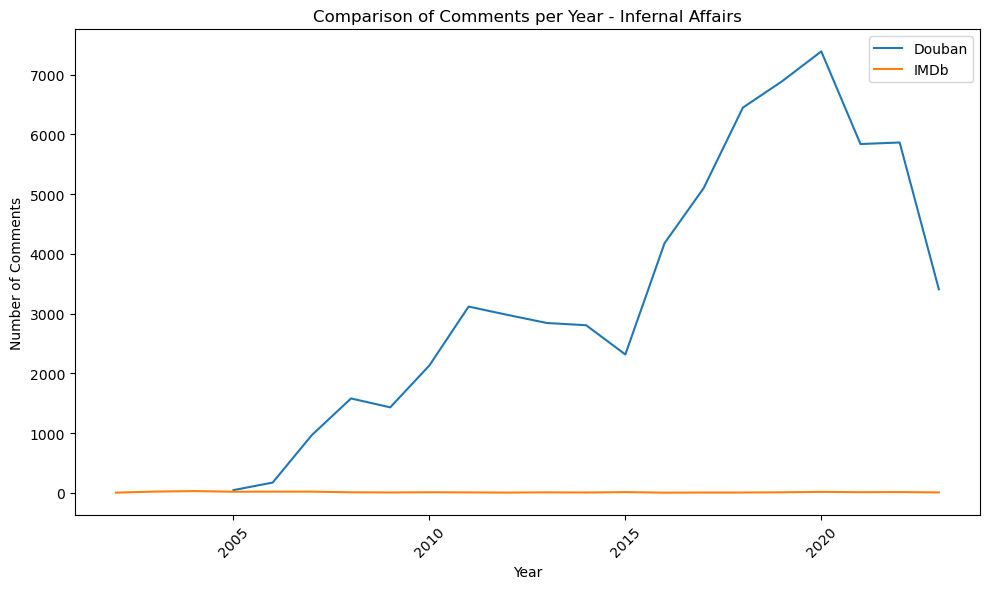

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the index into a column to make the years an ordinary column
Douban_InfernalAffairs_comments_per_year = Douban_InfernalAffairs_comments_per_year.reset_index()
IMDb_InfernalAffairs_comments_per_year = IMDb_InfernalAffairs_comments_per_year.reset_index()

# Show the data with a line plot
plt.figure(figsize=(10, 6))

sns.lineplot(data=Douban_InfernalAffairs_comments_per_year, x='year', y=0, label='Douban')
sns.lineplot(data=IMDb_InfernalAffairs_comments_per_year, x='Year', y=0, label='IMDb')

plt.xlabel('Year')
plt.ylabel('Number of Comments')
plt.title('Comparison of Comments per Year - Infernal Affairs')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

It can be observed that the comments on 'Infernal Affairs' on Douban show a gradually increasing trend, indicating sustained interest from the Chinese audience in this excellent work. The number of comments suddenly decreases after 2020, which could be due to a decline in audience interest in the movie. However, since Douban only randomly displays 60,000 out of 220,000 comments, this phenomenon might also be because the comments posted later were not showcased by Douban. Analyzing this data may require a comparative analysis with the changing trends in the number of comments for other movies.

The IMDb reviews of Infernal Affairs is far more less than Douban, so it's challenging to observe the trend in the comparison chart. Let's create a visualization for IMDb comments.

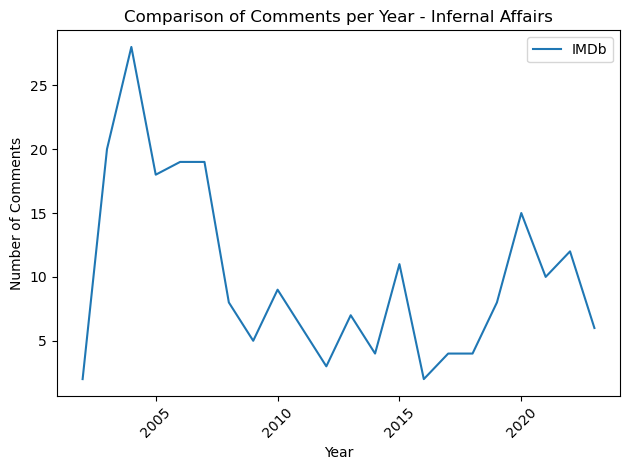

In [52]:
sns.lineplot(data=IMDb_InfernalAffairs_comments_per_year, x='Year', y=0, label='IMDb')

plt.xlabel('Year')
plt.ylabel('Number of Comments')
plt.title('Comparison of Comments per Year - Infernal Affairs')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The chart above shows that the number of comments for 'Infernal Affairs' peaked in its second year of release and rapidly declined afterward. This could be because, as a Chinese film, 'Infernal Affairs' did not have a large-scale theatrical release in the English-speaking market, and many English-speaking viewers watched the film through online channels. The fluctuation in comment numbers aligns with the general trend of changes in movie comment numbers. In the following decades, although there were fluctuations in comment numbers, the small sample size prevents us from drawing conclusions about changes in market attention.

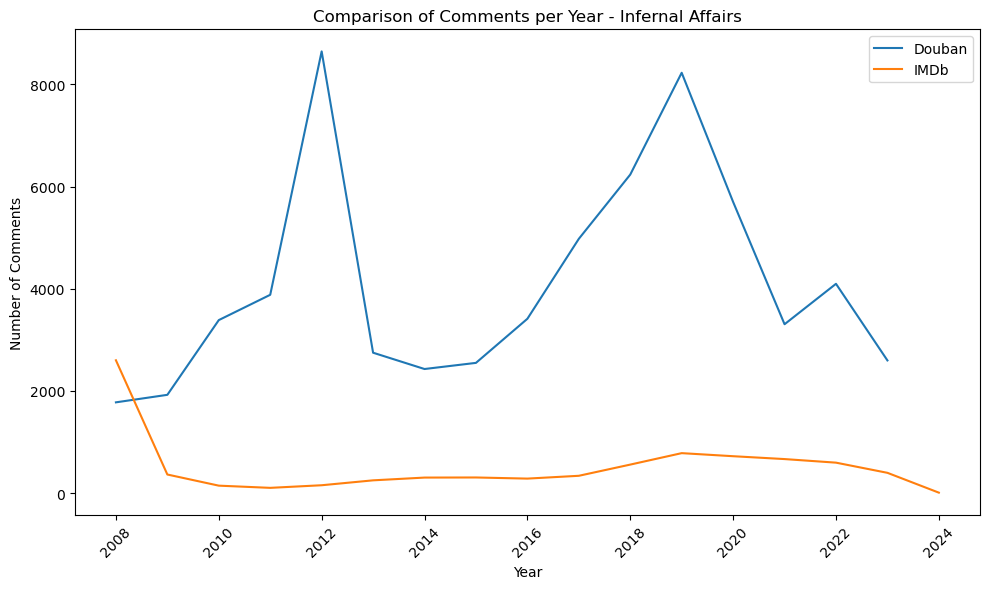

In [29]:
#Try to do the same on the comments data for The Dark Knight

Douban_TheDarkKnight_df = pd.read_csv('The_Dark_Knight.csv')
column_names = ['name', 'ip_location', 'comment', 'rating', 'create_time', 'vote_count']
Douban_TheDarkKnight_df.columns = column_names

Douban_TheDarkKnight_df['create_time'] = pd.to_datetime(Douban_TheDarkKnight_df ['create_time'])

Douban_TheDarkKnight_sorted = Douban_TheDarkKnight_df.sort_values(by='create_time')

Douban_TheDarkKnight_sorted['year'] = Douban_TheDarkKnight_sorted['create_time'].dt.year

Douban_TheDarkKnight_comments_per_year = Douban_TheDarkKnight_sorted.groupby('year').size()

IMDb_thedarkknight_df = pd.read_csv('IMDb_thedarkknight_reviews.csv')
IMDb_thedarkknight_df['Date'] = pd.to_datetime(IMDb_thedarkknight_df ['Date'])

IMDb_thedarkknight_sorted = IMDb_thedarkknight_df.sort_values(by='Date')
IMDb_thedarkknight_sorted['year'] = IMDb_thedarkknight_sorted['Date'].dt.year

IMDb_thedarkknight_comments_per_year = IMDb_thedarkknight_sorted.groupby('year').size()

Douban_TheDarkKnight_comments_per_year = Douban_TheDarkKnight_comments_per_year.reset_index()
IMDb_thedarkknight_comments_per_year = IMDb_thedarkknight_comments_per_year.reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(data=Douban_TheDarkKnight_comments_per_year, x='year', y=0, label='Douban')
sns.lineplot(data=IMDb_thedarkknight_comments_per_year, x='year', y=0, label='IMDb')

plt.xlabel('Year')
plt.ylabel('Number of Comments')
plt.title('Comparison of Comments per Year - Infernal Affairs')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The chart above illustrates the number of reviews received by the movie "The Dark Knight" on the IMDb platform each year. Some trends and changes can be observed from the data: the movie garnered significant attention when it was first released or in the initial period, leading to a high number of reviews in 2008. Over the following years, there were fluctuations in the review count, but the overall trend was a gradual decrease. From 2012 to 2017, the review count remained relatively stable with minor fluctuations. In 2018, there was a slight increase in reviews, possibly associated with the re-shooting or release of a new version of the Batman movie. The film production company may have introduced a new Batman movie in that year, attracting audience attention and discussions, resulting in an increase in the number of reviews. Events of this kind, especially those related to the reboot of popular series or major brands, often draw more viewers and reviews. 

As for the reviews of "The Dark Knight" on Douban, from 2009 to 2023, the review count showed significant fluctuations. Initially, there was a sharp increase in the number of reviews in the first few years after its release, reaching its peak in 2012. This trend aligns with what we observed in the change in the number of reviews for "Infernal Affairs" on the IMDb platform. It is speculated that "The Dark Knight" did not have a widespread theatrical release in China, and many viewers watched the movie online some time after its initial release. After 2012, the number of reviews gradually declined, indicating a diminishing interest from the audience in the movie. However, after 2015, the number of reviews began to rise again, reaching its peak in 2018. This may be related to the reshooting or release of a new version of Batman movies and associated IPs, such as the Joker movie. After the release of the new Batman version in 2018, the popularity of the movie gradually declined, manifested by a decrease in the number of reviews.

In conclusion, the variations in these review counts may be influenced by multiple factors, including the movie's release timing, audience reactions, the popularity of the movie content, reshooting, and the release of associated IP movies. Analyzing the underlying factors behind this data may require considering additional factors and contextual information.

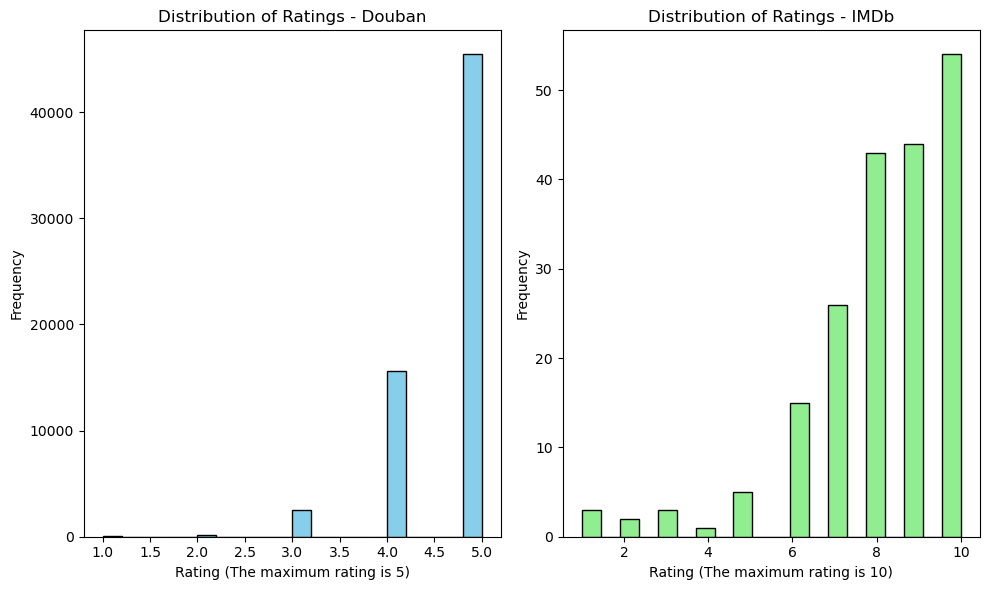

In [44]:
# Data distribution of the 'rating' column of the Infernal Affairs reviews
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(Douban_InfernalAffairs_sorted['rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating (The maximum rating is 5)')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings - Douban')

plt.subplot(1, 2, 2)
plt.hist(IMDb_InfernalAffairs_sorted['Rating'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Rating (The maximum rating is 10)')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings - IMDb')

plt.tight_layout()
plt.show()

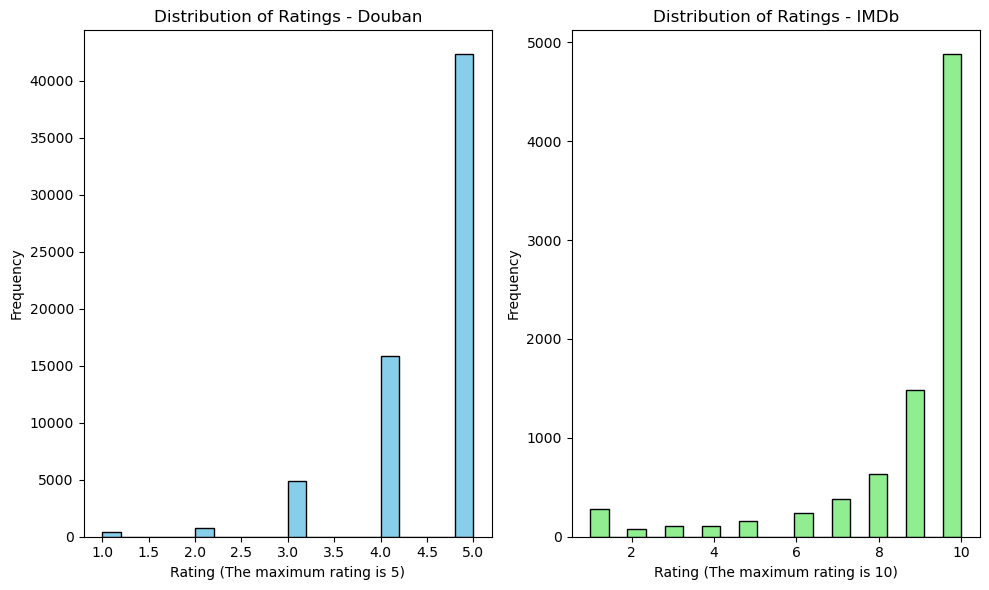

In [46]:
#Try to do the same about The Dark Knight
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(Douban_TheDarkKnight_sorted['rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating (The maximum rating is 5)')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings - Douban')

plt.subplot(1, 2, 2)
plt.hist(IMDb_thedarkknight_sorted['Rating'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Rating (The maximum rating is 10)')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings - IMDb')

plt.tight_layout()
plt.show()

From the charts, it can be observed that both two movies exhibit an asymmetric, skewed distribution of ratings on both Douban and IMDb (a half-bell shape). The majority of ratings are higher, gradually decreasing as the ratings decrease, and the lowest ratings are the least common. This reflects an overall positive evaluation from audiences, indicating a generally favorable reception of the film. Such a distribution pattern is often considered indicative of an excellent movie with high audience acclaim.

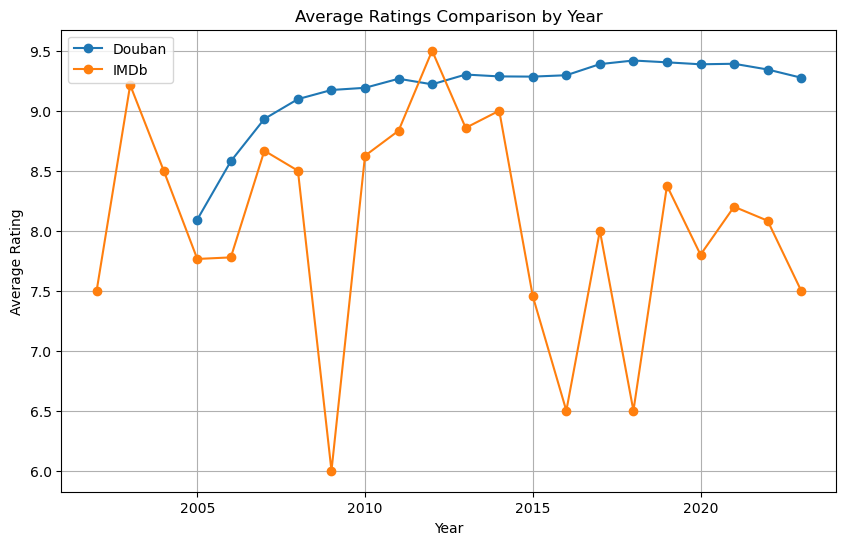

In [50]:
# Calculate the average rating each year 
# Given that Douban's max rating is 5, multiplying all ratings by 2 for better comparison between the two platforms
Douban_InfernalAffairs_sorted['rating'] *= 2

douban_avg_rating = Douban_InfernalAffairs_sorted.groupby('year')['rating'].mean()
fig, ax = plt.subplots(figsize=(10, 6))

douban_avg_rating.plot(kind='line', label='Douban', marker='o', ax=ax)
imdb_avg_rating.plot(kind='line', label='IMDb', marker='o', ax=ax)

plt.legend()
plt.title('Average Ratings Comparison by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)

plt.show()

The above chart shows that the average rating of the film "Infernal Affairs" on Douban has exhibited a relatively stable trend. Overall, with the gradual increase in years, the average rating on Douban has also gradually improved. This may indicate that the audience's evaluation of this film is generally positive, and over time, this positive trend has not significantly declined. In general, "Infernal Affairs" maintains a consistently high average rating on the Douban platform, reflecting the continuous recognition and fondness of the audience for the film. 

In contrast, the film's average rating on the IMDb platform fluctuates more, possibly due to a small sample size. A small number of low ratings could also be causing significant fluctuations in the annual average rating, making it challenging to interpret trends in audience reception on IMDb.

### 4. Data analyzing

Regarding the semantic analysis of comments, we chose to use the semantic analysis tool [Voyant](https://voyant-tools.org/). We organized the comments based on their publication time, writing each year's comments into separate txt files named after the publication year. After processing the files, we imported them into Voyant to observe the trends in themes and keywords in the comments over time.

In [20]:
years = Douban_InfernalAffairs_sorted['year'].unique()

# Write comments data for each year into corresponding TXT files
for year in years:
    # Select comments for a specific year
    comments_year = InfernalAffairs_df_sorted[InfernalAffairs_df_sorted['year'] == year]
    
    # Prepare the file name for writing
    file_name = f'comments_{year}.txt'
    
    # Write into TXT files
    with open(file_name, 'w', encoding='utf-8') as file:
        for index, row in comments_year.iterrows():
            comment_text = f" {row['comment']}, {row['year']}\n"
            file.write(comment_text)  # Write comment content, one comment per line

During the file import, there was a parsing error with the following error messages:

Caused by: java.io.IOException: Unable to parse document: FILE: comments_2021.txt

Caused by: java.io.IOException: (line 4980) invalid char between encapsulated token and delimiter

This issue might be due to unexpected characters or formats within certain comments. Try to exclude these comments from the file to fix the problem.

In [21]:
file_name = 'InfernalAffairs/comments_2021.txt'
line_number_to_delete = 4980

with open(file_name, 'r', encoding='utf-8') as file:
    lines = file.readlines()

with open(file_name, 'w', encoding='utf-8') as file:
    for index, line in enumerate(lines):
        if index != line_number_to_delete - 1:  # he index starts at 0, so we need to subtract 1.
            file.write(line)

In [22]:
#Continuing to exclude errors until all files can be uploaded correctly

file_name = 'InfernalAffairs/comments_2023.txt'
line_number_to_delete = 3788

with open(file_name, 'r', encoding='utf-8') as file:
    lines = file.readlines()

with open(file_name, 'w', encoding='utf-8') as file:
    for index, line in enumerate(lines):
        if index != line_number_to_delete - 1: 
            file.write(line)

In [34]:
#Try to do the same about The Dark Knight

years = TheDarkKnight_df_sorted['year'].unique()

for year in years:
    comments_year = TheDarkKnight_df_sorted[TheDarkKnight_df_sorted['year'] == year]
    file_name = f'comments_{year}.txt'

    with open(file_name, 'w', encoding='utf-8') as file:
        for index, row in comments_year.iterrows():
            comment_text = f" {row['comment']}, {row['year']}\n"
            file.write(comment_text) 

In [37]:
#Samething about the IMDb reviews

years = IMDb_InfernalAffairs_sorted['Year'].unique()

for year in years:
    review_year = IMDb_InfernalAffairs_sorted[IMDb_InfernalAffairs_sorted['Year'] == year]
    file_name = f'reviews_{year}.txt'
    
    with open(file_name, 'w', encoding='utf-8') as file:
        for index, row in review_year.iterrows():
            review_text = f" {row['Review']}, {row['Year']}\n"
            file.write(review_text) 

In [42]:
years = IMDb_thedarkknight_sorted['year'].unique()

for year in years:
    review_year = IMDb_thedarkknight_sorted[IMDb_thedarkknight_sorted['year'] == year]
    file_name = f'reviews_{year}.txt'
    
    with open(file_name, 'w', encoding='utf-8') as file:
        for index, row in review_year.iterrows():
            review_text = f" {row['Review']}, {row['year']}\n"
            file.write(review_text) 

The finding is published on our project [website](https://filmproject.my.canva.site/cd).

### 5. Active Learning Exercises

The functions `get_reviews` and `IMDbReviewsScraper` can be used to crawl reviews of any movies you're interested in from Douban and IMDb. You can choose another outstanding work with research-worthy value, parse the movie reviews, compare the number of comments with 'Infernal Affairs,' and try to interpret the reasons for the rapid decrease in comments for 'Infernal Affairs' after 2020.

In [ ]:
# Your code here

In the "Exploring the Data" section, we visualized the average ratings of the movie Infernal Affairs across both platforms. Could you try doing the same (or something more creative) for the movie "The Dark Knight"?

In [ ]:
# Your code here

Douban movie comments include a column called `vote_count`, which represents the number of users who found a particular comment 'useful'. Please try filtering out these useful comments, create a new DataFrame, and conduct preliminary semantic analysis on these comments.

English speakers can conduct similar research using the `Up Vote` (number of votes considered helpful) and `Total Vote` (total number of votes) columns in IMDb movie comments.

In [ ]:
# Your code here

Observing the four dataframes, what other visualization methods do you think can be used to present the trends in the comments for these two movies? Hint: Some ideas you can explore include rating distributions, their central tendencies, shapes, outliers, and correlations between variables.

In [ ]:
# Your code here

This dataset is suited for semantic analysis using Voyant, allowing you to observe the changing trends in movie comments over time. However, due to copyright restrictions, we cannot provide the entire corpus of all comments. Instead, we have provided some shuffled text sample of the reviews, which you can download from the project's GitHub repository. Please refer to the [Voyant guide documentation](https://voyant-tools.org/docs/#!/guide/about) for self-exploration.